In [3]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import random
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [4]:
np.random.seed(500)
Corpus = pd.read_csv(r"../input_data/smoking/labelled_smoking.csv",encoding='latin-1')
Corpus = Corpus.rename({'roken_report_content':'text', 'roken_answer_label': 'label'}, axis=1)
Corpus['text'] = Corpus['text'].str.replace('\t',' ')
Corpus.drop(['Unnamed: 0'], axis=1, inplace=True)
Corpus.drop_duplicates(inplace=True)
Corpus['text'] = Corpus['text'].astype(str)

In [5]:
# Preprocessing
stemmer = SnowballStemmer("dutch")
Corpus['text'] = Corpus['text'].str.lower()
Corpus['text'] = [stemmer.stem(text) for text in Corpus['text']]
Corpus = Corpus.drop(Corpus[Corpus.label == '--'].index)
Corpus_backup = Corpus.copy()

In [6]:
stopwords_filter = ['niet', 'niets', 'geen', 'zonder']
with open('../helping_files/stopwords.txt') as file:
    full_stopwords = [line.rstrip() for line in file]
    filtered_stopwords = [item for item in full_stopwords if item not in stopwords_filter]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

# Multinomial Naive Bayes

In [6]:
class_priors = [list(item) for item in list(np.random.dirichlet(np.ones(4), size=5))]
parameter_grid = {
                  'clf__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'clf__fit_prior': [True, False],
                  'clf__class_prior': random.sample(class_priors, k=len(class_priors)),
                  'tfidf__max_df': [0.90, 0.95],
                  'tfidf__min_df': [3, 5]
                 }

# Stopwords kept

In [21]:
# Ngram 1 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')

In [22]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.587 total time=  26.2s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.591 total time=  26.3s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.584 total time=  26.2s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.583 total time=  26.0s
[CV 5/5] END clf__alpha=0.001, clf__class_prior

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.3029443662813352, 0.20959631376875956, 0.19929929572297936, 0.288160024226926], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.621 total time=  26.4s
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.3029443662813352, 0.20959631376875956, 0.19929929572297936, 0.288160024226926], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.623 total time=  26.1s
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.3029443662813352, 0.20959631376875956, 0.19929929572297936, 0.288160024226926], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.625 total time=  26.0s
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.5910853053215394, 0.10152525499173638, 0.15732363302300553, 0.15006580666371871], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.634 total time=  26.0s
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.5910853053215394, 0.10152525499173638, 0.15732363302300553, 0.15

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(token_pattern='(?u)\\b\\w\\w+\\b|\\+|\\-')),
                                             ('clf', MultinomialNB())]),
                   param_distributions={'clf__alpha': [1e-05, 0.0001, 0.001,
                                                       0.01, 0.1, 1, 10, 100],
                                        'clf__class_prior': [[0.5910853053215394,
                                                              0.10152525499173638,
                                                              0.15732363302300553,
                                                              0.15006580666371871],
                                                             [0.03327220400161926,
                                                              0.4115586962924...
                                                             [0.634117786436885,
                                                              0.12339567693779889,
                                                              0.032288419060577986,
                                                              0.21019811756473808],
                                                             [0.3029443662813352,
                                                              0.20959631376875956,
                                                              0.19929929572297936,
                                                              0.288160024226926],
                                                             [0.39607021606117854,
                                                              0.042908040839019675,
                                                              0.516872920824081,
                                                              0.04414882227572077]],
                                        'clf__fit_prior': [True, False],
                                        'tfidf__max_df': [0.9, 0.95],
                                        'tfidf__min_df': [3, 5]},
                   random_state=500, scoring='f1_macro', verbose=3)

0.7452779458224105


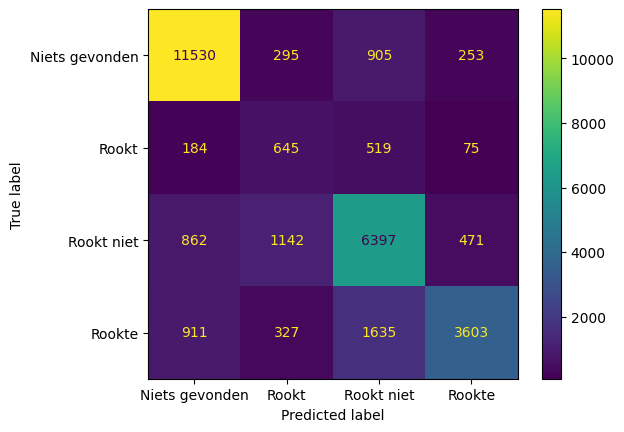

                precision    recall  f1-score   support

Niets gevonden       0.85      0.89      0.87     12983
         Rookt       0.27      0.45      0.34      1423
    Rookt niet       0.68      0.72      0.70      8872
        Rookte       0.82      0.56      0.66      6476

      accuracy                           0.75     29754
     macro avg       0.65      0.65      0.64     29754
  weighted avg       0.77      0.75      0.75     29754



In [23]:
random_search.fit(X_train, y_train)  predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.674 total time= 1.2min
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.674 total time= 1.2min
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.662 total time= 1.2min
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.634117786436885, 0.12339567693779889, 0.032288419060577986, 0.21019811756473808], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.672 total time= 1.2min
[CV 5/5] END clf__alpha=0.001, clf__class_prior

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.3029443662813352, 0.20959631376875956, 0.19929929572297936, 0.288160024226926], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.642 total time= 1.1min
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.3029443662813352, 0.20959631376875956, 0.19929929572297936, 0.288160024226926], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.640 total time= 1.1min
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.3029443662813352, 0.20959631376875956, 0.19929929572297936, 0.288160024226926], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.645 total time= 1.1min
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.5910853053215394, 0.10152525499173638, 0.15732363302300553, 0.15006580666371871], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.649 total time= 1.1min
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.5910853053215394, 0.10152525499173638, 0.15732363302300553, 0.15

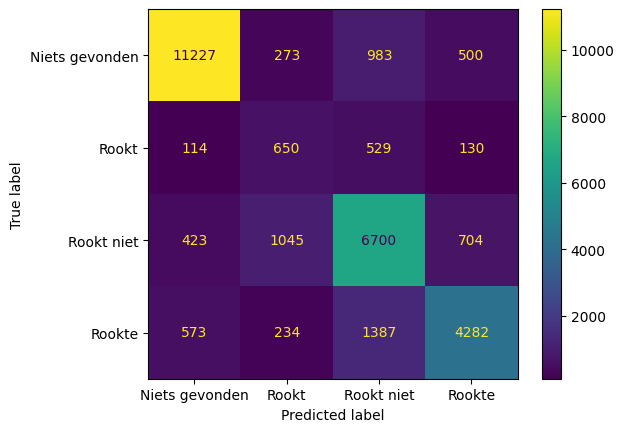

                precision    recall  f1-score   support

Niets gevonden       0.91      0.86      0.89     12983
         Rookt       0.30      0.46      0.36      1423
    Rookt niet       0.70      0.76      0.73      8872
        Rookte       0.76      0.66      0.71      6476

      accuracy                           0.77     29754
     macro avg       0.67      0.68      0.67     29754
  weighted avg       0.79      0.77      0.77     29754



In [27]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.667 total time= 2.2min
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.667 total time= 2.1min
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.664 total time= 2.1min
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.666 total time= 2.1min
[CV 5/5] END clf__alpha=0.001, clf__class_p

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.637 total time= 2.0min
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.632 total time= 2.0min
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.636 total time= 2.0min
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.645 total time= 2.0min
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 

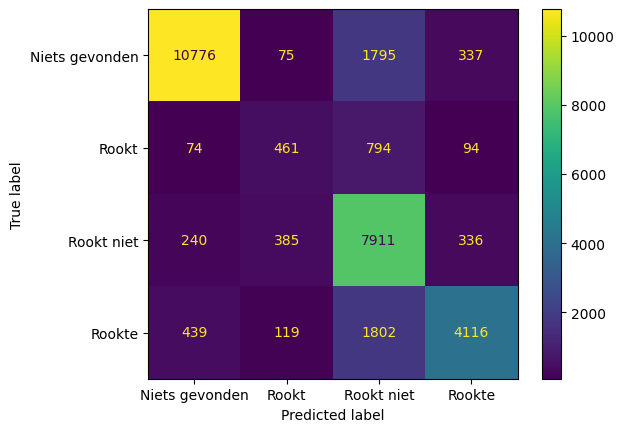

                precision    recall  f1-score   support

Niets gevonden       0.93      0.83      0.88     12983
         Rookt       0.44      0.32      0.37      1423
    Rookt niet       0.64      0.89      0.75      8872
        Rookte       0.84      0.64      0.72      6476

      accuracy                           0.78     29754
     macro avg       0.72      0.67      0.68     29754
  weighted avg       0.80      0.78      0.78     29754



In [10]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, n_jobs=1, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Only negation stopwords kept

In [7]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.601 total time=  22.0s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.597 total time=  22.0s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.592 total time=  22.2s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.589 total time=  22.1s
[CV 5/5] END clf__alpha=0.001, clf__class_p

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.585 total time=  22.3s
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.575 total time=  22.7s
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.590 total time=  22.3s
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.597 total time=  22.7s
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 

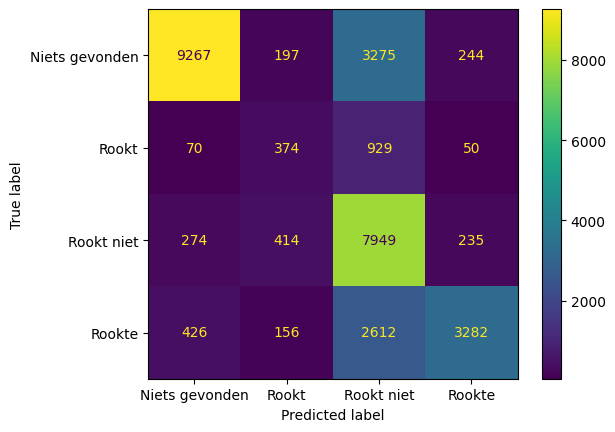

                precision    recall  f1-score   support

Niets gevonden       0.92      0.71      0.81     12983
         Rookt       0.33      0.26      0.29      1423
    Rookt niet       0.54      0.90      0.67      8872
        Rookte       0.86      0.51      0.64      6476

      accuracy                           0.70     29754
     macro avg       0.66      0.59      0.60     29754
  weighted avg       0.77      0.70      0.70     29754



In [14]:
# Ngram 1 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.644 total time= 1.2min
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.642 total time= 1.2min
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.639 total time= 1.2min
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.643 total time= 1.2min
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.633 total time= 1.1min
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.631 total time= 1.1min
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.637 total time= 1.1min
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.618 total time= 1.1min
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.

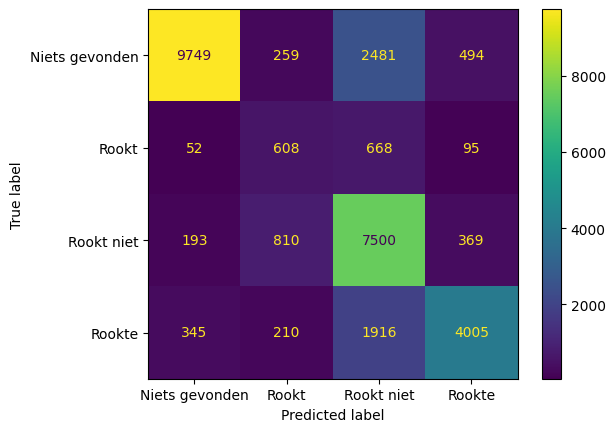

                precision    recall  f1-score   support

Niets gevonden       0.94      0.75      0.84     12983
         Rookt       0.32      0.43      0.37      1423
    Rookt niet       0.60      0.85      0.70      8872
        Rookte       0.81      0.62      0.70      6476

      accuracy                           0.73     29754
     macro avg       0.67      0.66      0.65     29754
  weighted avg       0.78      0.73      0.74     29754



In [7]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.662 total time= 2.0min
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.664 total time= 2.1min
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.663 total time= 2.1min
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.05300348508383515, 0.2969017449764657, 0.4095497161807587, 0.24054505375894056], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.663 total time= 2.0min
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.652 total time= 2.0min
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.653 total time= 2.0min
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.655 total time= 1.9min
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.25887029356871516], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.639 total time= 2.0min
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.3738786384783014, 0.020130983615885154, 0.34712008433709834, 0.

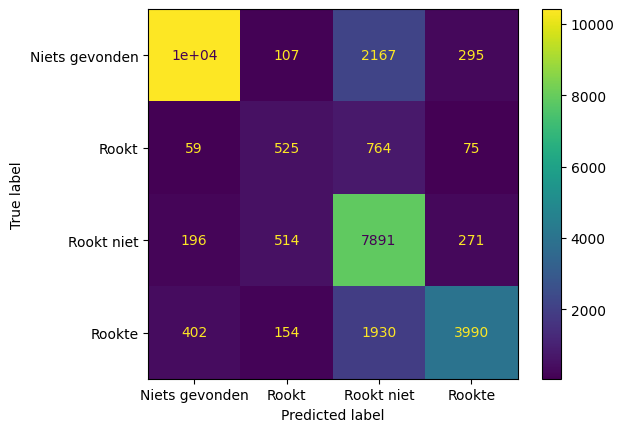

                precision    recall  f1-score   support

Niets gevonden       0.94      0.80      0.87     12983
         Rookt       0.40      0.37      0.39      1423
    Rookt niet       0.62      0.89      0.73      8872
        Rookte       0.86      0.62      0.72      6476

      accuracy                           0.77     29754
     macro avg       0.71      0.67      0.67     29754
  weighted avg       0.80      0.77      0.77     29754



In [8]:
# Ngram 3 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# No stopwords

In [8]:
Corpus["text"] = Corpus["text"].apply(no_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.596 total time=  21.6s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.594 total time=  22.0s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.598 total time=  22.2s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.587 total time=  22.2s
[CV 5/5] END clf__alpha=0.001, clf__class_prior

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.598 total time=  22.2s
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.593 total time=  22.2s
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.596 total time=  22.1s
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.602 total time=  22.2s
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.63

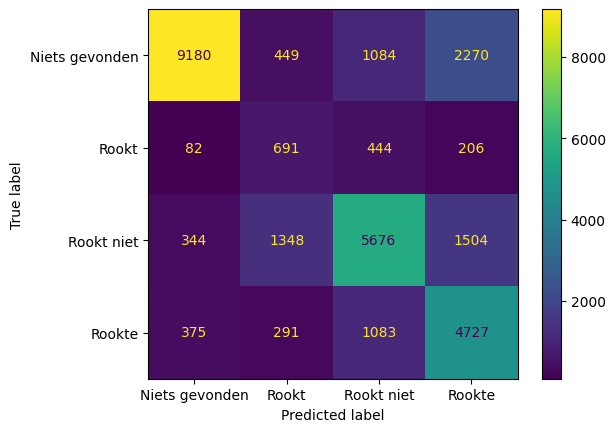

                precision    recall  f1-score   support

Niets gevonden       0.92      0.71      0.80     12983
         Rookt       0.25      0.49      0.33      1423
    Rookt niet       0.68      0.64      0.66      8872
        Rookte       0.54      0.73      0.62      6476

      accuracy                           0.68     29754
     macro avg       0.60      0.64      0.60     29754
  weighted avg       0.74      0.68      0.70     29754



In [9]:
# Ngram 1 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.642 total time=  58.6s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.640 total time=  58.3s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.638 total time=  58.0s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.645 total time=  57.9s
[CV 5/5] END clf__alpha=0.001, clf__class_prior

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.622 total time=  55.6s
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.617 total time=  55.8s
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.620 total time=  56.5s
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.641 total time=  55.7s
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.63

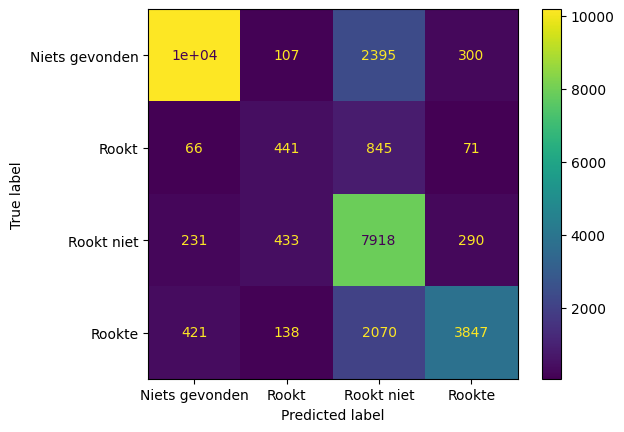

                precision    recall  f1-score   support

Niets gevonden       0.93      0.78      0.85     12983
         Rookt       0.39      0.31      0.35      1423
    Rookt niet       0.60      0.89      0.72      8872
        Rookte       0.85      0.59      0.70      6476

      accuracy                           0.75     29754
     macro avg       0.70      0.65      0.65     29754
  weighted avg       0.79      0.75      0.75     29754



In [10]:
# Ngram 2 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.667 total time= 1.7min
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.670 total time= 1.7min
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.666 total time= 1.7min
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.15227229017703153, 0.07903007093470556, 0.6166203958540405, 0.15207724303422238], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.669 total time= 1.7min
[CV 5/5] END clf__alpha=0.001, clf__class_prior

[CV 3/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.652 total time= 1.6min
[CV 4/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.650 total time= 1.6min
[CV 5/5] END clf__alpha=1e-05, clf__class_prior=[0.12432915828422013, 0.1350301421619665, 0.5640823992655132, 0.17655830028830027], clf__fit_prior=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.651 total time= 1.7min
[CV 1/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.6333912336630585], clf__fit_prior=True, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.667 total time= 1.7min
[CV 2/5] END clf__alpha=1e-05, clf__class_prior=[0.0976385460560514, 0.11521947675609655, 0.1537507435247936, 0.63

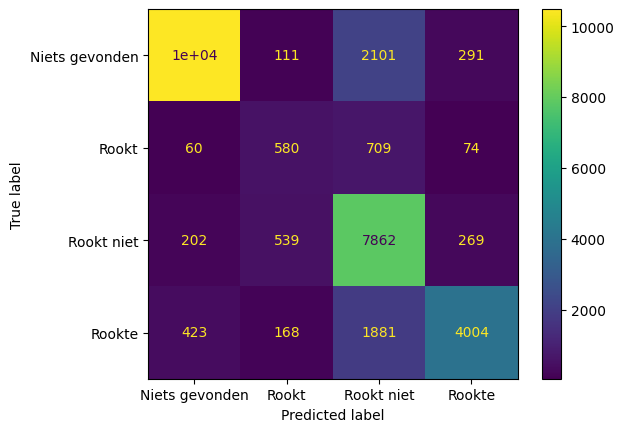

                precision    recall  f1-score   support

Niets gevonden       0.94      0.81      0.87     12983
         Rookt       0.41      0.41      0.41      1423
    Rookt niet       0.63      0.89      0.73      8872
        Rookte       0.86      0.62      0.72      6476

      accuracy                           0.77     29754
     macro avg       0.71      0.68      0.68     29754
  weighted avg       0.80      0.77      0.77     29754



In [11]:
# Ngram 3 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Stochastic Gradient Descent

In [7]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [8]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

# Stopwords kept

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.48, NNZs: 295, Bias: 0.000000, T: 71408, Avg. loss: 0.228434
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 157.54, NNZs: 190, Bias: 0.000000, T: 142816, Avg. loss: 0.170428
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 189.86, NNZs: 148, Bias: 0.000000, T: 214224, Avg. loss: 0.153310
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 216.40, NNZs: 133, Bias: 0.000000, T: 285632, Avg. loss: 0.144640
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 239.17, NNZs: 120, Bias: 0.000000, T: 357040, Avg. loss: 0.138498
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 259.26, NNZs: 118, Bias: 0.000000, T: 428448, Avg. loss: 0.134426
Total training time: 1.13 seconds.
-- Epoch 7
Norm: 262.79, NNZs: 118, Bias: 0.000000, T: 499856, Avg. loss: 0.132193
Total training time: 1.31 seconds.
-- Epoch 8
Norm: 266.25, NNZs: 118, Bias: 0.000000, T: 571264, Avg. loss: 0.131552
Total training time: 1.50 seconds.
-- Epoch 9
Norm: 269.65, NNZs: 118, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


Norm: 71.54, NNZs: 151, Bias: 0.000000, T: 71408, Avg. loss: 0.171940
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 96.70, NNZs: 116, Bias: 0.000000, T: 142816, Avg. loss: 0.161556
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 116.08, NNZs: 102, Bias: 0.000000, T: 214224, Avg. loss: 0.159950
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 132.79, NNZs: 97, Bias: 0.000000, T: 285632, Avg. loss: 0.159504
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 147.47, NNZs: 90, Bias: 0.000000, T: 357040, Avg. loss: 0.158491
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 160.87, NNZs: 91, Bias: 0.000000, T: 428448, Avg. loss: 0.158352
Total training time: 1.08 seconds.
-- Epoch 7
Norm: 162.79, NNZs: 91, Bias: 0.000000, T: 499856, Avg. loss: 0.157007
Total training time: 1.27 seconds.
-- Epoch 8
Norm: 164.80, NNZs: 93, Bias: 0.000000, T: 571264, Avg. loss: 0.157038
Total training time: 1.45 seconds.
-- Epoch 9
Norm: 166.72, NNZs: 93, Bias: 0.000000, T: 642672, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


-- Epoch 1
Norm: 107.57, NNZs: 322, Bias: 0.000000, T: 71408, Avg. loss: 0.357793
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 149.97, NNZs: 228, Bias: 0.000000, T: 142816, Avg. loss: 0.313278
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 180.98, NNZs: 202, Bias: 0.000000, T: 214224, Avg. loss: 0.303771
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 206.78, NNZs: 190, Bias: 0.000000, T: 285632, Avg. loss: 0.298383
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 229.52, NNZs: 189, Bias: 0.000000, T: 357040, Avg. loss: 0.296175
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 249.91, NNZs: 190, Bias: 0.000000, T: 428448, Avg. loss: 0.293897
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 252.95, NNZs: 190, Bias: 0.000000, T: 499856, Avg. loss: 0.290695
Total training time: 1.31 seconds.
-- Epoch 8
Norm: 256.01, NNZs: 193, Bias: 0.000000, T: 571264, Avg. loss: 0.290798
Total training time: 1.50 seconds.
-- Epoch 9
Norm: 259.02, NNZs: 193, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time=  40.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.46, NNZs: 285, Bias: 0.000000, T: 71408, Avg. loss: 0.226168
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 157.37, NNZs: 195, Bias: 0.000000, T: 142816, Avg. loss: 0.167458
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 189.90, NNZs: 154, Bias: 0.000000, T: 214224, Avg. loss: 0.150674
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 216.50, NNZs: 138, Bias: 0.000000, T: 285632, Avg. loss: 0.141392
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 239.36, NNZs: 129, Bias: 0.000000, T: 357040, Avg. loss: 0.135330
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 259.57, NNZs: 120, Bias: 0.000000, T: 428448, Avg. loss: 0.130975
Total training time: 1.15 seconds.
-- Epoch 7
Norm: 263.08, NNZs: 118, Bias: 0.000000, T: 499856, Avg. loss: 0.128588
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 266.56, NNZs: 117, Bias: 0.000000, T: 571264, Avg. loss: 0.127998
Total training time: 1.53 seconds.
-- Epoch 9
Norm: 269.98, NNZs: 115, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


-- Epoch 1
Norm: 71.47, NNZs: 154, Bias: 0.000000, T: 71408, Avg. loss: 0.172584
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 96.26, NNZs: 113, Bias: 0.000000, T: 142816, Avg. loss: 0.162000
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 115.79, NNZs: 99, Bias: 0.000000, T: 214224, Avg. loss: 0.160498
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 132.39, NNZs: 94, Bias: 0.000000, T: 285632, Avg. loss: 0.159726
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 147.07, NNZs: 89, Bias: 0.000000, T: 357040, Avg. loss: 0.159118
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 160.53, NNZs: 89, Bias: 0.000000, T: 428448, Avg. loss: 0.158682
Total training time: 1.10 seconds.
-- Epoch 7
Norm: 162.44, NNZs: 90, Bias: 0.000000, T: 499856, Avg. loss: 0.157367
Total training time: 1.29 seconds.
-- Epoch 8
Norm: 164.39, NNZs: 90, Bias: 0.000000, T: 571264, Avg. loss: 0.157388
Total training time: 1.47 seconds.
-- Epoch 9
Norm: 166.30, NNZs: 90, Bias: 0.000000, T: 642672, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


-- Epoch 1
Norm: 107.39, NNZs: 298, Bias: 0.000000, T: 71408, Avg. loss: 0.356198
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 149.46, NNZs: 234, Bias: 0.000000, T: 142816, Avg. loss: 0.312141
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 180.66, NNZs: 208, Bias: 0.000000, T: 214224, Avg. loss: 0.302439
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 206.28, NNZs: 196, Bias: 0.000000, T: 285632, Avg. loss: 0.297479
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 228.84, NNZs: 183, Bias: 0.000000, T: 357040, Avg. loss: 0.295035
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 249.16, NNZs: 180, Bias: 0.000000, T: 428448, Avg. loss: 0.293094
Total training time: 1.16 seconds.
-- Epoch 7
Norm: 252.26, NNZs: 177, Bias: 0.000000, T: 499856, Avg. loss: 0.290370
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 255.29, NNZs: 177, Bias: 0.000000, T: 571264, Avg. loss: 0.289998
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 258.30, NNZs: 179, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time=  41.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.14, NNZs: 292, Bias: 0.000000, T: 71408, Avg. loss: 0.228208
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 157.18, NNZs: 193, Bias: 0.000000, T: 142816, Avg. loss: 0.169219
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 189.77, NNZs: 161, Bias: 0.000000, T: 214224, Avg. loss: 0.152287
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 216.52, NNZs: 144, Bias: 0.000000, T: 285632, Avg. loss: 0.143245
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 239.36, NNZs: 131, Bias: 0.000000, T: 357040, Avg. loss: 0.137329
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 259.63, NNZs: 123, Bias: 0.000000, T: 428448, Avg. loss: 0.133116
Total training time: 1.15 seconds.
-- Epoch 7
Norm: 263.17, NNZs: 122, Bias: 0.000000, T: 499856, Avg. loss: 0.130775
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 266.65, NNZs: 122, Bias: 0.000000, T: 571264, Avg. loss: 0.130168
Total training time: 1.53 seconds.
-- Epoch 9
Norm: 270.07, NNZs: 120, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


-- Epoch 1
Norm: 71.12, NNZs: 149, Bias: 0.000000, T: 71408, Avg. loss: 0.173135
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 96.57, NNZs: 114, Bias: 0.000000, T: 142816, Avg. loss: 0.162890
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 116.06, NNZs: 97, Bias: 0.000000, T: 214224, Avg. loss: 0.160755
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 132.69, NNZs: 96, Bias: 0.000000, T: 285632, Avg. loss: 0.160476
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 147.38, NNZs: 89, Bias: 0.000000, T: 357040, Avg. loss: 0.159326
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 160.89, NNZs: 92, Bias: 0.000000, T: 428448, Avg. loss: 0.159501
Total training time: 1.10 seconds.
-- Epoch 7
Norm: 162.88, NNZs: 91, Bias: 0.000000, T: 499856, Avg. loss: 0.157862
Total training time: 1.28 seconds.
-- Epoch 8
Norm: 164.83, NNZs: 92, Bias: 0.000000, T: 571264, Avg. loss: 0.157940
Total training time: 1.46 seconds.
-- Epoch 9
Norm: 166.80, NNZs: 91, Bias: 0.000000, T: 642672, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


-- Epoch 1
Norm: 107.96, NNZs: 318, Bias: 0.000000, T: 71408, Avg. loss: 0.356122
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 150.32, NNZs: 232, Bias: 0.000000, T: 142816, Avg. loss: 0.312106
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 181.48, NNZs: 205, Bias: 0.000000, T: 214224, Avg. loss: 0.302013
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 207.38, NNZs: 198, Bias: 0.000000, T: 285632, Avg. loss: 0.297346
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 230.08, NNZs: 190, Bias: 0.000000, T: 357040, Avg. loss: 0.294243
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 250.55, NNZs: 190, Bias: 0.000000, T: 428448, Avg. loss: 0.292618
Total training time: 1.15 seconds.
-- Epoch 7
Norm: 253.65, NNZs: 190, Bias: 0.000000, T: 499856, Avg. loss: 0.289603
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 256.74, NNZs: 191, Bias: 0.000000, T: 571264, Avg. loss: 0.289372
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 259.78, NNZs: 192, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.086 total time=  41.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112.69, NNZs: 289, Bias: 0.000000, T: 71408, Avg. loss: 0.227675
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 156.62, NNZs: 193, Bias: 0.000000, T: 142816, Avg. loss: 0.169517
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 189.01, NNZs: 161, Bias: 0.000000, T: 214224, Avg. loss: 0.152910
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 215.59, NNZs: 141, Bias: 0.000000, T: 285632, Avg. loss: 0.143862
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 238.48, NNZs: 126, Bias: 0.000000, T: 357040, Avg. loss: 0.138035
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 258.64, NNZs: 120, Bias: 0.000000, T: 428448, Avg. loss: 0.133731
Total training time: 1.19 seconds.
-- Epoch 7
Norm: 262.14, NNZs: 119, Bias: 0.000000, T: 499856, Avg. loss: 0.131090
Total training time: 1.38 seconds.
-- Epoch 8
Norm: 265.60, NNZs: 120, Bias: 0.000000, T: 571264, Avg. loss: 0.130614
Total training time: 1.58 seconds.
-- Epoch 9
Norm: 268.99, NNZs: 120, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


Norm: 71.73, NNZs: 148, Bias: 0.000000, T: 71408, Avg. loss: 0.171991
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 96.89, NNZs: 116, Bias: 0.000000, T: 142816, Avg. loss: 0.161586
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 116.67, NNZs: 104, Bias: 0.000000, T: 214224, Avg. loss: 0.159767
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 133.30, NNZs: 99, Bias: 0.000000, T: 285632, Avg. loss: 0.159101
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 148.00, NNZs: 93, Bias: 0.000000, T: 357040, Avg. loss: 0.158461
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 161.34, NNZs: 91, Bias: 0.000000, T: 428448, Avg. loss: 0.158021
Total training time: 1.15 seconds.
-- Epoch 7
Norm: 163.36, NNZs: 91, Bias: 0.000000, T: 499856, Avg. loss: 0.157022
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 165.38, NNZs: 91, Bias: 0.000000, T: 571264, Avg. loss: 0.156773
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 167.34, NNZs: 91, Bias: 0.000000, T: 642672, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


Norm: 107.96, NNZs: 315, Bias: 0.000000, T: 71408, Avg. loss: 0.357030
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 150.44, NNZs: 236, Bias: 0.000000, T: 142816, Avg. loss: 0.312789
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 181.60, NNZs: 210, Bias: 0.000000, T: 214224, Avg. loss: 0.302583
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 207.31, NNZs: 197, Bias: 0.000000, T: 285632, Avg. loss: 0.298006
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 230.01, NNZs: 188, Bias: 0.000000, T: 357040, Avg. loss: 0.294705
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 250.44, NNZs: 185, Bias: 0.000000, T: 428448, Avg. loss: 0.293144
Total training time: 1.16 seconds.
-- Epoch 7
Norm: 253.55, NNZs: 189, Bias: 0.000000, T: 499856, Avg. loss: 0.289821
Total training time: 1.36 seconds.
-- Epoch 8
Norm: 256.63, NNZs: 189, Bias: 0.000000, T: 571264, Avg. loss: 0.289697
Total training time: 1.55 seconds.
-- Epoch 9
Norm: 259.65, NNZs: 188, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time=  42.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.14, NNZs: 280, Bias: 0.000000, T: 71409, Avg. loss: 0.227554
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 157.03, NNZs: 190, Bias: 0.000000, T: 142818, Avg. loss: 0.168918
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 189.58, NNZs: 159, Bias: 0.000000, T: 214227, Avg. loss: 0.152199
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 216.17, NNZs: 135, Bias: 0.000000, T: 285636, Avg. loss: 0.143058
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 239.00, NNZs: 125, Bias: 0.000000, T: 357045, Avg. loss: 0.136942
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 259.20, NNZs: 122, Bias: 0.000000, T: 428454, Avg. loss: 0.132656
Total training time: 1.14 seconds.
-- Epoch 7
Norm: 262.72, NNZs: 121, Bias: 0.000000, T: 499863, Avg. loss: 0.130084
Total training time: 1.33 seconds.
-- Epoch 8
Norm: 266.19, NNZs: 121, Bias: 0.000000, T: 571272, Avg. loss: 0.129588
Total training time: 1.52 seconds.
-- Epoch 9
Norm: 269.60, NNZs: 117, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


Norm: 71.57, NNZs: 149, Bias: 0.000000, T: 71409, Avg. loss: 0.172282
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 96.44, NNZs: 114, Bias: 0.000000, T: 142818, Avg. loss: 0.161905
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 115.83, NNZs: 99, Bias: 0.000000, T: 214227, Avg. loss: 0.160594
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 132.37, NNZs: 91, Bias: 0.000000, T: 285636, Avg. loss: 0.159584
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 146.99, NNZs: 91, Bias: 0.000000, T: 357045, Avg. loss: 0.159056
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 160.27, NNZs: 89, Bias: 0.000000, T: 428454, Avg. loss: 0.158986
Total training time: 1.11 seconds.
-- Epoch 7
Norm: 162.34, NNZs: 90, Bias: 0.000000, T: 499863, Avg. loss: 0.157688
Total training time: 1.29 seconds.
-- Epoch 8
Norm: 164.29, NNZs: 90, Bias: 0.000000, T: 571272, Avg. loss: 0.157583
Total training time: 1.48 seconds.
-- Epoch 9
Norm: 166.28, NNZs: 90, Bias: 0.000000, T: 642681, Avg. loss: 0.1

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


-- Epoch 1
Norm: 107.55, NNZs: 302, Bias: 0.000000, T: 71409, Avg. loss: 0.357034
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 149.40, NNZs: 232, Bias: 0.000000, T: 142818, Avg. loss: 0.313399
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 180.45, NNZs: 209, Bias: 0.000000, T: 214227, Avg. loss: 0.304069
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 206.27, NNZs: 200, Bias: 0.000000, T: 285636, Avg. loss: 0.299413
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 228.71, NNZs: 193, Bias: 0.000000, T: 357045, Avg. loss: 0.296651
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 249.03, NNZs: 187, Bias: 0.000000, T: 428454, Avg. loss: 0.294479
Total training time: 1.13 seconds.
-- Epoch 7
Norm: 252.10, NNZs: 190, Bias: 0.000000, T: 499863, Avg. loss: 0.291411
Total training time: 1.33 seconds.
-- Epoch 8
Norm: 255.13, NNZs: 188, Bias: 0.000000, T: 571272, Avg. loss: 0.291155
Total training time: 1.52 seconds.
-- Epoch 9
Norm: 258.15, NNZs: 189, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.091 total time=  41.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 98524221229501.25, NNZs: 59057, Bias: 0.000000, T: 71408, Avg. loss: 389970800950344421474304.000000
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 89522249634823.78, NNZs: 59057, Bias: 0.000000, T: 142816, Avg. loss: 93070192976449383694336.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 85247882335845.44, NNZs: 59057, Bias: 0.000000, T: 214224, Avg. loss: 66649759739244623953920.000000
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 82549052887223.02, NNZs: 59057, Bias: 0.000000, T: 285632, Avg. loss: 55674955871603732250624.000000
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 80620781222817.19, NNZs: 59057, Bias: 0.000000, T: 357040, Avg. loss: 49220496318622532108288.000000
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 79135330348037.39, NNZs: 59057, Bias: 0.000000, T: 428448, Avg. loss: 45015037799349270609920.000000
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 99617893132149.14, NNZs: 59057, Bias: 0.000000, T: 71408, Avg. loss: 391168084599645598121984.000000
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 90487703607980.06, NNZs: 59057, Bias: 0.000000, T: 142816, Avg. loss: 95584044375738140327936.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 86156872773896.52, NNZs: 59057, Bias: 0.000000, T: 214224, Avg. loss: 68465813867522340945920.000000
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 83420717919491.23, NNZs: 59057, Bias: 0.000000, T: 285632, Avg. loss: 57135967544592287399936.000000
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 81462693557592.28, NNZs: 59057, Bias: 0.000000, T: 357040, Avg. loss: 50542387825114756415488.000000
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 79958301419816.38, NNZs: 59057, Bias: 0.000000, T: 428448, Avg. loss: 46144708516287600394240.000000
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 97948536771075.59, NNZs: 59057, Bias: 0.000000, T: 71408, Avg. loss: 390502618254283118739456.000000
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 88717844987855.75, NNZs: 59057, Bias: 0.000000, T: 142816, Avg. loss: 92684293682487367827456.000000
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 84349765609386.25, NNZs: 59057, Bias: 0.000000, T: 214224, Avg. loss: 65882030745996327124992.000000
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 81599414991177.48, NNZs: 59057, Bias: 0.000000, T: 285632, Avg. loss: 54628529576295243186176.000000
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 79632227881666.47, NNZs: 59057, Bias: 0.000000, T: 357040, Avg. loss: 48206859347777309114368.000000
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 78121476486928.39, NNZs: 59057, Bias: 0.000000, T: 428448, Avg. loss: 43899048380957865279488.000000
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1
Norm: 96840212331040.05, NNZs: 59057,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.227 total time=  31.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 94109391849110.11, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 350567486466005728755712.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 85290495684910.47, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 84256257722845482713088.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 81097775237908.95, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 60057215158679068737536.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 78463795064372.52, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 49858134636344012439552.000000
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 76575769978195.69, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 44053067223857199316992.000000
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 75124497340168.17, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 40152858984052804288512.000000
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 95913601275129.50, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 355720238214281594667008.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 87035842492681.73, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 86791020367334791446528.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 82827463624070.70, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 61999996385793161560064.000000
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 80173852139991.50, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 51631529523484152561664.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 78274607488572.58, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 45627557953620339064832.000000
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 76813576156483.77, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 41676315716596898201600.000000
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 98355243148248.20, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 382777188702197708226560.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 89379058180171.95, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 91061984221580052398080.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 85124590714709.56, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 65179081244502264905728.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 82451857677910.48, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 54304327359405756514304.000000
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 80540736239451.41, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 48104731965802300833792.000000
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 79069319733988.52, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 43937163510114485796864.000000
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1
Norm: 94414991817203.62, NNZs: 59193,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.227 total time=  31.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 94029014848438.52, NNZs: 59419, Bias: 0.000000, T: 71408, Avg. loss: 350981342948801927708672.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 85325915370682.50, NNZs: 59419, Bias: 0.000000, T: 142816, Avg. loss: 82312345741933930348544.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 81206619386199.00, NNZs: 59419, Bias: 0.000000, T: 214224, Avg. loss: 58668567999313105387520.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 78609949152574.27, NNZs: 59419, Bias: 0.000000, T: 285632, Avg. loss: 48889632725773215334400.000000
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 76751401122917.61, NNZs: 59419, Bias: 0.000000, T: 357040, Avg. loss: 43235344214797188071424.000000
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 75322932731900.62, NNZs: 59419, Bias: 0.000000, T: 428448, Avg. loss: 39471066338717595598848.000000
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 97464528843840.64, NNZs: 59419, Bias: 0.000000, T: 71408, Avg. loss: 378803070225341613080576.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 88442166380115.77, NNZs: 59419, Bias: 0.000000, T: 142816, Avg. loss: 89656513477897577562112.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 84149422442516.73, NNZs: 59419, Bias: 0.000000, T: 214224, Avg. loss: 63898390833895825211392.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 81447188137976.56, NNZs: 59419, Bias: 0.000000, T: 285632, Avg. loss: 53149512298217684860928.000000
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 79513251216395.83, NNZs: 59419, Bias: 0.000000, T: 357040, Avg. loss: 46931210014103108059136.000000
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 78025020387671.47, NNZs: 59419, Bias: 0.000000, T: 428448, Avg. loss: 42810464965131027611648.000000
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 94238024728319.44, NNZs: 59419, Bias: 0.000000, T: 71408, Avg. loss: 351488452759381650440192.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 85411847445467.38, NNZs: 59419, Bias: 0.000000, T: 142816, Avg. loss: 83349414095671919640576.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 81245443458927.00, NNZs: 59419, Bias: 0.000000, T: 214224, Avg. loss: 59176093890350415872000.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 78616482154477.83, NNZs: 59419, Bias: 0.000000, T: 285632, Avg. loss: 49182829207914652106752.000000
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 76734724695348.81, NNZs: 59419, Bias: 0.000000, T: 357040, Avg. loss: 43440554206130650218496.000000
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 75288752655812.39, NNZs: 59419, Bias: 0.000000, T: 428448, Avg. loss: 39579447862909904879616.000000
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1
Norm: 96115783600542.23, NNZs: 59419,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.219 total time=  31.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 96557551312327.70, NNZs: 59236, Bias: 0.000000, T: 71408, Avg. loss: 367829038922086400131072.000000
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 87614960195865.58, NNZs: 59236, Bias: 0.000000, T: 142816, Avg. loss: 87413177828088922243072.000000
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 83360736962652.80, NNZs: 59236, Bias: 0.000000, T: 214224, Avg. loss: 62520585900517119492096.000000
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 80671617719968.36, NNZs: 59236, Bias: 0.000000, T: 285632, Avg. loss: 52126614180956446130176.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 78745181250481.70, NNZs: 59236, Bias: 0.000000, T: 357040, Avg. loss: 46080638478126459912192.000000
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 77262179351188.70, NNZs: 59236, Bias: 0.000000, T: 428448, Avg. loss: 42074721320646140231680.000000
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 96398767088635.69, NNZs: 59236, Bias: 0.000000, T: 71408, Avg. loss: 354677761124657486888960.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 87523154369736.64, NNZs: 59236, Bias: 0.000000, T: 142816, Avg. loss: 88086284300715863048192.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 83306416853909.83, NNZs: 59236, Bias: 0.000000, T: 214224, Avg. loss: 63044793355998481874944.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 80653656419693.77, NNZs: 59236, Bias: 0.000000, T: 285632, Avg. loss: 52553968189597655498752.000000
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 78753128758923.88, NNZs: 59236, Bias: 0.000000, T: 357040, Avg. loss: 46519198049381830885376.000000
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 77292823534003.69, NNZs: 59236, Bias: 0.000000, T: 428448, Avg. loss: 42491887231775933464576.000000
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 99684243944273.30, NNZs: 59236, Bias: 0.000000, T: 71408, Avg. loss: 393253157315745742323712.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 90427771571163.06, NNZs: 59236, Bias: 0.000000, T: 142816, Avg. loss: 96361272658679927144448.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 86052166117367.95, NNZs: 59236, Bias: 0.000000, T: 214224, Avg. loss: 68670463017844570324992.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 83301324601761.73, NNZs: 59236, Bias: 0.000000, T: 285632, Avg. loss: 57147212855152400662528.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 81331455683422.33, NNZs: 59236, Bias: 0.000000, T: 357040, Avg. loss: 50593721806292223262720.000000
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 79815856966742.62, NNZs: 59236, Bias: 0.000000, T: 428448, Avg. loss: 46166053372759067590656.000000
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 94813728132718.52, NNZs: 59236,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.223 total time=  31.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 99134426176148.38, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 391449274984046713110528.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 89970920903738.75, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 93707055200730364248064.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 85627812389488.42, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 66763067037838078902272.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 82891719783440.36, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 55534315321350246367232.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 80933056179414.58, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 49095774642972628353024.000000
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 79427717415806.06, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 44765105706947821174784.000000
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 95139983233158.27, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 348292956643592983543808.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 86368680160769.80, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 84647508086390614130688.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 82222420013515.92, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 60340963643716192436224.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 79611796384804.56, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 50254801054042867892224.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 77739397532702.02, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 44498874371162295500800.000000
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 76299349713934.11, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 40626748383079222476800.000000
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 96476603995175.00, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 368248490412370500255744.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 87577812802916.08, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 88929658790326141190144.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 83351332244984.92, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 63536846460784035758080.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 80690261885324.33, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 52959736639466418208768.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 78783367739064.31, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 46863947487664215687168.000000
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 77316973521837.72, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 42795313523409117249536.000000
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 93660350347116.83, NNZs: 59118,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.230 total time=  30.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 168.77, NNZs: 334, Bias: 0.000000, T: 71408, Avg. loss: 0.149167
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 223.75, NNZs: 263, Bias: 0.000000, T: 142816, Avg. loss: 0.114947
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 265.64, NNZs: 244, Bias: 0.000000, T: 214224, Avg. loss: 0.111813
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 300.78, NNZs: 243, Bias: 0.000000, T: 285632, Avg. loss: 0.111021
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 331.87, NNZs: 227, Bias: 0.000000, T: 357040, Avg. loss: 0.109486
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 359.90, NNZs: 228, Bias: 0.000000, T: 428448, Avg. loss: 0.109887
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 161.55, NNZs: 275, Bias: 0.000000, T: 71408, Avg. loss: 0.181718
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 227.68, NNZs: 244, Bias: 0.000000, T: 142816, Avg. loss: 0.171636
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 277.81, NNZs: 225, Bias: 0.000000, T: 214224, Avg. loss: 0.170599
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 320.36, NNZs: 222, Bias: 0.000000, T: 285632, Avg. loss: 0.170647
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 358.04, NNZs: 214, Bias: 0.000000, T: 357040, Avg. loss: 0.170976
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 391.98, NNZs: 229, Bias: 0.000000, T: 428448, Avg. loss: 0.168681
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 237.08, NNZs: 565, Bias: 0.000000, T: 71408, Avg. loss: 0.392964
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 2
Norm: 329.55, NNZs: 435, Bias: 0.000000, T: 142816, Avg. loss: 0.345622
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 401.00, NNZs: 434, Bias: 0.000000, T: 214224, Avg. loss: 0.340990
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 461.18, NNZs: 460, Bias: 0.000000, T: 285632, Avg. loss: 0.341055
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 514.44, NNZs: 454, Bias: 0.000000, T: 357040, Avg. loss: 0.339606
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 562.51, NNZs: 436, Bias: 0.000000, T: 428448, Avg. loss: 0.339612
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 188.99, NNZs: 429, Bias: 0.000000, T: 71408, Avg. loss: 0.229595
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 260.34, NNZs: 326, Bias: 0.000000, T: 142816, Avg. loss: 0.201065
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 315.50, NNZs: 310, Bias: 0.000000, T: 214224, Avg. loss: 0.199191
Total training time: 0.44 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.750 total time=  30.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 168.13, NNZs: 341, Bias: 0.000000, T: 71408, Avg. loss: 0.148233
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 223.19, NNZs: 241, Bias: 0.000000, T: 142816, Avg. loss: 0.112973
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 264.46, NNZs: 236, Bias: 0.000000, T: 214224, Avg. loss: 0.110693
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 299.47, NNZs: 220, Bias: 0.000000, T: 285632, Avg. loss: 0.109777
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 330.52, NNZs: 218, Bias: 0.000000, T: 357040, Avg. loss: 0.108427
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 358.68, NNZs: 221, Bias: 0.000000, T: 428448, Avg. loss: 0.108186
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 161.05, NNZs: 276, Bias: 0.000000, T: 71408, Avg. loss: 0.180523
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 226.91, NNZs: 231, Bias: 0.000000, T: 142816, Avg. loss: 0.170591
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 277.31, NNZs: 226, Bias: 0.000000, T: 214224, Avg. loss: 0.168732
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 319.82, NNZs: 200, Bias: 0.000000, T: 285632, Avg. loss: 0.168732
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 357.36, NNZs: 206, Bias: 0.000000, T: 357040, Avg. loss: 0.168440
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 391.27, NNZs: 217, Bias: 0.000000, T: 428448, Avg. loss: 0.167645
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 236.88, NNZs: 588, Bias: 0.000000, T: 71408, Avg. loss: 0.390446
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 2
Norm: 329.29, NNZs: 455, Bias: 0.000000, T: 142816, Avg. loss: 0.343433
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 400.77, NNZs: 443, Bias: 0.000000, T: 214224, Avg. loss: 0.340520
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 460.95, NNZs: 444, Bias: 0.000000, T: 285632, Avg. loss: 0.341052
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 514.13, NNZs: 447, Bias: 0.000000, T: 357040, Avg. loss: 0.339510
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 562.35, NNZs: 445, Bias: 0.000000, T: 428448, Avg. loss: 0.338197
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 189.32, NNZs: 434, Bias: 0.000000, T: 71408, Avg. loss: 0.231806
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 260.90, NNZs: 341, Bias: 0.000000, T: 142816, Avg. loss: 0.201197
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 316.11, NNZs: 311, Bias: 0.000000, T: 214224, Avg. loss: 0.199456
Total training time: 0.44 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.714 total time=  29.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 168.35, NNZs: 338, Bias: 0.000000, T: 71408, Avg. loss: 0.147210
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 222.91, NNZs: 256, Bias: 0.000000, T: 142816, Avg. loss: 0.113769
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 264.28, NNZs: 237, Bias: 0.000000, T: 214224, Avg. loss: 0.111265
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 299.81, NNZs: 235, Bias: 0.000000, T: 285632, Avg. loss: 0.109900
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 330.72, NNZs: 218, Bias: 0.000000, T: 357040, Avg. loss: 0.109736
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 359.22, NNZs: 235, Bias: 0.000000, T: 428448, Avg. loss: 0.108890
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 161.86, NNZs: 287, Bias: 0.000000, T: 71408, Avg. loss: 0.181774
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 227.41, NNZs: 229, Bias: 0.000000, T: 142816, Avg. loss: 0.170324
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 277.82, NNZs: 226, Bias: 0.000000, T: 214224, Avg. loss: 0.169868
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 320.40, NNZs: 227, Bias: 0.000000, T: 285632, Avg. loss: 0.168952
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 357.90, NNZs: 214, Bias: 0.000000, T: 357040, Avg. loss: 0.169626
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 391.88, NNZs: 234, Bias: 0.000000, T: 428448, Avg. loss: 0.168193
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 236.80, NNZs: 566, Bias: 0.000000, T: 71408, Avg. loss: 0.390727
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 2
Norm: 329.28, NNZs: 464, Bias: 0.000000, T: 142816, Avg. loss: 0.344743
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 400.54, NNZs: 433, Bias: 0.000000, T: 214224, Avg. loss: 0.340614
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 460.88, NNZs: 431, Bias: 0.000000, T: 285632, Avg. loss: 0.340603
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 513.70, NNZs: 428, Bias: 0.000000, T: 357040, Avg. loss: 0.337157
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 561.83, NNZs: 433, Bias: 0.000000, T: 428448, Avg. loss: 0.338950
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 188.40, NNZs: 394, Bias: 0.000000, T: 71408, Avg. loss: 0.225977
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 259.76, NNZs: 323, Bias: 0.000000, T: 142816, Avg. loss: 0.197711
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 314.82, NNZs: 298, Bias: 0.000000, T: 214224, Avg. loss: 0.195541
Total training time: 0.44 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.769 total time=  30.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 168.96, NNZs: 361, Bias: 0.000000, T: 71408, Avg. loss: 0.150971
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 224.57, NNZs: 263, Bias: 0.000000, T: 142816, Avg. loss: 0.116428
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 266.64, NNZs: 234, Bias: 0.000000, T: 214224, Avg. loss: 0.113984
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 301.70, NNZs: 227, Bias: 0.000000, T: 285632, Avg. loss: 0.112109
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 333.15, NNZs: 220, Bias: 0.000000, T: 357040, Avg. loss: 0.112992
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 361.70, NNZs: 214, Bias: 0.000000, T: 428448, Avg. loss: 0.111560
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 161.68, NNZs: 297, Bias: 0.000000, T: 71408, Avg. loss: 0.182756
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 227.26, NNZs: 231, Bias: 0.000000, T: 142816, Avg. loss: 0.171594
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 277.99, NNZs: 227, Bias: 0.000000, T: 214224, Avg. loss: 0.171171
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 320.72, NNZs: 234, Bias: 0.000000, T: 285632, Avg. loss: 0.171636
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 358.38, NNZs: 217, Bias: 0.000000, T: 357040, Avg. loss: 0.170615
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 392.29, NNZs: 222, Bias: 0.000000, T: 428448, Avg. loss: 0.170949
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 236.88, NNZs: 582, Bias: 0.000000, T: 71408, Avg. loss: 0.391217
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 329.26, NNZs: 478, Bias: 0.000000, T: 142816, Avg. loss: 0.344230
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 400.48, NNZs: 462, Bias: 0.000000, T: 214224, Avg. loss: 0.341368
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 460.92, NNZs: 442, Bias: 0.000000, T: 285632, Avg. loss: 0.341312
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 514.02, NNZs: 455, Bias: 0.000000, T: 357040, Avg. loss: 0.340419
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 562.17, NNZs: 440, Bias: 0.000000, T: 428448, Avg. loss: 0.339856
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 189.18, NNZs: 419, Bias: 0.000000, T: 71408, Avg. loss: 0.232243
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 261.00, NNZs: 326, Bias: 0.000000, T: 142816, Avg. loss: 0.203552
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 317.06, NNZs: 304, Bias: 0.000000, T: 214224, Avg. loss: 0.205415
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 363.79

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.724 total time=  29.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 169.21, NNZs: 328, Bias: 0.000000, T: 71409, Avg. loss: 0.148507
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 223.68, NNZs: 243, Bias: 0.000000, T: 142818, Avg. loss: 0.115871
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 265.80, NNZs: 228, Bias: 0.000000, T: 214227, Avg. loss: 0.113676
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 301.64, NNZs: 228, Bias: 0.000000, T: 285636, Avg. loss: 0.113564
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 333.30, NNZs: 233, Bias: 0.000000, T: 357045, Avg. loss: 0.112563
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 361.89, NNZs: 207, Bias: 0.000000, T: 428454, Avg. loss: 0.112586
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 161.86, NNZs: 261, Bias: 0.000000, T: 71409, Avg. loss: 0.182289
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 227.81, NNZs: 214, Bias: 0.000000, T: 142818, Avg. loss: 0.171358
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 278.44, NNZs: 229, Bias: 0.000000, T: 214227, Avg. loss: 0.170613
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 321.39, NNZs: 221, Bias: 0.000000, T: 285636, Avg. loss: 0.171877
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 359.17, NNZs: 214, Bias: 0.000000, T: 357045, Avg. loss: 0.171131
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 393.32, NNZs: 226, Bias: 0.000000, T: 428454, Avg. loss: 0.172325
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 238.80, NNZs: 610, Bias: 0.000000, T: 71409, Avg. loss: 0.398860
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 2
Norm: 331.48, NNZs: 473, Bias: 0.000000, T: 142818, Avg. loss: 0.348860
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 403.35, NNZs: 450, Bias: 0.000000, T: 214227, Avg. loss: 0.348502
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 463.78, NNZs: 448, Bias: 0.000000, T: 285636, Avg. loss: 0.344491
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 517.26, NNZs: 419, Bias: 0.000000, T: 357045, Avg. loss: 0.344503
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 565.89, NNZs: 447, Bias: 0.000000, T: 428454, Avg. loss: 0.346449
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 188.76, NNZs: 405, Bias: 0.000000, T: 71409, Avg. loss: 0.230731
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 260.68, NNZs: 344, Bias: 0.000000, T: 142818, Avg. loss: 0.203328
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 315.82, NNZs: 313, Bias: 0.000000, T: 214227, Avg. loss: 0.199981
Total training time: 0.47 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.737 total time=  29.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.52, NNZs: 374, Bias: 0.000000, T: 71408, Avg. loss: 0.153691
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 67.40, NNZs: 332, Bias: 0.000000, T: 142816, Avg. loss: 0.139684
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 80.56, NNZs: 321, Bias: 0.000000, T: 214224, Avg. loss: 0.138836
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 91.92, NNZs: 312, Bias: 0.000000, T: 285632, Avg. loss: 0.138588
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 102.08, NNZs: 314, Bias: 0.000000, T: 357040, Avg. loss: 0.138787
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 111.32, NNZs: 313, Bias: 0.000000, T: 428448, Avg. loss: 0.138319
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 112.90, NNZs: 572, Bias: 0.000000, T: 71408, Avg. loss: 0.160571
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 159.62, NNZs: 495, Bias: 0.000000, T: 142816, Avg. loss: 0.146906
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 195.22, NNZs: 452, Bias: 0.000000, T: 214224, Avg. loss: 0.145798
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 225.39, NNZs: 466, Bias: 0.000000, T: 285632, Avg. loss: 0.146230
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 251.93, NNZs: 461, Bias: 0.000000, T: 357040, Avg. loss: 0.145607
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 276.02, NNZs: 447, Bias: 0.000000, T: 428448, Avg. loss: 0.145772
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.08 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 64.35, NNZs: 425, Bias: 0.000000, T: 71408, Avg. loss: 0.227527
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 88.67, NNZs: 399, Bias: 0.000000, T: 142816, Avg. loss: 0.215222
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 107.51, NNZs: 386, Bias: 0.000000, T: 214224, Avg. loss: 0.214146
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 123.20, NNZs: 373, Bias: 0.000000, T: 285632, Avg. loss: 0.213566
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 137.45, NNZs: 377, Bias: 0.000000, T: 357040, Avg. loss: 0.213781
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 150.02, NNZs: 367, Bias: 0.000000, T: 428448, Avg. loss: 0.213440
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 61.87, NNZs: 437, Bias: 0.000000, T: 71408, Avg. loss: 0.152068
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 84.44, NNZs: 402, Bias: 0.000000, T: 142816, Avg. loss: 0.143502
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.037 total time=  30.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.88, NNZs: 370, Bias: 0.000000, T: 71408, Avg. loss: 0.152510
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 67.63, NNZs: 330, Bias: 0.000000, T: 142816, Avg. loss: 0.138206
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 81.00, NNZs: 323, Bias: 0.000000, T: 214224, Avg. loss: 0.137189
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 92.35, NNZs: 326, Bias: 0.000000, T: 285632, Avg. loss: 0.136860
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 102.27, NNZs: 327, Bias: 0.000000, T: 357040, Avg. loss: 0.137055
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 111.37, NNZs: 307, Bias: 0.000000, T: 428448, Avg. loss: 0.136531
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 112.86, NNZs: 567, Bias: 0.000000, T: 71408, Avg. loss: 0.159569
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 159.38, NNZs: 493, Bias: 0.000000, T: 142816, Avg. loss: 0.146933
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 195.28, NNZs: 453, Bias: 0.000000, T: 214224, Avg. loss: 0.146173
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 225.50, NNZs: 456, Bias: 0.000000, T: 285632, Avg. loss: 0.146230
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 252.06, NNZs: 436, Bias: 0.000000, T: 357040, Avg. loss: 0.145463
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 275.96, NNZs: 446, Bias: 0.000000, T: 428448, Avg. loss: 0.146041
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.09 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 63.98, NNZs: 445, Bias: 0.000000, T: 71408, Avg. loss: 0.228952
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 88.42, NNZs: 408, Bias: 0.000000, T: 142816, Avg. loss: 0.216164
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 106.98, NNZs: 379, Bias: 0.000000, T: 214224, Avg. loss: 0.214778
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 122.94, NNZs: 378, Bias: 0.000000, T: 285632, Avg. loss: 0.215189
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 136.84, NNZs: 376, Bias: 0.000000, T: 357040, Avg. loss: 0.214986
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 149.60, NNZs: 371, Bias: 0.000000, T: 428448, Avg. loss: 0.215149
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 61.96, NNZs: 436, Bias: 0.000000, T: 71408, Avg. loss: 0.153304
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 84.33, NNZs: 406, Bias: 0.000000, T: 142816, Avg. loss: 0.144729
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.037 total time=  31.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.78, NNZs: 371, Bias: 0.000000, T: 71408, Avg. loss: 0.152448
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 67.32, NNZs: 335, Bias: 0.000000, T: 142816, Avg. loss: 0.139266
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 80.59, NNZs: 341, Bias: 0.000000, T: 214224, Avg. loss: 0.138179
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 91.93, NNZs: 309, Bias: 0.000000, T: 285632, Avg. loss: 0.137893
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 101.86, NNZs: 316, Bias: 0.000000, T: 357040, Avg. loss: 0.137668
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 110.96, NNZs: 309, Bias: 0.000000, T: 428448, Avg. loss: 0.137701
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1
Norm: 112.87, NNZs: 558, Bias: 0.000000, T: 71408, Avg. loss: 0.161499
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 159.47, NNZs: 468, Bias: 0.000000, T: 142816, Avg. loss: 0.146905
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 195.26, NNZs: 467, Bias: 0.000000, T: 214224, Avg. loss: 0.146743
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 225.33, NNZs: 452, Bias: 0.000000, T: 285632, Avg. loss: 0.145823
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 251.79, NNZs: 464, Bias: 0.000000, T: 357040, Avg. loss: 0.146661
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 275.70, NNZs: 481, Bias: 0.000000, T: 428448, Avg. loss: 0.146806
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.11 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


-- Epoch 1
Norm: 64.13, NNZs: 458, Bias: 0.000000, T: 71408, Avg. loss: 0.228487
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 88.36, NNZs: 394, Bias: 0.000000, T: 142816, Avg. loss: 0.215544
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 106.98, NNZs: 383, Bias: 0.000000, T: 214224, Avg. loss: 0.214591
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 122.90, NNZs: 386, Bias: 0.000000, T: 285632, Avg. loss: 0.213979
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 136.90, NNZs: 372, Bias: 0.000000, T: 357040, Avg. loss: 0.214236
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 149.44, NNZs: 373, Bias: 0.000000, T: 428448, Avg. loss: 0.213893
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.11 seconds
-- Epoch 1
Norm: 61.73, NNZs: 451, Bias: 0.000000, T: 71408, Avg. loss: 0.153670
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 84.27, NNZs: 393, Bias: 0.000000, T: 142816, Avg. loss: 0.145613
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.039 total time=  30.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.79, NNZs: 360, Bias: 0.000000, T: 71408, Avg. loss: 0.152885
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 67.30, NNZs: 331, Bias: 0.000000, T: 142816, Avg. loss: 0.138872
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 80.78, NNZs: 313, Bias: 0.000000, T: 214224, Avg. loss: 0.137683
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 91.93, NNZs: 315, Bias: 0.000000, T: 285632, Avg. loss: 0.137245
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 102.16, NNZs: 306, Bias: 0.000000, T: 357040, Avg. loss: 0.137306
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 111.15, NNZs: 302, Bias: 0.000000, T: 428448, Avg. loss: 0.137500
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 113.12, NNZs: 576, Bias: 0.000000, T: 71408, Avg. loss: 0.160022
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 159.35, NNZs: 482, Bias: 0.000000, T: 142816, Avg. loss: 0.147838
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 195.25, NNZs: 486, Bias: 0.000000, T: 214224, Avg. loss: 0.146072
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 225.47, NNZs: 459, Bias: 0.000000, T: 285632, Avg. loss: 0.146137
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 252.02, NNZs: 456, Bias: 0.000000, T: 357040, Avg. loss: 0.146129
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 276.25, NNZs: 478, Bias: 0.000000, T: 428448, Avg. loss: 0.146341
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 64.23, NNZs: 467, Bias: 0.000000, T: 71408, Avg. loss: 0.228403
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 88.61, NNZs: 398, Bias: 0.000000, T: 142816, Avg. loss: 0.215189
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 107.33, NNZs: 411, Bias: 0.000000, T: 214224, Avg. loss: 0.213804
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 123.18, NNZs: 376, Bias: 0.000000, T: 285632, Avg. loss: 0.213353
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 137.20, NNZs: 392, Bias: 0.000000, T: 357040, Avg. loss: 0.213736
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 149.99, NNZs: 384, Bias: 0.000000, T: 428448, Avg. loss: 0.213333
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1
Norm: 61.85, NNZs: 463, Bias: 0.000000, T: 71408, Avg. loss: 0.153274
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 84.25, NNZs: 395, Bias: 0.000000, T: 142816, Avg. loss: 0.145229
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.036 total time=  30.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.87, NNZs: 381, Bias: 0.000000, T: 71409, Avg. loss: 0.152774
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 67.60, NNZs: 347, Bias: 0.000000, T: 142818, Avg. loss: 0.138022
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 80.96, NNZs: 335, Bias: 0.000000, T: 214227, Avg. loss: 0.136707
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 92.34, NNZs: 334, Bias: 0.000000, T: 285636, Avg. loss: 0.136852
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 102.39, NNZs: 324, Bias: 0.000000, T: 357045, Avg. loss: 0.136496
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 111.46, NNZs: 334, Bias: 0.000000, T: 428454, Avg. loss: 0.136499
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 113.28, NNZs: 542, Bias: 0.000000, T: 71409, Avg. loss: 0.161169
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 160.13, NNZs: 483, Bias: 0.000000, T: 142818, Avg. loss: 0.146603
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 196.04, NNZs: 470, Bias: 0.000000, T: 214227, Avg. loss: 0.145870
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 226.36, NNZs: 461, Bias: 0.000000, T: 285636, Avg. loss: 0.145675
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 253.07, NNZs: 447, Bias: 0.000000, T: 357045, Avg. loss: 0.145387
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 277.21, NNZs: 443, Bias: 0.000000, T: 428454, Avg. loss: 0.145496
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 64.17, NNZs: 432, Bias: 0.000000, T: 71409, Avg. loss: 0.226776
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 88.52, NNZs: 390, Bias: 0.000000, T: 142818, Avg. loss: 0.214136
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 107.35, NNZs: 388, Bias: 0.000000, T: 214227, Avg. loss: 0.213491
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 123.08, NNZs: 377, Bias: 0.000000, T: 285636, Avg. loss: 0.212538
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 137.11, NNZs: 376, Bias: 0.000000, T: 357045, Avg. loss: 0.213485
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 149.74, NNZs: 374, Bias: 0.000000, T: 428454, Avg. loss: 0.213347
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1
Norm: 61.58, NNZs: 456, Bias: 0.000000, T: 71409, Avg. loss: 0.151335
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 84.10, NNZs: 400, Bias: 0.000000, T: 142818, Avg. loss: 0.143294
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.035 total time=  30.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.95, NNZs: 79828, Bias: 0.073441, T: 71408, Avg. loss: 0.139159
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.97, NNZs: 79828, Bias: 0.119699, T: 142816, Avg. loss: 0.117928
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 5.65, NNZs: 79828, Bias: 0.151561, T: 214224, Avg. loss: 0.108616
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 6.14, NNZs: 79828, Bias: 0.175703, T: 285632, Avg. loss: 0.102881
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 6.53, NNZs: 79828, Bias: 0.195210, T: 357040, Avg. loss: 0.098824
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 6.86, NNZs: 79828, Bias: 0.211571, T: 428448, Avg. loss: 0.095726
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.53, NNZs: 79828, Bias: -0.270467, T: 71408, Avg. loss: 0.045311
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 3.70, NNZs: 79828, Bias: -0.318282, T: 142816, Avg. loss: 0.032943
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.74, NNZs: 79828, Bias: -0.347690, T: 214224, Avg. loss: 0.030707
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 3.75, NNZs: 79828, Bias: -0.369478, T: 285632, Avg. loss: 0.029514
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 3.75, NNZs: 79828, Bias: -0.387029, T: 357040, Avg. loss: 0.028709
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 3.74, NNZs: 79828, Bias: -0.401843, T: 428448, Avg. loss: 0.028105
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.62, NNZs: 79828, Bias: -0.232755, T: 71408, Avg. loss: 0.154271
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 79828, Bias: -0.279979, T: 142816, Avg. loss: 0.136521
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 4.58, NNZs: 79828, Bias: -0.308666, T: 214224, Avg. loss: 0.131100
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 4.88, NNZs: 79828, Bias: -0.329818, T: 285632, Avg. loss: 0.127649
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 5.14, NNZs: 79828, Bias: -0.346849, T: 357040, Avg. loss: 0.125018
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 5.37, NNZs: 79828, Bias: -0.361255, T: 428448, Avg. loss: 0.122851
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.86, NNZs: 79828, Bias: -0.239206, T: 71408, Avg. loss: 0.114196
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.55, NNZs: 79828, Bias: -0.286534, T: 142816, Avg. loss: 0.094002
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.02, NNZs: 79828, Bias: -0.315711, T: 214224, Avg. loss: 0.086814
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 5.32, NNZs: 79828, Bias: -0.337470, T: 285632, Avg. loss: 0.082840
Total training time: 0.37 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.517 total time=  28.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.82, NNZs: 80037, Bias: 0.061428, T: 71408, Avg. loss: 0.139528
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.83, NNZs: 80037, Bias: 0.108386, T: 142816, Avg. loss: 0.119856
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.53, NNZs: 80037, Bias: 0.141314, T: 214224, Avg. loss: 0.110213
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 6.04, NNZs: 80037, Bias: 0.166329, T: 285632, Avg. loss: 0.104130
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 6.45, NNZs: 80037, Bias: 0.186489, T: 357040, Avg. loss: 0.099866
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 6.78, NNZs: 80037, Bias: 0.203363, T: 428448, Avg. loss: 0.096636
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 3.51, NNZs: 80037, Bias: -0.267400, T: 71408, Avg. loss: 0.046031
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 3.68, NNZs: 80037, Bias: -0.316255, T: 142816, Avg. loss: 0.033152
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 80037, Bias: -0.346124, T: 214224, Avg. loss: 0.030807
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 3.75, NNZs: 80037, Bias: -0.368161, T: 285632, Avg. loss: 0.029583
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 3.74, NNZs: 80037, Bias: -0.385866, T: 357040, Avg. loss: 0.028764
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 3.74, NNZs: 80037, Bias: -0.400787, T: 428448, Avg. loss: 0.028154
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 3.59, NNZs: 80037, Bias: -0.226739, T: 71408, Avg. loss: 0.155811
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.21, NNZs: 80037, Bias: -0.275462, T: 142816, Avg. loss: 0.136635
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 4.59, NNZs: 80037, Bias: -0.304700, T: 214224, Avg. loss: 0.131040
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 80037, Bias: -0.326130, T: 285632, Avg. loss: 0.127529
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 5.16, NNZs: 80037, Bias: -0.343325, T: 357040, Avg. loss: 0.124866
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 5.40, NNZs: 80037, Bias: -0.357839, T: 428448, Avg. loss: 0.122679
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.83, NNZs: 80037, Bias: -0.234317, T: 71408, Avg. loss: 0.115276
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.55, NNZs: 80037, Bias: -0.283322, T: 142816, Avg. loss: 0.094005
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.03, NNZs: 80037, Bias: -0.313386, T: 214224, Avg. loss: 0.086584
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 5.31, NNZs: 80037, Bias: -0.335628, T: 285632, Avg. loss: 0.082690
Total training time: 0.37 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.521 total time=  28.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.83, NNZs: 80084, Bias: 0.061777, T: 71408, Avg. loss: 0.139142
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.85, NNZs: 80084, Bias: 0.108748, T: 142816, Avg. loss: 0.119313
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.54, NNZs: 80084, Bias: 0.141542, T: 214224, Avg. loss: 0.109717
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 6.05, NNZs: 80084, Bias: 0.166531, T: 285632, Avg. loss: 0.103672
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 6.45, NNZs: 80084, Bias: 0.186736, T: 357040, Avg. loss: 0.099397
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 6.79, NNZs: 80084, Bias: 0.203650, T: 428448, Avg. loss: 0.096149
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 3.51, NNZs: 80084, Bias: -0.267337, T: 71408, Avg. loss: 0.045962
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 3.69, NNZs: 80084, Bias: -0.316082, T: 142816, Avg. loss: 0.033068
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.74, NNZs: 80084, Bias: -0.345840, T: 214224, Avg. loss: 0.030732
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 3.75, NNZs: 80084, Bias: -0.367777, T: 285632, Avg. loss: 0.029518
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 3.75, NNZs: 80084, Bias: -0.385398, T: 357040, Avg. loss: 0.028707
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 3.74, NNZs: 80084, Bias: -0.400245, T: 428448, Avg. loss: 0.028103
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 3.60, NNZs: 80084, Bias: -0.227768, T: 71408, Avg. loss: 0.155801
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 80084, Bias: -0.276458, T: 142816, Avg. loss: 0.136744
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 4.59, NNZs: 80084, Bias: -0.305710, T: 214224, Avg. loss: 0.131207
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 4.89, NNZs: 80084, Bias: -0.327159, T: 285632, Avg. loss: 0.127739
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 5.15, NNZs: 80084, Bias: -0.344379, T: 357040, Avg. loss: 0.125110
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 5.38, NNZs: 80084, Bias: -0.358928, T: 428448, Avg. loss: 0.122949
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.84, NNZs: 80084, Bias: -0.233345, T: 71408, Avg. loss: 0.115233
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.56, NNZs: 80084, Bias: -0.282064, T: 142816, Avg. loss: 0.093973
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.03, NNZs: 80084, Bias: -0.311826, T: 214224, Avg. loss: 0.086611
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 5.33, NNZs: 80084, Bias: -0.333818, T: 285632, Avg. loss: 0.082686
Total training time: 0.37 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.523 total time=  28.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.83, NNZs: 80127, Bias: 0.062642, T: 71408, Avg. loss: 0.138869
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.86, NNZs: 80127, Bias: 0.109789, T: 142816, Avg. loss: 0.118951
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.54, NNZs: 80127, Bias: 0.142407, T: 214224, Avg. loss: 0.109340
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 6.05, NNZs: 80127, Bias: 0.167062, T: 285632, Avg. loss: 0.103414
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 6.44, NNZs: 80127, Bias: 0.186957, T: 357040, Avg. loss: 0.099259
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 6.77, NNZs: 80127, Bias: 0.203638, T: 428448, Avg. loss: 0.096099
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.51, NNZs: 80127, Bias: -0.266986, T: 71408, Avg. loss: 0.046052
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 3.69, NNZs: 80127, Bias: -0.315842, T: 142816, Avg. loss: 0.033133
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.74, NNZs: 80127, Bias: -0.345700, T: 214224, Avg. loss: 0.030767
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 3.75, NNZs: 80127, Bias: -0.367708, T: 285632, Avg. loss: 0.029537
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 3.75, NNZs: 80127, Bias: -0.385381, T: 357040, Avg. loss: 0.028718
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 3.74, NNZs: 80127, Bias: -0.400267, T: 428448, Avg. loss: 0.028109
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 3.58, NNZs: 80127, Bias: -0.226543, T: 71408, Avg. loss: 0.156182
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.19, NNZs: 80127, Bias: -0.275419, T: 142816, Avg. loss: 0.137017
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 4.57, NNZs: 80127, Bias: -0.304747, T: 214224, Avg. loss: 0.131511
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 4.87, NNZs: 80127, Bias: -0.326243, T: 285632, Avg. loss: 0.128076
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 5.12, NNZs: 80127, Bias: -0.343488, T: 357040, Avg. loss: 0.125478
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 5.35, NNZs: 80127, Bias: -0.358045, T: 428448, Avg. loss: 0.123346
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1
Norm: 3.84, NNZs: 80127, Bias: -0.234294, T: 71408, Avg. loss: 0.115087
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.56, NNZs: 80127, Bias: -0.282831, T: 142816, Avg. loss: 0.094091
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.03, NNZs: 80127, Bias: -0.312594, T: 214224, Avg. loss: 0.086779
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 5.32, NNZs: 80127, Bias: -0.334610, T: 285632, Avg. loss: 0.082872
Total training time: 0.37 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.523 total time=  28.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.80, NNZs: 79893, Bias: 0.060610, T: 71409, Avg. loss: 0.139450
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.82, NNZs: 79893, Bias: 0.107788, T: 142818, Avg. loss: 0.119685
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.51, NNZs: 79893, Bias: 0.140829, T: 214227, Avg. loss: 0.110034
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 6.02, NNZs: 79893, Bias: 0.166035, T: 285636, Avg. loss: 0.103950
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 6.43, NNZs: 79893, Bias: 0.186447, T: 357045, Avg. loss: 0.099646
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 6.76, NNZs: 79893, Bias: 0.203597, T: 428454, Avg. loss: 0.096361
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 3.51, NNZs: 79893, Bias: -0.267104, T: 71409, Avg. loss: 0.046171
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 3.68, NNZs: 79893, Bias: -0.316090, T: 142818, Avg. loss: 0.033192
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 79893, Bias: -0.346032, T: 214227, Avg. loss: 0.030821
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 3.75, NNZs: 79893, Bias: -0.368101, T: 285636, Avg. loss: 0.029590
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 3.75, NNZs: 79893, Bias: -0.385820, T: 357045, Avg. loss: 0.028770
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 3.74, NNZs: 79893, Bias: -0.400744, T: 428454, Avg. loss: 0.028160
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 3.59, NNZs: 79893, Bias: -0.226874, T: 71409, Avg. loss: 0.155983
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 79893, Bias: -0.275890, T: 142818, Avg. loss: 0.136800
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 4.59, NNZs: 79893, Bias: -0.305359, T: 214227, Avg. loss: 0.131127
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 4.90, NNZs: 79893, Bias: -0.326942, T: 285636, Avg. loss: 0.127576
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 5.16, NNZs: 79893, Bias: -0.344243, T: 357045, Avg. loss: 0.124888
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 5.40, NNZs: 79893, Bias: -0.358834, T: 428454, Avg. loss: 0.122683
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 3.82, NNZs: 79893, Bias: -0.233920, T: 71409, Avg. loss: 0.115734
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.53, NNZs: 79893, Bias: -0.283224, T: 142818, Avg. loss: 0.094433
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.01, NNZs: 79893, Bias: -0.313444, T: 214227, Avg. loss: 0.086985
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 5.31, NNZs: 79893, Bias: -0.335782, T: 285636, Avg. loss: 0.082987
Total training time: 0.37 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.520 total time=  28.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.79, NNZs: 73100, Bias: 1.046940, T: 71408, Avg. loss: 0.180508
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 24.60, NNZs: 74968, Bias: 1.025214, T: 142816, Avg. loss: 0.105925
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 24.43, NNZs: 75460, Bias: 1.028249, T: 214224, Avg. loss: 0.101207
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 24.33, NNZs: 75656, Bias: 1.020424, T: 285632, Avg. loss: 0.099008
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 24.30, NNZs: 75738, Bias: 1.023365, T: 357040, Avg. loss: 0.097874
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 24.29, NNZs: 75797, Bias: 1.015356, T: 428448, Avg. loss: 0.097026
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 9.51, NNZs: 58930, Bias: -0.931018, T: 71408, Avg. loss: 0.117617
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 7.47, NNZs: 61655, Bias: -0.872487, T: 142816, Avg. loss: 0.063597
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.88, NNZs: 63176, Bias: -0.845032, T: 214224, Avg. loss: 0.062182
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 6.60, NNZs: 64108, Bias: -0.825499, T: 285632, Avg. loss: 0.061618
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 6.44, NNZs: 64665, Bias: -0.814030, T: 357040, Avg. loss: 0.061277
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 6.33, NNZs: 65075, Bias: -0.804593, T: 428448, Avg. loss: 0.061070
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 27.12, NNZs: 76598, Bias: -1.020114, T: 71408, Avg. loss: 0.289713
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 26.07, NNZs: 77658, Bias: -1.006928, T: 142816, Avg. loss: 0.208442
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 25.86, NNZs: 77923, Bias: -1.003196, T: 214224, Avg. loss: 0.201626
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 25.83, NNZs: 78029, Bias: -0.994456, T: 285632, Avg. loss: 0.198866
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 25.81, NNZs: 78090, Bias: -0.992401, T: 357040, Avg. loss: 0.197135
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 25.83, NNZs: 78108, Bias: -0.991423, T: 428448, Avg. loss: 0.195866
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 23.39, NNZs: 72592, Bias: -1.064519, T: 71408, Avg. loss: 0.190508
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 22.46, NNZs: 74472, Bias: -1.054179, T: 142816, Avg. loss: 0.121624
Total training time: 0.20 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.652 total time=  28.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.76, NNZs: 73257, Bias: 1.077720, T: 71408, Avg. loss: 0.180080
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 24.62, NNZs: 75104, Bias: 1.055204, T: 142816, Avg. loss: 0.105477
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 24.47, NNZs: 75585, Bias: 1.036905, T: 214224, Avg. loss: 0.100967
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 24.37, NNZs: 75800, Bias: 1.031677, T: 285632, Avg. loss: 0.098772
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 24.39, NNZs: 75878, Bias: 1.031299, T: 357040, Avg. loss: 0.097661
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 24.36, NNZs: 75925, Bias: 1.030189, T: 428448, Avg. loss: 0.096845
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 9.55, NNZs: 59068, Bias: -0.924131, T: 71408, Avg. loss: 0.117410
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 7.46, NNZs: 61875, Bias: -0.867843, T: 142816, Avg. loss: 0.063684
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 6.86, NNZs: 63328, Bias: -0.841096, T: 214224, Avg. loss: 0.062183
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 6.59, NNZs: 64245, Bias: -0.825332, T: 285632, Avg. loss: 0.061590
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 6.43, NNZs: 64864, Bias: -0.813623, T: 357040, Avg. loss: 0.061281
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 6.32, NNZs: 65260, Bias: -0.803739, T: 428448, Avg. loss: 0.061104
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 26.78, NNZs: 76695, Bias: -1.029299, T: 71408, Avg. loss: 0.289437
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 25.90, NNZs: 77804, Bias: -1.021877, T: 142816, Avg. loss: 0.208768
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 25.94, NNZs: 78061, Bias: -1.000902, T: 214224, Avg. loss: 0.201722
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 25.86, NNZs: 78159, Bias: -1.002165, T: 285632, Avg. loss: 0.198444
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 25.88, NNZs: 78214, Bias: -1.008638, T: 357040, Avg. loss: 0.196609
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 25.95, NNZs: 78241, Bias: -1.006135, T: 428448, Avg. loss: 0.195452
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 23.33, NNZs: 72720, Bias: -1.078295, T: 71408, Avg. loss: 0.191653
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 22.37, NNZs: 74594, Bias: -1.053757, T: 142816, Avg. loss: 0.122051
Total training time: 0.19 second

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.648 total time=  28.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.68, NNZs: 73387, Bias: 1.086514, T: 71408, Avg. loss: 0.179373
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 24.63, NNZs: 75204, Bias: 1.065547, T: 142816, Avg. loss: 0.104352
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 24.42, NNZs: 75694, Bias: 1.052561, T: 214224, Avg. loss: 0.099574
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 24.27, NNZs: 75860, Bias: 1.058027, T: 285632, Avg. loss: 0.097438
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 24.29, NNZs: 75946, Bias: 1.049565, T: 357040, Avg. loss: 0.096287
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 24.28, NNZs: 75975, Bias: 1.051866, T: 428448, Avg. loss: 0.095459
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 9.30, NNZs: 59272, Bias: -0.937500, T: 71408, Avg. loss: 0.117754
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 7.34, NNZs: 62127, Bias: -0.872042, T: 142816, Avg. loss: 0.063768
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.74, NNZs: 63587, Bias: -0.842914, T: 214224, Avg. loss: 0.062321
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 6.47, NNZs: 64470, Bias: -0.822376, T: 285632, Avg. loss: 0.061746
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 6.31, NNZs: 65121, Bias: -0.810683, T: 357040, Avg. loss: 0.061423
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 6.20, NNZs: 65481, Bias: -0.801405, T: 428448, Avg. loss: 0.061213
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 26.78, NNZs: 76654, Bias: -1.041648, T: 71408, Avg. loss: 0.288307
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 26.00, NNZs: 77763, Bias: -1.028591, T: 142816, Avg. loss: 0.206884
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 25.92, NNZs: 78014, Bias: -1.024607, T: 214224, Avg. loss: 0.200081
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 25.80, NNZs: 78122, Bias: -1.023816, T: 285632, Avg. loss: 0.197004
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 25.82, NNZs: 78182, Bias: -1.010882, T: 357040, Avg. loss: 0.195482
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 25.83, NNZs: 78202, Bias: -1.010956, T: 428448, Avg. loss: 0.194327
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 23.15, NNZs: 72942, Bias: -1.062487, T: 71408, Avg. loss: 0.191877
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 22.19, NNZs: 74779, Bias: -1.075133, T: 142816, Avg. loss: 0.121960
Total training time: 0.19 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.647 total time=  28.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.71, NNZs: 73292, Bias: 1.058706, T: 71408, Avg. loss: 0.178367
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 24.57, NNZs: 75198, Bias: 1.046629, T: 142816, Avg. loss: 0.105176
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 24.50, NNZs: 75693, Bias: 1.036115, T: 214224, Avg. loss: 0.100483
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 24.34, NNZs: 75870, Bias: 1.035607, T: 285632, Avg. loss: 0.098465
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 24.33, NNZs: 75943, Bias: 1.032310, T: 357040, Avg. loss: 0.097154
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 24.27, NNZs: 75996, Bias: 1.030454, T: 428448, Avg. loss: 0.096419
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 9.51, NNZs: 59126, Bias: -0.926935, T: 71408, Avg. loss: 0.117544
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 7.50, NNZs: 61970, Bias: -0.859807, T: 142816, Avg. loss: 0.063586
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.92, NNZs: 63572, Bias: -0.833309, T: 214224, Avg. loss: 0.062085
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 6.63, NNZs: 64516, Bias: -0.819304, T: 285632, Avg. loss: 0.061563
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 6.45, NNZs: 65021, Bias: -0.807946, T: 357040, Avg. loss: 0.061259
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 6.34, NNZs: 65413, Bias: -0.799934, T: 428448, Avg. loss: 0.061043
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 26.79, NNZs: 76820, Bias: -1.029114, T: 71408, Avg. loss: 0.288668
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 26.06, NNZs: 77862, Bias: -1.002236, T: 142816, Avg. loss: 0.207766
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 25.96, NNZs: 78126, Bias: -1.005360, T: 214224, Avg. loss: 0.200935
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 25.94, NNZs: 78219, Bias: -1.006223, T: 285632, Avg. loss: 0.197841
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 25.86, NNZs: 78252, Bias: -0.993813, T: 357040, Avg. loss: 0.196131
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 25.87, NNZs: 78294, Bias: -0.995199, T: 428448, Avg. loss: 0.195046
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 23.28, NNZs: 72914, Bias: -1.074865, T: 71408, Avg. loss: 0.191229
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 22.47, NNZs: 74874, Bias: -1.069775, T: 142816, Avg. loss: 0.121896
Total training time: 0.19 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.652 total time=  28.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.63, NNZs: 73391, Bias: 1.036937, T: 71409, Avg. loss: 0.181272
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 24.51, NNZs: 75146, Bias: 1.055709, T: 142818, Avg. loss: 0.105980
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 24.32, NNZs: 75604, Bias: 1.039391, T: 214227, Avg. loss: 0.101051
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 24.29, NNZs: 75763, Bias: 1.040089, T: 285636, Avg. loss: 0.098925
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 24.27, NNZs: 75834, Bias: 1.037436, T: 357045, Avg. loss: 0.097821
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 24.26, NNZs: 75869, Bias: 1.035958, T: 428454, Avg. loss: 0.097042
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 9.37, NNZs: 58632, Bias: -0.917815, T: 71409, Avg. loss: 0.116771
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 7.38, NNZs: 61646, Bias: -0.870185, T: 142818, Avg. loss: 0.063657
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.77, NNZs: 63168, Bias: -0.842805, T: 214227, Avg. loss: 0.062297
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 6.49, NNZs: 64134, Bias: -0.823818, T: 285636, Avg. loss: 0.061708
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 6.33, NNZs: 64737, Bias: -0.810550, T: 357045, Avg. loss: 0.061403
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 6.23, NNZs: 65148, Bias: -0.800692, T: 428454, Avg. loss: 0.061171
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 26.87, NNZs: 76546, Bias: -1.051375, T: 71409, Avg. loss: 0.288406
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 26.00, NNZs: 77654, Bias: -0.995084, T: 142818, Avg. loss: 0.207871
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 25.85, NNZs: 77924, Bias: -1.013940, T: 214227, Avg. loss: 0.200770
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 25.88, NNZs: 78023, Bias: -1.002843, T: 285636, Avg. loss: 0.197563
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 25.85, NNZs: 78092, Bias: -1.002605, T: 357045, Avg. loss: 0.196079
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 25.88, NNZs: 78113, Bias: -0.998077, T: 428454, Avg. loss: 0.194837
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 23.26, NNZs: 72625, Bias: -1.070346, T: 71409, Avg. loss: 0.190555
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 22.18, NNZs: 74470, Bias: -1.069912, T: 142818, Avg. loss: 0.120865
Total training time: 0.19 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.650 total time=  28.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.72, NNZs: 205, Bias: 0.000000, T: 71408, Avg. loss: 0.153005
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 188.63, NNZs: 152, Bias: 0.000000, T: 142816, Avg. loss: 0.096829
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 221.26, NNZs: 132, Bias: 0.000000, T: 214224, Avg. loss: 0.086518
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 247.31, NNZs: 124, Bias: 0.000000, T: 285632, Avg. loss: 0.081991
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 269.42, NNZs: 125, Bias: 0.000000, T: 357040, Avg. loss: 0.079598
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 288.91, NNZs: 115, Bias: 0.000000, T: 428448, Avg. loss: 0.078127
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 281.38, NNZs: 377, Bias: 0.000000, T: 71408, Avg. loss: 0.224256
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 401.80, NNZs: 326, Bias: 0.000000, T: 142816, Avg. loss: 0.202738
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 493.13, NNZs: 320, Bias: 0.000000, T: 214224, Avg. loss: 0.200775
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 569.77, NNZs: 309, Bias: 0.000000, T: 285632, Avg. loss: 0.200128
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 637.30, NNZs: 301, Bias: 0.000000, T: 357040, Avg. loss: 0.199663
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 698.12, NNZs: 320, Bias: 0.000000, T: 428448, Avg. loss: 0.199109
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.72 seconds
-- Epoch 1
Norm: 179.32, NNZs: 293, Bias: 0.000000, T: 71408, Avg. loss: 0.332910
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 246.29, NNZs: 256, Bias: 0.000000, T: 142816, Avg. loss: 0.288655
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 296.48, NNZs: 245, Bias: 0.000000, T: 214224, Avg. loss: 0.281935
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 338.73, NNZs: 241, Bias: 0.000000, T: 285632, Avg. loss: 0.279235
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 375.80, NNZs: 238, Bias: 0.000000, T: 357040, Avg. loss: 0.278211
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 409.34, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.277141
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 163.97, NNZs: 231, Bias: 0.000000, T: 71408, Avg. loss: 0.183299
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 218.76, NNZs: 192, Bias: 0.000000, T: 142816, Avg. loss: 0.160653
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 261.12, NNZs: 185, Bias: 0.000000, T: 214224, Avg. loss: 0.157844
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 297.11

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.804 total time=  28.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.67, NNZs: 198, Bias: 0.000000, T: 71408, Avg. loss: 0.152819
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 188.58, NNZs: 156, Bias: 0.000000, T: 142816, Avg. loss: 0.095559
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 221.26, NNZs: 130, Bias: 0.000000, T: 214224, Avg. loss: 0.084880
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 247.21, NNZs: 125, Bias: 0.000000, T: 285632, Avg. loss: 0.080205
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 269.35, NNZs: 115, Bias: 0.000000, T: 357040, Avg. loss: 0.077664
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 288.77, NNZs: 114, Bias: 0.000000, T: 428448, Avg. loss: 0.076252
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 280.39, NNZs: 375, Bias: 0.000000, T: 71408, Avg. loss: 0.225192
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 401.84, NNZs: 325, Bias: 0.000000, T: 142816, Avg. loss: 0.200983
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 494.37, NNZs: 308, Bias: 0.000000, T: 214224, Avg. loss: 0.197043
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 571.88, NNZs: 301, Bias: 0.000000, T: 285632, Avg. loss: 0.197554
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 640.68, NNZs: 294, Bias: 0.000000, T: 357040, Avg. loss: 0.196683
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 702.50, NNZs: 294, Bias: 0.000000, T: 428448, Avg. loss: 0.196392
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.71 seconds
-- Epoch 1
Norm: 179.64, NNZs: 291, Bias: 0.000000, T: 71408, Avg. loss: 0.329304
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 246.51, NNZs: 255, Bias: 0.000000, T: 142816, Avg. loss: 0.285233
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 296.90, NNZs: 250, Bias: 0.000000, T: 214224, Avg. loss: 0.278097
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 338.98, NNZs: 246, Bias: 0.000000, T: 285632, Avg. loss: 0.275731
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 376.11, NNZs: 240, Bias: 0.000000, T: 357040, Avg. loss: 0.274299
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 409.63, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.273638
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 164.30, NNZs: 238, Bias: 0.000000, T: 71408, Avg. loss: 0.182292
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 219.35, NNZs: 200, Bias: 0.000000, T: 142816, Avg. loss: 0.160070
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 261.83, NNZs: 189, Bias: 0.000000, T: 214224, Avg. loss: 0.157880
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 297.97

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.797 total time=  29.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.34, NNZs: 209, Bias: 0.000000, T: 71408, Avg. loss: 0.154674
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 188.23, NNZs: 159, Bias: 0.000000, T: 142816, Avg. loss: 0.097281
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 221.03, NNZs: 132, Bias: 0.000000, T: 214224, Avg. loss: 0.086726
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 247.03, NNZs: 124, Bias: 0.000000, T: 285632, Avg. loss: 0.082327
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 269.06, NNZs: 117, Bias: 0.000000, T: 357040, Avg. loss: 0.080056
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 288.60, NNZs: 109, Bias: 0.000000, T: 428448, Avg. loss: 0.078518
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 279.42, NNZs: 374, Bias: 0.000000, T: 71408, Avg. loss: 0.226853
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 401.05, NNZs: 325, Bias: 0.000000, T: 142816, Avg. loss: 0.200244
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 494.26, NNZs: 311, Bias: 0.000000, T: 214224, Avg. loss: 0.198358
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 572.89, NNZs: 294, Bias: 0.000000, T: 285632, Avg. loss: 0.197023
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 641.58, NNZs: 294, Bias: 0.000000, T: 357040, Avg. loss: 0.196832
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 703.63, NNZs: 298, Bias: 0.000000, T: 428448, Avg. loss: 0.196037
Total training time: 0.71 seconds.
Convergence after 6 epochs took 0.73 seconds
-- Epoch 1
Norm: 179.24, NNZs: 300, Bias: 0.000000, T: 71408, Avg. loss: 0.330623
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 246.30, NNZs: 264, Bias: 0.000000, T: 142816, Avg. loss: 0.285618
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 296.81, NNZs: 256, Bias: 0.000000, T: 214224, Avg. loss: 0.278666
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 338.87, NNZs: 249, Bias: 0.000000, T: 285632, Avg. loss: 0.276133
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 375.94, NNZs: 249, Bias: 0.000000, T: 357040, Avg. loss: 0.274702
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 409.42, NNZs: 237, Bias: 0.000000, T: 428448, Avg. loss: 0.273982
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.75 seconds
-- Epoch 1
Norm: 164.29, NNZs: 245, Bias: 0.000000, T: 71408, Avg. loss: 0.181581
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 219.65, NNZs: 205, Bias: 0.000000, T: 142816, Avg. loss: 0.159120
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 262.04, NNZs: 195, Bias: 0.000000, T: 214224, Avg. loss: 0.156643
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 298.07

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.799 total time=  29.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.78, NNZs: 198, Bias: 0.000000, T: 71408, Avg. loss: 0.154642
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 188.80, NNZs: 151, Bias: 0.000000, T: 142816, Avg. loss: 0.096778
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 221.51, NNZs: 130, Bias: 0.000000, T: 214224, Avg. loss: 0.086198
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 247.63, NNZs: 121, Bias: 0.000000, T: 285632, Avg. loss: 0.081828
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 269.68, NNZs: 115, Bias: 0.000000, T: 357040, Avg. loss: 0.079604
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 289.13, NNZs: 111, Bias: 0.000000, T: 428448, Avg. loss: 0.078286
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 281.15, NNZs: 375, Bias: 0.000000, T: 71408, Avg. loss: 0.223205
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 402.81, NNZs: 330, Bias: 0.000000, T: 142816, Avg. loss: 0.201457
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 495.85, NNZs: 323, Bias: 0.000000, T: 214224, Avg. loss: 0.198777
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 573.79, NNZs: 308, Bias: 0.000000, T: 285632, Avg. loss: 0.197513
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 642.43, NNZs: 314, Bias: 0.000000, T: 357040, Avg. loss: 0.197206
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 704.23, NNZs: 314, Bias: 0.000000, T: 428448, Avg. loss: 0.197580
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.72 seconds
-- Epoch 1
Norm: 180.15, NNZs: 317, Bias: 0.000000, T: 71408, Avg. loss: 0.333735
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 247.41, NNZs: 271, Bias: 0.000000, T: 142816, Avg. loss: 0.289499
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 298.07, NNZs: 252, Bias: 0.000000, T: 214224, Avg. loss: 0.282120
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 340.41, NNZs: 242, Bias: 0.000000, T: 285632, Avg. loss: 0.279292
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 377.59, NNZs: 243, Bias: 0.000000, T: 357040, Avg. loss: 0.278268
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 411.18, NNZs: 239, Bias: 0.000000, T: 428448, Avg. loss: 0.277547
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 164.24, NNZs: 242, Bias: 0.000000, T: 71408, Avg. loss: 0.183916
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 218.81, NNZs: 199, Bias: 0.000000, T: 142816, Avg. loss: 0.162211
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 261.10, NNZs: 179, Bias: 0.000000, T: 214224, Avg. loss: 0.160041
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 297.20

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.805 total time=  28.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.50, NNZs: 207, Bias: 0.000000, T: 71409, Avg. loss: 0.154722
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 188.23, NNZs: 159, Bias: 0.000000, T: 142818, Avg. loss: 0.097542
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 221.24, NNZs: 135, Bias: 0.000000, T: 214227, Avg. loss: 0.086860
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 247.38, NNZs: 127, Bias: 0.000000, T: 285636, Avg. loss: 0.082304
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 269.56, NNZs: 118, Bias: 0.000000, T: 357045, Avg. loss: 0.079789
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 289.19, NNZs: 114, Bias: 0.000000, T: 428454, Avg. loss: 0.078302
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 281.11, NNZs: 344, Bias: 0.000000, T: 71409, Avg. loss: 0.224013
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 402.96, NNZs: 302, Bias: 0.000000, T: 142818, Avg. loss: 0.199574
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 495.36, NNZs: 294, Bias: 0.000000, T: 214227, Avg. loss: 0.198057
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 573.19, NNZs: 287, Bias: 0.000000, T: 285636, Avg. loss: 0.197660
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 641.91, NNZs: 287, Bias: 0.000000, T: 357045, Avg. loss: 0.196777
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 703.93, NNZs: 279, Bias: 0.000000, T: 428454, Avg. loss: 0.196652
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.71 seconds
-- Epoch 1
Norm: 180.40, NNZs: 318, Bias: 0.000000, T: 71409, Avg. loss: 0.331467
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 247.49, NNZs: 268, Bias: 0.000000, T: 142818, Avg. loss: 0.286221
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 297.77, NNZs: 248, Bias: 0.000000, T: 214227, Avg. loss: 0.279332
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 340.02, NNZs: 243, Bias: 0.000000, T: 285636, Avg. loss: 0.276601
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 377.13, NNZs: 241, Bias: 0.000000, T: 357045, Avg. loss: 0.275496
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 410.63, NNZs: 239, Bias: 0.000000, T: 428454, Avg. loss: 0.274756
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 164.66, NNZs: 250, Bias: 0.000000, T: 71409, Avg. loss: 0.184192
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 219.73, NNZs: 208, Bias: 0.000000, T: 142818, Avg. loss: 0.161206
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 262.19, NNZs: 189, Bias: 0.000000, T: 214227, Avg. loss: 0.158808
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 298.38

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.736 total time=  29.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.71, NNZs: 58995, Bias: 0.000000, T: 71408, Avg. loss: 0.545211
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.95, NNZs: 58995, Bias: 0.000000, T: 142816, Avg. loss: 0.497373
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 58995, Bias: 0.000000, T: 214224, Avg. loss: 0.492029
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.13, NNZs: 58995, Bias: 0.000000, T: 285632, Avg. loss: 0.489515
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.18, NNZs: 58997, Bias: 0.000000, T: 357040, Avg. loss: 0.487647
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.21, NNZs: 58998, Bias: 0.000000, T: 428448, Avg. loss: 0.486032
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.86, NNZs: 59026, Bias: 0.000000, T: 71408, Avg. loss: 0.391165
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.16, NNZs: 59026, Bias: 0.000000, T: 142816, Avg. loss: 0.260848
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.32, NNZs: 59026, Bias: 0.000000, T: 214224, Avg. loss: 0.234832
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.44, NNZs: 59026, Bias: 0.000000, T: 285632, Avg. loss: 0.220938
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.53, NNZs: 59026, Bias: 0.000000, T: 357040, Avg. loss: 0.211492
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.61, NNZs: 59026, Bias: 0.000000, T: 428448, Avg. loss: 0.204163
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.08, NNZs: 59059, Bias: 0.000000, T: 71408, Avg. loss: 0.655801
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.47, NNZs: 59059, Bias: 0.000000, T: 142816, Avg. loss: 0.611922
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 3
Norm: 1.72, NNZs: 59059, Bias: 0.000000, T: 214224, Avg. loss: 0.589765
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 1.90, NNZs: 59059, Bias: 0.000000, T: 285632, Avg. loss: 0.576726
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 2.03, NNZs: 59059, Bias: 0.000000, T: 357040, Avg. loss: 0.567753
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 2.14, NNZs: 59059, Bias: 0.000000, T: 428448, Avg. loss: 0.561015
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 1.51, NNZs: 59059, Bias: 0.000000, T: 71408, Avg. loss: 0.567268
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.89, NNZs: 59059, Bias: 0.000000, T: 142816, Avg. loss: 0.482422
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 59059, Bias: 0.000000, T: 214224, Avg. loss: 0.456387
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.25, NNZs: 59059, Bias: 0.000000, T: 285632, Avg. loss: 0.442482
Total training time: 0.32 seconds.
-- Epoch 5
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.559 total time=  27.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.70, NNZs: 59135, Bias: 0.000000, T: 71408, Avg. loss: 0.547511
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.94, NNZs: 59135, Bias: 0.000000, T: 142816, Avg. loss: 0.497932
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 59135, Bias: 0.000000, T: 214224, Avg. loss: 0.492345
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.12, NNZs: 59135, Bias: 0.000000, T: 285632, Avg. loss: 0.489795
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2.17, NNZs: 59136, Bias: 0.000000, T: 357040, Avg. loss: 0.487947
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 2.21, NNZs: 59138, Bias: 0.000000, T: 428448, Avg. loss: 0.486389
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.87, NNZs: 59140, Bias: 0.000000, T: 71408, Avg. loss: 0.384037
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 59140, Bias: 0.000000, T: 142816, Avg. loss: 0.258889
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 2.33, NNZs: 59140, Bias: 0.000000, T: 214224, Avg. loss: 0.232815
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.44, NNZs: 59140, Bias: 0.000000, T: 285632, Avg. loss: 0.219677
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2.54, NNZs: 59140, Bias: 0.000000, T: 357040, Avg. loss: 0.210580
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.62, NNZs: 59140, Bias: 0.000000, T: 428448, Avg. loss: 0.203168
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 1.10, NNZs: 59188, Bias: 0.000000, T: 71408, Avg. loss: 0.653928
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.50, NNZs: 59188, Bias: 0.000000, T: 142816, Avg. loss: 0.609781
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 59188, Bias: 0.000000, T: 214224, Avg. loss: 0.587318
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 1.92, NNZs: 59188, Bias: 0.000000, T: 285632, Avg. loss: 0.574548
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 2.06, NNZs: 59188, Bias: 0.000000, T: 357040, Avg. loss: 0.565887
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 2.16, NNZs: 59188, Bias: 0.000000, T: 428448, Avg. loss: 0.559310
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1
Norm: 1.51, NNZs: 59186, Bias: 0.000000, T: 71408, Avg. loss: 0.567243
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 59186, Bias: 0.000000, T: 142816, Avg. loss: 0.482140
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59186, Bias: 0.000000, T: 214224, Avg. loss: 0.456179
Total training time: 0.25 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.559 total time=  28.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.69, NNZs: 59383, Bias: 0.000000, T: 71408, Avg. loss: 0.549388
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.94, NNZs: 59383, Bias: 0.000000, T: 142816, Avg. loss: 0.497351
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 59383, Bias: 0.000000, T: 214224, Avg. loss: 0.491655
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.12, NNZs: 59383, Bias: 0.000000, T: 285632, Avg. loss: 0.489090
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2.17, NNZs: 59383, Bias: 0.000000, T: 357040, Avg. loss: 0.487241
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2.21, NNZs: 59383, Bias: 0.000000, T: 428448, Avg. loss: 0.485610
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.88, NNZs: 59371, Bias: 0.000000, T: 71408, Avg. loss: 0.379825
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 59371, Bias: 0.000000, T: 142816, Avg. loss: 0.258820
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 2.33, NNZs: 59371, Bias: 0.000000, T: 214224, Avg. loss: 0.233547
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.45, NNZs: 59371, Bias: 0.000000, T: 285632, Avg. loss: 0.219851
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2.54, NNZs: 59372, Bias: 0.000000, T: 357040, Avg. loss: 0.210799
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2.62, NNZs: 59372, Bias: 0.000000, T: 428448, Avg. loss: 0.203426
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.10, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.654556
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.49, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.610932
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.588836
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 1.91, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.576002
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 2.05, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.567222
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 2.16, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.560609
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 1.52, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.565653
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.481136
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.455483
Total training time: 0.25 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.557 total time=  28.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.69, NNZs: 59195, Bias: 0.000000, T: 71408, Avg. loss: 0.547577
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.94, NNZs: 59195, Bias: 0.000000, T: 142816, Avg. loss: 0.496388
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 59195, Bias: 0.000000, T: 214224, Avg. loss: 0.490708
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.13, NNZs: 59196, Bias: 0.000000, T: 285632, Avg. loss: 0.488138
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 2.18, NNZs: 59201, Bias: 0.000000, T: 357040, Avg. loss: 0.486290
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 2.21, NNZs: 59201, Bias: 0.000000, T: 428448, Avg. loss: 0.484683
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 1.85, NNZs: 59204, Bias: 0.000000, T: 71408, Avg. loss: 0.394589
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 59204, Bias: 0.000000, T: 142816, Avg. loss: 0.261483
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 2.33, NNZs: 59204, Bias: 0.000000, T: 214224, Avg. loss: 0.234229
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.45, NNZs: 59204, Bias: 0.000000, T: 285632, Avg. loss: 0.220460
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2.54, NNZs: 59204, Bias: 0.000000, T: 357040, Avg. loss: 0.210891
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2.62, NNZs: 59204, Bias: 0.000000, T: 428448, Avg. loss: 0.203638
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.13, NNZs: 59237, Bias: 0.000000, T: 71408, Avg. loss: 0.652018
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 1.52, NNZs: 59237, Bias: 0.000000, T: 142816, Avg. loss: 0.608262
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1.76, NNZs: 59237, Bias: 0.000000, T: 214224, Avg. loss: 0.587337
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 1.93, NNZs: 59237, Bias: 0.000000, T: 285632, Avg. loss: 0.575232
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 2.05, NNZs: 59237, Bias: 0.000000, T: 357040, Avg. loss: 0.566895
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 2.16, NNZs: 59237, Bias: 0.000000, T: 428448, Avg. loss: 0.560545
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1
Norm: 1.52, NNZs: 59233, Bias: 0.000000, T: 71408, Avg. loss: 0.565380
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 59233, Bias: 0.000000, T: 142816, Avg. loss: 0.482387
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59233, Bias: 0.000000, T: 214224, Avg. loss: 0.456940
Total training time: 0.25 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.565 total time=  28.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.70, NNZs: 59074, Bias: 0.000000, T: 71409, Avg. loss: 0.547326
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.94, NNZs: 59074, Bias: 0.000000, T: 142818, Avg. loss: 0.496661
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 59075, Bias: 0.000000, T: 214227, Avg. loss: 0.491174
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.12, NNZs: 59075, Bias: 0.000000, T: 285636, Avg. loss: 0.488622
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.17, NNZs: 59077, Bias: 0.000000, T: 357045, Avg. loss: 0.486811
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.21, NNZs: 59077, Bias: 0.000000, T: 428454, Avg. loss: 0.485201
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 1.81, NNZs: 59094, Bias: 0.000000, T: 71409, Avg. loss: 0.410034
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 59094, Bias: 0.000000, T: 142818, Avg. loss: 0.265348
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 2.32, NNZs: 59094, Bias: 0.000000, T: 214227, Avg. loss: 0.236311
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.44, NNZs: 59094, Bias: 0.000000, T: 285636, Avg. loss: 0.221888
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2.53, NNZs: 59094, Bias: 0.000000, T: 357045, Avg. loss: 0.211734
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2.62, NNZs: 59094, Bias: 0.000000, T: 428454, Avg. loss: 0.204281
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 1.11, NNZs: 59124, Bias: 0.000000, T: 71409, Avg. loss: 0.653522
Total training time: 0.07 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.50, NNZs: 59124, Bias: 0.000000, T: 142818, Avg. loss: 0.609594
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 59124, Bias: 0.000000, T: 214227, Avg. loss: 0.587913
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 1.92, NNZs: 59124, Bias: 0.000000, T: 285636, Avg. loss: 0.575318
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 2.05, NNZs: 59124, Bias: 0.000000, T: 357045, Avg. loss: 0.566565
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 2.16, NNZs: 59124, Bias: 0.000000, T: 428454, Avg. loss: 0.559967
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 1.54, NNZs: 59121, Bias: 0.000000, T: 71409, Avg. loss: 0.562833
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 59121, Bias: 0.000000, T: 142818, Avg. loss: 0.480009
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 59121, Bias: 0.000000, T: 214227, Avg. loss: 0.454888
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.26, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.560 total time=  28.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.79, NNZs: 59056, Bias: 0.000000, T: 71408, Avg. loss: 0.281158
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 32.81, NNZs: 59056, Bias: 0.000000, T: 142816, Avg. loss: 0.265800
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 32.81, NNZs: 59056, Bias: 0.000000, T: 214224, Avg. loss: 0.265793
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 32.81, NNZs: 59056, Bias: 0.000000, T: 285632, Avg. loss: 0.265793
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 32.81, NNZs: 59056, Bias: 0.000000, T: 357040, Avg. loss: 0.265793
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 32.81, NNZs: 59056, Bias: 0.000000, T: 428448, Avg. loss: 0.265793
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 31.78, NNZs: 59056, Bias: 0.000000, T: 499856, Avg. loss: 0.262424
Total training time: 0.63 seconds.
-- Epoch 8
Norm: 31.64, NNZs: 59056, Bias: 0.000000, T: 571264, Avg. loss: 0.262371
Total training time: 0.72 seconds.
-- Epoch 9
Norm: 31.61, NNZs: 59056, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 46.20, NNZs: 59056, Bias: 0.000000, T: 142816, Avg. loss: 0.236350
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 46.20, NNZs: 59056, Bias: 0.000000, T: 214224, Avg. loss: 0.236351
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 46.20, NNZs: 59056, Bias: 0.000000, T: 285632, Avg. loss: 0.236351
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 46.20, NNZs: 59056, Bias: 0.000000, T: 357040, Avg. loss: 0.236351
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 46.20, NNZs: 59056, Bias: 0.000000, T: 428448, Avg. loss: 0.236351
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 38.63, NNZs: 59056, Bias: 0.000000, T: 499856, Avg. loss: 0.218809
Total training time: 0.64 seconds.
-- Epoch 8
Norm: 37.51, NNZs: 59056, Bias: 0.000000, T: 571264, Avg. loss: 0.217296
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 37.27, NNZs: 59056, Bias: 0.000000, T: 642672, Avg. loss: 0.217018
Total training time: 0.83 seconds.
-- Epoch 10
Norm: 37.21, NNZs: 59056, Bias: 0.000000, T: 71

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


-- Epoch 2
Norm: 34.74, NNZs: 59056, Bias: 0.000000, T: 142816, Avg. loss: 0.358066
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 34.74, NNZs: 59056, Bias: 0.000000, T: 214224, Avg. loss: 0.358058
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 34.74, NNZs: 59056, Bias: 0.000000, T: 285632, Avg. loss: 0.358058
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 34.74, NNZs: 59056, Bias: 0.000000, T: 357040, Avg. loss: 0.358058
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 34.74, NNZs: 59056, Bias: 0.000000, T: 428448, Avg. loss: 0.358058
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 33.24, NNZs: 59056, Bias: 0.000000, T: 499856, Avg. loss: 0.350797
Total training time: 0.65 seconds.
-- Epoch 8
Norm: 32.95, NNZs: 59056, Bias: 0.000000, T: 571264, Avg. loss: 0.349939
Total training time: 0.74 seconds.
-- Epoch 9
Norm: 32.89, NNZs: 59056, Bias: 0.000000, T: 642672, Avg. loss: 0.349781
Total training time: 0.84 seconds.
-- Epoch 10
Norm: 32.87, NNZs: 59056, Bias: 0.00

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.735 total time=  33.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.51, NNZs: 59189, Bias: 0.000000, T: 71408, Avg. loss: 0.283230
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 32.53, NNZs: 59189, Bias: 0.000000, T: 142816, Avg. loss: 0.267502
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 32.53, NNZs: 59189, Bias: 0.000000, T: 214224, Avg. loss: 0.267496
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 32.53, NNZs: 59189, Bias: 0.000000, T: 285632, Avg. loss: 0.267496
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 32.53, NNZs: 59189, Bias: 0.000000, T: 357040, Avg. loss: 0.267496
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 32.53, NNZs: 59189, Bias: 0.000000, T: 428448, Avg. loss: 0.267496
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 31.72, NNZs: 59189, Bias: 0.000000, T: 499856, Avg. loss: 0.264392
Total training time: 0.63 seconds.
-- Epoch 8
Norm: 31.61, NNZs: 59189, Bias: 0.000000, T: 571264, Avg. loss: 0.264050
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 31.58, NNZs: 59189, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 45.72, NNZs: 59189, Bias: 0.000000, T: 71408, Avg. loss: 0.245747
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 45.79, NNZs: 59189, Bias: 0.000000, T: 142816, Avg. loss: 0.239000
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 45.79, NNZs: 59189, Bias: 0.000000, T: 214224, Avg. loss: 0.239000
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 45.79, NNZs: 59189, Bias: 0.000000, T: 285632, Avg. loss: 0.239000
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 45.79, NNZs: 59189, Bias: 0.000000, T: 357040, Avg. loss: 0.239000
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 45.79, NNZs: 59189, Bias: 0.000000, T: 428448, Avg. loss: 0.239000
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 38.53, NNZs: 59189, Bias: 0.000000, T: 499856, Avg. loss: 0.221228
Total training time: 0.64 seconds.
-- Epoch 8
Norm: 37.40, NNZs: 59189, Bias: 0.000000, T: 571264, Avg. loss: 0.219609
Total training time: 0.74 seconds.
-- Epoch 9
Norm: 37.16, NNZs: 59189, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


-- Epoch 1
Norm: 34.82, NNZs: 59189, Bias: 0.000000, T: 71408, Avg. loss: 0.372066
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 34.86, NNZs: 59189, Bias: 0.000000, T: 142816, Avg. loss: 0.359471
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 34.86, NNZs: 59189, Bias: 0.000000, T: 214224, Avg. loss: 0.359463
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 34.86, NNZs: 59189, Bias: 0.000000, T: 285632, Avg. loss: 0.359463
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 34.86, NNZs: 59189, Bias: 0.000000, T: 357040, Avg. loss: 0.359463
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 34.86, NNZs: 59189, Bias: 0.000000, T: 428448, Avg. loss: 0.359463
Total training time: 0.56 seconds.
-- Epoch 7
Norm: 33.14, NNZs: 59189, Bias: 0.000000, T: 499856, Avg. loss: 0.351740
Total training time: 0.67 seconds.
-- Epoch 8
Norm: 32.83, NNZs: 59189, Bias: 0.000000, T: 571264, Avg. loss: 0.351139
Total training time: 0.77 seconds.
-- Epoch 9
Norm: 32.76, NNZs: 59189, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.736 total time=  33.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.67, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.280706
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 32.69, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.264936
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 32.69, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.264930
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 32.69, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.264930
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 32.69, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.264930
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 32.69, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.264930
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 31.70, NNZs: 59416, Bias: 0.000000, T: 499856, Avg. loss: 0.261681
Total training time: 0.72 seconds.
-- Epoch 8
Norm: 31.58, NNZs: 59416, Bias: 0.000000, T: 571264, Avg. loss: 0.261592
Total training time: 0.81 seconds.
-- Epoch 9
Norm: 31.55, NNZs: 59416, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


-- Epoch 2
Norm: 46.27, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.240125
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 46.27, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.240126
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 46.27, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.240126
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 46.27, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.240126
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 46.27, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.240126
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 38.61, NNZs: 59416, Bias: 0.000000, T: 499856, Avg. loss: 0.221999
Total training time: 0.65 seconds.
-- Epoch 8
Norm: 37.42, NNZs: 59416, Bias: 0.000000, T: 571264, Avg. loss: 0.220980
Total training time: 0.74 seconds.
-- Epoch 9
Norm: 37.17, NNZs: 59416, Bias: 0.000000, T: 642672, Avg. loss: 0.220732
Total training time: 0.84 seconds.
-- Epoch 10
Norm: 37.10, NNZs: 59416, Bias: 0.00

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


Norm: 34.80, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.370532
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 34.84, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.357990
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 34.84, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.357982
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 34.84, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.357982
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 34.84, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.357982
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 34.84, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.357982
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 33.17, NNZs: 59416, Bias: 0.000000, T: 499856, Avg. loss: 0.350177
Total training time: 0.64 seconds.
-- Epoch 8
Norm: 32.88, NNZs: 59416, Bias: 0.000000, T: 571264, Avg. loss: 0.349581
Total training time: 0.74 seconds.
-- Epoch 9
Norm: 32.82, NNZs: 59416, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.728 total time=  33.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.62, NNZs: 59236, Bias: 0.000000, T: 71408, Avg. loss: 0.282259
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 32.64, NNZs: 59236, Bias: 0.000000, T: 142816, Avg. loss: 0.266416
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 32.64, NNZs: 59236, Bias: 0.000000, T: 214224, Avg. loss: 0.266409
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 32.64, NNZs: 59236, Bias: 0.000000, T: 285632, Avg. loss: 0.266409
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 32.64, NNZs: 59236, Bias: 0.000000, T: 357040, Avg. loss: 0.266409
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 32.64, NNZs: 59236, Bias: 0.000000, T: 428448, Avg. loss: 0.266409
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 31.61, NNZs: 59236, Bias: 0.000000, T: 499856, Avg. loss: 0.262725
Total training time: 0.64 seconds.
-- Epoch 8
Norm: 31.46, NNZs: 59236, Bias: 0.000000, T: 571264, Avg. loss: 0.262862
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 31.43, NNZs: 59236, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 45.91, NNZs: 59236, Bias: 0.000000, T: 71408, Avg. loss: 0.245955
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 45.98, NNZs: 59236, Bias: 0.000000, T: 142816, Avg. loss: 0.239053
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 45.98, NNZs: 59236, Bias: 0.000000, T: 214224, Avg. loss: 0.239054
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 45.98, NNZs: 59236, Bias: 0.000000, T: 285632, Avg. loss: 0.239054
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 45.98, NNZs: 59236, Bias: 0.000000, T: 357040, Avg. loss: 0.239054
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 45.98, NNZs: 59236, Bias: 0.000000, T: 428448, Avg. loss: 0.239054
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 38.59, NNZs: 59236, Bias: 0.000000, T: 499856, Avg. loss: 0.221092
Total training time: 0.63 seconds.
-- Epoch 8
Norm: 37.45, NNZs: 59236, Bias: 0.000000, T: 571264, Avg. loss: 0.219489
Total training time: 0.72 seconds.
-- Epoch 9
Norm: 37.22, NNZs: 59236, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


-- Epoch 1
Norm: 35.04, NNZs: 59236, Bias: 0.000000, T: 71408, Avg. loss: 0.372392
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 35.08, NNZs: 59236, Bias: 0.000000, T: 142816, Avg. loss: 0.359655
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 35.08, NNZs: 59236, Bias: 0.000000, T: 214224, Avg. loss: 0.359646
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 35.08, NNZs: 59236, Bias: 0.000000, T: 285632, Avg. loss: 0.359646
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 35.08, NNZs: 59236, Bias: 0.000000, T: 357040, Avg. loss: 0.359646
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 35.08, NNZs: 59236, Bias: 0.000000, T: 428448, Avg. loss: 0.359646
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 33.22, NNZs: 59236, Bias: 0.000000, T: 499856, Avg. loss: 0.351589
Total training time: 0.63 seconds.
-- Epoch 8
Norm: 32.90, NNZs: 59236, Bias: 0.000000, T: 571264, Avg. loss: 0.351278
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 32.82, NNZs: 59236, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.742 total time=  33.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.72, NNZs: 59119, Bias: 0.000000, T: 71409, Avg. loss: 0.282515
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 32.74, NNZs: 59119, Bias: 0.000000, T: 142818, Avg. loss: 0.266621
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 32.74, NNZs: 59119, Bias: 0.000000, T: 214227, Avg. loss: 0.266615
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 32.74, NNZs: 59119, Bias: 0.000000, T: 285636, Avg. loss: 0.266615
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 32.74, NNZs: 59119, Bias: 0.000000, T: 357045, Avg. loss: 0.266615
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 32.74, NNZs: 59119, Bias: 0.000000, T: 428454, Avg. loss: 0.266615
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 31.68, NNZs: 59119, Bias: 0.000000, T: 499863, Avg. loss: 0.262976
Total training time: 0.63 seconds.
-- Epoch 8
Norm: 31.54, NNZs: 59119, Bias: 0.000000, T: 571272, Avg. loss: 0.263010
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 31.51, NNZs: 59119, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 45.87, NNZs: 59119, Bias: 0.000000, T: 71409, Avg. loss: 0.244295
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 45.94, NNZs: 59119, Bias: 0.000000, T: 142818, Avg. loss: 0.237552
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 45.94, NNZs: 59119, Bias: 0.000000, T: 214227, Avg. loss: 0.237553
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 45.94, NNZs: 59119, Bias: 0.000000, T: 285636, Avg. loss: 0.237553
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 45.94, NNZs: 59119, Bias: 0.000000, T: 357045, Avg. loss: 0.237553
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 45.94, NNZs: 59119, Bias: 0.000000, T: 428454, Avg. loss: 0.237553
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 38.27, NNZs: 59119, Bias: 0.000000, T: 499863, Avg. loss: 0.220374
Total training time: 0.64 seconds.
-- Epoch 8
Norm: 37.20, NNZs: 59119, Bias: 0.000000, T: 571272, Avg. loss: 0.219066
Total training time: 0.74 seconds.
-- Epoch 9
Norm: 36.98, NNZs: 59119, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


-- Epoch 1
Norm: 34.92, NNZs: 59119, Bias: 0.000000, T: 71409, Avg. loss: 0.370830
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 34.96, NNZs: 59119, Bias: 0.000000, T: 142818, Avg. loss: 0.358484
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 34.96, NNZs: 59119, Bias: 0.000000, T: 214227, Avg. loss: 0.358476
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 34.96, NNZs: 59119, Bias: 0.000000, T: 285636, Avg. loss: 0.358476
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 34.96, NNZs: 59119, Bias: 0.000000, T: 357045, Avg. loss: 0.358476
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 34.96, NNZs: 59119, Bias: 0.000000, T: 428454, Avg. loss: 0.358476
Total training time: 0.56 seconds.
-- Epoch 7
Norm: 33.20, NNZs: 59119, Bias: 0.000000, T: 499863, Avg. loss: 0.351645
Total training time: 0.65 seconds.
-- Epoch 8
Norm: 32.99, NNZs: 59119, Bias: 0.000000, T: 571272, Avg. loss: 0.350433
Total training time: 0.74 seconds.
-- Epoch 9
Norm: 32.94, NNZs: 59119, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.734 total time=  33.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.52, NNZs: 37697, Bias: 0.170716, T: 71408, Avg. loss: 0.007983
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.42, NNZs: 40780, Bias: 0.105789, T: 142816, Avg. loss: 0.000645
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.57, NNZs: 42339, Bias: 0.078205, T: 214224, Avg. loss: 0.000245
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 2.08, NNZs: 43251, Bias: 0.064657, T: 285632, Avg. loss: 0.000120
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 1.76, NNZs: 43827, Bias: 0.054130, T: 357040, Avg. loss: 0.000069
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 1.53, NNZs: 44219, Bias: 0.047535, T: 428448, Avg. loss: 0.000040
Total training time: 0.26 seconds.
Convergence after 6 epochs took 0.27 seconds
-- Epoch 1
Norm: 20.54, NNZs: 46769, Bias: -0.658619, T: 71408, Avg. loss: 0.056160
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.42, NNZs: 49267, Bias: -0.448330, T: 142816, Avg. loss: 0.006795
Total training time: 0.08 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 10.42, NNZs: 50122, Bias: -0.343408, T: 214224, Avg. loss: 0.002767
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 8.65, NNZs: 50618, Bias: -0.278293, T: 285632, Avg. loss: 0.001550
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 7.49, NNZs: 50853, Bias: -0.240646, T: 357040, Avg. loss: 0.000984
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 6.62, NNZs: 51030, Bias: -0.213152, T: 428448, Avg. loss: 0.000668
Total training time: 0.27 seconds.
Convergence after 6 epochs took 0.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


Norm: 8.48, NNZs: 50058, Bias: -0.178469, T: 71408, Avg. loss: 0.024660
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.51, NNZs: 52318, Bias: -0.098651, T: 142816, Avg. loss: 0.002886
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 4.32, NNZs: 53225, Bias: -0.068525, T: 214224, Avg. loss: 0.001234
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 3.63, NNZs: 53756, Bias: -0.050762, T: 285632, Avg. loss: 0.000677
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 3.17, NNZs: 54106, Bias: -0.043197, T: 357040, Avg. loss: 0.000430
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 2.82, NNZs: 54292, Bias: -0.035456, T: 428448, Avg. loss: 0.000292
Total training time: 0.28 seconds.
Convergence after 6 epochs took 0.30 seconds
-- Epoch 1
Norm: 8.64, NNZs: 44619, Bias: -0.344214, T: 71408, Avg. loss: 0.015926
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.57, NNZs: 47544, Bias: -0.209915, T: 142816, Avg. loss: 0.001566
Total training time: 0.08 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.769 total time=  27.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.45, NNZs: 37772, Bias: 0.167939, T: 71408, Avg. loss: 0.008411
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.38, NNZs: 40984, Bias: 0.099612, T: 142816, Avg. loss: 0.000636
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.53, NNZs: 42480, Bias: 0.075431, T: 214224, Avg. loss: 0.000234
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 2.06, NNZs: 43524, Bias: 0.060809, T: 285632, Avg. loss: 0.000121
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 1.75, NNZs: 44166, Bias: 0.052174, T: 357040, Avg. loss: 0.000066
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 1.54, NNZs: 44654, Bias: 0.044974, T: 428448, Avg. loss: 0.000044
Total training time: 0.26 seconds.
Convergence after 6 epochs took 0.27 seconds
-- Epoch 1
Norm: 20.58, NNZs: 46907, Bias: -0.689117, T: 71408, Avg. loss: 0.061827
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.49, NNZs: 49436, Bias: -0.454872, T: 142816, Avg. loss: 0.006940
Total training time: 0.08 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 10.51, NNZs: 50276, Bias: -0.346117, T: 214224, Avg. loss: 0.002915
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 8.73, NNZs: 50653, Bias: -0.288150, T: 285632, Avg. loss: 0.001568
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 7.57, NNZs: 50891, Bias: -0.242655, T: 357040, Avg. loss: 0.000982
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 6.69, NNZs: 51071, Bias: -0.214419, T: 428448, Avg. loss: 0.000630
Total training time: 0.27 seconds.
Convergence after 6 epochs took 0.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


Norm: 8.40, NNZs: 49909, Bias: -0.171556, T: 71408, Avg. loss: 0.025369
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.48, NNZs: 52297, Bias: -0.094501, T: 142816, Avg. loss: 0.002896
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 4.29, NNZs: 53279, Bias: -0.062656, T: 214224, Avg. loss: 0.001265
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 53801, Bias: -0.048429, T: 285632, Avg. loss: 0.000712
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 3.15, NNZs: 54155, Bias: -0.039594, T: 357040, Avg. loss: 0.000442
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 2.81, NNZs: 54426, Bias: -0.035408, T: 428448, Avg. loss: 0.000306
Total training time: 0.28 seconds.
Convergence after 6 epochs took 0.30 seconds
-- Epoch 1
Norm: 8.58, NNZs: 45024, Bias: -0.324885, T: 71408, Avg. loss: 0.016177
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.54, NNZs: 47731, Bias: -0.194514, T: 142816, Avg. loss: 0.001552
Total training time: 0.08 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.761 total time=  27.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.44, NNZs: 37654, Bias: 0.164438, T: 71408, Avg. loss: 0.008072
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.35, NNZs: 40764, Bias: 0.108603, T: 142816, Avg. loss: 0.000627
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.53, NNZs: 42268, Bias: 0.079997, T: 214224, Avg. loss: 0.000241
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 2.07, NNZs: 43260, Bias: 0.064244, T: 285632, Avg. loss: 0.000121
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 1.75, NNZs: 43938, Bias: 0.055511, T: 357040, Avg. loss: 0.000066
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 1.54, NNZs: 44357, Bias: 0.047734, T: 428448, Avg. loss: 0.000043
Total training time: 0.28 seconds.
Convergence after 6 epochs took 0.29 seconds
-- Epoch 1
Norm: 20.62, NNZs: 46698, Bias: -0.677703, T: 71408, Avg. loss: 0.059419
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.53, NNZs: 49264, Bias: -0.467933, T: 142816, Avg. loss: 0.006781
Total training time: 0.08 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 10.50, NNZs: 50212, Bias: -0.365542, T: 214224, Avg. loss: 0.002817
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 8.74, NNZs: 50697, Bias: -0.302385, T: 285632, Avg. loss: 0.001526
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 7.55, NNZs: 50949, Bias: -0.258070, T: 357040, Avg. loss: 0.000901
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 6.68, NNZs: 51105, Bias: -0.227491, T: 428448, Avg. loss: 0.000621
Total training time: 0.27 seconds.
Convergence after 6 epochs took 0.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


Norm: 8.40, NNZs: 50039, Bias: -0.186963, T: 71408, Avg. loss: 0.025372
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.48, NNZs: 52468, Bias: -0.097586, T: 142816, Avg. loss: 0.002825
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4.30, NNZs: 53410, Bias: -0.066122, T: 214224, Avg. loss: 0.001241
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 3.60, NNZs: 53898, Bias: -0.051352, T: 285632, Avg. loss: 0.000683
Total training time: 0.19 seconds.
-- Epoch 5
Norm: 3.15, NNZs: 54248, Bias: -0.042499, T: 357040, Avg. loss: 0.000433
Total training time: 0.24 seconds.
-- Epoch 6
Norm: 2.80, NNZs: 54527, Bias: -0.037188, T: 428448, Avg. loss: 0.000289
Total training time: 0.29 seconds.
Convergence after 6 epochs took 0.30 seconds
-- Epoch 1
Norm: 8.56, NNZs: 44626, Bias: -0.327712, T: 71408, Avg. loss: 0.016334
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.51, NNZs: 47612, Bias: -0.199681, T: 142816, Avg. loss: 0.001556
Total training time: 0.08 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.741 total time=  27.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.47, NNZs: 37581, Bias: 0.176939, T: 71408, Avg. loss: 0.007968
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.40, NNZs: 40636, Bias: 0.106252, T: 142816, Avg. loss: 0.000618
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.55, NNZs: 42111, Bias: 0.080136, T: 214224, Avg. loss: 0.000228
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 2.08, NNZs: 43057, Bias: 0.063343, T: 285632, Avg. loss: 0.000115
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 43740, Bias: 0.053682, T: 357040, Avg. loss: 0.000065
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 44214, Bias: 0.046925, T: 428448, Avg. loss: 0.000037
Total training time: 0.27 seconds.
Convergence after 6 epochs took 0.28 seconds
-- Epoch 1
Norm: 20.47, NNZs: 46601, Bias: -0.637319, T: 71408, Avg. loss: 0.059744
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.28, NNZs: 49170, Bias: -0.445101, T: 142816, Avg. loss: 0.006868
Total training time: 0.08 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 10.27, NNZs: 50125, Bias: -0.334823, T: 214224, Avg. loss: 0.002849
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 8.53, NNZs: 50610, Bias: -0.278934, T: 285632, Avg. loss: 0.001586
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 7.38, NNZs: 50889, Bias: -0.237478, T: 357040, Avg. loss: 0.000936
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 6.57, NNZs: 51055, Bias: -0.204613, T: 428448, Avg. loss: 0.000660
Total training time: 0.27 seconds.
Convergence after 6 epochs took 0.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


Norm: 8.40, NNZs: 49996, Bias: -0.174858, T: 71408, Avg. loss: 0.025548
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.47, NNZs: 52466, Bias: -0.095146, T: 142816, Avg. loss: 0.002878
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 53300, Bias: -0.065200, T: 214224, Avg. loss: 0.001242
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 3.59, NNZs: 53856, Bias: -0.050924, T: 285632, Avg. loss: 0.000683
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 3.13, NNZs: 54185, Bias: -0.041521, T: 357040, Avg. loss: 0.000435
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 2.80, NNZs: 54437, Bias: -0.035549, T: 428448, Avg. loss: 0.000296
Total training time: 0.28 seconds.
Convergence after 6 epochs took 0.30 seconds
-- Epoch 1
Norm: 8.66, NNZs: 44694, Bias: -0.360847, T: 71408, Avg. loss: 0.016558
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.60, NNZs: 47529, Bias: -0.221683, T: 142816, Avg. loss: 0.001583
Total training time: 0.08 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.758 total time=  27.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.46, NNZs: 38198, Bias: 0.168212, T: 71409, Avg. loss: 0.008041
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.38, NNZs: 41083, Bias: 0.102911, T: 142818, Avg. loss: 0.000633
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.55, NNZs: 42644, Bias: 0.077227, T: 214227, Avg. loss: 0.000239
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 2.08, NNZs: 43548, Bias: 0.061285, T: 285636, Avg. loss: 0.000120
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 44155, Bias: 0.051840, T: 357045, Avg. loss: 0.000070
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 44649, Bias: 0.044737, T: 428454, Avg. loss: 0.000046
Total training time: 0.26 seconds.
Convergence after 6 epochs took 0.28 seconds
-- Epoch 1
Norm: 20.29, NNZs: 46353, Bias: -0.656177, T: 71409, Avg. loss: 0.057777
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.28, NNZs: 49049, Bias: -0.433647, T: 142818, Avg. loss: 0.006820
Total training time: 0.08 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 10.31, NNZs: 50077, Bias: -0.336649, T: 214227, Avg. loss: 0.002799
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 8.55, NNZs: 50496, Bias: -0.280633, T: 285636, Avg. loss: 0.001512
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 7.39, NNZs: 50765, Bias: -0.238141, T: 357045, Avg. loss: 0.000992
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 6.55, NNZs: 50941, Bias: -0.210342, T: 428454, Avg. loss: 0.000679
Total training time: 0.27 seconds.
Convergence after 6 epochs took 0.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


Norm: 8.44, NNZs: 50179, Bias: -0.191034, T: 71409, Avg. loss: 0.025315
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.51, NNZs: 52475, Bias: -0.104246, T: 142818, Avg. loss: 0.002962
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4.31, NNZs: 53387, Bias: -0.071117, T: 214227, Avg. loss: 0.001258
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 3.64, NNZs: 53886, Bias: -0.054727, T: 285636, Avg. loss: 0.000726
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 3.17, NNZs: 54206, Bias: -0.044787, T: 357045, Avg. loss: 0.000444
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 2.83, NNZs: 54428, Bias: -0.037385, T: 428454, Avg. loss: 0.000289
Total training time: 0.28 seconds.
Convergence after 6 epochs took 0.30 seconds
-- Epoch 1
Norm: 8.65, NNZs: 44590, Bias: -0.343379, T: 71409, Avg. loss: 0.016931
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.57, NNZs: 47592, Bias: -0.204626, T: 142818, Avg. loss: 0.001554
Total training time: 0.08 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.770 total time=  27.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 155.99, NNZs: 179, Bias: 0.000000, T: 89260, Avg. loss: 0.144329
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 206.44, NNZs: 141, Bias: 0.000000, T: 178520, Avg. loss: 0.091738
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 241.62, NNZs: 132, Bias: 0.000000, T: 267780, Avg. loss: 0.083079
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 269.83, NNZs: 116, Bias: 0.000000, T: 357040, Avg. loss: 0.079620
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 294.05, NNZs: 110, Bias: 0.000000, T: 446300, Avg. loss: 0.077729
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 315.58, NNZs: 110, Bias: 0.000000, T: 535560, Avg. loss: 0.076687
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 315.17, NNZs: 313, Bias: 0.000000, T: 89260, Avg. loss: 0.221939
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 451.00, NNZs: 277, Bias: 0.000000, T: 178520, Avg. loss: 0.199774
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 554.58, NNZs: 270, Bias: 0.000000, T: 267780, Avg. loss: 0.196200
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 642.00, NNZs: 271, Bias: 0.000000, T: 357040, Avg. loss: 0.195936
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 718.94, NNZs: 270, Bias: 0.000000, T: 446300, Avg. loss: 0.194952
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 788.30, NNZs: 266, Bias: 0.000000, T: 535560, Avg. loss: 0.195042
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 198.90, NNZs: 281, Bias: 0.000000, T: 89260, Avg. loss: 0.323685
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 273.06, NNZs: 250, Bias: 0.000000, T: 178520, Avg. loss: 0.283756
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 329.14, NNZs: 243, Bias: 0.000000, T: 267780, Avg. loss: 0.278458
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 376.17, NNZs: 229, Bias: 0.000000, T: 357040, Avg. loss: 0.276758
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 417.71, NNZs: 230, Bias: 0.000000, T: 446300, Avg. loss: 0.275920
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 455.35, NNZs: 229, Bias: 0.000000, T: 535560, Avg. loss: 0.275629
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 180.31, NNZs: 217, Bias: 0.000000, T: 89260, Avg. loss: 0.178388
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 241.61, NNZs: 191, Bias: 0.000000, T: 178520, Avg. loss: 0.159427
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 289.04,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


0.900114270350205


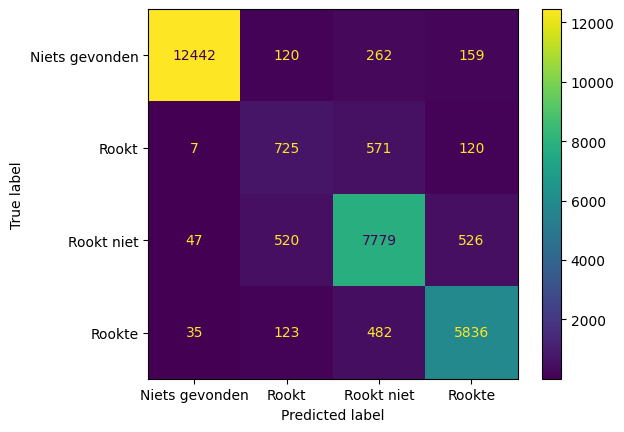

                precision    recall  f1-score   support

Niets gevonden       0.99      0.96      0.98     12983
         Rookt       0.49      0.51      0.50      1423
    Rookt niet       0.86      0.88      0.87      8872
        Rookte       0.88      0.90      0.89      6476

      accuracy                           0.90     29754
     macro avg       0.80      0.81      0.81     29754
  weighted avg       0.90      0.90      0.90     29754



In [9]:
# Ngram 1 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.10, NNZs: 491, Bias: 0.000000, T: 71408, Avg. loss: 0.269748
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 173.19, NNZs: 209, Bias: 0.000000, T: 142816, Avg. loss: 0.196866
Total training time: 1.27 seconds.
-- Epoch 3
Norm: 210.93, NNZs: 153, Bias: 0.000000, T: 214224, Avg. loss: 0.173070
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 242.06, NNZs: 134, Bias: 0.000000, T: 285632, Avg. loss: 0.159714
Total training time: 2.60 seconds.
-- Epoch 5
Norm: 269.23, NNZs: 117, Bias: 0.000000, T: 357040, Avg. loss: 0.150890
Total training time: 3.26 seconds.
-- Epoch 6
Norm: 293.37, NNZs: 111, Bias: 0.000000, T: 428448, Avg. loss: 0.144075
Total training time: 3.90 seconds.
-- Epoch 7
Norm: 297.68, NNZs: 110, Bias: 0.000000, T: 499856, Avg. loss: 0.140790
Total training time: 4.52 seconds.
-- Epoch 8
Norm: 301.91, NNZs: 108, Bias: 0.000000, T: 571264, Avg. loss: 0.139773
Total training time: 5.13 seconds.
-- Epoch 9
Norm: 306.06, NNZs: 107, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


Norm: 88.18, NNZs: 254, Bias: 0.000000, T: 71408, Avg. loss: 0.171437
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 127.15, NNZs: 114, Bias: 0.000000, T: 142816, Avg. loss: 0.129196
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 157.44, NNZs: 83, Bias: 0.000000, T: 214224, Avg. loss: 0.111430
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 182.62, NNZs: 68, Bias: 0.000000, T: 285632, Avg. loss: 0.100983
Total training time: 2.45 seconds.
-- Epoch 5
Norm: 204.34, NNZs: 64, Bias: 0.000000, T: 357040, Avg. loss: 0.093954
Total training time: 3.06 seconds.
-- Epoch 6
Norm: 223.45, NNZs: 57, Bias: 0.000000, T: 428448, Avg. loss: 0.089128
Total training time: 3.68 seconds.
-- Epoch 7
Norm: 226.77, NNZs: 57, Bias: 0.000000, T: 499856, Avg. loss: 0.086276
Total training time: 4.30 seconds.
-- Epoch 8
Norm: 230.09, NNZs: 57, Bias: 0.000000, T: 571264, Avg. loss: 0.085698
Total training time: 4.90 seconds.
-- Epoch 9
Norm: 233.34, NNZs: 55, Bias: 0.000000, T: 642672, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.3s remaining:    0.0s


Norm: 127.94, NNZs: 469, Bias: 0.000000, T: 71408, Avg. loss: 0.339145
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 183.07, NNZs: 220, Bias: 0.000000, T: 142816, Avg. loss: 0.247143
Total training time: 1.23 seconds.
-- Epoch 3
Norm: 224.54, NNZs: 169, Bias: 0.000000, T: 214224, Avg. loss: 0.214975
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 258.67, NNZs: 155, Bias: 0.000000, T: 285632, Avg. loss: 0.196456
Total training time: 2.46 seconds.
-- Epoch 5
Norm: 288.17, NNZs: 142, Bias: 0.000000, T: 357040, Avg. loss: 0.184634
Total training time: 3.07 seconds.
-- Epoch 6
Norm: 314.33, NNZs: 130, Bias: 0.000000, T: 428448, Avg. loss: 0.176131
Total training time: 3.73 seconds.
-- Epoch 7
Norm: 318.94, NNZs: 128, Bias: 0.000000, T: 499856, Avg. loss: 0.171905
Total training time: 4.34 seconds.
-- Epoch 8
Norm: 323.47, NNZs: 127, Bias: 0.000000, T: 571264, Avg. loss: 0.170579
Total training time: 4.97 seconds.
-- Epoch 9
Norm: 327.92, NNZs: 125, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   50.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.145 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.12, NNZs: 482, Bias: 0.000000, T: 71408, Avg. loss: 0.270581
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 173.20, NNZs: 210, Bias: 0.000000, T: 142816, Avg. loss: 0.197092
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 210.83, NNZs: 156, Bias: 0.000000, T: 214224, Avg. loss: 0.173960
Total training time: 1.75 seconds.
-- Epoch 4
Norm: 242.09, NNZs: 135, Bias: 0.000000, T: 285632, Avg. loss: 0.160380
Total training time: 2.37 seconds.
-- Epoch 5
Norm: 269.19, NNZs: 119, Bias: 0.000000, T: 357040, Avg. loss: 0.150919
Total training time: 3.01 seconds.
-- Epoch 6
Norm: 293.42, NNZs: 109, Bias: 0.000000, T: 428448, Avg. loss: 0.144410
Total training time: 3.63 seconds.
-- Epoch 7
Norm: 297.71, NNZs: 108, Bias: 0.000000, T: 499856, Avg. loss: 0.140817
Total training time: 4.24 seconds.
-- Epoch 8
Norm: 301.94, NNZs: 108, Bias: 0.000000, T: 571264, Avg. loss: 0.139894
Total training time: 4.89 seconds.
-- Epoch 9
Norm: 306.10, NNZs: 105, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


Norm: 88.40, NNZs: 241, Bias: 0.000000, T: 71408, Avg. loss: 0.171483
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 127.25, NNZs: 113, Bias: 0.000000, T: 142816, Avg. loss: 0.129413
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 157.38, NNZs: 83, Bias: 0.000000, T: 214224, Avg. loss: 0.112215
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 182.42, NNZs: 66, Bias: 0.000000, T: 285632, Avg. loss: 0.102032
Total training time: 2.46 seconds.
-- Epoch 5
Norm: 204.06, NNZs: 60, Bias: 0.000000, T: 357040, Avg. loss: 0.094965
Total training time: 3.04 seconds.
-- Epoch 6
Norm: 223.11, NNZs: 55, Bias: 0.000000, T: 428448, Avg. loss: 0.090024
Total training time: 3.62 seconds.
-- Epoch 7
Norm: 226.46, NNZs: 55, Bias: 0.000000, T: 499856, Avg. loss: 0.087351
Total training time: 4.19 seconds.
-- Epoch 8
Norm: 229.76, NNZs: 55, Bias: 0.000000, T: 571264, Avg. loss: 0.086710
Total training time: 4.76 seconds.
-- Epoch 9
Norm: 233.00, NNZs: 55, Bias: 0.000000, T: 642672, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.3s remaining:    0.0s


Norm: 127.80, NNZs: 472, Bias: 0.000000, T: 71408, Avg. loss: 0.339695
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 183.06, NNZs: 220, Bias: 0.000000, T: 142816, Avg. loss: 0.247183
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 224.59, NNZs: 169, Bias: 0.000000, T: 214224, Avg. loss: 0.214593
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 258.80, NNZs: 153, Bias: 0.000000, T: 285632, Avg. loss: 0.196685
Total training time: 2.33 seconds.
-- Epoch 5
Norm: 288.27, NNZs: 131, Bias: 0.000000, T: 357040, Avg. loss: 0.184426
Total training time: 2.92 seconds.
-- Epoch 6
Norm: 314.44, NNZs: 120, Bias: 0.000000, T: 428448, Avg. loss: 0.176103
Total training time: 3.53 seconds.
-- Epoch 7
Norm: 319.06, NNZs: 119, Bias: 0.000000, T: 499856, Avg. loss: 0.171737
Total training time: 4.14 seconds.
-- Epoch 8
Norm: 323.59, NNZs: 119, Bias: 0.000000, T: 571264, Avg. loss: 0.170491
Total training time: 4.75 seconds.
-- Epoch 9
Norm: 328.05, NNZs: 117, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   48.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.145 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.03, NNZs: 487, Bias: 0.000000, T: 71408, Avg. loss: 0.269314
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 173.03, NNZs: 206, Bias: 0.000000, T: 142816, Avg. loss: 0.196720
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 210.63, NNZs: 163, Bias: 0.000000, T: 214224, Avg. loss: 0.173308
Total training time: 1.78 seconds.
-- Epoch 4
Norm: 241.80, NNZs: 140, Bias: 0.000000, T: 285632, Avg. loss: 0.160134
Total training time: 2.37 seconds.
-- Epoch 5
Norm: 268.91, NNZs: 119, Bias: 0.000000, T: 357040, Avg. loss: 0.151096
Total training time: 2.96 seconds.
-- Epoch 6
Norm: 293.08, NNZs: 109, Bias: 0.000000, T: 428448, Avg. loss: 0.144220
Total training time: 3.55 seconds.
-- Epoch 7
Norm: 297.36, NNZs: 109, Bias: 0.000000, T: 499856, Avg. loss: 0.140522
Total training time: 4.19 seconds.
-- Epoch 8
Norm: 301.57, NNZs: 108, Bias: 0.000000, T: 571264, Avg. loss: 0.139567
Total training time: 4.79 seconds.
-- Epoch 9
Norm: 305.72, NNZs: 104, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


Norm: 88.56, NNZs: 246, Bias: 0.000000, T: 71408, Avg. loss: 0.171476
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 127.33, NNZs: 116, Bias: 0.000000, T: 142816, Avg. loss: 0.129389
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 157.55, NNZs: 85, Bias: 0.000000, T: 214224, Avg. loss: 0.112440
Total training time: 1.82 seconds.
-- Epoch 4
Norm: 182.57, NNZs: 68, Bias: 0.000000, T: 285632, Avg. loss: 0.101987
Total training time: 2.46 seconds.
-- Epoch 5
Norm: 204.28, NNZs: 62, Bias: 0.000000, T: 357040, Avg. loss: 0.094961
Total training time: 3.10 seconds.
-- Epoch 6
Norm: 223.43, NNZs: 54, Bias: 0.000000, T: 428448, Avg. loss: 0.090219
Total training time: 3.72 seconds.
-- Epoch 7
Norm: 226.74, NNZs: 53, Bias: 0.000000, T: 499856, Avg. loss: 0.087394
Total training time: 4.32 seconds.
-- Epoch 8
Norm: 230.03, NNZs: 53, Bias: 0.000000, T: 571264, Avg. loss: 0.086741
Total training time: 4.91 seconds.
-- Epoch 9
Norm: 233.29, NNZs: 53, Bias: 0.000000, T: 642672, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.2s remaining:    0.0s


Norm: 127.87, NNZs: 467, Bias: 0.000000, T: 71408, Avg. loss: 0.339014
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 182.91, NNZs: 211, Bias: 0.000000, T: 142816, Avg. loss: 0.246678
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 224.48, NNZs: 169, Bias: 0.000000, T: 214224, Avg. loss: 0.214829
Total training time: 1.68 seconds.
-- Epoch 4
Norm: 258.59, NNZs: 145, Bias: 0.000000, T: 285632, Avg. loss: 0.196142
Total training time: 2.30 seconds.
-- Epoch 5
Norm: 288.00, NNZs: 136, Bias: 0.000000, T: 357040, Avg. loss: 0.184309
Total training time: 2.89 seconds.
-- Epoch 6
Norm: 314.14, NNZs: 125, Bias: 0.000000, T: 428448, Avg. loss: 0.175942
Total training time: 3.48 seconds.
-- Epoch 7
Norm: 318.74, NNZs: 125, Bias: 0.000000, T: 499856, Avg. loss: 0.171403
Total training time: 4.09 seconds.
-- Epoch 8
Norm: 323.26, NNZs: 124, Bias: 0.000000, T: 571264, Avg. loss: 0.170222
Total training time: 4.71 seconds.
-- Epoch 9
Norm: 327.71, NNZs: 124, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   48.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.147 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 122.87, NNZs: 455, Bias: 0.000000, T: 71408, Avg. loss: 0.270517
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 172.88, NNZs: 207, Bias: 0.000000, T: 142816, Avg. loss: 0.196825
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 210.65, NNZs: 154, Bias: 0.000000, T: 214224, Avg. loss: 0.173830
Total training time: 1.97 seconds.
-- Epoch 4
Norm: 241.94, NNZs: 139, Bias: 0.000000, T: 285632, Avg. loss: 0.159585
Total training time: 2.61 seconds.
-- Epoch 5
Norm: 269.09, NNZs: 117, Bias: 0.000000, T: 357040, Avg. loss: 0.150461
Total training time: 3.24 seconds.
-- Epoch 6
Norm: 293.32, NNZs: 110, Bias: 0.000000, T: 428448, Avg. loss: 0.143547
Total training time: 3.89 seconds.
-- Epoch 7
Norm: 297.63, NNZs: 109, Bias: 0.000000, T: 499856, Avg. loss: 0.140106
Total training time: 4.54 seconds.
-- Epoch 8
Norm: 301.88, NNZs: 107, Bias: 0.000000, T: 571264, Avg. loss: 0.139172
Total training time: 5.17 seconds.
-- Epoch 9
Norm: 306.04, NNZs: 107, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


Norm: 88.50, NNZs: 241, Bias: 0.000000, T: 71408, Avg. loss: 0.171301
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 127.41, NNZs: 116, Bias: 0.000000, T: 142816, Avg. loss: 0.128377
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 157.94, NNZs: 86, Bias: 0.000000, T: 214224, Avg. loss: 0.111121
Total training time: 1.91 seconds.
-- Epoch 4
Norm: 183.09, NNZs: 72, Bias: 0.000000, T: 285632, Avg. loss: 0.100591
Total training time: 2.56 seconds.
-- Epoch 5
Norm: 204.91, NNZs: 66, Bias: 0.000000, T: 357040, Avg. loss: 0.093681
Total training time: 3.20 seconds.
-- Epoch 6
Norm: 224.09, NNZs: 58, Bias: 0.000000, T: 428448, Avg. loss: 0.088521
Total training time: 3.83 seconds.
-- Epoch 7
Norm: 227.52, NNZs: 57, Bias: 0.000000, T: 499856, Avg. loss: 0.086034
Total training time: 4.44 seconds.
-- Epoch 8
Norm: 230.89, NNZs: 56, Bias: 0.000000, T: 571264, Avg. loss: 0.085241
Total training time: 5.04 seconds.
-- Epoch 9
Norm: 234.16, NNZs: 54, Bias: 0.000000, T: 642672, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.4s remaining:    0.0s


Norm: 128.08, NNZs: 474, Bias: 0.000000, T: 71408, Avg. loss: 0.339496
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 183.19, NNZs: 217, Bias: 0.000000, T: 142816, Avg. loss: 0.246401
Total training time: 1.23 seconds.
-- Epoch 3
Norm: 224.70, NNZs: 166, Bias: 0.000000, T: 214224, Avg. loss: 0.214206
Total training time: 1.86 seconds.
-- Epoch 4
Norm: 258.88, NNZs: 145, Bias: 0.000000, T: 285632, Avg. loss: 0.195460
Total training time: 2.47 seconds.
-- Epoch 5
Norm: 288.32, NNZs: 136, Bias: 0.000000, T: 357040, Avg. loss: 0.183466
Total training time: 3.09 seconds.
-- Epoch 6
Norm: 314.47, NNZs: 124, Bias: 0.000000, T: 428448, Avg. loss: 0.175124
Total training time: 3.71 seconds.
-- Epoch 7
Norm: 319.06, NNZs: 120, Bias: 0.000000, T: 499856, Avg. loss: 0.170803
Total training time: 4.31 seconds.
-- Epoch 8
Norm: 323.58, NNZs: 120, Bias: 0.000000, T: 571264, Avg. loss: 0.169608
Total training time: 4.94 seconds.
-- Epoch 9
Norm: 328.02, NNZs: 118, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   50.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.147 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.21, NNZs: 467, Bias: 0.000000, T: 71409, Avg. loss: 0.270133
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 173.13, NNZs: 204, Bias: 0.000000, T: 142818, Avg. loss: 0.196496
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 210.97, NNZs: 155, Bias: 0.000000, T: 214227, Avg. loss: 0.173631
Total training time: 1.63 seconds.
-- Epoch 4
Norm: 242.13, NNZs: 129, Bias: 0.000000, T: 285636, Avg. loss: 0.160017
Total training time: 2.21 seconds.
-- Epoch 5
Norm: 269.25, NNZs: 117, Bias: 0.000000, T: 357045, Avg. loss: 0.150913
Total training time: 2.77 seconds.
-- Epoch 6
Norm: 293.40, NNZs: 111, Bias: 0.000000, T: 428454, Avg. loss: 0.144194
Total training time: 3.32 seconds.
-- Epoch 7
Norm: 297.69, NNZs: 108, Bias: 0.000000, T: 499863, Avg. loss: 0.140610
Total training time: 3.88 seconds.
-- Epoch 8
Norm: 301.92, NNZs: 107, Bias: 0.000000, T: 571272, Avg. loss: 0.139666
Total training time: 4.45 seconds.
-- Epoch 9
Norm: 306.09, NNZs: 107, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


Norm: 88.54, NNZs: 243, Bias: 0.000000, T: 71409, Avg. loss: 0.170647
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 127.31, NNZs: 112, Bias: 0.000000, T: 142818, Avg. loss: 0.128200
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 157.70, NNZs: 82, Bias: 0.000000, T: 214227, Avg. loss: 0.111097
Total training time: 1.64 seconds.
-- Epoch 4
Norm: 182.73, NNZs: 66, Bias: 0.000000, T: 285636, Avg. loss: 0.100599
Total training time: 2.19 seconds.
-- Epoch 5
Norm: 204.38, NNZs: 62, Bias: 0.000000, T: 357045, Avg. loss: 0.093629
Total training time: 2.74 seconds.
-- Epoch 6
Norm: 223.40, NNZs: 56, Bias: 0.000000, T: 428454, Avg. loss: 0.088824
Total training time: 3.32 seconds.
-- Epoch 7
Norm: 226.83, NNZs: 55, Bias: 0.000000, T: 499863, Avg. loss: 0.086381
Total training time: 3.89 seconds.
-- Epoch 8
Norm: 230.13, NNZs: 54, Bias: 0.000000, T: 571272, Avg. loss: 0.085565
Total training time: 4.43 seconds.
-- Epoch 9
Norm: 233.42, NNZs: 54, Bias: 0.000000, T: 642681, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.4s remaining:    0.0s


Norm: 128.09, NNZs: 462, Bias: 0.000000, T: 71409, Avg. loss: 0.338838
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 183.33, NNZs: 211, Bias: 0.000000, T: 142818, Avg. loss: 0.246443
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 224.83, NNZs: 167, Bias: 0.000000, T: 214227, Avg. loss: 0.214267
Total training time: 1.58 seconds.
-- Epoch 4
Norm: 258.98, NNZs: 145, Bias: 0.000000, T: 285636, Avg. loss: 0.195680
Total training time: 2.11 seconds.
-- Epoch 5
Norm: 288.38, NNZs: 134, Bias: 0.000000, T: 357045, Avg. loss: 0.183968
Total training time: 2.66 seconds.
-- Epoch 6
Norm: 314.57, NNZs: 126, Bias: 0.000000, T: 428454, Avg. loss: 0.175642
Total training time: 3.19 seconds.
-- Epoch 7
Norm: 319.17, NNZs: 123, Bias: 0.000000, T: 499863, Avg. loss: 0.171115
Total training time: 3.73 seconds.
-- Epoch 8
Norm: 323.69, NNZs: 122, Bias: 0.000000, T: 571272, Avg. loss: 0.169984
Total training time: 4.27 seconds.
-- Epoch 9
Norm: 328.14, NNZs: 122, Bias: 0.000000, T: 642681, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   44.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.150 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 125026591646904.66, NNZs: 548360, Bias: 0.000000, T: 71408, Avg. loss: 126653862471984354426880.000000
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 118575126853012.22, NNZs: 548360, Bias: 0.000000, T: 142816, Avg. loss: 131948502532661199241216.000000
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 115251533717996.36, NNZs: 548360, Bias: 0.000000, T: 214224, Avg. loss: 111464729720760710463488.000000
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 113050547001005.31, NNZs: 548360, Bias: 0.000000, T: 285632, Avg. loss: 101830169965798434537472.000000
Total training time: 1.89 seconds.
-- Epoch 5
Norm: 111416851519006.73, NNZs: 548360, Bias: 0.000000, T: 357040, Avg. loss: 95776225003962661601280.000000
Total training time: 2.37 seconds.
-- Epoch 6
Norm: 110125385253663.22, NNZs: 548360, Bias: 0.000000, T: 428448, Avg. loss: 91477889990938184384512.000000
Total training time: 2.85 seconds.
Convergence after 6 epochs took 2.90 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 121914823285976.28, NNZs: 548360, Bias: 0.000000, T: 71408, Avg. loss: 116066777910466331017216.000000
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 115569396668861.05, NNZs: 548360, Bias: 0.000000, T: 142816, Avg. loss: 126163205871189650046976.000000
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 112292047479737.06, NNZs: 548360, Bias: 0.000000, T: 214224, Avg. loss: 106673483983922722242560.000000
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 110114835418610.14, NNZs: 548360, Bias: 0.000000, T: 285632, Avg. loss: 97444170342628165943296.000000
Total training time: 1.83 seconds.
-- Epoch 5
Norm: 108504203687688.39, NNZs: 548360, Bias: 0.000000, T: 357040, Avg. loss: 91615461056614605258752.000000
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 107229319066124.03, NNZs: 548360, Bias: 0.000000, T: 428448, Avg. loss: 87542611930027523047424.000000
Total training time: 2.80 seconds.
Convergence after 6 epochs took 2.84 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


Norm: 114937946342024.86, NNZs: 548360, Bias: 0.000000, T: 71408, Avg. loss: 103000625978334594990080.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 108811759076410.47, NNZs: 548360, Bias: 0.000000, T: 142816, Avg. loss: 109481193347912136916992.000000
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 105660877436441.42, NNZs: 548360, Bias: 0.000000, T: 214224, Avg. loss: 92277639761797943656448.000000
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 103558954422671.50, NNZs: 548360, Bias: 0.000000, T: 285632, Avg. loss: 84104178079425619820544.000000
Total training time: 1.85 seconds.
-- Epoch 5
Norm: 101998977933375.17, NNZs: 548360, Bias: 0.000000, T: 357040, Avg. loss: 79058388518500214767616.000000
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 100762863251623.09, NNZs: 548360, Bias: 0.000000, T: 428448, Avg. loss: 75453675927420119547904.000000
Total training time: 2.78 seconds.
Convergence after 6 epochs took 2.83 seconds
-- Epoch 1
Norm: 115892952722312.11

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.224 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 118995463990322.12, NNZs: 548311, Bias: 0.000000, T: 71408, Avg. loss: 114870449577453366018048.000000
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 112725323272389.33, NNZs: 548311, Bias: 0.000000, T: 142816, Avg. loss: 118431028712889965871104.000000
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 109483561318830.30, NNZs: 548311, Bias: 0.000000, T: 214224, Avg. loss: 99828791888341496758272.000000
Total training time: 1.51 seconds.
-- Epoch 4
Norm: 107323287416462.84, NNZs: 548311, Bias: 0.000000, T: 285632, Avg. loss: 91043591331529969631232.000000
Total training time: 2.01 seconds.
-- Epoch 5
Norm: 105722337150582.44, NNZs: 548311, Bias: 0.000000, T: 357040, Avg. loss: 85479998917102637416448.000000
Total training time: 2.52 seconds.
-- Epoch 6
Norm: 104460141484615.73, NNZs: 548311, Bias: 0.000000, T: 428448, Avg. loss: 81538591483702303260672.000000
Total training time: 3.02 seconds.
Convergence after 6 epochs took 3.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 103865627996151.31, NNZs: 548311, Bias: 0.000000, T: 71408, Avg. loss: 84750121051779483303936.000000
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 98029544438773.64, NNZs: 548311, Bias: 0.000000, T: 142816, Avg. loss: 88683414511386760314880.000000
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 95013070386299.06, NNZs: 548311, Bias: 0.000000, T: 214224, Avg. loss: 73989984137178463076352.000000
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 93008336381815.53, NNZs: 548311, Bias: 0.000000, T: 285632, Avg. loss: 67104123594026526965760.000000
Total training time: 1.94 seconds.
-- Epoch 5
Norm: 91517866122472.08, NNZs: 548311, Bias: 0.000000, T: 357040, Avg. loss: 62796747955488356827136.000000
Total training time: 2.42 seconds.
-- Epoch 6
Norm: 90340456695066.75, NNZs: 548311, Bias: 0.000000, T: 428448, Avg. loss: 59770349659103336333312.000000
Total training time: 2.90 seconds.
Convergence after 6 epochs took 2.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


Norm: 110384552003786.42, NNZs: 548310, Bias: 0.000000, T: 71408, Avg. loss: 96099363448181630173184.000000
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 104376557639230.30, NNZs: 548311, Bias: 0.000000, T: 142816, Avg. loss: 100147238872174118830080.000000
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 101277926246223.84, NNZs: 548311, Bias: 0.000000, T: 214224, Avg. loss: 84172158295969028374528.000000
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 99218503967959.59, NNZs: 548311, Bias: 0.000000, T: 285632, Avg. loss: 76568936223551636111360.000000
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 97689278586731.75, NNZs: 548311, Bias: 0.000000, T: 357040, Avg. loss: 71859701756115848003584.000000
Total training time: 2.35 seconds.
-- Epoch 6
Norm: 96479050578822.98, NNZs: 548311, Bias: 0.000000, T: 428448, Avg. loss: 68508487193585717870592.000000
Total training time: 2.82 seconds.
Convergence after 6 epochs took 2.87 seconds
-- Epoch 1
Norm: 105951987495397.66, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.230 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112589161312144.97, NNZs: 549856, Bias: 0.000000, T: 71408, Avg. loss: 102795551184823674470400.000000
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 106492419396908.48, NNZs: 549858, Bias: 0.000000, T: 142816, Avg. loss: 104900674463787510661120.000000
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 103341760035104.38, NNZs: 549858, Bias: 0.000000, T: 214224, Avg. loss: 87979661336089372655616.000000
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 101251123464455.70, NNZs: 549858, Bias: 0.000000, T: 285632, Avg. loss: 80009152200282506002432.000000
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 99697805227403.41, NNZs: 549858, Bias: 0.000000, T: 357040, Avg. loss: 75074053406108059435008.000000
Total training time: 2.35 seconds.
-- Epoch 6
Norm: 98468906354252.08, NNZs: 549858, Bias: 0.000000, T: 428448, Avg. loss: 71579923417569953841152.000000
Total training time: 2.84 seconds.
Convergence after 6 epochs took 2.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 130170354221084.28, NNZs: 549857, Bias: 0.000000, T: 71408, Avg. loss: 135086130413961887088640.000000
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 123613528463970.38, NNZs: 549858, Bias: 0.000000, T: 142816, Avg. loss: 143726491485799561822208.000000
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 120239606138581.42, NNZs: 549858, Bias: 0.000000, T: 214224, Avg. loss: 121799761620932937908224.000000
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 118001800512698.42, NNZs: 549858, Bias: 0.000000, T: 285632, Avg. loss: 111494910512560374546432.000000
Total training time: 1.88 seconds.
-- Epoch 5
Norm: 116345436357363.05, NNZs: 549858, Bias: 0.000000, T: 357040, Avg. loss: 105040591226932893319168.000000
Total training time: 2.35 seconds.
-- Epoch 6
Norm: 115035778794338.91, NNZs: 549858, Bias: 0.000000, T: 428448, Avg. loss: 100478680208034785918976.000000
Total training time: 2.83 seconds.
Convergence after 6 epochs took 2.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


Norm: 113507648862203.77, NNZs: 549857, Bias: 0.000000, T: 71408, Avg. loss: 106650350500287512313856.000000
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 107337049296608.75, NNZs: 549858, Bias: 0.000000, T: 142816, Avg. loss: 107707126949005408337920.000000
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 104151937565542.38, NNZs: 549858, Bias: 0.000000, T: 214224, Avg. loss: 90336499123948689031168.000000
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 102040346795829.23, NNZs: 549858, Bias: 0.000000, T: 285632, Avg. loss: 82079194482352483991552.000000
Total training time: 1.86 seconds.
-- Epoch 5
Norm: 100473691229878.25, NNZs: 549858, Bias: 0.000000, T: 357040, Avg. loss: 77003045416932755898368.000000
Total training time: 2.34 seconds.
-- Epoch 6
Norm: 99233083776221.70, NNZs: 549858, Bias: 0.000000, T: 428448, Avg. loss: 73338613371716979654656.000000
Total training time: 2.82 seconds.
Convergence after 6 epochs took 2.87 seconds
-- Epoch 1
Norm: 115380791740545.62,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.220 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 122928699021026.75, NNZs: 548899, Bias: 0.000000, T: 71408, Avg. loss: 122619413542871899308032.000000
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 116542124510767.14, NNZs: 548899, Bias: 0.000000, T: 142816, Avg. loss: 127949132479766915448832.000000
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 113253689100738.56, NNZs: 548899, Bias: 0.000000, T: 214224, Avg. loss: 108160929192670197186560.000000
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 111071642776773.31, NNZs: 548899, Bias: 0.000000, T: 285632, Avg. loss: 98742684459039553748992.000000
Total training time: 1.92 seconds.
-- Epoch 5
Norm: 109453704736002.69, NNZs: 548899, Bias: 0.000000, T: 357040, Avg. loss: 92908088025347933601792.000000
Total training time: 2.41 seconds.
-- Epoch 6
Norm: 108174675200889.53, NNZs: 548899, Bias: 0.000000, T: 428448, Avg. loss: 88729046469287362953216.000000
Total training time: 2.90 seconds.
Convergence after 6 epochs took 2.95 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


Norm: 107110507780425.80, NNZs: 548895, Bias: 0.000000, T: 71408, Avg. loss: 92914196634832732160000.000000
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 101153815689129.48, NNZs: 548899, Bias: 0.000000, T: 142816, Avg. loss: 94917742672755552157696.000000
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 98079138956222.53, NNZs: 548899, Bias: 0.000000, T: 214224, Avg. loss: 79210742541673830547456.000000
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 96033661416971.47, NNZs: 548899, Bias: 0.000000, T: 285632, Avg. loss: 71948174588946457559040.000000
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 94515050621191.56, NNZs: 548899, Bias: 0.000000, T: 357040, Avg. loss: 67400994016096356925440.000000
Total training time: 2.35 seconds.
-- Epoch 6
Norm: 93314866636584.09, NNZs: 548899, Bias: 0.000000, T: 428448, Avg. loss: 64176699265834211606528.000000
Total training time: 2.82 seconds.
Convergence after 6 epochs took 2.87 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


Norm: 122308624086883.08, NNZs: 548899, Bias: 0.000000, T: 71408, Avg. loss: 120553808717452266176512.000000
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 115984439609129.88, NNZs: 548899, Bias: 0.000000, T: 142816, Avg. loss: 125526026622074007584768.000000
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 112716692862960.56, NNZs: 548899, Bias: 0.000000, T: 214224, Avg. loss: 106017095693062572605440.000000
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 110549808749278.30, NNZs: 548899, Bias: 0.000000, T: 285632, Avg. loss: 96821773583318146613248.000000
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 108942064418585.44, NNZs: 548899, Bias: 0.000000, T: 357040, Avg. loss: 91123927718223243378688.000000
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 107670887361387.38, NNZs: 548899, Bias: 0.000000, T: 428448, Avg. loss: 87059471023809207730176.000000
Total training time: 2.85 seconds.
Convergence after 6 epochs took 2.90 seconds
-- Epoch 1
Norm: 117504692325117.7

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.8s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.228 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 101492629001045.30, NNZs: 548282, Bias: 0.000000, T: 71409, Avg. loss: 82432001823662021804032.000000
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 95630090501165.11, NNZs: 548288, Bias: 0.000000, T: 142818, Avg. loss: 84732689327839506333696.000000
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 92584290002409.03, NNZs: 548288, Bias: 0.000000, T: 214227, Avg. loss: 70404593762982571278336.000000
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 90565992634348.39, NNZs: 548288, Bias: 0.000000, T: 285636, Avg. loss: 63675513843780981620736.000000
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 89069261922874.83, NNZs: 548288, Bias: 0.000000, T: 357045, Avg. loss: 59524413421233954095104.000000
Total training time: 2.36 seconds.
-- Epoch 6
Norm: 87883222671874.80, NNZs: 548288, Bias: 0.000000, T: 428454, Avg. loss: 56556770171255852630016.000000
Total training time: 2.84 seconds.
Convergence after 6 epochs took 2.89 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 124607314689668.27, NNZs: 548287, Bias: 0.000000, T: 71409, Avg. loss: 123422584803405164707840.000000
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 118187823599599.16, NNZs: 548288, Bias: 0.000000, T: 142818, Avg. loss: 130834007227100095840256.000000
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 114882871045492.34, NNZs: 548288, Bias: 0.000000, T: 214227, Avg. loss: 110547537351298682716160.000000
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 112692622718658.25, NNZs: 548288, Bias: 0.000000, T: 285636, Avg. loss: 100988439899084733546496.000000
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 111067401968108.83, NNZs: 548288, Bias: 0.000000, T: 357045, Avg. loss: 95033161137479250608128.000000
Total training time: 2.33 seconds.
-- Epoch 6
Norm: 109781590633029.55, NNZs: 548288, Bias: 0.000000, T: 428454, Avg. loss: 90781540940834211364864.000000
Total training time: 2.80 seconds.
Convergence after 6 epochs took 2.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


Norm: 114482101703951.14, NNZs: 548288, Bias: 0.000000, T: 71409, Avg. loss: 106245124702215289700352.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 108291798728094.08, NNZs: 548288, Bias: 0.000000, T: 142818, Avg. loss: 108616747930292309721088.000000
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 105095758276414.22, NNZs: 548288, Bias: 0.000000, T: 214227, Avg. loss: 91161278812517914640384.000000
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 102976524276262.11, NNZs: 548288, Bias: 0.000000, T: 285636, Avg. loss: 82906320062675161186304.000000
Total training time: 1.84 seconds.
-- Epoch 5
Norm: 101403852021284.92, NNZs: 548288, Bias: 0.000000, T: 357045, Avg. loss: 77796021438444818399232.000000
Total training time: 2.31 seconds.
-- Epoch 6
Norm: 100159461107096.27, NNZs: 548288, Bias: 0.000000, T: 428454, Avg. loss: 74181541184152058986496.000000
Total training time: 2.78 seconds.
Convergence after 6 epochs took 2.83 seconds
-- Epoch 1
Norm: 107745794627060.69

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.8s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.222 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 178.80, NNZs: 769, Bias: 0.000000, T: 71408, Avg. loss: 0.124531
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 231.12, NNZs: 238, Bias: 0.000000, T: 142816, Avg. loss: 0.073668
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 269.12, NNZs: 192, Bias: 0.000000, T: 214224, Avg. loss: 0.064909
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 300.14, NNZs: 166, Bias: 0.000000, T: 285632, Avg. loss: 0.060223
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 327.04, NNZs: 169, Bias: 0.000000, T: 357040, Avg. loss: 0.057363
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 351.13, NNZs: 154, Bias: 0.000000, T: 428448, Avg. loss: 0.055229
Total training time: 2.19 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 133.95, NNZs: 329, Bias: 0.000000, T: 71408, Avg. loss: 0.075165
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 171.78, NNZs: 109, Bias: 0.000000, T: 142816, Avg. loss: 0.039791
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 198.73, NNZs: 102, Bias: 0.000000, T: 214224, Avg. loss: 0.033950
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 221.02, NNZs: 89, Bias: 0.000000, T: 285632, Avg. loss: 0.031106
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 240.35, NNZs: 89, Bias: 0.000000, T: 357040, Avg. loss: 0.029557
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 257.72, NNZs: 89, Bias: 0.000000, T: 428448, Avg. loss: 0.028747
Total training time: 2.17 seconds.
Convergence after 6 epochs took 2.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


Norm: 204.18, NNZs: 898, Bias: 0.000000, T: 71408, Avg. loss: 0.175401
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 262.80, NNZs: 243, Bias: 0.000000, T: 142816, Avg. loss: 0.101915
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 305.74, NNZs: 213, Bias: 0.000000, T: 214224, Avg. loss: 0.092024
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 341.27, NNZs: 192, Bias: 0.000000, T: 285632, Avg. loss: 0.087372
Total training time: 1.56 seconds.
-- Epoch 5
Norm: 372.03, NNZs: 187, Bias: 0.000000, T: 357040, Avg. loss: 0.084392
Total training time: 1.95 seconds.
-- Epoch 6
Norm: 399.79, NNZs: 188, Bias: 0.000000, T: 428448, Avg. loss: 0.083202
Total training time: 2.36 seconds.
Convergence after 6 epochs took 2.41 seconds
-- Epoch 1
Norm: 167.92, NNZs: 629, Bias: 0.000000, T: 71408, Avg. loss: 0.113973
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 216.95, NNZs: 177, Bias: 0.000000, T: 142816, Avg. loss: 0.070755
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 253.22,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.977 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 178.90, NNZs: 678, Bias: 0.000000, T: 71408, Avg. loss: 0.125082
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 231.46, NNZs: 225, Bias: 0.000000, T: 142816, Avg. loss: 0.075002
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 269.65, NNZs: 200, Bias: 0.000000, T: 214224, Avg. loss: 0.066063
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 300.64, NNZs: 184, Bias: 0.000000, T: 285632, Avg. loss: 0.061219
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 327.71, NNZs: 160, Bias: 0.000000, T: 357040, Avg. loss: 0.058486
Total training time: 1.93 seconds.
-- Epoch 6
Norm: 352.02, NNZs: 157, Bias: 0.000000, T: 428448, Avg. loss: 0.056734
Total training time: 2.35 seconds.
Convergence after 6 epochs took 2.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 133.84, NNZs: 350, Bias: 0.000000, T: 71408, Avg. loss: 0.075411
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 171.49, NNZs: 113, Bias: 0.000000, T: 142816, Avg. loss: 0.039919
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 198.68, NNZs: 98, Bias: 0.000000, T: 214224, Avg. loss: 0.034106
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 220.91, NNZs: 96, Bias: 0.000000, T: 285632, Avg. loss: 0.031278
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 240.15, NNZs: 93, Bias: 0.000000, T: 357040, Avg. loss: 0.029384
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 257.44, NNZs: 88, Bias: 0.000000, T: 428448, Avg. loss: 0.028655
Total training time: 2.19 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 203.78, NNZs: 842, Bias: 0.000000, T: 71408, Avg. loss: 0.173866
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 262.06, NNZs: 248, Bias: 0.000000, T: 142816, Avg. loss: 0.101317
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 304.88, NNZs: 213, Bias: 0.000000, T: 214224, Avg. loss: 0.091272
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 340.21, NNZs: 184, Bias: 0.000000, T: 285632, Avg. loss: 0.086719
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 371.09, NNZs: 178, Bias: 0.000000, T: 357040, Avg. loss: 0.084627
Total training time: 1.89 seconds.
-- Epoch 6
Norm: 398.89, NNZs: 176, Bias: 0.000000, T: 428448, Avg. loss: 0.082876
Total training time: 2.28 seconds.
Convergence after 6 epochs took 2.33 seconds
-- Epoch 1
Norm: 168.14, NNZs: 650, Bias: 0.000000, T: 71408, Avg. loss: 0.113720
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 217.08, NNZs: 180, Bias: 0.000000, T: 142816, Avg. loss: 0.070232
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 252.92,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.974 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 179.11, NNZs: 675, Bias: 0.000000, T: 71408, Avg. loss: 0.125115
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 231.39, NNZs: 227, Bias: 0.000000, T: 142816, Avg. loss: 0.074399
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 269.40, NNZs: 200, Bias: 0.000000, T: 214224, Avg. loss: 0.065993
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 300.59, NNZs: 172, Bias: 0.000000, T: 285632, Avg. loss: 0.061555
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 327.68, NNZs: 171, Bias: 0.000000, T: 357040, Avg. loss: 0.058928
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 351.97, NNZs: 159, Bias: 0.000000, T: 428448, Avg. loss: 0.056873
Total training time: 2.26 seconds.
Convergence after 6 epochs took 2.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 134.44, NNZs: 366, Bias: 0.000000, T: 71408, Avg. loss: 0.075490
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 172.03, NNZs: 111, Bias: 0.000000, T: 142816, Avg. loss: 0.040586
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 199.44, NNZs: 104, Bias: 0.000000, T: 214224, Avg. loss: 0.034117
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 221.61, NNZs: 100, Bias: 0.000000, T: 285632, Avg. loss: 0.031275
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 241.01, NNZs: 95, Bias: 0.000000, T: 357040, Avg. loss: 0.029354
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 258.39, NNZs: 95, Bias: 0.000000, T: 428448, Avg. loss: 0.028446
Total training time: 2.12 seconds.
Convergence after 6 epochs took 2.18 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


Norm: 203.79, NNZs: 840, Bias: 0.000000, T: 71408, Avg. loss: 0.173913
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 261.97, NNZs: 239, Bias: 0.000000, T: 142816, Avg. loss: 0.100523
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 304.71, NNZs: 211, Bias: 0.000000, T: 214224, Avg. loss: 0.090893
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 339.96, NNZs: 197, Bias: 0.000000, T: 285632, Avg. loss: 0.086284
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 370.67, NNZs: 185, Bias: 0.000000, T: 357040, Avg. loss: 0.083702
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 398.38, NNZs: 179, Bias: 0.000000, T: 428448, Avg. loss: 0.082576
Total training time: 2.27 seconds.
Convergence after 6 epochs took 2.32 seconds
-- Epoch 1
Norm: 168.02, NNZs: 638, Bias: 0.000000, T: 71408, Avg. loss: 0.113704
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 216.94, NNZs: 181, Bias: 0.000000, T: 142816, Avg. loss: 0.070285
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 252.73,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.973 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 179.23, NNZs: 632, Bias: 0.000000, T: 71408, Avg. loss: 0.125005
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 231.48, NNZs: 214, Bias: 0.000000, T: 142816, Avg. loss: 0.073608
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 269.15, NNZs: 191, Bias: 0.000000, T: 214224, Avg. loss: 0.064570
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 300.19, NNZs: 175, Bias: 0.000000, T: 285632, Avg. loss: 0.060207
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 327.22, NNZs: 159, Bias: 0.000000, T: 357040, Avg. loss: 0.057401
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 351.36, NNZs: 153, Bias: 0.000000, T: 428448, Avg. loss: 0.055389
Total training time: 2.39 seconds.
Convergence after 6 epochs took 2.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 134.24, NNZs: 381, Bias: 0.000000, T: 71408, Avg. loss: 0.076457
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 171.82, NNZs: 116, Bias: 0.000000, T: 142816, Avg. loss: 0.041155
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 198.92, NNZs: 104, Bias: 0.000000, T: 214224, Avg. loss: 0.034864
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 221.26, NNZs: 96, Bias: 0.000000, T: 285632, Avg. loss: 0.032400
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 240.70, NNZs: 95, Bias: 0.000000, T: 357040, Avg. loss: 0.030717
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 258.17, NNZs: 88, Bias: 0.000000, T: 428448, Avg. loss: 0.029485
Total training time: 2.18 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 203.95, NNZs: 815, Bias: 0.000000, T: 71408, Avg. loss: 0.173955
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 261.82, NNZs: 237, Bias: 0.000000, T: 142816, Avg. loss: 0.099516
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 304.27, NNZs: 218, Bias: 0.000000, T: 214224, Avg. loss: 0.089455
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 339.53, NNZs: 191, Bias: 0.000000, T: 285632, Avg. loss: 0.084967
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 370.19, NNZs: 181, Bias: 0.000000, T: 357040, Avg. loss: 0.082665
Total training time: 1.89 seconds.
-- Epoch 6
Norm: 397.67, NNZs: 183, Bias: 0.000000, T: 428448, Avg. loss: 0.080402
Total training time: 2.26 seconds.
Convergence after 6 epochs took 2.31 seconds
-- Epoch 1
Norm: 168.56, NNZs: 631, Bias: 0.000000, T: 71408, Avg. loss: 0.115721
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 217.69, NNZs: 177, Bias: 0.000000, T: 142816, Avg. loss: 0.070859
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 253.64,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.978 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 178.89, NNZs: 711, Bias: 0.000000, T: 71409, Avg. loss: 0.125095
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 231.30, NNZs: 227, Bias: 0.000000, T: 142818, Avg. loss: 0.074261
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 269.13, NNZs: 197, Bias: 0.000000, T: 214227, Avg. loss: 0.065126
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 300.27, NNZs: 175, Bias: 0.000000, T: 285636, Avg. loss: 0.060960
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 327.18, NNZs: 163, Bias: 0.000000, T: 357045, Avg. loss: 0.058023
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 351.38, NNZs: 155, Bias: 0.000000, T: 428454, Avg. loss: 0.056209
Total training time: 2.20 seconds.
Convergence after 6 epochs took 2.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 134.19, NNZs: 357, Bias: 0.000000, T: 71409, Avg. loss: 0.076827
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 172.30, NNZs: 117, Bias: 0.000000, T: 142818, Avg. loss: 0.041043
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 199.74, NNZs: 101, Bias: 0.000000, T: 214227, Avg. loss: 0.035153
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 221.89, NNZs: 94, Bias: 0.000000, T: 285636, Avg. loss: 0.032948
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 241.29, NNZs: 93, Bias: 0.000000, T: 357045, Avg. loss: 0.031099
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 258.81, NNZs: 92, Bias: 0.000000, T: 428454, Avg. loss: 0.029544
Total training time: 2.02 seconds.
Convergence after 6 epochs took 2.07 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 203.54, NNZs: 833, Bias: 0.000000, T: 71409, Avg. loss: 0.172950
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 261.59, NNZs: 247, Bias: 0.000000, T: 142818, Avg. loss: 0.099527
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 304.19, NNZs: 207, Bias: 0.000000, T: 214227, Avg. loss: 0.090014
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 339.42, NNZs: 195, Bias: 0.000000, T: 285636, Avg. loss: 0.085611
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 370.09, NNZs: 194, Bias: 0.000000, T: 357045, Avg. loss: 0.082623
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 397.61, NNZs: 179, Bias: 0.000000, T: 428454, Avg. loss: 0.081563
Total training time: 2.20 seconds.
Convergence after 6 epochs took 2.25 seconds
-- Epoch 1
Norm: 167.58, NNZs: 567, Bias: 0.000000, T: 71409, Avg. loss: 0.112893
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 216.45, NNZs: 172, Bias: 0.000000, T: 142818, Avg. loss: 0.070157
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 252.33,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.977 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 58.00, NNZs: 394, Bias: 0.000000, T: 71408, Avg. loss: 0.156518
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 78.96, NNZs: 300, Bias: 0.000000, T: 142816, Avg. loss: 0.125246
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 94.61, NNZs: 258, Bias: 0.000000, T: 214224, Avg. loss: 0.119695
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 107.49, NNZs: 247, Bias: 0.000000, T: 285632, Avg. loss: 0.117033
Total training time: 2.00 seconds.
-- Epoch 5
Norm: 118.90, NNZs: 239, Bias: 0.000000, T: 357040, Avg. loss: 0.115677
Total training time: 2.49 seconds.
-- Epoch 6
Norm: 129.20, NNZs: 234, Bias: 0.000000, T: 428448, Avg. loss: 0.114743
Total training time: 2.98 seconds.
Convergence after 6 epochs took 3.03 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 99.74, NNZs: 324, Bias: 0.000000, T: 71408, Avg. loss: 0.079791
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 129.36, NNZs: 252, Bias: 0.000000, T: 142816, Avg. loss: 0.060474
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 151.35, NNZs: 243, Bias: 0.000000, T: 214224, Avg. loss: 0.059178
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 170.69, NNZs: 225, Bias: 0.000000, T: 285632, Avg. loss: 0.058801
Total training time: 1.95 seconds.
-- Epoch 5
Norm: 187.78, NNZs: 216, Bias: 0.000000, T: 357040, Avg. loss: 0.059154
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 203.39, NNZs: 211, Bias: 0.000000, T: 428448, Avg. loss: 0.059378
Total training time: 2.98 seconds.
Convergence after 6 epochs took 3.03 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


Norm: 74.90, NNZs: 410, Bias: 0.000000, T: 71408, Avg. loss: 0.178139
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 101.11, NNZs: 303, Bias: 0.000000, T: 142816, Avg. loss: 0.135654
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 119.81, NNZs: 284, Bias: 0.000000, T: 214224, Avg. loss: 0.128333
Total training time: 1.55 seconds.
-- Epoch 4
Norm: 135.09, NNZs: 274, Bias: 0.000000, T: 285632, Avg. loss: 0.125015
Total training time: 2.07 seconds.
-- Epoch 5
Norm: 148.48, NNZs: 262, Bias: 0.000000, T: 357040, Avg. loss: 0.122801
Total training time: 2.57 seconds.
-- Epoch 6
Norm: 160.54, NNZs: 252, Bias: 0.000000, T: 428448, Avg. loss: 0.121814
Total training time: 3.06 seconds.
Convergence after 6 epochs took 3.11 seconds
-- Epoch 1
Norm: 69.61, NNZs: 385, Bias: 0.000000, T: 71408, Avg. loss: 0.123995
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 91.95, NNZs: 324, Bias: 0.000000, T: 142816, Avg. loss: 0.105857
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 109.73, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.043 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 58.14, NNZs: 366, Bias: 0.000000, T: 71408, Avg. loss: 0.155520
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 79.11, NNZs: 289, Bias: 0.000000, T: 142816, Avg. loss: 0.124998
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 94.67, NNZs: 265, Bias: 0.000000, T: 214224, Avg. loss: 0.119368
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 107.54, NNZs: 250, Bias: 0.000000, T: 285632, Avg. loss: 0.116659
Total training time: 1.99 seconds.
-- Epoch 5
Norm: 118.89, NNZs: 250, Bias: 0.000000, T: 357040, Avg. loss: 0.115511
Total training time: 2.50 seconds.
-- Epoch 6
Norm: 129.11, NNZs: 242, Bias: 0.000000, T: 428448, Avg. loss: 0.115171
Total training time: 3.00 seconds.
Convergence after 6 epochs took 3.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 99.92, NNZs: 349, Bias: 0.000000, T: 71408, Avg. loss: 0.079671
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 129.18, NNZs: 257, Bias: 0.000000, T: 142816, Avg. loss: 0.060670
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 151.88, NNZs: 233, Bias: 0.000000, T: 214224, Avg. loss: 0.059506
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 170.78, NNZs: 238, Bias: 0.000000, T: 285632, Avg. loss: 0.058962
Total training time: 1.96 seconds.
-- Epoch 5
Norm: 188.07, NNZs: 224, Bias: 0.000000, T: 357040, Avg. loss: 0.059066
Total training time: 2.45 seconds.
-- Epoch 6
Norm: 203.47, NNZs: 231, Bias: 0.000000, T: 428448, Avg. loss: 0.059424
Total training time: 2.96 seconds.
Convergence after 6 epochs took 3.01 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


Norm: 74.79, NNZs: 404, Bias: 0.000000, T: 71408, Avg. loss: 0.178617
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 100.76, NNZs: 305, Bias: 0.000000, T: 142816, Avg. loss: 0.135760
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 119.72, NNZs: 283, Bias: 0.000000, T: 214224, Avg. loss: 0.128238
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 135.12, NNZs: 272, Bias: 0.000000, T: 285632, Avg. loss: 0.124869
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 148.39, NNZs: 260, Bias: 0.000000, T: 357040, Avg. loss: 0.122957
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 160.20, NNZs: 253, Bias: 0.000000, T: 428448, Avg. loss: 0.122188
Total training time: 2.84 seconds.
Convergence after 6 epochs took 2.89 seconds
-- Epoch 1
Norm: 69.29, NNZs: 376, Bias: 0.000000, T: 71408, Avg. loss: 0.124012
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 92.10, NNZs: 302, Bias: 0.000000, T: 142816, Avg. loss: 0.105885
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 109.46, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.0s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.046 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 57.92, NNZs: 371, Bias: 0.000000, T: 71408, Avg. loss: 0.155618
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 78.89, NNZs: 294, Bias: 0.000000, T: 142816, Avg. loss: 0.125224
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 94.59, NNZs: 266, Bias: 0.000000, T: 214224, Avg. loss: 0.119334
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 107.43, NNZs: 251, Bias: 0.000000, T: 285632, Avg. loss: 0.116734
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 118.85, NNZs: 243, Bias: 0.000000, T: 357040, Avg. loss: 0.115414
Total training time: 2.28 seconds.
-- Epoch 6
Norm: 129.13, NNZs: 230, Bias: 0.000000, T: 428448, Avg. loss: 0.114523
Total training time: 2.75 seconds.
Convergence after 6 epochs took 2.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


Norm: 99.53, NNZs: 336, Bias: 0.000000, T: 71408, Avg. loss: 0.076577
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 128.17, NNZs: 258, Bias: 0.000000, T: 142816, Avg. loss: 0.059215
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 150.41, NNZs: 253, Bias: 0.000000, T: 214224, Avg. loss: 0.058361
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 169.55, NNZs: 241, Bias: 0.000000, T: 285632, Avg. loss: 0.058764
Total training time: 1.86 seconds.
-- Epoch 5
Norm: 186.67, NNZs: 234, Bias: 0.000000, T: 357040, Avg. loss: 0.058086
Total training time: 2.33 seconds.
-- Epoch 6
Norm: 201.99, NNZs: 220, Bias: 0.000000, T: 428448, Avg. loss: 0.057567
Total training time: 2.81 seconds.
Convergence after 6 epochs took 2.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


Norm: 74.81, NNZs: 416, Bias: 0.000000, T: 71408, Avg. loss: 0.177139
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 101.13, NNZs: 315, Bias: 0.000000, T: 142816, Avg. loss: 0.134684
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 119.79, NNZs: 269, Bias: 0.000000, T: 214224, Avg. loss: 0.127282
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 135.05, NNZs: 263, Bias: 0.000000, T: 285632, Avg. loss: 0.124269
Total training time: 1.94 seconds.
-- Epoch 5
Norm: 148.46, NNZs: 253, Bias: 0.000000, T: 357040, Avg. loss: 0.122530
Total training time: 2.42 seconds.
-- Epoch 6
Norm: 160.34, NNZs: 247, Bias: 0.000000, T: 428448, Avg. loss: 0.121604
Total training time: 2.89 seconds.
Convergence after 6 epochs took 2.95 seconds
-- Epoch 1
Norm: 69.08, NNZs: 381, Bias: 0.000000, T: 71408, Avg. loss: 0.123997
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 91.86, NNZs: 298, Bias: 0.000000, T: 142816, Avg. loss: 0.106159
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 109.44, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.6s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.046 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 57.98, NNZs: 371, Bias: 0.000000, T: 71408, Avg. loss: 0.156216
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 78.82, NNZs: 286, Bias: 0.000000, T: 142816, Avg. loss: 0.125553
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 94.45, NNZs: 259, Bias: 0.000000, T: 214224, Avg. loss: 0.120043
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 107.31, NNZs: 255, Bias: 0.000000, T: 285632, Avg. loss: 0.117336
Total training time: 1.83 seconds.
-- Epoch 5
Norm: 118.75, NNZs: 235, Bias: 0.000000, T: 357040, Avg. loss: 0.116014
Total training time: 2.31 seconds.
-- Epoch 6
Norm: 129.01, NNZs: 238, Bias: 0.000000, T: 428448, Avg. loss: 0.115243
Total training time: 2.79 seconds.
Convergence after 6 epochs took 2.83 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Norm: 100.03, NNZs: 330, Bias: 0.000000, T: 71408, Avg. loss: 0.078982
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 128.93, NNZs: 268, Bias: 0.000000, T: 142816, Avg. loss: 0.060000
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 151.43, NNZs: 254, Bias: 0.000000, T: 214224, Avg. loss: 0.059102
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 170.07, NNZs: 242, Bias: 0.000000, T: 285632, Avg. loss: 0.057937
Total training time: 1.93 seconds.
-- Epoch 5
Norm: 187.31, NNZs: 235, Bias: 0.000000, T: 357040, Avg. loss: 0.058393
Total training time: 2.41 seconds.
-- Epoch 6
Norm: 202.88, NNZs: 247, Bias: 0.000000, T: 428448, Avg. loss: 0.058392
Total training time: 2.90 seconds.
Convergence after 6 epochs took 2.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


Norm: 74.66, NNZs: 407, Bias: 0.000000, T: 71408, Avg. loss: 0.178128
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 100.94, NNZs: 310, Bias: 0.000000, T: 142816, Avg. loss: 0.135709
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 119.62, NNZs: 284, Bias: 0.000000, T: 214224, Avg. loss: 0.127770
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 135.04, NNZs: 262, Bias: 0.000000, T: 285632, Avg. loss: 0.124880
Total training time: 1.89 seconds.
-- Epoch 5
Norm: 148.45, NNZs: 252, Bias: 0.000000, T: 357040, Avg. loss: 0.122869
Total training time: 2.39 seconds.
-- Epoch 6
Norm: 160.37, NNZs: 252, Bias: 0.000000, T: 428448, Avg. loss: 0.121784
Total training time: 2.86 seconds.
Convergence after 6 epochs took 2.90 seconds
-- Epoch 1
Norm: 69.28, NNZs: 384, Bias: 0.000000, T: 71408, Avg. loss: 0.123577
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 91.90, NNZs: 302, Bias: 0.000000, T: 142816, Avg. loss: 0.105051
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 109.42, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.8s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.045 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 58.00, NNZs: 379, Bias: 0.000000, T: 71409, Avg. loss: 0.156380
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 79.16, NNZs: 301, Bias: 0.000000, T: 142818, Avg. loss: 0.125667
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 94.84, NNZs: 270, Bias: 0.000000, T: 214227, Avg. loss: 0.119628
Total training time: 1.50 seconds.
-- Epoch 4
Norm: 107.85, NNZs: 256, Bias: 0.000000, T: 285636, Avg. loss: 0.117137
Total training time: 2.03 seconds.
-- Epoch 5
Norm: 119.24, NNZs: 241, Bias: 0.000000, T: 357045, Avg. loss: 0.115304
Total training time: 2.54 seconds.
-- Epoch 6
Norm: 129.59, NNZs: 241, Bias: 0.000000, T: 428454, Avg. loss: 0.114789
Total training time: 3.06 seconds.
Convergence after 6 epochs took 3.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 99.75, NNZs: 332, Bias: 0.000000, T: 71409, Avg. loss: 0.079140
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 129.77, NNZs: 246, Bias: 0.000000, T: 142818, Avg. loss: 0.060468
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 151.80, NNZs: 232, Bias: 0.000000, T: 214227, Avg. loss: 0.059188
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 171.09, NNZs: 228, Bias: 0.000000, T: 285636, Avg. loss: 0.058952
Total training time: 1.97 seconds.
-- Epoch 5
Norm: 187.88, NNZs: 232, Bias: 0.000000, T: 357045, Avg. loss: 0.058704
Total training time: 2.47 seconds.
-- Epoch 6
Norm: 203.35, NNZs: 218, Bias: 0.000000, T: 428454, Avg. loss: 0.059442
Total training time: 2.98 seconds.
Convergence after 6 epochs took 3.02 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


Norm: 75.02, NNZs: 419, Bias: 0.000000, T: 71409, Avg. loss: 0.177782
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 101.07, NNZs: 320, Bias: 0.000000, T: 142818, Avg. loss: 0.135908
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 120.15, NNZs: 279, Bias: 0.000000, T: 214227, Avg. loss: 0.127746
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 135.46, NNZs: 268, Bias: 0.000000, T: 285636, Avg. loss: 0.124576
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 148.58, NNZs: 267, Bias: 0.000000, T: 357045, Avg. loss: 0.123077
Total training time: 2.38 seconds.
-- Epoch 6
Norm: 160.48, NNZs: 256, Bias: 0.000000, T: 428454, Avg. loss: 0.122104
Total training time: 2.85 seconds.
Convergence after 6 epochs took 2.90 seconds
-- Epoch 1
Norm: 69.29, NNZs: 380, Bias: 0.000000, T: 71409, Avg. loss: 0.124789
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 92.07, NNZs: 300, Bias: 0.000000, T: 142818, Avg. loss: 0.105621
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 109.77, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.1s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.044 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.00, NNZs: 887261, Bias: 0.014201, T: 71408, Avg. loss: 0.156623
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 4.78, NNZs: 887261, Bias: 0.053476, T: 142816, Avg. loss: 0.137248
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 5.39, NNZs: 887261, Bias: 0.086234, T: 214224, Avg. loss: 0.129610
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 5.90, NNZs: 887261, Bias: 0.114575, T: 285632, Avg. loss: 0.123705
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 6.35, NNZs: 887261, Bias: 0.139085, T: 357040, Avg. loss: 0.118921
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 6.73, NNZs: 887261, Bias: 0.160390, T: 428448, Avg. loss: 0.115067
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.77 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 3.78, NNZs: 887261, Bias: -0.370245, T: 71408, Avg. loss: 0.054947
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 3.95, NNZs: 887261, Bias: -0.434580, T: 142816, Avg. loss: 0.034407
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 4.00, NNZs: 887261, Bias: -0.471532, T: 214224, Avg. loss: 0.030356
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 887261, Bias: -0.496982, T: 285632, Avg. loss: 0.028510
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 887261, Bias: -0.516241, T: 357040, Avg. loss: 0.027430
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 4.01, NNZs: 887261, Bias: -0.531675, T: 428448, Avg. loss: 0.026707
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 3.32, NNZs: 887261, Bias: -0.288254, T: 71408, Avg. loss: 0.168628
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 3.93, NNZs: 887261, Bias: -0.364143, T: 142816, Avg. loss: 0.146210
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 4.29, NNZs: 887261, Bias: -0.408063, T: 214224, Avg. loss: 0.138444
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 4.56, NNZs: 887261, Bias: -0.437854, T: 285632, Avg. loss: 0.134187
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 4.77, NNZs: 887261, Bias: -0.460132, T: 357040, Avg. loss: 0.131340
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 4.95, NNZs: 887261, Bias: -0.477879, T: 428448, Avg. loss: 0.129194
Total training time: 1.71 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1
Norm: 3.89, NNZs: 887261, Bias: -0.318028, T: 71408, Avg. loss: 0.126758
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 4.54, NNZs: 887261, Bias: -0.384862, T: 142816, Avg. loss: 0.099970
Total training time: 0.55 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.2s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.494 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.94, NNZs: 887478, Bias: 0.002073, T: 71408, Avg. loss: 0.155151
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 4.69, NNZs: 887478, Bias: 0.042267, T: 142816, Avg. loss: 0.138439
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 5.29, NNZs: 887478, Bias: 0.075321, T: 214224, Avg. loss: 0.130957
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 5.80, NNZs: 887478, Bias: 0.103946, T: 285632, Avg. loss: 0.125117
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 6.25, NNZs: 887478, Bias: 0.128924, T: 357040, Avg. loss: 0.120296
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 6.63, NNZs: 887478, Bias: 0.150755, T: 428448, Avg. loss: 0.116349
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 3.76, NNZs: 887478, Bias: -0.365910, T: 71408, Avg. loss: 0.055641
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 3.93, NNZs: 887478, Bias: -0.431695, T: 142816, Avg. loss: 0.034819
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 3.99, NNZs: 887478, Bias: -0.469519, T: 214224, Avg. loss: 0.030569
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 4.01, NNZs: 887478, Bias: -0.495545, T: 285632, Avg. loss: 0.028637
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 887478, Bias: -0.515209, T: 357040, Avg. loss: 0.027513
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 4.01, NNZs: 887478, Bias: -0.530934, T: 428448, Avg. loss: 0.026765
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 3.27, NNZs: 887478, Bias: -0.279451, T: 71408, Avg. loss: 0.170689
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 3.92, NNZs: 887478, Bias: -0.358793, T: 142816, Avg. loss: 0.146946
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 4.29, NNZs: 887478, Bias: -0.404481, T: 214224, Avg. loss: 0.138760
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 4.57, NNZs: 887478, Bias: -0.435351, T: 285632, Avg. loss: 0.134333
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 4.78, NNZs: 887478, Bias: -0.458360, T: 357040, Avg. loss: 0.131399
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 4.97, NNZs: 887478, Bias: -0.476645, T: 428448, Avg. loss: 0.129200
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.82 seconds
-- Epoch 1
Norm: 3.86, NNZs: 887478, Bias: -0.310702, T: 71408, Avg. loss: 0.127940
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4.52, NNZs: 887478, Bias: -0.379538, T: 142816, Avg. loss: 0.100694
Total training time: 0.54 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.500 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.95, NNZs: 889223, Bias: 0.001304, T: 71408, Avg. loss: 0.154697
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 4.70, NNZs: 889223, Bias: 0.042047, T: 142816, Avg. loss: 0.138142
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 5.30, NNZs: 889223, Bias: 0.075465, T: 214224, Avg. loss: 0.130634
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 5.81, NNZs: 889223, Bias: 0.104363, T: 285632, Avg. loss: 0.124771
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 6.25, NNZs: 889223, Bias: 0.129559, T: 357040, Avg. loss: 0.119936
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 6.64, NNZs: 889223, Bias: 0.151582, T: 428448, Avg. loss: 0.115974
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.86 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 3.76, NNZs: 889223, Bias: -0.365126, T: 71408, Avg. loss: 0.055791
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 3.93, NNZs: 889223, Bias: -0.431065, T: 142816, Avg. loss: 0.034856
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 3.99, NNZs: 889223, Bias: -0.468914, T: 214224, Avg. loss: 0.030577
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 4.01, NNZs: 889223, Bias: -0.494923, T: 285632, Avg. loss: 0.028642
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 889223, Bias: -0.514554, T: 357040, Avg. loss: 0.027521
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 4.01, NNZs: 889223, Bias: -0.530245, T: 428448, Avg. loss: 0.026775
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.83 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 3.26, NNZs: 889223, Bias: -0.276191, T: 71408, Avg. loss: 0.171368
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 3.93, NNZs: 889223, Bias: -0.356881, T: 142816, Avg. loss: 0.147065
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 4.31, NNZs: 889223, Bias: -0.403107, T: 214224, Avg. loss: 0.138682
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 4.59, NNZs: 889223, Bias: -0.434236, T: 285632, Avg. loss: 0.134184
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 4.81, NNZs: 889223, Bias: -0.457382, T: 357040, Avg. loss: 0.131218
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 5.00, NNZs: 889223, Bias: -0.475743, T: 428448, Avg. loss: 0.129000
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1
Norm: 3.88, NNZs: 889223, Bias: -0.310845, T: 71408, Avg. loss: 0.127529
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 4.53, NNZs: 889223, Bias: -0.379415, T: 142816, Avg. loss: 0.100439
Total training time: 0.56 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.503 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.94, NNZs: 887895, Bias: 0.000878, T: 71408, Avg. loss: 0.154752
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4.70, NNZs: 887895, Bias: 0.041487, T: 142816, Avg. loss: 0.138104
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 5.30, NNZs: 887895, Bias: 0.074803, T: 214224, Avg. loss: 0.130555
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 5.81, NNZs: 887895, Bias: 0.103571, T: 285632, Avg. loss: 0.124660
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 6.26, NNZs: 887895, Bias: 0.128544, T: 357040, Avg. loss: 0.119828
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 6.64, NNZs: 887895, Bias: 0.150306, T: 428448, Avg. loss: 0.115899
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 3.76, NNZs: 887895, Bias: -0.365399, T: 71408, Avg. loss: 0.055725
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 3.93, NNZs: 887895, Bias: -0.431225, T: 142816, Avg. loss: 0.034863
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 4.00, NNZs: 887895, Bias: -0.469025, T: 214224, Avg. loss: 0.030596
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 4.01, NNZs: 887895, Bias: -0.495019, T: 285632, Avg. loss: 0.028661
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 887895, Bias: -0.514658, T: 357040, Avg. loss: 0.027537
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 4.01, NNZs: 887895, Bias: -0.530369, T: 428448, Avg. loss: 0.026789
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 3.27, NNZs: 887895, Bias: -0.277445, T: 71408, Avg. loss: 0.170848
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 3.91, NNZs: 887895, Bias: -0.356356, T: 142816, Avg. loss: 0.147037
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 4.29, NNZs: 887895, Bias: -0.401940, T: 214224, Avg. loss: 0.138879
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 4.56, NNZs: 887895, Bias: -0.432772, T: 285632, Avg. loss: 0.134461
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 4.78, NNZs: 887895, Bias: -0.455736, T: 357040, Avg. loss: 0.131544
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 4.96, NNZs: 887895, Bias: -0.473961, T: 428448, Avg. loss: 0.129365
Total training time: 1.71 seconds.
Convergence after 6 epochs took 1.76 seconds
-- Epoch 1
Norm: 3.88, NNZs: 887895, Bias: -0.310799, T: 71408, Avg. loss: 0.128100
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 4.53, NNZs: 887895, Bias: -0.379677, T: 142816, Avg. loss: 0.100751
Total training time: 0.54 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.503 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.96, NNZs: 886206, Bias: 0.003568, T: 71409, Avg. loss: 0.154584
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 4.72, NNZs: 886206, Bias: 0.044325, T: 142818, Avg. loss: 0.137683
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 5.32, NNZs: 886206, Bias: 0.077769, T: 214227, Avg. loss: 0.130096
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 5.84, NNZs: 886206, Bias: 0.106627, T: 285636, Avg. loss: 0.124179
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 6.28, NNZs: 886206, Bias: 0.131653, T: 357045, Avg. loss: 0.119342
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 6.67, NNZs: 886206, Bias: 0.153469, T: 428454, Avg. loss: 0.115412
Total training time: 1.90 seconds.
Convergence after 6 epochs took 1.96 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 3.77, NNZs: 886206, Bias: -0.366183, T: 71409, Avg. loss: 0.055688
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 3.94, NNZs: 886206, Bias: -0.432072, T: 142818, Avg. loss: 0.034865
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 4.00, NNZs: 886206, Bias: -0.469910, T: 214227, Avg. loss: 0.030593
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 886206, Bias: -0.495928, T: 285636, Avg. loss: 0.028656
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 4.02, NNZs: 886206, Bias: -0.515566, T: 357045, Avg. loss: 0.027532
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 4.01, NNZs: 886206, Bias: -0.531265, T: 428454, Avg. loss: 0.026785
Total training time: 1.89 seconds.
Convergence after 6 epochs took 1.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 3.27, NNZs: 886206, Bias: -0.279891, T: 71409, Avg. loss: 0.170682
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 3.92, NNZs: 886206, Bias: -0.359186, T: 142818, Avg. loss: 0.146885
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 4.30, NNZs: 886206, Bias: -0.404843, T: 214227, Avg. loss: 0.138689
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 4.57, NNZs: 886206, Bias: -0.435691, T: 285636, Avg. loss: 0.134243
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 4.79, NNZs: 886206, Bias: -0.458674, T: 357045, Avg. loss: 0.131291
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 4.98, NNZs: 886206, Bias: -0.476932, T: 428454, Avg. loss: 0.129076
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.84 seconds
-- Epoch 1
Norm: 3.89, NNZs: 886206, Bias: -0.311447, T: 71409, Avg. loss: 0.127683
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 4.54, NNZs: 886206, Bias: -0.379913, T: 142818, Avg. loss: 0.100327
Total training time: 0.56 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.498 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.45, NNZs: 743708, Bias: 0.989320, T: 71408, Avg. loss: 0.127746
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 30.88, NNZs: 774351, Bias: 0.968660, T: 142816, Avg. loss: 0.082316
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 30.51, NNZs: 781005, Bias: 0.972071, T: 214224, Avg. loss: 0.077889
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 30.40, NNZs: 784085, Bias: 0.971122, T: 285632, Avg. loss: 0.075922
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 30.34, NNZs: 785640, Bias: 0.963311, T: 357040, Avg. loss: 0.074735
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 30.31, NNZs: 786637, Bias: 0.967037, T: 428448, Avg. loss: 0.074041
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 15.73, NNZs: 521801, Bias: -0.809158, T: 71408, Avg. loss: 0.072465
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 14.43, NNZs: 578068, Bias: -0.781188, T: 142816, Avg. loss: 0.048071
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 14.14, NNZs: 609180, Bias: -0.764655, T: 214224, Avg. loss: 0.046603
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 14.02, NNZs: 628218, Bias: -0.755022, T: 285632, Avg. loss: 0.045919
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 13.96, NNZs: 640500, Bias: -0.748999, T: 357040, Avg. loss: 0.045534
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 13.92, NNZs: 649067, Bias: -0.746895, T: 428448, Avg. loss: 0.045289
Total training time: 1.71 seconds.
-- Epoch 7
Norm: 13.90, NNZs: 654866, Bias: -0.741621, T: 499856, Avg. loss: 0.045174
Total training time: 2.01 seconds.
-- Epoch 8
Norm: 13.88, NNZs: 659233, Bias: -0.737949, T: 571264, Avg. loss: 0.045066
Total training time: 2.30 seconds.
Convergence after 8 epochs took 2.36 seconds

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


Norm: 37.33, NNZs: 827638, Bias: -0.994348, T: 71408, Avg. loss: 0.190207
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 36.16, NNZs: 845164, Bias: -0.940352, T: 142816, Avg. loss: 0.134558
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 36.01, NNZs: 849122, Bias: -0.927506, T: 214224, Avg. loss: 0.128684
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 35.94, NNZs: 850632, Bias: -0.915602, T: 285632, Avg. loss: 0.125440
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 35.92, NNZs: 851373, Bias: -0.921664, T: 357040, Avg. loss: 0.123968
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 35.90, NNZs: 851804, Bias: -0.916709, T: 428448, Avg. loss: 0.122739
Total training time: 1.78 seconds.
Convergence after 6 epochs took 1.83 seconds
-- Epoch 1
Norm: 30.21, NNZs: 750110, Bias: -0.949598, T: 71408, Avg. loss: 0.123419
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 28.73, NNZs: 787398, Bias: -0.914595, T: 142816, Avg. loss: 0.083592
Total training time: 0.54 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.9s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.780 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.47, NNZs: 741661, Bias: 1.006543, T: 71408, Avg. loss: 0.126773
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 30.91, NNZs: 772040, Bias: 0.978444, T: 142816, Avg. loss: 0.081071
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 30.58, NNZs: 780122, Bias: 0.984862, T: 214224, Avg. loss: 0.077134
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 30.47, NNZs: 783385, Bias: 0.975030, T: 285632, Avg. loss: 0.075031
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 30.46, NNZs: 785095, Bias: 0.968945, T: 357040, Avg. loss: 0.073885
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 30.38, NNZs: 785962, Bias: 0.966980, T: 428448, Avg. loss: 0.073169
Total training time: 1.78 seconds.
Convergence after 6 epochs took 1.84 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 15.58, NNZs: 528358, Bias: -0.816106, T: 71408, Avg. loss: 0.073065
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 14.31, NNZs: 583079, Bias: -0.784645, T: 142816, Avg. loss: 0.048450
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 14.03, NNZs: 613134, Bias: -0.763740, T: 214224, Avg. loss: 0.046895
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 13.91, NNZs: 632002, Bias: -0.758509, T: 285632, Avg. loss: 0.046238
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 13.86, NNZs: 644334, Bias: -0.749036, T: 357040, Avg. loss: 0.045892
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 13.83, NNZs: 651756, Bias: -0.743901, T: 428448, Avg. loss: 0.045617
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 37.31, NNZs: 826775, Bias: -1.010390, T: 71408, Avg. loss: 0.187405
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 36.21, NNZs: 844909, Bias: -0.967539, T: 142816, Avg. loss: 0.133903
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 36.07, NNZs: 848771, Bias: -0.933166, T: 214224, Avg. loss: 0.127541
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 35.98, NNZs: 850101, Bias: -0.936946, T: 285632, Avg. loss: 0.124597
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 35.96, NNZs: 850904, Bias: -0.931325, T: 357040, Avg. loss: 0.122954
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 35.97, NNZs: 851421, Bias: -0.930523, T: 428448, Avg. loss: 0.121873
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1
Norm: 29.82, NNZs: 748154, Bias: -0.963506, T: 71408, Avg. loss: 0.123077
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 28.58, NNZs: 785470, Bias: -0.920589, T: 142816, Avg. loss: 0.083791
Total training time: 0.55 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.772 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.14, NNZs: 742996, Bias: 1.036569, T: 71408, Avg. loss: 0.127327
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 30.66, NNZs: 774101, Bias: 1.004445, T: 142816, Avg. loss: 0.082088
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 30.43, NNZs: 781576, Bias: 0.987144, T: 214224, Avg. loss: 0.077818
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 30.27, NNZs: 784726, Bias: 0.985188, T: 285632, Avg. loss: 0.075926
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 30.26, NNZs: 786228, Bias: 0.981587, T: 357040, Avg. loss: 0.074772
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 30.23, NNZs: 786998, Bias: 0.977013, T: 428448, Avg. loss: 0.073935
Total training time: 1.94 seconds.
Convergence after 6 epochs took 1.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 15.78, NNZs: 526134, Bias: -0.824583, T: 71408, Avg. loss: 0.072427
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 14.48, NNZs: 582328, Bias: -0.778887, T: 142816, Avg. loss: 0.048224
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 14.16, NNZs: 611877, Bias: -0.776501, T: 214224, Avg. loss: 0.046600
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 14.05, NNZs: 630662, Bias: -0.758214, T: 285632, Avg. loss: 0.045975
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 13.98, NNZs: 642692, Bias: -0.755351, T: 357040, Avg. loss: 0.045627
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 13.95, NNZs: 650486, Bias: -0.749701, T: 428448, Avg. loss: 0.045346
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


Norm: 37.05, NNZs: 827545, Bias: -1.002736, T: 71408, Avg. loss: 0.189829
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 35.99, NNZs: 846025, Bias: -0.946902, T: 142816, Avg. loss: 0.134702
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 35.78, NNZs: 849929, Bias: -0.943744, T: 214224, Avg. loss: 0.128439
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 35.78, NNZs: 851531, Bias: -0.934714, T: 285632, Avg. loss: 0.125508
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 35.74, NNZs: 852217, Bias: -0.927091, T: 357040, Avg. loss: 0.123694
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 35.75, NNZs: 852726, Bias: -0.928367, T: 428448, Avg. loss: 0.122618
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1
Norm: 30.00, NNZs: 752193, Bias: -0.958568, T: 71408, Avg. loss: 0.124265
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 28.57, NNZs: 789113, Bias: -0.927258, T: 142816, Avg. loss: 0.084295
Total training time: 0.57 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.8s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.783 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.15, NNZs: 742099, Bias: 1.038693, T: 71408, Avg. loss: 0.127579
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 30.74, NNZs: 773105, Bias: 1.001091, T: 142816, Avg. loss: 0.081827
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 30.46, NNZs: 780448, Bias: 1.000735, T: 214224, Avg. loss: 0.077804
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 30.31, NNZs: 783389, Bias: 0.993424, T: 285632, Avg. loss: 0.075761
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 30.28, NNZs: 784853, Bias: 0.989158, T: 357040, Avg. loss: 0.074679
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 30.25, NNZs: 785629, Bias: 0.992016, T: 428448, Avg. loss: 0.073833
Total training time: 1.87 seconds.
Convergence after 6 epochs took 1.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 15.67, NNZs: 524325, Bias: -0.830525, T: 71408, Avg. loss: 0.072195
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 14.42, NNZs: 579467, Bias: -0.792027, T: 142816, Avg. loss: 0.048243
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 14.13, NNZs: 608991, Bias: -0.779045, T: 214224, Avg. loss: 0.046610
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 14.02, NNZs: 628019, Bias: -0.762822, T: 285632, Avg. loss: 0.046059
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 13.96, NNZs: 640226, Bias: -0.758901, T: 357040, Avg. loss: 0.045645
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 13.92, NNZs: 648349, Bias: -0.755281, T: 428448, Avg. loss: 0.045432
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 37.44, NNZs: 827824, Bias: -0.986387, T: 71408, Avg. loss: 0.191559
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 36.18, NNZs: 845548, Bias: -0.967917, T: 142816, Avg. loss: 0.134668
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 35.93, NNZs: 849146, Bias: -0.951764, T: 214224, Avg. loss: 0.128487
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 35.93, NNZs: 850794, Bias: -0.932093, T: 285632, Avg. loss: 0.125804
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 35.92, NNZs: 851569, Bias: -0.932163, T: 357040, Avg. loss: 0.124147
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 35.91, NNZs: 852047, Bias: -0.928267, T: 428448, Avg. loss: 0.122882
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.87 seconds
-- Epoch 1
Norm: 29.92, NNZs: 749249, Bias: -0.950641, T: 71408, Avg. loss: 0.123849
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 28.60, NNZs: 785997, Bias: -0.913248, T: 142816, Avg. loss: 0.083915
Total training time: 0.54 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.788 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.47, NNZs: 739479, Bias: 1.014339, T: 71409, Avg. loss: 0.126886
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 30.77, NNZs: 770073, Bias: 0.982895, T: 142818, Avg. loss: 0.081504
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 30.50, NNZs: 777871, Bias: 0.993355, T: 214227, Avg. loss: 0.077247
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 30.43, NNZs: 781353, Bias: 0.982480, T: 285636, Avg. loss: 0.075268
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 30.37, NNZs: 782857, Bias: 0.970883, T: 357045, Avg. loss: 0.074035
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 30.30, NNZs: 783783, Bias: 0.976489, T: 428454, Avg. loss: 0.073315
Total training time: 1.84 seconds.
Convergence after 6 epochs took 1.89 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 15.71, NNZs: 521747, Bias: -0.816793, T: 71409, Avg. loss: 0.072057
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 14.43, NNZs: 577372, Bias: -0.784361, T: 142818, Avg. loss: 0.048134
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 14.14, NNZs: 609392, Bias: -0.761985, T: 214227, Avg. loss: 0.046694
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 14.02, NNZs: 627746, Bias: -0.754792, T: 285636, Avg. loss: 0.046104
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 13.95, NNZs: 639124, Bias: -0.750681, T: 357045, Avg. loss: 0.045686
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 13.92, NNZs: 646621, Bias: -0.745622, T: 428454, Avg. loss: 0.045456
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 37.10, NNZs: 826140, Bias: -0.987249, T: 71409, Avg. loss: 0.190875
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 36.08, NNZs: 844293, Bias: -0.947406, T: 142818, Avg. loss: 0.134536
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 35.89, NNZs: 848081, Bias: -0.941699, T: 214227, Avg. loss: 0.128089
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 35.86, NNZs: 849586, Bias: -0.927405, T: 285636, Avg. loss: 0.125127
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 35.83, NNZs: 850227, Bias: -0.926658, T: 357045, Avg. loss: 0.123336
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 35.81, NNZs: 850685, Bias: -0.928295, T: 428454, Avg. loss: 0.122279
Total training time: 1.85 seconds.
Convergence after 6 epochs took 1.90 seconds
-- Epoch 1
Norm: 29.87, NNZs: 746620, Bias: -0.953476, T: 71409, Avg. loss: 0.122291
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 28.47, NNZs: 784382, Bias: -0.921649, T: 142818, Avg. loss: 0.083562
Total training time: 0.59 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.780 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 160.15, NNZs: 225, Bias: 0.000000, T: 71408, Avg. loss: 0.174099
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 215.39, NNZs: 163, Bias: 0.000000, T: 142816, Avg. loss: 0.102202
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 254.78, NNZs: 138, Bias: 0.000000, T: 214224, Avg. loss: 0.087814
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 286.59, NNZs: 126, Bias: 0.000000, T: 285632, Avg. loss: 0.081686
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 314.03, NNZs: 123, Bias: 0.000000, T: 357040, Avg. loss: 0.078423
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 338.46, NNZs: 120, Bias: 0.000000, T: 428448, Avg. loss: 0.076324
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.85 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 251.14, NNZs: 175, Bias: 0.000000, T: 71408, Avg. loss: 0.079943
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 313.26, NNZs: 110, Bias: 0.000000, T: 142816, Avg. loss: 0.040445
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 356.10, NNZs: 101, Bias: 0.000000, T: 214224, Avg. loss: 0.037781
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 390.75, NNZs: 94, Bias: 0.000000, T: 285632, Avg. loss: 0.037142
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 421.20, NNZs: 88, Bias: 0.000000, T: 357040, Avg. loss: 0.035922
Total training time: 1.38 seconds.
-- Epoch 6
Norm: 448.37, NNZs: 86, Bias: 0.000000, T: 428448, Avg. loss: 0.035410
Total training time: 1.66 seconds.
Convergence after 6 epochs took 1.71 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 208.72, NNZs: 267, Bias: 0.000000, T: 71408, Avg. loss: 0.211044
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 276.18, NNZs: 194, Bias: 0.000000, T: 142816, Avg. loss: 0.113803
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 323.58, NNZs: 178, Bias: 0.000000, T: 214224, Avg. loss: 0.098916
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 362.12, NNZs: 165, Bias: 0.000000, T: 285632, Avg. loss: 0.092661
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 395.38, NNZs: 155, Bias: 0.000000, T: 357040, Avg. loss: 0.088867
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 425.09, NNZs: 147, Bias: 0.000000, T: 428448, Avg. loss: 0.085774
Total training time: 1.85 seconds.
Convergence after 6 epochs took 1.90 seconds
-- Epoch 1
Norm: 183.63, NNZs: 203, Bias: 0.000000, T: 71408, Avg. loss: 0.113844
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 237.56, NNZs: 141, Bias: 0.000000, T: 142816, Avg. loss: 0.068024
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 276.73,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.976 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 160.22, NNZs: 245, Bias: 0.000000, T: 71408, Avg. loss: 0.173666
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 215.28, NNZs: 162, Bias: 0.000000, T: 142816, Avg. loss: 0.100087
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 254.68, NNZs: 139, Bias: 0.000000, T: 214224, Avg. loss: 0.085848
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 286.52, NNZs: 132, Bias: 0.000000, T: 285632, Avg. loss: 0.079564
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 313.89, NNZs: 126, Bias: 0.000000, T: 357040, Avg. loss: 0.076173
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 338.30, NNZs: 126, Bias: 0.000000, T: 428448, Avg. loss: 0.074259
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 251.69, NNZs: 188, Bias: 0.000000, T: 71408, Avg. loss: 0.080510
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 315.07, NNZs: 120, Bias: 0.000000, T: 142816, Avg. loss: 0.039956
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 358.63, NNZs: 113, Bias: 0.000000, T: 214224, Avg. loss: 0.037197
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 393.22, NNZs: 96, Bias: 0.000000, T: 285632, Avg. loss: 0.035923
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 423.21, NNZs: 93, Bias: 0.000000, T: 357040, Avg. loss: 0.035375
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 450.08, NNZs: 89, Bias: 0.000000, T: 428448, Avg. loss: 0.036201
Total training time: 1.62 seconds.
Convergence after 6 epochs took 1.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


Norm: 208.02, NNZs: 274, Bias: 0.000000, T: 71408, Avg. loss: 0.212719
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 275.63, NNZs: 195, Bias: 0.000000, T: 142816, Avg. loss: 0.114625
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 323.38, NNZs: 184, Bias: 0.000000, T: 214224, Avg. loss: 0.099545
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 362.11, NNZs: 176, Bias: 0.000000, T: 285632, Avg. loss: 0.092881
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 395.48, NNZs: 161, Bias: 0.000000, T: 357040, Avg. loss: 0.088801
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 425.25, NNZs: 160, Bias: 0.000000, T: 428448, Avg. loss: 0.086036
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1
Norm: 184.08, NNZs: 206, Bias: 0.000000, T: 71408, Avg. loss: 0.114782
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 237.95, NNZs: 141, Bias: 0.000000, T: 142816, Avg. loss: 0.068026
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 277.23,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.976 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 160.06, NNZs: 240, Bias: 0.000000, T: 71408, Avg. loss: 0.175981
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 215.40, NNZs: 164, Bias: 0.000000, T: 142816, Avg. loss: 0.101840
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 255.01, NNZs: 143, Bias: 0.000000, T: 214224, Avg. loss: 0.087467
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 287.11, NNZs: 134, Bias: 0.000000, T: 285632, Avg. loss: 0.081069
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 314.65, NNZs: 126, Bias: 0.000000, T: 357040, Avg. loss: 0.077581
Total training time: 1.58 seconds.
-- Epoch 6
Norm: 339.24, NNZs: 121, Bias: 0.000000, T: 428448, Avg. loss: 0.075497
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 249.71, NNZs: 185, Bias: 0.000000, T: 71408, Avg. loss: 0.082084
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 311.36, NNZs: 108, Bias: 0.000000, T: 142816, Avg. loss: 0.042864
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 354.19, NNZs: 101, Bias: 0.000000, T: 214224, Avg. loss: 0.041163
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 389.06, NNZs: 89, Bias: 0.000000, T: 285632, Avg. loss: 0.039248
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 418.85, NNZs: 90, Bias: 0.000000, T: 357040, Avg. loss: 0.036841
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 446.31, NNZs: 86, Bias: 0.000000, T: 428448, Avg. loss: 0.034965
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 208.00, NNZs: 265, Bias: 0.000000, T: 71408, Avg. loss: 0.211933
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 275.67, NNZs: 206, Bias: 0.000000, T: 142816, Avg. loss: 0.114157
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 323.62, NNZs: 187, Bias: 0.000000, T: 214224, Avg. loss: 0.099046
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 362.31, NNZs: 166, Bias: 0.000000, T: 285632, Avg. loss: 0.092086
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 395.71, NNZs: 158, Bias: 0.000000, T: 357040, Avg. loss: 0.087869
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 425.57, NNZs: 152, Bias: 0.000000, T: 428448, Avg. loss: 0.084863
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.93 seconds
-- Epoch 1
Norm: 183.58, NNZs: 208, Bias: 0.000000, T: 71408, Avg. loss: 0.115120
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 237.85, NNZs: 137, Bias: 0.000000, T: 142816, Avg. loss: 0.068339
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 277.22,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.974 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 159.97, NNZs: 234, Bias: 0.000000, T: 71408, Avg. loss: 0.175525
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 214.91, NNZs: 167, Bias: 0.000000, T: 142816, Avg. loss: 0.101189
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 254.52, NNZs: 144, Bias: 0.000000, T: 214224, Avg. loss: 0.086814
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 286.49, NNZs: 134, Bias: 0.000000, T: 285632, Avg. loss: 0.080358
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 313.91, NNZs: 127, Bias: 0.000000, T: 357040, Avg. loss: 0.077000
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 338.41, NNZs: 123, Bias: 0.000000, T: 428448, Avg. loss: 0.075075
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.86 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 249.51, NNZs: 182, Bias: 0.000000, T: 71408, Avg. loss: 0.081113
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 310.45, NNZs: 116, Bias: 0.000000, T: 142816, Avg. loss: 0.043070
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 353.08, NNZs: 100, Bias: 0.000000, T: 214224, Avg. loss: 0.040269
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 387.32, NNZs: 97, Bias: 0.000000, T: 285632, Avg. loss: 0.038131
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 416.88, NNZs: 90, Bias: 0.000000, T: 357040, Avg. loss: 0.037021
Total training time: 1.54 seconds.
-- Epoch 6
Norm: 443.57, NNZs: 87, Bias: 0.000000, T: 428448, Avg. loss: 0.036467
Total training time: 1.82 seconds.
Convergence after 6 epochs took 1.87 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 208.68, NNZs: 273, Bias: 0.000000, T: 71408, Avg. loss: 0.212505
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 275.79, NNZs: 200, Bias: 0.000000, T: 142816, Avg. loss: 0.114096
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 323.44, NNZs: 179, Bias: 0.000000, T: 214224, Avg. loss: 0.098962
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 362.05, NNZs: 168, Bias: 0.000000, T: 285632, Avg. loss: 0.092201
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 395.37, NNZs: 159, Bias: 0.000000, T: 357040, Avg. loss: 0.088337
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 425.22, NNZs: 152, Bias: 0.000000, T: 428448, Avg. loss: 0.085468
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.86 seconds
-- Epoch 1
Norm: 183.62, NNZs: 213, Bias: 0.000000, T: 71408, Avg. loss: 0.113992
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 237.51, NNZs: 141, Bias: 0.000000, T: 142816, Avg. loss: 0.067859
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 276.98,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.977 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 160.26, NNZs: 243, Bias: 0.000000, T: 71409, Avg. loss: 0.174552
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 215.12, NNZs: 163, Bias: 0.000000, T: 142818, Avg. loss: 0.100935
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 254.69, NNZs: 139, Bias: 0.000000, T: 214227, Avg. loss: 0.086874
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 286.84, NNZs: 129, Bias: 0.000000, T: 285636, Avg. loss: 0.080408
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 314.33, NNZs: 124, Bias: 0.000000, T: 357045, Avg. loss: 0.076852
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 338.72, NNZs: 118, Bias: 0.000000, T: 428454, Avg. loss: 0.074817
Total training time: 1.78 seconds.
Convergence after 6 epochs took 1.83 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 250.12, NNZs: 172, Bias: 0.000000, T: 71409, Avg. loss: 0.077870
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 312.36, NNZs: 112, Bias: 0.000000, T: 142818, Avg. loss: 0.040859
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 355.11, NNZs: 101, Bias: 0.000000, T: 214227, Avg. loss: 0.039522
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 390.30, NNZs: 91, Bias: 0.000000, T: 285636, Avg. loss: 0.037639
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 420.36, NNZs: 84, Bias: 0.000000, T: 357045, Avg. loss: 0.036598
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 447.64, NNZs: 83, Bias: 0.000000, T: 428454, Avg. loss: 0.036141
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.75 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 208.38, NNZs: 286, Bias: 0.000000, T: 71409, Avg. loss: 0.211809
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 275.45, NNZs: 213, Bias: 0.000000, T: 142818, Avg. loss: 0.113877
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 323.04, NNZs: 189, Bias: 0.000000, T: 214227, Avg. loss: 0.098803
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 361.74, NNZs: 174, Bias: 0.000000, T: 285636, Avg. loss: 0.092358
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 395.23, NNZs: 162, Bias: 0.000000, T: 357045, Avg. loss: 0.088169
Total training time: 1.50 seconds.
-- Epoch 6
Norm: 425.11, NNZs: 152, Bias: 0.000000, T: 428454, Avg. loss: 0.085512
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.83 seconds
-- Epoch 1
Norm: 183.64, NNZs: 221, Bias: 0.000000, T: 71409, Avg. loss: 0.113439
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 237.30, NNZs: 141, Bias: 0.000000, T: 142818, Avg. loss: 0.067826
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 276.58,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.971 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.32, NNZs: 548356, Bias: 0.000000, T: 71408, Avg. loss: 0.627815
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 548356, Bias: 0.000000, T: 142816, Avg. loss: 0.565305
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.08, NNZs: 548356, Bias: 0.000000, T: 214224, Avg. loss: 0.534540
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 548356, Bias: 0.000000, T: 285632, Avg. loss: 0.519292
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 2.42, NNZs: 548356, Bias: 0.000000, T: 357040, Avg. loss: 0.510073
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 2.53, NNZs: 548356, Bias: 0.000000, T: 428448, Avg. loss: 0.503808
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 1.39, NNZs: 548356, Bias: 0.000000, T: 71408, Avg. loss: 0.564456
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 548356, Bias: 0.000000, T: 142816, Avg. loss: 0.454274
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 2.24, NNZs: 548356, Bias: 0.000000, T: 214224, Avg. loss: 0.390276
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 2.49, NNZs: 548356, Bias: 0.000000, T: 285632, Avg. loss: 0.351900
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 2.67, NNZs: 548356, Bias: 0.000000, T: 357040, Avg. loss: 0.325473
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 2.83, NNZs: 548356, Bias: 0.000000, T: 428448, Avg. loss: 0.306305
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 0.77, NNZs: 548356, Bias: 0.000000, T: 71408, Avg. loss: 0.683956
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 548356, Bias: 0.000000, T: 142816, Avg. loss: 0.662162
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 548356, Bias: 0.000000, T: 214224, Avg. loss: 0.648649
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 1.44, NNZs: 548356, Bias: 0.000000, T: 285632, Avg. loss: 0.637949
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 1.59, NNZs: 548356, Bias: 0.000000, T: 357040, Avg. loss: 0.628841
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 1.72, NNZs: 548356, Bias: 0.000000, T: 428448, Avg. loss: 0.620943
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1
Norm: 1.05, NNZs: 548356, Bias: 0.000000, T: 71408, Avg. loss: 0.646009
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 548356, Bias: 0.000000, T: 142816, Avg. loss: 0.595864
Total training time: 0.40 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.421 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.34, NNZs: 548309, Bias: 0.000000, T: 71408, Avg. loss: 0.626450
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 548309, Bias: 0.000000, T: 142816, Avg. loss: 0.563602
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.09, NNZs: 548309, Bias: 0.000000, T: 214224, Avg. loss: 0.533023
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.28, NNZs: 548309, Bias: 0.000000, T: 285632, Avg. loss: 0.518074
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 2.42, NNZs: 548309, Bias: 0.000000, T: 357040, Avg. loss: 0.508932
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 2.54, NNZs: 548309, Bias: 0.000000, T: 428448, Avg. loss: 0.502806
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 1.42, NNZs: 548309, Bias: 0.000000, T: 71408, Avg. loss: 0.560828
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.93, NNZs: 548309, Bias: 0.000000, T: 142816, Avg. loss: 0.450039
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.26, NNZs: 548309, Bias: 0.000000, T: 214224, Avg. loss: 0.387374
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 548309, Bias: 0.000000, T: 285632, Avg. loss: 0.349631
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 2.69, NNZs: 548309, Bias: 0.000000, T: 357040, Avg. loss: 0.323939
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 2.84, NNZs: 548309, Bias: 0.000000, T: 428448, Avg. loss: 0.305244
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 0.77, NNZs: 548309, Bias: 0.000000, T: 71408, Avg. loss: 0.684054
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 548309, Bias: 0.000000, T: 142816, Avg. loss: 0.662198
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 548309, Bias: 0.000000, T: 214224, Avg. loss: 0.648643
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 548309, Bias: 0.000000, T: 285632, Avg. loss: 0.637914
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 1.58, NNZs: 548309, Bias: 0.000000, T: 357040, Avg. loss: 0.628790
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 1.71, NNZs: 548309, Bias: 0.000000, T: 428448, Avg. loss: 0.620972
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1
Norm: 1.05, NNZs: 548309, Bias: 0.000000, T: 71408, Avg. loss: 0.645975
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 548309, Bias: 0.000000, T: 142816, Avg. loss: 0.595919
Total training time: 0.40 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.416 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.31, NNZs: 549804, Bias: 0.000000, T: 71408, Avg. loss: 0.628734
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 549804, Bias: 0.000000, T: 142816, Avg. loss: 0.566058
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 549804, Bias: 0.000000, T: 214224, Avg. loss: 0.534884
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 549804, Bias: 0.000000, T: 285632, Avg. loss: 0.519477
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 2.40, NNZs: 549804, Bias: 0.000000, T: 357040, Avg. loss: 0.510095
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 2.52, NNZs: 549804, Bias: 0.000000, T: 428448, Avg. loss: 0.503754
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 1.43, NNZs: 549804, Bias: 0.000000, T: 71408, Avg. loss: 0.558387
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.94, NNZs: 549804, Bias: 0.000000, T: 142816, Avg. loss: 0.447904
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.27, NNZs: 549804, Bias: 0.000000, T: 214224, Avg. loss: 0.385606
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 2.51, NNZs: 549804, Bias: 0.000000, T: 285632, Avg. loss: 0.348402
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 2.70, NNZs: 549804, Bias: 0.000000, T: 357040, Avg. loss: 0.322794
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 2.85, NNZs: 549804, Bias: 0.000000, T: 428448, Avg. loss: 0.304468
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 0.77, NNZs: 549804, Bias: 0.000000, T: 71408, Avg. loss: 0.683906
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 549804, Bias: 0.000000, T: 142816, Avg. loss: 0.662285
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 549804, Bias: 0.000000, T: 214224, Avg. loss: 0.648860
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 549804, Bias: 0.000000, T: 285632, Avg. loss: 0.638216
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 1.58, NNZs: 549804, Bias: 0.000000, T: 357040, Avg. loss: 0.629168
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 1.72, NNZs: 549804, Bias: 0.000000, T: 428448, Avg. loss: 0.621396
Total training time: 1.33 seconds.
Convergence after 6 epochs took 1.38 seconds
-- Epoch 1
Norm: 1.06, NNZs: 549804, Bias: 0.000000, T: 71408, Avg. loss: 0.645397
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 549804, Bias: 0.000000, T: 142816, Avg. loss: 0.594992
Total training time: 0.42 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.429 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.33, NNZs: 548903, Bias: 0.000000, T: 71408, Avg. loss: 0.627000
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 548903, Bias: 0.000000, T: 142816, Avg. loss: 0.564827
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 548903, Bias: 0.000000, T: 214224, Avg. loss: 0.534622
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 548903, Bias: 0.000000, T: 285632, Avg. loss: 0.519167
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 2.41, NNZs: 548903, Bias: 0.000000, T: 357040, Avg. loss: 0.509756
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 2.53, NNZs: 548903, Bias: 0.000000, T: 428448, Avg. loss: 0.503390
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 1.44, NNZs: 548903, Bias: 0.000000, T: 71408, Avg. loss: 0.555374
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.95, NNZs: 548903, Bias: 0.000000, T: 142816, Avg. loss: 0.445654
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.28, NNZs: 548903, Bias: 0.000000, T: 214224, Avg. loss: 0.383919
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.52, NNZs: 548903, Bias: 0.000000, T: 285632, Avg. loss: 0.347316
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 2.70, NNZs: 548903, Bias: 0.000000, T: 357040, Avg. loss: 0.322257
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 2.84, NNZs: 548903, Bias: 0.000000, T: 428448, Avg. loss: 0.304208
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 0.75, NNZs: 548903, Bias: 0.000000, T: 71408, Avg. loss: 0.685250
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 548903, Bias: 0.000000, T: 142816, Avg. loss: 0.663538
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 1.23, NNZs: 548903, Bias: 0.000000, T: 214224, Avg. loss: 0.650117
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 548903, Bias: 0.000000, T: 285632, Avg. loss: 0.639445
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 1.56, NNZs: 548903, Bias: 0.000000, T: 357040, Avg. loss: 0.630390
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 1.69, NNZs: 548903, Bias: 0.000000, T: 428448, Avg. loss: 0.622519
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1
Norm: 1.04, NNZs: 548903, Bias: 0.000000, T: 71408, Avg. loss: 0.647739
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.42, NNZs: 548903, Bias: 0.000000, T: 142816, Avg. loss: 0.597911
Total training time: 0.41 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.410 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.31, NNZs: 548293, Bias: 0.000000, T: 71409, Avg. loss: 0.628118
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 548293, Bias: 0.000000, T: 142818, Avg. loss: 0.565028
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 548293, Bias: 0.000000, T: 214227, Avg. loss: 0.533970
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 548293, Bias: 0.000000, T: 285636, Avg. loss: 0.518580
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 2.41, NNZs: 548293, Bias: 0.000000, T: 357045, Avg. loss: 0.509225
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 2.53, NNZs: 548293, Bias: 0.000000, T: 428454, Avg. loss: 0.502906
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 1.39, NNZs: 548293, Bias: 0.000000, T: 71409, Avg. loss: 0.564059
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 548293, Bias: 0.000000, T: 142818, Avg. loss: 0.453786
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 2.24, NNZs: 548293, Bias: 0.000000, T: 214227, Avg. loss: 0.390915
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 2.49, NNZs: 548293, Bias: 0.000000, T: 285636, Avg. loss: 0.352370
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 2.67, NNZs: 548293, Bias: 0.000000, T: 357045, Avg. loss: 0.326336
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 2.83, NNZs: 548293, Bias: 0.000000, T: 428454, Avg. loss: 0.307279
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 0.76, NNZs: 548293, Bias: 0.000000, T: 71409, Avg. loss: 0.684074
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 548293, Bias: 0.000000, T: 142818, Avg. loss: 0.662115
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 548293, Bias: 0.000000, T: 214227, Avg. loss: 0.648450
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 548293, Bias: 0.000000, T: 285636, Avg. loss: 0.637647
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 1.58, NNZs: 548293, Bias: 0.000000, T: 357045, Avg. loss: 0.628452
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 1.71, NNZs: 548293, Bias: 0.000000, T: 428454, Avg. loss: 0.620674
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1
Norm: 1.05, NNZs: 548293, Bias: 0.000000, T: 71409, Avg. loss: 0.646296
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 548293, Bias: 0.000000, T: 142818, Avg. loss: 0.596310
Total training time: 0.40 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.420 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 34.56, NNZs: 548375, Bias: 0.000000, T: 71408, Avg. loss: 0.311799
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 34.59, NNZs: 548375, Bias: 0.000000, T: 142816, Avg. loss: 0.293472
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 34.59, NNZs: 548375, Bias: 0.000000, T: 214224, Avg. loss: 0.293465
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 34.59, NNZs: 548375, Bias: 0.000000, T: 285632, Avg. loss: 0.293465
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 34.59, NNZs: 548375, Bias: 0.000000, T: 357040, Avg. loss: 0.293465
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 34.59, NNZs: 548375, Bias: 0.000000, T: 428448, Avg. loss: 0.293465
Total training time: 1.58 seconds.
-- Epoch 7
Norm: 33.63, NNZs: 548375, Bias: 0.000000, T: 499856, Avg. loss: 0.290254
Total training time: 1.85 seconds.
-- Epoch 8
Norm: 33.48, NNZs: 548375, Bias: 0.000000, T: 571264, Avg. loss: 0.290005
Total training time: 2.11 seconds.
-- Epoch 9
Norm: 33.45, NNZs: 548375, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


Norm: 52.49, NNZs: 548375, Bias: 0.000000, T: 71408, Avg. loss: 0.218121
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 52.53, NNZs: 548375, Bias: 0.000000, T: 142816, Avg. loss: 0.204366
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 52.53, NNZs: 548375, Bias: 0.000000, T: 214224, Avg. loss: 0.204384
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 52.53, NNZs: 548375, Bias: 0.000000, T: 285632, Avg. loss: 0.204384
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 52.53, NNZs: 548375, Bias: 0.000000, T: 357040, Avg. loss: 0.204384
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 52.53, NNZs: 548375, Bias: 0.000000, T: 428448, Avg. loss: 0.204384
Total training time: 1.54 seconds.
-- Epoch 7
Norm: 46.89, NNZs: 548375, Bias: 0.000000, T: 499856, Avg. loss: 0.193233
Total training time: 1.81 seconds.
-- Epoch 8
Norm: 45.88, NNZs: 548375, Bias: 0.000000, T: 571264, Avg. loss: 0.192281
Total training time: 2.07 seconds.
-- Epoch 9
Norm: 45.67, NNZs: 548375, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


Norm: 40.02, NNZs: 548375, Bias: 0.000000, T: 71408, Avg. loss: 0.363409
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 40.06, NNZs: 548375, Bias: 0.000000, T: 142816, Avg. loss: 0.344990
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 40.06, NNZs: 548375, Bias: 0.000000, T: 214224, Avg. loss: 0.344979
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 40.06, NNZs: 548375, Bias: 0.000000, T: 285632, Avg. loss: 0.344979
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 40.06, NNZs: 548375, Bias: 0.000000, T: 357040, Avg. loss: 0.344979
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 40.06, NNZs: 548375, Bias: 0.000000, T: 428448, Avg. loss: 0.344979
Total training time: 1.58 seconds.
-- Epoch 7
Norm: 38.52, NNZs: 548375, Bias: 0.000000, T: 499856, Avg. loss: 0.338848
Total training time: 1.85 seconds.
-- Epoch 8
Norm: 38.22, NNZs: 548375, Bias: 0.000000, T: 571264, Avg. loss: 0.338333
Total training time: 2.12 seconds.
-- Epoch 9
Norm: 38.15, NNZs: 548375, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.805 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 34.56, NNZs: 548310, Bias: 0.000000, T: 71408, Avg. loss: 0.312871
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 34.59, NNZs: 548310, Bias: 0.000000, T: 142816, Avg. loss: 0.294022
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 34.59, NNZs: 548310, Bias: 0.000000, T: 214224, Avg. loss: 0.294015
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 34.59, NNZs: 548310, Bias: 0.000000, T: 285632, Avg. loss: 0.294015
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 34.59, NNZs: 548310, Bias: 0.000000, T: 357040, Avg. loss: 0.294015
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 34.59, NNZs: 548310, Bias: 0.000000, T: 428448, Avg. loss: 0.294015
Total training time: 1.56 seconds.
-- Epoch 7
Norm: 33.63, NNZs: 548310, Bias: 0.000000, T: 499856, Avg. loss: 0.290650
Total training time: 1.84 seconds.
-- Epoch 8
Norm: 33.47, NNZs: 548310, Bias: 0.000000, T: 571264, Avg. loss: 0.290476
Total training time: 2.11 seconds.
-- Epoch 9
Norm: 33.44, NNZs: 548310, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


Norm: 52.82, NNZs: 548310, Bias: 0.000000, T: 71408, Avg. loss: 0.218971
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 52.87, NNZs: 548310, Bias: 0.000000, T: 142816, Avg. loss: 0.205095
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 52.87, NNZs: 548310, Bias: 0.000000, T: 214224, Avg. loss: 0.205113
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 52.87, NNZs: 548310, Bias: 0.000000, T: 285632, Avg. loss: 0.205113
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 52.87, NNZs: 548310, Bias: 0.000000, T: 357040, Avg. loss: 0.205113
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 52.87, NNZs: 548310, Bias: 0.000000, T: 428448, Avg. loss: 0.205113
Total training time: 1.59 seconds.
-- Epoch 7
Norm: 47.05, NNZs: 548310, Bias: 0.000000, T: 499856, Avg. loss: 0.193655
Total training time: 1.87 seconds.
-- Epoch 8
Norm: 45.99, NNZs: 548310, Bias: 0.000000, T: 571264, Avg. loss: 0.193182
Total training time: 2.15 seconds.
-- Epoch 9
Norm: 45.76, NNZs: 548310, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.0s remaining:    0.0s


Norm: 40.05, NNZs: 548310, Bias: 0.000000, T: 71408, Avg. loss: 0.363824
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 40.10, NNZs: 548310, Bias: 0.000000, T: 142816, Avg. loss: 0.345466
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 40.10, NNZs: 548310, Bias: 0.000000, T: 214224, Avg. loss: 0.345455
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 40.10, NNZs: 548310, Bias: 0.000000, T: 285632, Avg. loss: 0.345455
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 40.10, NNZs: 548310, Bias: 0.000000, T: 357040, Avg. loss: 0.345455
Total training time: 1.31 seconds.
-- Epoch 6
Norm: 40.10, NNZs: 548310, Bias: 0.000000, T: 428448, Avg. loss: 0.345455
Total training time: 1.57 seconds.
-- Epoch 7
Norm: 38.51, NNZs: 548310, Bias: 0.000000, T: 499856, Avg. loss: 0.339272
Total training time: 1.85 seconds.
-- Epoch 8
Norm: 38.20, NNZs: 548310, Bias: 0.000000, T: 571264, Avg. loss: 0.338771
Total training time: 2.13 seconds.
-- Epoch 9
Norm: 38.12, NNZs: 548310, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.805 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 34.58, NNZs: 549856, Bias: 0.000000, T: 71408, Avg. loss: 0.310794
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 34.61, NNZs: 549856, Bias: 0.000000, T: 142816, Avg. loss: 0.292036
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 34.61, NNZs: 549856, Bias: 0.000000, T: 214224, Avg. loss: 0.292029
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 34.61, NNZs: 549856, Bias: 0.000000, T: 285632, Avg. loss: 0.292029
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 34.61, NNZs: 549856, Bias: 0.000000, T: 357040, Avg. loss: 0.292029
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 34.61, NNZs: 549856, Bias: 0.000000, T: 428448, Avg. loss: 0.292029
Total training time: 1.53 seconds.
-- Epoch 7
Norm: 33.67, NNZs: 549856, Bias: 0.000000, T: 499856, Avg. loss: 0.288628
Total training time: 1.80 seconds.
-- Epoch 8
Norm: 33.50, NNZs: 549856, Bias: 0.000000, T: 571264, Avg. loss: 0.288441
Total training time: 2.07 seconds.
-- Epoch 9
Norm: 33.46, NNZs: 549856, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


Norm: 52.48, NNZs: 549856, Bias: 0.000000, T: 71408, Avg. loss: 0.217562
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 52.52, NNZs: 549856, Bias: 0.000000, T: 142816, Avg. loss: 0.203358
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 52.52, NNZs: 549856, Bias: 0.000000, T: 214224, Avg. loss: 0.203377
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 52.52, NNZs: 549856, Bias: 0.000000, T: 285632, Avg. loss: 0.203377
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 52.52, NNZs: 549856, Bias: 0.000000, T: 357040, Avg. loss: 0.203377
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 52.52, NNZs: 549856, Bias: 0.000000, T: 428448, Avg. loss: 0.203377
Total training time: 1.54 seconds.
-- Epoch 7
Norm: 46.82, NNZs: 549856, Bias: 0.000000, T: 499856, Avg. loss: 0.192188
Total training time: 1.82 seconds.
-- Epoch 8
Norm: 45.83, NNZs: 549856, Bias: 0.000000, T: 571264, Avg. loss: 0.191826
Total training time: 2.10 seconds.
-- Epoch 9
Norm: 45.62, NNZs: 549856, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


Norm: 40.04, NNZs: 549856, Bias: 0.000000, T: 71408, Avg. loss: 0.363298
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 40.09, NNZs: 549856, Bias: 0.000000, T: 142816, Avg. loss: 0.344882
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 40.09, NNZs: 549856, Bias: 0.000000, T: 214224, Avg. loss: 0.344870
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 40.09, NNZs: 549856, Bias: 0.000000, T: 285632, Avg. loss: 0.344870
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 40.09, NNZs: 549856, Bias: 0.000000, T: 357040, Avg. loss: 0.344870
Total training time: 1.31 seconds.
-- Epoch 6
Norm: 40.09, NNZs: 549856, Bias: 0.000000, T: 428448, Avg. loss: 0.344870
Total training time: 1.58 seconds.
-- Epoch 7
Norm: 38.54, NNZs: 549856, Bias: 0.000000, T: 499856, Avg. loss: 0.338550
Total training time: 1.84 seconds.
-- Epoch 8
Norm: 38.23, NNZs: 549856, Bias: 0.000000, T: 571264, Avg. loss: 0.338128
Total training time: 2.12 seconds.
-- Epoch 9
Norm: 38.16, NNZs: 549856, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.804 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 34.53, NNZs: 548865, Bias: 0.000000, T: 71408, Avg. loss: 0.312275
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 34.56, NNZs: 548865, Bias: 0.000000, T: 142816, Avg. loss: 0.293574
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 34.56, NNZs: 548865, Bias: 0.000000, T: 214224, Avg. loss: 0.293567
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 34.56, NNZs: 548865, Bias: 0.000000, T: 285632, Avg. loss: 0.293567
Total training time: 1.05 seconds.
-- Epoch 5
Norm: 34.56, NNZs: 548865, Bias: 0.000000, T: 357040, Avg. loss: 0.293567
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 34.56, NNZs: 548865, Bias: 0.000000, T: 428448, Avg. loss: 0.293567
Total training time: 1.59 seconds.
-- Epoch 7
Norm: 33.54, NNZs: 548865, Bias: 0.000000, T: 499856, Avg. loss: 0.290130
Total training time: 1.86 seconds.
-- Epoch 8
Norm: 33.38, NNZs: 548865, Bias: 0.000000, T: 571264, Avg. loss: 0.290014
Total training time: 2.12 seconds.
-- Epoch 9
Norm: 33.34, NNZs: 548865, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


Norm: 52.80, NNZs: 548865, Bias: 0.000000, T: 71408, Avg. loss: 0.218522
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 52.84, NNZs: 548865, Bias: 0.000000, T: 142816, Avg. loss: 0.204637
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 52.84, NNZs: 548865, Bias: 0.000000, T: 214224, Avg. loss: 0.204656
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 52.84, NNZs: 548865, Bias: 0.000000, T: 285632, Avg. loss: 0.204656
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 52.84, NNZs: 548865, Bias: 0.000000, T: 357040, Avg. loss: 0.204656
Total training time: 1.31 seconds.
-- Epoch 6
Norm: 52.84, NNZs: 548865, Bias: 0.000000, T: 428448, Avg. loss: 0.204656
Total training time: 1.58 seconds.
-- Epoch 7
Norm: 47.00, NNZs: 548865, Bias: 0.000000, T: 499856, Avg. loss: 0.193230
Total training time: 1.84 seconds.
-- Epoch 8
Norm: 45.95, NNZs: 548865, Bias: 0.000000, T: 571264, Avg. loss: 0.192619
Total training time: 2.11 seconds.
-- Epoch 9
Norm: 45.73, NNZs: 548865, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


Norm: 40.05, NNZs: 548865, Bias: 0.000000, T: 71408, Avg. loss: 0.363906
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 40.10, NNZs: 548865, Bias: 0.000000, T: 142816, Avg. loss: 0.345590
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 40.10, NNZs: 548865, Bias: 0.000000, T: 214224, Avg. loss: 0.345579
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 40.10, NNZs: 548865, Bias: 0.000000, T: 285632, Avg. loss: 0.345579
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 40.10, NNZs: 548865, Bias: 0.000000, T: 357040, Avg. loss: 0.345579
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 40.10, NNZs: 548865, Bias: 0.000000, T: 428448, Avg. loss: 0.345579
Total training time: 1.56 seconds.
-- Epoch 7
Norm: 38.52, NNZs: 548865, Bias: 0.000000, T: 499856, Avg. loss: 0.339512
Total training time: 1.84 seconds.
-- Epoch 8
Norm: 38.23, NNZs: 548865, Bias: 0.000000, T: 571264, Avg. loss: 0.338921
Total training time: 2.11 seconds.
-- Epoch 9
Norm: 38.16, NNZs: 548865, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.810 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 34.74, NNZs: 548302, Bias: 0.000000, T: 71409, Avg. loss: 0.312573
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 34.76, NNZs: 548302, Bias: 0.000000, T: 142818, Avg. loss: 0.293675
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 34.76, NNZs: 548302, Bias: 0.000000, T: 214227, Avg. loss: 0.293668
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 34.76, NNZs: 548302, Bias: 0.000000, T: 285636, Avg. loss: 0.293668
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 34.76, NNZs: 548302, Bias: 0.000000, T: 357045, Avg. loss: 0.293668
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 34.76, NNZs: 548302, Bias: 0.000000, T: 428454, Avg. loss: 0.293668
Total training time: 1.54 seconds.
-- Epoch 7
Norm: 33.66, NNZs: 548302, Bias: 0.000000, T: 499863, Avg. loss: 0.289981
Total training time: 1.82 seconds.
-- Epoch 8
Norm: 33.49, NNZs: 548302, Bias: 0.000000, T: 571272, Avg. loss: 0.290073
Total training time: 2.09 seconds.
-- Epoch 9
Norm: 33.46, NNZs: 548302, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


Norm: 52.60, NNZs: 548302, Bias: 0.000000, T: 71409, Avg. loss: 0.218865
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 52.64, NNZs: 548302, Bias: 0.000000, T: 142818, Avg. loss: 0.204861
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 52.64, NNZs: 548302, Bias: 0.000000, T: 214227, Avg. loss: 0.204879
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 52.64, NNZs: 548302, Bias: 0.000000, T: 285636, Avg. loss: 0.204879
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 52.64, NNZs: 548302, Bias: 0.000000, T: 357045, Avg. loss: 0.204879
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 52.64, NNZs: 548302, Bias: 0.000000, T: 428454, Avg. loss: 0.204879
Total training time: 1.52 seconds.
-- Epoch 7
Norm: 46.75, NNZs: 548302, Bias: 0.000000, T: 499863, Avg. loss: 0.193509
Total training time: 1.77 seconds.
-- Epoch 8
Norm: 45.78, NNZs: 548302, Bias: 0.000000, T: 571272, Avg. loss: 0.193279
Total training time: 2.02 seconds.
-- Epoch 9
Norm: 45.57, NNZs: 548302, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


Norm: 40.21, NNZs: 548302, Bias: 0.000000, T: 71409, Avg. loss: 0.363316
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 40.26, NNZs: 548302, Bias: 0.000000, T: 142818, Avg. loss: 0.345029
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 40.26, NNZs: 548302, Bias: 0.000000, T: 214227, Avg. loss: 0.345017
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 40.26, NNZs: 548302, Bias: 0.000000, T: 285636, Avg. loss: 0.345017
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 40.26, NNZs: 548302, Bias: 0.000000, T: 357045, Avg. loss: 0.345017
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 40.26, NNZs: 548302, Bias: 0.000000, T: 428454, Avg. loss: 0.345017
Total training time: 1.51 seconds.
-- Epoch 7
Norm: 38.59, NNZs: 548302, Bias: 0.000000, T: 499863, Avg. loss: 0.338950
Total training time: 1.77 seconds.
-- Epoch 8
Norm: 38.31, NNZs: 548302, Bias: 0.000000, T: 571272, Avg. loss: 0.338405
Total training time: 2.02 seconds.
-- Epoch 9
Norm: 38.25, NNZs: 548302, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.806 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.47, NNZs: 257368, Bias: 0.092137, T: 71408, Avg. loss: 0.003663
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.13, NNZs: 284855, Bias: 0.060190, T: 142816, Avg. loss: 0.000106
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 2.22, NNZs: 295408, Bias: 0.045894, T: 214224, Avg. loss: 0.000022
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 299964, Bias: 0.038758, T: 285632, Avg. loss: 0.000008
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 303969, Bias: 0.033639, T: 357040, Avg. loss: 0.000005
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 1.21, NNZs: 306521, Bias: 0.029955, T: 428448, Avg. loss: 0.000002
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 17.55, NNZs: 301336, Bias: -0.380738, T: 71408, Avg. loss: 0.017742
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 10.14, NNZs: 329580, Bias: -0.270265, T: 142816, Avg. loss: 0.000621
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 7.28, NNZs: 340967, Bias: -0.219701, T: 214224, Avg. loss: 0.000182
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 5.73, NNZs: 347547, Bias: -0.191694, T: 285632, Avg. loss: 0.000081
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 4.77, NNZs: 352541, Bias: -0.171069, T: 357040, Avg. loss: 0.000048
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 4.09, NNZs: 355554, Bias: -0.157002, T: 428448, Avg. loss: 0.000025
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 8.17, NNZs: 361630, Bias: -0.098542, T: 71408, Avg. loss: 0.008040
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 4.66, NNZs: 393761, Bias: -0.065180, T: 142816, Avg. loss: 0.000228
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 3.29, NNZs: 405135, Bias: -0.051789, T: 214224, Avg. loss: 0.000049
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 2.55, NNZs: 411278, Bias: -0.043264, T: 285632, Avg. loss: 0.000021
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 2.09, NNZs: 415550, Bias: -0.038428, T: 357040, Avg. loss: 0.000013
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 418574, Bias: -0.034178, T: 428448, Avg. loss: 0.000006
Total training time: 0.97 seconds.
Convergence after 6 epochs took 1.02 seconds
-- Epoch 1
Norm: 7.86, NNZs: 302091, Bias: -0.170770, T: 71408, Avg. loss: 0.005687
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.49, NNZs: 335309, Bias: -0.117567, T: 142816, Avg. loss: 0.000150
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 348495, Bias: -0.095617, T: 214224, Avg. loss: 0.000035
Total training time: 0.45 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.951 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.45, NNZs: 258416, Bias: 0.086634, T: 71408, Avg. loss: 0.003814
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.09, NNZs: 283363, Bias: 0.059998, T: 142816, Avg. loss: 0.000106
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 2.20, NNZs: 294193, Bias: 0.045759, T: 214224, Avg. loss: 0.000024
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 300039, Bias: 0.038283, T: 285632, Avg. loss: 0.000009
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 303988, Bias: 0.033284, T: 357040, Avg. loss: 0.000005
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 306183, Bias: 0.030252, T: 428448, Avg. loss: 0.000002
Total training time: 0.97 seconds.
Convergence after 6 epochs took 1.01 seconds
-- Epoch 1
Norm: 17.63, NNZs: 303332, Bias: -0.363354, T: 71408, Avg. loss: 0.022191
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 10.19, NNZs: 333872, Bias: -0.272514, T: 142816, Avg. loss: 0.000671
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 7.39, NNZs: 346703, Bias: -0.214238, T: 214224, Avg. loss: 0.000206
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 5.82, NNZs: 352413, Bias: -0.186904, T: 285632, Avg. loss: 0.000084
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 4.83, NNZs: 355469, Bias: -0.165898, T: 357040, Avg. loss: 0.000034
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 4.14, NNZs: 358573, Bias: -0.153554, T: 428448, Avg. loss: 0.000027
Total training time: 0.95 seconds.
Convergence after 6 epochs took 1.02 seconds
-- Epoch 1
Norm: 8.13, NNZs: 361639, Bias: -0.096974, T: 71408, Avg. loss: 0.008589
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


-- Epoch 2
Norm: 4.65, NNZs: 395006, Bias: -0.064040, T: 142816, Avg. loss: 0.000240
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 3.28, NNZs: 406605, Bias: -0.049913, T: 214224, Avg. loss: 0.000054
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 2.56, NNZs: 413469, Bias: -0.042131, T: 285632, Avg. loss: 0.000025
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 2.10, NNZs: 417171, Bias: -0.036396, T: 357040, Avg. loss: 0.000010
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 419707, Bias: -0.032668, T: 428448, Avg. loss: 0.000007
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.13 seconds
-- Epoch 1
Norm: 7.89, NNZs: 304578, Bias: -0.176174, T: 71408, Avg. loss: 0.006140
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 4.50, NNZs: 335506, Bias: -0.120727, T: 142816, Avg. loss: 0.000148
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 3.21, NNZs: 347963, Bias: -0.096036, T: 214224, Avg. loss: 0.000035
Total training time: 0.48 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.951 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.52, NNZs: 258172, Bias: 0.091756, T: 71408, Avg. loss: 0.003693
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.14, NNZs: 284040, Bias: 0.060142, T: 142816, Avg. loss: 0.000107
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 2.23, NNZs: 295001, Bias: 0.047316, T: 214224, Avg. loss: 0.000024
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 300806, Bias: 0.039156, T: 285632, Avg. loss: 0.000007
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 304092, Bias: 0.034968, T: 357040, Avg. loss: 0.000004
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 1.21, NNZs: 307021, Bias: 0.030884, T: 428448, Avg. loss: 0.000003
Total training time: 0.95 seconds.
Convergence after 6 epochs took 1.00 seconds
-- Epoch 1
Norm: 17.96, NNZs: 310396, Bias: -0.412853, T: 71408, Avg. loss: 0.020737
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 10.44, NNZs: 337686, Bias: -0.281200, T: 142816, Avg. loss: 0.000603
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 7.44, NNZs: 348218, Bias: -0.237510, T: 214224, Avg. loss: 0.000171
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 5.89, NNZs: 354303, Bias: -0.201442, T: 285632, Avg. loss: 0.000085
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 4.90, NNZs: 358630, Bias: -0.181228, T: 357040, Avg. loss: 0.000048
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 4.22, NNZs: 361827, Bias: -0.163449, T: 428448, Avg. loss: 0.000029
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


Norm: 8.16, NNZs: 364343, Bias: -0.097145, T: 71408, Avg. loss: 0.008431
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.65, NNZs: 395590, Bias: -0.068076, T: 142816, Avg. loss: 0.000236
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 3.30, NNZs: 407583, Bias: -0.051616, T: 214224, Avg. loss: 0.000059
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 2.55, NNZs: 413039, Bias: -0.043646, T: 285632, Avg. loss: 0.000018
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 2.09, NNZs: 416707, Bias: -0.038737, T: 357040, Avg. loss: 0.000010
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 1.77, NNZs: 418508, Bias: -0.034825, T: 428448, Avg. loss: 0.000004
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.99 seconds
-- Epoch 1
Norm: 7.88, NNZs: 307903, Bias: -0.174921, T: 71408, Avg. loss: 0.006053
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.53, NNZs: 338675, Bias: -0.121752, T: 142816, Avg. loss: 0.000143
Total training time: 0.28 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.951 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.43, NNZs: 253648, Bias: 0.088841, T: 71408, Avg. loss: 0.003787
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.12, NNZs: 281901, Bias: 0.061518, T: 142816, Avg. loss: 0.000104
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 2.21, NNZs: 292413, Bias: 0.046892, T: 214224, Avg. loss: 0.000021
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 1.71, NNZs: 297340, Bias: 0.039513, T: 285632, Avg. loss: 0.000008
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 300671, Bias: 0.034399, T: 357040, Avg. loss: 0.000004
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 303144, Bias: 0.030684, T: 428448, Avg. loss: 0.000002
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.03 seconds
-- Epoch 1
Norm: 17.92, NNZs: 310623, Bias: -0.381687, T: 71408, Avg. loss: 0.021530
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 10.33, NNZs: 338313, Bias: -0.277788, T: 142816, Avg. loss: 0.000627
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 7.45, NNZs: 348329, Bias: -0.222363, T: 214224, Avg. loss: 0.000203
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 5.88, NNZs: 355138, Bias: -0.192814, T: 285632, Avg. loss: 0.000082
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 4.88, NNZs: 358915, Bias: -0.175212, T: 357040, Avg. loss: 0.000051
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 4.19, NNZs: 361843, Bias: -0.159723, T: 428448, Avg. loss: 0.000017
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 8.11, NNZs: 359889, Bias: -0.098772, T: 71408, Avg. loss: 0.008369
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


Norm: 4.64, NNZs: 392775, Bias: -0.067091, T: 142816, Avg. loss: 0.000231
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 3.29, NNZs: 404988, Bias: -0.051237, T: 214224, Avg. loss: 0.000054
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 2.56, NNZs: 412040, Bias: -0.042387, T: 285632, Avg. loss: 0.000022
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 2.10, NNZs: 416081, Bias: -0.037244, T: 357040, Avg. loss: 0.000010
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 418264, Bias: -0.033074, T: 428448, Avg. loss: 0.000005
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 7.80, NNZs: 304844, Bias: -0.176580, T: 71408, Avg. loss: 0.005976
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.47, NNZs: 336050, Bias: -0.117267, T: 142816, Avg. loss: 0.000152
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 349202, Bias: -0.094336, T: 214224, Avg. loss: 0.000037
Total training time: 0.44 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.948 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.49, NNZs: 257899, Bias: 0.091102, T: 71409, Avg. loss: 0.003832
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.12, NNZs: 283075, Bias: 0.059567, T: 142818, Avg. loss: 0.000103
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 2.21, NNZs: 293212, Bias: 0.047121, T: 214227, Avg. loss: 0.000022
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 299239, Bias: 0.039185, T: 285636, Avg. loss: 0.000009
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 302993, Bias: 0.033954, T: 357045, Avg. loss: 0.000005
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 305305, Bias: 0.030783, T: 428454, Avg. loss: 0.000002
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.99 seconds
-- Epoch 1
Norm: 17.96, NNZs: 306063, Bias: -0.400014, T: 71409, Avg. loss: 0.021640
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 10.41, NNZs: 334634, Bias: -0.288289, T: 142818, Avg. loss: 0.000710
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 7.51, NNZs: 346648, Bias: -0.233380, T: 214227, Avg. loss: 0.000202
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 5.91, NNZs: 352923, Bias: -0.206966, T: 285636, Avg. loss: 0.000085
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 4.93, NNZs: 357250, Bias: -0.185534, T: 357045, Avg. loss: 0.000051
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 4.24, NNZs: 359311, Bias: -0.168974, T: 428454, Avg. loss: 0.000027
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 8.13, NNZs: 359927, Bias: -0.103239, T: 71409, Avg. loss: 0.008744
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 4.65, NNZs: 391733, Bias: -0.065871, T: 142818, Avg. loss: 0.000227
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 3.29, NNZs: 403993, Bias: -0.052069, T: 214227, Avg. loss: 0.000058
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 2.55, NNZs: 410097, Bias: -0.043743, T: 285636, Avg. loss: 0.000019
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 2.09, NNZs: 413797, Bias: -0.038182, T: 357045, Avg. loss: 0.000010
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 1.77, NNZs: 416791, Bias: -0.034124, T: 428454, Avg. loss: 0.000006
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 7.75, NNZs: 299338, Bias: -0.160243, T: 71409, Avg. loss: 0.006110
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.43, NNZs: 330837, Bias: -0.111188, T: 142818, Avg. loss: 0.000139
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 3.14, NNZs: 343315, Bias: -0.089932, T: 214227, Avg. loss: 0.000033
Total training time: 0.44 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.951 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 195.41, NNZs: 631, Bias: 0.000000, T: 89260, Avg. loss: 0.117122
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 252.86, NNZs: 195, Bias: 0.000000, T: 178520, Avg. loss: 0.071288
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 294.88, NNZs: 181, Bias: 0.000000, T: 267780, Avg. loss: 0.063417
Total training time: 1.62 seconds.
-- Epoch 4
Norm: 329.45, NNZs: 154, Bias: 0.000000, T: 357040, Avg. loss: 0.059545
Total training time: 2.15 seconds.
-- Epoch 5
Norm: 359.47, NNZs: 154, Bias: 0.000000, T: 446300, Avg. loss: 0.057105
Total training time: 2.69 seconds.
-- Epoch 6
Norm: 386.55, NNZs: 151, Bias: 0.000000, T: 535560, Avg. loss: 0.055418
Total training time: 3.22 seconds.
Convergence after 6 epochs took 3.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 146.27, NNZs: 298, Bias: 0.000000, T: 89260, Avg. loss: 0.070451
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 187.46, NNZs: 107, Bias: 0.000000, T: 178520, Avg. loss: 0.038558
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 217.38, NNZs: 95, Bias: 0.000000, T: 267780, Avg. loss: 0.033168
Total training time: 1.50 seconds.
-- Epoch 4
Norm: 242.17, NNZs: 93, Bias: 0.000000, T: 357040, Avg. loss: 0.030897
Total training time: 2.00 seconds.
-- Epoch 5
Norm: 263.80, NNZs: 84, Bias: 0.000000, T: 446300, Avg. loss: 0.029258
Total training time: 2.49 seconds.
-- Epoch 6
Norm: 283.25, NNZs: 86, Bias: 0.000000, T: 535560, Avg. loss: 0.028615
Total training time: 2.97 seconds.
Convergence after 6 epochs took 3.04 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 222.05, NNZs: 764, Bias: 0.000000, T: 89260, Avg. loss: 0.162384
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 286.10, NNZs: 219, Bias: 0.000000, T: 178520, Avg. loss: 0.096791
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 333.40, NNZs: 196, Bias: 0.000000, T: 267780, Avg. loss: 0.088206
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 372.62, NNZs: 178, Bias: 0.000000, T: 357040, Avg. loss: 0.084329
Total training time: 2.03 seconds.
-- Epoch 5
Norm: 406.82, NNZs: 176, Bias: 0.000000, T: 446300, Avg. loss: 0.082156
Total training time: 2.55 seconds.
-- Epoch 6
Norm: 437.68, NNZs: 175, Bias: 0.000000, T: 535560, Avg. loss: 0.081259
Total training time: 3.07 seconds.
Convergence after 6 epochs took 3.14 seconds
-- Epoch 1
Norm: 182.67, NNZs: 574, Bias: 0.000000, T: 89260, Avg. loss: 0.106226
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 236.49, NNZs: 163, Bias: 0.000000, T: 178520, Avg. loss: 0.067467
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 276.18,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.8s finished


0.9807756940243328


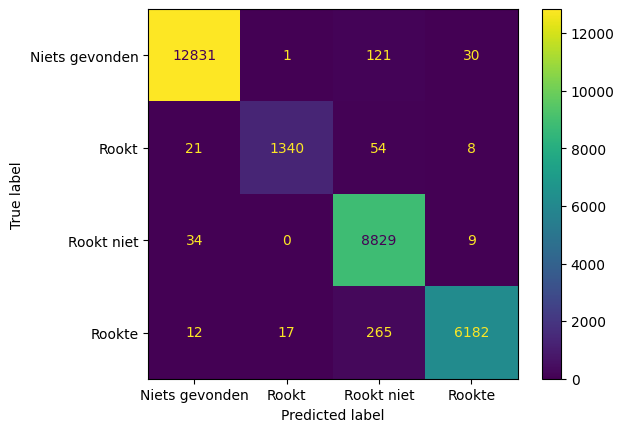

                precision    recall  f1-score   support

Niets gevonden       0.99      0.99      0.99     12983
         Rookt       0.99      0.94      0.96      1423
    Rookt niet       0.95      1.00      0.97      8872
        Rookte       0.99      0.95      0.97      6476

      accuracy                           0.98     29754
     macro avg       0.98      0.97      0.98     29754
  weighted avg       0.98      0.98      0.98     29754



In [11]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.75, NNZs: 710, Bias: 0.000000, T: 71408, Avg. loss: 0.423803
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 175.11, NNZs: 256, Bias: 0.000000, T: 142816, Avg. loss: 0.358927
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 214.02, NNZs: 230, Bias: 0.000000, T: 214224, Avg. loss: 0.339531
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 246.55, NNZs: 205, Bias: 0.000000, T: 285632, Avg. loss: 0.329126
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 274.79, NNZs: 187, Bias: 0.000000, T: 357040, Avg. loss: 0.322413
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 300.08, NNZs: 181, Bias: 0.000000, T: 428448, Avg. loss: 0.317962
Total training time: 2.02 seconds.
-- Epoch 7
Norm: 304.07, NNZs: 181, Bias: 0.000000, T: 499856, Avg. loss: 0.315430
Total training time: 2.35 seconds.
-- Epoch 8
Norm: 308.00, NNZs: 182, Bias: 0.000000, T: 571264, Avg. loss: 0.314675
Total training time: 2.71 seconds.
-- Epoch 9
Norm: 311.87, NNZs: 183, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


Norm: 125.31, NNZs: 630, Bias: 0.000000, T: 71408, Avg. loss: 0.314414
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 171.71, NNZs: 230, Bias: 0.000000, T: 142816, Avg. loss: 0.257751
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 207.21, NNZs: 198, Bias: 0.000000, T: 214224, Avg. loss: 0.244638
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 237.06, NNZs: 171, Bias: 0.000000, T: 285632, Avg. loss: 0.236965
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 263.28, NNZs: 155, Bias: 0.000000, T: 357040, Avg. loss: 0.232045
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 286.85, NNZs: 151, Bias: 0.000000, T: 428448, Avg. loss: 0.228339
Total training time: 2.14 seconds.
-- Epoch 7
Norm: 290.82, NNZs: 150, Bias: 0.000000, T: 499856, Avg. loss: 0.226510
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 294.73, NNZs: 149, Bias: 0.000000, T: 571264, Avg. loss: 0.226143
Total training time: 2.87 seconds.
-- Epoch 9
Norm: 298.59, NNZs: 149, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.3s remaining:    0.0s


Norm: 128.24, NNZs: 626, Bias: 0.000000, T: 71408, Avg. loss: 0.461421
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 183.18, NNZs: 219, Bias: 0.000000, T: 142816, Avg. loss: 0.376811
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 223.97, NNZs: 196, Bias: 0.000000, T: 214224, Avg. loss: 0.350839
Total training time: 0.95 seconds.
-- Epoch 4
Norm: 257.64, NNZs: 181, Bias: 0.000000, T: 285632, Avg. loss: 0.337815
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 286.83, NNZs: 170, Bias: 0.000000, T: 357040, Avg. loss: 0.329731
Total training time: 1.59 seconds.
-- Epoch 6
Norm: 312.95, NNZs: 164, Bias: 0.000000, T: 428448, Avg. loss: 0.324172
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 317.11, NNZs: 161, Bias: 0.000000, T: 499856, Avg. loss: 0.321671
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 321.20, NNZs: 160, Bias: 0.000000, T: 571264, Avg. loss: 0.320707
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 325.24, NNZs: 160, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.175 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.57, NNZs: 721, Bias: 0.000000, T: 71408, Avg. loss: 0.424926
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 175.13, NNZs: 255, Bias: 0.000000, T: 142816, Avg. loss: 0.360194
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 213.92, NNZs: 219, Bias: 0.000000, T: 214224, Avg. loss: 0.340567
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 246.17, NNZs: 199, Bias: 0.000000, T: 285632, Avg. loss: 0.330205
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 274.46, NNZs: 184, Bias: 0.000000, T: 357040, Avg. loss: 0.323686
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 299.75, NNZs: 177, Bias: 0.000000, T: 428448, Avg. loss: 0.319093
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 303.71, NNZs: 173, Bias: 0.000000, T: 499856, Avg. loss: 0.316468
Total training time: 2.35 seconds.
-- Epoch 8
Norm: 307.63, NNZs: 174, Bias: 0.000000, T: 571264, Avg. loss: 0.315815
Total training time: 2.69 seconds.
-- Epoch 9
Norm: 311.48, NNZs: 172, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


Norm: 125.11, NNZs: 635, Bias: 0.000000, T: 71408, Avg. loss: 0.315881
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 171.60, NNZs: 228, Bias: 0.000000, T: 142816, Avg. loss: 0.258870
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 206.98, NNZs: 194, Bias: 0.000000, T: 214224, Avg. loss: 0.245438
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 236.79, NNZs: 172, Bias: 0.000000, T: 285632, Avg. loss: 0.238112
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 262.96, NNZs: 155, Bias: 0.000000, T: 357040, Avg. loss: 0.233231
Total training time: 1.51 seconds.
-- Epoch 6
Norm: 286.43, NNZs: 151, Bias: 0.000000, T: 428448, Avg. loss: 0.229822
Total training time: 1.82 seconds.
-- Epoch 7
Norm: 290.41, NNZs: 151, Bias: 0.000000, T: 499856, Avg. loss: 0.227903
Total training time: 2.11 seconds.
-- Epoch 8
Norm: 294.31, NNZs: 151, Bias: 0.000000, T: 571264, Avg. loss: 0.227529
Total training time: 2.41 seconds.
-- Epoch 9
Norm: 298.16, NNZs: 151, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


Norm: 128.26, NNZs: 655, Bias: 0.000000, T: 71408, Avg. loss: 0.461920
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 183.19, NNZs: 215, Bias: 0.000000, T: 142816, Avg. loss: 0.377320
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 224.00, NNZs: 191, Bias: 0.000000, T: 214224, Avg. loss: 0.351638
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 257.64, NNZs: 173, Bias: 0.000000, T: 285632, Avg. loss: 0.337969
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 286.86, NNZs: 168, Bias: 0.000000, T: 357040, Avg. loss: 0.329834
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 312.95, NNZs: 157, Bias: 0.000000, T: 428448, Avg. loss: 0.324103
Total training time: 1.82 seconds.
-- Epoch 7
Norm: 317.11, NNZs: 159, Bias: 0.000000, T: 499856, Avg. loss: 0.321790
Total training time: 2.14 seconds.
-- Epoch 8
Norm: 321.20, NNZs: 158, Bias: 0.000000, T: 571264, Avg. loss: 0.320879
Total training time: 2.45 seconds.
-- Epoch 9
Norm: 325.23, NNZs: 157, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   25.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.181 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 124.12, NNZs: 742, Bias: 0.000000, T: 71408, Avg. loss: 0.423060
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 175.32, NNZs: 255, Bias: 0.000000, T: 142816, Avg. loss: 0.358101
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 214.34, NNZs: 221, Bias: 0.000000, T: 214224, Avg. loss: 0.338463
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 246.73, NNZs: 197, Bias: 0.000000, T: 285632, Avg. loss: 0.328197
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 275.02, NNZs: 184, Bias: 0.000000, T: 357040, Avg. loss: 0.322034
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 300.23, NNZs: 174, Bias: 0.000000, T: 428448, Avg. loss: 0.317532
Total training time: 1.75 seconds.
-- Epoch 7
Norm: 304.21, NNZs: 173, Bias: 0.000000, T: 499856, Avg. loss: 0.315113
Total training time: 2.04 seconds.
-- Epoch 8
Norm: 308.13, NNZs: 174, Bias: 0.000000, T: 571264, Avg. loss: 0.314418
Total training time: 2.33 seconds.
-- Epoch 9
Norm: 312.00, NNZs: 174, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


Norm: 125.29, NNZs: 651, Bias: 0.000000, T: 71408, Avg. loss: 0.314822
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 171.63, NNZs: 226, Bias: 0.000000, T: 142816, Avg. loss: 0.257656
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 207.17, NNZs: 189, Bias: 0.000000, T: 214224, Avg. loss: 0.244110
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 236.97, NNZs: 173, Bias: 0.000000, T: 285632, Avg. loss: 0.236852
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 263.06, NNZs: 156, Bias: 0.000000, T: 357040, Avg. loss: 0.232016
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 286.67, NNZs: 150, Bias: 0.000000, T: 428448, Avg. loss: 0.228536
Total training time: 1.81 seconds.
-- Epoch 7
Norm: 290.61, NNZs: 149, Bias: 0.000000, T: 499856, Avg. loss: 0.226410
Total training time: 2.11 seconds.
-- Epoch 8
Norm: 294.50, NNZs: 149, Bias: 0.000000, T: 571264, Avg. loss: 0.225925
Total training time: 2.39 seconds.
-- Epoch 9
Norm: 298.33, NNZs: 149, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.1s remaining:    0.0s


Norm: 128.60, NNZs: 701, Bias: 0.000000, T: 71408, Avg. loss: 0.461278
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 183.41, NNZs: 217, Bias: 0.000000, T: 142816, Avg. loss: 0.376916
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 224.23, NNZs: 195, Bias: 0.000000, T: 214224, Avg. loss: 0.351545
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 257.80, NNZs: 178, Bias: 0.000000, T: 285632, Avg. loss: 0.338314
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 286.94, NNZs: 173, Bias: 0.000000, T: 357040, Avg. loss: 0.329975
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 312.98, NNZs: 164, Bias: 0.000000, T: 428448, Avg. loss: 0.324900
Total training time: 1.72 seconds.
-- Epoch 7
Norm: 317.13, NNZs: 162, Bias: 0.000000, T: 499856, Avg. loss: 0.322117
Total training time: 2.00 seconds.
-- Epoch 8
Norm: 321.21, NNZs: 161, Bias: 0.000000, T: 571264, Avg. loss: 0.321349
Total training time: 2.31 seconds.
-- Epoch 9
Norm: 325.23, NNZs: 160, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.177 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.83, NNZs: 700, Bias: 0.000000, T: 71408, Avg. loss: 0.423987
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 175.21, NNZs: 257, Bias: 0.000000, T: 142816, Avg. loss: 0.359732
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 214.01, NNZs: 223, Bias: 0.000000, T: 214224, Avg. loss: 0.339928
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 246.33, NNZs: 199, Bias: 0.000000, T: 285632, Avg. loss: 0.329722
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 274.58, NNZs: 187, Bias: 0.000000, T: 357040, Avg. loss: 0.323578
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 299.81, NNZs: 177, Bias: 0.000000, T: 428448, Avg. loss: 0.318681
Total training time: 1.70 seconds.
-- Epoch 7
Norm: 303.79, NNZs: 175, Bias: 0.000000, T: 499856, Avg. loss: 0.316355
Total training time: 1.99 seconds.
-- Epoch 8
Norm: 307.71, NNZs: 174, Bias: 0.000000, T: 571264, Avg. loss: 0.315636
Total training time: 2.27 seconds.
-- Epoch 9
Norm: 311.58, NNZs: 173, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


Norm: 125.41, NNZs: 647, Bias: 0.000000, T: 71408, Avg. loss: 0.314418
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 172.04, NNZs: 230, Bias: 0.000000, T: 142816, Avg. loss: 0.257861
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 207.41, NNZs: 194, Bias: 0.000000, T: 214224, Avg. loss: 0.244530
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 237.04, NNZs: 174, Bias: 0.000000, T: 285632, Avg. loss: 0.237051
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 263.24, NNZs: 158, Bias: 0.000000, T: 357040, Avg. loss: 0.232584
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 286.73, NNZs: 154, Bias: 0.000000, T: 428448, Avg. loss: 0.229092
Total training time: 1.81 seconds.
-- Epoch 7
Norm: 290.66, NNZs: 152, Bias: 0.000000, T: 499856, Avg. loss: 0.227314
Total training time: 2.09 seconds.
-- Epoch 8
Norm: 294.54, NNZs: 152, Bias: 0.000000, T: 571264, Avg. loss: 0.226824
Total training time: 2.39 seconds.
-- Epoch 9
Norm: 298.36, NNZs: 149, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s


Norm: 128.47, NNZs: 654, Bias: 0.000000, T: 71408, Avg. loss: 0.462369
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 183.49, NNZs: 213, Bias: 0.000000, T: 142816, Avg. loss: 0.377452
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 224.33, NNZs: 191, Bias: 0.000000, T: 214224, Avg. loss: 0.351420
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 257.99, NNZs: 177, Bias: 0.000000, T: 285632, Avg. loss: 0.338107
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 287.20, NNZs: 166, Bias: 0.000000, T: 357040, Avg. loss: 0.330065
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 313.28, NNZs: 159, Bias: 0.000000, T: 428448, Avg. loss: 0.324611
Total training time: 1.82 seconds.
-- Epoch 7
Norm: 317.45, NNZs: 157, Bias: 0.000000, T: 499856, Avg. loss: 0.321893
Total training time: 2.12 seconds.
-- Epoch 8
Norm: 321.55, NNZs: 156, Bias: 0.000000, T: 571264, Avg. loss: 0.320996
Total training time: 2.44 seconds.
-- Epoch 9
Norm: 325.58, NNZs: 156, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.180 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 123.96, NNZs: 709, Bias: 0.000000, T: 71409, Avg. loss: 0.424277
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 175.34, NNZs: 264, Bias: 0.000000, T: 142818, Avg. loss: 0.359935
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 214.22, NNZs: 227, Bias: 0.000000, T: 214227, Avg. loss: 0.339695
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 246.53, NNZs: 208, Bias: 0.000000, T: 285636, Avg. loss: 0.330267
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 274.74, NNZs: 192, Bias: 0.000000, T: 357045, Avg. loss: 0.323896
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 300.00, NNZs: 183, Bias: 0.000000, T: 428454, Avg. loss: 0.319032
Total training time: 1.82 seconds.
-- Epoch 7
Norm: 303.96, NNZs: 179, Bias: 0.000000, T: 499863, Avg. loss: 0.316696
Total training time: 2.13 seconds.
-- Epoch 8
Norm: 307.86, NNZs: 177, Bias: 0.000000, T: 571272, Avg. loss: 0.316057
Total training time: 2.45 seconds.
-- Epoch 9
Norm: 311.72, NNZs: 177, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


Norm: 125.48, NNZs: 695, Bias: 0.000000, T: 71409, Avg. loss: 0.315125
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 171.61, NNZs: 226, Bias: 0.000000, T: 142818, Avg. loss: 0.258693
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 207.17, NNZs: 193, Bias: 0.000000, T: 214227, Avg. loss: 0.245654
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 236.94, NNZs: 169, Bias: 0.000000, T: 285636, Avg. loss: 0.238019
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 263.10, NNZs: 156, Bias: 0.000000, T: 357045, Avg. loss: 0.233417
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 286.71, NNZs: 149, Bias: 0.000000, T: 428454, Avg. loss: 0.229905
Total training time: 1.80 seconds.
-- Epoch 7
Norm: 290.62, NNZs: 148, Bias: 0.000000, T: 499863, Avg. loss: 0.227914
Total training time: 2.10 seconds.
-- Epoch 8
Norm: 294.49, NNZs: 147, Bias: 0.000000, T: 571272, Avg. loss: 0.227482
Total training time: 2.41 seconds.
-- Epoch 9
Norm: 298.32, NNZs: 147, Bias: 0.000000, T: 642681, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s


Norm: 128.26, NNZs: 708, Bias: 0.000000, T: 71409, Avg. loss: 0.462164
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 183.22, NNZs: 221, Bias: 0.000000, T: 142818, Avg. loss: 0.378139
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 223.98, NNZs: 196, Bias: 0.000000, T: 214227, Avg. loss: 0.352445
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 257.66, NNZs: 179, Bias: 0.000000, T: 285636, Avg. loss: 0.339387
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 286.90, NNZs: 174, Bias: 0.000000, T: 357045, Avg. loss: 0.331085
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 312.98, NNZs: 166, Bias: 0.000000, T: 428454, Avg. loss: 0.325612
Total training time: 1.88 seconds.
-- Epoch 7
Norm: 317.13, NNZs: 164, Bias: 0.000000, T: 499863, Avg. loss: 0.323150
Total training time: 2.20 seconds.
-- Epoch 8
Norm: 321.23, NNZs: 162, Bias: 0.000000, T: 571272, Avg. loss: 0.322235
Total training time: 2.53 seconds.
-- Epoch 9
Norm: 325.26, NNZs: 161, Bias: 0.000000, T: 642681, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.175 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 70022592216374.92, NNZs: 517902, Bias: 0.000000, T: 71408, Avg. loss: 40970009930837249753088.000000
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 65298099326539.20, NNZs: 517903, Bias: 0.000000, T: 142816, Avg. loss: 41562666208683651760128.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 62880497700145.58, NNZs: 517903, Bias: 0.000000, T: 214224, Avg. loss: 33587914161903747727360.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 61281880625450.48, NNZs: 517903, Bias: 0.000000, T: 285632, Avg. loss: 29939949558026544873472.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 60101264672426.64, NNZs: 517903, Bias: 0.000000, T: 357040, Avg. loss: 27669226995616755744768.000000
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 59172255006616.09, NNZs: 517903, Bias: 0.000000, T: 428448, Avg. loss: 26108385869675806851072.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 58042696138439.15, NNZs: 517901, Bias: 0.000000, T: 71408, Avg. loss: 27730144909330443403264.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 53797981616133.38, NNZs: 517903, Bias: 0.000000, T: 142816, Avg. loss: 27997481081480520138752.000000
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 51642740976067.06, NNZs: 517903, Bias: 0.000000, T: 214224, Avg. loss: 22260728723809044004864.000000
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 50225078552778.29, NNZs: 517903, Bias: 0.000000, T: 285632, Avg. loss: 19654921100947829555200.000000
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 49181475516962.88, NNZs: 517903, Bias: 0.000000, T: 357040, Avg. loss: 18064475028092392308736.000000
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 48359357589706.02, NNZs: 517903, Bias: 0.000000, T: 428448, Avg. loss: 16957417067363000385536.000000
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.18 seconds
-- Epoch 1
Norm: 49725693045278.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 2
Norm: 45930595010820.69, NNZs: 517903, Bias: 0.000000, T: 142816, Avg. loss: 20064631752146118770688.000000
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 44021209276918.71, NNZs: 517903, Bias: 0.000000, T: 214224, Avg. loss: 15682639503232885325824.000000
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 42764153494823.30, NNZs: 517903, Bias: 0.000000, T: 285632, Avg. loss: 13745854026790186516480.000000
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 41840795444045.86, NNZs: 517903, Bias: 0.000000, T: 357040, Avg. loss: 12577639058264379359232.000000
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 41115971911516.99, NNZs: 517903, Bias: 0.000000, T: 428448, Avg. loss: 11755740068317373661184.000000
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.18 seconds
-- Epoch 1
Norm: 54633447082425.22, NNZs: 517900, Bias: 0.000000, T: 71408, Avg. loss: 24574888153075859587072.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 50647843302898.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.229 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 74924157771906.62, NNZs: 517725, Bias: 0.000000, T: 71408, Avg. loss: 45402118661982862180352.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 70005493961286.37, NNZs: 517725, Bias: 0.000000, T: 142816, Avg. loss: 47849410702328312365056.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 67496110522960.45, NNZs: 517725, Bias: 0.000000, T: 214224, Avg. loss: 38878068575510485532672.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 65836128270959.54, NNZs: 517725, Bias: 0.000000, T: 285632, Avg. loss: 34799473273460645429248.000000
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 64608513030758.96, NNZs: 517725, Bias: 0.000000, T: 357040, Avg. loss: 32269970215689244377088.000000
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 63640687710207.90, NNZs: 517725, Bias: 0.000000, T: 428448, Avg. loss: 30500832257911046537216.000000
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1
Norm: 59849062334874.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 2
Norm: 55585848730955.45, NNZs: 517725, Bias: 0.000000, T: 142816, Avg. loss: 29476129619097119883264.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 53421661714003.55, NNZs: 517725, Bias: 0.000000, T: 214224, Avg. loss: 23534728797203921371136.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 51993979492851.70, NNZs: 517725, Bias: 0.000000, T: 285632, Avg. loss: 20849968588610655485952.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 50941254509725.29, NNZs: 517725, Bias: 0.000000, T: 357040, Avg. loss: 19200096709916789571584.000000
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 50114882775500.52, NNZs: 517725, Bias: 0.000000, T: 428448, Avg. loss: 18051301405563815985152.000000
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1
Norm: 59656863338522.38, NNZs: 517724, Bias: 0.000000, T: 71408, Avg. loss: 29273509466165655633920.000000
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 55269953186285.71, NNZs: 517725, Bias: 0.000000, T: 142816, Avg. loss: 29656893707923574751232.000000
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 53053161043888.48, NNZs: 517725, Bias: 0.000000, T: 214224, Avg. loss: 23505572875187458670592.000000
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 51592906256401.48, NNZs: 517725, Bias: 0.000000, T: 285632, Avg. loss: 20730867062475895865344.000000
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 50515971264031.62, NNZs: 517725, Bias: 0.000000, T: 357040, Avg. loss: 19060942467081430892544.000000
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 49667632350450.47, NNZs: 517725, Bias: 0.000000, T: 428448, Avg. loss: 17881852419983515058176.000000
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1
Norm: 42305166713189.71, NNZs: 517718, Bias: 0.000000, T: 71408, Avg. loss: 17667022847286907502592.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 38898575901238.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.229 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 69657710153574.87, NNZs: 518136, Bias: 0.000000, T: 71408, Avg. loss: 39689939347008995196928.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 64940294562159.49, NNZs: 518138, Bias: 0.000000, T: 142816, Avg. loss: 41153434843551333613568.000000
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 62530038997680.84, NNZs: 518138, Bias: 0.000000, T: 214224, Avg. loss: 33240271549951981387776.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 60941682551249.48, NNZs: 518138, Bias: 0.000000, T: 285632, Avg. loss: 29644382319573024636928.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 59765676134309.79, NNZs: 518138, Bias: 0.000000, T: 357040, Avg. loss: 27419036433550663483392.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 58840770727087.49, NNZs: 518138, Bias: 0.000000, T: 428448, Avg. loss: 25870838369570518990848.000000
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 72358160983943.84, NNZs: 518137, Bias: 0.000000, T: 71408, Avg. loss: 40031501423624274837504.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 67540713168804.97, NNZs: 518138, Bias: 0.000000, T: 142816, Avg. loss: 44476661923763059687424.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 65075052575221.49, NNZs: 518138, Bias: 0.000000, T: 214224, Avg. loss: 36142340950987362009088.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 63442705030984.11, NNZs: 518138, Bias: 0.000000, T: 285632, Avg. loss: 32325082830835397165056.000000
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 62234593171901.12, NNZs: 518138, Bias: 0.000000, T: 357040, Avg. loss: 29962150144521359327232.000000
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 61282931395624.12, NNZs: 518138, Bias: 0.000000, T: 428448, Avg. loss: 28297441946449362288640.000000
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 63805207214686.93, NNZs: 518137, Bias: 0.000000, T: 71408, Avg. loss: 32843559914061911031808.000000
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 59425368871540.80, NNZs: 518138, Bias: 0.000000, T: 142816, Avg. loss: 33980849859032118198272.000000
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 57187006211251.81, NNZs: 518138, Bias: 0.000000, T: 214224, Avg. loss: 27387563785529585565696.000000
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 55709595897118.76, NNZs: 518138, Bias: 0.000000, T: 285632, Avg. loss: 24352204216982449422336.000000
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 54621345256002.42, NNZs: 518138, Bias: 0.000000, T: 357040, Avg. loss: 22502578698347119378432.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 53765339223182.50, NNZs: 518138, Bias: 0.000000, T: 428448, Avg. loss: 21201716477522276777984.000000
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1
Norm: 73948289369927.70, NNZs: 5

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.229 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 79184557770012.06, NNZs: 518090, Bias: 0.000000, T: 71408, Avg. loss: 50288463832850710396928.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 74132786629667.34, NNZs: 518091, Bias: 0.000000, T: 142816, Avg. loss: 53792119312059232944128.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 71533587581649.42, NNZs: 518091, Bias: 0.000000, T: 214224, Avg. loss: 44054676773074613829632.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 69818978010279.87, NNZs: 518091, Bias: 0.000000, T: 285632, Avg. loss: 39522522379935876644864.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 68547439414263.59, NNZs: 518091, Bias: 0.000000, T: 357040, Avg. loss: 36758799296254527406080.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 67545622673325.20, NNZs: 518091, Bias: 0.000000, T: 428448, Avg. loss: 34817882073140750712832.000000
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 55201807706642.80, NNZs: 518088, Bias: 0.000000, T: 71408, Avg. loss: 28172444046468866637824.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 51124839338993.38, NNZs: 518091, Bias: 0.000000, T: 142816, Avg. loss: 25238956141561591627776.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 49061926425364.57, NNZs: 518091, Bias: 0.000000, T: 214224, Avg. loss: 19903021754179293020160.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 47704125555235.70, NNZs: 518091, Bias: 0.000000, T: 285632, Avg. loss: 17529657352013364592640.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 46707199974777.38, NNZs: 518091, Bias: 0.000000, T: 357040, Avg. loss: 16073878411325476962304.000000
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 45924114353669.88, NNZs: 518091, Bias: 0.000000, T: 428448, Avg. loss: 15056843449909337128960.000000
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1
Norm: 66605660527602.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 62028868629796.58, NNZs: 518091, Bias: 0.000000, T: 142816, Avg. loss: 36965888769953804320768.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 59694346736923.73, NNZs: 518091, Bias: 0.000000, T: 214224, Avg. loss: 29755610443166280318976.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 58150443075762.44, NNZs: 518091, Bias: 0.000000, T: 285632, Avg. loss: 26477121500887778328576.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 57013890110029.95, NNZs: 518091, Bias: 0.000000, T: 357040, Avg. loss: 24450939406332194717696.000000
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 56117698095804.73, NNZs: 518091, Bias: 0.000000, T: 428448, Avg. loss: 23043768260661356789760.000000
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 79316243618947.27, NNZs: 518091, Bias: 0.000000, T: 71408, Avg. loss: 46809531578260169687040.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 74250327046489.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.232 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 53717064505537.45, NNZs: 516756, Bias: 0.000000, T: 71409, Avg. loss: 24156107847190282502144.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 49693051284950.04, NNZs: 516758, Bias: 0.000000, T: 142818, Avg. loss: 23602836300754690506752.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 47646550114372.63, NNZs: 516758, Bias: 0.000000, T: 214227, Avg. loss: 18615064954606192689152.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 46303988826965.23, NNZs: 516758, Bias: 0.000000, T: 285636, Avg. loss: 16378806002308414963712.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 45322645609764.70, NNZs: 516758, Bias: 0.000000, T: 357045, Avg. loss: 15004506027911838433280.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 44550688649714.99, NNZs: 516758, Bias: 0.000000, T: 428454, Avg. loss: 14061398983773379362816.000000
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 69358280518306.94, NNZs: 516758, Bias: 0.000000, T: 71409, Avg. loss: 38591714291567407661056.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 64670996925960.67, NNZs: 516758, Bias: 0.000000, T: 142818, Avg. loss: 40834193737742230224896.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 62282319716970.27, NNZs: 516758, Bias: 0.000000, T: 214227, Avg. loss: 33089741775473559470080.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 60698212323030.96, NNZs: 516758, Bias: 0.000000, T: 285636, Avg. loss: 29542963601644072206336.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 59532396068173.79, NNZs: 516758, Bias: 0.000000, T: 357045, Avg. loss: 27349956354528923090944.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 58613333221833.43, NNZs: 516758, Bias: 0.000000, T: 428454, Avg. loss: 25819881347202649423872.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 80155315350797.28, NNZs: 516758, Bias: 0.000000, T: 71409, Avg. loss: 50636782140484604657664.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 75055517918111.58, NNZs: 516758, Bias: 0.000000, T: 142818, Avg. loss: 55246614363995239350272.000000
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 72433486050969.97, NNZs: 516758, Bias: 0.000000, T: 214227, Avg. loss: 45314350937145604046848.000000
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 70696776086029.02, NNZs: 516758, Bias: 0.000000, T: 285636, Avg. loss: 40706407428636748546048.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 69410288228449.59, NNZs: 516758, Bias: 0.000000, T: 357045, Avg. loss: 37825302857007983755264.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 68398445492488.55, NNZs: 516758, Bias: 0.000000, T: 428454, Avg. loss: 35810333885776615440384.000000
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1
Norm: 53846571587728.39, NNZs: 5

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.225 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 249.35, NNZs: 1855, Bias: 0.000000, T: 71408, Avg. loss: 0.291030
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 338.27, NNZs: 611, Bias: 0.000000, T: 142816, Avg. loss: 0.241936
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 405.84, NNZs: 570, Bias: 0.000000, T: 214224, Avg. loss: 0.234646
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 462.60, NNZs: 529, Bias: 0.000000, T: 285632, Avg. loss: 0.230748
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 512.65, NNZs: 512, Bias: 0.000000, T: 357040, Avg. loss: 0.228598
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 557.88, NNZs: 496, Bias: 0.000000, T: 428448, Avg. loss: 0.227506
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 206.54, NNZs: 1306, Bias: 0.000000, T: 71408, Avg. loss: 0.200833
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 280.12, NNZs: 469, Bias: 0.000000, T: 142816, Avg. loss: 0.165964
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 336.52, NNZs: 438, Bias: 0.000000, T: 214224, Avg. loss: 0.161841
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 383.85, NNZs: 422, Bias: 0.000000, T: 285632, Avg. loss: 0.159235
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 425.77, NNZs: 416, Bias: 0.000000, T: 357040, Avg. loss: 0.158511
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 463.70, NNZs: 398, Bias: 0.000000, T: 428448, Avg. loss: 0.157855
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 257.52, NNZs: 1974, Bias: 0.000000, T: 71408, Avg. loss: 0.308822
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 345.64, NNZs: 558, Bias: 0.000000, T: 142816, Avg. loss: 0.240433
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 412.70, NNZs: 506, Bias: 0.000000, T: 214224, Avg. loss: 0.231360
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 469.08, NNZs: 505, Bias: 0.000000, T: 285632, Avg. loss: 0.227702
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 518.90, NNZs: 492, Bias: 0.000000, T: 357040, Avg. loss: 0.225652
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 564.01, NNZs: 471, Bias: 0.000000, T: 428448, Avg. loss: 0.223963
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.14 seconds
-- Epoch 1
Norm: 219.32, NNZs: 1706, Bias: 0.000000, T: 71408, Avg. loss: 0.189481
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 286.27, NNZs: 497, Bias: 0.000000, T: 142816, Avg. loss: 0.126378
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 336.4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.930 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 249.46, NNZs: 1867, Bias: 0.000000, T: 71408, Avg. loss: 0.290357
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 338.43, NNZs: 642, Bias: 0.000000, T: 142816, Avg. loss: 0.242521
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 406.07, NNZs: 597, Bias: 0.000000, T: 214224, Avg. loss: 0.235593
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 462.98, NNZs: 556, Bias: 0.000000, T: 285632, Avg. loss: 0.231531
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 513.05, NNZs: 538, Bias: 0.000000, T: 357040, Avg. loss: 0.229778
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 558.48, NNZs: 524, Bias: 0.000000, T: 428448, Avg. loss: 0.228430
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 207.01, NNZs: 1388, Bias: 0.000000, T: 71408, Avg. loss: 0.200656
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 280.64, NNZs: 501, Bias: 0.000000, T: 142816, Avg. loss: 0.165965
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 337.13, NNZs: 440, Bias: 0.000000, T: 214224, Avg. loss: 0.162601
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 384.65, NNZs: 428, Bias: 0.000000, T: 285632, Avg. loss: 0.159877
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 426.63, NNZs: 419, Bias: 0.000000, T: 357040, Avg. loss: 0.159002
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 464.61, NNZs: 416, Bias: 0.000000, T: 428448, Avg. loss: 0.158141
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 257.45, NNZs: 1950, Bias: 0.000000, T: 71408, Avg. loss: 0.307483
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 345.51, NNZs: 580, Bias: 0.000000, T: 142816, Avg. loss: 0.238684
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 412.51, NNZs: 529, Bias: 0.000000, T: 214224, Avg. loss: 0.230152
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 469.01, NNZs: 501, Bias: 0.000000, T: 285632, Avg. loss: 0.226734
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 518.81, NNZs: 498, Bias: 0.000000, T: 357040, Avg. loss: 0.224636
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 563.94, NNZs: 494, Bias: 0.000000, T: 428448, Avg. loss: 0.223298
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1
Norm: 219.43, NNZs: 1764, Bias: 0.000000, T: 71408, Avg. loss: 0.189268
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 286.83, NNZs: 509, Bias: 0.000000, T: 142816, Avg. loss: 0.126964
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 337.0

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.908 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 248.42, NNZs: 1786, Bias: 0.000000, T: 71408, Avg. loss: 0.288533
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 337.19, NNZs: 624, Bias: 0.000000, T: 142816, Avg. loss: 0.241288
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 404.50, NNZs: 572, Bias: 0.000000, T: 214224, Avg. loss: 0.233111
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 461.13, NNZs: 538, Bias: 0.000000, T: 285632, Avg. loss: 0.229184
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 511.05, NNZs: 527, Bias: 0.000000, T: 357040, Avg. loss: 0.228239
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 556.19, NNZs: 523, Bias: 0.000000, T: 428448, Avg. loss: 0.226184
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 206.03, NNZs: 1426, Bias: 0.000000, T: 71408, Avg. loss: 0.199368
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 279.61, NNZs: 465, Bias: 0.000000, T: 142816, Avg. loss: 0.165179
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 335.95, NNZs: 436, Bias: 0.000000, T: 214224, Avg. loss: 0.161775
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 383.37, NNZs: 426, Bias: 0.000000, T: 285632, Avg. loss: 0.159205
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 425.19, NNZs: 409, Bias: 0.000000, T: 357040, Avg. loss: 0.157472
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 463.18, NNZs: 415, Bias: 0.000000, T: 428448, Avg. loss: 0.157615
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 256.91, NNZs: 1864, Bias: 0.000000, T: 71408, Avg. loss: 0.308447
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 344.66, NNZs: 559, Bias: 0.000000, T: 142816, Avg. loss: 0.238578
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 411.49, NNZs: 516, Bias: 0.000000, T: 214224, Avg. loss: 0.230229
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 467.70, NNZs: 480, Bias: 0.000000, T: 285632, Avg. loss: 0.225618
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 517.37, NNZs: 471, Bias: 0.000000, T: 357040, Avg. loss: 0.224301
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 562.33, NNZs: 475, Bias: 0.000000, T: 428448, Avg. loss: 0.223684
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 219.35, NNZs: 1642, Bias: 0.000000, T: 71408, Avg. loss: 0.188834
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 286.28, NNZs: 499, Bias: 0.000000, T: 142816, Avg. loss: 0.125570
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 336.5

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.914 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 249.27, NNZs: 1833, Bias: 0.000000, T: 71408, Avg. loss: 0.290667
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 338.33, NNZs: 656, Bias: 0.000000, T: 142816, Avg. loss: 0.242440
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 405.71, NNZs: 592, Bias: 0.000000, T: 214224, Avg. loss: 0.233498
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 462.50, NNZs: 558, Bias: 0.000000, T: 285632, Avg. loss: 0.230548
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 512.58, NNZs: 543, Bias: 0.000000, T: 357040, Avg. loss: 0.228752
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 557.90, NNZs: 532, Bias: 0.000000, T: 428448, Avg. loss: 0.227900
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 206.06, NNZs: 1379, Bias: 0.000000, T: 71408, Avg. loss: 0.198883
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 279.68, NNZs: 471, Bias: 0.000000, T: 142816, Avg. loss: 0.165427
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 335.80, NNZs: 443, Bias: 0.000000, T: 214224, Avg. loss: 0.161294
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 383.34, NNZs: 421, Bias: 0.000000, T: 285632, Avg. loss: 0.159066
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 425.11, NNZs: 420, Bias: 0.000000, T: 357040, Avg. loss: 0.157926
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 463.05, NNZs: 409, Bias: 0.000000, T: 428448, Avg. loss: 0.157716
Total training time: 1.37 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 257.31, NNZs: 1966, Bias: 0.000000, T: 71408, Avg. loss: 0.308351
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 345.29, NNZs: 577, Bias: 0.000000, T: 142816, Avg. loss: 0.238732
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 411.97, NNZs: 534, Bias: 0.000000, T: 214224, Avg. loss: 0.229200
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 468.25, NNZs: 520, Bias: 0.000000, T: 285632, Avg. loss: 0.225808
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 517.81, NNZs: 496, Bias: 0.000000, T: 357040, Avg. loss: 0.223451
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 562.83, NNZs: 492, Bias: 0.000000, T: 428448, Avg. loss: 0.222982
Total training time: 1.41 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1
Norm: 219.47, NNZs: 1644, Bias: 0.000000, T: 71408, Avg. loss: 0.189156
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 286.47, NNZs: 507, Bias: 0.000000, T: 142816, Avg. loss: 0.126003
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 336.5

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.7s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.908 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 249.68, NNZs: 1864, Bias: 0.000000, T: 71409, Avg. loss: 0.292251
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 338.93, NNZs: 644, Bias: 0.000000, T: 142818, Avg. loss: 0.244768
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 406.86, NNZs: 581, Bias: 0.000000, T: 214227, Avg. loss: 0.236784
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 463.92, NNZs: 552, Bias: 0.000000, T: 285636, Avg. loss: 0.233668
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 514.22, NNZs: 534, Bias: 0.000000, T: 357045, Avg. loss: 0.231421
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 559.71, NNZs: 531, Bias: 0.000000, T: 428454, Avg. loss: 0.229861
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 206.86, NNZs: 1431, Bias: 0.000000, T: 71409, Avg. loss: 0.201489
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 280.65, NNZs: 469, Bias: 0.000000, T: 142818, Avg. loss: 0.166179
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 336.91, NNZs: 441, Bias: 0.000000, T: 214227, Avg. loss: 0.161182
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 384.43, NNZs: 429, Bias: 0.000000, T: 285636, Avg. loss: 0.159917
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 426.23, NNZs: 410, Bias: 0.000000, T: 357045, Avg. loss: 0.157804
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 464.27, NNZs: 414, Bias: 0.000000, T: 428454, Avg. loss: 0.157953
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 258.03, NNZs: 1927, Bias: 0.000000, T: 71409, Avg. loss: 0.311479
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 346.52, NNZs: 558, Bias: 0.000000, T: 142818, Avg. loss: 0.241577
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 413.69, NNZs: 537, Bias: 0.000000, T: 214227, Avg. loss: 0.233207
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 470.32, NNZs: 518, Bias: 0.000000, T: 285636, Avg. loss: 0.229425
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 520.35, NNZs: 496, Bias: 0.000000, T: 357045, Avg. loss: 0.227777
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 565.64, NNZs: 492, Bias: 0.000000, T: 428454, Avg. loss: 0.226033
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1
Norm: 219.74, NNZs: 1800, Bias: 0.000000, T: 71409, Avg. loss: 0.190134
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 286.92, NNZs: 507, Bias: 0.000000, T: 142818, Avg. loss: 0.127344
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 337.2

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.906 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 66.94, NNZs: 544, Bias: 0.000000, T: 71408, Avg. loss: 0.240140
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 91.02, NNZs: 395, Bias: 0.000000, T: 142816, Avg. loss: 0.213207
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 109.31, NNZs: 356, Bias: 0.000000, T: 214224, Avg. loss: 0.208689
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 124.78, NNZs: 338, Bias: 0.000000, T: 285632, Avg. loss: 0.207333
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 138.33, NNZs: 322, Bias: 0.000000, T: 357040, Avg. loss: 0.206592
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 150.69, NNZs: 326, Bias: 0.000000, T: 428448, Avg. loss: 0.206250
Total training time: 1.39 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 118.61, NNZs: 701, Bias: 0.000000, T: 71408, Avg. loss: 0.163447
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 159.57, NNZs: 524, Bias: 0.000000, T: 142816, Avg. loss: 0.138264
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 191.15, NNZs: 475, Bias: 0.000000, T: 214224, Avg. loss: 0.135967
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 217.90, NNZs: 471, Bias: 0.000000, T: 285632, Avg. loss: 0.135967
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 241.68, NNZs: 456, Bias: 0.000000, T: 357040, Avg. loss: 0.135294
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 262.82, NNZs: 450, Bias: 0.000000, T: 428448, Avg. loss: 0.134962
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 84.14, NNZs: 599, Bias: 0.000000, T: 71408, Avg. loss: 0.240892
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 114.04, NNZs: 448, Bias: 0.000000, T: 142816, Avg. loss: 0.201768
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 136.83, NNZs: 425, Bias: 0.000000, T: 214224, Avg. loss: 0.195076
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 156.04, NNZs: 391, Bias: 0.000000, T: 285632, Avg. loss: 0.191972
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 172.95, NNZs: 383, Bias: 0.000000, T: 357040, Avg. loss: 0.190677
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 188.22, NNZs: 379, Bias: 0.000000, T: 428448, Avg. loss: 0.189821
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1
Norm: 84.49, NNZs: 666, Bias: 0.000000, T: 71408, Avg. loss: 0.179417
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 112.25, NNZs: 498, Bias: 0.000000, T: 142816, Avg. loss: 0.149679
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 133.75, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.053 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 66.85, NNZs: 528, Bias: 0.000000, T: 71408, Avg. loss: 0.241166
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 90.79, NNZs: 385, Bias: 0.000000, T: 142816, Avg. loss: 0.213739
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 109.07, NNZs: 355, Bias: 0.000000, T: 214224, Avg. loss: 0.209446
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 124.53, NNZs: 328, Bias: 0.000000, T: 285632, Avg. loss: 0.207699
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 138.20, NNZs: 323, Bias: 0.000000, T: 357040, Avg. loss: 0.206863
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 150.65, NNZs: 312, Bias: 0.000000, T: 428448, Avg. loss: 0.205811
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1
Norm: 118.68, NNZs: 699, Bias: 0.000000, T: 71408, Avg. loss: 0.161195
Total training time: 0.19 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 2
Norm: 159.51, NNZs: 507, Bias: 0.000000, T: 142816, Avg. loss: 0.136765
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 191.18, NNZs: 479, Bias: 0.000000, T: 214224, Avg. loss: 0.135283
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 218.05, NNZs: 453, Bias: 0.000000, T: 285632, Avg. loss: 0.135178
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 241.92, NNZs: 449, Bias: 0.000000, T: 357040, Avg. loss: 0.134463
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 263.42, NNZs: 445, Bias: 0.000000, T: 428448, Avg. loss: 0.134882
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 83.90, NNZs: 622, Bias: 0.000000, T: 71408, Avg. loss: 0.241489
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 114.09, NNZs: 457, Bias: 0.000000, T: 142816, Avg. loss: 0.201482
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 136.75, NNZs: 415, Bias: 0.000000, T: 214224, Avg. loss: 0.195392
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 155.84, NNZs: 385, Bias: 0.000000, T: 285632, Avg. loss: 0.192112
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 172.77, NNZs: 380, Bias: 0.000000, T: 357040, Avg. loss: 0.190618
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 187.98, NNZs: 368, Bias: 0.000000, T: 428448, Avg. loss: 0.189834
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1
Norm: 84.65, NNZs: 653, Bias: 0.000000, T: 71408, Avg. loss: 0.178591
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 112.14, NNZs: 496, Bias: 0.000000, T: 142816, Avg. loss: 0.149669
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 133.09, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.052 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.08, NNZs: 524, Bias: 0.000000, T: 71408, Avg. loss: 0.239543
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 90.90, NNZs: 404, Bias: 0.000000, T: 142816, Avg. loss: 0.212083
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 109.22, NNZs: 355, Bias: 0.000000, T: 214224, Avg. loss: 0.208167
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 124.57, NNZs: 337, Bias: 0.000000, T: 285632, Avg. loss: 0.206217
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 138.20, NNZs: 327, Bias: 0.000000, T: 357040, Avg. loss: 0.205508
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 150.60, NNZs: 314, Bias: 0.000000, T: 428448, Avg. loss: 0.205002
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 118.97, NNZs: 648, Bias: 0.000000, T: 71408, Avg. loss: 0.161719
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 159.54, NNZs: 518, Bias: 0.000000, T: 142816, Avg. loss: 0.138269
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 191.02, NNZs: 488, Bias: 0.000000, T: 214224, Avg. loss: 0.135766
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 217.94, NNZs: 468, Bias: 0.000000, T: 285632, Avg. loss: 0.135240
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 241.50, NNZs: 462, Bias: 0.000000, T: 357040, Avg. loss: 0.135071
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 263.10, NNZs: 443, Bias: 0.000000, T: 428448, Avg. loss: 0.134687
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 83.94, NNZs: 593, Bias: 0.000000, T: 71408, Avg. loss: 0.240080
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 113.83, NNZs: 443, Bias: 0.000000, T: 142816, Avg. loss: 0.200210
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 136.54, NNZs: 415, Bias: 0.000000, T: 214224, Avg. loss: 0.193762
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 155.75, NNZs: 391, Bias: 0.000000, T: 285632, Avg. loss: 0.190199
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 172.63, NNZs: 382, Bias: 0.000000, T: 357040, Avg. loss: 0.188726
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 187.88, NNZs: 372, Bias: 0.000000, T: 428448, Avg. loss: 0.187913
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1
Norm: 84.35, NNZs: 661, Bias: 0.000000, T: 71408, Avg. loss: 0.178868
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 112.37, NNZs: 493, Bias: 0.000000, T: 142816, Avg. loss: 0.148557
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 133.35, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.061 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 66.96, NNZs: 538, Bias: 0.000000, T: 71408, Avg. loss: 0.240203
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 91.05, NNZs: 397, Bias: 0.000000, T: 142816, Avg. loss: 0.213259
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 109.27, NNZs: 364, Bias: 0.000000, T: 214224, Avg. loss: 0.208499
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 124.59, NNZs: 341, Bias: 0.000000, T: 285632, Avg. loss: 0.206724
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 138.20, NNZs: 328, Bias: 0.000000, T: 357040, Avg. loss: 0.206012
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 150.68, NNZs: 325, Bias: 0.000000, T: 428448, Avg. loss: 0.206011
Total training time: 1.34 seconds.
Convergence after 6 epochs took 1.36 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 118.19, NNZs: 686, Bias: 0.000000, T: 71408, Avg. loss: 0.162575
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 159.15, NNZs: 526, Bias: 0.000000, T: 142816, Avg. loss: 0.137981
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 190.62, NNZs: 488, Bias: 0.000000, T: 214224, Avg. loss: 0.135516
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 217.39, NNZs: 473, Bias: 0.000000, T: 285632, Avg. loss: 0.135135
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 240.62, NNZs: 462, Bias: 0.000000, T: 357040, Avg. loss: 0.134420
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 262.24, NNZs: 457, Bias: 0.000000, T: 428448, Avg. loss: 0.134675
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 83.96, NNZs: 606, Bias: 0.000000, T: 71408, Avg. loss: 0.241376
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 114.06, NNZs: 459, Bias: 0.000000, T: 142816, Avg. loss: 0.201407
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 136.65, NNZs: 410, Bias: 0.000000, T: 214224, Avg. loss: 0.194586
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 155.57, NNZs: 389, Bias: 0.000000, T: 285632, Avg. loss: 0.191813
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 172.43, NNZs: 381, Bias: 0.000000, T: 357040, Avg. loss: 0.190678
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 187.63, NNZs: 370, Bias: 0.000000, T: 428448, Avg. loss: 0.189676
Total training time: 1.39 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1
Norm: 84.91, NNZs: 655, Bias: 0.000000, T: 71408, Avg. loss: 0.179433
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 112.60, NNZs: 500, Bias: 0.000000, T: 142816, Avg. loss: 0.149344
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 133.40, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.056 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.02, NNZs: 539, Bias: 0.000000, T: 71409, Avg. loss: 0.240201
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 90.97, NNZs: 392, Bias: 0.000000, T: 142818, Avg. loss: 0.213155
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 109.27, NNZs: 350, Bias: 0.000000, T: 214227, Avg. loss: 0.209083
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 124.63, NNZs: 330, Bias: 0.000000, T: 285636, Avg. loss: 0.207341
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 138.38, NNZs: 330, Bias: 0.000000, T: 357045, Avg. loss: 0.206696
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 150.73, NNZs: 323, Bias: 0.000000, T: 428454, Avg. loss: 0.206203
Total training time: 1.39 seconds.
Convergence after 6 epochs took 1.42 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 118.32, NNZs: 732, Bias: 0.000000, T: 71409, Avg. loss: 0.162345
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 159.16, NNZs: 554, Bias: 0.000000, T: 142818, Avg. loss: 0.138280
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 190.49, NNZs: 501, Bias: 0.000000, T: 214227, Avg. loss: 0.135458
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 217.19, NNZs: 480, Bias: 0.000000, T: 285636, Avg. loss: 0.134117
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 240.87, NNZs: 463, Bias: 0.000000, T: 357045, Avg. loss: 0.134603
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 262.24, NNZs: 459, Bias: 0.000000, T: 428454, Avg. loss: 0.134334
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 84.21, NNZs: 601, Bias: 0.000000, T: 71409, Avg. loss: 0.240421
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 114.09, NNZs: 473, Bias: 0.000000, T: 142818, Avg. loss: 0.201315
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 136.73, NNZs: 423, Bias: 0.000000, T: 214227, Avg. loss: 0.194758
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 155.86, NNZs: 403, Bias: 0.000000, T: 285636, Avg. loss: 0.191948
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 172.66, NNZs: 393, Bias: 0.000000, T: 357045, Avg. loss: 0.190138
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 187.96, NNZs: 388, Bias: 0.000000, T: 428454, Avg. loss: 0.188954
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1
Norm: 84.63, NNZs: 661, Bias: 0.000000, T: 71409, Avg. loss: 0.179837
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 112.17, NNZs: 499, Bias: 0.000000, T: 142818, Avg. loss: 0.149994
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 133.55, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.054 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.79, NNZs: 995585, Bias: -0.055350, T: 71408, Avg. loss: 0.199918
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 3.66, NNZs: 995585, Bias: -0.081386, T: 142816, Avg. loss: 0.186090
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 4.25, NNZs: 995585, Bias: -0.096968, T: 214224, Avg. loss: 0.179906
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 4.73, NNZs: 995585, Bias: -0.107778, T: 285632, Avg. loss: 0.175543
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 5.13, NNZs: 995585, Bias: -0.115802, T: 357040, Avg. loss: 0.172082
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 5.49, NNZs: 995585, Bias: -0.121900, T: 428448, Avg. loss: 0.169201
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 2.91, NNZs: 995585, Bias: -0.657010, T: 71408, Avg. loss: 0.096545
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 3.06, NNZs: 995585, Bias: -0.789359, T: 142816, Avg. loss: 0.033174
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 995585, Bias: -0.828393, T: 214224, Avg. loss: 0.026174
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 2.89, NNZs: 995585, Bias: -0.846738, T: 285632, Avg. loss: 0.024653
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 2.81, NNZs: 995585, Bias: -0.857827, T: 357040, Avg. loss: 0.023982
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 2.75, NNZs: 995585, Bias: -0.865559, T: 428448, Avg. loss: 0.023592
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1
Norm: 2.14, NNZs: 995585, Bias: -0.321888, T: 71408, Avg. loss: 0.188237
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 2
Norm: 2.64, NNZs: 995585, Bias: -0.439814, T: 142816, Avg. loss: 0.166227
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 995585, Bias: -0.526085, T: 214224, Avg. loss: 0.154826
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 3.24, NNZs: 995585, Bias: -0.594002, T: 285632, Avg. loss: 0.146506
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 3.43, NNZs: 995585, Bias: -0.646658, T: 357040, Avg. loss: 0.140583
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 3.58, NNZs: 995585, Bias: -0.686114, T: 428448, Avg. loss: 0.136642
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 2.62, NNZs: 995585, Bias: -0.428687, T: 71408, Avg. loss: 0.163351
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.60, NNZs: 995585, Bias: -0.604807, T: 142816, Avg. loss: 0.118134
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 4.19, NNZs: 995585, Bias: -0.704420, T: 214224, Avg. loss: 0.095039
Total training time: 0.46 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.323 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.83, NNZs: 995981, Bias: -0.082956, T: 71408, Avg. loss: 0.197965
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.67, NNZs: 995981, Bias: -0.107078, T: 142816, Avg. loss: 0.184830
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 4.26, NNZs: 995981, Bias: -0.121384, T: 214224, Avg. loss: 0.178896
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 4.73, NNZs: 995981, Bias: -0.131202, T: 285632, Avg. loss: 0.174655
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 5.13, NNZs: 995981, Bias: -0.138310, T: 357040, Avg. loss: 0.171297
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 5.48, NNZs: 995981, Bias: -0.143528, T: 428448, Avg. loss: 0.168518
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 2.91, NNZs: 995981, Bias: -0.651178, T: 71408, Avg. loss: 0.097659
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 3.06, NNZs: 995981, Bias: -0.787131, T: 142816, Avg. loss: 0.033736
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 995981, Bias: -0.827448, T: 214224, Avg. loss: 0.026320
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 2.89, NNZs: 995981, Bias: -0.846316, T: 285632, Avg. loss: 0.024730
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 2.81, NNZs: 995981, Bias: -0.857667, T: 357040, Avg. loss: 0.024034
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 2.75, NNZs: 995981, Bias: -0.865552, T: 428448, Avg. loss: 0.023631
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 2.15, NNZs: 995981, Bias: -0.302430, T: 71408, Avg. loss: 0.189763
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.64, NNZs: 995981, Bias: -0.419592, T: 142816, Avg. loss: 0.168026
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 2.97, NNZs: 995981, Bias: -0.505793, T: 214224, Avg. loss: 0.156691
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 3.23, NNZs: 995981, Bias: -0.574762, T: 285632, Avg. loss: 0.148243
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 3.43, NNZs: 995981, Bias: -0.629776, T: 357040, Avg. loss: 0.141979
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 3.59, NNZs: 995981, Bias: -0.672387, T: 428448, Avg. loss: 0.137595
Total training time: 0.95 seconds.
Convergence after 6 epochs took 0.98 seconds
-- Epoch 1
Norm: 2.65, NNZs: 995981, Bias: -0.419919, T: 71408, Avg. loss: 0.163867
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.65, NNZs: 995981, Bias: -0.596123, T: 142816, Avg. loss: 0.118660
Total training time: 0.27 second

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.340 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.81, NNZs: 996774, Bias: -0.083165, T: 71408, Avg. loss: 0.198200
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.68, NNZs: 996774, Bias: -0.107934, T: 142816, Avg. loss: 0.184828
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 4.27, NNZs: 996774, Bias: -0.122350, T: 214224, Avg. loss: 0.178808
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 4.73, NNZs: 996774, Bias: -0.132043, T: 285632, Avg. loss: 0.174598
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 5.13, NNZs: 996774, Bias: -0.139004, T: 357040, Avg. loss: 0.171278
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 5.48, NNZs: 996774, Bias: -0.144087, T: 428448, Avg. loss: 0.168525
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 2.91, NNZs: 996774, Bias: -0.651804, T: 71408, Avg. loss: 0.097625
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.06, NNZs: 996774, Bias: -0.787239, T: 142816, Avg. loss: 0.033659
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 996774, Bias: -0.827393, T: 214224, Avg. loss: 0.026310
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 2.89, NNZs: 996774, Bias: -0.846216, T: 285632, Avg. loss: 0.024724
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 2.81, NNZs: 996774, Bias: -0.857559, T: 357040, Avg. loss: 0.024028
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 2.75, NNZs: 996774, Bias: -0.865446, T: 428448, Avg. loss: 0.023626
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 2.13, NNZs: 996774, Bias: -0.302429, T: 71408, Avg. loss: 0.190163
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 2.64, NNZs: 996774, Bias: -0.420535, T: 142816, Avg. loss: 0.168020
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 996774, Bias: -0.507332, T: 214224, Avg. loss: 0.156526
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 3.25, NNZs: 996774, Bias: -0.576654, T: 285632, Avg. loss: 0.147959
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 3.46, NNZs: 996774, Bias: -0.631640, T: 357040, Avg. loss: 0.141643
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 3.61, NNZs: 996774, Bias: -0.674011, T: 428448, Avg. loss: 0.137265
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 2.62, NNZs: 996774, Bias: -0.421248, T: 71408, Avg. loss: 0.163961
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.61, NNZs: 996774, Bias: -0.597173, T: 142816, Avg. loss: 0.118856
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 4.21, NNZs: 996774, Bias: -0.698721, T: 214224, Avg. loss: 0.095467
Total training time: 0.43 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.341 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.81, NNZs: 995077, Bias: -0.081050, T: 71408, Avg. loss: 0.198432
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.67, NNZs: 995077, Bias: -0.106002, T: 142816, Avg. loss: 0.185140
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 4.26, NNZs: 995077, Bias: -0.120716, T: 214224, Avg. loss: 0.179138
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 4.73, NNZs: 995077, Bias: -0.130734, T: 285632, Avg. loss: 0.174912
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 5.13, NNZs: 995077, Bias: -0.137991, T: 357040, Avg. loss: 0.171575
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 5.48, NNZs: 995077, Bias: -0.143342, T: 428448, Avg. loss: 0.168809
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 2.92, NNZs: 995077, Bias: -0.653293, T: 71408, Avg. loss: 0.097240
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 3.06, NNZs: 995077, Bias: -0.787845, T: 142816, Avg. loss: 0.033542
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 995077, Bias: -0.827701, T: 214224, Avg. loss: 0.026285
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 2.89, NNZs: 995077, Bias: -0.846407, T: 285632, Avg. loss: 0.024711
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 2.81, NNZs: 995077, Bias: -0.857692, T: 357040, Avg. loss: 0.024019
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 2.75, NNZs: 995077, Bias: -0.865547, T: 428448, Avg. loss: 0.023618
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.01 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 1
Norm: 2.14, NNZs: 995077, Bias: -0.303284, T: 71408, Avg. loss: 0.189983
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 2.64, NNZs: 995077, Bias: -0.421253, T: 142816, Avg. loss: 0.168006
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 2.97, NNZs: 995077, Bias: -0.507955, T: 214224, Avg. loss: 0.156563
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 3.24, NNZs: 995077, Bias: -0.577176, T: 285632, Avg. loss: 0.148049
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 3.44, NNZs: 995077, Bias: -0.632027, T: 357040, Avg. loss: 0.141781
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 3.59, NNZs: 995077, Bias: -0.674157, T: 428448, Avg. loss: 0.137454
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.04 seconds
-- Epoch 1
Norm: 2.61, NNZs: 995077, Bias: -0.421514, T: 71408, Avg. loss: 0.164164
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.60, NNZs: 995077, Bias: -0.597993, T: 142816, Avg. loss: 0.119134
Total training time: 0.27 second

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.341 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.83, NNZs: 994799, Bias: -0.084524, T: 71409, Avg. loss: 0.198143
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 3.68, NNZs: 994799, Bias: -0.109345, T: 142818, Avg. loss: 0.184822
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 4.27, NNZs: 994799, Bias: -0.123903, T: 214227, Avg. loss: 0.178820
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 4.74, NNZs: 994799, Bias: -0.133758, T: 285636, Avg. loss: 0.174591
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 5.14, NNZs: 994799, Bias: -0.140809, T: 357045, Avg. loss: 0.171262
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 5.49, NNZs: 994799, Bias: -0.145929, T: 428454, Avg. loss: 0.168512
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.03 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 1
Norm: 2.91, NNZs: 994799, Bias: -0.652039, T: 71409, Avg. loss: 0.097541
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.05, NNZs: 994799, Bias: -0.787235, T: 142818, Avg. loss: 0.033651
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 2.97, NNZs: 994799, Bias: -0.827329, T: 214227, Avg. loss: 0.026325
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 2.88, NNZs: 994799, Bias: -0.846142, T: 285636, Avg. loss: 0.024740
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 2.81, NNZs: 994799, Bias: -0.857490, T: 357045, Avg. loss: 0.024043
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 2.74, NNZs: 994799, Bias: -0.865387, T: 428454, Avg. loss: 0.023639
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 2.13, NNZs: 994799, Bias: -0.304050, T: 71409, Avg. loss: 0.189848
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 2
Norm: 2.64, NNZs: 994799, Bias: -0.421691, T: 142818, Avg. loss: 0.167844
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 2.97, NNZs: 994799, Bias: -0.508218, T: 214227, Avg. loss: 0.156405
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 3.24, NNZs: 994799, Bias: -0.577331, T: 285636, Avg. loss: 0.147871
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 3.45, NNZs: 994799, Bias: -0.632090, T: 357045, Avg. loss: 0.141590
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 3.61, NNZs: 994799, Bias: -0.674238, T: 428454, Avg. loss: 0.137245
Total training time: 0.97 seconds.
Convergence after 6 epochs took 1.00 seconds
-- Epoch 1
Norm: 2.62, NNZs: 994799, Bias: -0.418133, T: 71409, Avg. loss: 0.164364
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 3.62, NNZs: 994799, Bias: -0.594590, T: 142818, Avg. loss: 0.119255
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 4.22, NNZs: 994799, Bias: -0.697587, T: 214227, Avg. loss: 0.095539
Total training time: 0.45 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.338 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 42.20, NNZs: 824454, Bias: 0.594244, T: 71408, Avg. loss: 0.156801
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 40.54, NNZs: 861572, Bias: 0.580585, T: 142816, Avg. loss: 0.111663
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 40.13, NNZs: 870551, Bias: 0.575401, T: 214224, Avg. loss: 0.106191
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 40.04, NNZs: 873972, Bias: 0.560097, T: 285632, Avg. loss: 0.103702
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 39.95, NNZs: 876106, Bias: 0.557757, T: 357040, Avg. loss: 0.102023
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 39.92, NNZs: 877147, Bias: 0.557302, T: 428448, Avg. loss: 0.101096
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 13.22, NNZs: 457050, Bias: -0.710326, T: 71408, Avg. loss: 0.066613
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 12.21, NNZs: 538106, Bias: -0.701386, T: 142816, Avg. loss: 0.053772
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 11.96, NNZs: 592760, Bias: -0.694309, T: 214224, Avg. loss: 0.052293
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 11.87, NNZs: 627521, Bias: -0.688500, T: 285632, Avg. loss: 0.051540
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 11.82, NNZs: 654607, Bias: -0.687239, T: 357040, Avg. loss: 0.051230
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 11.79, NNZs: 671967, Bias: -0.684620, T: 428448, Avg. loss: 0.050952
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.95 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 40.89, NNZs: 899237, Bias: -0.700219, T: 71408, Avg. loss: 0.191516
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 39.75, NNZs: 921004, Bias: -0.678290, T: 142816, Avg. loss: 0.145195
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 39.41, NNZs: 926991, Bias: -0.681721, T: 214224, Avg. loss: 0.138622
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 39.37, NNZs: 929922, Bias: -0.670027, T: 285632, Avg. loss: 0.135562
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 39.32, NNZs: 931398, Bias: -0.663066, T: 357040, Avg. loss: 0.133777
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 39.31, NNZs: 932485, Bias: -0.669173, T: 428448, Avg. loss: 0.132644
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.01 seconds
-- Epoch 1
Norm: 33.79, NNZs: 773891, Bias: -0.684196, T: 71408, Avg. loss: 0.108844
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 32.43, NNZs: 842356, Bias: -0.704542, T: 142816, Avg. loss: 0.078909
Total training time: 0.2

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.740 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 42.40, NNZs: 823824, Bias: 0.564614, T: 71408, Avg. loss: 0.156710
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 40.60, NNZs: 861111, Bias: 0.563850, T: 142816, Avg. loss: 0.111832
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 40.32, NNZs: 870231, Bias: 0.560743, T: 214224, Avg. loss: 0.106415
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 40.17, NNZs: 873754, Bias: 0.561541, T: 285632, Avg. loss: 0.103802
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 40.06, NNZs: 875701, Bias: 0.562522, T: 357040, Avg. loss: 0.102201
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 40.02, NNZs: 876698, Bias: 0.557799, T: 428448, Avg. loss: 0.101186
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 13.16, NNZs: 458868, Bias: -0.709716, T: 71408, Avg. loss: 0.068006
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 12.12, NNZs: 537848, Bias: -0.705064, T: 142816, Avg. loss: 0.053963
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 11.88, NNZs: 591955, Bias: -0.690664, T: 214224, Avg. loss: 0.052501
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 11.78, NNZs: 628186, Bias: -0.690848, T: 285632, Avg. loss: 0.051822
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 11.73, NNZs: 653007, Bias: -0.686141, T: 357040, Avg. loss: 0.051416
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 11.70, NNZs: 671411, Bias: -0.687607, T: 428448, Avg. loss: 0.051180
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.97 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 1
Norm: 41.14, NNZs: 899766, Bias: -0.707934, T: 71408, Avg. loss: 0.193327
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 39.81, NNZs: 922006, Bias: -0.686762, T: 142816, Avg. loss: 0.144718
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 39.49, NNZs: 927676, Bias: -0.679001, T: 214224, Avg. loss: 0.138455
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 39.39, NNZs: 930657, Bias: -0.665422, T: 285632, Avg. loss: 0.135506
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 39.36, NNZs: 931948, Bias: -0.668209, T: 357040, Avg. loss: 0.133719
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 39.33, NNZs: 932819, Bias: -0.667165, T: 428448, Avg. loss: 0.132601
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.01 seconds
-- Epoch 1
Norm: 33.89, NNZs: 771267, Bias: -0.702394, T: 71408, Avg. loss: 0.110172
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 32.59, NNZs: 841851, Bias: -0.687557, T: 142816, Avg. loss: 0.079778
Total training time: 0.2

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.734 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 42.26, NNZs: 823802, Bias: 0.614398, T: 71408, Avg. loss: 0.155386
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 40.52, NNZs: 860881, Bias: 0.580523, T: 142816, Avg. loss: 0.110700
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 40.09, NNZs: 869954, Bias: 0.558490, T: 214224, Avg. loss: 0.105310
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 40.00, NNZs: 873898, Bias: 0.561666, T: 285632, Avg. loss: 0.102760
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 39.92, NNZs: 875749, Bias: 0.566653, T: 357040, Avg. loss: 0.101172
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 39.92, NNZs: 876791, Bias: 0.555960, T: 428448, Avg. loss: 0.100158
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.01 seconds
-- Epoch 1
Norm: 13.14, NNZs: 459069, Bias: -0.713597, T: 71408, Avg. loss: 0.067467
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 12.08, NNZs: 539436, Bias: -0.699720, T: 142816, Avg. loss: 0.054035
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 11.83, NNZs: 592380, Bias: -0.696223, T: 214224, Avg. loss: 0.052580
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 11.72, NNZs: 627545, Bias: -0.690654, T: 285632, Avg. loss: 0.051900
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 11.67, NNZs: 652906, Bias: -0.689334, T: 357040, Avg. loss: 0.051548
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 11.64, NNZs: 670686, Bias: -0.686213, T: 428448, Avg. loss: 0.051298
Total training time: 0.95 seconds.
Convergence after 6 epochs took 0.97 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 1
Norm: 40.89, NNZs: 899591, Bias: -0.695565, T: 71408, Avg. loss: 0.189759
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 39.56, NNZs: 922721, Bias: -0.674471, T: 142816, Avg. loss: 0.143569
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 39.29, NNZs: 928834, Bias: -0.676094, T: 214224, Avg. loss: 0.137296
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 39.28, NNZs: 931748, Bias: -0.667514, T: 285632, Avg. loss: 0.134175
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 39.19, NNZs: 933113, Bias: -0.674472, T: 357040, Avg. loss: 0.132345
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 39.18, NNZs: 933960, Bias: -0.664052, T: 428448, Avg. loss: 0.131261
Total training time: 0.99 seconds.
Convergence after 6 epochs took 1.02 seconds
-- Epoch 1
Norm: 33.60, NNZs: 772858, Bias: -0.728355, T: 71408, Avg. loss: 0.109590
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 32.36, NNZs: 842148, Bias: -0.698067, T: 142816, Avg. loss: 0.079857
Total training time: 0.2

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.732 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 42.18, NNZs: 825138, Bias: 0.610713, T: 71408, Avg. loss: 0.156556
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 40.49, NNZs: 860735, Bias: 0.584227, T: 142816, Avg. loss: 0.110794
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 40.15, NNZs: 869575, Bias: 0.558358, T: 214224, Avg. loss: 0.105653
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 39.98, NNZs: 873270, Bias: 0.562628, T: 285632, Avg. loss: 0.102974
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 39.93, NNZs: 875115, Bias: 0.561599, T: 357040, Avg. loss: 0.101558
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 39.87, NNZs: 876057, Bias: 0.562408, T: 428448, Avg. loss: 0.100430
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 13.09, NNZs: 452317, Bias: -0.701857, T: 71408, Avg. loss: 0.066515
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 12.10, NNZs: 536129, Bias: -0.703194, T: 142816, Avg. loss: 0.054042
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 11.86, NNZs: 590449, Bias: -0.695433, T: 214224, Avg. loss: 0.052496
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 11.76, NNZs: 625424, Bias: -0.692966, T: 285632, Avg. loss: 0.051798
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 11.72, NNZs: 649653, Bias: -0.686440, T: 357040, Avg. loss: 0.051434
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 11.69, NNZs: 667559, Bias: -0.687835, T: 428448, Avg. loss: 0.051151
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 41.29, NNZs: 899331, Bias: -0.712701, T: 71408, Avg. loss: 0.191752
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 39.88, NNZs: 922247, Bias: -0.681051, T: 142816, Avg. loss: 0.144074
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 39.60, NNZs: 928315, Bias: -0.662888, T: 214224, Avg. loss: 0.138103
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 39.51, NNZs: 930952, Bias: -0.668514, T: 285632, Avg. loss: 0.135052
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 39.47, NNZs: 932342, Bias: -0.665372, T: 357040, Avg. loss: 0.133023
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 39.45, NNZs: 933528, Bias: -0.666973, T: 428448, Avg. loss: 0.131960
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 33.78, NNZs: 770471, Bias: -0.719911, T: 71408, Avg. loss: 0.110127
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 32.44, NNZs: 840632, Bias: -0.699829, T: 142816, Avg. loss: 0.079579
Total training time: 0.28 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.740 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 42.16, NNZs: 823627, Bias: 0.587406, T: 71409, Avg. loss: 0.156555
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 40.55, NNZs: 859960, Bias: 0.575127, T: 142818, Avg. loss: 0.111270
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 40.18, NNZs: 868394, Bias: 0.567509, T: 214227, Avg. loss: 0.105503
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 40.02, NNZs: 872046, Bias: 0.559604, T: 285636, Avg. loss: 0.102956
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 39.95, NNZs: 873734, Bias: 0.562914, T: 357045, Avg. loss: 0.101486
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 39.92, NNZs: 874893, Bias: 0.559853, T: 428454, Avg. loss: 0.100464
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.01 seconds
-- Epoch 1
Norm: 13.13, NNZs: 455537, Bias: -0.711954, T: 71409, Avg. loss: 0.067036
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 12.10, NNZs: 535184, Bias: -0.698872, T: 142818, Avg. loss: 0.054005
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 11.86, NNZs: 588164, Bias: -0.692786, T: 214227, Avg. loss: 0.052505
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 11.76, NNZs: 624223, Bias: -0.691241, T: 285636, Avg. loss: 0.051802
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 11.71, NNZs: 648250, Bias: -0.687564, T: 357045, Avg. loss: 0.051464
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 11.69, NNZs: 667351, Bias: -0.686410, T: 428454, Avg. loss: 0.051191
Total training time: 0.96 seconds.
Convergence after 6 epochs took 0.99 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 1
Norm: 41.13, NNZs: 897018, Bias: -0.694986, T: 71409, Avg. loss: 0.191199
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 39.68, NNZs: 919279, Bias: -0.685405, T: 142818, Avg. loss: 0.144120
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 39.41, NNZs: 925679, Bias: -0.675202, T: 214227, Avg. loss: 0.138008
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 39.37, NNZs: 928246, Bias: -0.665491, T: 285636, Avg. loss: 0.134765
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 39.33, NNZs: 929707, Bias: -0.658054, T: 357045, Avg. loss: 0.133019
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 39.30, NNZs: 930794, Bias: -0.667684, T: 428454, Avg. loss: 0.131858
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 33.65, NNZs: 770194, Bias: -0.715162, T: 71409, Avg. loss: 0.109610
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 32.27, NNZs: 839209, Bias: -0.696014, T: 142818, Avg. loss: 0.079439
Total training time: 0.3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.734 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 182.47, NNZs: 430, Bias: 0.000000, T: 71408, Avg. loss: 0.383371
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 250.05, NNZs: 310, Bias: 0.000000, T: 142816, Avg. loss: 0.327870
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 301.64, NNZs: 286, Bias: 0.000000, T: 214224, Avg. loss: 0.314959
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 345.00, NNZs: 265, Bias: 0.000000, T: 285632, Avg. loss: 0.308713
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 383.22, NNZs: 263, Bias: 0.000000, T: 357040, Avg. loss: 0.305617
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 417.80, NNZs: 253, Bias: 0.000000, T: 428448, Avg. loss: 0.303632
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 316.16, NNZs: 597, Bias: 0.000000, T: 71408, Avg. loss: 0.222420
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 420.62, NNZs: 444, Bias: 0.000000, T: 142816, Avg. loss: 0.184425
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 499.33, NNZs: 416, Bias: 0.000000, T: 214224, Avg. loss: 0.178105
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 565.32, NNZs: 402, Bias: 0.000000, T: 285632, Avg. loss: 0.176040
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 623.77, NNZs: 390, Bias: 0.000000, T: 357040, Avg. loss: 0.174615
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 676.88, NNZs: 387, Bias: 0.000000, T: 428448, Avg. loss: 0.172615
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 240.09, NNZs: 528, Bias: 0.000000, T: 71408, Avg. loss: 0.350288
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 325.03, NNZs: 398, Bias: 0.000000, T: 142816, Avg. loss: 0.266688
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 388.72, NNZs: 373, Bias: 0.000000, T: 214224, Avg. loss: 0.252906
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 442.06, NNZs: 361, Bias: 0.000000, T: 285632, Avg. loss: 0.247044
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 488.82, NNZs: 353, Bias: 0.000000, T: 357040, Avg. loss: 0.244275
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 531.07, NNZs: 349, Bias: 0.000000, T: 428448, Avg. loss: 0.242197
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 239.52, NNZs: 576, Bias: 0.000000, T: 71408, Avg. loss: 0.204833
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 316.88, NNZs: 418, Bias: 0.000000, T: 142816, Avg. loss: 0.134904
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 373.08, NNZs: 393, Bias: 0.000000, T: 214224, Avg. loss: 0.124743
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 419.51

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.931 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 181.75, NNZs: 399, Bias: 0.000000, T: 71408, Avg. loss: 0.385370
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 249.28, NNZs: 305, Bias: 0.000000, T: 142816, Avg. loss: 0.328611
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 300.76, NNZs: 274, Bias: 0.000000, T: 214224, Avg. loss: 0.315277
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 344.03, NNZs: 257, Bias: 0.000000, T: 285632, Avg. loss: 0.309583
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 382.14, NNZs: 251, Bias: 0.000000, T: 357040, Avg. loss: 0.306382
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 416.63, NNZs: 247, Bias: 0.000000, T: 428448, Avg. loss: 0.304394
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 314.64, NNZs: 570, Bias: 0.000000, T: 71408, Avg. loss: 0.222585
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 417.86, NNZs: 419, Bias: 0.000000, T: 142816, Avg. loss: 0.187343
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 496.33, NNZs: 392, Bias: 0.000000, T: 214224, Avg. loss: 0.180138
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 562.51, NNZs: 372, Bias: 0.000000, T: 285632, Avg. loss: 0.177329
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 621.14, NNZs: 369, Bias: 0.000000, T: 357040, Avg. loss: 0.176823
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 674.54, NNZs: 363, Bias: 0.000000, T: 428448, Avg. loss: 0.173704
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 239.64, NNZs: 516, Bias: 0.000000, T: 71408, Avg. loss: 0.350513
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 324.31, NNZs: 399, Bias: 0.000000, T: 142816, Avg. loss: 0.266812
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 387.92, NNZs: 370, Bias: 0.000000, T: 214224, Avg. loss: 0.253723
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 441.13, NNZs: 349, Bias: 0.000000, T: 285632, Avg. loss: 0.247693
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 487.71, NNZs: 341, Bias: 0.000000, T: 357040, Avg. loss: 0.244761
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 529.88, NNZs: 337, Bias: 0.000000, T: 428448, Avg. loss: 0.242733
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 239.20, NNZs: 527, Bias: 0.000000, T: 71408, Avg. loss: 0.206472
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 316.18, NNZs: 402, Bias: 0.000000, T: 142816, Avg. loss: 0.136162
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 372.23, NNZs: 367, Bias: 0.000000, T: 214224, Avg. loss: 0.126277
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 418.35

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.926 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 182.05, NNZs: 425, Bias: 0.000000, T: 71408, Avg. loss: 0.381147
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 249.25, NNZs: 317, Bias: 0.000000, T: 142816, Avg. loss: 0.325146
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 300.54, NNZs: 282, Bias: 0.000000, T: 214224, Avg. loss: 0.312436
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 343.72, NNZs: 263, Bias: 0.000000, T: 285632, Avg. loss: 0.306647
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 381.78, NNZs: 252, Bias: 0.000000, T: 357040, Avg. loss: 0.303542
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 416.21, NNZs: 248, Bias: 0.000000, T: 428448, Avg. loss: 0.301847
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 316.30, NNZs: 566, Bias: 0.000000, T: 71408, Avg. loss: 0.226554
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 421.31, NNZs: 425, Bias: 0.000000, T: 142816, Avg. loss: 0.187576
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 500.53, NNZs: 390, Bias: 0.000000, T: 214224, Avg. loss: 0.180960
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 567.57, NNZs: 384, Bias: 0.000000, T: 285632, Avg. loss: 0.178439
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 626.74, NNZs: 376, Bias: 0.000000, T: 357040, Avg. loss: 0.178132
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 680.55, NNZs: 374, Bias: 0.000000, T: 428448, Avg. loss: 0.176550
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 239.07, NNZs: 523, Bias: 0.000000, T: 71408, Avg. loss: 0.348759
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 324.04, NNZs: 398, Bias: 0.000000, T: 142816, Avg. loss: 0.265464
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 387.81, NNZs: 362, Bias: 0.000000, T: 214224, Avg. loss: 0.251872
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 441.20, NNZs: 351, Bias: 0.000000, T: 285632, Avg. loss: 0.246219
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 488.07, NNZs: 346, Bias: 0.000000, T: 357040, Avg. loss: 0.243096
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 530.45, NNZs: 343, Bias: 0.000000, T: 428448, Avg. loss: 0.240853
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 239.05, NNZs: 526, Bias: 0.000000, T: 71408, Avg. loss: 0.205353
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 315.89, NNZs: 391, Bias: 0.000000, T: 142816, Avg. loss: 0.135573
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 371.96, NNZs: 369, Bias: 0.000000, T: 214224, Avg. loss: 0.125967
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 418.07

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.927 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 181.51, NNZs: 406, Bias: 0.000000, T: 71408, Avg. loss: 0.383430
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 248.99, NNZs: 309, Bias: 0.000000, T: 142816, Avg. loss: 0.326828
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 300.45, NNZs: 278, Bias: 0.000000, T: 214224, Avg. loss: 0.313596
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 343.69, NNZs: 263, Bias: 0.000000, T: 285632, Avg. loss: 0.307487
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 381.86, NNZs: 255, Bias: 0.000000, T: 357040, Avg. loss: 0.304281
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 416.42, NNZs: 252, Bias: 0.000000, T: 428448, Avg. loss: 0.302214
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 314.25, NNZs: 560, Bias: 0.000000, T: 71408, Avg. loss: 0.225355
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 418.03, NNZs: 421, Bias: 0.000000, T: 142816, Avg. loss: 0.184651
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 495.76, NNZs: 390, Bias: 0.000000, T: 214224, Avg. loss: 0.178783
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 561.65, NNZs: 374, Bias: 0.000000, T: 285632, Avg. loss: 0.175221
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 619.79, NNZs: 363, Bias: 0.000000, T: 357040, Avg. loss: 0.174361
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 672.86, NNZs: 361, Bias: 0.000000, T: 428448, Avg. loss: 0.173732
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 239.42, NNZs: 489, Bias: 0.000000, T: 71408, Avg. loss: 0.349961
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 323.87, NNZs: 388, Bias: 0.000000, T: 142816, Avg. loss: 0.265752
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 387.36, NNZs: 351, Bias: 0.000000, T: 214224, Avg. loss: 0.252614
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 440.47, NNZs: 343, Bias: 0.000000, T: 285632, Avg. loss: 0.246810
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 487.16, NNZs: 332, Bias: 0.000000, T: 357040, Avg. loss: 0.243531
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 529.38, NNZs: 328, Bias: 0.000000, T: 428448, Avg. loss: 0.241726
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 239.43, NNZs: 523, Bias: 0.000000, T: 71408, Avg. loss: 0.205913
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 316.42, NNZs: 400, Bias: 0.000000, T: 142816, Avg. loss: 0.134989
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 372.60, NNZs: 379, Bias: 0.000000, T: 214224, Avg. loss: 0.124977
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 418.78

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.928 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 181.62, NNZs: 402, Bias: 0.000000, T: 71409, Avg. loss: 0.385049
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 249.23, NNZs: 305, Bias: 0.000000, T: 142818, Avg. loss: 0.327991
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 300.60, NNZs: 277, Bias: 0.000000, T: 214227, Avg. loss: 0.315014
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 343.76, NNZs: 264, Bias: 0.000000, T: 285636, Avg. loss: 0.308918
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 381.87, NNZs: 255, Bias: 0.000000, T: 357045, Avg. loss: 0.305612
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 416.32, NNZs: 244, Bias: 0.000000, T: 428454, Avg. loss: 0.303550
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 315.33, NNZs: 566, Bias: 0.000000, T: 71409, Avg. loss: 0.225042
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 419.37, NNZs: 432, Bias: 0.000000, T: 142818, Avg. loss: 0.186448
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 497.97, NNZs: 404, Bias: 0.000000, T: 214227, Avg. loss: 0.180189
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 564.73, NNZs: 391, Bias: 0.000000, T: 285636, Avg. loss: 0.175227
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 623.70, NNZs: 389, Bias: 0.000000, T: 357045, Avg. loss: 0.173525
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 676.86, NNZs: 378, Bias: 0.000000, T: 428454, Avg. loss: 0.173528
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 240.08, NNZs: 527, Bias: 0.000000, T: 71409, Avg. loss: 0.350715
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 324.60, NNZs: 408, Bias: 0.000000, T: 142818, Avg. loss: 0.267697
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 388.19, NNZs: 373, Bias: 0.000000, T: 214227, Avg. loss: 0.254520
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 441.35, NNZs: 359, Bias: 0.000000, T: 285636, Avg. loss: 0.248926
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 488.12, NNZs: 347, Bias: 0.000000, T: 357045, Avg. loss: 0.245530
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 530.41, NNZs: 345, Bias: 0.000000, T: 428454, Avg. loss: 0.243825
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1
Norm: 239.35, NNZs: 512, Bias: 0.000000, T: 71409, Avg. loss: 0.206415
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 316.16, NNZs: 409, Bias: 0.000000, T: 142818, Avg. loss: 0.135083
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 371.97, NNZs: 382, Bias: 0.000000, T: 214227, Avg. loss: 0.125394
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 417.93

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.927 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.57, NNZs: 517913, Bias: 0.000000, T: 71408, Avg. loss: 0.695448
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 517913, Bias: 0.000000, T: 142816, Avg. loss: 0.682284
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 517913, Bias: 0.000000, T: 214224, Avg. loss: 0.674127
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 517913, Bias: 0.000000, T: 285632, Avg. loss: 0.667670
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 517913, Bias: 0.000000, T: 357040, Avg. loss: 0.662176
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 517913, Bias: 0.000000, T: 428448, Avg. loss: 0.657359
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 0.55, NNZs: 517913, Bias: 0.000000, T: 71408, Avg. loss: 0.698724
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 517913, Bias: 0.000000, T: 142816, Avg. loss: 0.688509
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 0.91, NNZs: 517913, Bias: 0.000000, T: 214224, Avg. loss: 0.682291
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 517913, Bias: 0.000000, T: 285632, Avg. loss: 0.677271
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 517913, Bias: 0.000000, T: 357040, Avg. loss: 0.673043
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 517913, Bias: 0.000000, T: 428448, Avg. loss: 0.669265
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 0.38, NNZs: 517913, Bias: 0.000000, T: 71408, Avg. loss: 0.705372
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 517913, Bias: 0.000000, T: 142816, Avg. loss: 0.699113
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 0.63, NNZs: 517913, Bias: 0.000000, T: 214224, Avg. loss: 0.695272
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 0.71, NNZs: 517913, Bias: 0.000000, T: 285632, Avg. loss: 0.692221
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 517913, Bias: 0.000000, T: 357040, Avg. loss: 0.689628
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 0.86, NNZs: 517913, Bias: 0.000000, T: 428448, Avg. loss: 0.687338
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.52, NNZs: 517913, Bias: 0.000000, T: 71408, Avg. loss: 0.698642
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 517913, Bias: 0.000000, T: 142816, Avg. loss: 0.687463
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 517913, Bias: 0.000000, T: 214224, Avg. loss: 0.680536
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 517913, Bias: 0.000000, T: 285632, Avg. loss: 0.675048
Total training time: 0.39 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.626 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.55, NNZs: 517755, Bias: 0.000000, T: 71408, Avg. loss: 0.696230
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 517755, Bias: 0.000000, T: 142816, Avg. loss: 0.683085
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 517755, Bias: 0.000000, T: 214224, Avg. loss: 0.674908
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 517755, Bias: 0.000000, T: 285632, Avg. loss: 0.668443
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 517755, Bias: 0.000000, T: 357040, Avg. loss: 0.662939
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 517755, Bias: 0.000000, T: 428448, Avg. loss: 0.658080
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.57, NNZs: 517755, Bias: 0.000000, T: 71408, Avg. loss: 0.698979
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 517755, Bias: 0.000000, T: 142816, Avg. loss: 0.688835
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 0.93, NNZs: 517755, Bias: 0.000000, T: 214224, Avg. loss: 0.682551
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 517755, Bias: 0.000000, T: 285632, Avg. loss: 0.677607
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 517755, Bias: 0.000000, T: 357040, Avg. loss: 0.673431
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 517755, Bias: 0.000000, T: 428448, Avg. loss: 0.669642
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.38, NNZs: 517755, Bias: 0.000000, T: 71408, Avg. loss: 0.705535
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 517755, Bias: 0.000000, T: 142816, Avg. loss: 0.699330
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 0.62, NNZs: 517755, Bias: 0.000000, T: 214224, Avg. loss: 0.695502
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.71, NNZs: 517755, Bias: 0.000000, T: 285632, Avg. loss: 0.692473
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 0.78, NNZs: 517755, Bias: 0.000000, T: 357040, Avg. loss: 0.689895
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 0.85, NNZs: 517755, Bias: 0.000000, T: 428448, Avg. loss: 0.687621
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.53, NNZs: 517755, Bias: 0.000000, T: 71408, Avg. loss: 0.698384
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.72, NNZs: 517755, Bias: 0.000000, T: 142816, Avg. loss: 0.687160
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 517755, Bias: 0.000000, T: 214224, Avg. loss: 0.680223
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 517755, Bias: 0.000000, T: 285632, Avg. loss: 0.674726
Total training time: 0.39 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.625 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.58, NNZs: 518133, Bias: 0.000000, T: 71408, Avg. loss: 0.695296
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 518133, Bias: 0.000000, T: 142816, Avg. loss: 0.682105
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.94, NNZs: 518133, Bias: 0.000000, T: 214224, Avg. loss: 0.673953
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 518133, Bias: 0.000000, T: 285632, Avg. loss: 0.667506
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 518133, Bias: 0.000000, T: 357040, Avg. loss: 0.662014
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 518133, Bias: 0.000000, T: 428448, Avg. loss: 0.657175
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.54, NNZs: 518133, Bias: 0.000000, T: 71408, Avg. loss: 0.699163
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.75, NNZs: 518133, Bias: 0.000000, T: 142816, Avg. loss: 0.688997
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 0.90, NNZs: 518133, Bias: 0.000000, T: 214224, Avg. loss: 0.682634
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.03, NNZs: 518133, Bias: 0.000000, T: 285632, Avg. loss: 0.677619
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.14, NNZs: 518133, Bias: 0.000000, T: 357040, Avg. loss: 0.673372
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 518133, Bias: 0.000000, T: 428448, Avg. loss: 0.669669
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.39, NNZs: 518133, Bias: 0.000000, T: 71408, Avg. loss: 0.705037
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 518133, Bias: 0.000000, T: 142816, Avg. loss: 0.698794
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 0.64, NNZs: 518133, Bias: 0.000000, T: 214224, Avg. loss: 0.694947
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 518133, Bias: 0.000000, T: 285632, Avg. loss: 0.691906
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 0.80, NNZs: 518133, Bias: 0.000000, T: 357040, Avg. loss: 0.689321
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 518133, Bias: 0.000000, T: 428448, Avg. loss: 0.687038
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.52, NNZs: 518133, Bias: 0.000000, T: 71408, Avg. loss: 0.698899
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 518133, Bias: 0.000000, T: 142816, Avg. loss: 0.687814
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 518133, Bias: 0.000000, T: 214224, Avg. loss: 0.680961
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 518133, Bias: 0.000000, T: 285632, Avg. loss: 0.675534
Total training time: 0.39 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.626 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.57, NNZs: 518091, Bias: 0.000000, T: 71408, Avg. loss: 0.695719
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 518091, Bias: 0.000000, T: 142816, Avg. loss: 0.682580
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 518091, Bias: 0.000000, T: 214224, Avg. loss: 0.674439
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 518091, Bias: 0.000000, T: 285632, Avg. loss: 0.668002
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 518091, Bias: 0.000000, T: 357040, Avg. loss: 0.662517
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 518091, Bias: 0.000000, T: 428448, Avg. loss: 0.657678
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.57, NNZs: 518091, Bias: 0.000000, T: 71408, Avg. loss: 0.698927
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 518091, Bias: 0.000000, T: 142816, Avg. loss: 0.688582
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 0.93, NNZs: 518091, Bias: 0.000000, T: 214224, Avg. loss: 0.682176
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 518091, Bias: 0.000000, T: 285632, Avg. loss: 0.677208
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 518091, Bias: 0.000000, T: 357040, Avg. loss: 0.672892
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 518091, Bias: 0.000000, T: 428448, Avg. loss: 0.669089
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 0.39, NNZs: 518091, Bias: 0.000000, T: 71408, Avg. loss: 0.705054
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 518091, Bias: 0.000000, T: 142816, Avg. loss: 0.698760
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 0.64, NNZs: 518091, Bias: 0.000000, T: 214224, Avg. loss: 0.694884
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 518091, Bias: 0.000000, T: 285632, Avg. loss: 0.691819
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 0.80, NNZs: 518091, Bias: 0.000000, T: 357040, Avg. loss: 0.689213
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 518091, Bias: 0.000000, T: 428448, Avg. loss: 0.686907
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.52, NNZs: 518091, Bias: 0.000000, T: 71408, Avg. loss: 0.698913
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 518091, Bias: 0.000000, T: 142816, Avg. loss: 0.687898
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 518091, Bias: 0.000000, T: 214224, Avg. loss: 0.681087
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 518091, Bias: 0.000000, T: 285632, Avg. loss: 0.675696
Total training time: 0.39 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.623 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.57, NNZs: 516758, Bias: 0.000000, T: 71409, Avg. loss: 0.695360
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 516758, Bias: 0.000000, T: 142818, Avg. loss: 0.682089
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 516758, Bias: 0.000000, T: 214227, Avg. loss: 0.673878
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 516758, Bias: 0.000000, T: 285636, Avg. loss: 0.667373
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 516758, Bias: 0.000000, T: 357045, Avg. loss: 0.661841
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 516758, Bias: 0.000000, T: 428454, Avg. loss: 0.656956
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.60, NNZs: 516758, Bias: 0.000000, T: 71409, Avg. loss: 0.700474
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 516758, Bias: 0.000000, T: 142818, Avg. loss: 0.690162
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 0.95, NNZs: 516758, Bias: 0.000000, T: 214227, Avg. loss: 0.683854
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 516758, Bias: 0.000000, T: 285636, Avg. loss: 0.678752
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.19, NNZs: 516758, Bias: 0.000000, T: 357045, Avg. loss: 0.674473
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 1.29, NNZs: 516758, Bias: 0.000000, T: 428454, Avg. loss: 0.670666
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 0.40, NNZs: 516758, Bias: 0.000000, T: 71409, Avg. loss: 0.704927
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.54, NNZs: 516758, Bias: 0.000000, T: 142818, Avg. loss: 0.698533
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 0.64, NNZs: 516758, Bias: 0.000000, T: 214227, Avg. loss: 0.694597
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.73, NNZs: 516758, Bias: 0.000000, T: 285636, Avg. loss: 0.691476
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 0.81, NNZs: 516758, Bias: 0.000000, T: 357045, Avg. loss: 0.688827
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 0.87, NNZs: 516758, Bias: 0.000000, T: 428454, Avg. loss: 0.686484
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 0.54, NNZs: 516758, Bias: 0.000000, T: 71409, Avg. loss: 0.697790
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.73, NNZs: 516758, Bias: 0.000000, T: 142818, Avg. loss: 0.686326
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 516758, Bias: 0.000000, T: 214227, Avg. loss: 0.679240
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 516758, Bias: 0.000000, T: 285636, Avg. loss: 0.673633
Total training time: 0.39 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.630 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.41, NNZs: 517930, Bias: 0.000000, T: 71408, Avg. loss: 0.402090
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.45, NNZs: 517930, Bias: 0.000000, T: 142816, Avg. loss: 0.383643
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.45, NNZs: 517930, Bias: 0.000000, T: 214224, Avg. loss: 0.383632
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 37.45, NNZs: 517930, Bias: 0.000000, T: 285632, Avg. loss: 0.383632
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 37.45, NNZs: 517930, Bias: 0.000000, T: 357040, Avg. loss: 0.383632
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 37.45, NNZs: 517930, Bias: 0.000000, T: 428448, Avg. loss: 0.383632
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 36.11, NNZs: 517930, Bias: 0.000000, T: 499856, Avg. loss: 0.379056
Total training time: 0.82 seconds.
-- Epoch 8
Norm: 35.90, NNZs: 517930, Bias: 0.000000, T: 571264, Avg. loss: 0.378630
Total training time: 0.94 seconds.
-- Epoch 9
Norm: 35.85, NNZs: 517930, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 55.90, NNZs: 517930, Bias: 0.000000, T: 142816, Avg. loss: 0.315030
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 55.90, NNZs: 517930, Bias: 0.000000, T: 214224, Avg. loss: 0.315039
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 55.90, NNZs: 517930, Bias: 0.000000, T: 285632, Avg. loss: 0.315039
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 55.90, NNZs: 517930, Bias: 0.000000, T: 357040, Avg. loss: 0.315039
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 55.90, NNZs: 517930, Bias: 0.000000, T: 428448, Avg. loss: 0.315039
Total training time: 0.68 seconds.
-- Epoch 7
Norm: 49.70, NNZs: 517930, Bias: 0.000000, T: 499856, Avg. loss: 0.302290
Total training time: 0.80 seconds.
-- Epoch 8
Norm: 48.49, NNZs: 517930, Bias: 0.000000, T: 571264, Avg. loss: 0.299867
Total training time: 0.91 seconds.
-- Epoch 9
Norm: 48.23, NNZs: 517930, Bias: 0.000000, T: 642672, Avg. loss: 0.299867
Total training time: 1.03 seconds.
-- Epoch 10
Norm: 48.16, NNZs: 517930, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


Norm: 42.58, NNZs: 517930, Bias: 0.000000, T: 142816, Avg. loss: 0.420184
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 42.58, NNZs: 517930, Bias: 0.000000, T: 214224, Avg. loss: 0.420177
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 42.58, NNZs: 517930, Bias: 0.000000, T: 285632, Avg. loss: 0.420177
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 42.58, NNZs: 517930, Bias: 0.000000, T: 357040, Avg. loss: 0.420177
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 42.58, NNZs: 517930, Bias: 0.000000, T: 428448, Avg. loss: 0.420177
Total training time: 0.68 seconds.
-- Epoch 7
Norm: 40.48, NNZs: 517930, Bias: 0.000000, T: 499856, Avg. loss: 0.413147
Total training time: 0.80 seconds.
-- Epoch 8
Norm: 40.09, NNZs: 517930, Bias: 0.000000, T: 571264, Avg. loss: 0.412392
Total training time: 0.92 seconds.
-- Epoch 9
Norm: 40.00, NNZs: 517930, Bias: 0.000000, T: 642672, Avg. loss: 0.412124
Total training time: 1.03 seconds.
-- Epoch 10
Norm: 39.97, NNZs: 517930, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.785 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.44, NNZs: 517717, Bias: 0.000000, T: 71408, Avg. loss: 0.402705
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.48, NNZs: 517717, Bias: 0.000000, T: 142816, Avg. loss: 0.383974
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.48, NNZs: 517717, Bias: 0.000000, T: 214224, Avg. loss: 0.383963
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 37.48, NNZs: 517717, Bias: 0.000000, T: 285632, Avg. loss: 0.383963
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 37.48, NNZs: 517717, Bias: 0.000000, T: 357040, Avg. loss: 0.383963
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 37.48, NNZs: 517717, Bias: 0.000000, T: 428448, Avg. loss: 0.383963
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 36.18, NNZs: 517717, Bias: 0.000000, T: 499856, Avg. loss: 0.379503
Total training time: 0.82 seconds.
-- Epoch 8
Norm: 35.97, NNZs: 517717, Bias: 0.000000, T: 571264, Avg. loss: 0.379078
Total training time: 0.94 seconds.
-- Epoch 9
Norm: 35.92, NNZs: 517717, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.82, NNZs: 517717, Bias: 0.000000, T: 142816, Avg. loss: 0.314070
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 55.82, NNZs: 517717, Bias: 0.000000, T: 214224, Avg. loss: 0.314079
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 55.82, NNZs: 517717, Bias: 0.000000, T: 285632, Avg. loss: 0.314079
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 55.82, NNZs: 517717, Bias: 0.000000, T: 357040, Avg. loss: 0.314079
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 55.82, NNZs: 517717, Bias: 0.000000, T: 428448, Avg. loss: 0.314079
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 49.67, NNZs: 517717, Bias: 0.000000, T: 499856, Avg. loss: 0.301686
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 48.45, NNZs: 517717, Bias: 0.000000, T: 571264, Avg. loss: 0.299157
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 48.18, NNZs: 517717, Bias: 0.000000, T: 642672, Avg. loss: 0.299144
Total training time: 1.07 seconds.
-- Epoch 10
Norm: 48.10, NNZs: 517717, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 42.63, NNZs: 517717, Bias: 0.000000, T: 142816, Avg. loss: 0.419187
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 42.63, NNZs: 517717, Bias: 0.000000, T: 214224, Avg. loss: 0.419180
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 42.63, NNZs: 517717, Bias: 0.000000, T: 285632, Avg. loss: 0.419180
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 42.63, NNZs: 517717, Bias: 0.000000, T: 357040, Avg. loss: 0.419180
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 42.63, NNZs: 517717, Bias: 0.000000, T: 428448, Avg. loss: 0.419180
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 40.53, NNZs: 517717, Bias: 0.000000, T: 499856, Avg. loss: 0.412151
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 40.14, NNZs: 517717, Bias: 0.000000, T: 571264, Avg. loss: 0.411478
Total training time: 0.96 seconds.
-- Epoch 9
Norm: 40.05, NNZs: 517717, Bias: 0.000000, T: 642672, Avg. loss: 0.411219
Total training time: 1.08 seconds.
-- Epoch 10
Norm: 40.02, NNZs: 517717, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.784 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.40, NNZs: 518109, Bias: 0.000000, T: 71408, Avg. loss: 0.402203
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.44, NNZs: 518109, Bias: 0.000000, T: 142816, Avg. loss: 0.383333
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.44, NNZs: 518109, Bias: 0.000000, T: 214224, Avg. loss: 0.383323
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 37.44, NNZs: 518109, Bias: 0.000000, T: 285632, Avg. loss: 0.383323
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 37.44, NNZs: 518109, Bias: 0.000000, T: 357040, Avg. loss: 0.383323
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 37.44, NNZs: 518109, Bias: 0.000000, T: 428448, Avg. loss: 0.383323
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 36.17, NNZs: 518109, Bias: 0.000000, T: 499856, Avg. loss: 0.378781
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 35.94, NNZs: 518109, Bias: 0.000000, T: 571264, Avg. loss: 0.378395
Total training time: 0.97 seconds.
-- Epoch 9
Norm: 35.89, NNZs: 518109, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.66, NNZs: 518109, Bias: 0.000000, T: 142816, Avg. loss: 0.314778
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 55.66, NNZs: 518109, Bias: 0.000000, T: 214224, Avg. loss: 0.314787
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 55.66, NNZs: 518109, Bias: 0.000000, T: 285632, Avg. loss: 0.314787
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 55.66, NNZs: 518109, Bias: 0.000000, T: 357040, Avg. loss: 0.314787
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 55.66, NNZs: 518109, Bias: 0.000000, T: 428448, Avg. loss: 0.314787
Total training time: 0.69 seconds.
-- Epoch 7
Norm: 49.51, NNZs: 518109, Bias: 0.000000, T: 499856, Avg. loss: 0.301697
Total training time: 0.81 seconds.
-- Epoch 8
Norm: 48.35, NNZs: 518109, Bias: 0.000000, T: 571264, Avg. loss: 0.300084
Total training time: 0.93 seconds.
-- Epoch 9
Norm: 48.10, NNZs: 518109, Bias: 0.000000, T: 642672, Avg. loss: 0.300031
Total training time: 1.05 seconds.
-- Epoch 10
Norm: 48.03, NNZs: 518109, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 42.72, NNZs: 518109, Bias: 0.000000, T: 142816, Avg. loss: 0.419013
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 42.72, NNZs: 518109, Bias: 0.000000, T: 214224, Avg. loss: 0.419006
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 42.72, NNZs: 518109, Bias: 0.000000, T: 285632, Avg. loss: 0.419006
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 42.72, NNZs: 518109, Bias: 0.000000, T: 357040, Avg. loss: 0.419006
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 42.72, NNZs: 518109, Bias: 0.000000, T: 428448, Avg. loss: 0.419006
Total training time: 0.69 seconds.
-- Epoch 7
Norm: 40.56, NNZs: 518109, Bias: 0.000000, T: 499856, Avg. loss: 0.411669
Total training time: 0.80 seconds.
-- Epoch 8
Norm: 40.15, NNZs: 518109, Bias: 0.000000, T: 571264, Avg. loss: 0.411166
Total training time: 0.92 seconds.
-- Epoch 9
Norm: 40.06, NNZs: 518109, Bias: 0.000000, T: 642672, Avg. loss: 0.410954
Total training time: 1.04 seconds.
-- Epoch 10
Norm: 40.03, NNZs: 518109, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.786 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.37, NNZs: 518072, Bias: 0.000000, T: 71408, Avg. loss: 0.402262
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.41, NNZs: 518072, Bias: 0.000000, T: 142816, Avg. loss: 0.383377
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.41, NNZs: 518072, Bias: 0.000000, T: 214224, Avg. loss: 0.383366
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 37.41, NNZs: 518072, Bias: 0.000000, T: 285632, Avg. loss: 0.383366
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 37.41, NNZs: 518072, Bias: 0.000000, T: 357040, Avg. loss: 0.383366
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 37.41, NNZs: 518072, Bias: 0.000000, T: 428448, Avg. loss: 0.383366
Total training time: 0.69 seconds.
-- Epoch 7
Norm: 36.13, NNZs: 518072, Bias: 0.000000, T: 499856, Avg. loss: 0.378675
Total training time: 0.81 seconds.
-- Epoch 8
Norm: 35.90, NNZs: 518072, Bias: 0.000000, T: 571264, Avg. loss: 0.378438
Total training time: 0.93 seconds.
-- Epoch 9
Norm: 35.85, NNZs: 518072, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.71, NNZs: 518072, Bias: 0.000000, T: 142816, Avg. loss: 0.313462
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 55.71, NNZs: 518072, Bias: 0.000000, T: 214224, Avg. loss: 0.313471
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 55.71, NNZs: 518072, Bias: 0.000000, T: 285632, Avg. loss: 0.313471
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 55.71, NNZs: 518072, Bias: 0.000000, T: 357040, Avg. loss: 0.313471
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 55.71, NNZs: 518072, Bias: 0.000000, T: 428448, Avg. loss: 0.313471
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 49.66, NNZs: 518072, Bias: 0.000000, T: 499856, Avg. loss: 0.301084
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 48.52, NNZs: 518072, Bias: 0.000000, T: 571264, Avg. loss: 0.298802
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 48.26, NNZs: 518072, Bias: 0.000000, T: 642672, Avg. loss: 0.298729
Total training time: 1.07 seconds.
-- Epoch 10
Norm: 48.20, NNZs: 518072, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 42.67, NNZs: 518072, Bias: 0.000000, T: 142816, Avg. loss: 0.419849
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 42.67, NNZs: 518072, Bias: 0.000000, T: 214224, Avg. loss: 0.419842
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 42.67, NNZs: 518072, Bias: 0.000000, T: 285632, Avg. loss: 0.419842
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 42.67, NNZs: 518072, Bias: 0.000000, T: 357040, Avg. loss: 0.419842
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 42.67, NNZs: 518072, Bias: 0.000000, T: 428448, Avg. loss: 0.419842
Total training time: 0.68 seconds.
-- Epoch 7
Norm: 40.49, NNZs: 518072, Bias: 0.000000, T: 499856, Avg. loss: 0.412426
Total training time: 0.80 seconds.
-- Epoch 8
Norm: 40.09, NNZs: 518072, Bias: 0.000000, T: 571264, Avg. loss: 0.411920
Total training time: 0.92 seconds.
-- Epoch 9
Norm: 40.00, NNZs: 518072, Bias: 0.000000, T: 642672, Avg. loss: 0.411696
Total training time: 1.03 seconds.
-- Epoch 10
Norm: 39.97, NNZs: 518072, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.784 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.47, NNZs: 516753, Bias: 0.000000, T: 71409, Avg. loss: 0.401828
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.51, NNZs: 516753, Bias: 0.000000, T: 142818, Avg. loss: 0.383085
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.51, NNZs: 516753, Bias: 0.000000, T: 214227, Avg. loss: 0.383074
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 37.51, NNZs: 516753, Bias: 0.000000, T: 285636, Avg. loss: 0.383074
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 37.51, NNZs: 516753, Bias: 0.000000, T: 357045, Avg. loss: 0.383074
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 37.51, NNZs: 516753, Bias: 0.000000, T: 428454, Avg. loss: 0.383074
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 36.14, NNZs: 516753, Bias: 0.000000, T: 499863, Avg. loss: 0.378321
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 35.90, NNZs: 516753, Bias: 0.000000, T: 571272, Avg. loss: 0.378147
Total training time: 0.96 seconds.
-- Epoch 9
Norm: 35.85, NNZs: 516753, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 55.73, NNZs: 516753, Bias: 0.000000, T: 142818, Avg. loss: 0.314913
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 55.73, NNZs: 516753, Bias: 0.000000, T: 214227, Avg. loss: 0.314922
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 55.73, NNZs: 516753, Bias: 0.000000, T: 285636, Avg. loss: 0.314922
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 55.73, NNZs: 516753, Bias: 0.000000, T: 357045, Avg. loss: 0.314922
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 55.73, NNZs: 516753, Bias: 0.000000, T: 428454, Avg. loss: 0.314922
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 49.55, NNZs: 516753, Bias: 0.000000, T: 499863, Avg. loss: 0.301412
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 48.39, NNZs: 516753, Bias: 0.000000, T: 571272, Avg. loss: 0.300271
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 48.13, NNZs: 516753, Bias: 0.000000, T: 642681, Avg. loss: 0.300247
Total training time: 1.07 seconds.
-- Epoch 10
Norm: 48.07, NNZs: 516753, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 42.74, NNZs: 516753, Bias: 0.000000, T: 142818, Avg. loss: 0.420206
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 42.74, NNZs: 516753, Bias: 0.000000, T: 214227, Avg. loss: 0.420199
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 42.74, NNZs: 516753, Bias: 0.000000, T: 285636, Avg. loss: 0.420199
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 42.74, NNZs: 516753, Bias: 0.000000, T: 357045, Avg. loss: 0.420199
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 42.74, NNZs: 516753, Bias: 0.000000, T: 428454, Avg. loss: 0.420199
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 40.50, NNZs: 516753, Bias: 0.000000, T: 499863, Avg. loss: 0.412621
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 40.09, NNZs: 516753, Bias: 0.000000, T: 571272, Avg. loss: 0.412303
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 40.00, NNZs: 516753, Bias: 0.000000, T: 642681, Avg. loss: 0.412069
Total training time: 1.07 seconds.
-- Epoch 10
Norm: 39.97, NNZs: 516753, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.785 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.87, NNZs: 236428, Bias: 0.025912, T: 71408, Avg. loss: 0.004120
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.91, NNZs: 267292, Bias: 0.014978, T: 142816, Avg. loss: 0.000200
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.72, NNZs: 276632, Bias: 0.010944, T: 214224, Avg. loss: 0.000037
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.09, NNZs: 280966, Bias: 0.008626, T: 285632, Avg. loss: 0.000015
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.69, NNZs: 283347, Bias: 0.007346, T: 357040, Avg. loss: 0.000007
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.42, NNZs: 284638, Bias: 0.006627, T: 428448, Avg. loss: 0.000003
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 19.71, NNZs: 268411, Bias: -0.082589, T: 71408, Avg. loss: 0.027667
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 11.29, NNZs: 295345, Bias: -0.054824, T: 142816, Avg. loss: 0.002090
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 7.98, NNZs: 304633, Bias: -0.045608, T: 214224, Avg. loss: 0.000731
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 6.17, NNZs: 307504, Bias: -0.036250, T: 285632, Avg. loss: 0.000378
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 5.04, NNZs: 309741, Bias: -0.031194, T: 357040, Avg. loss: 0.000220
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 4.28, NNZs: 310901, Bias: -0.025939, T: 428448, Avg. loss: 0.000140
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 8.54, NNZs: 307478, Bias: -0.038144, T: 71408, Avg. loss: 0.007507
Total training time: 0.06 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 4.87, NNZs: 339214, Bias: -0.022603, T: 142816, Avg. loss: 0.000347
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 3.44, NNZs: 350213, Bias: -0.017734, T: 214224, Avg. loss: 0.000105
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.66, NNZs: 354204, Bias: -0.013992, T: 285632, Avg. loss: 0.000043
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 356989, Bias: -0.012157, T: 357040, Avg. loss: 0.000019
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.84, NNZs: 359227, Bias: -0.010862, T: 428448, Avg. loss: 0.000019
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 6.83, NNZs: 216179, Bias: -0.057123, T: 71408, Avg. loss: 0.004371
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.82, NNZs: 237924, Bias: -0.034549, T: 142816, Avg. loss: 0.000132
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.69, NNZs: 246245, Bias: -0.025385, T: 214224, Avg. loss: 0.000045
Total training time: 0.22 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.899 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.87, NNZs: 235846, Bias: 0.024116, T: 71408, Avg. loss: 0.004244
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.90, NNZs: 264151, Bias: 0.016192, T: 142816, Avg. loss: 0.000193
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.71, NNZs: 273676, Bias: 0.011141, T: 214224, Avg. loss: 0.000036
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.09, NNZs: 278768, Bias: 0.009343, T: 285632, Avg. loss: 0.000016
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.70, NNZs: 281721, Bias: 0.008153, T: 357040, Avg. loss: 0.000008
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.43, NNZs: 283453, Bias: 0.007087, T: 428448, Avg. loss: 0.000003
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 19.81, NNZs: 271907, Bias: -0.088050, T: 71408, Avg. loss: 0.029152
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 11.39, NNZs: 298270, Bias: -0.067555, T: 142816, Avg. loss: 0.002086
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 8.04, NNZs: 307112, Bias: -0.049414, T: 214224, Avg. loss: 0.000776
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 6.24, NNZs: 310241, Bias: -0.040732, T: 285632, Avg. loss: 0.000423
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 5.10, NNZs: 312071, Bias: -0.034240, T: 357040, Avg. loss: 0.000205
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 4.33, NNZs: 313177, Bias: -0.028005, T: 428448, Avg. loss: 0.000142
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 8.52, NNZs: 307504, Bias: -0.034279, T: 71408, Avg. loss: 0.007891
Total training time: 0.06 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 4.88, NNZs: 337465, Bias: -0.023790, T: 142816, Avg. loss: 0.000358
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 3.44, NNZs: 347884, Bias: -0.017747, T: 214224, Avg. loss: 0.000097
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.66, NNZs: 352947, Bias: -0.015023, T: 285632, Avg. loss: 0.000041
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.18, NNZs: 355993, Bias: -0.011815, T: 357040, Avg. loss: 0.000025
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.85, NNZs: 358449, Bias: -0.009955, T: 428448, Avg. loss: 0.000016
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 6.84, NNZs: 217970, Bias: -0.055420, T: 71408, Avg. loss: 0.004113
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 241696, Bias: -0.035054, T: 142816, Avg. loss: 0.000137
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.69, NNZs: 250132, Bias: -0.026860, T: 214224, Avg. loss: 0.000043
Total training time: 0.22 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.908 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.85, NNZs: 236083, Bias: 0.027425, T: 71408, Avg. loss: 0.004274
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.87, NNZs: 265044, Bias: 0.017742, T: 142816, Avg. loss: 0.000180
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.69, NNZs: 273381, Bias: 0.012096, T: 214224, Avg. loss: 0.000038
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.07, NNZs: 278205, Bias: 0.010731, T: 285632, Avg. loss: 0.000015
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.68, NNZs: 281331, Bias: 0.008560, T: 357040, Avg. loss: 0.000006
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.41, NNZs: 282934, Bias: 0.007225, T: 428448, Avg. loss: 0.000005
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 19.61, NNZs: 268821, Bias: -0.085860, T: 71408, Avg. loss: 0.031181
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 11.25, NNZs: 295602, Bias: -0.054804, T: 142816, Avg. loss: 0.001989
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 7.91, NNZs: 303595, Bias: -0.044198, T: 214224, Avg. loss: 0.000759
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 6.11, NNZs: 306658, Bias: -0.040571, T: 285632, Avg. loss: 0.000358
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 5.00, NNZs: 308778, Bias: -0.033897, T: 357040, Avg. loss: 0.000220
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 4.25, NNZs: 309792, Bias: -0.028478, T: 428448, Avg. loss: 0.000134
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 8.49, NNZs: 306643, Bias: -0.037561, T: 71408, Avg. loss: 0.008206
Total training time: 0.06 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 4.83, NNZs: 335549, Bias: -0.022822, T: 142816, Avg. loss: 0.000330
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 3.41, NNZs: 345865, Bias: -0.019894, T: 214224, Avg. loss: 0.000106
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.65, NNZs: 351440, Bias: -0.015409, T: 285632, Avg. loss: 0.000054
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 2.17, NNZs: 354185, Bias: -0.011786, T: 357040, Avg. loss: 0.000024
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 1.83, NNZs: 356181, Bias: -0.010560, T: 428448, Avg. loss: 0.000014
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 6.75, NNZs: 214179, Bias: -0.053922, T: 71408, Avg. loss: 0.004358
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.78, NNZs: 237967, Bias: -0.034939, T: 142816, Avg. loss: 0.000132
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 2.64, NNZs: 246495, Bias: -0.026610, T: 214224, Avg. loss: 0.000039
Total training time: 0.21 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.905 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.85, NNZs: 239072, Bias: 0.027631, T: 71408, Avg. loss: 0.004186
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.89, NNZs: 266455, Bias: 0.015528, T: 142816, Avg. loss: 0.000179
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.72, NNZs: 276491, Bias: 0.011620, T: 214224, Avg. loss: 0.000037
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.08, NNZs: 280736, Bias: 0.009574, T: 285632, Avg. loss: 0.000011
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.68, NNZs: 283092, Bias: 0.008000, T: 357040, Avg. loss: 0.000006
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.41, NNZs: 284441, Bias: 0.007255, T: 428448, Avg. loss: 0.000003
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 19.80, NNZs: 270078, Bias: -0.091913, T: 71408, Avg. loss: 0.030398
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 11.28, NNZs: 296332, Bias: -0.069922, T: 142816, Avg. loss: 0.002038
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 7.90, NNZs: 302956, Bias: -0.052341, T: 214224, Avg. loss: 0.000635
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 6.09, NNZs: 306020, Bias: -0.043039, T: 285632, Avg. loss: 0.000355
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 4.99, NNZs: 307874, Bias: -0.033045, T: 357040, Avg. loss: 0.000235
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 4.22, NNZs: 308977, Bias: -0.029951, T: 428448, Avg. loss: 0.000123
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 8.45, NNZs: 305367, Bias: -0.036215, T: 71408, Avg. loss: 0.008031
Total training time: 0.06 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 4.82, NNZs: 335425, Bias: -0.023297, T: 142816, Avg. loss: 0.000336
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 3.40, NNZs: 346627, Bias: -0.018689, T: 214224, Avg. loss: 0.000096
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.64, NNZs: 351884, Bias: -0.014098, T: 285632, Avg. loss: 0.000044
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 354639, Bias: -0.011634, T: 357040, Avg. loss: 0.000027
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.83, NNZs: 356924, Bias: -0.010140, T: 428448, Avg. loss: 0.000017
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 6.85, NNZs: 218077, Bias: -0.056096, T: 71408, Avg. loss: 0.004487
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.82, NNZs: 241491, Bias: -0.034997, T: 142816, Avg. loss: 0.000128
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.68, NNZs: 251341, Bias: -0.026937, T: 214224, Avg. loss: 0.000036
Total training time: 0.21 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.908 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.85, NNZs: 235695, Bias: 0.020749, T: 71409, Avg. loss: 0.004186
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.88, NNZs: 265470, Bias: 0.017658, T: 142818, Avg. loss: 0.000183
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 2.70, NNZs: 274833, Bias: 0.013236, T: 214227, Avg. loss: 0.000040
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.07, NNZs: 279342, Bias: 0.009910, T: 285636, Avg. loss: 0.000014
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.68, NNZs: 281882, Bias: 0.008380, T: 357045, Avg. loss: 0.000009
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.41, NNZs: 283299, Bias: 0.007169, T: 428454, Avg. loss: 0.000004
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 19.71, NNZs: 268090, Bias: -0.107783, T: 71409, Avg. loss: 0.030772
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 11.25, NNZs: 293723, Bias: -0.066427, T: 142818, Avg. loss: 0.001931
Total training time: 0.14 seconds.
-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 7.93, NNZs: 301876, Bias: -0.048510, T: 214227, Avg. loss: 0.000733
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 6.15, NNZs: 305703, Bias: -0.037696, T: 285636, Avg. loss: 0.000348
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 5.04, NNZs: 307642, Bias: -0.033433, T: 357045, Avg. loss: 0.000235
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 4.28, NNZs: 309247, Bias: -0.029246, T: 428454, Avg. loss: 0.000145
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 8.45, NNZs: 307135, Bias: -0.028491, T: 71409, Avg. loss: 0.008361
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.83, NNZs: 335557, Bias: -0.023778, T: 142818, Avg. loss: 0.000355
Total training time: 0.13 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 3.41, NNZs: 345986, Bias: -0.018664, T: 214227, Avg. loss: 0.000103
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.64, NNZs: 351625, Bias: -0.015913, T: 285636, Avg. loss: 0.000046
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 354198, Bias: -0.013001, T: 357045, Avg. loss: 0.000026
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.83, NNZs: 355699, Bias: -0.011258, T: 428454, Avg. loss: 0.000014
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 6.85, NNZs: 214855, Bias: -0.058430, T: 71409, Avg. loss: 0.004628
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.79, NNZs: 235266, Bias: -0.035239, T: 142818, Avg. loss: 0.000119
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 2.65, NNZs: 244329, Bias: -0.027858, T: 214227, Avg. loss: 0.000039
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.05, NNZs: 249385, Bias: -0.022806, T: 285636, Avg. loss: 0.000018
Total training time: 0.29 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.932 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 202.63, NNZs: 372, Bias: 0.000000, T: 89260, Avg. loss: 0.380359
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 278.18, NNZs: 280, Bias: 0.000000, T: 178520, Avg. loss: 0.327243
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 335.83, NNZs: 255, Bias: 0.000000, T: 267780, Avg. loss: 0.315945
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 384.23, NNZs: 246, Bias: 0.000000, T: 357040, Avg. loss: 0.311391
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 426.93, NNZs: 243, Bias: 0.000000, T: 446300, Avg. loss: 0.309147
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 465.63, NNZs: 235, Bias: 0.000000, T: 535560, Avg. loss: 0.307903
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.03 seconds
-- Epoch 1
Norm: 350.28, NNZs: 511, Bias: 0.000000, T: 89260, Avg. loss: 0.217964
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 466.63, NNZs: 401, Bias: 0.000000, T: 178520, Avg. loss: 0.184111
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 554.80, NNZs: 378, Bias: 0.000000, T: 267780, Avg. loss: 0.179128
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 629.53, NNZs: 357, Bias: 0.000000, T: 357040, Avg. loss: 0.176177
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 695.74, NNZs: 345, Bias: 0.000000, T: 446300, Avg. loss: 0.175946
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 756.25, NNZs: 342, Bias: 0.000000, T: 535560, Avg. loss: 0.173474
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.01 seconds
-- Epoch 1
Norm: 266.26, NNZs: 453, Bias: 0.000000, T: 89260, Avg. loss: 0.342717
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


-- Epoch 2
Norm: 360.87, NNZs: 366, Bias: 0.000000, T: 178520, Avg. loss: 0.264584
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 432.25, NNZs: 339, Bias: 0.000000, T: 267780, Avg. loss: 0.253079
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 492.04, NNZs: 324, Bias: 0.000000, T: 357040, Avg. loss: 0.248427
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 544.74, NNZs: 315, Bias: 0.000000, T: 446300, Avg. loss: 0.246158
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 592.38, NNZs: 308, Bias: 0.000000, T: 535560, Avg. loss: 0.244366
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.03 seconds
-- Epoch 1
Norm: 264.09, NNZs: 478, Bias: 0.000000, T: 89260, Avg. loss: 0.199731
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 349.29, NNZs: 373, Bias: 0.000000, T: 178520, Avg. loss: 0.134976
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 411.72, NNZs: 346, Bias: 0.000000, T: 267780, Avg. loss: 0.126098
Total training time: 0.50 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s finished


0.9412179874974793


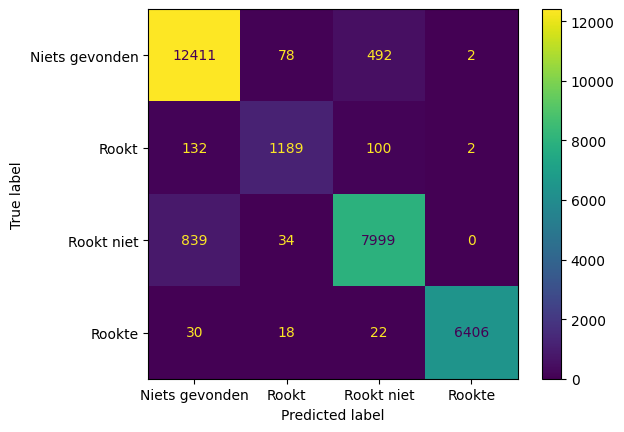

                precision    recall  f1-score   support

Niets gevonden       0.93      0.96      0.94     12983
         Rookt       0.90      0.84      0.87      1423
    Rookt niet       0.93      0.90      0.91      8872
        Rookte       1.00      0.99      0.99      6476

      accuracy                           0.94     29754
     macro avg       0.94      0.92      0.93     29754
  weighted avg       0.94      0.94      0.94     29754



In [13]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Only negation stopwords kept

In [14]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.14, NNZs: 285, Bias: 0.000000, T: 71408, Avg. loss: 0.223413
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 156.85, NNZs: 184, Bias: 0.000000, T: 142816, Avg. loss: 0.164994
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 188.82, NNZs: 144, Bias: 0.000000, T: 214224, Avg. loss: 0.148535
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 215.19, NNZs: 134, Bias: 0.000000, T: 285632, Avg. loss: 0.139730
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 237.59, NNZs: 116, Bias: 0.000000, T: 357040, Avg. loss: 0.133715
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 257.51, NNZs: 109, Bias: 0.000000, T: 428448, Avg. loss: 0.129928
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 261.00, NNZs: 109, Bias: 0.000000, T: 499856, Avg. loss: 0.127708
Total training time: 1.13 seconds.
-- Epoch 8
Norm: 264.42, NNZs: 109, Bias: 0.000000, T: 571264, Avg. loss: 0.127132
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 267.76, NNZs: 109, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 103.52, NNZs: 126, Bias: 0.000000, T: 142816, Avg. loss: 0.161908
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 123.90, NNZs: 111, Bias: 0.000000, T: 214224, Avg. loss: 0.160268
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 141.23, NNZs: 105, Bias: 0.000000, T: 285632, Avg. loss: 0.159186
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 156.61, NNZs: 102, Bias: 0.000000, T: 357040, Avg. loss: 0.158416
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 170.88, NNZs: 102, Bias: 0.000000, T: 428448, Avg. loss: 0.158013
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 172.96, NNZs: 102, Bias: 0.000000, T: 499856, Avg. loss: 0.156544
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 175.11, NNZs: 102, Bias: 0.000000, T: 571264, Avg. loss: 0.156585
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 177.21, NNZs: 102, Bias: 0.000000, T: 642672, Avg. loss: 0.156583
Total training time: 1.43 seconds.
-- Epoch 10
Norm: 179.30, NNZs: 102, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


Norm: 150.12, NNZs: 231, Bias: 0.000000, T: 142816, Avg. loss: 0.310316
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.14, NNZs: 201, Bias: 0.000000, T: 214224, Avg. loss: 0.301066
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 206.54, NNZs: 192, Bias: 0.000000, T: 285632, Avg. loss: 0.296308
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 228.92, NNZs: 186, Bias: 0.000000, T: 357040, Avg. loss: 0.294013
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 249.21, NNZs: 178, Bias: 0.000000, T: 428448, Avg. loss: 0.292375
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 252.27, NNZs: 181, Bias: 0.000000, T: 499856, Avg. loss: 0.289574
Total training time: 1.13 seconds.
-- Epoch 8
Norm: 255.29, NNZs: 185, Bias: 0.000000, T: 571264, Avg. loss: 0.289267
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 258.28, NNZs: 185, Bias: 0.000000, T: 642672, Avg. loss: 0.289186
Total training time: 1.46 seconds.
-- Epoch 10
Norm: 261.25, NNZs: 185, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.092 total time=  35.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.17, NNZs: 283, Bias: 0.000000, T: 71408, Avg. loss: 0.225012
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 156.84, NNZs: 184, Bias: 0.000000, T: 142816, Avg. loss: 0.165909
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 189.14, NNZs: 149, Bias: 0.000000, T: 214224, Avg. loss: 0.149277
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 215.35, NNZs: 125, Bias: 0.000000, T: 285632, Avg. loss: 0.140204
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 237.96, NNZs: 113, Bias: 0.000000, T: 357040, Avg. loss: 0.134687
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 257.90, NNZs: 108, Bias: 0.000000, T: 428448, Avg. loss: 0.130147
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 261.39, NNZs: 108, Bias: 0.000000, T: 499856, Avg. loss: 0.127984
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 264.83, NNZs: 106, Bias: 0.000000, T: 571264, Avg. loss: 0.127411
Total training time: 1.28 seconds.
-- Epoch 9
Norm: 268.19, NNZs: 106, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 77.04, NNZs: 183, Bias: 0.000000, T: 71408, Avg. loss: 0.174508
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 103.04, NNZs: 121, Bias: 0.000000, T: 142816, Avg. loss: 0.163533
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 123.44, NNZs: 116, Bias: 0.000000, T: 214224, Avg. loss: 0.161977
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 140.82, NNZs: 112, Bias: 0.000000, T: 285632, Avg. loss: 0.160843
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 156.24, NNZs: 101, Bias: 0.000000, T: 357040, Avg. loss: 0.160116
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 170.25, NNZs: 98, Bias: 0.000000, T: 428448, Avg. loss: 0.159837
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 172.44, NNZs: 100, Bias: 0.000000, T: 499856, Avg. loss: 0.158346
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 174.58, NNZs: 100, Bias: 0.000000, T: 571264, Avg. loss: 0.158230
Total training time: 1.26 seconds.
-- Epoch 9
Norm: 176.71, NNZs: 99, Bias: 0.000000, T: 642672, Avg. los

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 108.18, NNZs: 295, Bias: 0.000000, T: 71408, Avg. loss: 0.353948
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 150.25, NNZs: 216, Bias: 0.000000, T: 142816, Avg. loss: 0.309337
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.41, NNZs: 188, Bias: 0.000000, T: 214224, Avg. loss: 0.299753
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 206.82, NNZs: 175, Bias: 0.000000, T: 285632, Avg. loss: 0.295410
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 229.25, NNZs: 166, Bias: 0.000000, T: 357040, Avg. loss: 0.292879
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 249.47, NNZs: 164, Bias: 0.000000, T: 428448, Avg. loss: 0.290869
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 252.54, NNZs: 169, Bias: 0.000000, T: 499856, Avg. loss: 0.288391
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 255.58, NNZs: 171, Bias: 0.000000, T: 571264, Avg. loss: 0.287964
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 258.56, NNZs: 171, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.088 total time=  34.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.18, NNZs: 290, Bias: 0.000000, T: 71408, Avg. loss: 0.224243
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 156.90, NNZs: 188, Bias: 0.000000, T: 142816, Avg. loss: 0.165796
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 189.16, NNZs: 150, Bias: 0.000000, T: 214224, Avg. loss: 0.149215
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 215.39, NNZs: 129, Bias: 0.000000, T: 285632, Avg. loss: 0.140116
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 238.04, NNZs: 119, Bias: 0.000000, T: 357040, Avg. loss: 0.134488
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 258.03, NNZs: 114, Bias: 0.000000, T: 428448, Avg. loss: 0.130435
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 261.50, NNZs: 114, Bias: 0.000000, T: 499856, Avg. loss: 0.127847
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 264.92, NNZs: 114, Bias: 0.000000, T: 571264, Avg. loss: 0.127359
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 268.29, NNZs: 112, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 103.06, NNZs: 124, Bias: 0.000000, T: 142816, Avg. loss: 0.162979
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 123.06, NNZs: 112, Bias: 0.000000, T: 214224, Avg. loss: 0.161224
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 140.55, NNZs: 109, Bias: 0.000000, T: 285632, Avg. loss: 0.160602
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 155.77, NNZs: 102, Bias: 0.000000, T: 357040, Avg. loss: 0.160185
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 169.63, NNZs: 101, Bias: 0.000000, T: 428448, Avg. loss: 0.159549
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 171.73, NNZs: 101, Bias: 0.000000, T: 499856, Avg. loss: 0.158690
Total training time: 1.09 seconds.
-- Epoch 8
Norm: 173.86, NNZs: 101, Bias: 0.000000, T: 571264, Avg. loss: 0.158433
Total training time: 1.25 seconds.
-- Epoch 9
Norm: 175.95, NNZs: 101, Bias: 0.000000, T: 642672, Avg. loss: 0.158328
Total training time: 1.42 seconds.
-- Epoch 10
Norm: 178.04, NNZs: 101, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 150.13, NNZs: 228, Bias: 0.000000, T: 142816, Avg. loss: 0.310105
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 180.90, NNZs: 201, Bias: 0.000000, T: 214224, Avg. loss: 0.300554
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 206.61, NNZs: 191, Bias: 0.000000, T: 285632, Avg. loss: 0.296131
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 228.89, NNZs: 183, Bias: 0.000000, T: 357040, Avg. loss: 0.293578
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 249.08, NNZs: 182, Bias: 0.000000, T: 428448, Avg. loss: 0.291665
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 252.14, NNZs: 181, Bias: 0.000000, T: 499856, Avg. loss: 0.289353
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 255.18, NNZs: 181, Bias: 0.000000, T: 571264, Avg. loss: 0.288815
Total training time: 1.28 seconds.
-- Epoch 9
Norm: 258.18, NNZs: 181, Bias: 0.000000, T: 642672, Avg. loss: 0.288504
Total training time: 1.45 seconds.
-- Epoch 10
Norm: 261.14, NNZs: 182, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time=  34.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 112.83, NNZs: 289, Bias: 0.000000, T: 71408, Avg. loss: 0.224708
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 156.74, NNZs: 182, Bias: 0.000000, T: 142816, Avg. loss: 0.165697
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 188.82, NNZs: 153, Bias: 0.000000, T: 214224, Avg. loss: 0.149033
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 215.25, NNZs: 131, Bias: 0.000000, T: 285632, Avg. loss: 0.139841
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 237.83, NNZs: 119, Bias: 0.000000, T: 357040, Avg. loss: 0.134084
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 257.82, NNZs: 111, Bias: 0.000000, T: 428448, Avg. loss: 0.129918
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 261.29, NNZs: 110, Bias: 0.000000, T: 499856, Avg. loss: 0.127450
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 264.72, NNZs: 110, Bias: 0.000000, T: 571264, Avg. loss: 0.126966
Total training time: 1.29 seconds.
-- Epoch 9
Norm: 268.07, NNZs: 110, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 103.05, NNZs: 125, Bias: 0.000000, T: 142816, Avg. loss: 0.162629
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 123.83, NNZs: 114, Bias: 0.000000, T: 214224, Avg. loss: 0.161028
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 141.01, NNZs: 107, Bias: 0.000000, T: 285632, Avg. loss: 0.159835
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 156.47, NNZs: 103, Bias: 0.000000, T: 357040, Avg. loss: 0.159355
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 170.46, NNZs: 100, Bias: 0.000000, T: 428448, Avg. loss: 0.158687
Total training time: 0.93 seconds.
-- Epoch 7
Norm: 172.66, NNZs: 100, Bias: 0.000000, T: 499856, Avg. loss: 0.157146
Total training time: 1.08 seconds.
-- Epoch 8
Norm: 174.79, NNZs: 100, Bias: 0.000000, T: 571264, Avg. loss: 0.157235
Total training time: 1.23 seconds.
-- Epoch 9
Norm: 176.90, NNZs: 100, Bias: 0.000000, T: 642672, Avg. loss: 0.157119
Total training time: 1.39 seconds.
-- Epoch 10
Norm: 178.98, NNZs: 100, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 108.43, NNZs: 316, Bias: 0.000000, T: 71408, Avg. loss: 0.355581
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 150.48, NNZs: 223, Bias: 0.000000, T: 142816, Avg. loss: 0.310937
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.44, NNZs: 197, Bias: 0.000000, T: 214224, Avg. loss: 0.300914
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 207.17, NNZs: 183, Bias: 0.000000, T: 285632, Avg. loss: 0.296184
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 229.65, NNZs: 181, Bias: 0.000000, T: 357040, Avg. loss: 0.293619
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 249.86, NNZs: 180, Bias: 0.000000, T: 428448, Avg. loss: 0.291697
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 252.91, NNZs: 181, Bias: 0.000000, T: 499856, Avg. loss: 0.288900
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 255.94, NNZs: 182, Bias: 0.000000, T: 571264, Avg. loss: 0.288751
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 258.95, NNZs: 182, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.090 total time=  35.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 113.07, NNZs: 283, Bias: 0.000000, T: 71409, Avg. loss: 0.225193
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 156.78, NNZs: 193, Bias: 0.000000, T: 142818, Avg. loss: 0.165808
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 189.06, NNZs: 146, Bias: 0.000000, T: 214227, Avg. loss: 0.149571
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 215.31, NNZs: 126, Bias: 0.000000, T: 285636, Avg. loss: 0.140475
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 237.91, NNZs: 119, Bias: 0.000000, T: 357045, Avg. loss: 0.134587
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 257.84, NNZs: 113, Bias: 0.000000, T: 428454, Avg. loss: 0.130295
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 261.35, NNZs: 113, Bias: 0.000000, T: 499863, Avg. loss: 0.128336
Total training time: 1.14 seconds.
-- Epoch 8
Norm: 264.78, NNZs: 111, Bias: 0.000000, T: 571272, Avg. loss: 0.127704
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 268.15, NNZs: 110, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


Norm: 103.04, NNZs: 126, Bias: 0.000000, T: 142818, Avg. loss: 0.163278
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 123.40, NNZs: 109, Bias: 0.000000, T: 214227, Avg. loss: 0.161580
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 140.78, NNZs: 104, Bias: 0.000000, T: 285636, Avg. loss: 0.160953
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 156.20, NNZs: 100, Bias: 0.000000, T: 357045, Avg. loss: 0.159937
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 170.10, NNZs: 99, Bias: 0.000000, T: 428454, Avg. loss: 0.159784
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 172.28, NNZs: 99, Bias: 0.000000, T: 499863, Avg. loss: 0.158334
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 174.40, NNZs: 99, Bias: 0.000000, T: 571272, Avg. loss: 0.158266
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 176.50, NNZs: 99, Bias: 0.000000, T: 642681, Avg. loss: 0.158027
Total training time: 1.43 seconds.
-- Epoch 10
Norm: 178.57, NNZs: 99, Bias: 0.000000, T: 714090, Avg. los

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


-- Epoch 2
Norm: 150.07, NNZs: 224, Bias: 0.000000, T: 142818, Avg. loss: 0.312284
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 180.87, NNZs: 196, Bias: 0.000000, T: 214227, Avg. loss: 0.301995
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 206.26, NNZs: 184, Bias: 0.000000, T: 285636, Avg. loss: 0.298260
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 228.65, NNZs: 183, Bias: 0.000000, T: 357045, Avg. loss: 0.295576
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 248.82, NNZs: 182, Bias: 0.000000, T: 428454, Avg. loss: 0.293761
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 251.87, NNZs: 183, Bias: 0.000000, T: 499863, Avg. loss: 0.290897
Total training time: 1.14 seconds.
-- Epoch 8
Norm: 254.91, NNZs: 182, Bias: 0.000000, T: 571272, Avg. loss: 0.290680
Total training time: 1.30 seconds.
-- Epoch 9
Norm: 257.92, NNZs: 183, Bias: 0.000000, T: 642681, Avg. loss: 0.290379
Total training time: 1.47 seconds.
-- Epoch 10
Norm: 260.84, NNZs: 184, Bias: 0.000000, T: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.087 total time=  35.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 91236524161142.03, NNZs: 59058, Bias: 0.000000, T: 71408, Avg. loss: 323857871780611698458624.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 82548669650965.64, NNZs: 59058, Bias: 0.000000, T: 142816, Avg. loss: 78928135890879415058432.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 78456646204414.98, NNZs: 59058, Bias: 0.000000, T: 214224, Avg. loss: 55894735511243840290816.000000
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 75885548178855.48, NNZs: 59058, Bias: 0.000000, T: 285632, Avg. loss: 46283092570544460005376.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 74046343141142.58, NNZs: 59058, Bias: 0.000000, T: 357040, Avg. loss: 40845945034894716436480.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 72631936270749.39, NNZs: 59058, Bias: 0.000000, T: 428448, Avg. loss: 37193774176086706356224.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 95536311695420.47, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 86514574444693.44, NNZs: 59058, Bias: 0.000000, T: 142816, Avg. loss: 88562606187321887817728.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 82257255136856.22, NNZs: 59058, Bias: 0.000000, T: 214224, Avg. loss: 62922022163367436746752.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 79580488298580.41, NNZs: 59058, Bias: 0.000000, T: 285632, Avg. loss: 52314815415175880900608.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 77669266476856.31, NNZs: 59058, Bias: 0.000000, T: 357040, Avg. loss: 46199033627873114062848.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 76199616993281.53, NNZs: 59058, Bias: 0.000000, T: 428448, Avg. loss: 42164207040223789449216.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.08 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 92640452615326.98, NNZs: 59058, Bias: 0.000000, T: 71408, Avg. loss: 337666458634775666098176.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 83847359019454.92, NNZs: 59058, Bias: 0.000000, T: 142816, Avg. loss: 82135205601858113503232.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 79695079880644.48, NNZs: 59058, Bias: 0.000000, T: 214224, Avg. loss: 58263151330133851242496.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 77080722779208.58, NNZs: 59058, Bias: 0.000000, T: 285632, Avg. loss: 48405872657468462465024.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 75213486991344.62, NNZs: 59058, Bias: 0.000000, T: 357040, Avg. loss: 42751271994275454255104.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 73779525213029.00, NNZs: 59058, Bias: 0.000000, T: 428448, Avg. loss: 38964542442855217496064.000000
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 95191386146020.39, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.224 total time=  26.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 94066813712293.70, NNZs: 59191, Bias: 0.000000, T: 71408, Avg. loss: 352333566511506111070208.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 85154359318638.81, NNZs: 59191, Bias: 0.000000, T: 142816, Avg. loss: 84880309643637090680832.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 80964807610389.00, NNZs: 59191, Bias: 0.000000, T: 214224, Avg. loss: 60046026145736215756800.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 78333601216308.55, NNZs: 59191, Bias: 0.000000, T: 285632, Avg. loss: 49834919680718032338944.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 76455051340021.02, NNZs: 59191, Bias: 0.000000, T: 357040, Avg. loss: 43970994897301899575296.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 75012808643078.16, NNZs: 59191, Bias: 0.000000, T: 428448, Avg. loss: 40064896265449417736192.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 94652259062535.52, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 85727069242156.45, NNZs: 59191, Bias: 0.000000, T: 142816, Avg. loss: 84560695787741509582848.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 81517610012571.03, NNZs: 59191, Bias: 0.000000, T: 214224, Avg. loss: 59815668725523253559296.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 78874095521417.62, NNZs: 59191, Bias: 0.000000, T: 285632, Avg. loss: 49630081516168120631296.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 76987727586896.97, NNZs: 59191, Bias: 0.000000, T: 357040, Avg. loss: 43745916352572302557184.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 75540012446655.52, NNZs: 59191, Bias: 0.000000, T: 428448, Avg. loss: 39854427836656037920768.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 95586864910742.00, NNZs: 59191, Bias: 0.000000, T: 71408, Avg. loss: 354444506618655359893504.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 86610431351079.45, NNZs: 59191, Bias: 0.000000, T: 142816, Avg. loss: 87443413722820453072896.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 82388225575272.17, NNZs: 59191, Bias: 0.000000, T: 214224, Avg. loss: 61970087151214943797248.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 79738214751661.94, NNZs: 59191, Bias: 0.000000, T: 285632, Avg. loss: 51523549289890925510656.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 77844900191864.84, NNZs: 59191, Bias: 0.000000, T: 357040, Avg. loss: 45566240962682495696896.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 76388802926108.56, NNZs: 59191, Bias: 0.000000, T: 428448, Avg. loss: 41588204623329811759104.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 99963716593516.80, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.228 total time=  26.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 94670226804416.61, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 338170040655389483073536.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 85794869669146.81, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 86350734444284644163584.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 81590190698961.31, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 61650721242550022176768.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 78941677674103.31, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 51264986865834636869632.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 77044325256413.14, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 45361298655204505288704.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 75586182436010.02, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 41376932798502088474624.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 96210244054879.70, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 87189950524215.50, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 89326117104765481517056.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 82936572932130.36, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 63566121447126718218240.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 80263181148915.83, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 52833565680458488872960.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 78351781341069.12, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 46719406675458267283456.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 76881189188690.81, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 42615919420197075681280.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.08 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 94004804624417.62, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 336389564593120852574208.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 85208153109568.48, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 85154953378291991445504.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 81051877106846.58, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 60936740099708908732416.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 78424061330065.00, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 50861361285595117125632.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 76545355402153.03, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 45007510243061404794880.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 75099893165672.09, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 41113464838274125135872.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 98314438319305.44, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.223 total time=  27.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 95777188219085.34, NNZs: 59232, Bias: 0.000000, T: 71408, Avg. loss: 352856235670331910520832.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 86647608245665.50, NNZs: 59232, Bias: 0.000000, T: 142816, Avg. loss: 90333180412680306950144.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 82321215757899.05, NNZs: 59232, Bias: 0.000000, T: 214224, Avg. loss: 64153724079068793536512.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 79598892809353.09, NNZs: 59232, Bias: 0.000000, T: 285632, Avg. loss: 53259213871881423683584.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 77650998448701.27, NNZs: 59232, Bias: 0.000000, T: 357040, Avg. loss: 46980506689948371386368.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 76152374912689.72, NNZs: 59232, Bias: 0.000000, T: 428448, Avg. loss: 42809356693826082701312.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 88465268605257.12, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 80174296724522.66, NNZs: 59232, Bias: 0.000000, T: 142816, Avg. loss: 71902683888514752315392.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 76279012291389.20, NNZs: 59232, Bias: 0.000000, T: 214224, Avg. loss: 51022387590491447230464.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 73828973698296.89, NNZs: 59232, Bias: 0.000000, T: 285632, Avg. loss: 42450941504705001422848.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 72075332645546.03, NNZs: 59232, Bias: 0.000000, T: 357040, Avg. loss: 37553904595389642702848.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 70724267995178.45, NNZs: 59232, Bias: 0.000000, T: 428448, Avg. loss: 34291261380173840252928.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 95906182031761.30, NNZs: 59232, Bias: 0.000000, T: 71408, Avg. loss: 357281469279681130790912.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 86835328473346.81, NNZs: 59232, Bias: 0.000000, T: 142816, Avg. loss: 88714754593588412153856.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 82574093387834.22, NNZs: 59232, Bias: 0.000000, T: 214224, Avg. loss: 62784669380304284155904.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 79894627982540.17, NNZs: 59232, Bias: 0.000000, T: 285632, Avg. loss: 52181235573853735878656.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 77979983127624.92, NNZs: 59232, Bias: 0.000000, T: 357040, Avg. loss: 46029430720559449112576.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 76508405949801.03, NNZs: 59232, Bias: 0.000000, T: 428448, Avg. loss: 41980804898074107314176.000000
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 91485877005804.98, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.220 total time=  26.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 92181365195777.53, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 326608843173086730649600.000000
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 83533841550664.02, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 80474011007324551905280.000000
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 79458291872516.61, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 57107060862470940786688.000000
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 76886505083054.78, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 47460345483850084777984.000000
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 75048720768845.73, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 41915772632068222091264.000000
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 73635254913059.14, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 38240281908310624436224.000000
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 96897424265730.36, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 87960454466754.77, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 90405504488650756325376.000000
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 83727555537047.83, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 64648132947509522726912.000000
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 81053376651123.83, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 53904035916540880617472.000000
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 79140194503285.05, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 47771148982997850521600.000000
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 77668000755990.66, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 43640082178386274811904.000000
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.08 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 98533690104244.70, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 383347176413179102101504.000000
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 89345463563667.11, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 93568334365426085527552.000000
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 84984203734468.83, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 66605427301461469954048.000000
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 82240002687134.22, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 55347989297384403238912.000000
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 80275257810218.84, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 48852340162505809592320.000000
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 78764583021901.02, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 44581910907012065001472.000000
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 94365417617427.64, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.226 total time=  26.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 167.49, NNZs: 318, Bias: 0.000000, T: 71408, Avg. loss: 0.144132
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 221.42, NNZs: 220, Bias: 0.000000, T: 142816, Avg. loss: 0.111862
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 263.05, NNZs: 236, Bias: 0.000000, T: 214224, Avg. loss: 0.109899
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 297.59, NNZs: 212, Bias: 0.000000, T: 285632, Avg. loss: 0.108477
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 329.03, NNZs: 215, Bias: 0.000000, T: 357040, Avg. loss: 0.108404
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 357.17, NNZs: 217, Bias: 0.000000, T: 428448, Avg. loss: 0.108762
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 162.85, NNZs: 265, Bias: 0.000000, T: 71408, Avg. loss: 0.179285
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 228.98, NNZs: 241, Bias: 0.000000, T: 142816, Avg. loss: 0.171898
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 279.75, NNZs: 239, Bias: 0.000000, T: 214224, Avg. loss: 0.170135
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 322.62, NNZs: 236, Bias: 0.000000, T: 285632, Avg. loss: 0.169995
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 360.46, NNZs: 257, Bias: 0.000000, T: 357040, Avg. loss: 0.170360
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 394.89, NNZs: 235, Bias: 0.000000, T: 428448, Avg. loss: 0.170770
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 237.53, NNZs: 574, Bias: 0.000000, T: 71408, Avg. loss: 0.387151
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 330.29, NNZs: 472, Bias: 0.000000, T: 142816, Avg. loss: 0.345820
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 402.16, NNZs: 432, Bias: 0.000000, T: 214224, Avg. loss: 0.343040
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 462.56, NNZs: 441, Bias: 0.000000, T: 285632, Avg. loss: 0.339826
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 515.72, NNZs: 436, Bias: 0.000000, T: 357040, Avg. loss: 0.341371
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 564.32, NNZs: 424, Bias: 0.000000, T: 428448, Avg. loss: 0.340654
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 188.99, NNZs: 420, Bias: 0.000000, T: 71408, Avg. loss: 0.227314
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 261.18, NNZs: 331, Bias: 0.000000, T: 142816, Avg. loss: 0.199986
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 316.35, NNZs: 302, Bias: 0.000000, T: 214224, Avg. loss: 0.199324
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 363.47

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.773 total time=  25.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 167.36, NNZs: 315, Bias: 0.000000, T: 71408, Avg. loss: 0.145330
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 221.80, NNZs: 235, Bias: 0.000000, T: 142816, Avg. loss: 0.112098
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 263.30, NNZs: 223, Bias: 0.000000, T: 214224, Avg. loss: 0.109848
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 298.23, NNZs: 224, Bias: 0.000000, T: 285632, Avg. loss: 0.109635
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 328.84, NNZs: 219, Bias: 0.000000, T: 357040, Avg. loss: 0.107661
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 356.83, NNZs: 218, Bias: 0.000000, T: 428448, Avg. loss: 0.108102
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 162.87, NNZs: 321, Bias: 0.000000, T: 71408, Avg. loss: 0.180657
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 228.76, NNZs: 238, Bias: 0.000000, T: 142816, Avg. loss: 0.168042
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 279.61, NNZs: 247, Bias: 0.000000, T: 214224, Avg. loss: 0.169622
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 322.33, NNZs: 236, Bias: 0.000000, T: 285632, Avg. loss: 0.168764
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 360.15, NNZs: 255, Bias: 0.000000, T: 357040, Avg. loss: 0.168746
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 394.20, NNZs: 232, Bias: 0.000000, T: 428448, Avg. loss: 0.168013
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.75 seconds
-- Epoch 1
Norm: 237.23, NNZs: 583, Bias: 0.000000, T: 71408, Avg. loss: 0.386831
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 330.35, NNZs: 475, Bias: 0.000000, T: 142816, Avg. loss: 0.345730
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 401.56, NNZs: 431, Bias: 0.000000, T: 214224, Avg. loss: 0.339797
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 462.01, NNZs: 450, Bias: 0.000000, T: 285632, Avg. loss: 0.338947
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 515.51, NNZs: 427, Bias: 0.000000, T: 357040, Avg. loss: 0.338630
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 563.84, NNZs: 417, Bias: 0.000000, T: 428448, Avg. loss: 0.338511
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1
Norm: 188.93, NNZs: 400, Bias: 0.000000, T: 71408, Avg. loss: 0.226327
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 261.05, NNZs: 333, Bias: 0.000000, T: 142816, Avg. loss: 0.198719
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 316.39, NNZs: 315, Bias: 0.000000, T: 214224, Avg. loss: 0.197950
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 363.24

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.704 total time=  25.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 167.41, NNZs: 334, Bias: 0.000000, T: 71408, Avg. loss: 0.146028
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 222.09, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.114901
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 264.17, NNZs: 228, Bias: 0.000000, T: 214224, Avg. loss: 0.111728
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 299.36, NNZs: 231, Bias: 0.000000, T: 285632, Avg. loss: 0.111058
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 330.22, NNZs: 225, Bias: 0.000000, T: 357040, Avg. loss: 0.110923
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 359.35, NNZs: 224, Bias: 0.000000, T: 428448, Avg. loss: 0.110420
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 163.43, NNZs: 310, Bias: 0.000000, T: 71408, Avg. loss: 0.183088
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 230.02, NNZs: 261, Bias: 0.000000, T: 142816, Avg. loss: 0.173006
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 280.98, NNZs: 260, Bias: 0.000000, T: 214224, Avg. loss: 0.173294
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 324.14, NNZs: 245, Bias: 0.000000, T: 285632, Avg. loss: 0.173235
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 362.18, NNZs: 239, Bias: 0.000000, T: 357040, Avg. loss: 0.172735
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 396.76, NNZs: 239, Bias: 0.000000, T: 428448, Avg. loss: 0.172966
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 237.36, NNZs: 589, Bias: 0.000000, T: 71408, Avg. loss: 0.385980
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 329.82, NNZs: 449, Bias: 0.000000, T: 142816, Avg. loss: 0.341101
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 401.25, NNZs: 429, Bias: 0.000000, T: 214224, Avg. loss: 0.340974
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 461.52, NNZs: 434, Bias: 0.000000, T: 285632, Avg. loss: 0.339240
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 514.52, NNZs: 425, Bias: 0.000000, T: 357040, Avg. loss: 0.337145
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 562.68, NNZs: 413, Bias: 0.000000, T: 428448, Avg. loss: 0.336862
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 189.92, NNZs: 447, Bias: 0.000000, T: 71408, Avg. loss: 0.230408
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 261.97, NNZs: 320, Bias: 0.000000, T: 142816, Avg. loss: 0.202184
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 318.10, NNZs: 334, Bias: 0.000000, T: 214224, Avg. loss: 0.203240
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 365.16

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.751 total time=  25.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 167.74, NNZs: 356, Bias: 0.000000, T: 71408, Avg. loss: 0.146262
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 222.37, NNZs: 231, Bias: 0.000000, T: 142816, Avg. loss: 0.112313
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 263.83, NNZs: 220, Bias: 0.000000, T: 214224, Avg. loss: 0.109875
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 298.60, NNZs: 221, Bias: 0.000000, T: 285632, Avg. loss: 0.109683
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 329.77, NNZs: 229, Bias: 0.000000, T: 357040, Avg. loss: 0.109537
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 357.90, NNZs: 227, Bias: 0.000000, T: 428448, Avg. loss: 0.108789
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 162.96, NNZs: 309, Bias: 0.000000, T: 71408, Avg. loss: 0.181001
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 229.20, NNZs: 245, Bias: 0.000000, T: 142816, Avg. loss: 0.172017
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 280.13, NNZs: 251, Bias: 0.000000, T: 214224, Avg. loss: 0.172303
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 323.11, NNZs: 256, Bias: 0.000000, T: 285632, Avg. loss: 0.170491
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 361.04, NNZs: 246, Bias: 0.000000, T: 357040, Avg. loss: 0.169908
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 395.35, NNZs: 236, Bias: 0.000000, T: 428448, Avg. loss: 0.171146
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 237.37, NNZs: 591, Bias: 0.000000, T: 71408, Avg. loss: 0.387701
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 329.77, NNZs: 455, Bias: 0.000000, T: 142816, Avg. loss: 0.341327
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 400.94, NNZs: 434, Bias: 0.000000, T: 214224, Avg. loss: 0.340688
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 461.07, NNZs: 418, Bias: 0.000000, T: 285632, Avg. loss: 0.334883
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 514.40, NNZs: 455, Bias: 0.000000, T: 357040, Avg. loss: 0.338588
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 562.37, NNZs: 411, Bias: 0.000000, T: 428448, Avg. loss: 0.337487
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 190.82, NNZs: 434, Bias: 0.000000, T: 71408, Avg. loss: 0.233426
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 263.24, NNZs: 328, Bias: 0.000000, T: 142816, Avg. loss: 0.205758
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 319.44, NNZs: 318, Bias: 0.000000, T: 214224, Avg. loss: 0.201832
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 366.53

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.731 total time=  25.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 167.72, NNZs: 324, Bias: 0.000000, T: 71409, Avg. loss: 0.145229
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 222.14, NNZs: 236, Bias: 0.000000, T: 142818, Avg. loss: 0.113863
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 263.67, NNZs: 224, Bias: 0.000000, T: 214227, Avg. loss: 0.112859
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 299.24, NNZs: 234, Bias: 0.000000, T: 285636, Avg. loss: 0.111561
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 330.74, NNZs: 212, Bias: 0.000000, T: 357045, Avg. loss: 0.111066
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 359.03, NNZs: 216, Bias: 0.000000, T: 428454, Avg. loss: 0.111699
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.75 seconds
-- Epoch 1
Norm: 163.73, NNZs: 304, Bias: 0.000000, T: 71409, Avg. loss: 0.182420
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 230.21, NNZs: 233, Bias: 0.000000, T: 142818, Avg. loss: 0.171471
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 281.20, NNZs: 241, Bias: 0.000000, T: 214227, Avg. loss: 0.172249
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 324.44, NNZs: 252, Bias: 0.000000, T: 285636, Avg. loss: 0.171858
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 362.47, NNZs: 247, Bias: 0.000000, T: 357045, Avg. loss: 0.171682
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 396.82, NNZs: 244, Bias: 0.000000, T: 428454, Avg. loss: 0.170412
Total training time: 0.73 seconds.
Convergence after 6 epochs took 0.75 seconds
-- Epoch 1
Norm: 237.20, NNZs: 593, Bias: 0.000000, T: 71409, Avg. loss: 0.389158
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


Norm: 329.81, NNZs: 492, Bias: 0.000000, T: 142818, Avg. loss: 0.345685
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 401.17, NNZs: 466, Bias: 0.000000, T: 214227, Avg. loss: 0.344622
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 461.56, NNZs: 433, Bias: 0.000000, T: 285636, Avg. loss: 0.340480
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 514.97, NNZs: 433, Bias: 0.000000, T: 357045, Avg. loss: 0.343059
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 563.10, NNZs: 442, Bias: 0.000000, T: 428454, Avg. loss: 0.340586
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 188.57, NNZs: 416, Bias: 0.000000, T: 71409, Avg. loss: 0.226211
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 259.68, NNZs: 327, Bias: 0.000000, T: 142818, Avg. loss: 0.198301
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 315.19, NNZs: 307, Bias: 0.000000, T: 214227, Avg. loss: 0.196687
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 361.62

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.722 total time=  25.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 50.06, NNZs: 359, Bias: 0.000000, T: 71408, Avg. loss: 0.150019
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 67.56, NNZs: 341, Bias: 0.000000, T: 142816, Avg. loss: 0.135977
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 80.81, NNZs: 323, Bias: 0.000000, T: 214224, Avg. loss: 0.134556
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 92.14, NNZs: 314, Bias: 0.000000, T: 285632, Avg. loss: 0.134652
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 102.23, NNZs: 313, Bias: 0.000000, T: 357040, Avg. loss: 0.134612
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 111.42, NNZs: 313, Bias: 0.000000, T: 428448, Avg. loss: 0.134575
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 113.42, NNZs: 603, Bias: 0.000000, T: 71408, Avg. loss: 0.159718
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 160.49, NNZs: 518, Bias: 0.000000, T: 142816, Avg. loss: 0.147180
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 196.56, NNZs: 515, Bias: 0.000000, T: 214224, Avg. loss: 0.145571
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 226.84, NNZs: 492, Bias: 0.000000, T: 285632, Avg. loss: 0.145722
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 253.69, NNZs: 491, Bias: 0.000000, T: 357040, Avg. loss: 0.145402
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 277.82, NNZs: 484, Bias: 0.000000, T: 428448, Avg. loss: 0.145753
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 64.78, NNZs: 448, Bias: 0.000000, T: 71408, Avg. loss: 0.226893
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 89.14, NNZs: 399, Bias: 0.000000, T: 142816, Avg. loss: 0.213593
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 108.08, NNZs: 381, Bias: 0.000000, T: 214224, Avg. loss: 0.212796
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 123.94, NNZs: 376, Bias: 0.000000, T: 285632, Avg. loss: 0.212879
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 138.16, NNZs: 380, Bias: 0.000000, T: 357040, Avg. loss: 0.212506
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 150.90, NNZs: 382, Bias: 0.000000, T: 428448, Avg. loss: 0.212408
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 62.34, NNZs: 451, Bias: 0.000000, T: 71408, Avg. loss: 0.151353
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 85.19, NNZs: 429, Bias: 0.000000, T: 142816, Avg. loss: 0.143419
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 102.68, NNZs: 417, Bias: 0.000000, T: 214224, Avg. loss: 0.142782
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 118.01, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.036 total time=  25.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.84, NNZs: 359, Bias: 0.000000, T: 71408, Avg. loss: 0.150346
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 67.42, NNZs: 333, Bias: 0.000000, T: 142816, Avg. loss: 0.136854
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 80.83, NNZs: 323, Bias: 0.000000, T: 214224, Avg. loss: 0.135866
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 92.09, NNZs: 303, Bias: 0.000000, T: 285632, Avg. loss: 0.135429
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 102.18, NNZs: 326, Bias: 0.000000, T: 357040, Avg. loss: 0.135700
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 111.36, NNZs: 309, Bias: 0.000000, T: 428448, Avg. loss: 0.135425
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 113.78, NNZs: 613, Bias: 0.000000, T: 71408, Avg. loss: 0.160514
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 160.36, NNZs: 525, Bias: 0.000000, T: 142816, Avg. loss: 0.148739
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 196.30, NNZs: 512, Bias: 0.000000, T: 214224, Avg. loss: 0.146641
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 226.60, NNZs: 484, Bias: 0.000000, T: 285632, Avg. loss: 0.146249
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 253.27, NNZs: 477, Bias: 0.000000, T: 357040, Avg. loss: 0.146003
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 277.42, NNZs: 503, Bias: 0.000000, T: 428448, Avg. loss: 0.146350
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 64.56, NNZs: 466, Bias: 0.000000, T: 71408, Avg. loss: 0.226695
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 89.24, NNZs: 408, Bias: 0.000000, T: 142816, Avg. loss: 0.214115
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 108.07, NNZs: 389, Bias: 0.000000, T: 214224, Avg. loss: 0.212666
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 124.21, NNZs: 391, Bias: 0.000000, T: 285632, Avg. loss: 0.212546
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 138.21, NNZs: 367, Bias: 0.000000, T: 357040, Avg. loss: 0.212288
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 151.03, NNZs: 394, Bias: 0.000000, T: 428448, Avg. loss: 0.212550
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 62.10, NNZs: 450, Bias: 0.000000, T: 71408, Avg. loss: 0.151875
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 85.04, NNZs: 416, Bias: 0.000000, T: 142816, Avg. loss: 0.144295
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 102.82, NNZs: 396, Bias: 0.000000, T: 214224, Avg. loss: 0.143882
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 117.90, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.032 total time=  25.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.89, NNZs: 373, Bias: 0.000000, T: 71408, Avg. loss: 0.149632
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 67.56, NNZs: 330, Bias: 0.000000, T: 142816, Avg. loss: 0.135735
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 80.80, NNZs: 327, Bias: 0.000000, T: 214224, Avg. loss: 0.134746
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 91.98, NNZs: 332, Bias: 0.000000, T: 285632, Avg. loss: 0.134178
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 102.08, NNZs: 318, Bias: 0.000000, T: 357040, Avg. loss: 0.134531
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 111.05, NNZs: 316, Bias: 0.000000, T: 428448, Avg. loss: 0.134109
Total training time: 0.95 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 113.82, NNZs: 617, Bias: 0.000000, T: 71408, Avg. loss: 0.162107
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 160.80, NNZs: 547, Bias: 0.000000, T: 142816, Avg. loss: 0.150509
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 196.88, NNZs: 512, Bias: 0.000000, T: 214224, Avg. loss: 0.148312
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 227.53, NNZs: 498, Bias: 0.000000, T: 285632, Avg. loss: 0.147970
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 254.24, NNZs: 499, Bias: 0.000000, T: 357040, Avg. loss: 0.148336
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 278.42, NNZs: 492, Bias: 0.000000, T: 428448, Avg. loss: 0.147720
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 64.23, NNZs: 458, Bias: 0.000000, T: 71408, Avg. loss: 0.227233
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 88.96, NNZs: 412, Bias: 0.000000, T: 142816, Avg. loss: 0.215128
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 107.80, NNZs: 389, Bias: 0.000000, T: 214224, Avg. loss: 0.213690
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 123.73, NNZs: 399, Bias: 0.000000, T: 285632, Avg. loss: 0.213597
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 137.94, NNZs: 402, Bias: 0.000000, T: 357040, Avg. loss: 0.213266
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 150.61, NNZs: 403, Bias: 0.000000, T: 428448, Avg. loss: 0.212979
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 61.98, NNZs: 470, Bias: 0.000000, T: 71408, Avg. loss: 0.152345
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 84.96, NNZs: 423, Bias: 0.000000, T: 142816, Avg. loss: 0.144707
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 102.74, NNZs: 431, Bias: 0.000000, T: 214224, Avg. loss: 0.144165
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 117.89, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.033 total time=  26.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.86, NNZs: 370, Bias: 0.000000, T: 71408, Avg. loss: 0.150589
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 67.51, NNZs: 323, Bias: 0.000000, T: 142816, Avg. loss: 0.137324
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 80.79, NNZs: 320, Bias: 0.000000, T: 214224, Avg. loss: 0.136212
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 92.00, NNZs: 315, Bias: 0.000000, T: 285632, Avg. loss: 0.135969
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 102.07, NNZs: 311, Bias: 0.000000, T: 357040, Avg. loss: 0.135749
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 111.22, NNZs: 314, Bias: 0.000000, T: 428448, Avg. loss: 0.135955
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 114.04, NNZs: 597, Bias: 0.000000, T: 71408, Avg. loss: 0.161077
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 160.93, NNZs: 521, Bias: 0.000000, T: 142816, Avg. loss: 0.148629
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 197.27, NNZs: 529, Bias: 0.000000, T: 214224, Avg. loss: 0.147325
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 227.29, NNZs: 498, Bias: 0.000000, T: 285632, Avg. loss: 0.148422
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 253.92, NNZs: 497, Bias: 0.000000, T: 357040, Avg. loss: 0.147042
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 277.95, NNZs: 510, Bias: 0.000000, T: 428448, Avg. loss: 0.147332
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 64.69, NNZs: 479, Bias: 0.000000, T: 71408, Avg. loss: 0.226792
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 89.26, NNZs: 423, Bias: 0.000000, T: 142816, Avg. loss: 0.213836
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 108.09, NNZs: 406, Bias: 0.000000, T: 214224, Avg. loss: 0.212930
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 124.07, NNZs: 410, Bias: 0.000000, T: 285632, Avg. loss: 0.212898
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 138.12, NNZs: 409, Bias: 0.000000, T: 357040, Avg. loss: 0.212580
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 150.83, NNZs: 399, Bias: 0.000000, T: 428448, Avg. loss: 0.212933
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 62.45, NNZs: 474, Bias: 0.000000, T: 71408, Avg. loss: 0.153227
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 85.14, NNZs: 437, Bias: 0.000000, T: 142816, Avg. loss: 0.145352
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 103.14, NNZs: 416, Bias: 0.000000, T: 214224, Avg. loss: 0.144826
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 118.35, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.034 total time=  26.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 50.03, NNZs: 365, Bias: 0.000000, T: 71409, Avg. loss: 0.151038
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 67.64, NNZs: 333, Bias: 0.000000, T: 142818, Avg. loss: 0.137104
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 81.09, NNZs: 329, Bias: 0.000000, T: 214227, Avg. loss: 0.136023
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 92.52, NNZs: 318, Bias: 0.000000, T: 285636, Avg. loss: 0.135590
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 102.52, NNZs: 311, Bias: 0.000000, T: 357045, Avg. loss: 0.135709
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 111.68, NNZs: 322, Bias: 0.000000, T: 428454, Avg. loss: 0.135474
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 113.64, NNZs: 552, Bias: 0.000000, T: 71409, Avg. loss: 0.162088
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 160.49, NNZs: 509, Bias: 0.000000, T: 142818, Avg. loss: 0.148525
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 196.53, NNZs: 514, Bias: 0.000000, T: 214227, Avg. loss: 0.146998
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 226.92, NNZs: 499, Bias: 0.000000, T: 285636, Avg. loss: 0.147469
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 253.62, NNZs: 484, Bias: 0.000000, T: 357045, Avg. loss: 0.146524
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 277.76, NNZs: 505, Bias: 0.000000, T: 428454, Avg. loss: 0.146627
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 64.62, NNZs: 469, Bias: 0.000000, T: 71409, Avg. loss: 0.226207
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 88.96, NNZs: 420, Bias: 0.000000, T: 142818, Avg. loss: 0.213528
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 107.77, NNZs: 414, Bias: 0.000000, T: 214227, Avg. loss: 0.212976
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 123.82, NNZs: 401, Bias: 0.000000, T: 285636, Avg. loss: 0.212525
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 137.84, NNZs: 398, Bias: 0.000000, T: 357045, Avg. loss: 0.212198
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 150.57, NNZs: 387, Bias: 0.000000, T: 428454, Avg. loss: 0.212561
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 62.25, NNZs: 484, Bias: 0.000000, T: 71409, Avg. loss: 0.151721
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 84.87, NNZs: 417, Bias: 0.000000, T: 142818, Avg. loss: 0.143811
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 102.93, NNZs: 418, Bias: 0.000000, T: 214227, Avg. loss: 0.142963
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 118.08, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.030 total time=  25.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.14, NNZs: 79856, Bias: 0.056601, T: 71408, Avg. loss: 0.140758
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.20, NNZs: 79856, Bias: 0.099125, T: 142816, Avg. loss: 0.117816
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.89, NNZs: 79856, Bias: 0.129427, T: 214224, Avg. loss: 0.108163
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.39, NNZs: 79856, Bias: 0.152703, T: 285632, Avg. loss: 0.102354
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.78, NNZs: 79856, Bias: 0.171677, T: 357040, Avg. loss: 0.098308
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.10, NNZs: 79856, Bias: 0.187717, T: 428448, Avg. loss: 0.095239
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.77, NNZs: 79856, Bias: -0.307100, T: 71408, Avg. loss: 0.047613
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 3.91, NNZs: 79856, Bias: -0.356336, T: 142816, Avg. loss: 0.032738
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 3.92, NNZs: 79856, Bias: -0.385592, T: 214224, Avg. loss: 0.030441
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 3.91, NNZs: 79856, Bias: -0.407036, T: 285632, Avg. loss: 0.029220
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3.89, NNZs: 79856, Bias: -0.424228, T: 357040, Avg. loss: 0.028399
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 3.87, NNZs: 79856, Bias: -0.438703, T: 428448, Avg. loss: 0.027790
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 3.68, NNZs: 79856, Bias: -0.252220, T: 71408, Avg. loss: 0.156899
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.26, NNZs: 79856, Bias: -0.304583, T: 142816, Avg. loss: 0.137320
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.62, NNZs: 79856, Bias: -0.335487, T: 214224, Avg. loss: 0.131609
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 4.91, NNZs: 79856, Bias: -0.357874, T: 285632, Avg. loss: 0.128027
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 5.16, NNZs: 79856, Bias: -0.375674, T: 357040, Avg. loss: 0.125315
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 5.38, NNZs: 79856, Bias: -0.390585, T: 428448, Avg. loss: 0.123092
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 4.02, NNZs: 79856, Bias: -0.262879, T: 71408, Avg. loss: 0.115106
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.70, NNZs: 79856, Bias: -0.311083, T: 142816, Avg. loss: 0.092819
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 5.12, NNZs: 79856, Bias: -0.339764, T: 214224, Avg. loss: 0.085768
Total training time: 0.24 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.518 total time=  24.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.02, NNZs: 80044, Bias: 0.042802, T: 71408, Avg. loss: 0.140700
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.06, NNZs: 80044, Bias: 0.087095, T: 142816, Avg. loss: 0.119634
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.77, NNZs: 80044, Bias: 0.119214, T: 214224, Avg. loss: 0.109658
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.29, NNZs: 80044, Bias: 0.143977, T: 285632, Avg. loss: 0.103410
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.69, NNZs: 80044, Bias: 0.164079, T: 357040, Avg. loss: 0.099061
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 7.03, NNZs: 80044, Bias: 0.181001, T: 428448, Avg. loss: 0.095784
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.77, NNZs: 80044, Bias: -0.305764, T: 71408, Avg. loss: 0.048365
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 3.91, NNZs: 80044, Bias: -0.355917, T: 142816, Avg. loss: 0.032806
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 3.93, NNZs: 80044, Bias: -0.385421, T: 214224, Avg. loss: 0.030430
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 3.93, NNZs: 80044, Bias: -0.406926, T: 285632, Avg. loss: 0.029194
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3.91, NNZs: 80044, Bias: -0.424115, T: 357040, Avg. loss: 0.028370
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 3.89, NNZs: 80044, Bias: -0.438560, T: 428448, Avg. loss: 0.027761
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.65, NNZs: 80044, Bias: -0.246645, T: 71408, Avg. loss: 0.158851
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.28, NNZs: 80044, Bias: -0.301762, T: 142816, Avg. loss: 0.137297
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.66, NNZs: 80044, Bias: -0.333737, T: 214224, Avg. loss: 0.131199
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 4.96, NNZs: 80044, Bias: -0.356666, T: 285632, Avg. loss: 0.127452
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 5.22, NNZs: 80044, Bias: -0.374789, T: 357040, Avg. loss: 0.124630
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 5.45, NNZs: 80044, Bias: -0.389902, T: 428448, Avg. loss: 0.122323
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 4.03, NNZs: 80044, Bias: -0.257469, T: 71408, Avg. loss: 0.116373
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.75, NNZs: 80044, Bias: -0.308328, T: 142816, Avg. loss: 0.092355
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 5.17, NNZs: 80044, Bias: -0.338296, T: 214224, Avg. loss: 0.085122
Total training time: 0.26 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.523 total time=  24.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.04, NNZs: 80091, Bias: 0.043600, T: 71408, Avg. loss: 0.140385
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.08, NNZs: 80091, Bias: 0.087772, T: 142816, Avg. loss: 0.119169
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.78, NNZs: 80091, Bias: 0.119559, T: 214224, Avg. loss: 0.109240
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.29, NNZs: 80091, Bias: 0.144054, T: 285632, Avg. loss: 0.103087
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.70, NNZs: 80091, Bias: 0.164017, T: 357040, Avg. loss: 0.098780
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.03, NNZs: 80091, Bias: 0.180857, T: 428448, Avg. loss: 0.095512
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.76, NNZs: 80091, Bias: -0.305326, T: 71408, Avg. loss: 0.048390
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 3.91, NNZs: 80091, Bias: -0.355612, T: 142816, Avg. loss: 0.032837
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 3.93, NNZs: 80091, Bias: -0.385225, T: 214224, Avg. loss: 0.030434
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 3.92, NNZs: 80091, Bias: -0.406802, T: 285632, Avg. loss: 0.029189
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3.91, NNZs: 80091, Bias: -0.424045, T: 357040, Avg. loss: 0.028362
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 3.89, NNZs: 80091, Bias: -0.438528, T: 428448, Avg. loss: 0.027752
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.64, NNZs: 80091, Bias: -0.245493, T: 71408, Avg. loss: 0.159048
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.26, NNZs: 80091, Bias: -0.300540, T: 142816, Avg. loss: 0.137575
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.64, NNZs: 80091, Bias: -0.332599, T: 214224, Avg. loss: 0.131526
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 4.94, NNZs: 80091, Bias: -0.355582, T: 285632, Avg. loss: 0.127836
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 5.19, NNZs: 80091, Bias: -0.373737, T: 357040, Avg. loss: 0.125072
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 5.42, NNZs: 80091, Bias: -0.388874, T: 428448, Avg. loss: 0.122817
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 4.00, NNZs: 80091, Bias: -0.257321, T: 71408, Avg. loss: 0.116417
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.71, NNZs: 80091, Bias: -0.307971, T: 142816, Avg. loss: 0.093007
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.13, NNZs: 80091, Bias: -0.337784, T: 214224, Avg. loss: 0.085776
Total training time: 0.26 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.522 total time=  24.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.03, NNZs: 80134, Bias: 0.043366, T: 71408, Avg. loss: 0.140188
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.08, NNZs: 80134, Bias: 0.087901, T: 142816, Avg. loss: 0.118929
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.79, NNZs: 80134, Bias: 0.119877, T: 214224, Avg. loss: 0.108940
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.29, NNZs: 80134, Bias: 0.144367, T: 285632, Avg. loss: 0.102820
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.69, NNZs: 80134, Bias: 0.164263, T: 357040, Avg. loss: 0.098586
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.02, NNZs: 80134, Bias: 0.181039, T: 428448, Avg. loss: 0.095392
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.76, NNZs: 80134, Bias: -0.305351, T: 71408, Avg. loss: 0.048333
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 3.91, NNZs: 80134, Bias: -0.355646, T: 142816, Avg. loss: 0.032862
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 3.93, NNZs: 80134, Bias: -0.385302, T: 214224, Avg. loss: 0.030467
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 3.92, NNZs: 80134, Bias: -0.406932, T: 285632, Avg. loss: 0.029220
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3.90, NNZs: 80134, Bias: -0.424223, T: 357040, Avg. loss: 0.028390
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 3.88, NNZs: 80134, Bias: -0.438749, T: 428448, Avg. loss: 0.027777
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 3.65, NNZs: 80134, Bias: -0.244724, T: 71408, Avg. loss: 0.158890
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.28, NNZs: 80134, Bias: -0.299579, T: 142816, Avg. loss: 0.137365
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.66, NNZs: 80134, Bias: -0.331479, T: 214224, Avg. loss: 0.131380
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 4.95, NNZs: 80134, Bias: -0.354404, T: 285632, Avg. loss: 0.127716
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 5.21, NNZs: 80134, Bias: -0.372548, T: 357040, Avg. loss: 0.124962
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 5.43, NNZs: 80134, Bias: -0.387692, T: 428448, Avg. loss: 0.122711
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 4.02, NNZs: 80134, Bias: -0.257764, T: 71408, Avg. loss: 0.116424
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.73, NNZs: 80134, Bias: -0.308496, T: 142816, Avg. loss: 0.092842
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.15, NNZs: 80134, Bias: -0.338391, T: 214224, Avg. loss: 0.085640
Total training time: 0.24 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.524 total time=  24.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.02, NNZs: 79900, Bias: 0.045375, T: 71409, Avg. loss: 0.140433
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.06, NNZs: 79900, Bias: 0.089635, T: 142818, Avg. loss: 0.119271
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.76, NNZs: 79900, Bias: 0.121491, T: 214227, Avg. loss: 0.109450
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.27, NNZs: 79900, Bias: 0.146002, T: 285636, Avg. loss: 0.103373
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.67, NNZs: 79900, Bias: 0.165963, T: 357045, Avg. loss: 0.099139
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 7.00, NNZs: 79900, Bias: 0.182824, T: 428454, Avg. loss: 0.095928
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 3.77, NNZs: 79900, Bias: -0.306032, T: 71409, Avg. loss: 0.048202
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 3.91, NNZs: 79900, Bias: -0.355948, T: 142818, Avg. loss: 0.032765
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.93, NNZs: 79900, Bias: -0.385342, T: 214227, Avg. loss: 0.030407
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 3.92, NNZs: 79900, Bias: -0.406785, T: 285636, Avg. loss: 0.029180
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 3.91, NNZs: 79900, Bias: -0.423939, T: 357045, Avg. loss: 0.028362
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 3.89, NNZs: 79900, Bias: -0.438359, T: 428454, Avg. loss: 0.027757
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1
Norm: 3.65, NNZs: 79900, Bias: -0.245826, T: 71409, Avg. loss: 0.158992
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.29, NNZs: 79900, Bias: -0.301179, T: 142818, Avg. loss: 0.137184
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 79900, Bias: -0.333205, T: 214227, Avg. loss: 0.131059
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 4.97, NNZs: 79900, Bias: -0.356141, T: 285636, Avg. loss: 0.127304
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 5.23, NNZs: 79900, Bias: -0.374262, T: 357045, Avg. loss: 0.124479
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 5.47, NNZs: 79900, Bias: -0.389372, T: 428454, Avg. loss: 0.122169
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 4.03, NNZs: 79900, Bias: -0.258625, T: 71409, Avg. loss: 0.115986
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.74, NNZs: 79900, Bias: -0.308980, T: 142818, Avg. loss: 0.092275
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 5.16, NNZs: 79900, Bias: -0.338779, T: 214227, Avg. loss: 0.085044
Total training time: 0.26 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.517 total time=  24.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.81, NNZs: 73145, Bias: 1.025061, T: 71408, Avg. loss: 0.176221
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.78, NNZs: 74994, Bias: 0.976944, T: 142816, Avg. loss: 0.104245
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.53, NNZs: 75423, Bias: 0.968346, T: 214224, Avg. loss: 0.099615
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 24.53, NNZs: 75578, Bias: 0.963370, T: 285632, Avg. loss: 0.097506
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 24.43, NNZs: 75669, Bias: 0.964101, T: 357040, Avg. loss: 0.096184
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 24.46, NNZs: 75718, Bias: 0.957566, T: 428448, Avg. loss: 0.095527
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 9.50, NNZs: 58964, Bias: -0.912919, T: 71408, Avg. loss: 0.116041
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.50, NNZs: 61834, Bias: -0.864709, T: 142816, Avg. loss: 0.063500
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.93, NNZs: 63414, Bias: -0.837243, T: 214224, Avg. loss: 0.062082
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.67, NNZs: 64264, Bias: -0.823068, T: 285632, Avg. loss: 0.061454
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.52, NNZs: 64839, Bias: -0.807751, T: 357040, Avg. loss: 0.061154
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 6.42, NNZs: 65201, Bias: -0.802248, T: 428448, Avg. loss: 0.060949
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 27.04, NNZs: 76502, Bias: -1.005033, T: 71408, Avg. loss: 0.284016
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 26.18, NNZs: 77573, Bias: -1.013144, T: 142816, Avg. loss: 0.205917
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 26.00, NNZs: 77815, Bias: -0.988755, T: 214224, Avg. loss: 0.199053
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 25.99, NNZs: 77912, Bias: -0.991710, T: 285632, Avg. loss: 0.196151
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 26.01, NNZs: 77966, Bias: -0.983014, T: 357040, Avg. loss: 0.194414
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 25.99, NNZs: 77991, Bias: -0.983594, T: 428448, Avg. loss: 0.193142
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 23.47, NNZs: 72285, Bias: -0.999801, T: 71408, Avg. loss: 0.188749
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.59, NNZs: 74041, Bias: -0.976014, T: 142816, Avg. loss: 0.120734
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 22.37, NNZs: 74530, Bias: -0.976183, T: 214224, Avg. loss: 0.116280
Total training time: 0.26 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.655 total time=  24.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.98, NNZs: 73466, Bias: 1.002557, T: 71408, Avg. loss: 0.176124
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.89, NNZs: 75274, Bias: 0.979123, T: 142816, Avg. loss: 0.104020
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.71, NNZs: 75681, Bias: 0.973479, T: 214224, Avg. loss: 0.099103
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 24.61, NNZs: 75854, Bias: 0.960663, T: 285632, Avg. loss: 0.096913
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 24.60, NNZs: 75935, Bias: 0.971025, T: 357040, Avg. loss: 0.095667
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 24.55, NNZs: 75995, Bias: 0.965534, T: 428448, Avg. loss: 0.094863
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1
Norm: 9.62, NNZs: 58918, Bias: -0.929281, T: 71408, Avg. loss: 0.116159
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.58, NNZs: 61642, Bias: -0.874640, T: 142816, Avg. loss: 0.063415
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 7.00, NNZs: 63167, Bias: -0.845307, T: 214224, Avg. loss: 0.061982
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 64106, Bias: -0.828534, T: 285632, Avg. loss: 0.061373
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.59, NNZs: 64662, Bias: -0.815218, T: 357040, Avg. loss: 0.061069
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 6.48, NNZs: 65060, Bias: -0.808297, T: 428448, Avg. loss: 0.060893
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 27.19, NNZs: 76708, Bias: -1.021352, T: 71408, Avg. loss: 0.281417
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 26.22, NNZs: 77757, Bias: -0.994209, T: 142816, Avg. loss: 0.204864
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 26.05, NNZs: 78018, Bias: -0.994138, T: 214224, Avg. loss: 0.198185
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 26.01, NNZs: 78123, Bias: -0.991495, T: 285632, Avg. loss: 0.195083
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 26.07, NNZs: 78170, Bias: -0.987819, T: 357040, Avg. loss: 0.193470
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 26.03, NNZs: 78191, Bias: -0.982465, T: 428448, Avg. loss: 0.192144
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 23.77, NNZs: 72613, Bias: -1.021232, T: 71408, Avg. loss: 0.188166
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.55, NNZs: 74564, Bias: -0.997538, T: 142816, Avg. loss: 0.121186
Total training time: 0.17 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.649 total time=  24.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.88, NNZs: 73291, Bias: 0.986154, T: 71408, Avg. loss: 0.176064
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.91, NNZs: 75220, Bias: 0.981550, T: 142816, Avg. loss: 0.103979
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.64, NNZs: 75652, Bias: 0.981306, T: 214224, Avg. loss: 0.099060
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 24.55, NNZs: 75823, Bias: 0.985585, T: 285632, Avg. loss: 0.096690
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 24.56, NNZs: 75910, Bias: 0.975862, T: 357040, Avg. loss: 0.095699
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 24.50, NNZs: 75955, Bias: 0.976903, T: 428448, Avg. loss: 0.094896
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 9.43, NNZs: 58737, Bias: -0.919742, T: 71408, Avg. loss: 0.116273
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.43, NNZs: 61653, Bias: -0.861970, T: 142816, Avg. loss: 0.063651
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.82, NNZs: 63199, Bias: -0.839830, T: 214224, Avg. loss: 0.062251
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.54, NNZs: 64100, Bias: -0.822623, T: 285632, Avg. loss: 0.061642
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.38, NNZs: 64784, Bias: -0.808147, T: 357040, Avg. loss: 0.061338
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 6.26, NNZs: 65140, Bias: -0.801004, T: 428448, Avg. loss: 0.061156
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 27.18, NNZs: 76634, Bias: -1.008630, T: 71408, Avg. loss: 0.285523
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 26.05, NNZs: 77660, Bias: -1.005154, T: 142816, Avg. loss: 0.205651
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 25.98, NNZs: 77925, Bias: -0.997173, T: 214224, Avg. loss: 0.198829
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 25.98, NNZs: 78033, Bias: -0.993550, T: 285632, Avg. loss: 0.195929
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 25.94, NNZs: 78073, Bias: -0.990402, T: 357040, Avg. loss: 0.194124
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 25.94, NNZs: 78100, Bias: -0.990255, T: 428448, Avg. loss: 0.192870
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 23.42, NNZs: 72677, Bias: -1.035554, T: 71408, Avg. loss: 0.190904
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.42, NNZs: 74565, Bias: -0.998086, T: 142816, Avg. loss: 0.122359
Total training time: 0.17 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.647 total time=  24.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.81, NNZs: 73294, Bias: 0.998359, T: 71408, Avg. loss: 0.177506
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.67, NNZs: 75156, Bias: 0.987010, T: 142816, Avg. loss: 0.104045
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.52, NNZs: 75600, Bias: 0.995430, T: 214224, Avg. loss: 0.099162
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 24.49, NNZs: 75810, Bias: 0.975969, T: 285632, Avg. loss: 0.097109
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 24.40, NNZs: 75879, Bias: 0.979816, T: 357040, Avg. loss: 0.095985
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 24.35, NNZs: 75935, Bias: 0.981134, T: 428448, Avg. loss: 0.095212
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1
Norm: 9.50, NNZs: 58596, Bias: -0.919271, T: 71408, Avg. loss: 0.116004
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.51, NNZs: 61423, Bias: -0.866086, T: 142816, Avg. loss: 0.063450
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.95, NNZs: 63063, Bias: -0.838125, T: 214224, Avg. loss: 0.062059
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.66, NNZs: 63929, Bias: -0.820359, T: 285632, Avg. loss: 0.061504
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.51, NNZs: 64543, Bias: -0.809659, T: 357040, Avg. loss: 0.061168
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 6.40, NNZs: 64991, Bias: -0.800741, T: 428448, Avg. loss: 0.060964
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 27.23, NNZs: 76623, Bias: -0.998661, T: 71408, Avg. loss: 0.283389
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 26.24, NNZs: 77731, Bias: -0.984236, T: 142816, Avg. loss: 0.205825
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 26.09, NNZs: 77986, Bias: -0.977217, T: 214224, Avg. loss: 0.198983
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 26.06, NNZs: 78079, Bias: -0.977889, T: 285632, Avg. loss: 0.195942
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 26.08, NNZs: 78125, Bias: -0.973224, T: 357040, Avg. loss: 0.194133
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 26.08, NNZs: 78150, Bias: -0.971624, T: 428448, Avg. loss: 0.192999
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 23.61, NNZs: 72427, Bias: -1.039616, T: 71408, Avg. loss: 0.188133
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.63, NNZs: 74237, Bias: -1.005381, T: 142816, Avg. loss: 0.121206
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 22.33, NNZs: 74801, Bias: -0.997136, T: 214224, Avg. loss: 0.116854
Total training time: 0.26 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.653 total time=  24.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.81, NNZs: 73213, Bias: 0.992460, T: 71409, Avg. loss: 0.177083
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.70, NNZs: 75066, Bias: 0.983416, T: 142818, Avg. loss: 0.104429
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.52, NNZs: 75475, Bias: 0.980362, T: 214227, Avg. loss: 0.099638
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 75657, Bias: 0.975699, T: 285636, Avg. loss: 0.097358
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 24.40, NNZs: 75739, Bias: 0.974951, T: 357045, Avg. loss: 0.096116
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 24.42, NNZs: 75797, Bias: 0.975172, T: 428454, Avg. loss: 0.095395
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1
Norm: 9.54, NNZs: 58288, Bias: -0.904574, T: 71409, Avg. loss: 0.115966
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.47, NNZs: 61219, Bias: -0.853635, T: 142818, Avg. loss: 0.063593
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.87, NNZs: 62916, Bias: -0.831643, T: 214227, Avg. loss: 0.062146
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.61, NNZs: 63856, Bias: -0.811240, T: 285636, Avg. loss: 0.061541
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.45, NNZs: 64460, Bias: -0.801616, T: 357045, Avg. loss: 0.061238
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 6.33, NNZs: 64838, Bias: -0.794665, T: 428454, Avg. loss: 0.061047
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 26.95, NNZs: 76499, Bias: -1.021548, T: 71409, Avg. loss: 0.285150
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 25.99, NNZs: 77564, Bias: -0.989045, T: 142818, Avg. loss: 0.205490
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 25.84, NNZs: 77822, Bias: -0.990752, T: 214227, Avg. loss: 0.198389
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 25.86, NNZs: 77919, Bias: -0.986428, T: 285636, Avg. loss: 0.195536
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 25.89, NNZs: 77971, Bias: -0.975777, T: 357045, Avg. loss: 0.193868
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 25.83, NNZs: 77995, Bias: -0.978920, T: 428454, Avg. loss: 0.192756
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 23.59, NNZs: 72512, Bias: -1.022843, T: 71409, Avg. loss: 0.189463
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.52, NNZs: 74280, Bias: -1.004828, T: 142818, Avg. loss: 0.121214
Total training time: 0.17 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.652 total time=  24.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.01, NNZs: 199, Bias: 0.000000, T: 71408, Avg. loss: 0.148218
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 186.74, NNZs: 142, Bias: 0.000000, T: 142816, Avg. loss: 0.093715
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 218.89, NNZs: 129, Bias: 0.000000, T: 214224, Avg. loss: 0.084175
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 244.38, NNZs: 121, Bias: 0.000000, T: 285632, Avg. loss: 0.080335
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 266.00, NNZs: 113, Bias: 0.000000, T: 357040, Avg. loss: 0.078320
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 285.09, NNZs: 112, Bias: 0.000000, T: 428448, Avg. loss: 0.077052
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 284.43, NNZs: 393, Bias: 0.000000, T: 71408, Avg. loss: 0.227331
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 405.99, NNZs: 336, Bias: 0.000000, T: 142816, Avg. loss: 0.202119
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 498.73, NNZs: 334, Bias: 0.000000, T: 214224, Avg. loss: 0.199850
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 576.66, NNZs: 327, Bias: 0.000000, T: 285632, Avg. loss: 0.200018
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 644.58, NNZs: 325, Bias: 0.000000, T: 357040, Avg. loss: 0.198550
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 706.24, NNZs: 323, Bias: 0.000000, T: 428448, Avg. loss: 0.197639
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 179.87, NNZs: 296, Bias: 0.000000, T: 71408, Avg. loss: 0.327505
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 246.32, NNZs: 263, Bias: 0.000000, T: 142816, Avg. loss: 0.286083
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 296.46, NNZs: 253, Bias: 0.000000, T: 214224, Avg. loss: 0.280067
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 338.48, NNZs: 238, Bias: 0.000000, T: 285632, Avg. loss: 0.277647
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 375.38, NNZs: 235, Bias: 0.000000, T: 357040, Avg. loss: 0.276908
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 408.88, NNZs: 236, Bias: 0.000000, T: 428448, Avg. loss: 0.276148
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 164.57, NNZs: 238, Bias: 0.000000, T: 71408, Avg. loss: 0.180741
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 219.86, NNZs: 197, Bias: 0.000000, T: 142816, Avg. loss: 0.158336
Total training time: 0.19 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.806 total time=  24.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.03, NNZs: 192, Bias: 0.000000, T: 71408, Avg. loss: 0.150768
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 187.08, NNZs: 152, Bias: 0.000000, T: 142816, Avg. loss: 0.094442
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 219.12, NNZs: 131, Bias: 0.000000, T: 214224, Avg. loss: 0.084331
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 244.65, NNZs: 117, Bias: 0.000000, T: 285632, Avg. loss: 0.080332
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 266.36, NNZs: 114, Bias: 0.000000, T: 357040, Avg. loss: 0.078115
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 285.45, NNZs: 114, Bias: 0.000000, T: 428448, Avg. loss: 0.076797
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 283.94, NNZs: 391, Bias: 0.000000, T: 71408, Avg. loss: 0.223815
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 405.42, NNZs: 347, Bias: 0.000000, T: 142816, Avg. loss: 0.203045
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 498.24, NNZs: 323, Bias: 0.000000, T: 214224, Avg. loss: 0.200146
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 576.59, NNZs: 318, Bias: 0.000000, T: 285632, Avg. loss: 0.199127
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 645.05, NNZs: 324, Bias: 0.000000, T: 357040, Avg. loss: 0.198822
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 707.27, NNZs: 318, Bias: 0.000000, T: 428448, Avg. loss: 0.198896
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 180.73, NNZs: 303, Bias: 0.000000, T: 71408, Avg. loss: 0.327869
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 246.90, NNZs: 255, Bias: 0.000000, T: 142816, Avg. loss: 0.284943
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 296.93, NNZs: 246, Bias: 0.000000, T: 214224, Avg. loss: 0.278877
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 338.92, NNZs: 243, Bias: 0.000000, T: 285632, Avg. loss: 0.276168
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 376.12, NNZs: 241, Bias: 0.000000, T: 357040, Avg. loss: 0.275216
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 409.66, NNZs: 233, Bias: 0.000000, T: 428448, Avg. loss: 0.274268
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 165.14, NNZs: 250, Bias: 0.000000, T: 71408, Avg. loss: 0.182863
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 220.59, NNZs: 201, Bias: 0.000000, T: 142816, Avg. loss: 0.161782
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 263.22, NNZs: 184, Bias: 0.000000, T: 214224, Avg. loss: 0.159488
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 299.50

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.799 total time=  24.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.05, NNZs: 198, Bias: 0.000000, T: 71408, Avg. loss: 0.149487
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 187.05, NNZs: 151, Bias: 0.000000, T: 142816, Avg. loss: 0.093011
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 219.33, NNZs: 136, Bias: 0.000000, T: 214224, Avg. loss: 0.083136
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 244.72, NNZs: 126, Bias: 0.000000, T: 285632, Avg. loss: 0.078740
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 266.42, NNZs: 116, Bias: 0.000000, T: 357040, Avg. loss: 0.076666
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 285.47, NNZs: 114, Bias: 0.000000, T: 428448, Avg. loss: 0.075323
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 283.87, NNZs: 391, Bias: 0.000000, T: 71408, Avg. loss: 0.223651
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 405.05, NNZs: 339, Bias: 0.000000, T: 142816, Avg. loss: 0.201551
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 498.02, NNZs: 331, Bias: 0.000000, T: 214224, Avg. loss: 0.198182
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 576.54, NNZs: 322, Bias: 0.000000, T: 285632, Avg. loss: 0.196200
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 645.70, NNZs: 324, Bias: 0.000000, T: 357040, Avg. loss: 0.195317
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 708.24, NNZs: 328, Bias: 0.000000, T: 428448, Avg. loss: 0.196392
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.61 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 180.44, NNZs: 294, Bias: 0.000000, T: 71408, Avg. loss: 0.327717
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 247.02, NNZs: 254, Bias: 0.000000, T: 142816, Avg. loss: 0.285393
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 297.28, NNZs: 248, Bias: 0.000000, T: 214224, Avg. loss: 0.279405
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 339.41, NNZs: 241, Bias: 0.000000, T: 285632, Avg. loss: 0.276844
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 376.51, NNZs: 240, Bias: 0.000000, T: 357040, Avg. loss: 0.275478
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 409.99, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.275086
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 165.00, NNZs: 239, Bias: 0.000000, T: 71408, Avg. loss: 0.182623
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 220.43, NNZs: 209, Bias: 0.000000, T: 142816, Avg. loss: 0.161580
Total training time: 0.19 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.805 total time=  25.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.39, NNZs: 204, Bias: 0.000000, T: 71408, Avg. loss: 0.150630
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 187.32, NNZs: 148, Bias: 0.000000, T: 142816, Avg. loss: 0.093769
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 219.46, NNZs: 126, Bias: 0.000000, T: 214224, Avg. loss: 0.083464
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 244.83, NNZs: 116, Bias: 0.000000, T: 285632, Avg. loss: 0.079410
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 266.47, NNZs: 112, Bias: 0.000000, T: 357040, Avg. loss: 0.077405
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 285.51, NNZs: 110, Bias: 0.000000, T: 428448, Avg. loss: 0.076323
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 283.14, NNZs: 386, Bias: 0.000000, T: 71408, Avg. loss: 0.224945
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 403.65, NNZs: 344, Bias: 0.000000, T: 142816, Avg. loss: 0.204133
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 495.01, NNZs: 337, Bias: 0.000000, T: 214224, Avg. loss: 0.202124
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 572.13, NNZs: 327, Bias: 0.000000, T: 285632, Avg. loss: 0.202039
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 639.67, NNZs: 327, Bias: 0.000000, T: 357040, Avg. loss: 0.202372
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 700.47, NNZs: 327, Bias: 0.000000, T: 428448, Avg. loss: 0.201973
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.60 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 180.54, NNZs: 295, Bias: 0.000000, T: 71408, Avg. loss: 0.329672
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 247.46, NNZs: 249, Bias: 0.000000, T: 142816, Avg. loss: 0.286182
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 297.81, NNZs: 233, Bias: 0.000000, T: 214224, Avg. loss: 0.279467
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 340.25, NNZs: 226, Bias: 0.000000, T: 285632, Avg. loss: 0.276780
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 377.42, NNZs: 224, Bias: 0.000000, T: 357040, Avg. loss: 0.275608
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 411.13, NNZs: 223, Bias: 0.000000, T: 428448, Avg. loss: 0.274857
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 164.79, NNZs: 245, Bias: 0.000000, T: 71408, Avg. loss: 0.182498
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 220.04, NNZs: 204, Bias: 0.000000, T: 142816, Avg. loss: 0.160421
Total training time: 0.19 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.799 total time=  24.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.10, NNZs: 196, Bias: 0.000000, T: 71409, Avg. loss: 0.150539
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 186.85, NNZs: 149, Bias: 0.000000, T: 142818, Avg. loss: 0.095112
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 218.95, NNZs: 131, Bias: 0.000000, T: 214227, Avg. loss: 0.085284
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 244.43, NNZs: 122, Bias: 0.000000, T: 285636, Avg. loss: 0.081200
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 266.09, NNZs: 112, Bias: 0.000000, T: 357045, Avg. loss: 0.079026
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 285.27, NNZs: 109, Bias: 0.000000, T: 428454, Avg. loss: 0.077714
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 284.29, NNZs: 395, Bias: 0.000000, T: 71409, Avg. loss: 0.226885
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 406.50, NNZs: 341, Bias: 0.000000, T: 142818, Avg. loss: 0.202745
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 500.56, NNZs: 328, Bias: 0.000000, T: 214227, Avg. loss: 0.198416
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 579.78, NNZs: 320, Bias: 0.000000, T: 285636, Avg. loss: 0.197293
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 649.31, NNZs: 317, Bias: 0.000000, T: 357045, Avg. loss: 0.197123
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 712.15, NNZs: 328, Bias: 0.000000, T: 428454, Avg. loss: 0.196529
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.60 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 180.66, NNZs: 295, Bias: 0.000000, T: 71409, Avg. loss: 0.328790
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 247.73, NNZs: 262, Bias: 0.000000, T: 142818, Avg. loss: 0.285266
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 297.97, NNZs: 245, Bias: 0.000000, T: 214227, Avg. loss: 0.278703
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 340.10, NNZs: 240, Bias: 0.000000, T: 285636, Avg. loss: 0.275821
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 377.24, NNZs: 234, Bias: 0.000000, T: 357045, Avg. loss: 0.274464
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 410.79, NNZs: 232, Bias: 0.000000, T: 428454, Avg. loss: 0.273753
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 164.74, NNZs: 242, Bias: 0.000000, T: 71409, Avg. loss: 0.180109
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 219.61, NNZs: 195, Bias: 0.000000, T: 142818, Avg. loss: 0.158095
Total training time: 0.19 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.746 total time=  25.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.63, NNZs: 59036, Bias: 0.000000, T: 71408, Avg. loss: 0.568644
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.95, NNZs: 59038, Bias: 0.000000, T: 142816, Avg. loss: 0.508583
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59042, Bias: 0.000000, T: 214224, Avg. loss: 0.496873
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59044, Bias: 0.000000, T: 285632, Avg. loss: 0.491627
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.29, NNZs: 59046, Bias: 0.000000, T: 357040, Avg. loss: 0.488255
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 59046, Bias: 0.000000, T: 428448, Avg. loss: 0.485681
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 1.70, NNZs: 59048, Bias: 0.000000, T: 71408, Avg. loss: 0.462190
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.10, NNZs: 59048, Bias: 0.000000, T: 142816, Avg. loss: 0.329375
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.32, NNZs: 59048, Bias: 0.000000, T: 214224, Avg. loss: 0.287139
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.48, NNZs: 59048, Bias: 0.000000, T: 285632, Avg. loss: 0.264903
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.60, NNZs: 59048, Bias: 0.000000, T: 357040, Avg. loss: 0.250621
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 2.70, NNZs: 59048, Bias: 0.000000, T: 428448, Avg. loss: 0.239700
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.96, NNZs: 59053, Bias: 0.000000, T: 71408, Avg. loss: 0.667593
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.31, NNZs: 59053, Bias: 0.000000, T: 142816, Avg. loss: 0.632555
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.57, NNZs: 59053, Bias: 0.000000, T: 214224, Avg. loss: 0.611287
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 1.76, NNZs: 59053, Bias: 0.000000, T: 285632, Avg. loss: 0.597484
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.90, NNZs: 59053, Bias: 0.000000, T: 357040, Avg. loss: 0.587840
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2.03, NNZs: 59053, Bias: 0.000000, T: 428448, Avg. loss: 0.580139
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.42, NNZs: 59052, Bias: 0.000000, T: 71408, Avg. loss: 0.588508
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 59052, Bias: 0.000000, T: 142816, Avg. loss: 0.511364
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.08, NNZs: 59052, Bias: 0.000000, T: 214224, Avg. loss: 0.480364
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 59052, Bias: 0.000000, T: 285632, Avg. loss: 0.462412
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.40, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.492 total time=  24.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.64, NNZs: 59178, Bias: 0.000000, T: 71408, Avg. loss: 0.565666
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.95, NNZs: 59178, Bias: 0.000000, T: 142816, Avg. loss: 0.508270
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59180, Bias: 0.000000, T: 214224, Avg. loss: 0.496849
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.21, NNZs: 59181, Bias: 0.000000, T: 285632, Avg. loss: 0.491660
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.28, NNZs: 59182, Bias: 0.000000, T: 357040, Avg. loss: 0.488286
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 59183, Bias: 0.000000, T: 428448, Avg. loss: 0.485672
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 1.68, NNZs: 59187, Bias: 0.000000, T: 71408, Avg. loss: 0.468033
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.08, NNZs: 59187, Bias: 0.000000, T: 142816, Avg. loss: 0.332477
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.31, NNZs: 59187, Bias: 0.000000, T: 214224, Avg. loss: 0.289514
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.47, NNZs: 59187, Bias: 0.000000, T: 285632, Avg. loss: 0.266539
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.59, NNZs: 59187, Bias: 0.000000, T: 357040, Avg. loss: 0.251404
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 59187, Bias: 0.000000, T: 428448, Avg. loss: 0.240499
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.98, NNZs: 59192, Bias: 0.000000, T: 71408, Avg. loss: 0.666208
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.34, NNZs: 59192, Bias: 0.000000, T: 142816, Avg. loss: 0.630990
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.59, NNZs: 59192, Bias: 0.000000, T: 214224, Avg. loss: 0.609872
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 59192, Bias: 0.000000, T: 285632, Avg. loss: 0.596506
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 59192, Bias: 0.000000, T: 357040, Avg. loss: 0.587048
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.04, NNZs: 59192, Bias: 0.000000, T: 428448, Avg. loss: 0.579524
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.40, NNZs: 59190, Bias: 0.000000, T: 71408, Avg. loss: 0.590244
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 59190, Bias: 0.000000, T: 142816, Avg. loss: 0.512198
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 59190, Bias: 0.000000, T: 214224, Avg. loss: 0.481125
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.25, NNZs: 59190, Bias: 0.000000, T: 285632, Avg. loss: 0.463081
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.39, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.493 total time=  24.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.62, NNZs: 59404, Bias: 0.000000, T: 71408, Avg. loss: 0.568699
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.95, NNZs: 59404, Bias: 0.000000, T: 142816, Avg. loss: 0.508085
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59407, Bias: 0.000000, T: 214224, Avg. loss: 0.496296
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.21, NNZs: 59409, Bias: 0.000000, T: 285632, Avg. loss: 0.490934
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.29, NNZs: 59411, Bias: 0.000000, T: 357040, Avg. loss: 0.487524
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 59412, Bias: 0.000000, T: 428448, Avg. loss: 0.484912
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 1.63, NNZs: 59417, Bias: 0.000000, T: 71408, Avg. loss: 0.482738
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.06, NNZs: 59417, Bias: 0.000000, T: 142816, Avg. loss: 0.337769
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 2.30, NNZs: 59417, Bias: 0.000000, T: 214224, Avg. loss: 0.292050
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.46, NNZs: 59417, Bias: 0.000000, T: 285632, Avg. loss: 0.268169
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.59, NNZs: 59417, Bias: 0.000000, T: 357040, Avg. loss: 0.252933
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 59417, Bias: 0.000000, T: 428448, Avg. loss: 0.241552
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.95, NNZs: 59419, Bias: 0.000000, T: 71408, Avg. loss: 0.667799
Total training time: 0.07 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.31, NNZs: 59419, Bias: 0.000000, T: 142816, Avg. loss: 0.632707
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 1.57, NNZs: 59419, Bias: 0.000000, T: 214224, Avg. loss: 0.611388
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 59419, Bias: 0.000000, T: 285632, Avg. loss: 0.597438
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.90, NNZs: 59419, Bias: 0.000000, T: 357040, Avg. loss: 0.587781
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.03, NNZs: 59419, Bias: 0.000000, T: 428448, Avg. loss: 0.580132
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 1.39, NNZs: 59418, Bias: 0.000000, T: 71408, Avg. loss: 0.592402
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 59418, Bias: 0.000000, T: 142816, Avg. loss: 0.514406
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 59418, Bias: 0.000000, T: 214224, Avg. loss: 0.482845
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.24, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.492 total time=  24.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.65, NNZs: 59217, Bias: 0.000000, T: 71408, Avg. loss: 0.563703
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.97, NNZs: 59217, Bias: 0.000000, T: 142816, Avg. loss: 0.505624
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 59222, Bias: 0.000000, T: 214224, Avg. loss: 0.494400
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59225, Bias: 0.000000, T: 285632, Avg. loss: 0.489251
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.29, NNZs: 59225, Bias: 0.000000, T: 357040, Avg. loss: 0.485908
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 59225, Bias: 0.000000, T: 428448, Avg. loss: 0.483313
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 1.72, NNZs: 59229, Bias: 0.000000, T: 71408, Avg. loss: 0.456633
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.10, NNZs: 59229, Bias: 0.000000, T: 142816, Avg. loss: 0.327169
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.33, NNZs: 59229, Bias: 0.000000, T: 214224, Avg. loss: 0.286832
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.48, NNZs: 59229, Bias: 0.000000, T: 285632, Avg. loss: 0.264911
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.60, NNZs: 59229, Bias: 0.000000, T: 357040, Avg. loss: 0.250813
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.70, NNZs: 59229, Bias: 0.000000, T: 428448, Avg. loss: 0.239817
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.97, NNZs: 59233, Bias: 0.000000, T: 71408, Avg. loss: 0.666169
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.33, NNZs: 59233, Bias: 0.000000, T: 142816, Avg. loss: 0.630640
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.59, NNZs: 59233, Bias: 0.000000, T: 214224, Avg. loss: 0.609417
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 59233, Bias: 0.000000, T: 285632, Avg. loss: 0.595998
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 59233, Bias: 0.000000, T: 357040, Avg. loss: 0.586544
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.04, NNZs: 59233, Bias: 0.000000, T: 428448, Avg. loss: 0.579003
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.39, NNZs: 59232, Bias: 0.000000, T: 71408, Avg. loss: 0.592193
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 59232, Bias: 0.000000, T: 142816, Avg. loss: 0.514603
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 59232, Bias: 0.000000, T: 214224, Avg. loss: 0.483015
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.25, NNZs: 59232, Bias: 0.000000, T: 285632, Avg. loss: 0.464581
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.39, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.491 total time=  24.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.64, NNZs: 59098, Bias: 0.000000, T: 71409, Avg. loss: 0.566363
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.96, NNZs: 59100, Bias: 0.000000, T: 142818, Avg. loss: 0.506443
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 59103, Bias: 0.000000, T: 214227, Avg. loss: 0.494831
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59104, Bias: 0.000000, T: 285636, Avg. loss: 0.489603
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 2.29, NNZs: 59104, Bias: 0.000000, T: 357045, Avg. loss: 0.486272
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 59104, Bias: 0.000000, T: 428454, Avg. loss: 0.483665
Total training time: 0.43 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 1.67, NNZs: 59110, Bias: 0.000000, T: 71409, Avg. loss: 0.470400
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.08, NNZs: 59110, Bias: 0.000000, T: 142818, Avg. loss: 0.332325
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.31, NNZs: 59110, Bias: 0.000000, T: 214227, Avg. loss: 0.289345
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.47, NNZs: 59110, Bias: 0.000000, T: 285636, Avg. loss: 0.266183
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 2.59, NNZs: 59110, Bias: 0.000000, T: 357045, Avg. loss: 0.251640
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 59110, Bias: 0.000000, T: 428454, Avg. loss: 0.240528
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 0.97, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 0.666410
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.33, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 0.631159
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


Norm: 1.58, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 0.609874
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 0.596361
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.91, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 0.586825
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.04, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 0.579207
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.41, NNZs: 59114, Bias: 0.000000, T: 71409, Avg. loss: 0.589966
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 59114, Bias: 0.000000, T: 142818, Avg. loss: 0.512655
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 59114, Bias: 0.000000, T: 214227, Avg. loss: 0.481449
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.25, NNZs: 59114, Bias: 0.000000, T: 285636, Avg. loss: 0.463250
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.40, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.490 total time=  24.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.65, NNZs: 59052, Bias: 0.000000, T: 71408, Avg. loss: 0.278644
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.67, NNZs: 59052, Bias: 0.000000, T: 142816, Avg. loss: 0.263422
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.67, NNZs: 59052, Bias: 0.000000, T: 214224, Avg. loss: 0.263417
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 32.67, NNZs: 59052, Bias: 0.000000, T: 285632, Avg. loss: 0.263417
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 32.67, NNZs: 59052, Bias: 0.000000, T: 357040, Avg. loss: 0.263417
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 32.67, NNZs: 59052, Bias: 0.000000, T: 428448, Avg. loss: 0.263417
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 31.73, NNZs: 59052, Bias: 0.000000, T: 499856, Avg. loss: 0.260335
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 31.61, NNZs: 59052, Bias: 0.000000, T: 571264, Avg. loss: 0.260140
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 31.58, NNZs: 59052, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 46.20, NNZs: 59052, Bias: 0.000000, T: 71408, Avg. loss: 0.245935
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.27, NNZs: 59052, Bias: 0.000000, T: 142816, Avg. loss: 0.239171
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.27, NNZs: 59052, Bias: 0.000000, T: 214224, Avg. loss: 0.239172
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.27, NNZs: 59052, Bias: 0.000000, T: 285632, Avg. loss: 0.239172
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 46.27, NNZs: 59052, Bias: 0.000000, T: 357040, Avg. loss: 0.239172
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 46.27, NNZs: 59052, Bias: 0.000000, T: 428448, Avg. loss: 0.239172
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 39.03, NNZs: 59052, Bias: 0.000000, T: 499856, Avg. loss: 0.222369
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 37.87, NNZs: 59052, Bias: 0.000000, T: 571264, Avg. loss: 0.220626
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 37.63, NNZs: 59052, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.02, NNZs: 59052, Bias: 0.000000, T: 142816, Avg. loss: 0.357948
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.02, NNZs: 59052, Bias: 0.000000, T: 214224, Avg. loss: 0.357941
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 35.02, NNZs: 59052, Bias: 0.000000, T: 285632, Avg. loss: 0.357941
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 35.02, NNZs: 59052, Bias: 0.000000, T: 357040, Avg. loss: 0.357941
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 35.02, NNZs: 59052, Bias: 0.000000, T: 428448, Avg. loss: 0.357941
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 33.38, NNZs: 59052, Bias: 0.000000, T: 499856, Avg. loss: 0.350773
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 33.09, NNZs: 59052, Bias: 0.000000, T: 571264, Avg. loss: 0.349913
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 33.02, NNZs: 59052, Bias: 0.000000, T: 642672, Avg. loss: 0.349741
Total training time: 0.73 seconds.
-- Epoch 10
Norm: 33.00, NNZs: 59052, Bias: 0.000000, T: 71

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.735 total time=  29.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.63, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 0.278629
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.65, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 0.262899
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.65, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 0.262894
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 32.65, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 0.262894
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 32.65, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 0.262894
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 32.65, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 0.262894
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 31.79, NNZs: 59193, Bias: 0.000000, T: 499856, Avg. loss: 0.259822
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 31.68, NNZs: 59193, Bias: 0.000000, T: 571264, Avg. loss: 0.259536
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 31.66, NNZs: 59193, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


-- Epoch 1
Norm: 46.48, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 0.246445
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.54, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 0.239157
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.54, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 0.239158
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.54, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 0.239158
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 46.54, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 0.239158
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 46.54, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 0.239158
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 39.19, NNZs: 59193, Bias: 0.000000, T: 499856, Avg. loss: 0.222287
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 38.06, NNZs: 59193, Bias: 0.000000, T: 571264, Avg. loss: 0.220789
Total training time: 0.63 seconds.
-- Epoch 9
Norm: 37.82, NNZs: 59193, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.13, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 0.370031
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 35.17, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 0.357312
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.17, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 0.357305
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 35.17, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 0.357305
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 35.17, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 0.357305
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 35.17, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 0.357305
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 33.46, NNZs: 59193, Bias: 0.000000, T: 499856, Avg. loss: 0.349802
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 33.16, NNZs: 59193, Bias: 0.000000, T: 571264, Avg. loss: 0.349131
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 33.09, NNZs: 59193, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.736 total time=  28.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.51, NNZs: 59411, Bias: 0.000000, T: 71408, Avg. loss: 0.278698
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.53, NNZs: 59411, Bias: 0.000000, T: 142816, Avg. loss: 0.262946
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.53, NNZs: 59411, Bias: 0.000000, T: 214224, Avg. loss: 0.262941
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 32.53, NNZs: 59411, Bias: 0.000000, T: 285632, Avg. loss: 0.262941
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 32.53, NNZs: 59411, Bias: 0.000000, T: 357040, Avg. loss: 0.262941
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 32.53, NNZs: 59411, Bias: 0.000000, T: 428448, Avg. loss: 0.262941
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 31.64, NNZs: 59411, Bias: 0.000000, T: 499856, Avg. loss: 0.259587
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 31.50, NNZs: 59411, Bias: 0.000000, T: 571264, Avg. loss: 0.259428
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 31.47, NNZs: 59411, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


-- Epoch 1
Norm: 46.84, NNZs: 59411, Bias: 0.000000, T: 71408, Avg. loss: 0.246721
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.91, NNZs: 59411, Bias: 0.000000, T: 142816, Avg. loss: 0.239395
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.91, NNZs: 59411, Bias: 0.000000, T: 214224, Avg. loss: 0.239396
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.91, NNZs: 59411, Bias: 0.000000, T: 285632, Avg. loss: 0.239396
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 46.91, NNZs: 59411, Bias: 0.000000, T: 357040, Avg. loss: 0.239396
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 46.91, NNZs: 59411, Bias: 0.000000, T: 428448, Avg. loss: 0.239396
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 39.25, NNZs: 59411, Bias: 0.000000, T: 499856, Avg. loss: 0.222141
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 38.04, NNZs: 59411, Bias: 0.000000, T: 571264, Avg. loss: 0.220827
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 37.79, NNZs: 59411, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.22, NNZs: 59411, Bias: 0.000000, T: 71408, Avg. loss: 0.370014
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 35.25, NNZs: 59411, Bias: 0.000000, T: 142816, Avg. loss: 0.357308
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.25, NNZs: 59411, Bias: 0.000000, T: 214224, Avg. loss: 0.357301
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 35.25, NNZs: 59411, Bias: 0.000000, T: 285632, Avg. loss: 0.357301
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 35.25, NNZs: 59411, Bias: 0.000000, T: 357040, Avg. loss: 0.357301
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 35.25, NNZs: 59411, Bias: 0.000000, T: 428448, Avg. loss: 0.357301
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 33.49, NNZs: 59411, Bias: 0.000000, T: 499856, Avg. loss: 0.349887
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 33.19, NNZs: 59411, Bias: 0.000000, T: 571264, Avg. loss: 0.349323
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 33.12, NNZs: 59411, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.731 total time=  29.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.63, NNZs: 59235, Bias: 0.000000, T: 71408, Avg. loss: 0.279575
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.65, NNZs: 59235, Bias: 0.000000, T: 142816, Avg. loss: 0.263997
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.65, NNZs: 59235, Bias: 0.000000, T: 214224, Avg. loss: 0.263991
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 32.65, NNZs: 59235, Bias: 0.000000, T: 285632, Avg. loss: 0.263991
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 32.65, NNZs: 59235, Bias: 0.000000, T: 357040, Avg. loss: 0.263991
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 32.65, NNZs: 59235, Bias: 0.000000, T: 428448, Avg. loss: 0.263991
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 31.63, NNZs: 59235, Bias: 0.000000, T: 499856, Avg. loss: 0.260551
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 31.50, NNZs: 59235, Bias: 0.000000, T: 571264, Avg. loss: 0.260511
Total training time: 0.63 seconds.
-- Epoch 9
Norm: 31.47, NNZs: 59235, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Norm: 46.51, NNZs: 59235, Bias: 0.000000, T: 71408, Avg. loss: 0.246056
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.57, NNZs: 59235, Bias: 0.000000, T: 142816, Avg. loss: 0.238703
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.57, NNZs: 59235, Bias: 0.000000, T: 214224, Avg. loss: 0.238704
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 46.57, NNZs: 59235, Bias: 0.000000, T: 285632, Avg. loss: 0.238704
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 46.57, NNZs: 59235, Bias: 0.000000, T: 357040, Avg. loss: 0.238704
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 46.57, NNZs: 59235, Bias: 0.000000, T: 428448, Avg. loss: 0.238704
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 39.07, NNZs: 59235, Bias: 0.000000, T: 499856, Avg. loss: 0.221882
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 37.89, NNZs: 59235, Bias: 0.000000, T: 571264, Avg. loss: 0.220330
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 37.64, NNZs: 59235, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.29, NNZs: 59235, Bias: 0.000000, T: 142816, Avg. loss: 0.358688
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.29, NNZs: 59235, Bias: 0.000000, T: 214224, Avg. loss: 0.358680
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 35.29, NNZs: 59235, Bias: 0.000000, T: 285632, Avg. loss: 0.358680
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 35.29, NNZs: 59235, Bias: 0.000000, T: 357040, Avg. loss: 0.358680
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 35.29, NNZs: 59235, Bias: 0.000000, T: 428448, Avg. loss: 0.358680
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 33.57, NNZs: 59235, Bias: 0.000000, T: 499856, Avg. loss: 0.350921
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 33.27, NNZs: 59235, Bias: 0.000000, T: 571264, Avg. loss: 0.350261
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 33.20, NNZs: 59235, Bias: 0.000000, T: 642672, Avg. loss: 0.350141
Total training time: 0.73 seconds.
-- Epoch 10
Norm: 33.18, NNZs: 59235, Bias: 0.000000, T: 71

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.740 total time=  29.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.72, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 0.278849
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.74, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 0.263211
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.74, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 0.263205
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 32.74, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 0.263205
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 32.74, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 0.263205
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 32.74, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 0.263205
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 31.68, NNZs: 59118, Bias: 0.000000, T: 499863, Avg. loss: 0.259762
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 31.53, NNZs: 59118, Bias: 0.000000, T: 571272, Avg. loss: 0.259733
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 31.50, NNZs: 59118, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 46.53, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 0.247317
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.60, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 0.240146
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.60, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 0.240147
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.60, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 0.240147
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 46.60, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 0.240147
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 46.60, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 0.240147
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 39.11, NNZs: 59118, Bias: 0.000000, T: 499863, Avg. loss: 0.222810
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 37.98, NNZs: 59118, Bias: 0.000000, T: 571272, Avg. loss: 0.221465
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 37.75, NNZs: 59118, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.29, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 0.356233
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.29, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 0.356226
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 35.29, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 0.356226
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 35.29, NNZs: 59118, Bias: 0.000000, T: 357045, Avg. loss: 0.356226
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 35.29, NNZs: 59118, Bias: 0.000000, T: 428454, Avg. loss: 0.356226
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 33.55, NNZs: 59118, Bias: 0.000000, T: 499863, Avg. loss: 0.349898
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 33.33, NNZs: 59118, Bias: 0.000000, T: 571272, Avg. loss: 0.348573
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 33.28, NNZs: 59118, Bias: 0.000000, T: 642681, Avg. loss: 0.348287
Total training time: 0.72 seconds.
-- Epoch 10
Norm: 33.26, NNZs: 59118, Bias: 0.000000, T: 71

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.735 total time=  29.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.41, NNZs: 37581, Bias: 0.136713, T: 71408, Avg. loss: 0.007796
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.31, NNZs: 40733, Bias: 0.085941, T: 142816, Avg. loss: 0.000598
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.49, NNZs: 42252, Bias: 0.062811, T: 214224, Avg. loss: 0.000239
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.02, NNZs: 43196, Bias: 0.049915, T: 285632, Avg. loss: 0.000119
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 43858, Bias: 0.042589, T: 357040, Avg. loss: 0.000064
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 1.50, NNZs: 44355, Bias: 0.036528, T: 428448, Avg. loss: 0.000041
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.38, NNZs: 46340, Bias: -0.585967, T: 71408, Avg. loss: 0.052274
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.17, NNZs: 48860, Bias: -0.394825, T: 142816, Avg. loss: 0.006440
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.46, NNZs: 50269, Bias: -0.250842, T: 285632, Avg. loss: 0.001462
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.29, NNZs: 50509, Bias: -0.214936, T: 357040, Avg. loss: 0.000896
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 6.46, NNZs: 50707, Bias: -0.191213, T: 428448, Avg. loss: 0.000604
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.55, NNZs: 49938, Bias: -0.157745, T: 71408, Avg. loss: 0.023753
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 52204, Bias: -0.087571, T: 142816, Avg. loss: 0.002799
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 4.31, NNZs: 53141, Bias: -0.060193, T: 214224, Avg. loss: 0.001208
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 53659, Bias: -0.048427, T: 285632, Avg. loss: 0.000684
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.15, NNZs: 53955, Bias: -0.038930, T: 357040, Avg. loss: 0.000419
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.80, NNZs: 54169, Bias: -0.033267, T: 428448, Avg. loss: 0.000286
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.26 seconds
-- Epoch 1
Norm: 8.54, NNZs: 44446, Bias: -0.269774, T: 71408, Avg. loss: 0.015440
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.45, NNZs: 47497, Bias: -0.167936, T: 142816, Avg. loss: 0.001489
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.22, NNZs: 48784, Bias: -0.121878, T: 214224, Avg. loss: 0.000591
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.47, NNZs: 49540, Bias: -0.099154, T: 285632, Avg. loss: 0.000287
Total training time: 0.16 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.761 total time=  23.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.40, NNZs: 37342, Bias: 0.142016, T: 71408, Avg. loss: 0.007230
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.33, NNZs: 40446, Bias: 0.087821, T: 142816, Avg. loss: 0.000577
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.50, NNZs: 42040, Bias: 0.065189, T: 214224, Avg. loss: 0.000222
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.03, NNZs: 43028, Bias: 0.051987, T: 285632, Avg. loss: 0.000112
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.72, NNZs: 43760, Bias: 0.044146, T: 357040, Avg. loss: 0.000059
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.50, NNZs: 44182, Bias: 0.039314, T: 428448, Avg. loss: 0.000033
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.65, NNZs: 46583, Bias: -0.682970, T: 71408, Avg. loss: 0.057349
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.43, NNZs: 48984, Bias: -0.452615, T: 142816, Avg. loss: 0.006599
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.61, NNZs: 50292, Bias: -0.276501, T: 285632, Avg. loss: 0.001462
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.41, NNZs: 50563, Bias: -0.239553, T: 357040, Avg. loss: 0.000916
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 6.55, NNZs: 50731, Bias: -0.212165, T: 428448, Avg. loss: 0.000586
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.47, NNZs: 50015, Bias: -0.164309, T: 71408, Avg. loss: 0.024402
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.51, NNZs: 52366, Bias: -0.088296, T: 142816, Avg. loss: 0.002833
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.30, NNZs: 53313, Bias: -0.060186, T: 214224, Avg. loss: 0.001213
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 53787, Bias: -0.047772, T: 285632, Avg. loss: 0.000675
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.14, NNZs: 54079, Bias: -0.039697, T: 357040, Avg. loss: 0.000419
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.81, NNZs: 54312, Bias: -0.032997, T: 428448, Avg. loss: 0.000284
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.26 seconds
-- Epoch 1
Norm: 8.54, NNZs: 44384, Bias: -0.291533, T: 71408, Avg. loss: 0.015770
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.49, NNZs: 47403, Bias: -0.173063, T: 142816, Avg. loss: 0.001478
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.22, NNZs: 48744, Bias: -0.127836, T: 214224, Avg. loss: 0.000569
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.48, NNZs: 49431, Bias: -0.102023, T: 285632, Avg. loss: 0.000276
Total training time: 0.15 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.748 total time=  24.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.42, NNZs: 37290, Bias: 0.148237, T: 71408, Avg. loss: 0.007515
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.33, NNZs: 40435, Bias: 0.092567, T: 142816, Avg. loss: 0.000575
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.49, NNZs: 41863, Bias: 0.066730, T: 214224, Avg. loss: 0.000218
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.02, NNZs: 42835, Bias: 0.054116, T: 285632, Avg. loss: 0.000103
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.70, NNZs: 43372, Bias: 0.046582, T: 357040, Avg. loss: 0.000057
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.49, NNZs: 43850, Bias: 0.040962, T: 428448, Avg. loss: 0.000034
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.70, NNZs: 46483, Bias: -0.695019, T: 71408, Avg. loss: 0.059127
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.39, NNZs: 49069, Bias: -0.463448, T: 142816, Avg. loss: 0.006729
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.61, NNZs: 50374, Bias: -0.291976, T: 285632, Avg. loss: 0.001441
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.42, NNZs: 50643, Bias: -0.250457, T: 357040, Avg. loss: 0.000923
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 6.57, NNZs: 50833, Bias: -0.219073, T: 428448, Avg. loss: 0.000607
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.46, NNZs: 49822, Bias: -0.165483, T: 71408, Avg. loss: 0.023823
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.50, NNZs: 52294, Bias: -0.092421, T: 142816, Avg. loss: 0.002709
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.30, NNZs: 53234, Bias: -0.065142, T: 214224, Avg. loss: 0.001169
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 53760, Bias: -0.049605, T: 285632, Avg. loss: 0.000637
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.14, NNZs: 54128, Bias: -0.041457, T: 357040, Avg. loss: 0.000407
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.80, NNZs: 54360, Bias: -0.034368, T: 428448, Avg. loss: 0.000264
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.26 seconds
-- Epoch 1
Norm: 8.57, NNZs: 44754, Bias: -0.272951, T: 71408, Avg. loss: 0.015876
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.44, NNZs: 47696, Bias: -0.169696, T: 142816, Avg. loss: 0.001488
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.20, NNZs: 49008, Bias: -0.120626, T: 214224, Avg. loss: 0.000575
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 3.46, NNZs: 49810, Bias: -0.097431, T: 285632, Avg. loss: 0.000277
Total training time: 0.16 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.766 total time=  23.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.41, NNZs: 37515, Bias: 0.144984, T: 71408, Avg. loss: 0.007461
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.33, NNZs: 40709, Bias: 0.088648, T: 142816, Avg. loss: 0.000581
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.49, NNZs: 42329, Bias: 0.066189, T: 214224, Avg. loss: 0.000222
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.01, NNZs: 43259, Bias: 0.052946, T: 285632, Avg. loss: 0.000100
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 44005, Bias: 0.045372, T: 357040, Avg. loss: 0.000063
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.49, NNZs: 44470, Bias: 0.038979, T: 428448, Avg. loss: 0.000035
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.63, NNZs: 46407, Bias: -0.645657, T: 71408, Avg. loss: 0.057552
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.47, NNZs: 48848, Bias: -0.429018, T: 142816, Avg. loss: 0.006716
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.57, NNZs: 50152, Bias: -0.277109, T: 285632, Avg. loss: 0.001389
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.40, NNZs: 50425, Bias: -0.233738, T: 357040, Avg. loss: 0.000883
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 6.51, NNZs: 50583, Bias: -0.206965, T: 428448, Avg. loss: 0.000558
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.45, NNZs: 49833, Bias: -0.170444, T: 71408, Avg. loss: 0.024363
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.49, NNZs: 52294, Bias: -0.091299, T: 142816, Avg. loss: 0.002815
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 4.31, NNZs: 53242, Bias: -0.061629, T: 214224, Avg. loss: 0.001221
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 53762, Bias: -0.047660, T: 285632, Avg. loss: 0.000671
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.15, NNZs: 54059, Bias: -0.038977, T: 357040, Avg. loss: 0.000424
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.81, NNZs: 54282, Bias: -0.033313, T: 428448, Avg. loss: 0.000278
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.26 seconds
-- Epoch 1
Norm: 8.52, NNZs: 44539, Bias: -0.281123, T: 71408, Avg. loss: 0.015869
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.46, NNZs: 47607, Bias: -0.173431, T: 142816, Avg. loss: 0.001529
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.20, NNZs: 48887, Bias: -0.126475, T: 214224, Avg. loss: 0.000575
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.48, NNZs: 49659, Bias: -0.099774, T: 285632, Avg. loss: 0.000290
Total training time: 0.15 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.762 total time=  23.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.43, NNZs: 37553, Bias: 0.140356, T: 71409, Avg. loss: 0.007421
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.32, NNZs: 40759, Bias: 0.087438, T: 142818, Avg. loss: 0.000590
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.48, NNZs: 42346, Bias: 0.065510, T: 214227, Avg. loss: 0.000221
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 2.02, NNZs: 43183, Bias: 0.051536, T: 285636, Avg. loss: 0.000114
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 43804, Bias: 0.044295, T: 357045, Avg. loss: 0.000062
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 1.49, NNZs: 44255, Bias: 0.038572, T: 428454, Avg. loss: 0.000036
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.26 seconds
-- Epoch 1
Norm: 20.48, NNZs: 46425, Bias: -0.642047, T: 71409, Avg. loss: 0.057720
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.39, NNZs: 49008, Bias: -0.423695, T: 142818, Avg. loss: 0.006315
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.57, NNZs: 50367, Bias: -0.269574, T: 285636, Avg. loss: 0.001509
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.41, NNZs: 50637, Bias: -0.226754, T: 357045, Avg. loss: 0.000936
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 6.53, NNZs: 50815, Bias: -0.200925, T: 428454, Avg. loss: 0.000597
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.45, NNZs: 49620, Bias: -0.154006, T: 71409, Avg. loss: 0.024715
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.51, NNZs: 52013, Bias: -0.087511, T: 142818, Avg. loss: 0.002840
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.31, NNZs: 53018, Bias: -0.061053, T: 214227, Avg. loss: 0.001248
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 53583, Bias: -0.047720, T: 285636, Avg. loss: 0.000679
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.16, NNZs: 53899, Bias: -0.037088, T: 357045, Avg. loss: 0.000434
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.81, NNZs: 54156, Bias: -0.032729, T: 428454, Avg. loss: 0.000290
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.58, NNZs: 44535, Bias: -0.279005, T: 71409, Avg. loss: 0.015717
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.48, NNZs: 47627, Bias: -0.170222, T: 142818, Avg. loss: 0.001516
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.20, NNZs: 48931, Bias: -0.123617, T: 214227, Avg. loss: 0.000589
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.46, NNZs: 49635, Bias: -0.098055, T: 285636, Avg. loss: 0.000284
Total training time: 0.15 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.761 total time=  23.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 154.98, NNZs: 178, Bias: 0.000000, T: 89260, Avg. loss: 0.140502
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 204.33, NNZs: 135, Bias: 0.000000, T: 178520, Avg. loss: 0.089866
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 238.76, NNZs: 119, Bias: 0.000000, T: 267780, Avg. loss: 0.081738
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 266.44, NNZs: 110, Bias: 0.000000, T: 357040, Avg. loss: 0.078492
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 290.09, NNZs: 111, Bias: 0.000000, T: 446300, Avg. loss: 0.077009
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 311.14, NNZs: 106, Bias: 0.000000, T: 535560, Avg. loss: 0.076093
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 319.31, NNZs: 338, Bias: 0.000000, T: 89260, Avg. loss: 0.219440
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 454.32, NNZs: 301, Bias: 0.000000, T: 178520, Avg. loss: 0.199552
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 557.53, NNZs: 286, Bias: 0.000000, T: 267780, Avg. loss: 0.198552
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 643.94, NNZs: 289, Bias: 0.000000, T: 357040, Avg. loss: 0.197936
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 720.22, NNZs: 294, Bias: 0.000000, T: 446300, Avg. loss: 0.197171
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 788.81, NNZs: 289, Bias: 0.000000, T: 535560, Avg. loss: 0.197211
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 199.83, NNZs: 279, Bias: 0.000000, T: 89260, Avg. loss: 0.320896
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 273.70, NNZs: 243, Bias: 0.000000, T: 178520, Avg. loss: 0.283398
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 329.78, NNZs: 228, Bias: 0.000000, T: 267780, Avg. loss: 0.278409
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 377.08, NNZs: 229, Bias: 0.000000, T: 357040, Avg. loss: 0.276440
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 418.70, NNZs: 231, Bias: 0.000000, T: 446300, Avg. loss: 0.275811
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 456.45, NNZs: 227, Bias: 0.000000, T: 535560, Avg. loss: 0.275361
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 181.25, NNZs: 213, Bias: 0.000000, T: 89260, Avg. loss: 0.178459
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 243.12, NNZs: 191, Bias: 0.000000, T: 178520, Avg. loss: 0.159630
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 291.30, NNZs: 177, Bias: 0.000000, T: 267780, Avg. loss: 0.157861
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 332.32

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


0.9023996773543053


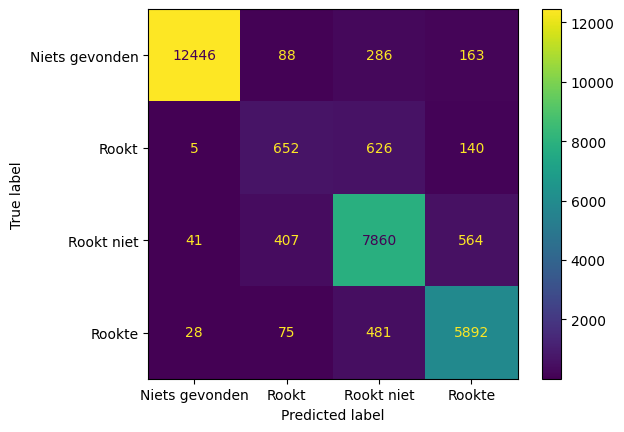

                precision    recall  f1-score   support

Niets gevonden       0.99      0.96      0.98     12983
         Rookt       0.53      0.46      0.49      1423
    Rookt niet       0.85      0.89      0.87      8872
        Rookte       0.87      0.91      0.89      6476

      accuracy                           0.90     29754
     macro avg       0.81      0.80      0.81     29754
  weighted avg       0.90      0.90      0.90     29754



In [15]:
# Ngram 1 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.30, NNZs: 594, Bias: 0.000000, T: 71408, Avg. loss: 0.328030
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 184.84, NNZs: 234, Bias: 0.000000, T: 142816, Avg. loss: 0.239771
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 226.19, NNZs: 178, Bias: 0.000000, T: 214224, Avg. loss: 0.210044
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 260.47, NNZs: 139, Bias: 0.000000, T: 285632, Avg. loss: 0.192151
Total training time: 1.07 seconds.
-- Epoch 5
Norm: 290.23, NNZs: 127, Bias: 0.000000, T: 357040, Avg. loss: 0.180126
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 316.75, NNZs: 117, Bias: 0.000000, T: 428448, Avg. loss: 0.171158
Total training time: 1.65 seconds.
-- Epoch 7
Norm: 321.44, NNZs: 115, Bias: 0.000000, T: 499856, Avg. loss: 0.166753
Total training time: 1.96 seconds.
-- Epoch 8
Norm: 326.04, NNZs: 112, Bias: 0.000000, T: 571264, Avg. loss: 0.165502
Total training time: 2.25 seconds.
-- Epoch 9
Norm: 330.56, NNZs: 110, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


Norm: 116.38, NNZs: 410, Bias: 0.000000, T: 71408, Avg. loss: 0.203967
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 160.47, NNZs: 136, Bias: 0.000000, T: 142816, Avg. loss: 0.140073
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 192.97, NNZs: 118, Bias: 0.000000, T: 214224, Avg. loss: 0.121574
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 219.65, NNZs: 102, Bias: 0.000000, T: 285632, Avg. loss: 0.112132
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 242.38, NNZs: 93, Bias: 0.000000, T: 357040, Avg. loss: 0.106135
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 262.49, NNZs: 88, Bias: 0.000000, T: 428448, Avg. loss: 0.102204
Total training time: 1.68 seconds.
-- Epoch 7
Norm: 266.02, NNZs: 86, Bias: 0.000000, T: 499856, Avg. loss: 0.100009
Total training time: 1.95 seconds.
-- Epoch 8
Norm: 269.51, NNZs: 86, Bias: 0.000000, T: 571264, Avg. loss: 0.099635
Total training time: 2.23 seconds.
-- Epoch 9
Norm: 272.93, NNZs: 85, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.5s remaining:    0.0s


Norm: 135.58, NNZs: 494, Bias: 0.000000, T: 71408, Avg. loss: 0.357702
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 192.17, NNZs: 158, Bias: 0.000000, T: 142816, Avg. loss: 0.246081
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 233.32, NNZs: 127, Bias: 0.000000, T: 214224, Avg. loss: 0.212211
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 266.59, NNZs: 115, Bias: 0.000000, T: 285632, Avg. loss: 0.194392
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 295.02, NNZs: 104, Bias: 0.000000, T: 357040, Avg. loss: 0.183713
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 320.08, NNZs: 101, Bias: 0.000000, T: 428448, Avg. loss: 0.176013
Total training time: 1.69 seconds.
-- Epoch 7
Norm: 324.46, NNZs: 103, Bias: 0.000000, T: 499856, Avg. loss: 0.172455
Total training time: 1.98 seconds.
-- Epoch 8
Norm: 328.75, NNZs: 100, Bias: 0.000000, T: 571264, Avg. loss: 0.171412
Total training time: 2.26 seconds.
-- Epoch 9
Norm: 332.96, NNZs: 100, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.303 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.04, NNZs: 600, Bias: 0.000000, T: 71408, Avg. loss: 0.329024
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 184.80, NNZs: 219, Bias: 0.000000, T: 142816, Avg. loss: 0.239941
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 226.20, NNZs: 168, Bias: 0.000000, T: 214224, Avg. loss: 0.209820
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 260.48, NNZs: 143, Bias: 0.000000, T: 285632, Avg. loss: 0.192376
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 290.23, NNZs: 121, Bias: 0.000000, T: 357040, Avg. loss: 0.179923
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 316.78, NNZs: 114, Bias: 0.000000, T: 428448, Avg. loss: 0.171173
Total training time: 1.74 seconds.
-- Epoch 7
Norm: 321.43, NNZs: 111, Bias: 0.000000, T: 499856, Avg. loss: 0.166282
Total training time: 2.02 seconds.
-- Epoch 8
Norm: 326.03, NNZs: 111, Bias: 0.000000, T: 571264, Avg. loss: 0.165117
Total training time: 2.32 seconds.
-- Epoch 9
Norm: 330.55, NNZs: 110, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


Norm: 116.42, NNZs: 370, Bias: 0.000000, T: 71408, Avg. loss: 0.204138
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 160.40, NNZs: 136, Bias: 0.000000, T: 142816, Avg. loss: 0.140078
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 193.02, NNZs: 121, Bias: 0.000000, T: 214224, Avg. loss: 0.121419
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 219.50, NNZs: 101, Bias: 0.000000, T: 285632, Avg. loss: 0.111732
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 242.23, NNZs: 94, Bias: 0.000000, T: 357040, Avg. loss: 0.105969
Total training time: 1.31 seconds.
-- Epoch 6
Norm: 262.32, NNZs: 88, Bias: 0.000000, T: 428448, Avg. loss: 0.101886
Total training time: 1.60 seconds.
-- Epoch 7
Norm: 265.92, NNZs: 86, Bias: 0.000000, T: 499856, Avg. loss: 0.100040
Total training time: 1.85 seconds.
-- Epoch 8
Norm: 269.42, NNZs: 86, Bias: 0.000000, T: 571264, Avg. loss: 0.099393
Total training time: 2.10 seconds.
-- Epoch 9
Norm: 272.86, NNZs: 85, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s


Norm: 135.58, NNZs: 462, Bias: 0.000000, T: 71408, Avg. loss: 0.356301
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 192.19, NNZs: 153, Bias: 0.000000, T: 142816, Avg. loss: 0.244238
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 233.36, NNZs: 133, Bias: 0.000000, T: 214224, Avg. loss: 0.210287
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 266.67, NNZs: 118, Bias: 0.000000, T: 285632, Avg. loss: 0.192502
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 295.06, NNZs: 105, Bias: 0.000000, T: 357040, Avg. loss: 0.181608
Total training time: 1.31 seconds.
-- Epoch 6
Norm: 320.09, NNZs: 101, Bias: 0.000000, T: 428448, Avg. loss: 0.174179
Total training time: 1.58 seconds.
-- Epoch 7
Norm: 324.48, NNZs: 99, Bias: 0.000000, T: 499856, Avg. loss: 0.170298
Total training time: 1.85 seconds.
-- Epoch 8
Norm: 328.78, NNZs: 99, Bias: 0.000000, T: 571264, Avg. loss: 0.169215
Total training time: 2.11 seconds.
-- Epoch 9
Norm: 333.01, NNZs: 98, Bias: 0.000000, T: 642672, Avg. los

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.302 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.27, NNZs: 581, Bias: 0.000000, T: 71408, Avg. loss: 0.327713
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 184.82, NNZs: 237, Bias: 0.000000, T: 142816, Avg. loss: 0.240277
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 226.15, NNZs: 174, Bias: 0.000000, T: 214224, Avg. loss: 0.210447
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 260.48, NNZs: 148, Bias: 0.000000, T: 285632, Avg. loss: 0.192593
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 290.20, NNZs: 128, Bias: 0.000000, T: 357040, Avg. loss: 0.180504
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 316.66, NNZs: 112, Bias: 0.000000, T: 428448, Avg. loss: 0.171641
Total training time: 1.60 seconds.
-- Epoch 7
Norm: 321.35, NNZs: 111, Bias: 0.000000, T: 499856, Avg. loss: 0.167063
Total training time: 1.86 seconds.
-- Epoch 8
Norm: 325.94, NNZs: 111, Bias: 0.000000, T: 571264, Avg. loss: 0.165773
Total training time: 2.13 seconds.
-- Epoch 9
Norm: 330.45, NNZs: 110, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


Norm: 116.63, NNZs: 378, Bias: 0.000000, T: 71408, Avg. loss: 0.203703
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 160.36, NNZs: 136, Bias: 0.000000, T: 142816, Avg. loss: 0.140434
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 192.97, NNZs: 118, Bias: 0.000000, T: 214224, Avg. loss: 0.121969
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 219.49, NNZs: 99, Bias: 0.000000, T: 285632, Avg. loss: 0.112508
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 242.33, NNZs: 91, Bias: 0.000000, T: 357040, Avg. loss: 0.106459
Total training time: 1.25 seconds.
-- Epoch 6
Norm: 262.41, NNZs: 90, Bias: 0.000000, T: 428448, Avg. loss: 0.102435
Total training time: 1.53 seconds.
-- Epoch 7
Norm: 266.00, NNZs: 90, Bias: 0.000000, T: 499856, Avg. loss: 0.100584
Total training time: 1.79 seconds.
-- Epoch 8
Norm: 269.52, NNZs: 90, Bias: 0.000000, T: 571264, Avg. loss: 0.100007
Total training time: 2.03 seconds.
-- Epoch 9
Norm: 272.99, NNZs: 89, Bias: 0.000000, T: 642672, Avg. loss: 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


Norm: 135.53, NNZs: 496, Bias: 0.000000, T: 71408, Avg. loss: 0.357242
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 192.04, NNZs: 158, Bias: 0.000000, T: 142816, Avg. loss: 0.245629
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 233.25, NNZs: 133, Bias: 0.000000, T: 214224, Avg. loss: 0.211443
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 266.55, NNZs: 116, Bias: 0.000000, T: 285632, Avg. loss: 0.193724
Total training time: 0.97 seconds.
-- Epoch 5
Norm: 295.04, NNZs: 109, Bias: 0.000000, T: 357040, Avg. loss: 0.182549
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 320.15, NNZs: 103, Bias: 0.000000, T: 428448, Avg. loss: 0.174949
Total training time: 1.51 seconds.
-- Epoch 7
Norm: 324.55, NNZs: 104, Bias: 0.000000, T: 499856, Avg. loss: 0.171116
Total training time: 1.76 seconds.
-- Epoch 8
Norm: 328.86, NNZs: 101, Bias: 0.000000, T: 571264, Avg. loss: 0.170145
Total training time: 2.00 seconds.
-- Epoch 9
Norm: 333.10, NNZs: 100, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.311 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.08, NNZs: 551, Bias: 0.000000, T: 71408, Avg. loss: 0.329230
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 184.66, NNZs: 225, Bias: 0.000000, T: 142816, Avg. loss: 0.241208
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 225.97, NNZs: 167, Bias: 0.000000, T: 214224, Avg. loss: 0.210982
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 260.31, NNZs: 143, Bias: 0.000000, T: 285632, Avg. loss: 0.193253
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 289.98, NNZs: 128, Bias: 0.000000, T: 357040, Avg. loss: 0.180871
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 316.51, NNZs: 112, Bias: 0.000000, T: 428448, Avg. loss: 0.172145
Total training time: 1.61 seconds.
-- Epoch 7
Norm: 321.19, NNZs: 111, Bias: 0.000000, T: 499856, Avg. loss: 0.167622
Total training time: 1.89 seconds.
-- Epoch 8
Norm: 325.78, NNZs: 111, Bias: 0.000000, T: 571264, Avg. loss: 0.166285
Total training time: 2.19 seconds.
-- Epoch 9
Norm: 330.30, NNZs: 109, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


Norm: 116.70, NNZs: 404, Bias: 0.000000, T: 71408, Avg. loss: 0.202926
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 160.54, NNZs: 140, Bias: 0.000000, T: 142816, Avg. loss: 0.139425
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 193.06, NNZs: 116, Bias: 0.000000, T: 214224, Avg. loss: 0.120940
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 219.62, NNZs: 103, Bias: 0.000000, T: 285632, Avg. loss: 0.111238
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 242.45, NNZs: 96, Bias: 0.000000, T: 357040, Avg. loss: 0.105482
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 262.52, NNZs: 89, Bias: 0.000000, T: 428448, Avg. loss: 0.101336
Total training time: 1.64 seconds.
-- Epoch 7
Norm: 266.08, NNZs: 89, Bias: 0.000000, T: 499856, Avg. loss: 0.099360
Total training time: 1.92 seconds.
-- Epoch 8
Norm: 269.58, NNZs: 89, Bias: 0.000000, T: 571264, Avg. loss: 0.098834
Total training time: 2.18 seconds.
-- Epoch 9
Norm: 273.02, NNZs: 88, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


Norm: 135.57, NNZs: 468, Bias: 0.000000, T: 71408, Avg. loss: 0.357849
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 192.16, NNZs: 164, Bias: 0.000000, T: 142816, Avg. loss: 0.246454
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 233.32, NNZs: 129, Bias: 0.000000, T: 214224, Avg. loss: 0.212149
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 266.60, NNZs: 114, Bias: 0.000000, T: 285632, Avg. loss: 0.194474
Total training time: 1.15 seconds.
-- Epoch 5
Norm: 295.00, NNZs: 108, Bias: 0.000000, T: 357040, Avg. loss: 0.183437
Total training time: 1.44 seconds.
-- Epoch 6
Norm: 320.05, NNZs: 102, Bias: 0.000000, T: 428448, Avg. loss: 0.175923
Total training time: 1.72 seconds.
-- Epoch 7
Norm: 324.43, NNZs: 102, Bias: 0.000000, T: 499856, Avg. loss: 0.172260
Total training time: 2.00 seconds.
-- Epoch 8
Norm: 328.72, NNZs: 102, Bias: 0.000000, T: 571264, Avg. loss: 0.171194
Total training time: 2.27 seconds.
-- Epoch 9
Norm: 332.94, NNZs: 101, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.307 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.19, NNZs: 552, Bias: 0.000000, T: 71409, Avg. loss: 0.328895
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 184.73, NNZs: 228, Bias: 0.000000, T: 142818, Avg. loss: 0.240973
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 226.06, NNZs: 175, Bias: 0.000000, T: 214227, Avg. loss: 0.211142
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 260.39, NNZs: 143, Bias: 0.000000, T: 285636, Avg. loss: 0.193375
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 290.15, NNZs: 123, Bias: 0.000000, T: 357045, Avg. loss: 0.181427
Total training time: 1.31 seconds.
-- Epoch 6
Norm: 316.63, NNZs: 113, Bias: 0.000000, T: 428454, Avg. loss: 0.172250
Total training time: 1.56 seconds.
-- Epoch 7
Norm: 321.32, NNZs: 111, Bias: 0.000000, T: 499863, Avg. loss: 0.168142
Total training time: 1.83 seconds.
-- Epoch 8
Norm: 325.92, NNZs: 111, Bias: 0.000000, T: 571272, Avg. loss: 0.166688
Total training time: 2.09 seconds.
-- Epoch 9
Norm: 330.45, NNZs: 110, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


Norm: 116.50, NNZs: 405, Bias: 0.000000, T: 71409, Avg. loss: 0.204196
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 160.40, NNZs: 141, Bias: 0.000000, T: 142818, Avg. loss: 0.140597
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 192.99, NNZs: 119, Bias: 0.000000, T: 214227, Avg. loss: 0.122194
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 219.56, NNZs: 104, Bias: 0.000000, T: 285636, Avg. loss: 0.112711
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 242.29, NNZs: 95, Bias: 0.000000, T: 357045, Avg. loss: 0.106679
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 262.49, NNZs: 90, Bias: 0.000000, T: 428454, Avg. loss: 0.102694
Total training time: 1.50 seconds.
-- Epoch 7
Norm: 266.02, NNZs: 88, Bias: 0.000000, T: 499863, Avg. loss: 0.100596
Total training time: 1.77 seconds.
-- Epoch 8
Norm: 269.51, NNZs: 87, Bias: 0.000000, T: 571272, Avg. loss: 0.100199
Total training time: 2.03 seconds.
-- Epoch 9
Norm: 272.95, NNZs: 86, Bias: 0.000000, T: 642681, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


Norm: 135.53, NNZs: 476, Bias: 0.000000, T: 71409, Avg. loss: 0.357875
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 192.01, NNZs: 161, Bias: 0.000000, T: 142818, Avg. loss: 0.246492
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 233.13, NNZs: 134, Bias: 0.000000, T: 214227, Avg. loss: 0.212824
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 266.40, NNZs: 114, Bias: 0.000000, T: 285636, Avg. loss: 0.195219
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 294.75, NNZs: 104, Bias: 0.000000, T: 357045, Avg. loss: 0.184079
Total training time: 1.31 seconds.
-- Epoch 6
Norm: 319.81, NNZs: 100, Bias: 0.000000, T: 428454, Avg. loss: 0.176753
Total training time: 1.57 seconds.
-- Epoch 7
Norm: 324.18, NNZs: 99, Bias: 0.000000, T: 499863, Avg. loss: 0.172986
Total training time: 1.82 seconds.
-- Epoch 8
Norm: 328.47, NNZs: 99, Bias: 0.000000, T: 571272, Avg. loss: 0.171940
Total training time: 2.08 seconds.
-- Epoch 9
Norm: 332.69, NNZs: 97, Bias: 0.000000, T: 642681, Avg. los

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.304 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 68796429018182.17, NNZs: 438984, Bias: 0.000000, T: 71408, Avg. loss: 35920012890605986250752.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 63942060139127.20, NNZs: 438984, Bias: 0.000000, T: 142816, Avg. loss: 40177871040259924426752.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 61440819737817.12, NNZs: 438984, Bias: 0.000000, T: 214224, Avg. loss: 32273320937170835341312.000000
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 59789074319976.96, NNZs: 438984, Bias: 0.000000, T: 285632, Avg. loss: 28666214173107896188928.000000
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 58569694666938.83, NNZs: 438984, Bias: 0.000000, T: 357040, Avg. loss: 26430603724328966029312.000000
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 57607842507772.46, NNZs: 438984, Bias: 0.000000, T: 428448, Avg. loss: 24867262959555033694208.000000
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 64053482963552.88, NNZs: 438980, Bias: 0.000000, T: 71408, Avg. loss: 29687750936143587180544.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 59439613447994.73, NNZs: 438984, Bias: 0.000000, T: 142816, Avg. loss: 34745139346114741272576.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 57069460787303.13, NNZs: 438984, Bias: 0.000000, T: 214224, Avg. loss: 27824741774888657747968.000000
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 55508400662057.91, NNZs: 438984, Bias: 0.000000, T: 285632, Avg. loss: 24644178377523073122304.000000
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 54354234968029.00, NNZs: 438984, Bias: 0.000000, T: 357040, Avg. loss: 22705614926845977821184.000000
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 53443521183640.40, NNZs: 438984, Bias: 0.000000, T: 428448, Avg. loss: 21350502092456874475520.000000
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 77368734764604.45, NNZs: 438984, Bias: 0.000000, T: 71408, Avg. loss: 44032121216889266372608.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 72195807461179.69, NNZs: 438984, Bias: 0.000000, T: 142816, Avg. loss: 51573172548873230483456.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 69544664488058.21, NNZs: 438984, Bias: 0.000000, T: 214224, Avg. loss: 41950688036238129102848.000000
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 67785894504300.23, NNZs: 438984, Bias: 0.000000, T: 285632, Avg. loss: 37525980869894617432064.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 66481348276017.33, NNZs: 438984, Bias: 0.000000, T: 357040, Avg. loss: 34801224327072105627648.000000
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 65453313001781.88, NNZs: 438984, Bias: 0.000000, T: 428448, Avg. loss: 32879102272149596930048.000000
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1
Norm: 72609651587889.42, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.221 total time=  47.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82985561645095.62, NNZs: 438840, Bias: 0.000000, T: 71408, Avg. loss: 50084184555710043914240.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 77643454740770.62, NNZs: 438841, Bias: 0.000000, T: 142816, Avg. loss: 59753753219593836429312.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 74896097375163.06, NNZs: 438841, Bias: 0.000000, T: 214224, Avg. loss: 48975420078725609291776.000000
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 73075019038309.77, NNZs: 438841, Bias: 0.000000, T: 285632, Avg. loss: 43996648425350812925952.000000
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 71724998814469.00, NNZs: 438841, Bias: 0.000000, T: 357040, Avg. loss: 40902641832952932073472.000000
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 70659538145343.62, NNZs: 438841, Bias: 0.000000, T: 428448, Avg. loss: 38721655376800093569024.000000
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 65888658299752.02, NNZs: 438839, Bias: 0.000000, T: 71408, Avg. loss: 33652461523755931271168.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 61078447923613.27, NNZs: 438841, Bias: 0.000000, T: 142816, Avg. loss: 37339595825514048126976.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 58627970712989.12, NNZs: 438841, Bias: 0.000000, T: 214224, Avg. loss: 29817418868170082484224.000000
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 57007858303621.73, NNZs: 438841, Bias: 0.000000, T: 285632, Avg. loss: 26382576656630000123904.000000
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 55811071575650.41, NNZs: 438841, Bias: 0.000000, T: 357040, Avg. loss: 24278504370129764089856.000000
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 54868694546652.56, NNZs: 438841, Bias: 0.000000, T: 428448, Avg. loss: 22803768480417716371456.000000
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 76412026141125.16, NNZs: 438839, Bias: 0.000000, T: 71408, Avg. loss: 40888639783246051147776.000000
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 71328537894102.47, NNZs: 438841, Bias: 0.000000, T: 142816, Avg. loss: 50699182537656573624320.000000
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 68719093990106.98, NNZs: 438841, Bias: 0.000000, T: 214224, Avg. loss: 41355638419387366506496.000000
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 66987420976057.34, NNZs: 438841, Bias: 0.000000, T: 285632, Avg. loss: 37032804508248662081536.000000
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 65704241322260.47, NNZs: 438841, Bias: 0.000000, T: 357040, Avg. loss: 34357674036835949477888.000000
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 64692068498053.85, NNZs: 438841, Bias: 0.000000, T: 428448, Avg. loss: 32495083921054126571520.000000
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1
Norm: 68086515719821.46, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.232 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 83140985745130.20, NNZs: 440053, Bias: 0.000000, T: 71408, Avg. loss: 50393962665257371435008.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 77832616613879.28, NNZs: 440054, Bias: 0.000000, T: 142816, Avg. loss: 60233673782651625930752.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 75091054058076.86, NNZs: 440054, Bias: 0.000000, T: 214224, Avg. loss: 49496327752664230133760.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 73271711184251.09, NNZs: 440054, Bias: 0.000000, T: 285632, Avg. loss: 44457388611554632531968.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 71924794211212.62, NNZs: 440054, Bias: 0.000000, T: 357040, Avg. loss: 41338452273323747311616.000000
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 70859453332373.41, NNZs: 440054, Bias: 0.000000, T: 428448, Avg. loss: 39151894839183810756608.000000
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 55046438038757.80, NNZs: 440050, Bias: 0.000000, T: 71408, Avg. loss: 23369047745714129469440.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 50777776066095.65, NNZs: 440054, Bias: 0.000000, T: 142816, Avg. loss: 25679334023406693646336.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 48618155586836.89, NNZs: 440054, Bias: 0.000000, T: 214224, Avg. loss: 20172877717576737619968.000000
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 47199641265946.78, NNZs: 440054, Bias: 0.000000, T: 285632, Avg. loss: 17709816314692099899392.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 46151688661957.83, NNZs: 440054, Bias: 0.000000, T: 357040, Avg. loss: 16214714061790442946560.000000
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 45328797610288.57, NNZs: 440054, Bias: 0.000000, T: 428448, Avg. loss: 15166031679535504687104.000000
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 87198699686128.45, NNZs: 440054, Bias: 0.000000, T: 71408, Avg. loss: 55724861997411777642496.000000
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 81682835531310.17, NNZs: 440054, Bias: 0.000000, T: 142816, Avg. loss: 66908440103489332314112.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 78851766168662.09, NNZs: 440054, Bias: 0.000000, T: 214224, Avg. loss: 55062704042530083700736.000000
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 76972059282188.98, NNZs: 440054, Bias: 0.000000, T: 285632, Avg. loss: 49542914746844757098496.000000
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 75577373219037.23, NNZs: 440054, Bias: 0.000000, T: 357040, Avg. loss: 46118386281402555432960.000000
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 74475509931727.66, NNZs: 440054, Bias: 0.000000, T: 428448, Avg. loss: 43718278431869809721344.000000
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1
Norm: 103809495300557.45, NNZs: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.232 total time=  47.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 73195409154591.33, NNZs: 439084, Bias: 0.000000, T: 71408, Avg. loss: 37222419682108746235904.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 68231760469023.42, NNZs: 439084, Bias: 0.000000, T: 142816, Avg. loss: 46406991872461281165312.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 65678485095237.55, NNZs: 439084, Bias: 0.000000, T: 214224, Avg. loss: 37727232743120157278208.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 63984467618031.50, NNZs: 439084, Bias: 0.000000, T: 285632, Avg. loss: 33741989825670373441536.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 62729537375838.95, NNZs: 439084, Bias: 0.000000, T: 357040, Avg. loss: 31235165794168513495040.000000
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 61738542867326.14, NNZs: 439084, Bias: 0.000000, T: 428448, Avg. loss: 29489941043535960604672.000000
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 104620003737643.61, NNZs: 439084, Bias: 0.000000, T: 71408, Avg. loss: 77905019511661309984768.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 98677576811237.20, NNZs: 439084, Bias: 0.000000, T: 142816, Avg. loss: 97454784830541819543552.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 95597044376714.80, NNZs: 439084, Bias: 0.000000, T: 214224, Avg. loss: 81748635384939745902592.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 93561423984311.19, NNZs: 439084, Bias: 0.000000, T: 285632, Avg. loss: 74299196077433017073664.000000
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 92047574478851.56, NNZs: 439084, Bias: 0.000000, T: 357040, Avg. loss: 69654247009674328014848.000000
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 90851966706023.27, NNZs: 439084, Bias: 0.000000, T: 428448, Avg. loss: 66383776099233280557056.000000
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.27 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 64454314492714.08, NNZs: 439083, Bias: 0.000000, T: 71408, Avg. loss: 32518153214858423697408.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 59712222426366.07, NNZs: 439084, Bias: 0.000000, T: 142816, Avg. loss: 35160562785130354049024.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 57286108015259.83, NNZs: 439084, Bias: 0.000000, T: 214224, Avg. loss: 27953656923020725321728.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 55692562134513.77, NNZs: 439084, Bias: 0.000000, T: 285632, Avg. loss: 24673724966581840117760.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 54512906312654.31, NNZs: 439084, Bias: 0.000000, T: 357040, Avg. loss: 22696097095679228248064.000000
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 53583302707892.67, NNZs: 439084, Bias: 0.000000, T: 428448, Avg. loss: 21283631425562771193856.000000
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1
Norm: 68294186591683.02, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.215 total time=  47.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 50953592100296.48, NNZs: 438824, Bias: 0.000000, T: 71409, Avg. loss: 20561109650500476731392.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 46905274385617.66, NNZs: 438836, Bias: 0.000000, T: 142818, Avg. loss: 21791285186051602120704.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 44871194262907.95, NNZs: 438836, Bias: 0.000000, T: 214227, Avg. loss: 16979566510070489415680.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 43533995167836.73, NNZs: 438836, Bias: 0.000000, T: 285636, Avg. loss: 14860871052987308441600.000000
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 42550463225390.88, NNZs: 438836, Bias: 0.000000, T: 357045, Avg. loss: 13577217288670931845120.000000
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 41780283531185.39, NNZs: 438836, Bias: 0.000000, T: 428454, Avg. loss: 12681531715913135423488.000000
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 85090226730035.47, NNZs: 438836, Bias: 0.000000, T: 71409, Avg. loss: 56857981673314197700608.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 79566863628058.38, NNZs: 438836, Bias: 0.000000, T: 142818, Avg. loss: 63786191686890151739392.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 76725217250866.16, NNZs: 438836, Bias: 0.000000, T: 214227, Avg. loss: 52135164990380839010304.000000
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 74844200147609.52, NNZs: 438836, Bias: 0.000000, T: 285636, Avg. loss: 46758494178468123639808.000000
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 73450168573781.41, NNZs: 438836, Bias: 0.000000, T: 357045, Avg. loss: 43426866905520684400640.000000
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 72349195393088.52, NNZs: 438836, Bias: 0.000000, T: 428454, Avg. loss: 41057227521793909063680.000000
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 36007002978611.15, NNZs: 438834, Bias: 0.000000, T: 71409, Avg. loss: 10086216481914283360256.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 32906527187894.93, NNZs: 438836, Bias: 0.000000, T: 142818, Avg. loss: 10560972358560820232192.000000
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 31364398373487.13, NNZs: 438836, Bias: 0.000000, T: 214227, Avg. loss: 8078470206797223297024.000000
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 30359926688257.31, NNZs: 438836, Bias: 0.000000, T: 285636, Avg. loss: 6994024325525137260544.000000
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 29624028017604.38, NNZs: 438836, Bias: 0.000000, T: 357045, Avg. loss: 6344875378448705519616.000000
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 29046464552788.90, NNZs: 438836, Bias: 0.000000, T: 428454, Avg. loss: 5895770992480573456384.000000
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1
Norm: 64898019108854.48, NNZs: 43883

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.211 total time=  47.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.83, NNZs: 973, Bias: 0.000000, T: 71408, Avg. loss: 0.150341
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 257.19, NNZs: 251, Bias: 0.000000, T: 142816, Avg. loss: 0.086731
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 298.17, NNZs: 218, Bias: 0.000000, T: 214224, Avg. loss: 0.075714
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 331.60, NNZs: 188, Bias: 0.000000, T: 285632, Avg. loss: 0.070927
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 360.58, NNZs: 187, Bias: 0.000000, T: 357040, Avg. loss: 0.067963
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 386.45, NNZs: 179, Bias: 0.000000, T: 428448, Avg. loss: 0.065819
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 1
Norm: 148.52, NNZs: 613, Bias: 0.000000, T: 71408, Avg. loss: 0.086932
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 192.27, NNZs: 184, Bias: 0.000000, T: 142816, Avg. loss: 0.056582
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 225.27, NNZs: 175, Bias: 0.000000, T: 214224, Avg. loss: 0.051892
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 253.03, NNZs: 172, Bias: 0.000000, T: 285632, Avg. loss: 0.049250
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 277.31, NNZs: 168, Bias: 0.000000, T: 357040, Avg. loss: 0.047868
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 299.33, NNZs: 156, Bias: 0.000000, T: 428448, Avg. loss: 0.047258
Total training time: 0.99 seconds.
Convergence after 6 epochs took 1.02 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


Norm: 205.64, NNZs: 984, Bias: 0.000000, T: 71408, Avg. loss: 0.167190
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 264.72, NNZs: 223, Bias: 0.000000, T: 142816, Avg. loss: 0.109180
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 309.12, NNZs: 208, Bias: 0.000000, T: 214224, Avg. loss: 0.103396
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 346.59, NNZs: 200, Bias: 0.000000, T: 285632, Avg. loss: 0.100116
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 379.45, NNZs: 192, Bias: 0.000000, T: 357040, Avg. loss: 0.097676
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 409.25, NNZs: 185, Bias: 0.000000, T: 428448, Avg. loss: 0.097203
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 190.91, NNZs: 959, Bias: 0.000000, T: 71408, Avg. loss: 0.139396
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 244.60, NNZs: 251, Bias: 0.000000, T: 142816, Avg. loss: 0.088507
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 284.89,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.981 total time=  47.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 200.33, NNZs: 1020, Bias: 0.000000, T: 71408, Avg. loss: 0.150981
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 257.68, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.087288
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 298.78, NNZs: 222, Bias: 0.000000, T: 214224, Avg. loss: 0.075769
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 332.25, NNZs: 193, Bias: 0.000000, T: 285632, Avg. loss: 0.070726
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 361.31, NNZs: 188, Bias: 0.000000, T: 357040, Avg. loss: 0.068093
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 387.25, NNZs: 182, Bias: 0.000000, T: 428448, Avg. loss: 0.065531
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.12 seconds
-- Epoch 1
Norm: 148.88, NNZs: 649, Bias: 0.000000, T: 71408, Avg. loss: 0.087379
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 192.82, NNZs: 181, Bias: 0.000000, T: 142816, Avg. loss: 0.056410
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 225.91, NNZs: 171, Bias: 0.000000, T: 214224, Avg. loss: 0.051390
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 253.59, NNZs: 167, Bias: 0.000000, T: 285632, Avg. loss: 0.049345
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 277.88, NNZs: 163, Bias: 0.000000, T: 357040, Avg. loss: 0.047937
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 299.77, NNZs: 158, Bias: 0.000000, T: 428448, Avg. loss: 0.047420
Total training time: 1.02 seconds.
Convergence after 6 epochs took 1.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 205.76, NNZs: 1078, Bias: 0.000000, T: 71408, Avg. loss: 0.166881
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 264.88, NNZs: 230, Bias: 0.000000, T: 142816, Avg. loss: 0.108059
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 309.08, NNZs: 203, Bias: 0.000000, T: 214224, Avg. loss: 0.101941
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 346.14, NNZs: 199, Bias: 0.000000, T: 285632, Avg. loss: 0.099121
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 378.97, NNZs: 194, Bias: 0.000000, T: 357040, Avg. loss: 0.097800
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 408.72, NNZs: 190, Bias: 0.000000, T: 428448, Avg. loss: 0.096430
Total training time: 1.08 seconds.
Convergence after 6 epochs took 1.11 seconds
-- Epoch 1
Norm: 191.15, NNZs: 961, Bias: 0.000000, T: 71408, Avg. loss: 0.141006
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 245.35, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.090347
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 285.68

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.979 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 200.36, NNZs: 896, Bias: 0.000000, T: 71408, Avg. loss: 0.151181
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 258.11, NNZs: 255, Bias: 0.000000, T: 142816, Avg. loss: 0.088002
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 299.44, NNZs: 216, Bias: 0.000000, T: 214224, Avg. loss: 0.077341
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 333.08, NNZs: 202, Bias: 0.000000, T: 285632, Avg. loss: 0.072036
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 362.20, NNZs: 187, Bias: 0.000000, T: 357040, Avg. loss: 0.069246
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 388.23, NNZs: 176, Bias: 0.000000, T: 428448, Avg. loss: 0.067463
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 149.09, NNZs: 545, Bias: 0.000000, T: 71408, Avg. loss: 0.087804
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 193.81, NNZs: 181, Bias: 0.000000, T: 142816, Avg. loss: 0.057498
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 226.93, NNZs: 175, Bias: 0.000000, T: 214224, Avg. loss: 0.052205
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 254.69, NNZs: 167, Bias: 0.000000, T: 285632, Avg. loss: 0.049547
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 279.10, NNZs: 163, Bias: 0.000000, T: 357040, Avg. loss: 0.048456
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 301.14, NNZs: 157, Bias: 0.000000, T: 428448, Avg. loss: 0.047890
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 206.03, NNZs: 1040, Bias: 0.000000, T: 71408, Avg. loss: 0.168300
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 265.44, NNZs: 232, Bias: 0.000000, T: 142816, Avg. loss: 0.110132
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 309.86, NNZs: 210, Bias: 0.000000, T: 214224, Avg. loss: 0.103635
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 347.29, NNZs: 203, Bias: 0.000000, T: 285632, Avg. loss: 0.101314
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 380.32, NNZs: 194, Bias: 0.000000, T: 357040, Avg. loss: 0.099706
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 410.22, NNZs: 187, Bias: 0.000000, T: 428448, Avg. loss: 0.098780
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 192.29, NNZs: 946, Bias: 0.000000, T: 71408, Avg. loss: 0.144277
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 246.98, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.091731
Total training time: 0.38 seconds.
-- Epoch 3
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.981 total time=  49.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 200.64, NNZs: 958, Bias: 0.000000, T: 71408, Avg. loss: 0.151680
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 257.97, NNZs: 246, Bias: 0.000000, T: 142816, Avg. loss: 0.087070
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 299.07, NNZs: 204, Bias: 0.000000, T: 214224, Avg. loss: 0.076359
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 332.47, NNZs: 181, Bias: 0.000000, T: 285632, Avg. loss: 0.070522
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 361.42, NNZs: 176, Bias: 0.000000, T: 357040, Avg. loss: 0.067964
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 387.34, NNZs: 173, Bias: 0.000000, T: 428448, Avg. loss: 0.065954
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1
Norm: 148.67, NNZs: 603, Bias: 0.000000, T: 71408, Avg. loss: 0.087363
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 192.78, NNZs: 182, Bias: 0.000000, T: 142816, Avg. loss: 0.057073
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 225.86, NNZs: 166, Bias: 0.000000, T: 214224, Avg. loss: 0.051852
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 253.57, NNZs: 159, Bias: 0.000000, T: 285632, Avg. loss: 0.049211
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 277.97, NNZs: 166, Bias: 0.000000, T: 357040, Avg. loss: 0.048619
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 300.01, NNZs: 162, Bias: 0.000000, T: 428448, Avg. loss: 0.047438
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 205.40, NNZs: 1059, Bias: 0.000000, T: 71408, Avg. loss: 0.166656
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 264.12, NNZs: 215, Bias: 0.000000, T: 142816, Avg. loss: 0.107588
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 308.18, NNZs: 201, Bias: 0.000000, T: 214224, Avg. loss: 0.101333
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 345.25, NNZs: 185, Bias: 0.000000, T: 285632, Avg. loss: 0.098613
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 377.86, NNZs: 189, Bias: 0.000000, T: 357040, Avg. loss: 0.096995
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 407.56, NNZs: 188, Bias: 0.000000, T: 428448, Avg. loss: 0.096270
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1
Norm: 191.12, NNZs: 1003, Bias: 0.000000, T: 71408, Avg. loss: 0.141275
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 245.35, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.089917
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 285.4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.979 total time=  48.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 200.54, NNZs: 920, Bias: 0.000000, T: 71409, Avg. loss: 0.151837
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 258.14, NNZs: 253, Bias: 0.000000, T: 142818, Avg. loss: 0.087939
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 299.42, NNZs: 220, Bias: 0.000000, T: 214227, Avg. loss: 0.077019
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 333.02, NNZs: 203, Bias: 0.000000, T: 285636, Avg. loss: 0.071365
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 361.98, NNZs: 188, Bias: 0.000000, T: 357045, Avg. loss: 0.068027
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 387.86, NNZs: 176, Bias: 0.000000, T: 428454, Avg. loss: 0.066318
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds
-- Epoch 1
Norm: 149.15, NNZs: 561, Bias: 0.000000, T: 71409, Avg. loss: 0.088784
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 193.78, NNZs: 188, Bias: 0.000000, T: 142818, Avg. loss: 0.058114
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 227.20, NNZs: 177, Bias: 0.000000, T: 214227, Avg. loss: 0.053130
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 255.15, NNZs: 162, Bias: 0.000000, T: 285636, Avg. loss: 0.050339
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 279.70, NNZs: 164, Bias: 0.000000, T: 357045, Avg. loss: 0.048839
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 301.85, NNZs: 164, Bias: 0.000000, T: 428454, Avg. loss: 0.048190
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.04 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 206.01, NNZs: 1000, Bias: 0.000000, T: 71409, Avg. loss: 0.168295
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 265.22, NNZs: 224, Bias: 0.000000, T: 142818, Avg. loss: 0.109150
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 309.65, NNZs: 207, Bias: 0.000000, T: 214227, Avg. loss: 0.102728
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 346.95, NNZs: 194, Bias: 0.000000, T: 285636, Avg. loss: 0.100167
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 379.74, NNZs: 188, Bias: 0.000000, T: 357045, Avg. loss: 0.098376
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 409.68, NNZs: 187, Bias: 0.000000, T: 428454, Avg. loss: 0.097557
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1
Norm: 191.63, NNZs: 902, Bias: 0.000000, T: 71409, Avg. loss: 0.141928
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 245.94, NNZs: 251, Bias: 0.000000, T: 142818, Avg. loss: 0.090959
Total training time: 0.34 seconds.
-- Epoch 3
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.978 total time=  47.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 65.12, NNZs: 429, Bias: 0.000000, T: 71408, Avg. loss: 0.179378
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 87.51, NNZs: 308, Bias: 0.000000, T: 142816, Avg. loss: 0.140613
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 103.48, NNZs: 271, Bias: 0.000000, T: 214224, Avg. loss: 0.134218
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 116.51, NNZs: 253, Bias: 0.000000, T: 285632, Avg. loss: 0.132245
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 127.91, NNZs: 239, Bias: 0.000000, T: 357040, Avg. loss: 0.130944
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 138.15, NNZs: 236, Bias: 0.000000, T: 428448, Avg. loss: 0.130624
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.31 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 96.15, NNZs: 461, Bias: 0.000000, T: 71408, Avg. loss: 0.099383
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 125.66, NNZs: 335, Bias: 0.000000, T: 142816, Avg. loss: 0.084972
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 149.34, NNZs: 314, Bias: 0.000000, T: 214224, Avg. loss: 0.085220
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 168.79, NNZs: 310, Bias: 0.000000, T: 285632, Avg. loss: 0.084413
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 186.61, NNZs: 298, Bias: 0.000000, T: 357040, Avg. loss: 0.084346
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 202.31, NNZs: 291, Bias: 0.000000, T: 428448, Avg. loss: 0.083439
Total training time: 1.34 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 77.67, NNZs: 448, Bias: 0.000000, T: 71408, Avg. loss: 0.180093
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 102.02, NNZs: 310, Bias: 0.000000, T: 142816, Avg. loss: 0.142214
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 119.87, NNZs: 286, Bias: 0.000000, T: 214224, Avg. loss: 0.138792
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 134.89, NNZs: 275, Bias: 0.000000, T: 285632, Avg. loss: 0.137286
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 148.15, NNZs: 272, Bias: 0.000000, T: 357040, Avg. loss: 0.136840
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 160.12, NNZs: 268, Bias: 0.000000, T: 428448, Avg. loss: 0.136296
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1
Norm: 77.59, NNZs: 455, Bias: 0.000000, T: 71408, Avg. loss: 0.147312
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 101.62, NNZs: 355, Bias: 0.000000, T: 142816, Avg. loss: 0.123114
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 119.26, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.063 total time=  47.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 65.15, NNZs: 423, Bias: 0.000000, T: 71408, Avg. loss: 0.181047
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 87.44, NNZs: 311, Bias: 0.000000, T: 142816, Avg. loss: 0.141459
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 103.27, NNZs: 278, Bias: 0.000000, T: 214224, Avg. loss: 0.135248
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 116.33, NNZs: 263, Bias: 0.000000, T: 285632, Avg. loss: 0.133311
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 127.73, NNZs: 242, Bias: 0.000000, T: 357040, Avg. loss: 0.132157
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 138.06, NNZs: 238, Bias: 0.000000, T: 428448, Avg. loss: 0.131640
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 96.44, NNZs: 448, Bias: 0.000000, T: 71408, Avg. loss: 0.100384
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 125.93, NNZs: 331, Bias: 0.000000, T: 142816, Avg. loss: 0.086039
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 148.78, NNZs: 305, Bias: 0.000000, T: 214224, Avg. loss: 0.085215
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 168.37, NNZs: 298, Bias: 0.000000, T: 285632, Avg. loss: 0.085417
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 186.36, NNZs: 290, Bias: 0.000000, T: 357040, Avg. loss: 0.085457
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 202.26, NNZs: 285, Bias: 0.000000, T: 428448, Avg. loss: 0.084608
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 78.35, NNZs: 438, Bias: 0.000000, T: 71408, Avg. loss: 0.179450
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 102.16, NNZs: 319, Bias: 0.000000, T: 142816, Avg. loss: 0.141232
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 119.91, NNZs: 291, Bias: 0.000000, T: 214224, Avg. loss: 0.137672
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 135.03, NNZs: 276, Bias: 0.000000, T: 285632, Avg. loss: 0.136433
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 148.14, NNZs: 268, Bias: 0.000000, T: 357040, Avg. loss: 0.135412
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 160.24, NNZs: 269, Bias: 0.000000, T: 428448, Avg. loss: 0.135007
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1
Norm: 77.55, NNZs: 452, Bias: 0.000000, T: 71408, Avg. loss: 0.148014
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 101.42, NNZs: 364, Bias: 0.000000, T: 142816, Avg. loss: 0.123645
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 119.12, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.063 total time=  47.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 65.18, NNZs: 425, Bias: 0.000000, T: 71408, Avg. loss: 0.179307
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 87.54, NNZs: 301, Bias: 0.000000, T: 142816, Avg. loss: 0.140141
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 103.48, NNZs: 270, Bias: 0.000000, T: 214224, Avg. loss: 0.133406
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 116.55, NNZs: 252, Bias: 0.000000, T: 285632, Avg. loss: 0.130669
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 127.96, NNZs: 241, Bias: 0.000000, T: 357040, Avg. loss: 0.130227
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 138.19, NNZs: 238, Bias: 0.000000, T: 428448, Avg. loss: 0.129854
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.38 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 95.21, NNZs: 437, Bias: 0.000000, T: 71408, Avg. loss: 0.097539
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 124.67, NNZs: 315, Bias: 0.000000, T: 142816, Avg. loss: 0.084382
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 148.10, NNZs: 302, Bias: 0.000000, T: 214224, Avg. loss: 0.083338
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 167.61, NNZs: 291, Bias: 0.000000, T: 285632, Avg. loss: 0.084074
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 185.26, NNZs: 282, Bias: 0.000000, T: 357040, Avg. loss: 0.084100
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 201.68, NNZs: 290, Bias: 0.000000, T: 428448, Avg. loss: 0.084136
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 78.06, NNZs: 423, Bias: 0.000000, T: 71408, Avg. loss: 0.177810
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 102.02, NNZs: 312, Bias: 0.000000, T: 142816, Avg. loss: 0.140113
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 119.89, NNZs: 287, Bias: 0.000000, T: 214224, Avg. loss: 0.136306
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 134.90, NNZs: 280, Bias: 0.000000, T: 285632, Avg. loss: 0.135072
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 147.97, NNZs: 271, Bias: 0.000000, T: 357040, Avg. loss: 0.134489
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 159.96, NNZs: 268, Bias: 0.000000, T: 428448, Avg. loss: 0.134008
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1
Norm: 77.41, NNZs: 468, Bias: 0.000000, T: 71408, Avg. loss: 0.147627
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 101.31, NNZs: 374, Bias: 0.000000, T: 142816, Avg. loss: 0.123034
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 119.22, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.067 total time=  47.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 65.07, NNZs: 431, Bias: 0.000000, T: 71408, Avg. loss: 0.180420
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 87.43, NNZs: 322, Bias: 0.000000, T: 142816, Avg. loss: 0.141185
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 103.49, NNZs: 288, Bias: 0.000000, T: 214224, Avg. loss: 0.134744
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 116.57, NNZs: 266, Bias: 0.000000, T: 285632, Avg. loss: 0.132199
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 128.01, NNZs: 245, Bias: 0.000000, T: 357040, Avg. loss: 0.131098
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 138.13, NNZs: 241, Bias: 0.000000, T: 428448, Avg. loss: 0.130804
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 95.38, NNZs: 426, Bias: 0.000000, T: 71408, Avg. loss: 0.098764
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 124.22, NNZs: 300, Bias: 0.000000, T: 142816, Avg. loss: 0.083601
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 146.87, NNZs: 292, Bias: 0.000000, T: 214224, Avg. loss: 0.082866
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 165.92, NNZs: 283, Bias: 0.000000, T: 285632, Avg. loss: 0.083254
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 183.30, NNZs: 281, Bias: 0.000000, T: 357040, Avg. loss: 0.082627
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 198.92, NNZs: 268, Bias: 0.000000, T: 428448, Avg. loss: 0.081782
Total training time: 1.34 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 78.03, NNZs: 419, Bias: 0.000000, T: 71408, Avg. loss: 0.180603
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 102.04, NNZs: 304, Bias: 0.000000, T: 142816, Avg. loss: 0.142144
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 119.97, NNZs: 287, Bias: 0.000000, T: 214224, Avg. loss: 0.137652
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 134.95, NNZs: 272, Bias: 0.000000, T: 285632, Avg. loss: 0.136608
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 148.04, NNZs: 261, Bias: 0.000000, T: 357040, Avg. loss: 0.135931
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 159.89, NNZs: 253, Bias: 0.000000, T: 428448, Avg. loss: 0.135610
Total training time: 1.35 seconds.
Convergence after 6 epochs took 1.37 seconds
-- Epoch 1
Norm: 77.77, NNZs: 452, Bias: 0.000000, T: 71408, Avg. loss: 0.148093
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 101.60, NNZs: 350, Bias: 0.000000, T: 142816, Avg. loss: 0.122436
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 119.53, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.065 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 65.21, NNZs: 411, Bias: 0.000000, T: 71409, Avg. loss: 0.180581
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 87.56, NNZs: 318, Bias: 0.000000, T: 142818, Avg. loss: 0.141726
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 103.65, NNZs: 274, Bias: 0.000000, T: 214227, Avg. loss: 0.135169
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 116.81, NNZs: 256, Bias: 0.000000, T: 285636, Avg. loss: 0.132931
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 128.19, NNZs: 241, Bias: 0.000000, T: 357045, Avg. loss: 0.131813
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 138.68, NNZs: 240, Bias: 0.000000, T: 428454, Avg. loss: 0.131490
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 96.38, NNZs: 438, Bias: 0.000000, T: 71409, Avg. loss: 0.099729
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 125.98, NNZs: 345, Bias: 0.000000, T: 142818, Avg. loss: 0.085299
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 149.00, NNZs: 312, Bias: 0.000000, T: 214227, Avg. loss: 0.084044
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 168.26, NNZs: 299, Bias: 0.000000, T: 285636, Avg. loss: 0.083613
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 186.35, NNZs: 299, Bias: 0.000000, T: 357045, Avg. loss: 0.084468
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 202.23, NNZs: 291, Bias: 0.000000, T: 428454, Avg. loss: 0.084076
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 78.14, NNZs: 442, Bias: 0.000000, T: 71409, Avg. loss: 0.181239
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 102.50, NNZs: 321, Bias: 0.000000, T: 142818, Avg. loss: 0.141577
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 120.22, NNZs: 287, Bias: 0.000000, T: 214227, Avg. loss: 0.138053
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 135.46, NNZs: 286, Bias: 0.000000, T: 285636, Avg. loss: 0.136649
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 148.58, NNZs: 273, Bias: 0.000000, T: 357045, Avg. loss: 0.135902
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 160.67, NNZs: 264, Bias: 0.000000, T: 428454, Avg. loss: 0.135184
Total training time: 1.37 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1
Norm: 77.99, NNZs: 462, Bias: 0.000000, T: 71409, Avg. loss: 0.147820
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 101.68, NNZs: 346, Bias: 0.000000, T: 142818, Avg. loss: 0.122592
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 119.56, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.064 total time=  48.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.40, NNZs: 759615, Bias: -0.056982, T: 71408, Avg. loss: 0.191295
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.47, NNZs: 759615, Bias: -0.076958, T: 142816, Avg. loss: 0.171058
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 5.17, NNZs: 759615, Bias: -0.083935, T: 214224, Avg. loss: 0.162374
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 5.72, NNZs: 759615, Bias: -0.085188, T: 285632, Avg. loss: 0.156766
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 6.17, NNZs: 759615, Bias: -0.083638, T: 357040, Avg. loss: 0.152539
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 6.56, NNZs: 759615, Bias: -0.080530, T: 428448, Avg. loss: 0.149085
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 3.70, NNZs: 759615, Bias: -0.602026, T: 71408, Avg. loss: 0.081411
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 3.75, NNZs: 759615, Bias: -0.692087, T: 142816, Avg. loss: 0.032597
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 3.67, NNZs: 759615, Bias: -0.726731, T: 214224, Avg. loss: 0.027524
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 3.60, NNZs: 759615, Bias: -0.746780, T: 285632, Avg. loss: 0.025821
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 3.53, NNZs: 759615, Bias: -0.760569, T: 357040, Avg. loss: 0.024966
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 3.48, NNZs: 759615, Bias: -0.770964, T: 428448, Avg. loss: 0.024448
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 2.60, NNZs: 759615, Bias: -0.319135, T: 71408, Avg. loss: 0.183020
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.31, NNZs: 759615, Bias: -0.433103, T: 142816, Avg. loss: 0.158214
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.74, NNZs: 759615, Bias: -0.509584, T: 214224, Avg. loss: 0.146244
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 759615, Bias: -0.562180, T: 285632, Avg. loss: 0.139318
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 4.21, NNZs: 759615, Bias: -0.598517, T: 357040, Avg. loss: 0.135282
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 759615, Bias: -0.624046, T: 428448, Avg. loss: 0.132800
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 3.32, NNZs: 759615, Bias: -0.424997, T: 71408, Avg. loss: 0.153601
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.29, NNZs: 759615, Bias: -0.567537, T: 142816, Avg. loss: 0.106902
Total training time: 0.27 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.389 total time=  47.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.44, NNZs: 760055, Bias: -0.085285, T: 71408, Avg. loss: 0.189390
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.47, NNZs: 760055, Bias: -0.103233, T: 142816, Avg. loss: 0.170335
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 5.15, NNZs: 760055, Bias: -0.108314, T: 214224, Avg. loss: 0.162264
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 5.67, NNZs: 760055, Bias: -0.108123, T: 285632, Avg. loss: 0.157043
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 6.10, NNZs: 760055, Bias: -0.105388, T: 357040, Avg. loss: 0.153055
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 6.48, NNZs: 760055, Bias: -0.101277, T: 428448, Avg. loss: 0.149760
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 3.70, NNZs: 760055, Bias: -0.598229, T: 71408, Avg. loss: 0.082283
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 3.75, NNZs: 760055, Bias: -0.690408, T: 142816, Avg. loss: 0.033017
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 3.67, NNZs: 760055, Bias: -0.725901, T: 214224, Avg. loss: 0.027676
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 3.60, NNZs: 760055, Bias: -0.746374, T: 285632, Avg. loss: 0.025892
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 3.53, NNZs: 760055, Bias: -0.760406, T: 357040, Avg. loss: 0.025005
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 3.48, NNZs: 760055, Bias: -0.770952, T: 428448, Avg. loss: 0.024472
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.95 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 2.57, NNZs: 760055, Bias: -0.300322, T: 71408, Avg. loss: 0.185107
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.27, NNZs: 760055, Bias: -0.414837, T: 142816, Avg. loss: 0.160311
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 3.72, NNZs: 760055, Bias: -0.493691, T: 214224, Avg. loss: 0.147926
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 760055, Bias: -0.549364, T: 285632, Avg. loss: 0.140396
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 4.23, NNZs: 760055, Bias: -0.588654, T: 357040, Avg. loss: 0.135883
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 4.38, NNZs: 760055, Bias: -0.616540, T: 428448, Avg. loss: 0.133095
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 3.30, NNZs: 760055, Bias: -0.415786, T: 71408, Avg. loss: 0.154869
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 760055, Bias: -0.560833, T: 142816, Avg. loss: 0.108150
Total training time: 0.28 second

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.409 total time=  47.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.46, NNZs: 761818, Bias: -0.081361, T: 71408, Avg. loss: 0.189354
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 4.50, NNZs: 761818, Bias: -0.099151, T: 142816, Avg. loss: 0.170003
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 5.17, NNZs: 761818, Bias: -0.103897, T: 214224, Avg. loss: 0.161884
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 761818, Bias: -0.103453, T: 285632, Avg. loss: 0.156639
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 6.13, NNZs: 761818, Bias: -0.100549, T: 357040, Avg. loss: 0.152621
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 6.51, NNZs: 761818, Bias: -0.096321, T: 428448, Avg. loss: 0.149291
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 3.70, NNZs: 761818, Bias: -0.597715, T: 71408, Avg. loss: 0.082166
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.75, NNZs: 761818, Bias: -0.689910, T: 142816, Avg. loss: 0.033084
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.67, NNZs: 761818, Bias: -0.725542, T: 214224, Avg. loss: 0.027704
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 3.60, NNZs: 761818, Bias: -0.746111, T: 285632, Avg. loss: 0.025903
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 3.53, NNZs: 761818, Bias: -0.760205, T: 357040, Avg. loss: 0.025008
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 3.47, NNZs: 761818, Bias: -0.770791, T: 428448, Avg. loss: 0.024472
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 2.58, NNZs: 761818, Bias: -0.302787, T: 71408, Avg. loss: 0.184863
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 3.28, NNZs: 761818, Bias: -0.417466, T: 142816, Avg. loss: 0.160027
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 761818, Bias: -0.495934, T: 214224, Avg. loss: 0.147652
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 761818, Bias: -0.550961, T: 285632, Avg. loss: 0.140231
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 4.22, NNZs: 761818, Bias: -0.589684, T: 357040, Avg. loss: 0.135805
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 4.37, NNZs: 761818, Bias: -0.617184, T: 428448, Avg. loss: 0.133061
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 3.31, NNZs: 761818, Bias: -0.417922, T: 71408, Avg. loss: 0.154571
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 761818, Bias: -0.562435, T: 142816, Avg. loss: 0.107972
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 4.74, NNZs: 761818, Bias: -0.627327, T: 214224, Avg. loss: 0.092222
Total training time: 0.46 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.409 total time=  47.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.45, NNZs: 760099, Bias: -0.081605, T: 71408, Avg. loss: 0.189349
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.49, NNZs: 760099, Bias: -0.099569, T: 142816, Avg. loss: 0.170114
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 5.17, NNZs: 760099, Bias: -0.104651, T: 214224, Avg. loss: 0.161906
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 760099, Bias: -0.104473, T: 285632, Avg. loss: 0.156597
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 6.14, NNZs: 760099, Bias: -0.101771, T: 357040, Avg. loss: 0.152542
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 6.52, NNZs: 760099, Bias: -0.097706, T: 428448, Avg. loss: 0.149190
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 3.70, NNZs: 760099, Bias: -0.598009, T: 71408, Avg. loss: 0.082262
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.75, NNZs: 760099, Bias: -0.690347, T: 142816, Avg. loss: 0.033035
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.67, NNZs: 760099, Bias: -0.725895, T: 214224, Avg. loss: 0.027676
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 3.60, NNZs: 760099, Bias: -0.746389, T: 285632, Avg. loss: 0.025888
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 3.53, NNZs: 760099, Bias: -0.760430, T: 357040, Avg. loss: 0.025000
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 3.47, NNZs: 760099, Bias: -0.770979, T: 428448, Avg. loss: 0.024466
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 2.57, NNZs: 760099, Bias: -0.301527, T: 71408, Avg. loss: 0.184989
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 3.28, NNZs: 760099, Bias: -0.416227, T: 142816, Avg. loss: 0.160168
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.72, NNZs: 760099, Bias: -0.494914, T: 214224, Avg. loss: 0.147794
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 760099, Bias: -0.550229, T: 285632, Avg. loss: 0.140340
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 4.22, NNZs: 760099, Bias: -0.589203, T: 357040, Avg. loss: 0.135887
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 4.37, NNZs: 760099, Bias: -0.616893, T: 428448, Avg. loss: 0.133129
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 3.31, NNZs: 760099, Bias: -0.417804, T: 71408, Avg. loss: 0.154678
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.27, NNZs: 760099, Bias: -0.562723, T: 142816, Avg. loss: 0.108177
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 4.74, NNZs: 760099, Bias: -0.627931, T: 214224, Avg. loss: 0.092355
Total training time: 0.43 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.416 total time=  47.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.45, NNZs: 759303, Bias: -0.082281, T: 71409, Avg. loss: 0.189439
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.49, NNZs: 759303, Bias: -0.100364, T: 142818, Avg. loss: 0.170173
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 5.17, NNZs: 759303, Bias: -0.105585, T: 214227, Avg. loss: 0.161982
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 759303, Bias: -0.105478, T: 285636, Avg. loss: 0.156669
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 6.14, NNZs: 759303, Bias: -0.102796, T: 357045, Avg. loss: 0.152614
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 6.52, NNZs: 759303, Bias: -0.098713, T: 428454, Avg. loss: 0.149265
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 3.71, NNZs: 759303, Bias: -0.597919, T: 71409, Avg. loss: 0.082193
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.75, NNZs: 759303, Bias: -0.689990, T: 142818, Avg. loss: 0.033086
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 3.67, NNZs: 759303, Bias: -0.725552, T: 214227, Avg. loss: 0.027739
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 3.59, NNZs: 759303, Bias: -0.746122, T: 285636, Avg. loss: 0.025937
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 3.53, NNZs: 759303, Bias: -0.760245, T: 357045, Avg. loss: 0.025036
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 3.47, NNZs: 759303, Bias: -0.770874, T: 428454, Avg. loss: 0.024494
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 2.58, NNZs: 759303, Bias: -0.305202, T: 71409, Avg. loss: 0.184520
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 3.28, NNZs: 759303, Bias: -0.419637, T: 142818, Avg. loss: 0.159687
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 759303, Bias: -0.497621, T: 214227, Avg. loss: 0.147389
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 759303, Bias: -0.552079, T: 285636, Avg. loss: 0.140091
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 4.22, NNZs: 759303, Bias: -0.590322, T: 357045, Avg. loss: 0.135761
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 759303, Bias: -0.617466, T: 428454, Avg. loss: 0.133077
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 3.31, NNZs: 759303, Bias: -0.414308, T: 71409, Avg. loss: 0.155051
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.29, NNZs: 759303, Bias: -0.559797, T: 142818, Avg. loss: 0.108133
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 4.76, NNZs: 759303, Bias: -0.625493, T: 214227, Avg. loss: 0.092156
Total training time: 0.42 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.406 total time=  47.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.92, NNZs: 630941, Bias: 0.629311, T: 71408, Avg. loss: 0.129721
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 37.41, NNZs: 659386, Bias: 0.592460, T: 142816, Avg. loss: 0.088149
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 37.09, NNZs: 665927, Bias: 0.591282, T: 214224, Avg. loss: 0.083405
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 36.88, NNZs: 668772, Bias: 0.591287, T: 285632, Avg. loss: 0.081027
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 36.84, NNZs: 670100, Bias: 0.589991, T: 357040, Avg. loss: 0.079783
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 36.81, NNZs: 670849, Bias: 0.594913, T: 428448, Avg. loss: 0.078886
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 17.23, NNZs: 393958, Bias: -0.729989, T: 71408, Avg. loss: 0.056697
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 16.29, NNZs: 448189, Bias: -0.714180, T: 142816, Avg. loss: 0.041457
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 16.07, NNZs: 483098, Bias: -0.707170, T: 214224, Avg. loss: 0.039863
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 15.97, NNZs: 505776, Bias: -0.699659, T: 285632, Avg. loss: 0.039185
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 15.94, NNZs: 520016, Bias: -0.696232, T: 357040, Avg. loss: 0.038916
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 15.90, NNZs: 530077, Bias: -0.694311, T: 428448, Avg. loss: 0.038550
Total training time: 0.96 seconds.
Convergence after 6 epochs took 0.99 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 40.93, NNZs: 696491, Bias: -0.742042, T: 71408, Avg. loss: 0.159076
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 39.61, NNZs: 713386, Bias: -0.720114, T: 142816, Avg. loss: 0.111927
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 39.39, NNZs: 717408, Bias: -0.700287, T: 214224, Avg. loss: 0.106247
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 39.26, NNZs: 718971, Bias: -0.701363, T: 285632, Avg. loss: 0.103438
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 39.22, NNZs: 720023, Bias: -0.706789, T: 357040, Avg. loss: 0.101769
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 39.21, NNZs: 720500, Bias: -0.698173, T: 428448, Avg. loss: 0.100583
Total training time: 0.97 seconds.
Convergence after 6 epochs took 1.00 seconds
-- Epoch 1
Norm: 33.26, NNZs: 622878, Bias: -0.704972, T: 71408, Avg. loss: 0.120416
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 31.78, NNZs: 665365, Bias: -0.683810, T: 142816, Avg. loss: 0.086299
Total training time: 0.30 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.859 total time=  48.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.04, NNZs: 633637, Bias: 0.617641, T: 71408, Avg. loss: 0.129664
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 37.38, NNZs: 661578, Bias: 0.606431, T: 142816, Avg. loss: 0.087970
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 37.06, NNZs: 668498, Bias: 0.609580, T: 214224, Avg. loss: 0.083113
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 36.92, NNZs: 671271, Bias: 0.600412, T: 285632, Avg. loss: 0.080922
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 36.85, NNZs: 672722, Bias: 0.595478, T: 357040, Avg. loss: 0.079507
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 36.85, NNZs: 673423, Bias: 0.592740, T: 428448, Avg. loss: 0.078702
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 17.10, NNZs: 389795, Bias: -0.736111, T: 71408, Avg. loss: 0.056888
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 16.27, NNZs: 443351, Bias: -0.709224, T: 142816, Avg. loss: 0.041425
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 16.03, NNZs: 477426, Bias: -0.709742, T: 214224, Avg. loss: 0.039718
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 15.95, NNZs: 500102, Bias: -0.702744, T: 285632, Avg. loss: 0.039100
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 15.91, NNZs: 514903, Bias: -0.694541, T: 357040, Avg. loss: 0.038773
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 15.89, NNZs: 525570, Bias: -0.696077, T: 428448, Avg. loss: 0.038548
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.92 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 1
Norm: 41.01, NNZs: 696756, Bias: -0.730060, T: 71408, Avg. loss: 0.157748
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 39.75, NNZs: 713658, Bias: -0.726866, T: 142816, Avg. loss: 0.111073
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 39.43, NNZs: 717804, Bias: -0.706987, T: 214224, Avg. loss: 0.105263
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 39.39, NNZs: 719441, Bias: -0.703791, T: 285632, Avg. loss: 0.102603
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 39.36, NNZs: 720463, Bias: -0.704862, T: 357040, Avg. loss: 0.100971
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 39.36, NNZs: 721007, Bias: -0.699375, T: 428448, Avg. loss: 0.099914
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.97 seconds
-- Epoch 1
Norm: 33.20, NNZs: 623877, Bias: -0.721927, T: 71408, Avg. loss: 0.118905
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 31.80, NNZs: 665537, Bias: -0.703572, T: 142816, Avg. loss: 0.085579
Total training time: 0.3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.862 total time=  48.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.03, NNZs: 633687, Bias: 0.627400, T: 71408, Avg. loss: 0.129511
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 37.43, NNZs: 662524, Bias: 0.608101, T: 142816, Avg. loss: 0.087347
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 37.11, NNZs: 669229, Bias: 0.609427, T: 214224, Avg. loss: 0.082713
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 36.93, NNZs: 671995, Bias: 0.606817, T: 285632, Avg. loss: 0.080411
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 36.93, NNZs: 673265, Bias: 0.599754, T: 357040, Avg. loss: 0.079289
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 36.89, NNZs: 673980, Bias: 0.600080, T: 428448, Avg. loss: 0.078298
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 17.06, NNZs: 398177, Bias: -0.736124, T: 71408, Avg. loss: 0.057780
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 16.11, NNZs: 451070, Bias: -0.717224, T: 142816, Avg. loss: 0.041728
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 15.90, NNZs: 485867, Bias: -0.705997, T: 214224, Avg. loss: 0.040422
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 15.83, NNZs: 508623, Bias: -0.699576, T: 285632, Avg. loss: 0.039683
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 15.78, NNZs: 522796, Bias: -0.696108, T: 357040, Avg. loss: 0.039265
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 15.74, NNZs: 533095, Bias: -0.695018, T: 428448, Avg. loss: 0.039006
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 41.02, NNZs: 697374, Bias: -0.755972, T: 71408, Avg. loss: 0.157801
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 2
Norm: 39.64, NNZs: 714502, Bias: -0.730685, T: 142816, Avg. loss: 0.111834
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 39.36, NNZs: 718690, Bias: -0.723520, T: 214224, Avg. loss: 0.105604
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 39.29, NNZs: 720332, Bias: -0.708013, T: 285632, Avg. loss: 0.102849
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 39.24, NNZs: 721167, Bias: -0.708140, T: 357040, Avg. loss: 0.101236
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 39.22, NNZs: 721581, Bias: -0.703896, T: 428448, Avg. loss: 0.100277
Total training time: 0.95 seconds.
Convergence after 6 epochs took 0.98 seconds
-- Epoch 1
Norm: 33.19, NNZs: 624629, Bias: -0.716389, T: 71408, Avg. loss: 0.118280
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 31.89, NNZs: 666290, Bias: -0.699882, T: 142816, Avg. loss: 0.085784
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 31.58, NNZs: 679796, Bias: -0.689320, T: 214224, Avg. loss: 0.081661
Total training time: 0.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.864 total time=  47.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.96, NNZs: 634652, Bias: 0.637001, T: 71408, Avg. loss: 0.130954
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 37.35, NNZs: 662629, Bias: 0.604406, T: 142816, Avg. loss: 0.089046
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 36.96, NNZs: 669182, Bias: 0.596000, T: 214224, Avg. loss: 0.084257
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 36.80, NNZs: 672047, Bias: 0.599050, T: 285632, Avg. loss: 0.082120
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 36.77, NNZs: 673424, Bias: 0.595975, T: 357040, Avg. loss: 0.080835
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 36.74, NNZs: 674323, Bias: 0.594130, T: 428448, Avg. loss: 0.079855
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 17.12, NNZs: 392691, Bias: -0.734721, T: 71408, Avg. loss: 0.058148
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 16.21, NNZs: 446228, Bias: -0.722728, T: 142816, Avg. loss: 0.041441
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 16.03, NNZs: 481042, Bias: -0.703316, T: 214224, Avg. loss: 0.040019
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 15.93, NNZs: 502753, Bias: -0.705897, T: 285632, Avg. loss: 0.039205
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 15.90, NNZs: 517688, Bias: -0.699304, T: 357040, Avg. loss: 0.038964
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 15.88, NNZs: 528285, Bias: -0.695091, T: 428448, Avg. loss: 0.038720
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 41.07, NNZs: 696359, Bias: -0.753084, T: 71408, Avg. loss: 0.158928
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 2
Norm: 39.78, NNZs: 713166, Bias: -0.724393, T: 142816, Avg. loss: 0.111725
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 39.49, NNZs: 716927, Bias: -0.717443, T: 214224, Avg. loss: 0.105973
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 39.45, NNZs: 718956, Bias: -0.700328, T: 285632, Avg. loss: 0.103242
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 39.43, NNZs: 719749, Bias: -0.703905, T: 357040, Avg. loss: 0.101603
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 39.46, NNZs: 720361, Bias: -0.704435, T: 428448, Avg. loss: 0.100479
Total training time: 0.97 seconds.
Convergence after 6 epochs took 1.00 seconds
-- Epoch 1
Norm: 33.20, NNZs: 622831, Bias: -0.716251, T: 71408, Avg. loss: 0.119955
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 31.93, NNZs: 664941, Bias: -0.692604, T: 142816, Avg. loss: 0.085958
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 31.67, NNZs: 678454, Bias: -0.689307, T: 214224, Avg. loss: 0.081995
Total training time: 0.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.861 total time=  47.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.94, NNZs: 630945, Bias: 0.644517, T: 71409, Avg. loss: 0.129969
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 37.37, NNZs: 659427, Bias: 0.609286, T: 142818, Avg. loss: 0.088419
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 37.02, NNZs: 666332, Bias: 0.602657, T: 214227, Avg. loss: 0.083605
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 36.90, NNZs: 669087, Bias: 0.604355, T: 285636, Avg. loss: 0.081437
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 36.83, NNZs: 670328, Bias: 0.603272, T: 357045, Avg. loss: 0.080097
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 36.81, NNZs: 671085, Bias: 0.599182, T: 428454, Avg. loss: 0.079199
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 17.27, NNZs: 394657, Bias: -0.735005, T: 71409, Avg. loss: 0.058423
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 16.28, NNZs: 448547, Bias: -0.717512, T: 142818, Avg. loss: 0.041341
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 16.06, NNZs: 482933, Bias: -0.707799, T: 214227, Avg. loss: 0.039743
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 15.96, NNZs: 504794, Bias: -0.702496, T: 285636, Avg. loss: 0.039133
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 15.92, NNZs: 519779, Bias: -0.697203, T: 357045, Avg. loss: 0.038772
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 15.88, NNZs: 530243, Bias: -0.696945, T: 428454, Avg. loss: 0.038558
Total training time: 0.96 seconds.
Convergence after 6 epochs took 0.99 seconds
-- Epoch 1
Norm: 40.95, NNZs: 696578, Bias: -0.771995, T: 71409, Avg. loss: 0.158500
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


Norm: 39.69, NNZs: 713055, Bias: -0.714090, T: 142818, Avg. loss: 0.111950
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 39.44, NNZs: 717088, Bias: -0.718541, T: 214227, Avg. loss: 0.106285
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 39.30, NNZs: 718792, Bias: -0.707490, T: 285636, Avg. loss: 0.103199
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 39.27, NNZs: 719762, Bias: -0.704318, T: 357045, Avg. loss: 0.101680
Total training time: 0.82 seconds.
-- Epoch 6
Norm: 39.27, NNZs: 720284, Bias: -0.703922, T: 428454, Avg. loss: 0.100643
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.03 seconds
-- Epoch 1
Norm: 33.17, NNZs: 621757, Bias: -0.725029, T: 71409, Avg. loss: 0.120513
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 31.83, NNZs: 664764, Bias: -0.687756, T: 142818, Avg. loss: 0.086164
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 31.56, NNZs: 678368, Bias: -0.688595, T: 214227, Avg. loss: 0.082134
Total training time: 0.45 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.860 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.21, NNZs: 272, Bias: 0.000000, T: 71408, Avg. loss: 0.220456
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 237.52, NNZs: 168, Bias: 0.000000, T: 142816, Avg. loss: 0.128639
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 279.68, NNZs: 140, Bias: 0.000000, T: 214224, Avg. loss: 0.109934
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 313.41, NNZs: 125, Bias: 0.000000, T: 285632, Avg. loss: 0.101711
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 342.42, NNZs: 123, Bias: 0.000000, T: 357040, Avg. loss: 0.097099
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 368.17, NNZs: 120, Bias: 0.000000, T: 428448, Avg. loss: 0.093945
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 238.26, NNZs: 247, Bias: 0.000000, T: 71408, Avg. loss: 0.088248
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 297.31, NNZs: 164, Bias: 0.000000, T: 142816, Avg. loss: 0.060553
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 341.44, NNZs: 148, Bias: 0.000000, T: 214224, Avg. loss: 0.056306
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 378.71, NNZs: 141, Bias: 0.000000, T: 285632, Avg. loss: 0.053990
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 412.04, NNZs: 141, Bias: 0.000000, T: 357040, Avg. loss: 0.051848
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 442.70, NNZs: 137, Bias: 0.000000, T: 428448, Avg. loss: 0.050354
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 214.41, NNZs: 268, Bias: 0.000000, T: 71408, Avg. loss: 0.199339
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 277.46, NNZs: 185, Bias: 0.000000, T: 142816, Avg. loss: 0.114363
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 322.99, NNZs: 165, Bias: 0.000000, T: 214224, Avg. loss: 0.104374
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 360.70, NNZs: 152, Bias: 0.000000, T: 285632, Avg. loss: 0.100172
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 393.53, NNZs: 151, Bias: 0.000000, T: 357040, Avg. loss: 0.097786
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 423.29, NNZs: 150, Bias: 0.000000, T: 428448, Avg. loss: 0.096279
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 211.47, NNZs: 302, Bias: 0.000000, T: 71408, Avg. loss: 0.145468
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 271.14, NNZs: 221, Bias: 0.000000, T: 142816, Avg. loss: 0.086143
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 314.00, NNZs: 196, Bias: 0.000000, T: 214224, Avg. loss: 0.079223
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 348.98

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.971 total time=  45.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.30, NNZs: 272, Bias: 0.000000, T: 71408, Avg. loss: 0.222296
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 237.70, NNZs: 162, Bias: 0.000000, T: 142816, Avg. loss: 0.129777
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 280.02, NNZs: 143, Bias: 0.000000, T: 214224, Avg. loss: 0.111242
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 313.90, NNZs: 126, Bias: 0.000000, T: 285632, Avg. loss: 0.102788
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 342.89, NNZs: 117, Bias: 0.000000, T: 357040, Avg. loss: 0.097743
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 368.50, NNZs: 114, Bias: 0.000000, T: 428448, Avg. loss: 0.094809
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 238.46, NNZs: 235, Bias: 0.000000, T: 71408, Avg. loss: 0.089341
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 297.36, NNZs: 151, Bias: 0.000000, T: 142816, Avg. loss: 0.059730
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 341.27, NNZs: 139, Bias: 0.000000, T: 214224, Avg. loss: 0.055509
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 378.23, NNZs: 135, Bias: 0.000000, T: 285632, Avg. loss: 0.053277
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 411.23, NNZs: 133, Bias: 0.000000, T: 357040, Avg. loss: 0.051760
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 441.40, NNZs: 132, Bias: 0.000000, T: 428448, Avg. loss: 0.049958
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 214.54, NNZs: 272, Bias: 0.000000, T: 71408, Avg. loss: 0.199120
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 277.61, NNZs: 193, Bias: 0.000000, T: 142816, Avg. loss: 0.113898
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 323.15, NNZs: 174, Bias: 0.000000, T: 214224, Avg. loss: 0.104024
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 360.75, NNZs: 166, Bias: 0.000000, T: 285632, Avg. loss: 0.100007
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 393.48, NNZs: 158, Bias: 0.000000, T: 357040, Avg. loss: 0.097409
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 423.07, NNZs: 152, Bias: 0.000000, T: 428448, Avg. loss: 0.095953
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 211.59, NNZs: 299, Bias: 0.000000, T: 71408, Avg. loss: 0.144443
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 271.06, NNZs: 214, Bias: 0.000000, T: 142816, Avg. loss: 0.084967
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 313.41, NNZs: 197, Bias: 0.000000, T: 214224, Avg. loss: 0.077818
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 348.10

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.974 total time=  46.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.06, NNZs: 275, Bias: 0.000000, T: 71408, Avg. loss: 0.220006
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 237.36, NNZs: 162, Bias: 0.000000, T: 142816, Avg. loss: 0.128542
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 279.38, NNZs: 132, Bias: 0.000000, T: 214224, Avg. loss: 0.110174
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 312.99, NNZs: 124, Bias: 0.000000, T: 285632, Avg. loss: 0.101837
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 341.70, NNZs: 119, Bias: 0.000000, T: 357040, Avg. loss: 0.097401
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 367.21, NNZs: 118, Bias: 0.000000, T: 428448, Avg. loss: 0.094595
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 237.64, NNZs: 218, Bias: 0.000000, T: 71408, Avg. loss: 0.089648
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 297.08, NNZs: 160, Bias: 0.000000, T: 142816, Avg. loss: 0.059825
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 340.79, NNZs: 147, Bias: 0.000000, T: 214224, Avg. loss: 0.055947
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 378.82, NNZs: 142, Bias: 0.000000, T: 285632, Avg. loss: 0.053668
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 412.27, NNZs: 140, Bias: 0.000000, T: 357040, Avg. loss: 0.051856
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 442.96, NNZs: 134, Bias: 0.000000, T: 428448, Avg. loss: 0.050312
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 214.63, NNZs: 263, Bias: 0.000000, T: 71408, Avg. loss: 0.197911
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


-- Epoch 2
Norm: 277.55, NNZs: 188, Bias: 0.000000, T: 142816, Avg. loss: 0.112907
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 323.22, NNZs: 170, Bias: 0.000000, T: 214224, Avg. loss: 0.103022
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 360.77, NNZs: 153, Bias: 0.000000, T: 285632, Avg. loss: 0.098746
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 393.56, NNZs: 149, Bias: 0.000000, T: 357040, Avg. loss: 0.096293
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 423.28, NNZs: 144, Bias: 0.000000, T: 428448, Avg. loss: 0.094643
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 211.18, NNZs: 288, Bias: 0.000000, T: 71408, Avg. loss: 0.144619
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 270.68, NNZs: 218, Bias: 0.000000, T: 142816, Avg. loss: 0.086100
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 313.24, NNZs: 201, Bias: 0.000000, T: 214224, Avg. loss: 0.079343
Total training time: 0.44 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.977 total time=  46.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.29, NNZs: 274, Bias: 0.000000, T: 71408, Avg. loss: 0.221628
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 238.04, NNZs: 178, Bias: 0.000000, T: 142816, Avg. loss: 0.128999
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 280.55, NNZs: 147, Bias: 0.000000, T: 214224, Avg. loss: 0.109930
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 314.65, NNZs: 131, Bias: 0.000000, T: 285632, Avg. loss: 0.101153
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 343.75, NNZs: 125, Bias: 0.000000, T: 357040, Avg. loss: 0.096144
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 369.52, NNZs: 115, Bias: 0.000000, T: 428448, Avg. loss: 0.093077
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 237.34, NNZs: 219, Bias: 0.000000, T: 71408, Avg. loss: 0.087599
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 295.80, NNZs: 156, Bias: 0.000000, T: 142816, Avg. loss: 0.058963
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 338.88, NNZs: 142, Bias: 0.000000, T: 214224, Avg. loss: 0.055275
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 376.24, NNZs: 134, Bias: 0.000000, T: 285632, Avg. loss: 0.053141
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 409.55, NNZs: 128, Bias: 0.000000, T: 357040, Avg. loss: 0.051311
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 439.83, NNZs: 128, Bias: 0.000000, T: 428448, Avg. loss: 0.049736
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 214.77, NNZs: 269, Bias: 0.000000, T: 71408, Avg. loss: 0.198467
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 278.00, NNZs: 192, Bias: 0.000000, T: 142816, Avg. loss: 0.113188
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 323.59, NNZs: 169, Bias: 0.000000, T: 214224, Avg. loss: 0.103093
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 361.16, NNZs: 157, Bias: 0.000000, T: 285632, Avg. loss: 0.098994
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 393.98, NNZs: 150, Bias: 0.000000, T: 357040, Avg. loss: 0.096644
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 423.58, NNZs: 147, Bias: 0.000000, T: 428448, Avg. loss: 0.095498
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 211.79, NNZs: 287, Bias: 0.000000, T: 71408, Avg. loss: 0.145128
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 271.50, NNZs: 217, Bias: 0.000000, T: 142816, Avg. loss: 0.085034
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 313.99, NNZs: 195, Bias: 0.000000, T: 214224, Avg. loss: 0.078192
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 348.89

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.978 total time=  46.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.53, NNZs: 279, Bias: 0.000000, T: 71409, Avg. loss: 0.222120
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 238.15, NNZs: 165, Bias: 0.000000, T: 142818, Avg. loss: 0.129675
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 280.60, NNZs: 136, Bias: 0.000000, T: 214227, Avg. loss: 0.110423
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 314.53, NNZs: 124, Bias: 0.000000, T: 285636, Avg. loss: 0.101724
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 343.53, NNZs: 113, Bias: 0.000000, T: 357045, Avg. loss: 0.097071
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 369.22, NNZs: 113, Bias: 0.000000, T: 428454, Avg. loss: 0.094134
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 238.39, NNZs: 229, Bias: 0.000000, T: 71409, Avg. loss: 0.089251
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 298.33, NNZs: 161, Bias: 0.000000, T: 142818, Avg. loss: 0.059767
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 342.27, NNZs: 144, Bias: 0.000000, T: 214227, Avg. loss: 0.055755
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 379.96, NNZs: 147, Bias: 0.000000, T: 285636, Avg. loss: 0.053595
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 413.08, NNZs: 141, Bias: 0.000000, T: 357045, Avg. loss: 0.051228
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 443.52, NNZs: 140, Bias: 0.000000, T: 428454, Avg. loss: 0.049648
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 214.77, NNZs: 261, Bias: 0.000000, T: 71409, Avg. loss: 0.198859
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 277.94, NNZs: 200, Bias: 0.000000, T: 142818, Avg. loss: 0.113348
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 323.60, NNZs: 174, Bias: 0.000000, T: 214227, Avg. loss: 0.103637
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 361.23, NNZs: 158, Bias: 0.000000, T: 285636, Avg. loss: 0.099358
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 393.92, NNZs: 153, Bias: 0.000000, T: 357045, Avg. loss: 0.096872
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 423.57, NNZs: 151, Bias: 0.000000, T: 428454, Avg. loss: 0.095517
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 211.86, NNZs: 273, Bias: 0.000000, T: 71409, Avg. loss: 0.145276
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 271.29, NNZs: 210, Bias: 0.000000, T: 142818, Avg. loss: 0.085925
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 314.16, NNZs: 193, Bias: 0.000000, T: 214227, Avg. loss: 0.079050
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 349.32

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.977 total time=  45.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.67, NNZs: 438977, Bias: 0.000000, T: 71408, Avg. loss: 0.689763
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 438977, Bias: 0.000000, T: 142816, Avg. loss: 0.672070
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 438977, Bias: 0.000000, T: 214224, Avg. loss: 0.661090
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1.24, NNZs: 438977, Bias: 0.000000, T: 285632, Avg. loss: 0.652391
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 438977, Bias: 0.000000, T: 357040, Avg. loss: 0.644991
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 1.50, NNZs: 438977, Bias: 0.000000, T: 428448, Avg. loss: 0.638462
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.71, NNZs: 438977, Bias: 0.000000, T: 71408, Avg. loss: 0.686791
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.95, NNZs: 438977, Bias: 0.000000, T: 142816, Avg. loss: 0.665677
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 438977, Bias: 0.000000, T: 214224, Avg. loss: 0.652657
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1.29, NNZs: 438977, Bias: 0.000000, T: 285632, Avg. loss: 0.642254
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 1.43, NNZs: 438977, Bias: 0.000000, T: 357040, Avg. loss: 0.633525
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 438977, Bias: 0.000000, T: 428448, Avg. loss: 0.625654
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.47, NNZs: 438977, Bias: 0.000000, T: 71408, Avg. loss: 0.701624
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 0.64, NNZs: 438977, Bias: 0.000000, T: 142816, Avg. loss: 0.692524
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 438977, Bias: 0.000000, T: 214224, Avg. loss: 0.686907
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 438977, Bias: 0.000000, T: 285632, Avg. loss: 0.682457
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 438977, Bias: 0.000000, T: 357040, Avg. loss: 0.678670
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 438977, Bias: 0.000000, T: 428448, Avg. loss: 0.675318
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.61, NNZs: 438977, Bias: 0.000000, T: 71408, Avg. loss: 0.692347
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 438977, Bias: 0.000000, T: 142816, Avg. loss: 0.676350
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 438977, Bias: 0.000000, T: 214224, Avg. loss: 0.666425
Total training time: 0.31 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.580 total time=  44.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.68, NNZs: 438828, Bias: 0.000000, T: 71408, Avg. loss: 0.688630
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.93, NNZs: 438828, Bias: 0.000000, T: 142816, Avg. loss: 0.670643
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 438828, Bias: 0.000000, T: 214224, Avg. loss: 0.659465
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 438828, Bias: 0.000000, T: 285632, Avg. loss: 0.650620
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 1.40, NNZs: 438828, Bias: 0.000000, T: 357040, Avg. loss: 0.643090
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 438828, Bias: 0.000000, T: 428448, Avg. loss: 0.636448
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 0.71, NNZs: 438828, Bias: 0.000000, T: 71408, Avg. loss: 0.684810
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.96, NNZs: 438828, Bias: 0.000000, T: 142816, Avg. loss: 0.663778
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 438828, Bias: 0.000000, T: 214224, Avg. loss: 0.650930
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.31, NNZs: 438828, Bias: 0.000000, T: 285632, Avg. loss: 0.640581
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.45, NNZs: 438828, Bias: 0.000000, T: 357040, Avg. loss: 0.631908
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.58, NNZs: 438828, Bias: 0.000000, T: 428448, Avg. loss: 0.624147
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.46, NNZs: 438828, Bias: 0.000000, T: 71408, Avg. loss: 0.701717
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 0.63, NNZs: 438828, Bias: 0.000000, T: 142816, Avg. loss: 0.692658
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.76, NNZs: 438828, Bias: 0.000000, T: 214224, Avg. loss: 0.687033
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 438828, Bias: 0.000000, T: 285632, Avg. loss: 0.682576
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 0.96, NNZs: 438828, Bias: 0.000000, T: 357040, Avg. loss: 0.678783
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 438828, Bias: 0.000000, T: 428448, Avg. loss: 0.675432
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.61, NNZs: 438828, Bias: 0.000000, T: 71408, Avg. loss: 0.692183
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.84, NNZs: 438828, Bias: 0.000000, T: 142816, Avg. loss: 0.675902
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 438828, Bias: 0.000000, T: 214224, Avg. loss: 0.665812
Total training time: 0.30 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.574 total time=  44.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.66, NNZs: 440056, Bias: 0.000000, T: 71408, Avg. loss: 0.690008
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 440056, Bias: 0.000000, T: 142816, Avg. loss: 0.672394
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 440056, Bias: 0.000000, T: 214224, Avg. loss: 0.661440
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.24, NNZs: 440056, Bias: 0.000000, T: 285632, Avg. loss: 0.652761
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.37, NNZs: 440056, Bias: 0.000000, T: 357040, Avg. loss: 0.645377
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.49, NNZs: 440056, Bias: 0.000000, T: 428448, Avg. loss: 0.638857
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 0.70, NNZs: 440056, Bias: 0.000000, T: 71408, Avg. loss: 0.686835
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.95, NNZs: 440056, Bias: 0.000000, T: 142816, Avg. loss: 0.665833
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 440056, Bias: 0.000000, T: 214224, Avg. loss: 0.652910
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.29, NNZs: 440056, Bias: 0.000000, T: 285632, Avg. loss: 0.642615
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.43, NNZs: 440056, Bias: 0.000000, T: 357040, Avg. loss: 0.633876
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 440056, Bias: 0.000000, T: 428448, Avg. loss: 0.626138
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 0.47, NNZs: 440056, Bias: 0.000000, T: 71408, Avg. loss: 0.701370
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.64, NNZs: 440056, Bias: 0.000000, T: 142816, Avg. loss: 0.692275
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 440056, Bias: 0.000000, T: 214224, Avg. loss: 0.686661
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 440056, Bias: 0.000000, T: 285632, Avg. loss: 0.682211
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 440056, Bias: 0.000000, T: 357040, Avg. loss: 0.678428
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 440056, Bias: 0.000000, T: 428448, Avg. loss: 0.675081
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.62, NNZs: 440056, Bias: 0.000000, T: 71408, Avg. loss: 0.692014
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.84, NNZs: 440056, Bias: 0.000000, T: 142816, Avg. loss: 0.675840
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 440056, Bias: 0.000000, T: 214224, Avg. loss: 0.665843
Total training time: 0.30 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.580 total time=  44.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.67, NNZs: 439065, Bias: 0.000000, T: 71408, Avg. loss: 0.689729
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 439065, Bias: 0.000000, T: 142816, Avg. loss: 0.672016
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 439065, Bias: 0.000000, T: 214224, Avg. loss: 0.661031
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 439065, Bias: 0.000000, T: 285632, Avg. loss: 0.652322
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 439065, Bias: 0.000000, T: 357040, Avg. loss: 0.644919
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.50, NNZs: 439065, Bias: 0.000000, T: 428448, Avg. loss: 0.638373
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 0.69, NNZs: 439065, Bias: 0.000000, T: 71408, Avg. loss: 0.686617
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.94, NNZs: 439065, Bias: 0.000000, T: 142816, Avg. loss: 0.665684
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 439065, Bias: 0.000000, T: 214224, Avg. loss: 0.652762
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1.29, NNZs: 439065, Bias: 0.000000, T: 285632, Avg. loss: 0.642418
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.43, NNZs: 439065, Bias: 0.000000, T: 357040, Avg. loss: 0.633685
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 439065, Bias: 0.000000, T: 428448, Avg. loss: 0.625937
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.48, NNZs: 439065, Bias: 0.000000, T: 71408, Avg. loss: 0.701236
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.65, NNZs: 439065, Bias: 0.000000, T: 142816, Avg. loss: 0.692184
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 439065, Bias: 0.000000, T: 214224, Avg. loss: 0.686589
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 439065, Bias: 0.000000, T: 285632, Avg. loss: 0.682160
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 439065, Bias: 0.000000, T: 357040, Avg. loss: 0.678390
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 439065, Bias: 0.000000, T: 428448, Avg. loss: 0.675059
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 0.61, NNZs: 439065, Bias: 0.000000, T: 71408, Avg. loss: 0.692130
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.84, NNZs: 439065, Bias: 0.000000, T: 142816, Avg. loss: 0.676251
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 439065, Bias: 0.000000, T: 214224, Avg. loss: 0.666413
Total training time: 0.31 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.578 total time=  45.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.67, NNZs: 438832, Bias: 0.000000, T: 71409, Avg. loss: 0.689586
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 438832, Bias: 0.000000, T: 142818, Avg. loss: 0.671750
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 438832, Bias: 0.000000, T: 214227, Avg. loss: 0.660674
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 438832, Bias: 0.000000, T: 285636, Avg. loss: 0.651899
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 438832, Bias: 0.000000, T: 357045, Avg. loss: 0.644425
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.50, NNZs: 438832, Bias: 0.000000, T: 428454, Avg. loss: 0.637825
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.70, NNZs: 438832, Bias: 0.000000, T: 71409, Avg. loss: 0.685026
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.95, NNZs: 438832, Bias: 0.000000, T: 142818, Avg. loss: 0.664248
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 438832, Bias: 0.000000, T: 214227, Avg. loss: 0.651320
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.30, NNZs: 438832, Bias: 0.000000, T: 285636, Avg. loss: 0.641029
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 438832, Bias: 0.000000, T: 357045, Avg. loss: 0.632295
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 438832, Bias: 0.000000, T: 428454, Avg. loss: 0.624617
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.47, NNZs: 438832, Bias: 0.000000, T: 71409, Avg. loss: 0.701638
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.64, NNZs: 438832, Bias: 0.000000, T: 142818, Avg. loss: 0.692516
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 438832, Bias: 0.000000, T: 214227, Avg. loss: 0.686871
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 438832, Bias: 0.000000, T: 285636, Avg. loss: 0.682399
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 438832, Bias: 0.000000, T: 357045, Avg. loss: 0.678595
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 438832, Bias: 0.000000, T: 428454, Avg. loss: 0.675238
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 0.61, NNZs: 438832, Bias: 0.000000, T: 71409, Avg. loss: 0.692106
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.84, NNZs: 438832, Bias: 0.000000, T: 142818, Avg. loss: 0.675915
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 438832, Bias: 0.000000, T: 214227, Avg. loss: 0.665876
Total training time: 0.30 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.576 total time=  45.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.26, NNZs: 439009, Bias: 0.000000, T: 71408, Avg. loss: 0.356738
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.29, NNZs: 439009, Bias: 0.000000, T: 142816, Avg. loss: 0.336950
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 37.29, NNZs: 439009, Bias: 0.000000, T: 214224, Avg. loss: 0.336940
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 37.29, NNZs: 439009, Bias: 0.000000, T: 285632, Avg. loss: 0.336940
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 37.29, NNZs: 439009, Bias: 0.000000, T: 357040, Avg. loss: 0.336940
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 37.29, NNZs: 439009, Bias: 0.000000, T: 428448, Avg. loss: 0.336940
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 36.15, NNZs: 439009, Bias: 0.000000, T: 499856, Avg. loss: 0.332870
Total training time: 0.86 seconds.
-- Epoch 8
Norm: 35.95, NNZs: 439009, Bias: 0.000000, T: 571264, Avg. loss: 0.332789
Total training time: 0.99 seconds.
-- Epoch 9
Norm: 35.91, NNZs: 439009, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.87, NNZs: 439009, Bias: 0.000000, T: 142816, Avg. loss: 0.226668
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 55.87, NNZs: 439009, Bias: 0.000000, T: 214224, Avg. loss: 0.226692
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 55.87, NNZs: 439009, Bias: 0.000000, T: 285632, Avg. loss: 0.226692
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 55.87, NNZs: 439009, Bias: 0.000000, T: 357040, Avg. loss: 0.226692
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 55.87, NNZs: 439009, Bias: 0.000000, T: 428448, Avg. loss: 0.226692
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 51.09, NNZs: 439009, Bias: 0.000000, T: 499856, Avg. loss: 0.217996
Total training time: 0.86 seconds.
-- Epoch 8
Norm: 50.21, NNZs: 439009, Bias: 0.000000, T: 571264, Avg. loss: 0.216913
Total training time: 0.99 seconds.
-- Epoch 9
Norm: 50.03, NNZs: 439009, Bias: 0.000000, T: 642672, Avg. loss: 0.216927
Total training time: 1.12 seconds.
-- Epoch 10
Norm: 49.98, NNZs: 439009, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 43.20, NNZs: 439009, Bias: 0.000000, T: 142816, Avg. loss: 0.364105
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 43.20, NNZs: 439009, Bias: 0.000000, T: 214224, Avg. loss: 0.364099
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 43.20, NNZs: 439009, Bias: 0.000000, T: 285632, Avg. loss: 0.364099
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 43.20, NNZs: 439009, Bias: 0.000000, T: 357040, Avg. loss: 0.364099
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 43.20, NNZs: 439009, Bias: 0.000000, T: 428448, Avg. loss: 0.364099
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 41.47, NNZs: 439009, Bias: 0.000000, T: 499856, Avg. loss: 0.358051
Total training time: 0.85 seconds.
-- Epoch 8
Norm: 41.16, NNZs: 439009, Bias: 0.000000, T: 571264, Avg. loss: 0.357611
Total training time: 0.98 seconds.
-- Epoch 9
Norm: 41.08, NNZs: 439009, Bias: 0.000000, T: 642672, Avg. loss: 0.357432
Total training time: 1.11 seconds.
-- Epoch 10
Norm: 41.06, NNZs: 439009, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.833 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.25, NNZs: 438844, Bias: 0.000000, T: 71408, Avg. loss: 0.359308
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 37.28, NNZs: 438844, Bias: 0.000000, T: 142816, Avg. loss: 0.339383
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 37.28, NNZs: 438844, Bias: 0.000000, T: 214224, Avg. loss: 0.339373
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 37.28, NNZs: 438844, Bias: 0.000000, T: 285632, Avg. loss: 0.339373
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 37.28, NNZs: 438844, Bias: 0.000000, T: 357040, Avg. loss: 0.339373
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 37.28, NNZs: 438844, Bias: 0.000000, T: 428448, Avg. loss: 0.339373
Total training time: 0.76 seconds.
-- Epoch 7
Norm: 36.08, NNZs: 438844, Bias: 0.000000, T: 499856, Avg. loss: 0.335436
Total training time: 0.89 seconds.
-- Epoch 8
Norm: 35.89, NNZs: 438844, Bias: 0.000000, T: 571264, Avg. loss: 0.335203
Total training time: 1.02 seconds.
-- Epoch 9
Norm: 35.85, NNZs: 438844, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 55.85, NNZs: 438844, Bias: 0.000000, T: 142816, Avg. loss: 0.228252
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 55.85, NNZs: 438844, Bias: 0.000000, T: 214224, Avg. loss: 0.228275
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 55.85, NNZs: 438844, Bias: 0.000000, T: 285632, Avg. loss: 0.228275
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 55.85, NNZs: 438844, Bias: 0.000000, T: 357040, Avg. loss: 0.228275
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 55.85, NNZs: 438844, Bias: 0.000000, T: 428448, Avg. loss: 0.228275
Total training time: 0.75 seconds.
-- Epoch 7
Norm: 51.03, NNZs: 438844, Bias: 0.000000, T: 499856, Avg. loss: 0.219832
Total training time: 0.88 seconds.
-- Epoch 8
Norm: 50.13, NNZs: 438844, Bias: 0.000000, T: 571264, Avg. loss: 0.218602
Total training time: 1.00 seconds.
-- Epoch 9
Norm: 49.95, NNZs: 438844, Bias: 0.000000, T: 642672, Avg. loss: 0.218610
Total training time: 1.13 seconds.
-- Epoch 10
Norm: 49.90, NNZs: 438844, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 43.14, NNZs: 438844, Bias: 0.000000, T: 142816, Avg. loss: 0.364163
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 43.14, NNZs: 438844, Bias: 0.000000, T: 214224, Avg. loss: 0.364156
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 43.14, NNZs: 438844, Bias: 0.000000, T: 285632, Avg. loss: 0.364156
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 43.14, NNZs: 438844, Bias: 0.000000, T: 357040, Avg. loss: 0.364156
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 43.14, NNZs: 438844, Bias: 0.000000, T: 428448, Avg. loss: 0.364156
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 41.40, NNZs: 438844, Bias: 0.000000, T: 499856, Avg. loss: 0.358291
Total training time: 0.86 seconds.
-- Epoch 8
Norm: 41.09, NNZs: 438844, Bias: 0.000000, T: 571264, Avg. loss: 0.357883
Total training time: 0.98 seconds.
-- Epoch 9
Norm: 41.02, NNZs: 438844, Bias: 0.000000, T: 642672, Avg. loss: 0.357697
Total training time: 1.11 seconds.
-- Epoch 10
Norm: 40.99, NNZs: 438844, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.837 total time=  52.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.21, NNZs: 440067, Bias: 0.000000, T: 71408, Avg. loss: 0.356158
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 37.25, NNZs: 440067, Bias: 0.000000, T: 142816, Avg. loss: 0.336173
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 37.25, NNZs: 440067, Bias: 0.000000, T: 214224, Avg. loss: 0.336164
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 37.25, NNZs: 440067, Bias: 0.000000, T: 285632, Avg. loss: 0.336164
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 37.25, NNZs: 440067, Bias: 0.000000, T: 357040, Avg. loss: 0.336164
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 37.25, NNZs: 440067, Bias: 0.000000, T: 428448, Avg. loss: 0.336164
Total training time: 0.75 seconds.
-- Epoch 7
Norm: 36.15, NNZs: 440067, Bias: 0.000000, T: 499856, Avg. loss: 0.332322
Total training time: 0.88 seconds.
-- Epoch 8
Norm: 35.96, NNZs: 440067, Bias: 0.000000, T: 571264, Avg. loss: 0.332037
Total training time: 1.00 seconds.
-- Epoch 9
Norm: 35.91, NNZs: 440067, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.75, NNZs: 440067, Bias: 0.000000, T: 142816, Avg. loss: 0.228065
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 55.75, NNZs: 440067, Bias: 0.000000, T: 214224, Avg. loss: 0.228088
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 55.75, NNZs: 440067, Bias: 0.000000, T: 285632, Avg. loss: 0.228088
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 55.75, NNZs: 440067, Bias: 0.000000, T: 357040, Avg. loss: 0.228088
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 55.75, NNZs: 440067, Bias: 0.000000, T: 428448, Avg. loss: 0.228088
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 51.05, NNZs: 440067, Bias: 0.000000, T: 499856, Avg. loss: 0.219674
Total training time: 0.85 seconds.
-- Epoch 8
Norm: 50.19, NNZs: 440067, Bias: 0.000000, T: 571264, Avg. loss: 0.218558
Total training time: 0.98 seconds.
-- Epoch 9
Norm: 50.01, NNZs: 440067, Bias: 0.000000, T: 642672, Avg. loss: 0.218569
Total training time: 1.10 seconds.
-- Epoch 10
Norm: 49.97, NNZs: 440067, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 43.19, NNZs: 440067, Bias: 0.000000, T: 142816, Avg. loss: 0.363122
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 43.19, NNZs: 440067, Bias: 0.000000, T: 214224, Avg. loss: 0.363116
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 43.19, NNZs: 440067, Bias: 0.000000, T: 285632, Avg. loss: 0.363116
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 43.19, NNZs: 440067, Bias: 0.000000, T: 357040, Avg. loss: 0.363116
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 43.19, NNZs: 440067, Bias: 0.000000, T: 428448, Avg. loss: 0.363116
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 41.50, NNZs: 440067, Bias: 0.000000, T: 499856, Avg. loss: 0.357308
Total training time: 0.86 seconds.
-- Epoch 8
Norm: 41.18, NNZs: 440067, Bias: 0.000000, T: 571264, Avg. loss: 0.356811
Total training time: 0.99 seconds.
-- Epoch 9
Norm: 41.10, NNZs: 440067, Bias: 0.000000, T: 642672, Avg. loss: 0.356641
Total training time: 1.11 seconds.
-- Epoch 10
Norm: 41.08, NNZs: 440067, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.834 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.27, NNZs: 439096, Bias: 0.000000, T: 71408, Avg. loss: 0.355880
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.30, NNZs: 439096, Bias: 0.000000, T: 142816, Avg. loss: 0.335783
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 37.30, NNZs: 439096, Bias: 0.000000, T: 214224, Avg. loss: 0.335774
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 37.30, NNZs: 439096, Bias: 0.000000, T: 285632, Avg. loss: 0.335774
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 37.30, NNZs: 439096, Bias: 0.000000, T: 357040, Avg. loss: 0.335774
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 37.30, NNZs: 439096, Bias: 0.000000, T: 428448, Avg. loss: 0.335774
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 36.12, NNZs: 439096, Bias: 0.000000, T: 499856, Avg. loss: 0.331747
Total training time: 0.87 seconds.
-- Epoch 8
Norm: 35.92, NNZs: 439096, Bias: 0.000000, T: 571264, Avg. loss: 0.331597
Total training time: 1.00 seconds.
-- Epoch 9
Norm: 35.88, NNZs: 439096, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 55.73, NNZs: 439096, Bias: 0.000000, T: 142816, Avg. loss: 0.227493
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 55.73, NNZs: 439096, Bias: 0.000000, T: 214224, Avg. loss: 0.227516
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 55.73, NNZs: 439096, Bias: 0.000000, T: 285632, Avg. loss: 0.227516
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 55.73, NNZs: 439096, Bias: 0.000000, T: 357040, Avg. loss: 0.227516
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 55.73, NNZs: 439096, Bias: 0.000000, T: 428448, Avg. loss: 0.227516
Total training time: 0.75 seconds.
-- Epoch 7
Norm: 51.07, NNZs: 439096, Bias: 0.000000, T: 499856, Avg. loss: 0.218658
Total training time: 0.88 seconds.
-- Epoch 8
Norm: 50.26, NNZs: 439096, Bias: 0.000000, T: 571264, Avg. loss: 0.217893
Total training time: 1.01 seconds.
-- Epoch 9
Norm: 50.09, NNZs: 439096, Bias: 0.000000, T: 642672, Avg. loss: 0.217848
Total training time: 1.14 seconds.
-- Epoch 10
Norm: 50.05, NNZs: 439096, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


Norm: 43.15, NNZs: 439096, Bias: 0.000000, T: 142816, Avg. loss: 0.364518
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 43.15, NNZs: 439096, Bias: 0.000000, T: 214224, Avg. loss: 0.364512
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 43.15, NNZs: 439096, Bias: 0.000000, T: 285632, Avg. loss: 0.364512
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 43.15, NNZs: 439096, Bias: 0.000000, T: 357040, Avg. loss: 0.364512
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 43.15, NNZs: 439096, Bias: 0.000000, T: 428448, Avg. loss: 0.364512
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 41.44, NNZs: 439096, Bias: 0.000000, T: 499856, Avg. loss: 0.358509
Total training time: 0.87 seconds.
-- Epoch 8
Norm: 41.12, NNZs: 439096, Bias: 0.000000, T: 571264, Avg. loss: 0.358112
Total training time: 1.00 seconds.
-- Epoch 9
Norm: 41.05, NNZs: 439096, Bias: 0.000000, T: 642672, Avg. loss: 0.357937
Total training time: 1.12 seconds.
-- Epoch 10
Norm: 41.03, NNZs: 439096, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.837 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.28, NNZs: 438842, Bias: 0.000000, T: 71409, Avg. loss: 0.357670
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.31, NNZs: 438842, Bias: 0.000000, T: 142818, Avg. loss: 0.337501
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 37.31, NNZs: 438842, Bias: 0.000000, T: 214227, Avg. loss: 0.337492
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 37.31, NNZs: 438842, Bias: 0.000000, T: 285636, Avg. loss: 0.337492
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 37.31, NNZs: 438842, Bias: 0.000000, T: 357045, Avg. loss: 0.337492
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 37.31, NNZs: 438842, Bias: 0.000000, T: 428454, Avg. loss: 0.337492
Total training time: 0.75 seconds.
-- Epoch 7
Norm: 36.06, NNZs: 438842, Bias: 0.000000, T: 499863, Avg. loss: 0.333011
Total training time: 0.88 seconds.
-- Epoch 8
Norm: 35.84, NNZs: 438842, Bias: 0.000000, T: 571272, Avg. loss: 0.333317
Total training time: 1.00 seconds.
-- Epoch 9
Norm: 35.79, NNZs: 438842, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.60, NNZs: 438842, Bias: 0.000000, T: 142818, Avg. loss: 0.226953
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 55.60, NNZs: 438842, Bias: 0.000000, T: 214227, Avg. loss: 0.226976
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 55.60, NNZs: 438842, Bias: 0.000000, T: 285636, Avg. loss: 0.226976
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 55.60, NNZs: 438842, Bias: 0.000000, T: 357045, Avg. loss: 0.226976
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 55.60, NNZs: 438842, Bias: 0.000000, T: 428454, Avg. loss: 0.226976
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 50.93, NNZs: 438842, Bias: 0.000000, T: 499863, Avg. loss: 0.217974
Total training time: 0.85 seconds.
-- Epoch 8
Norm: 50.13, NNZs: 438842, Bias: 0.000000, T: 571272, Avg. loss: 0.217620
Total training time: 0.97 seconds.
-- Epoch 9
Norm: 49.97, NNZs: 438842, Bias: 0.000000, T: 642681, Avg. loss: 0.217532
Total training time: 1.10 seconds.
-- Epoch 10
Norm: 49.93, NNZs: 438842, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


Norm: 43.11, NNZs: 438842, Bias: 0.000000, T: 142818, Avg. loss: 0.363965
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 43.11, NNZs: 438842, Bias: 0.000000, T: 214227, Avg. loss: 0.363959
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 43.11, NNZs: 438842, Bias: 0.000000, T: 285636, Avg. loss: 0.363959
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 43.11, NNZs: 438842, Bias: 0.000000, T: 357045, Avg. loss: 0.363959
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 43.11, NNZs: 438842, Bias: 0.000000, T: 428454, Avg. loss: 0.363959
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 41.41, NNZs: 438842, Bias: 0.000000, T: 499863, Avg. loss: 0.358324
Total training time: 0.85 seconds.
-- Epoch 8
Norm: 41.13, NNZs: 438842, Bias: 0.000000, T: 571272, Avg. loss: 0.357779
Total training time: 0.97 seconds.
-- Epoch 9
Norm: 41.07, NNZs: 438842, Bias: 0.000000, T: 642681, Avg. loss: 0.357494
Total training time: 1.10 seconds.
-- Epoch 10
Norm: 41.05, NNZs: 438842, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.831 total time=  52.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.66, NNZs: 188125, Bias: 0.036671, T: 71408, Avg. loss: 0.002954
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.15, NNZs: 209563, Bias: 0.022256, T: 142816, Avg. loss: 0.000072
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.20, NNZs: 217135, Bias: 0.016904, T: 214224, Avg. loss: 0.000015
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 220529, Bias: 0.012216, T: 285632, Avg. loss: 0.000006
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.37, NNZs: 222751, Bias: 0.011469, T: 357040, Avg. loss: 0.000002
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.15, NNZs: 224720, Bias: 0.010133, T: 428448, Avg. loss: 0.000001
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 14.97, NNZs: 187433, Bias: -0.188916, T: 71408, Avg. loss: 0.014863
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.52, NNZs: 204642, Bias: -0.119367, T: 142816, Avg. loss: 0.000538
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 6.03, NNZs: 213290, Bias: -0.096969, T: 214224, Avg. loss: 0.000159
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 4.68, NNZs: 218430, Bias: -0.080993, T: 285632, Avg. loss: 0.000063
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 3.84, NNZs: 221245, Bias: -0.072434, T: 357040, Avg. loss: 0.000038
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 3.27, NNZs: 222915, Bias: -0.064807, T: 428448, Avg. loss: 0.000025
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 7.44, NNZs: 249212, Bias: -0.055420, T: 71408, Avg. loss: 0.005382
Total training time: 0.06 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 4.22, NNZs: 276403, Bias: -0.034294, T: 142816, Avg. loss: 0.000161
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.96, NNZs: 285834, Bias: -0.025472, T: 214224, Avg. loss: 0.000032
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.28, NNZs: 290831, Bias: -0.021371, T: 285632, Avg. loss: 0.000013
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.87, NNZs: 294265, Bias: -0.017528, T: 357040, Avg. loss: 0.000007
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.57, NNZs: 296322, Bias: -0.016259, T: 428448, Avg. loss: 0.000004
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 7.93, NNZs: 223082, Bias: -0.064248, T: 71408, Avg. loss: 0.004897
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.46, NNZs: 247681, Bias: -0.040174, T: 142816, Avg. loss: 0.000121
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 3.11, NNZs: 256311, Bias: -0.029628, T: 214224, Avg. loss: 0.000025
Total training time: 0.23 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.968 total time=  43.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.68, NNZs: 187759, Bias: 0.033306, T: 71408, Avg. loss: 0.003108
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 208694, Bias: 0.022501, T: 142816, Avg. loss: 0.000078
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.20, NNZs: 216925, Bias: 0.017381, T: 214224, Avg. loss: 0.000016
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 221378, Bias: 0.013233, T: 285632, Avg. loss: 0.000007
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 223604, Bias: 0.011390, T: 357040, Avg. loss: 0.000002
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 225115, Bias: 0.010125, T: 428448, Avg. loss: 0.000001
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 14.86, NNZs: 186102, Bias: -0.170885, T: 71408, Avg. loss: 0.016530
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.42, NNZs: 204517, Bias: -0.127745, T: 142816, Avg. loss: 0.000591
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 5.96, NNZs: 212875, Bias: -0.096270, T: 214224, Avg. loss: 0.000138
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 4.68, NNZs: 219089, Bias: -0.081789, T: 285632, Avg. loss: 0.000075
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 3.83, NNZs: 221265, Bias: -0.070149, T: 357040, Avg. loss: 0.000018
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 3.26, NNZs: 223243, Bias: -0.062576, T: 428448, Avg. loss: 0.000022
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 7.50, NNZs: 251674, Bias: -0.047845, T: 71408, Avg. loss: 0.005737
Total training time: 0.06 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.22, NNZs: 276888, Bias: -0.034415, T: 142816, Avg. loss: 0.000150
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.96, NNZs: 286064, Bias: -0.025185, T: 214224, Avg. loss: 0.000037
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.28, NNZs: 290251, Bias: -0.020941, T: 285632, Avg. loss: 0.000013
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.85, NNZs: 293365, Bias: -0.018463, T: 357040, Avg. loss: 0.000006
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 295264, Bias: -0.016324, T: 428448, Avg. loss: 0.000003
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 7.91, NNZs: 222307, Bias: -0.066106, T: 71408, Avg. loss: 0.004581
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.44, NNZs: 247548, Bias: -0.042091, T: 142816, Avg. loss: 0.000125
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 3.10, NNZs: 256822, Bias: -0.030444, T: 214224, Avg. loss: 0.000024
Total training time: 0.24 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.965 total time=  45.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.63, NNZs: 186105, Bias: 0.037047, T: 71408, Avg. loss: 0.002985
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.15, NNZs: 208009, Bias: 0.022721, T: 142816, Avg. loss: 0.000076
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.19, NNZs: 215618, Bias: 0.017240, T: 214224, Avg. loss: 0.000014
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 219739, Bias: 0.014678, T: 285632, Avg. loss: 0.000006
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 221781, Bias: 0.011417, T: 357040, Avg. loss: 0.000002
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 1.14, NNZs: 222837, Bias: 0.009689, T: 428448, Avg. loss: 0.000000
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 14.88, NNZs: 188665, Bias: -0.194502, T: 71408, Avg. loss: 0.017037
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.43, NNZs: 206690, Bias: -0.131178, T: 142816, Avg. loss: 0.000505
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 5.98, NNZs: 214161, Bias: -0.101910, T: 214224, Avg. loss: 0.000156
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 4.68, NNZs: 218868, Bias: -0.083623, T: 285632, Avg. loss: 0.000069
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 3.84, NNZs: 221169, Bias: -0.071910, T: 357040, Avg. loss: 0.000028
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 3.25, NNZs: 222616, Bias: -0.064388, T: 428448, Avg. loss: 0.000016
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 7.49, NNZs: 250506, Bias: -0.057456, T: 71408, Avg. loss: 0.005843
Total training time: 0.06 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 4.22, NNZs: 275769, Bias: -0.034206, T: 142816, Avg. loss: 0.000148
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.95, NNZs: 284556, Bias: -0.026715, T: 214224, Avg. loss: 0.000035
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 289027, Bias: -0.022579, T: 285632, Avg. loss: 0.000011
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.85, NNZs: 291905, Bias: -0.018915, T: 357040, Avg. loss: 0.000007
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 294313, Bias: -0.016299, T: 428448, Avg. loss: 0.000002
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 7.87, NNZs: 221321, Bias: -0.062174, T: 71408, Avg. loss: 0.004765
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.43, NNZs: 245515, Bias: -0.039980, T: 142816, Avg. loss: 0.000117
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 3.09, NNZs: 254415, Bias: -0.030803, T: 214224, Avg. loss: 0.000024
Total training time: 0.22 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.967 total time=  44.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.70, NNZs: 188342, Bias: 0.033751, T: 71408, Avg. loss: 0.003156
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 210813, Bias: 0.021399, T: 142816, Avg. loss: 0.000080
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.21, NNZs: 218287, Bias: 0.015651, T: 214224, Avg. loss: 0.000013
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.69, NNZs: 221712, Bias: 0.012840, T: 285632, Avg. loss: 0.000004
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.37, NNZs: 223942, Bias: 0.010984, T: 357040, Avg. loss: 0.000002
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.15, NNZs: 225522, Bias: 0.009646, T: 428448, Avg. loss: 0.000001
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 14.79, NNZs: 186070, Bias: -0.188215, T: 71408, Avg. loss: 0.017792
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.50, NNZs: 208185, Bias: -0.123082, T: 142816, Avg. loss: 0.000569
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 6.01, NNZs: 215707, Bias: -0.098861, T: 214224, Avg. loss: 0.000140
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 4.70, NNZs: 219884, Bias: -0.082062, T: 285632, Avg. loss: 0.000087
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 3.85, NNZs: 222048, Bias: -0.070320, T: 357040, Avg. loss: 0.000027
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 3.27, NNZs: 223876, Bias: -0.062684, T: 428448, Avg. loss: 0.000016
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 7.36, NNZs: 246114, Bias: -0.053076, T: 71408, Avg. loss: 0.005589
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 4.22, NNZs: 275049, Bias: -0.032390, T: 142816, Avg. loss: 0.000165
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 2.95, NNZs: 284456, Bias: -0.025313, T: 214224, Avg. loss: 0.000032
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 288402, Bias: -0.020914, T: 285632, Avg. loss: 0.000009
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 1.84, NNZs: 291678, Bias: -0.018034, T: 357040, Avg. loss: 0.000007
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 293418, Bias: -0.015350, T: 428448, Avg. loss: 0.000002
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 7.93, NNZs: 223166, Bias: -0.059786, T: 71408, Avg. loss: 0.004903
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.45, NNZs: 248076, Bias: -0.039553, T: 142816, Avg. loss: 0.000128
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 3.10, NNZs: 256742, Bias: -0.028281, T: 214224, Avg. loss: 0.000024
Total training time: 0.25 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.962 total time=  44.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.69, NNZs: 191480, Bias: 0.037834, T: 71409, Avg. loss: 0.003109
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 211028, Bias: 0.022679, T: 142818, Avg. loss: 0.000067
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.20, NNZs: 218685, Bias: 0.017136, T: 214227, Avg. loss: 0.000015
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 222495, Bias: 0.013912, T: 285636, Avg. loss: 0.000005
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.37, NNZs: 224893, Bias: 0.011016, T: 357045, Avg. loss: 0.000002
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.15, NNZs: 226286, Bias: 0.009851, T: 428454, Avg. loss: 0.000002
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 14.84, NNZs: 189140, Bias: -0.192125, T: 71409, Avg. loss: 0.015847
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.45, NNZs: 207275, Bias: -0.123166, T: 142818, Avg. loss: 0.000621
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 5.98, NNZs: 213801, Bias: -0.093978, T: 214227, Avg. loss: 0.000175
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 4.68, NNZs: 217787, Bias: -0.080322, T: 285636, Avg. loss: 0.000090
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 3.86, NNZs: 221016, Bias: -0.070417, T: 357045, Avg. loss: 0.000047
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 3.27, NNZs: 222816, Bias: -0.064134, T: 428454, Avg. loss: 0.000015
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 7.45, NNZs: 249965, Bias: -0.054456, T: 71409, Avg. loss: 0.005684
Total training time: 0.06 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 4.20, NNZs: 274933, Bias: -0.034990, T: 142818, Avg. loss: 0.000149
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.94, NNZs: 283930, Bias: -0.026236, T: 214227, Avg. loss: 0.000036
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 288908, Bias: -0.020785, T: 285636, Avg. loss: 0.000012
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.85, NNZs: 292108, Bias: -0.017889, T: 357045, Avg. loss: 0.000007
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 293943, Bias: -0.015835, T: 428454, Avg. loss: 0.000004
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 7.82, NNZs: 220422, Bias: -0.065275, T: 71409, Avg. loss: 0.004814
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.40, NNZs: 244260, Bias: -0.036856, T: 142818, Avg. loss: 0.000116
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 3.08, NNZs: 253619, Bias: -0.026725, T: 214227, Avg. loss: 0.000028
Total training time: 0.22 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.968 total time=  43.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 219.21, NNZs: 851, Bias: 0.000000, T: 89260, Avg. loss: 0.143256
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 282.30, NNZs: 229, Bias: 0.000000, T: 178520, Avg. loss: 0.084525
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 327.53, NNZs: 195, Bias: 0.000000, T: 267780, Avg. loss: 0.074063
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 364.80, NNZs: 176, Bias: 0.000000, T: 357040, Avg. loss: 0.070250
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 397.21, NNZs: 167, Bias: 0.000000, T: 446300, Avg. loss: 0.067758
Total training time: 1.23 seconds.
-- Epoch 6
Norm: 426.29, NNZs: 161, Bias: 0.000000, T: 535560, Avg. loss: 0.066040
Total training time: 1.47 seconds.
Convergence after 6 epochs took 1.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 163.15, NNZs: 572, Bias: 0.000000, T: 89260, Avg. loss: 0.083840
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 212.31, NNZs: 177, Bias: 0.000000, T: 178520, Avg. loss: 0.055630
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 249.48, NNZs: 163, Bias: 0.000000, T: 267780, Avg. loss: 0.051208
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 280.75, NNZs: 152, Bias: 0.000000, T: 357040, Avg. loss: 0.049712
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 308.10, NNZs: 149, Bias: 0.000000, T: 446300, Avg. loss: 0.048360
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 333.03, NNZs: 145, Bias: 0.000000, T: 535560, Avg. loss: 0.047623
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 224.78, NNZs: 921, Bias: 0.000000, T: 89260, Avg. loss: 0.160095
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 291.02, NNZs: 198, Bias: 0.000000, T: 178520, Avg. loss: 0.108602
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 340.84, NNZs: 186, Bias: 0.000000, T: 267780, Avg. loss: 0.102863
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 382.80, NNZs: 180, Bias: 0.000000, T: 357040, Avg. loss: 0.100824
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 420.05, NNZs: 180, Bias: 0.000000, T: 446300, Avg. loss: 0.099831
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 453.98, NNZs: 171, Bias: 0.000000, T: 535560, Avg. loss: 0.099072
Total training time: 1.43 seconds.
Convergence after 6 epochs took 1.47 seconds
-- Epoch 1
Norm: 209.47, NNZs: 824, Bias: 0.000000, T: 89260, Avg. loss: 0.135726
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 270.10, NNZs: 223, Bias: 0.000000, T: 178520, Avg. loss: 0.090685
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 315.76,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.2s finished


0.9836324527794582


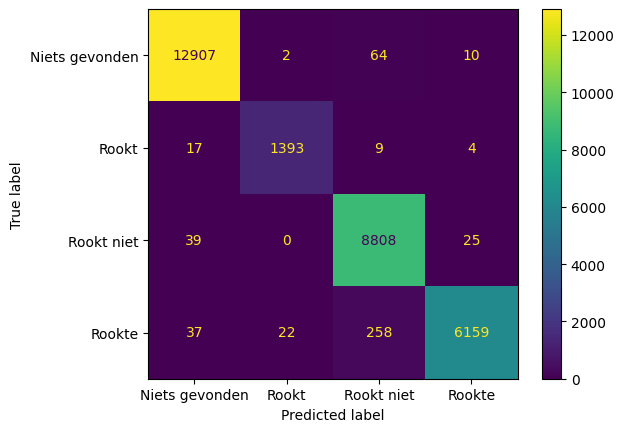

                precision    recall  f1-score   support

Niets gevonden       0.99      0.99      0.99     12983
         Rookt       0.98      0.98      0.98      1423
    Rookt niet       0.96      0.99      0.98      8872
        Rookte       0.99      0.95      0.97      6476

      accuracy                           0.98     29754
     macro avg       0.98      0.98      0.98     29754
  weighted avg       0.98      0.98      0.98     29754



In [17]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 121.12, NNZs: 728, Bias: 0.000000, T: 71408, Avg. loss: 0.435438
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 169.94, NNZs: 333, Bias: 0.000000, T: 142816, Avg. loss: 0.385161
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 207.23, NNZs: 298, Bias: 0.000000, T: 214224, Avg. loss: 0.373051
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 238.42, NNZs: 269, Bias: 0.000000, T: 285632, Avg. loss: 0.367084
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 265.64, NNZs: 254, Bias: 0.000000, T: 357040, Avg. loss: 0.363146
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 290.28, NNZs: 248, Bias: 0.000000, T: 428448, Avg. loss: 0.360422
Total training time: 1.32 seconds.
-- Epoch 7
Norm: 293.99, NNZs: 244, Bias: 0.000000, T: 499856, Avg. loss: 0.359130
Total training time: 1.50 seconds.
-- Epoch 8
Norm: 297.66, NNZs: 244, Bias: 0.000000, T: 571264, Avg. loss: 0.358653
Total training time: 1.69 seconds.
-- Epoch 9
Norm: 301.29, NNZs: 244, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


Norm: 124.55, NNZs: 638, Bias: 0.000000, T: 71408, Avg. loss: 0.318672
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 170.31, NNZs: 269, Bias: 0.000000, T: 142816, Avg. loss: 0.264999
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 205.49, NNZs: 239, Bias: 0.000000, T: 214224, Avg. loss: 0.253922
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 235.11, NNZs: 225, Bias: 0.000000, T: 285632, Avg. loss: 0.248593
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 261.17, NNZs: 212, Bias: 0.000000, T: 357040, Avg. loss: 0.244832
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 284.61, NNZs: 208, Bias: 0.000000, T: 428448, Avg. loss: 0.242615
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 288.58, NNZs: 207, Bias: 0.000000, T: 499856, Avg. loss: 0.241628
Total training time: 1.30 seconds.
-- Epoch 8
Norm: 292.47, NNZs: 205, Bias: 0.000000, T: 571264, Avg. loss: 0.241115
Total training time: 1.51 seconds.
-- Epoch 9
Norm: 296.29, NNZs: 204, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


-- Epoch 1
Norm: 126.43, NNZs: 664, Bias: 0.000000, T: 71408, Avg. loss: 0.466395
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 180.17, NNZs: 297, Bias: 0.000000, T: 142816, Avg. loss: 0.391067
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 220.62, NNZs: 258, Bias: 0.000000, T: 214224, Avg. loss: 0.369768
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 254.19, NNZs: 251, Bias: 0.000000, T: 285632, Avg. loss: 0.358884
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 283.53, NNZs: 244, Bias: 0.000000, T: 357040, Avg. loss: 0.352623
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 309.95, NNZs: 237, Bias: 0.000000, T: 428448, Avg. loss: 0.347763
Total training time: 1.09 seconds.
-- Epoch 7
Norm: 314.11, NNZs: 235, Bias: 0.000000, T: 499856, Avg. loss: 0.346133
Total training time: 1.31 seconds.
-- Epoch 8
Norm: 318.22, NNZs: 233, Bias: 0.000000, T: 571264, Avg. loss: 0.345402
Total training time: 1.52 seconds.
-- Epoch 9
Norm: 322.26, NNZs: 230, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.124 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120.59, NNZs: 729, Bias: 0.000000, T: 71408, Avg. loss: 0.437578
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 169.82, NNZs: 343, Bias: 0.000000, T: 142816, Avg. loss: 0.387010
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 206.98, NNZs: 294, Bias: 0.000000, T: 214224, Avg. loss: 0.374812
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 238.14, NNZs: 257, Bias: 0.000000, T: 285632, Avg. loss: 0.368273
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 265.41, NNZs: 256, Bias: 0.000000, T: 357040, Avg. loss: 0.365558
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 290.05, NNZs: 234, Bias: 0.000000, T: 428448, Avg. loss: 0.362191
Total training time: 1.21 seconds.
-- Epoch 7
Norm: 293.76, NNZs: 234, Bias: 0.000000, T: 499856, Avg. loss: 0.360858
Total training time: 1.43 seconds.
-- Epoch 8
Norm: 297.41, NNZs: 234, Bias: 0.000000, T: 571264, Avg. loss: 0.360539
Total training time: 1.64 seconds.
-- Epoch 9
Norm: 301.03, NNZs: 233, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


Norm: 124.51, NNZs: 672, Bias: 0.000000, T: 71408, Avg. loss: 0.320370
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 170.36, NNZs: 262, Bias: 0.000000, T: 142816, Avg. loss: 0.266031
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 205.46, NNZs: 243, Bias: 0.000000, T: 214224, Avg. loss: 0.255301
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 234.93, NNZs: 233, Bias: 0.000000, T: 285632, Avg. loss: 0.249755
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 261.08, NNZs: 222, Bias: 0.000000, T: 357040, Avg. loss: 0.246916
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 284.64, NNZs: 211, Bias: 0.000000, T: 428448, Avg. loss: 0.244496
Total training time: 1.43 seconds.
-- Epoch 7
Norm: 288.55, NNZs: 210, Bias: 0.000000, T: 499856, Avg. loss: 0.242841
Total training time: 1.67 seconds.
-- Epoch 8
Norm: 292.41, NNZs: 210, Bias: 0.000000, T: 571264, Avg. loss: 0.242573
Total training time: 1.89 seconds.
-- Epoch 9
Norm: 296.22, NNZs: 209, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


Norm: 126.45, NNZs: 713, Bias: 0.000000, T: 71408, Avg. loss: 0.467573
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 180.06, NNZs: 296, Bias: 0.000000, T: 142816, Avg. loss: 0.393113
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 220.51, NNZs: 276, Bias: 0.000000, T: 214224, Avg. loss: 0.371632
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 254.01, NNZs: 249, Bias: 0.000000, T: 285632, Avg. loss: 0.361013
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 283.29, NNZs: 242, Bias: 0.000000, T: 357040, Avg. loss: 0.354837
Total training time: 1.12 seconds.
-- Epoch 6
Norm: 309.72, NNZs: 236, Bias: 0.000000, T: 428448, Avg. loss: 0.349938
Total training time: 1.34 seconds.
-- Epoch 7
Norm: 313.87, NNZs: 236, Bias: 0.000000, T: 499856, Avg. loss: 0.347935
Total training time: 1.56 seconds.
-- Epoch 8
Norm: 317.96, NNZs: 237, Bias: 0.000000, T: 571264, Avg. loss: 0.347393
Total training time: 1.78 seconds.
-- Epoch 9
Norm: 322.00, NNZs: 238, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.126 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 121.31, NNZs: 693, Bias: 0.000000, T: 71408, Avg. loss: 0.436343
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 170.31, NNZs: 322, Bias: 0.000000, T: 142816, Avg. loss: 0.385696
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 207.67, NNZs: 293, Bias: 0.000000, T: 214224, Avg. loss: 0.373296
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 238.83, NNZs: 264, Bias: 0.000000, T: 285632, Avg. loss: 0.367176
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 266.28, NNZs: 243, Bias: 0.000000, T: 357040, Avg. loss: 0.364104
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 290.94, NNZs: 230, Bias: 0.000000, T: 428448, Avg. loss: 0.360631
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 294.67, NNZs: 227, Bias: 0.000000, T: 499856, Avg. loss: 0.359630
Total training time: 1.49 seconds.
-- Epoch 8
Norm: 298.35, NNZs: 227, Bias: 0.000000, T: 571264, Avg. loss: 0.359143
Total training time: 1.69 seconds.
-- Epoch 9
Norm: 301.99, NNZs: 227, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


Norm: 124.70, NNZs: 667, Bias: 0.000000, T: 71408, Avg. loss: 0.319209
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 170.55, NNZs: 259, Bias: 0.000000, T: 142816, Avg. loss: 0.265212
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 205.59, NNZs: 234, Bias: 0.000000, T: 214224, Avg. loss: 0.253980
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 235.18, NNZs: 225, Bias: 0.000000, T: 285632, Avg. loss: 0.248789
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 261.22, NNZs: 211, Bias: 0.000000, T: 357040, Avg. loss: 0.245643
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 284.73, NNZs: 205, Bias: 0.000000, T: 428448, Avg. loss: 0.243225
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 288.62, NNZs: 201, Bias: 0.000000, T: 499856, Avg. loss: 0.241590
Total training time: 1.45 seconds.
-- Epoch 8
Norm: 292.49, NNZs: 201, Bias: 0.000000, T: 571264, Avg. loss: 0.241325
Total training time: 1.69 seconds.
-- Epoch 9
Norm: 296.29, NNZs: 200, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


Norm: 126.57, NNZs: 619, Bias: 0.000000, T: 71408, Avg. loss: 0.467253
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 180.35, NNZs: 287, Bias: 0.000000, T: 142816, Avg. loss: 0.392084
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 220.69, NNZs: 259, Bias: 0.000000, T: 214224, Avg. loss: 0.370976
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 254.21, NNZs: 238, Bias: 0.000000, T: 285632, Avg. loss: 0.360147
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 283.55, NNZs: 231, Bias: 0.000000, T: 357040, Avg. loss: 0.353671
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 309.87, NNZs: 226, Bias: 0.000000, T: 428448, Avg. loss: 0.349201
Total training time: 1.21 seconds.
-- Epoch 7
Norm: 314.02, NNZs: 225, Bias: 0.000000, T: 499856, Avg. loss: 0.346792
Total training time: 1.41 seconds.
-- Epoch 8
Norm: 318.11, NNZs: 223, Bias: 0.000000, T: 571264, Avg. loss: 0.346216
Total training time: 1.60 seconds.
-- Epoch 9
Norm: 322.15, NNZs: 223, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.130 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 121.10, NNZs: 749, Bias: 0.000000, T: 71408, Avg. loss: 0.435992
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 170.14, NNZs: 320, Bias: 0.000000, T: 142816, Avg. loss: 0.384989
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 207.26, NNZs: 288, Bias: 0.000000, T: 214224, Avg. loss: 0.372705
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 238.64, NNZs: 262, Bias: 0.000000, T: 285632, Avg. loss: 0.366772
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 265.94, NNZs: 248, Bias: 0.000000, T: 357040, Avg. loss: 0.362414
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 290.57, NNZs: 232, Bias: 0.000000, T: 428448, Avg. loss: 0.359594
Total training time: 1.21 seconds.
-- Epoch 7
Norm: 294.28, NNZs: 231, Bias: 0.000000, T: 499856, Avg. loss: 0.358606
Total training time: 1.41 seconds.
-- Epoch 8
Norm: 297.95, NNZs: 231, Bias: 0.000000, T: 571264, Avg. loss: 0.358241
Total training time: 1.61 seconds.
-- Epoch 9
Norm: 301.58, NNZs: 229, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


-- Epoch 1
Norm: 124.64, NNZs: 660, Bias: 0.000000, T: 71408, Avg. loss: 0.318791
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 170.67, NNZs: 271, Bias: 0.000000, T: 142816, Avg. loss: 0.264879
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 205.59, NNZs: 244, Bias: 0.000000, T: 214224, Avg. loss: 0.254156
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 235.15, NNZs: 229, Bias: 0.000000, T: 285632, Avg. loss: 0.248402
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 261.22, NNZs: 214, Bias: 0.000000, T: 357040, Avg. loss: 0.245537
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 284.74, NNZs: 207, Bias: 0.000000, T: 428448, Avg. loss: 0.242904
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 288.64, NNZs: 205, Bias: 0.000000, T: 499856, Avg. loss: 0.241598
Total training time: 1.41 seconds.
-- Epoch 8
Norm: 292.49, NNZs: 204, Bias: 0.000000, T: 571264, Avg. loss: 0.241227
Total training time: 1.63 seconds.
-- Epoch 9
Norm: 296.27, NNZs: 204, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


-- Epoch 1
Norm: 126.57, NNZs: 636, Bias: 0.000000, T: 71408, Avg. loss: 0.468035
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 180.33, NNZs: 285, Bias: 0.000000, T: 142816, Avg. loss: 0.391984
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 220.73, NNZs: 255, Bias: 0.000000, T: 214224, Avg. loss: 0.370997
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 254.35, NNZs: 242, Bias: 0.000000, T: 285632, Avg. loss: 0.359793
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 283.73, NNZs: 235, Bias: 0.000000, T: 357040, Avg. loss: 0.353290
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 310.14, NNZs: 227, Bias: 0.000000, T: 428448, Avg. loss: 0.348251
Total training time: 1.16 seconds.
-- Epoch 7
Norm: 314.30, NNZs: 225, Bias: 0.000000, T: 499856, Avg. loss: 0.345963
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 318.39, NNZs: 225, Bias: 0.000000, T: 571264, Avg. loss: 0.345338
Total training time: 1.53 seconds.
-- Epoch 9
Norm: 322.44, NNZs: 225, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.128 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 121.10, NNZs: 722, Bias: 0.000000, T: 71409, Avg. loss: 0.436760
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 170.02, NNZs: 341, Bias: 0.000000, T: 142818, Avg. loss: 0.386241
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 207.30, NNZs: 301, Bias: 0.000000, T: 214227, Avg. loss: 0.374607
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 238.51, NNZs: 263, Bias: 0.000000, T: 285636, Avg. loss: 0.368056
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 265.81, NNZs: 243, Bias: 0.000000, T: 357045, Avg. loss: 0.364301
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 290.46, NNZs: 232, Bias: 0.000000, T: 428454, Avg. loss: 0.361444
Total training time: 1.25 seconds.
-- Epoch 7
Norm: 294.15, NNZs: 233, Bias: 0.000000, T: 499863, Avg. loss: 0.360005
Total training time: 1.45 seconds.
-- Epoch 8
Norm: 297.81, NNZs: 234, Bias: 0.000000, T: 571272, Avg. loss: 0.359693
Total training time: 1.65 seconds.
-- Epoch 9
Norm: 301.43, NNZs: 234, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


Norm: 124.66, NNZs: 639, Bias: 0.000000, T: 71409, Avg. loss: 0.319720
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 170.55, NNZs: 266, Bias: 0.000000, T: 142818, Avg. loss: 0.265645
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 205.82, NNZs: 243, Bias: 0.000000, T: 214227, Avg. loss: 0.254242
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 235.48, NNZs: 234, Bias: 0.000000, T: 285636, Avg. loss: 0.248593
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 261.60, NNZs: 223, Bias: 0.000000, T: 357045, Avg. loss: 0.245722
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 285.13, NNZs: 213, Bias: 0.000000, T: 428454, Avg. loss: 0.243270
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 289.07, NNZs: 211, Bias: 0.000000, T: 499863, Avg. loss: 0.242164
Total training time: 1.45 seconds.
-- Epoch 8
Norm: 292.95, NNZs: 210, Bias: 0.000000, T: 571272, Avg. loss: 0.241874
Total training time: 1.68 seconds.
-- Epoch 9
Norm: 296.76, NNZs: 209, Bias: 0.000000, T: 642681, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


-- Epoch 1
Norm: 126.51, NNZs: 732, Bias: 0.000000, T: 71409, Avg. loss: 0.466803
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 180.20, NNZs: 295, Bias: 0.000000, T: 142818, Avg. loss: 0.391037
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 220.62, NNZs: 260, Bias: 0.000000, T: 214227, Avg. loss: 0.369969
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 254.16, NNZs: 241, Bias: 0.000000, T: 285636, Avg. loss: 0.359019
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 283.45, NNZs: 237, Bias: 0.000000, T: 357045, Avg. loss: 0.352519
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 309.87, NNZs: 231, Bias: 0.000000, T: 428454, Avg. loss: 0.347872
Total training time: 1.18 seconds.
-- Epoch 7
Norm: 314.02, NNZs: 230, Bias: 0.000000, T: 499863, Avg. loss: 0.345809
Total training time: 1.39 seconds.
-- Epoch 8
Norm: 318.12, NNZs: 229, Bias: 0.000000, T: 571272, Avg. loss: 0.345297
Total training time: 1.58 seconds.
-- Epoch 9
Norm: 322.16, NNZs: 230, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.129 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 55912489251010.16, NNZs: 383201, Bias: 0.000000, T: 71408, Avg. loss: 29493443736810289102848.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 51619595246721.02, NNZs: 383201, Bias: 0.000000, T: 142816, Avg. loss: 26257797066011065712640.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 49452457115006.90, NNZs: 383201, Bias: 0.000000, T: 214224, Avg. loss: 20510674114022681346048.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 48029784344089.77, NNZs: 383201, Bias: 0.000000, T: 285632, Avg. loss: 17925225996940910526464.000000
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 46984795351688.23, NNZs: 383201, Bias: 0.000000, T: 357040, Avg. loss: 16368501280174887665664.000000
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 46164448121479.79, NNZs: 383201, Bias: 0.000000, T: 428448, Avg. loss: 15289319428344124538880.000000
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 72080052006329.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 67079607540413.73, NNZs: 383201, Bias: 0.000000, T: 142816, Avg. loss: 44000773871692891029504.000000
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 64543981946664.48, NNZs: 383201, Bias: 0.000000, T: 214224, Avg. loss: 35195582938977711161344.000000
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 62873382157866.93, NNZs: 383201, Bias: 0.000000, T: 285632, Avg. loss: 31198691357823476957184.000000
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 61642815663799.55, NNZs: 383201, Bias: 0.000000, T: 357040, Avg. loss: 28741994525485579632640.000000
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 60673579443936.77, NNZs: 383201, Bias: 0.000000, T: 428448, Avg. loss: 27030738991197399810048.000000
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 73810445928926.42, NNZs: 383200, Bias: 0.000000, T: 71408, Avg. loss: 50013522249141488451584.000000
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 68708815024187.62, NNZs: 383201, Bias: 0.000000, T: 142816, Avg. loss: 46235331074582523150336.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 66114620090619.64, NNZs: 383201, Bias: 0.000000, T: 214224, Avg. loss: 37040666292300132909056.000000
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 64408552567187.38, NNZs: 383201, Bias: 0.000000, T: 285632, Avg. loss: 32868136712901002002432.000000
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 63148726189523.73, NNZs: 383201, Bias: 0.000000, T: 357040, Avg. loss: 30313912810624717422592.000000
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 62157985526650.12, NNZs: 383201, Bias: 0.000000, T: 428448, Avg. loss: 28502599603939287498752.000000
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 83198485710241.12, NNZs: 383201, Bias: 0.000000, T: 71408, Avg. loss: 62176131055999686541312.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 77739753261195.28, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.229 total time=  52.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82515675246057.86, NNZs: 382657, Bias: 0.000000, T: 71408, Avg. loss: 64098256335484647112704.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 77070439144904.22, NNZs: 382659, Bias: 0.000000, T: 142816, Avg. loss: 58298937010307431661568.000000
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 74307273116472.16, NNZs: 382659, Bias: 0.000000, T: 214224, Avg. loss: 47144813099080516370432.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 72483645504391.25, NNZs: 382659, Bias: 0.000000, T: 285632, Avg. loss: 42041796058163588366336.000000
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 71138356943573.33, NNZs: 382659, Bias: 0.000000, T: 357040, Avg. loss: 38892927227561309634560.000000
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 70078668240885.61, NNZs: 382659, Bias: 0.000000, T: 428448, Avg. loss: 36729484453933737836544.000000
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 71237874335946.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 66183561770104.04, NNZs: 382659, Bias: 0.000000, T: 142816, Avg. loss: 43058102021454852784128.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 63616737834922.41, NNZs: 382659, Bias: 0.000000, T: 214224, Avg. loss: 34241169235391790710784.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 61924561177893.88, NNZs: 382659, Bias: 0.000000, T: 285632, Avg. loss: 30238631534922385326080.000000
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 60679189047459.80, NNZs: 382659, Bias: 0.000000, T: 357040, Avg. loss: 27782271204637999628288.000000
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 59697512603416.46, NNZs: 382659, Bias: 0.000000, T: 428448, Avg. loss: 26073677566096546201600.000000
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 54293709689007.27, NNZs: 382656, Bias: 0.000000, T: 71408, Avg. loss: 27789380984017440997376.000000
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 50098173904426.10, NNZs: 382659, Bias: 0.000000, T: 142816, Avg. loss: 24489431931646216503296.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 47981111019295.01, NNZs: 382659, Bias: 0.000000, T: 214224, Avg. loss: 19094754014415089041408.000000
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 46597379994447.57, NNZs: 382659, Bias: 0.000000, T: 285632, Avg. loss: 16701730980497138384896.000000
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 45580401321670.39, NNZs: 382659, Bias: 0.000000, T: 357040, Avg. loss: 15250009482980459806720.000000
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 44784393578133.59, NNZs: 382659, Bias: 0.000000, T: 428448, Avg. loss: 14246084661779955187712.000000
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 64379978647446.13, NNZs: 382652, Bias: 0.000000, T: 71408, Avg. loss: 39564715346403564453888.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 59648354036683.23, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.233 total time=  52.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 92931579060846.97, NNZs: 382859, Bias: 0.000000, T: 71408, Avg. loss: 75080509537119830540288.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 87135816649703.00, NNZs: 382861, Bias: 0.000000, T: 142816, Avg. loss: 76053499424900173004800.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 84171937901765.75, NNZs: 382861, Bias: 0.000000, T: 214224, Avg. loss: 62284453612052881080320.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 82219322188818.89, NNZs: 382861, Bias: 0.000000, T: 285632, Avg. loss: 55951711489287897743360.000000
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 80776911202565.95, NNZs: 382861, Bias: 0.000000, T: 357040, Avg. loss: 52018932111455513739264.000000
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 79640594554145.92, NNZs: 382861, Bias: 0.000000, T: 428448, Avg. loss: 49281085375383089446912.000000
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 85461976990701.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 79887805599266.02, NNZs: 382861, Bias: 0.000000, T: 142816, Avg. loss: 63387705451604097368064.000000
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 77051217275258.67, NNZs: 382861, Bias: 0.000000, T: 214224, Avg. loss: 51467913973174590504960.000000
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 75183594763951.95, NNZs: 382861, Bias: 0.000000, T: 285632, Avg. loss: 46006646360112782901248.000000
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 73804954202672.28, NNZs: 382861, Bias: 0.000000, T: 357040, Avg. loss: 42641648465495331962880.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 72720546831416.23, NNZs: 382861, Bias: 0.000000, T: 428448, Avg. loss: 40257717784604611444736.000000
Total training time: 1.02 seconds.
Convergence after 6 epochs took 1.03 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 77251780886835.30, NNZs: 382859, Bias: 0.000000, T: 71408, Avg. loss: 55774885285522372034560.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 71979548941686.78, NNZs: 382861, Bias: 0.000000, T: 142816, Avg. loss: 50682222396435517669376.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 69290511148037.40, NNZs: 382861, Bias: 0.000000, T: 214224, Avg. loss: 40707883507248894312448.000000
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 67518618808957.54, NNZs: 382861, Bias: 0.000000, T: 285632, Avg. loss: 36131851580751724150784.000000
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 66210187318129.20, NNZs: 382861, Bias: 0.000000, T: 357040, Avg. loss: 33331921463686882918400.000000
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 65178746804049.86, NNZs: 382861, Bias: 0.000000, T: 428448, Avg. loss: 31381310005810514886656.000000
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 72147805955486.91, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.229 total time=  53.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 68502697049065.83, NNZs: 383373, Bias: 0.000000, T: 71408, Avg. loss: 45015684246258646515712.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 63619377694564.91, NNZs: 383375, Bias: 0.000000, T: 142816, Avg. loss: 39460912012001099644928.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 61150430180402.19, NNZs: 383375, Bias: 0.000000, T: 214224, Avg. loss: 31358619823697314185216.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 59527477049554.48, NNZs: 383375, Bias: 0.000000, T: 285632, Avg. loss: 27718350318033621221376.000000
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 58334491500777.23, NNZs: 383375, Bias: 0.000000, T: 357040, Avg. loss: 25493348627574312402944.000000
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 57394955102772.75, NNZs: 383375, Bias: 0.000000, T: 428448, Avg. loss: 23943082526483079495680.000000
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 64448862968223.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 59682923534202.41, NNZs: 383375, Bias: 0.000000, T: 142816, Avg. loss: 34974235857180245884928.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 57282907633271.95, NNZs: 383375, Bias: 0.000000, T: 214224, Avg. loss: 27495265102810218233856.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 55711076545005.16, NNZs: 383375, Bias: 0.000000, T: 285632, Avg. loss: 24162192057756792389632.000000
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 54554796466261.18, NNZs: 383375, Bias: 0.000000, T: 357040, Avg. loss: 22137392462992911630336.000000
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 53648512164858.62, NNZs: 383375, Bias: 0.000000, T: 428448, Avg. loss: 20726554029644104859648.000000
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 67911943844010.72, NNZs: 383374, Bias: 0.000000, T: 71408, Avg. loss: 43370190282756626317312.000000
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 62987321171292.77, NNZs: 383375, Bias: 0.000000, T: 142816, Avg. loss: 39424526984269193543680.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 60493075776583.53, NNZs: 383375, Bias: 0.000000, T: 214224, Avg. loss: 31205270281844376469504.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 58853326653190.00, NNZs: 383375, Bias: 0.000000, T: 285632, Avg. loss: 27530825242136471928832.000000
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 57643641756199.34, NNZs: 383375, Bias: 0.000000, T: 357040, Avg. loss: 25280768038543019737088.000000
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 56693434317909.07, NNZs: 383375, Bias: 0.000000, T: 428448, Avg. loss: 23693179104632183455744.000000
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 63765796822311.02, NNZs: 383373, Bias: 0.000000, T: 71408, Avg. loss: 40095033295182378303488.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 59058494069928.59, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.235 total time=  52.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 30160074222756.29, NNZs: 381671, Bias: 0.000000, T: 71409, Avg. loss: 10604338343814470041600.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 27601026359319.27, NNZs: 381684, Bias: 0.000000, T: 142818, Avg. loss: 7020342565801481469952.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 26336979046073.64, NNZs: 381684, Bias: 0.000000, T: 214227, Avg. loss: 5283958310474718642176.000000
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 25518286356410.73, NNZs: 381684, Bias: 0.000000, T: 285636, Avg. loss: 4535617246201348358144.000000
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 24922090169591.68, NNZs: 381684, Bias: 0.000000, T: 357045, Avg. loss: 4093787357071596322816.000000
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 24459590632441.12, NNZs: 381684, Bias: 0.000000, T: 428454, Avg. loss: 3788837055290879246336.000000
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 71234743604114.81, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 66200181860247.62, NNZs: 381684, Bias: 0.000000, T: 142818, Avg. loss: 42785753460917766455296.000000
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 63645597286925.48, NNZs: 381684, Bias: 0.000000, T: 214227, Avg. loss: 34138180814764251283456.000000
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 61964619412903.95, NNZs: 381684, Bias: 0.000000, T: 285636, Avg. loss: 30207037657730590441472.000000
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 60722677582340.21, NNZs: 381684, Bias: 0.000000, T: 357045, Avg. loss: 27797934914630848610304.000000
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 59746220796960.17, NNZs: 381684, Bias: 0.000000, T: 428454, Avg. loss: 26105139882374048251904.000000
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 62508640003210.48, NNZs: 381684, Bias: 0.000000, T: 71409, Avg. loss: 37497084221941358788608.000000
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 57892080479801.52, NNZs: 381684, Bias: 0.000000, T: 142818, Avg. loss: 32767558192996624105472.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 55545052534593.82, NNZs: 381684, Bias: 0.000000, T: 214227, Avg. loss: 25857289195101452500992.000000
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 54007244733359.80, NNZs: 381684, Bias: 0.000000, T: 285636, Avg. loss: 22737350488269023870976.000000
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 52872758972173.46, NNZs: 381684, Bias: 0.000000, T: 357045, Avg. loss: 20844473910441283682304.000000
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 51983676702621.58, NNZs: 381684, Bias: 0.000000, T: 428454, Avg. loss: 19525421119370988355584.000000
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 89351216968697.58, NNZs: 381683, Bias: 0.000000, T: 71409, Avg. loss: 75925695951534903263232.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 83652199791340.17, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.217 total time=  52.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 258.93, NNZs: 1854, Bias: 0.000000, T: 71408, Avg. loss: 0.338704
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 356.66, NNZs: 781, Bias: 0.000000, T: 142816, Avg. loss: 0.302028
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 431.43, NNZs: 722, Bias: 0.000000, T: 214224, Avg. loss: 0.296676
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 494.58, NNZs: 666, Bias: 0.000000, T: 285632, Avg. loss: 0.295684
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 550.43, NNZs: 669, Bias: 0.000000, T: 357040, Avg. loss: 0.294799
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 600.94, NNZs: 651, Bias: 0.000000, T: 428448, Avg. loss: 0.294155
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1
Norm: 207.73, NNZs: 1347, Bias: 0.000000, T: 71408, Avg. loss: 0.210372
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 284.13, NNZs: 564, Bias: 0.000000, T: 142816, Avg. loss: 0.184109
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 343.03, NNZs: 536, Bias: 0.000000, T: 214224, Avg. loss: 0.182307
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 392.82, NNZs: 511, Bias: 0.000000, T: 285632, Avg. loss: 0.181465
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 436.74, NNZs: 501, Bias: 0.000000, T: 357040, Avg. loss: 0.181003
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 476.69, NNZs: 515, Bias: 0.000000, T: 428448, Avg. loss: 0.181732
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 260.17, NNZs: 1882, Bias: 0.000000, T: 71408, Avg. loss: 0.327072
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 351.85, NNZs: 703, Bias: 0.000000, T: 142816, Avg. loss: 0.265016
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 422.19, NNZs: 632, Bias: 0.000000, T: 214224, Avg. loss: 0.259995
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 481.84, NNZs: 615, Bias: 0.000000, T: 285632, Avg. loss: 0.257663
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 534.28, NNZs: 588, Bias: 0.000000, T: 357040, Avg. loss: 0.255937
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 581.80, NNZs: 598, Bias: 0.000000, T: 428448, Avg. loss: 0.254767
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 255.61, NNZs: 1925, Bias: 0.000000, T: 71408, Avg. loss: 0.326252
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 348.95, NNZs: 716, Bias: 0.000000, T: 142816, Avg. loss: 0.277411
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 420.50, NNZs: 667, Bias: 0.000000, T: 214224, Avg. loss: 0.271808
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 480.8

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.875 total time=  52.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 260.18, NNZs: 1990, Bias: 0.000000, T: 71408, Avg. loss: 0.343317
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 358.51, NNZs: 791, Bias: 0.000000, T: 142816, Avg. loss: 0.307050
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 433.91, NNZs: 734, Bias: 0.000000, T: 214224, Avg. loss: 0.302395
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 497.56, NNZs: 715, Bias: 0.000000, T: 285632, Avg. loss: 0.300745
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 553.70, NNZs: 682, Bias: 0.000000, T: 357040, Avg. loss: 0.299483
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 604.60, NNZs: 676, Bias: 0.000000, T: 428448, Avg. loss: 0.298712
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 208.85, NNZs: 1460, Bias: 0.000000, T: 71408, Avg. loss: 0.212971
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 285.97, NNZs: 570, Bias: 0.000000, T: 142816, Avg. loss: 0.188331
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 345.40, NNZs: 546, Bias: 0.000000, T: 214224, Avg. loss: 0.185867
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 395.76, NNZs: 517, Bias: 0.000000, T: 285632, Avg. loss: 0.185323
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 440.29, NNZs: 514, Bias: 0.000000, T: 357040, Avg. loss: 0.185247
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 480.81, NNZs: 504, Bias: 0.000000, T: 428448, Avg. loss: 0.186140
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 260.93, NNZs: 2021, Bias: 0.000000, T: 71408, Avg. loss: 0.330899
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 353.47, NNZs: 701, Bias: 0.000000, T: 142816, Avg. loss: 0.270061
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 424.17, NNZs: 657, Bias: 0.000000, T: 214224, Avg. loss: 0.263488
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 484.09, NNZs: 616, Bias: 0.000000, T: 285632, Avg. loss: 0.261244
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 536.84, NNZs: 605, Bias: 0.000000, T: 357040, Avg. loss: 0.259990
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 584.88, NNZs: 596, Bias: 0.000000, T: 428448, Avg. loss: 0.259894
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 256.76, NNZs: 1812, Bias: 0.000000, T: 71408, Avg. loss: 0.329920
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 350.69, NNZs: 698, Bias: 0.000000, T: 142816, Avg. loss: 0.281564
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 422.54, NNZs: 676, Bias: 0.000000, T: 214224, Avg. loss: 0.275595
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 483.3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.878 total time=  53.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 259.47, NNZs: 1896, Bias: 0.000000, T: 71408, Avg. loss: 0.340707
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 357.52, NNZs: 788, Bias: 0.000000, T: 142816, Avg. loss: 0.304288
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 432.81, NNZs: 745, Bias: 0.000000, T: 214224, Avg. loss: 0.300719
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 496.34, NNZs: 714, Bias: 0.000000, T: 285632, Avg. loss: 0.298465
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 552.40, NNZs: 701, Bias: 0.000000, T: 357040, Avg. loss: 0.297724
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 603.17, NNZs: 679, Bias: 0.000000, T: 428448, Avg. loss: 0.296768
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 208.58, NNZs: 1399, Bias: 0.000000, T: 71408, Avg. loss: 0.213156
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 285.69, NNZs: 590, Bias: 0.000000, T: 142816, Avg. loss: 0.187351
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 345.20, NNZs: 543, Bias: 0.000000, T: 214224, Avg. loss: 0.185575
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 395.51, NNZs: 534, Bias: 0.000000, T: 285632, Avg. loss: 0.185456
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 439.91, NNZs: 522, Bias: 0.000000, T: 357040, Avg. loss: 0.184739
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 480.31, NNZs: 508, Bias: 0.000000, T: 428448, Avg. loss: 0.184971
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 260.82, NNZs: 1975, Bias: 0.000000, T: 71408, Avg. loss: 0.329757
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 353.39, NNZs: 734, Bias: 0.000000, T: 142816, Avg. loss: 0.270253
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 424.31, NNZs: 655, Bias: 0.000000, T: 214224, Avg. loss: 0.264578
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 484.19, NNZs: 637, Bias: 0.000000, T: 285632, Avg. loss: 0.261744
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 537.07, NNZs: 613, Bias: 0.000000, T: 357040, Avg. loss: 0.261171
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 585.15, NNZs: 620, Bias: 0.000000, T: 428448, Avg. loss: 0.260363
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 256.69, NNZs: 1877, Bias: 0.000000, T: 71408, Avg. loss: 0.330071
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 350.68, NNZs: 729, Bias: 0.000000, T: 142816, Avg. loss: 0.281079
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 422.83, NNZs: 681, Bias: 0.000000, T: 214224, Avg. loss: 0.275826
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 483.6

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.885 total time=  53.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 259.06, NNZs: 1994, Bias: 0.000000, T: 71408, Avg. loss: 0.339465
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 356.94, NNZs: 776, Bias: 0.000000, T: 142816, Avg. loss: 0.303414
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 431.92, NNZs: 718, Bias: 0.000000, T: 214224, Avg. loss: 0.299033
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 495.23, NNZs: 688, Bias: 0.000000, T: 285632, Avg. loss: 0.297304
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 551.27, NNZs: 655, Bias: 0.000000, T: 357040, Avg. loss: 0.296935
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 602.01, NNZs: 659, Bias: 0.000000, T: 428448, Avg. loss: 0.296650
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 208.72, NNZs: 1413, Bias: 0.000000, T: 71408, Avg. loss: 0.212861
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 285.78, NNZs: 583, Bias: 0.000000, T: 142816, Avg. loss: 0.187035
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 345.19, NNZs: 547, Bias: 0.000000, T: 214224, Avg. loss: 0.185565
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 395.20, NNZs: 519, Bias: 0.000000, T: 285632, Avg. loss: 0.185139
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 439.61, NNZs: 527, Bias: 0.000000, T: 357040, Avg. loss: 0.184417
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 479.94, NNZs: 508, Bias: 0.000000, T: 428448, Avg. loss: 0.184596
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1
Norm: 260.80, NNZs: 2040, Bias: 0.000000, T: 71408, Avg. loss: 0.328090
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 353.00, NNZs: 699, Bias: 0.000000, T: 142816, Avg. loss: 0.267909
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 423.61, NNZs: 655, Bias: 0.000000, T: 214224, Avg. loss: 0.260766
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 483.08, NNZs: 612, Bias: 0.000000, T: 285632, Avg. loss: 0.258997
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 535.72, NNZs: 595, Bias: 0.000000, T: 357040, Avg. loss: 0.257625
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 583.51, NNZs: 579, Bias: 0.000000, T: 428448, Avg. loss: 0.256886
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 256.57, NNZs: 1827, Bias: 0.000000, T: 71408, Avg. loss: 0.329669
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 350.23, NNZs: 702, Bias: 0.000000, T: 142816, Avg. loss: 0.280496
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 421.96, NNZs: 655, Bias: 0.000000, T: 214224, Avg. loss: 0.273920
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 482.5

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.866 total time=  54.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 259.36, NNZs: 1795, Bias: 0.000000, T: 71409, Avg. loss: 0.340139
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 357.48, NNZs: 761, Bias: 0.000000, T: 142818, Avg. loss: 0.305503
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 432.69, NNZs: 709, Bias: 0.000000, T: 214227, Avg. loss: 0.301106
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 496.06, NNZs: 684, Bias: 0.000000, T: 285636, Avg. loss: 0.298505
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 552.00, NNZs: 652, Bias: 0.000000, T: 357045, Avg. loss: 0.297494
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 602.85, NNZs: 655, Bias: 0.000000, T: 428454, Avg. loss: 0.297811
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 208.44, NNZs: 1312, Bias: 0.000000, T: 71409, Avg. loss: 0.213021
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 285.14, NNZs: 569, Bias: 0.000000, T: 142818, Avg. loss: 0.185357
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 344.44, NNZs: 550, Bias: 0.000000, T: 214227, Avg. loss: 0.183998
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 394.17, NNZs: 532, Bias: 0.000000, T: 285636, Avg. loss: 0.182055
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 438.45, NNZs: 504, Bias: 0.000000, T: 357045, Avg. loss: 0.182152
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 478.56, NNZs: 496, Bias: 0.000000, T: 428454, Avg. loss: 0.181861
Total training time: 0.78 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 260.80, NNZs: 1915, Bias: 0.000000, T: 71409, Avg. loss: 0.329929
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 353.13, NNZs: 717, Bias: 0.000000, T: 142818, Avg. loss: 0.268373
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 423.76, NNZs: 641, Bias: 0.000000, T: 214227, Avg. loss: 0.262759
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 483.64, NNZs: 629, Bias: 0.000000, T: 285636, Avg. loss: 0.260182
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 536.26, NNZs: 603, Bias: 0.000000, T: 357045, Avg. loss: 0.258338
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 584.22, NNZs: 597, Bias: 0.000000, T: 428454, Avg. loss: 0.258749
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 256.05, NNZs: 1769, Bias: 0.000000, T: 71409, Avg. loss: 0.327852
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 350.11, NNZs: 713, Bias: 0.000000, T: 142818, Avg. loss: 0.280978
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 421.75, NNZs: 670, Bias: 0.000000, T: 214227, Avg. loss: 0.273577
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 482.4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.862 total time=  54.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.77, NNZs: 630, Bias: 0.000000, T: 71408, Avg. loss: 0.252618
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 93.23, NNZs: 497, Bias: 0.000000, T: 142816, Avg. loss: 0.229670
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 112.65, NNZs: 452, Bias: 0.000000, T: 214224, Avg. loss: 0.226346
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 129.15, NNZs: 421, Bias: 0.000000, T: 285632, Avg. loss: 0.224918
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 143.59, NNZs: 404, Bias: 0.000000, T: 357040, Avg. loss: 0.224260
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 156.79, NNZs: 402, Bias: 0.000000, T: 428448, Avg. loss: 0.223802
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 116.67, NNZs: 822, Bias: 0.000000, T: 71408, Avg. loss: 0.167277
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 158.54, NNZs: 637, Bias: 0.000000, T: 142816, Avg. loss: 0.147064
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 190.78, NNZs: 580, Bias: 0.000000, T: 214224, Avg. loss: 0.144682
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 218.16, NNZs: 553, Bias: 0.000000, T: 285632, Avg. loss: 0.144302
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 242.48, NNZs: 536, Bias: 0.000000, T: 357040, Avg. loss: 0.144638
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 264.37, NNZs: 536, Bias: 0.000000, T: 428448, Avg. loss: 0.143654
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 84.01, NNZs: 727, Bias: 0.000000, T: 71408, Avg. loss: 0.244790
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 114.76, NNZs: 573, Bias: 0.000000, T: 142816, Avg. loss: 0.207821
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 138.18, NNZs: 535, Bias: 0.000000, T: 214224, Avg. loss: 0.202200
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 157.78, NNZs: 495, Bias: 0.000000, T: 285632, Avg. loss: 0.199909
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 175.12, NNZs: 472, Bias: 0.000000, T: 357040, Avg. loss: 0.198835
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 190.64, NNZs: 461, Bias: 0.000000, T: 428448, Avg. loss: 0.198250
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 86.39, NNZs: 788, Bias: 0.000000, T: 71408, Avg. loss: 0.223587
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 118.47, NNZs: 608, Bias: 0.000000, T: 142816, Avg. loss: 0.196474
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 143.01, NNZs: 550, Bias: 0.000000, T: 214224, Avg. loss: 0.192350
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 163.80,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.040 total time=  52.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.82, NNZs: 629, Bias: 0.000000, T: 71408, Avg. loss: 0.253895
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 93.26, NNZs: 490, Bias: 0.000000, T: 142816, Avg. loss: 0.230976
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 112.77, NNZs: 435, Bias: 0.000000, T: 214224, Avg. loss: 0.227644
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 129.15, NNZs: 416, Bias: 0.000000, T: 285632, Avg. loss: 0.226065
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 143.67, NNZs: 389, Bias: 0.000000, T: 357040, Avg. loss: 0.225219
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 156.85, NNZs: 393, Bias: 0.000000, T: 428448, Avg. loss: 0.224992
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 116.39, NNZs: 837, Bias: 0.000000, T: 71408, Avg. loss: 0.168192
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 158.08, NNZs: 646, Bias: 0.000000, T: 142816, Avg. loss: 0.145690
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 190.33, NNZs: 574, Bias: 0.000000, T: 214224, Avg. loss: 0.144756
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 217.67, NNZs: 559, Bias: 0.000000, T: 285632, Avg. loss: 0.145299
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 241.89, NNZs: 544, Bias: 0.000000, T: 357040, Avg. loss: 0.144221
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 263.83, NNZs: 534, Bias: 0.000000, T: 428448, Avg. loss: 0.144288
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 84.05, NNZs: 756, Bias: 0.000000, T: 71408, Avg. loss: 0.245169
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 114.90, NNZs: 587, Bias: 0.000000, T: 142816, Avg. loss: 0.207704
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 138.43, NNZs: 539, Bias: 0.000000, T: 214224, Avg. loss: 0.202297
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 158.02, NNZs: 506, Bias: 0.000000, T: 285632, Avg. loss: 0.199690
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 175.32, NNZs: 485, Bias: 0.000000, T: 357040, Avg. loss: 0.199060
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 190.94, NNZs: 482, Bias: 0.000000, T: 428448, Avg. loss: 0.198354
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 86.60, NNZs: 785, Bias: 0.000000, T: 71408, Avg. loss: 0.224397
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 118.67, NNZs: 623, Bias: 0.000000, T: 142816, Avg. loss: 0.197819
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 143.23, NNZs: 572, Bias: 0.000000, T: 214224, Avg. loss: 0.193495
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 164.02,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.037 total time=  52.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.89, NNZs: 644, Bias: 0.000000, T: 71408, Avg. loss: 0.251867
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 93.36, NNZs: 486, Bias: 0.000000, T: 142816, Avg. loss: 0.228551
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 112.80, NNZs: 441, Bias: 0.000000, T: 214224, Avg. loss: 0.225193
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 129.25, NNZs: 411, Bias: 0.000000, T: 285632, Avg. loss: 0.224126
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 143.75, NNZs: 405, Bias: 0.000000, T: 357040, Avg. loss: 0.223053
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 156.89, NNZs: 387, Bias: 0.000000, T: 428448, Avg. loss: 0.222711
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 116.57, NNZs: 819, Bias: 0.000000, T: 71408, Avg. loss: 0.168571
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 158.39, NNZs: 638, Bias: 0.000000, T: 142816, Avg. loss: 0.147143
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 190.54, NNZs: 564, Bias: 0.000000, T: 214224, Avg. loss: 0.144878
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 217.84, NNZs: 547, Bias: 0.000000, T: 285632, Avg. loss: 0.145976
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 241.88, NNZs: 536, Bias: 0.000000, T: 357040, Avg. loss: 0.144814
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 263.74, NNZs: 518, Bias: 0.000000, T: 428448, Avg. loss: 0.144432
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 84.06, NNZs: 722, Bias: 0.000000, T: 71408, Avg. loss: 0.243526
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 114.72, NNZs: 601, Bias: 0.000000, T: 142816, Avg. loss: 0.207143
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 138.12, NNZs: 541, Bias: 0.000000, T: 214224, Avg. loss: 0.201318
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 157.78, NNZs: 505, Bias: 0.000000, T: 285632, Avg. loss: 0.199171
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 175.07, NNZs: 490, Bias: 0.000000, T: 357040, Avg. loss: 0.197729
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 190.62, NNZs: 470, Bias: 0.000000, T: 428448, Avg. loss: 0.197339
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 86.75, NNZs: 787, Bias: 0.000000, T: 71408, Avg. loss: 0.222709
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 118.74, NNZs: 628, Bias: 0.000000, T: 142816, Avg. loss: 0.195766
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 143.32, NNZs: 574, Bias: 0.000000, T: 214224, Avg. loss: 0.191633
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 164.16,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.041 total time=  52.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.94, NNZs: 638, Bias: 0.000000, T: 71408, Avg. loss: 0.252994
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 93.38, NNZs: 493, Bias: 0.000000, T: 142816, Avg. loss: 0.229598
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 112.87, NNZs: 441, Bias: 0.000000, T: 214224, Avg. loss: 0.225977
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 129.23, NNZs: 427, Bias: 0.000000, T: 285632, Avg. loss: 0.224748
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 143.81, NNZs: 409, Bias: 0.000000, T: 357040, Avg. loss: 0.223775
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 156.98, NNZs: 408, Bias: 0.000000, T: 428448, Avg. loss: 0.224058
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 116.59, NNZs: 883, Bias: 0.000000, T: 71408, Avg. loss: 0.169711
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 158.38, NNZs: 665, Bias: 0.000000, T: 142816, Avg. loss: 0.146664
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 190.64, NNZs: 582, Bias: 0.000000, T: 214224, Avg. loss: 0.145362
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 218.01, NNZs: 570, Bias: 0.000000, T: 285632, Avg. loss: 0.146062
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 242.22, NNZs: 550, Bias: 0.000000, T: 357040, Avg. loss: 0.144395
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 264.12, NNZs: 546, Bias: 0.000000, T: 428448, Avg. loss: 0.143318
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 84.16, NNZs: 733, Bias: 0.000000, T: 71408, Avg. loss: 0.243361
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 114.63, NNZs: 592, Bias: 0.000000, T: 142816, Avg. loss: 0.206635
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 138.02, NNZs: 551, Bias: 0.000000, T: 214224, Avg. loss: 0.200727
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 157.60, NNZs: 508, Bias: 0.000000, T: 285632, Avg. loss: 0.198657
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 174.75, NNZs: 473, Bias: 0.000000, T: 357040, Avg. loss: 0.197487
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 190.32, NNZs: 472, Bias: 0.000000, T: 428448, Avg. loss: 0.197170
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 86.72, NNZs: 757, Bias: 0.000000, T: 71408, Avg. loss: 0.223967
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 119.00, NNZs: 618, Bias: 0.000000, T: 142816, Avg. loss: 0.196197
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 143.58, NNZs: 562, Bias: 0.000000, T: 214224, Avg. loss: 0.191985
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 164.31,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.033 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.91, NNZs: 619, Bias: 0.000000, T: 71409, Avg. loss: 0.251941
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 93.41, NNZs: 479, Bias: 0.000000, T: 142818, Avg. loss: 0.229112
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 112.78, NNZs: 438, Bias: 0.000000, T: 214227, Avg. loss: 0.225422
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 129.21, NNZs: 414, Bias: 0.000000, T: 285636, Avg. loss: 0.224475
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 143.68, NNZs: 409, Bias: 0.000000, T: 357045, Avg. loss: 0.223760
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 156.85, NNZs: 405, Bias: 0.000000, T: 428454, Avg. loss: 0.223385
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 116.34, NNZs: 804, Bias: 0.000000, T: 71409, Avg. loss: 0.168966
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 158.17, NNZs: 626, Bias: 0.000000, T: 142818, Avg. loss: 0.146892
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 190.53, NNZs: 580, Bias: 0.000000, T: 214227, Avg. loss: 0.146311
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 217.82, NNZs: 550, Bias: 0.000000, T: 285636, Avg. loss: 0.145042
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 242.13, NNZs: 536, Bias: 0.000000, T: 357045, Avg. loss: 0.144111
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 264.08, NNZs: 534, Bias: 0.000000, T: 428454, Avg. loss: 0.144838
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 84.09, NNZs: 735, Bias: 0.000000, T: 71409, Avg. loss: 0.243934
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 114.85, NNZs: 590, Bias: 0.000000, T: 142818, Avg. loss: 0.207189
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 137.98, NNZs: 535, Bias: 0.000000, T: 214227, Avg. loss: 0.201622
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 157.62, NNZs: 507, Bias: 0.000000, T: 285636, Avg. loss: 0.199506
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 174.85, NNZs: 481, Bias: 0.000000, T: 357045, Avg. loss: 0.197928
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 190.48, NNZs: 467, Bias: 0.000000, T: 428454, Avg. loss: 0.197831
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 86.25, NNZs: 754, Bias: 0.000000, T: 71409, Avg. loss: 0.222503
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 118.36, NNZs: 626, Bias: 0.000000, T: 142818, Avg. loss: 0.195137
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 142.89, NNZs: 561, Bias: 0.000000, T: 214227, Avg. loss: 0.191343
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 163.54,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.034 total time=  52.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.77, NNZs: 740095, Bias: -0.057763, T: 71408, Avg. loss: 0.200005
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.68, NNZs: 740095, Bias: -0.085244, T: 142816, Avg. loss: 0.186047
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 4.30, NNZs: 740095, Bias: -0.102164, T: 214224, Avg. loss: 0.179530
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 4.80, NNZs: 740095, Bias: -0.114092, T: 285632, Avg. loss: 0.174876
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 5.21, NNZs: 740095, Bias: -0.122555, T: 357040, Avg. loss: 0.171270
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 5.57, NNZs: 740095, Bias: -0.128552, T: 428448, Avg. loss: 0.168384
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 2.88, NNZs: 740095, Bias: -0.656954, T: 71408, Avg. loss: 0.097081
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.01, NNZs: 740095, Bias: -0.791695, T: 142816, Avg. loss: 0.033568
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 740095, Bias: -0.831764, T: 214224, Avg. loss: 0.026296
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 740095, Bias: -0.850672, T: 285632, Avg. loss: 0.024672
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 2.76, NNZs: 740095, Bias: -0.862112, T: 357040, Avg. loss: 0.023958
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 740095, Bias: -0.870067, T: 428448, Avg. loss: 0.023552
Total training time: 0.67 seconds.
Convergence after 6 epochs took 0.69 seconds
-- Epoch 1
Norm: 2.12, NNZs: 740095, Bias: -0.320468, T: 71408, Avg. loss: 0.188775
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.67, NNZs: 740095, Bias: -0.440123, T: 142816, Avg. loss: 0.166331
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 740095, Bias: -0.527130, T: 214224, Avg. loss: 0.154653
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 3.28, NNZs: 740095, Bias: -0.595091, T: 285632, Avg. loss: 0.146245
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 3.47, NNZs: 740095, Bias: -0.647589, T: 357040, Avg. loss: 0.140328
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 3.62, NNZs: 740095, Bias: -0.687072, T: 428448, Avg. loss: 0.136379
Total training time: 0.69 seconds.
Convergence after 6 epochs took 0.71 seconds
-- Epoch 1
Norm: 2.59, NNZs: 740095, Bias: -0.428842, T: 71408, Avg. loss: 0.163634
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.55, NNZs: 740095, Bias: -0.603732, T: 142816, Avg. loss: 0.118851
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 4.10, NNZs: 740095, Bias: -0.702136, T: 214224, Avg. loss: 0.096524
Total training time: 0.32 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.337 total time=  53.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.78, NNZs: 740541, Bias: -0.078344, T: 71408, Avg. loss: 0.199015
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.66, NNZs: 740541, Bias: -0.104828, T: 142816, Avg. loss: 0.185626
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.27, NNZs: 740541, Bias: -0.121141, T: 214224, Avg. loss: 0.179333
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 4.76, NNZs: 740541, Bias: -0.132532, T: 285632, Avg. loss: 0.174825
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 5.17, NNZs: 740541, Bias: -0.140510, T: 357040, Avg. loss: 0.171342
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 5.53, NNZs: 740541, Bias: -0.146083, T: 428448, Avg. loss: 0.168552
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 2.88, NNZs: 740541, Bias: -0.653965, T: 71408, Avg. loss: 0.097597
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.01, NNZs: 740541, Bias: -0.790384, T: 142816, Avg. loss: 0.033901
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 740541, Bias: -0.831111, T: 214224, Avg. loss: 0.026410
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 740541, Bias: -0.850322, T: 285632, Avg. loss: 0.024736
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 740541, Bias: -0.861934, T: 357040, Avg. loss: 0.024002
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 740541, Bias: -0.870004, T: 428448, Avg. loss: 0.023584
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 2.13, NNZs: 740541, Bias: -0.306077, T: 71408, Avg. loss: 0.190022
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.67, NNZs: 740541, Bias: -0.425581, T: 142816, Avg. loss: 0.167583
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 740541, Bias: -0.512796, T: 214224, Avg. loss: 0.155853
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 3.29, NNZs: 740541, Bias: -0.581645, T: 285632, Avg. loss: 0.147289
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 3.50, NNZs: 740541, Bias: -0.635663, T: 357040, Avg. loss: 0.141109
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 3.65, NNZs: 740541, Bias: -0.677016, T: 428448, Avg. loss: 0.136876
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 2.59, NNZs: 740541, Bias: -0.421632, T: 71408, Avg. loss: 0.164285
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.55, NNZs: 740541, Bias: -0.596822, T: 142816, Avg. loss: 0.119698
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 4.12, NNZs: 740541, Bias: -0.697512, T: 214224, Avg. loss: 0.096956
Total training time: 0.31 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.349 total time=  52.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.79, NNZs: 740908, Bias: -0.082225, T: 71408, Avg. loss: 0.198734
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 3.68, NNZs: 740908, Bias: -0.108779, T: 142816, Avg. loss: 0.185329
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 4.30, NNZs: 740908, Bias: -0.125110, T: 214224, Avg. loss: 0.178998
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 4.79, NNZs: 740908, Bias: -0.136361, T: 285632, Avg. loss: 0.174485
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 5.20, NNZs: 740908, Bias: -0.144171, T: 357040, Avg. loss: 0.171016
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 5.55, NNZs: 740908, Bias: -0.149597, T: 428448, Avg. loss: 0.168234
Total training time: 0.68 seconds.
Convergence after 6 epochs took 0.70 seconds
-- Epoch 1
Norm: 2.89, NNZs: 740908, Bias: -0.653622, T: 71408, Avg. loss: 0.097807
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.01, NNZs: 740908, Bias: -0.790300, T: 142816, Avg. loss: 0.033922
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 740908, Bias: -0.831040, T: 214224, Avg. loss: 0.026407
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 740908, Bias: -0.850234, T: 285632, Avg. loss: 0.024727
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 740908, Bias: -0.861833, T: 357040, Avg. loss: 0.023989
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 740908, Bias: -0.869893, T: 428448, Avg. loss: 0.023569
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 2.13, NNZs: 740908, Bias: -0.305673, T: 71408, Avg. loss: 0.190147
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.67, NNZs: 740908, Bias: -0.425385, T: 142816, Avg. loss: 0.167714
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 740908, Bias: -0.512821, T: 214224, Avg. loss: 0.155958
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 3.29, NNZs: 740908, Bias: -0.581884, T: 285632, Avg. loss: 0.147352
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 3.49, NNZs: 740908, Bias: -0.636022, T: 357040, Avg. loss: 0.141150
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 3.65, NNZs: 740908, Bias: -0.677485, T: 428448, Avg. loss: 0.136905
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 2.58, NNZs: 740908, Bias: -0.418979, T: 71408, Avg. loss: 0.164747
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.54, NNZs: 740908, Bias: -0.594508, T: 142816, Avg. loss: 0.120227
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.11, NNZs: 740908, Bias: -0.696095, T: 214224, Avg. loss: 0.097362
Total training time: 0.30 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.352 total time=  53.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.78, NNZs: 741120, Bias: -0.082316, T: 71408, Avg. loss: 0.198716
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.67, NNZs: 741120, Bias: -0.108668, T: 142816, Avg. loss: 0.185317
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 4.28, NNZs: 741120, Bias: -0.124813, T: 214224, Avg. loss: 0.179004
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 4.77, NNZs: 741120, Bias: -0.135900, T: 285632, Avg. loss: 0.174509
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 5.18, NNZs: 741120, Bias: -0.143538, T: 357040, Avg. loss: 0.171062
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 5.53, NNZs: 741120, Bias: -0.148789, T: 428448, Avg. loss: 0.168306
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 2.88, NNZs: 741120, Bias: -0.653425, T: 71408, Avg. loss: 0.097871
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.01, NNZs: 741120, Bias: -0.790459, T: 142816, Avg. loss: 0.033909
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 741120, Bias: -0.831286, T: 214224, Avg. loss: 0.026376
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 741120, Bias: -0.850497, T: 285632, Avg. loss: 0.024701
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 2.76, NNZs: 741120, Bias: -0.862086, T: 357040, Avg. loss: 0.023969
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 741120, Bias: -0.870124, T: 428448, Avg. loss: 0.023555
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 2.12, NNZs: 741120, Bias: -0.305502, T: 71408, Avg. loss: 0.190285
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.65, NNZs: 741120, Bias: -0.425255, T: 142816, Avg. loss: 0.167887
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 3.00, NNZs: 741120, Bias: -0.512805, T: 214224, Avg. loss: 0.156171
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 3.27, NNZs: 741120, Bias: -0.582116, T: 285632, Avg. loss: 0.147562
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 3.47, NNZs: 741120, Bias: -0.636452, T: 357040, Avg. loss: 0.141343
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 3.62, NNZs: 741120, Bias: -0.678029, T: 428448, Avg. loss: 0.137096
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 2.58, NNZs: 741120, Bias: -0.419415, T: 71408, Avg. loss: 0.164763
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.54, NNZs: 741120, Bias: -0.595109, T: 142816, Avg. loss: 0.120246
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 4.11, NNZs: 741120, Bias: -0.696971, T: 214224, Avg. loss: 0.097292
Total training time: 0.30 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.353 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.80, NNZs: 739331, Bias: -0.080906, T: 71409, Avg. loss: 0.198547
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.70, NNZs: 739331, Bias: -0.107165, T: 142818, Avg. loss: 0.185035
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.31, NNZs: 739331, Bias: -0.123207, T: 214227, Avg. loss: 0.178686
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 4.80, NNZs: 739331, Bias: -0.134179, T: 285636, Avg. loss: 0.174177
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 5.21, NNZs: 739331, Bias: -0.141777, T: 357045, Avg. loss: 0.170705
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 5.57, NNZs: 739331, Bias: -0.147049, T: 428454, Avg. loss: 0.167912
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 2.88, NNZs: 739331, Bias: -0.654099, T: 71409, Avg. loss: 0.097812
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.01, NNZs: 739331, Bias: -0.790583, T: 142818, Avg. loss: 0.033848
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 739331, Bias: -0.831218, T: 214227, Avg. loss: 0.026390
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 739331, Bias: -0.850358, T: 285636, Avg. loss: 0.024726
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 739331, Bias: -0.861929, T: 357045, Avg. loss: 0.023991
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 739331, Bias: -0.869976, T: 428454, Avg. loss: 0.023572
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 2.13, NNZs: 739331, Bias: -0.308932, T: 71409, Avg. loss: 0.189851
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.67, NNZs: 739331, Bias: -0.428504, T: 142818, Avg. loss: 0.167304
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 739331, Bias: -0.515531, T: 214227, Avg. loss: 0.155607
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 3.28, NNZs: 739331, Bias: -0.584042, T: 285636, Avg. loss: 0.147102
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 3.48, NNZs: 739331, Bias: -0.637594, T: 357045, Avg. loss: 0.141007
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 3.63, NNZs: 739331, Bias: -0.678472, T: 428454, Avg. loss: 0.136850
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 2.59, NNZs: 739331, Bias: -0.417683, T: 71409, Avg. loss: 0.164760
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.56, NNZs: 739331, Bias: -0.593234, T: 142818, Avg. loss: 0.120209
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.13, NNZs: 739331, Bias: -0.695449, T: 214227, Avg. loss: 0.097198
Total training time: 0.30 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.347 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.38, NNZs: 604594, Bias: 0.520431, T: 71408, Avg. loss: 0.176673
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 39.72, NNZs: 633770, Bias: 0.503983, T: 142816, Avg. loss: 0.129626
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 39.54, NNZs: 640758, Bias: 0.486672, T: 214224, Avg. loss: 0.123772
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 39.37, NNZs: 643797, Bias: 0.496016, T: 285632, Avg. loss: 0.120852
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 39.32, NNZs: 645331, Bias: 0.494775, T: 357040, Avg. loss: 0.119272
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 39.31, NNZs: 646372, Bias: 0.500427, T: 428448, Avg. loss: 0.118157
Total training time: 0.68 seconds.
Convergence after 6 epochs took 0.70 seconds
-- Epoch 1
Norm: 13.81, NNZs: 344182, Bias: -0.725341, T: 71408, Avg. loss: 0.067392
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 12.76, NNZs: 398369, Bias: -0.706094, T: 142816, Avg. loss: 0.052529
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 12.52, NNZs: 434301, Bias: -0.698403, T: 214224, Avg. loss: 0.050934
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 12.42, NNZs: 457602, Bias: -0.691971, T: 285632, Avg. loss: 0.050306
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 12.36, NNZs: 474196, Bias: -0.690871, T: 357040, Avg. loss: 0.049843
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 12.34, NNZs: 485349, Bias: -0.687457, T: 428448, Avg. loss: 0.049606
Total training time: 0.68 seconds.
Convergence after 6 epochs took 0.70 seconds
-- Epoch 1
Norm: 40.45, NNZs: 657466, Bias: -0.685567, T: 71408, Avg. loss: 0.186800
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 38.98, NNZs: 674846, Bias: -0.673517, T: 142816, Avg. loss: 0.140360
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 38.75, NNZs: 680411, Bias: -0.675746, T: 214224, Avg. loss: 0.134434
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 38.67, NNZs: 682193, Bias: -0.668734, T: 285632, Avg. loss: 0.131594
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 38.59, NNZs: 684191, Bias: -0.676572, T: 357040, Avg. loss: 0.129965
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 38.55, NNZs: 685028, Bias: -0.672450, T: 428448, Avg. loss: 0.128933
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 31.02, NNZs: 575663, Bias: -0.682881, T: 71408, Avg. loss: 0.160823
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 29.69, NNZs: 621667, Bias: -0.672714, T: 142816, Avg. loss: 0.125968
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 29.38, NNZs: 637915, Bias: -0.669219, T: 214224, Avg. loss: 0.121146
Total training time: 0.32 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.725 total time=  53.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.48, NNZs: 609339, Bias: 0.512006, T: 71408, Avg. loss: 0.179889
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 39.87, NNZs: 637358, Bias: 0.506325, T: 142816, Avg. loss: 0.130758
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 39.56, NNZs: 644273, Bias: 0.502575, T: 214224, Avg. loss: 0.125028
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 39.45, NNZs: 647714, Bias: 0.497257, T: 285632, Avg. loss: 0.122226
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 39.38, NNZs: 649187, Bias: 0.503188, T: 357040, Avg. loss: 0.120613
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 39.32, NNZs: 650187, Bias: 0.502664, T: 428448, Avg. loss: 0.119509
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.72 seconds
-- Epoch 1
Norm: 13.94, NNZs: 348020, Bias: -0.721270, T: 71408, Avg. loss: 0.067675
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 12.91, NNZs: 402669, Bias: -0.703690, T: 142816, Avg. loss: 0.052001
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 12.65, NNZs: 438531, Bias: -0.698007, T: 214224, Avg. loss: 0.050541
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 12.55, NNZs: 461372, Bias: -0.690037, T: 285632, Avg. loss: 0.049906
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 12.50, NNZs: 477830, Bias: -0.691552, T: 357040, Avg. loss: 0.049465
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 12.46, NNZs: 489631, Bias: -0.689081, T: 428448, Avg. loss: 0.049266
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.72 seconds
-- Epoch 1
Norm: 40.34, NNZs: 656369, Bias: -0.702283, T: 71408, Avg. loss: 0.185671
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


Norm: 39.02, NNZs: 675422, Bias: -0.682904, T: 142816, Avg. loss: 0.140566
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 38.71, NNZs: 680176, Bias: -0.676475, T: 214224, Avg. loss: 0.134873
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 38.62, NNZs: 682293, Bias: -0.684887, T: 285632, Avg. loss: 0.131942
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 38.60, NNZs: 683869, Bias: -0.676752, T: 357040, Avg. loss: 0.130392
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 38.60, NNZs: 684514, Bias: -0.666107, T: 428448, Avg. loss: 0.129309
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 30.85, NNZs: 576928, Bias: -0.673350, T: 71408, Avg. loss: 0.163343
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 29.58, NNZs: 622627, Bias: -0.669614, T: 142816, Avg. loss: 0.127192
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 29.36, NNZs: 640382, Bias: -0.663916, T: 214224, Avg. loss: 0.122706
Total training time: 0.35 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.730 total time=  54.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.40, NNZs: 608041, Bias: 0.519365, T: 71408, Avg. loss: 0.178333
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 39.81, NNZs: 636149, Bias: 0.497263, T: 142816, Avg. loss: 0.129532
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 39.42, NNZs: 643321, Bias: 0.496488, T: 214224, Avg. loss: 0.123915
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 39.28, NNZs: 646591, Bias: 0.507232, T: 285632, Avg. loss: 0.121320
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 39.23, NNZs: 648130, Bias: 0.495157, T: 357040, Avg. loss: 0.119676
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 39.19, NNZs: 648913, Bias: 0.501584, T: 428448, Avg. loss: 0.118717
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 13.77, NNZs: 341659, Bias: -0.723475, T: 71408, Avg. loss: 0.065829
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 12.74, NNZs: 397321, Bias: -0.704411, T: 142816, Avg. loss: 0.052423
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 12.50, NNZs: 433767, Bias: -0.699967, T: 214224, Avg. loss: 0.050889
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 12.40, NNZs: 457110, Bias: -0.693316, T: 285632, Avg. loss: 0.050191
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 12.35, NNZs: 473233, Bias: -0.689256, T: 357040, Avg. loss: 0.049852
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 12.33, NNZs: 485047, Bias: -0.690780, T: 428448, Avg. loss: 0.049591
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 40.32, NNZs: 658300, Bias: -0.697014, T: 71408, Avg. loss: 0.185988
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 38.94, NNZs: 676225, Bias: -0.677935, T: 142816, Avg. loss: 0.139642
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 38.73, NNZs: 681195, Bias: -0.679126, T: 214224, Avg. loss: 0.133897
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 38.56, NNZs: 684330, Bias: -0.675345, T: 285632, Avg. loss: 0.131041
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 38.58, NNZs: 686019, Bias: -0.670758, T: 357040, Avg. loss: 0.129414
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 38.55, NNZs: 686798, Bias: -0.676262, T: 428448, Avg. loss: 0.128108
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 30.79, NNZs: 577628, Bias: -0.679407, T: 71408, Avg. loss: 0.162334
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.66, NNZs: 623656, Bias: -0.664446, T: 142816, Avg. loss: 0.126813
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 29.31, NNZs: 640319, Bias: -0.664324, T: 214224, Avg. loss: 0.122163
Total training time: 0.30 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.729 total time=  52.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.41, NNZs: 607665, Bias: 0.525992, T: 71408, Avg. loss: 0.177502
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 39.79, NNZs: 635600, Bias: 0.505320, T: 142816, Avg. loss: 0.129775
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 39.45, NNZs: 642240, Bias: 0.503226, T: 214224, Avg. loss: 0.123994
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 39.32, NNZs: 645607, Bias: 0.501374, T: 285632, Avg. loss: 0.121302
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 39.23, NNZs: 647153, Bias: 0.495387, T: 357040, Avg. loss: 0.119694
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 39.22, NNZs: 648123, Bias: 0.498932, T: 428448, Avg. loss: 0.118720
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 13.77, NNZs: 347840, Bias: -0.716250, T: 71408, Avg. loss: 0.066728
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 12.74, NNZs: 401240, Bias: -0.706652, T: 142816, Avg. loss: 0.052469
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 12.47, NNZs: 439078, Bias: -0.696152, T: 214224, Avg. loss: 0.050958
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 12.38, NNZs: 462183, Bias: -0.690184, T: 285632, Avg. loss: 0.050275
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 12.33, NNZs: 477961, Bias: -0.692112, T: 357040, Avg. loss: 0.049896
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 12.30, NNZs: 489905, Bias: -0.688352, T: 428448, Avg. loss: 0.049642
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 40.32, NNZs: 657980, Bias: -0.701279, T: 71408, Avg. loss: 0.188033
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 38.98, NNZs: 675521, Bias: -0.695401, T: 142816, Avg. loss: 0.141164
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 38.83, NNZs: 681361, Bias: -0.678230, T: 214224, Avg. loss: 0.135108
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 38.73, NNZs: 683953, Bias: -0.678874, T: 285632, Avg. loss: 0.131858
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 38.66, NNZs: 685351, Bias: -0.677132, T: 357040, Avg. loss: 0.130532
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 38.62, NNZs: 686049, Bias: -0.669913, T: 428448, Avg. loss: 0.129360
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 30.93, NNZs: 576958, Bias: -0.678371, T: 71408, Avg. loss: 0.161416
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.74, NNZs: 624025, Bias: -0.669589, T: 142816, Avg. loss: 0.125863
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 29.46, NNZs: 641257, Bias: -0.671213, T: 214224, Avg. loss: 0.121165
Total training time: 0.31 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.727 total time=  52.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.35, NNZs: 606782, Bias: 0.514771, T: 71409, Avg. loss: 0.178701
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 39.77, NNZs: 634933, Bias: 0.511464, T: 142818, Avg. loss: 0.130075
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 39.47, NNZs: 641835, Bias: 0.505352, T: 214227, Avg. loss: 0.124465
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 39.34, NNZs: 644886, Bias: 0.497444, T: 285636, Avg. loss: 0.121622
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 39.23, NNZs: 646735, Bias: 0.501663, T: 357045, Avg. loss: 0.120020
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 39.25, NNZs: 647676, Bias: 0.497762, T: 428454, Avg. loss: 0.119011
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 13.62, NNZs: 346421, Bias: -0.710443, T: 71409, Avg. loss: 0.067806
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 12.59, NNZs: 400691, Bias: -0.701040, T: 142818, Avg. loss: 0.052892
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 12.34, NNZs: 437178, Bias: -0.697636, T: 214227, Avg. loss: 0.051364
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 12.24, NNZs: 461350, Bias: -0.697140, T: 285636, Avg. loss: 0.050682
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 12.19, NNZs: 478412, Bias: -0.690898, T: 357045, Avg. loss: 0.050326
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 12.16, NNZs: 489396, Bias: -0.689868, T: 428454, Avg. loss: 0.050027
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 40.24, NNZs: 656101, Bias: -0.693619, T: 71409, Avg. loss: 0.187488
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 38.92, NNZs: 674130, Bias: -0.700200, T: 142818, Avg. loss: 0.140982
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 38.63, NNZs: 678824, Bias: -0.675340, T: 214227, Avg. loss: 0.134803
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 38.58, NNZs: 681366, Bias: -0.668869, T: 285636, Avg. loss: 0.132020
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 38.51, NNZs: 682778, Bias: -0.674817, T: 357045, Avg. loss: 0.130298
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 38.49, NNZs: 683729, Bias: -0.670057, T: 428454, Avg. loss: 0.129145
Total training time: 0.67 seconds.
Convergence after 6 epochs took 0.69 seconds
-- Epoch 1
Norm: 30.85, NNZs: 574852, Bias: -0.677702, T: 71409, Avg. loss: 0.159833
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.65, NNZs: 620853, Bias: -0.669071, T: 142818, Avg. loss: 0.126130
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 29.31, NNZs: 637483, Bias: -0.672486, T: 214227, Avg. loss: 0.121521
Total training time: 0.31 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.722 total time=  53.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 184.37, NNZs: 530, Bias: 0.000000, T: 71408, Avg. loss: 0.415150
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 254.80, NNZs: 411, Bias: 0.000000, T: 142816, Avg. loss: 0.379786
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 308.96, NNZs: 378, Bias: 0.000000, T: 214224, Avg. loss: 0.373359
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 354.84, NNZs: 359, Bias: 0.000000, T: 285632, Avg. loss: 0.370487
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 395.38, NNZs: 350, Bias: 0.000000, T: 357040, Avg. loss: 0.368791
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 432.16, NNZs: 352, Bias: 0.000000, T: 428448, Avg. loss: 0.367478
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 307.34, NNZs: 656, Bias: 0.000000, T: 71408, Avg. loss: 0.234173
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 410.78, NNZs: 527, Bias: 0.000000, T: 142816, Avg. loss: 0.202694
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 489.44, NNZs: 496, Bias: 0.000000, T: 214224, Avg. loss: 0.196944
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 555.24, NNZs: 476, Bias: 0.000000, T: 285632, Avg. loss: 0.197232
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 613.78, NNZs: 467, Bias: 0.000000, T: 357040, Avg. loss: 0.195135
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 666.89, NNZs: 457, Bias: 0.000000, T: 428448, Avg. loss: 0.194157
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 238.92, NNZs: 654, Bias: 0.000000, T: 71408, Avg. loss: 0.359960
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 325.52, NNZs: 514, Bias: 0.000000, T: 142816, Avg. loss: 0.284409
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 390.50, NNZs: 463, Bias: 0.000000, T: 214224, Avg. loss: 0.272211
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 444.91, NNZs: 453, Bias: 0.000000, T: 285632, Avg. loss: 0.267723
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 492.74, NNZs: 444, Bias: 0.000000, T: 357040, Avg. loss: 0.265277
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 535.95, NNZs: 444, Bias: 0.000000, T: 428448, Avg. loss: 0.264195
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 239.11, NNZs: 656, Bias: 0.000000, T: 71408, Avg. loss: 0.325027
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 328.62, NNZs: 533, Bias: 0.000000, T: 142816, Avg. loss: 0.275476
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 396.57,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.870 total time=  50.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 184.38, NNZs: 525, Bias: 0.000000, T: 71408, Avg. loss: 0.418349
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 255.13, NNZs: 418, Bias: 0.000000, T: 142816, Avg. loss: 0.378844
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 309.47, NNZs: 378, Bias: 0.000000, T: 214224, Avg. loss: 0.372015
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 355.45, NNZs: 363, Bias: 0.000000, T: 285632, Avg. loss: 0.368851
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 396.08, NNZs: 353, Bias: 0.000000, T: 357040, Avg. loss: 0.367250
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 432.93, NNZs: 349, Bias: 0.000000, T: 428448, Avg. loss: 0.366057
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 307.67, NNZs: 647, Bias: 0.000000, T: 71408, Avg. loss: 0.240109
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 411.61, NNZs: 526, Bias: 0.000000, T: 142816, Avg. loss: 0.204697
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 491.52, NNZs: 487, Bias: 0.000000, T: 214224, Avg. loss: 0.199897
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 559.20, NNZs: 466, Bias: 0.000000, T: 285632, Avg. loss: 0.197864
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 619.08, NNZs: 464, Bias: 0.000000, T: 357040, Avg. loss: 0.196088
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 673.18, NNZs: 458, Bias: 0.000000, T: 428448, Avg. loss: 0.194971
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 239.42, NNZs: 640, Bias: 0.000000, T: 71408, Avg. loss: 0.358365
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 325.91, NNZs: 510, Bias: 0.000000, T: 142816, Avg. loss: 0.282975
Total training time: 0.19 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 391.04, NNZs: 471, Bias: 0.000000, T: 214224, Avg. loss: 0.271193
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 445.51, NNZs: 447, Bias: 0.000000, T: 285632, Avg. loss: 0.266659
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 493.37, NNZs: 440, Bias: 0.000000, T: 357040, Avg. loss: 0.264268
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 536.63, NNZs: 424, Bias: 0.000000, T: 428448, Avg. loss: 0.262924
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1
Norm: 239.71, NNZs: 665, Bias: 0.000000, T: 71408, Avg. loss: 0.327562
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 329.85, NNZs: 537, Bias: 0.000000, T: 142816, Avg. loss: 0.276261
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 398.09, NNZs: 506, Bias: 0.000000, T: 214224, Avg. loss: 0.267760
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 455.37, NNZs: 480, Bias: 0.000000, T: 285632, Avg. loss: 0.264550
Total training time: 0.39 seconds.
-- Epoch 5
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.871 total time=  51.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 183.72, NNZs: 521, Bias: 0.000000, T: 71408, Avg. loss: 0.414593
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 254.29, NNZs: 393, Bias: 0.000000, T: 142816, Avg. loss: 0.376530
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 308.62, NNZs: 361, Bias: 0.000000, T: 214224, Avg. loss: 0.369200
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 354.49, NNZs: 352, Bias: 0.000000, T: 285632, Avg. loss: 0.366381
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 395.03, NNZs: 344, Bias: 0.000000, T: 357040, Avg. loss: 0.364695
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 431.80, NNZs: 346, Bias: 0.000000, T: 428448, Avg. loss: 0.363748
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 1
Norm: 308.61, NNZs: 648, Bias: 0.000000, T: 71408, Avg. loss: 0.237572
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 413.09, NNZs: 515, Bias: 0.000000, T: 142816, Avg. loss: 0.202342
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 492.26, NNZs: 486, Bias: 0.000000, T: 214224, Avg. loss: 0.198193
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 559.32, NNZs: 475, Bias: 0.000000, T: 285632, Avg. loss: 0.196156
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 618.81, NNZs: 461, Bias: 0.000000, T: 357040, Avg. loss: 0.194859
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 672.88, NNZs: 458, Bias: 0.000000, T: 428448, Avg. loss: 0.194179
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 238.30, NNZs: 633, Bias: 0.000000, T: 71408, Avg. loss: 0.358136
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 324.86, NNZs: 509, Bias: 0.000000, T: 142816, Avg. loss: 0.283061
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 390.02, NNZs: 463, Bias: 0.000000, T: 214224, Avg. loss: 0.270673
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 444.39, NNZs: 455, Bias: 0.000000, T: 285632, Avg. loss: 0.266137
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 492.22, NNZs: 440, Bias: 0.000000, T: 357040, Avg. loss: 0.263659
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 535.50, NNZs: 435, Bias: 0.000000, T: 428448, Avg. loss: 0.261992
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 239.35, NNZs: 646, Bias: 0.000000, T: 71408, Avg. loss: 0.325488
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 329.03, NNZs: 526, Bias: 0.000000, T: 142816, Avg. loss: 0.276231
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 397.11, NNZs: 505, Bias: 0.000000, T: 214224, Avg. loss: 0.267998
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 454.19

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.867 total time=  51.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 183.83, NNZs: 508, Bias: 0.000000, T: 71408, Avg. loss: 0.414670
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 254.29, NNZs: 410, Bias: 0.000000, T: 142816, Avg. loss: 0.377656
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 308.68, NNZs: 382, Bias: 0.000000, T: 214224, Avg. loss: 0.370505
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 354.72, NNZs: 364, Bias: 0.000000, T: 285632, Avg. loss: 0.366713
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 395.40, NNZs: 344, Bias: 0.000000, T: 357040, Avg. loss: 0.364590
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 432.25, NNZs: 341, Bias: 0.000000, T: 428448, Avg. loss: 0.363641
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 307.58, NNZs: 651, Bias: 0.000000, T: 71408, Avg. loss: 0.237149
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 411.56, NNZs: 516, Bias: 0.000000, T: 142816, Avg. loss: 0.204091
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 490.50, NNZs: 488, Bias: 0.000000, T: 214224, Avg. loss: 0.199594
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 557.60, NNZs: 474, Bias: 0.000000, T: 285632, Avg. loss: 0.196740
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 616.47, NNZs: 465, Bias: 0.000000, T: 357040, Avg. loss: 0.196212
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 670.39, NNZs: 455, Bias: 0.000000, T: 428448, Avg. loss: 0.194380
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 238.60, NNZs: 623, Bias: 0.000000, T: 71408, Avg. loss: 0.359851
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 325.11, NNZs: 508, Bias: 0.000000, T: 142816, Avg. loss: 0.285204
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 390.25, NNZs: 466, Bias: 0.000000, T: 214224, Avg. loss: 0.272606
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 444.75, NNZs: 450, Bias: 0.000000, T: 285632, Avg. loss: 0.267379
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 492.65, NNZs: 435, Bias: 0.000000, T: 357040, Avg. loss: 0.264663
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 535.93, NNZs: 432, Bias: 0.000000, T: 428448, Avg. loss: 0.263317
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 239.79, NNZs: 642, Bias: 0.000000, T: 71408, Avg. loss: 0.325897
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 330.00, NNZs: 537, Bias: 0.000000, T: 142816, Avg. loss: 0.273979
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 398.35, NNZs: 501, Bias: 0.000000, T: 214224, Avg. loss: 0.264945
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 455.92

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.872 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 183.83, NNZs: 502, Bias: 0.000000, T: 71409, Avg. loss: 0.416381
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 254.30, NNZs: 399, Bias: 0.000000, T: 142818, Avg. loss: 0.378405
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 308.63, NNZs: 362, Bias: 0.000000, T: 214227, Avg. loss: 0.370976
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 354.52, NNZs: 343, Bias: 0.000000, T: 285636, Avg. loss: 0.367463
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 395.08, NNZs: 340, Bias: 0.000000, T: 357045, Avg. loss: 0.365632
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 431.91, NNZs: 335, Bias: 0.000000, T: 428454, Avg. loss: 0.364409
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 306.68, NNZs: 675, Bias: 0.000000, T: 71409, Avg. loss: 0.235198
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 409.80, NNZs: 526, Bias: 0.000000, T: 142818, Avg. loss: 0.199363
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 488.27, NNZs: 493, Bias: 0.000000, T: 214227, Avg. loss: 0.197773
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 554.77, NNZs: 463, Bias: 0.000000, T: 285636, Avg. loss: 0.195055
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 613.60, NNZs: 462, Bias: 0.000000, T: 357045, Avg. loss: 0.194101
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 667.19, NNZs: 457, Bias: 0.000000, T: 428454, Avg. loss: 0.192344
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 238.51, NNZs: 637, Bias: 0.000000, T: 71409, Avg. loss: 0.358776
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 324.82, NNZs: 502, Bias: 0.000000, T: 142818, Avg. loss: 0.283650
Total training time: 0.19 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 3
Norm: 389.66, NNZs: 464, Bias: 0.000000, T: 214227, Avg. loss: 0.272154
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 443.95, NNZs: 441, Bias: 0.000000, T: 285636, Avg. loss: 0.267305
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 491.67, NNZs: 434, Bias: 0.000000, T: 357045, Avg. loss: 0.264985
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 534.86, NNZs: 421, Bias: 0.000000, T: 428454, Avg. loss: 0.263576
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1
Norm: 239.05, NNZs: 674, Bias: 0.000000, T: 71409, Avg. loss: 0.325289
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 328.86, NNZs: 532, Bias: 0.000000, T: 142818, Avg. loss: 0.274707
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 396.92, NNZs: 507, Bias: 0.000000, T: 214227, Avg. loss: 0.266119
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 454.12, NNZs: 473, Bias: 0.000000, T: 285636, Avg. loss: 0.262418
Total training time: 0.38 seconds.
-- Epoch 5
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.863 total time=  51.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.56, NNZs: 383211, Bias: 0.000000, T: 71408, Avg. loss: 0.696011
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 383211, Bias: 0.000000, T: 142816, Avg. loss: 0.682920
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.92, NNZs: 383211, Bias: 0.000000, T: 214224, Avg. loss: 0.674815
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 383211, Bias: 0.000000, T: 285632, Avg. loss: 0.668397
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 383211, Bias: 0.000000, T: 357040, Avg. loss: 0.662928
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 383211, Bias: 0.000000, T: 428448, Avg. loss: 0.658103
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.69, NNZs: 383211, Bias: 0.000000, T: 71408, Avg. loss: 0.702788
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 383211, Bias: 0.000000, T: 142816, Avg. loss: 0.693040
Total training time: 0.14 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 1.05, NNZs: 383211, Bias: 0.000000, T: 214224, Avg. loss: 0.686951
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.17, NNZs: 383211, Bias: 0.000000, T: 285632, Avg. loss: 0.682097
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.27, NNZs: 383211, Bias: 0.000000, T: 357040, Avg. loss: 0.677951
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 383211, Bias: 0.000000, T: 428448, Avg. loss: 0.673936
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 0.37, NNZs: 383211, Bias: 0.000000, T: 71408, Avg. loss: 0.705945
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 383211, Bias: 0.000000, T: 142816, Avg. loss: 0.700007
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 0.60, NNZs: 383211, Bias: 0.000000, T: 214224, Avg. loss: 0.696346
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.69, NNZs: 383211, Bias: 0.000000, T: 285632, Avg. loss: 0.693454
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 0.76, NNZs: 383211, Bias: 0.000000, T: 357040, Avg. loss: 0.690990
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 0.83, NNZs: 383211, Bias: 0.000000, T: 428448, Avg. loss: 0.688814
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.51, NNZs: 383211, Bias: 0.000000, T: 71408, Avg. loss: 0.698978
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 383211, Bias: 0.000000, T: 142816, Avg. loss: 0.687969
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 383211, Bias: 0.000000, T: 214224, Avg. loss: 0.681141
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 383211, Bias: 0.000000, T: 285632, Avg. loss: 0.675736
Total training time: 0.30 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.609 total time=  50.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.56, NNZs: 382636, Bias: 0.000000, T: 71408, Avg. loss: 0.695986
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 382636, Bias: 0.000000, T: 142816, Avg. loss: 0.682804
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.92, NNZs: 382636, Bias: 0.000000, T: 214224, Avg. loss: 0.674631
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 382636, Bias: 0.000000, T: 285632, Avg. loss: 0.668155
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 382636, Bias: 0.000000, T: 357040, Avg. loss: 0.662644
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 382636, Bias: 0.000000, T: 428448, Avg. loss: 0.657801
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.59, NNZs: 382636, Bias: 0.000000, T: 71408, Avg. loss: 0.700819
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 382636, Bias: 0.000000, T: 142816, Avg. loss: 0.691132
Total training time: 0.15 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.95, NNZs: 382636, Bias: 0.000000, T: 214224, Avg. loss: 0.685065
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 382636, Bias: 0.000000, T: 285632, Avg. loss: 0.680320
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.19, NNZs: 382636, Bias: 0.000000, T: 357040, Avg. loss: 0.676286
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.29, NNZs: 382636, Bias: 0.000000, T: 428448, Avg. loss: 0.672711
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 0.38, NNZs: 382636, Bias: 0.000000, T: 71408, Avg. loss: 0.705617
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 382636, Bias: 0.000000, T: 142816, Avg. loss: 0.699660
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 0.61, NNZs: 382636, Bias: 0.000000, T: 214224, Avg. loss: 0.695980
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 382636, Bias: 0.000000, T: 285632, Avg. loss: 0.693062
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 382636, Bias: 0.000000, T: 357040, Avg. loss: 0.690582
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 382636, Bias: 0.000000, T: 428448, Avg. loss: 0.688391
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 0.51, NNZs: 382636, Bias: 0.000000, T: 71408, Avg. loss: 0.699221
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 382636, Bias: 0.000000, T: 142816, Avg. loss: 0.688021
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 382636, Bias: 0.000000, T: 214224, Avg. loss: 0.681111
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 382636, Bias: 0.000000, T: 285632, Avg. loss: 0.675639
Total training time: 0.31 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.610 total time=  50.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.56, NNZs: 382872, Bias: 0.000000, T: 71408, Avg. loss: 0.696242
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 382872, Bias: 0.000000, T: 142816, Avg. loss: 0.683407
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 382872, Bias: 0.000000, T: 214224, Avg. loss: 0.675434
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 382872, Bias: 0.000000, T: 285632, Avg. loss: 0.669107
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 382872, Bias: 0.000000, T: 357040, Avg. loss: 0.663730
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 382872, Bias: 0.000000, T: 428448, Avg. loss: 0.658978
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.58, NNZs: 382872, Bias: 0.000000, T: 71408, Avg. loss: 0.700886
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 382872, Bias: 0.000000, T: 142816, Avg. loss: 0.691060
Total training time: 0.14 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.94, NNZs: 382872, Bias: 0.000000, T: 214224, Avg. loss: 0.685088
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 382872, Bias: 0.000000, T: 285632, Avg. loss: 0.680329
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 382872, Bias: 0.000000, T: 357040, Avg. loss: 0.676342
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 382872, Bias: 0.000000, T: 428448, Avg. loss: 0.672748
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.38, NNZs: 382872, Bias: 0.000000, T: 71408, Avg. loss: 0.705596
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 382872, Bias: 0.000000, T: 142816, Avg. loss: 0.699745
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 0.61, NNZs: 382872, Bias: 0.000000, T: 214224, Avg. loss: 0.696144
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 382872, Bias: 0.000000, T: 285632, Avg. loss: 0.693295
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 382872, Bias: 0.000000, T: 357040, Avg. loss: 0.690870
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 382872, Bias: 0.000000, T: 428448, Avg. loss: 0.688727
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.51, NNZs: 382872, Bias: 0.000000, T: 71408, Avg. loss: 0.698868
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 382872, Bias: 0.000000, T: 142816, Avg. loss: 0.687948
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 382872, Bias: 0.000000, T: 214224, Avg. loss: 0.681181
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 382872, Bias: 0.000000, T: 285632, Avg. loss: 0.675824
Total training time: 0.31 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.610 total time=  50.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.56, NNZs: 383344, Bias: 0.000000, T: 71408, Avg. loss: 0.696109
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 383344, Bias: 0.000000, T: 142816, Avg. loss: 0.683237
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 383344, Bias: 0.000000, T: 214224, Avg. loss: 0.675238
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 383344, Bias: 0.000000, T: 285632, Avg. loss: 0.668903
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 383344, Bias: 0.000000, T: 357040, Avg. loss: 0.663513
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 383344, Bias: 0.000000, T: 428448, Avg. loss: 0.658753
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 0.57, NNZs: 383344, Bias: 0.000000, T: 71408, Avg. loss: 0.700201
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 383344, Bias: 0.000000, T: 142816, Avg. loss: 0.690318
Total training time: 0.15 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 0.93, NNZs: 383344, Bias: 0.000000, T: 214224, Avg. loss: 0.684211
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 383344, Bias: 0.000000, T: 285632, Avg. loss: 0.679342
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 383344, Bias: 0.000000, T: 357040, Avg. loss: 0.675232
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 383344, Bias: 0.000000, T: 428448, Avg. loss: 0.671591
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 0.37, NNZs: 383344, Bias: 0.000000, T: 71408, Avg. loss: 0.705744
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 0.51, NNZs: 383344, Bias: 0.000000, T: 142816, Avg. loss: 0.699787
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 383344, Bias: 0.000000, T: 214224, Avg. loss: 0.696109
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 0.69, NNZs: 383344, Bias: 0.000000, T: 285632, Avg. loss: 0.693206
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 383344, Bias: 0.000000, T: 357040, Avg. loss: 0.690729
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 0.83, NNZs: 383344, Bias: 0.000000, T: 428448, Avg. loss: 0.688545
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 0.51, NNZs: 383344, Bias: 0.000000, T: 71408, Avg. loss: 0.699285
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.69, NNZs: 383344, Bias: 0.000000, T: 142816, Avg. loss: 0.688350
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.83, NNZs: 383344, Bias: 0.000000, T: 214224, Avg. loss: 0.681566
Total training time: 0.22 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.605 total time=  50.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.58, NNZs: 381679, Bias: 0.000000, T: 71409, Avg. loss: 0.695101
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 381679, Bias: 0.000000, T: 142818, Avg. loss: 0.681877
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.94, NNZs: 381679, Bias: 0.000000, T: 214227, Avg. loss: 0.673670
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 381679, Bias: 0.000000, T: 285636, Avg. loss: 0.667167
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 381679, Bias: 0.000000, T: 357045, Avg. loss: 0.661636
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.27, NNZs: 381679, Bias: 0.000000, T: 428454, Avg. loss: 0.657101
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.56, NNZs: 381679, Bias: 0.000000, T: 71409, Avg. loss: 0.699240
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 381679, Bias: 0.000000, T: 142818, Avg. loss: 0.689710
Total training time: 0.14 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.93, NNZs: 381679, Bias: 0.000000, T: 214227, Avg. loss: 0.683750
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 381679, Bias: 0.000000, T: 285636, Avg. loss: 0.679054
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 381679, Bias: 0.000000, T: 357045, Avg. loss: 0.675045
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 381679, Bias: 0.000000, T: 428454, Avg. loss: 0.671491
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.38, NNZs: 381679, Bias: 0.000000, T: 71409, Avg. loss: 0.705617
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 381679, Bias: 0.000000, T: 142818, Avg. loss: 0.699619
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 0.62, NNZs: 381679, Bias: 0.000000, T: 214227, Avg. loss: 0.695939
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 381679, Bias: 0.000000, T: 285636, Avg. loss: 0.693030
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 381679, Bias: 0.000000, T: 357045, Avg. loss: 0.690552
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 381679, Bias: 0.000000, T: 428454, Avg. loss: 0.688364
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.51, NNZs: 381679, Bias: 0.000000, T: 71409, Avg. loss: 0.698961
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 381679, Bias: 0.000000, T: 142818, Avg. loss: 0.687709
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 381679, Bias: 0.000000, T: 214227, Avg. loss: 0.680758
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 381679, Bias: 0.000000, T: 285636, Avg. loss: 0.675255
Total training time: 0.30 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.610 total time=  50.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.11, NNZs: 383208, Bias: 0.000000, T: 71408, Avg. loss: 0.404862
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 37.15, NNZs: 383208, Bias: 0.000000, T: 142816, Avg. loss: 0.386922
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 37.15, NNZs: 383208, Bias: 0.000000, T: 214224, Avg. loss: 0.386912
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 37.15, NNZs: 383208, Bias: 0.000000, T: 285632, Avg. loss: 0.386912
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 37.15, NNZs: 383208, Bias: 0.000000, T: 357040, Avg. loss: 0.386912
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 37.15, NNZs: 383208, Bias: 0.000000, T: 428448, Avg. loss: 0.386912
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 35.78, NNZs: 383208, Bias: 0.000000, T: 499856, Avg. loss: 0.382274
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 35.53, NNZs: 383208, Bias: 0.000000, T: 571264, Avg. loss: 0.381923
Total training time: 0.70 seconds.
-- Epoch 9
Norm: 35.48, NNZs: 383208, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 55.36, NNZs: 383208, Bias: 0.000000, T: 71408, Avg. loss: 0.334658
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 55.41, NNZs: 383208, Bias: 0.000000, T: 142816, Avg. loss: 0.314231
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 55.41, NNZs: 383208, Bias: 0.000000, T: 214224, Avg. loss: 0.314239
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 55.41, NNZs: 383208, Bias: 0.000000, T: 285632, Avg. loss: 0.314239
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 55.41, NNZs: 383208, Bias: 0.000000, T: 357040, Avg. loss: 0.314239
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 55.41, NNZs: 383208, Bias: 0.000000, T: 428448, Avg. loss: 0.314239
Total training time: 0.53 seconds.
-- Epoch 7
Norm: 49.67, NNZs: 383208, Bias: 0.000000, T: 499856, Avg. loss: 0.302077
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 48.58, NNZs: 383208, Bias: 0.000000, T: 571264, Avg. loss: 0.299641
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 48.34, NNZs: 383208, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


-- Epoch 1
Norm: 42.43, NNZs: 383208, Bias: 0.000000, T: 71408, Avg. loss: 0.439889
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.49, NNZs: 383208, Bias: 0.000000, T: 142816, Avg. loss: 0.418709
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.49, NNZs: 383208, Bias: 0.000000, T: 214224, Avg. loss: 0.418701
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 42.49, NNZs: 383208, Bias: 0.000000, T: 285632, Avg. loss: 0.418701
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 42.49, NNZs: 383208, Bias: 0.000000, T: 357040, Avg. loss: 0.418701
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 42.49, NNZs: 383208, Bias: 0.000000, T: 428448, Avg. loss: 0.418701
Total training time: 0.53 seconds.
-- Epoch 7
Norm: 40.39, NNZs: 383208, Bias: 0.000000, T: 499856, Avg. loss: 0.411376
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 39.99, NNZs: 383208, Bias: 0.000000, T: 571264, Avg. loss: 0.410835
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 39.89, NNZs: 383208, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.760 total time=  55.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.10, NNZs: 382650, Bias: 0.000000, T: 71408, Avg. loss: 0.408018
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 37.14, NNZs: 382650, Bias: 0.000000, T: 142816, Avg. loss: 0.390156
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 37.14, NNZs: 382650, Bias: 0.000000, T: 214224, Avg. loss: 0.390145
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 37.14, NNZs: 382650, Bias: 0.000000, T: 285632, Avg. loss: 0.390145
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 37.14, NNZs: 382650, Bias: 0.000000, T: 357040, Avg. loss: 0.390145
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 37.14, NNZs: 382650, Bias: 0.000000, T: 428448, Avg. loss: 0.390145
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 35.68, NNZs: 382650, Bias: 0.000000, T: 499856, Avg. loss: 0.385363
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 35.43, NNZs: 382650, Bias: 0.000000, T: 571264, Avg. loss: 0.385079
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 35.38, NNZs: 382650, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 55.16, NNZs: 382650, Bias: 0.000000, T: 71408, Avg. loss: 0.336266
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 55.21, NNZs: 382650, Bias: 0.000000, T: 142816, Avg. loss: 0.315744
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 55.21, NNZs: 382650, Bias: 0.000000, T: 214224, Avg. loss: 0.315751
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 55.21, NNZs: 382650, Bias: 0.000000, T: 285632, Avg. loss: 0.315751
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 55.21, NNZs: 382650, Bias: 0.000000, T: 357040, Avg. loss: 0.315751
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 55.21, NNZs: 382650, Bias: 0.000000, T: 428448, Avg. loss: 0.315751
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 49.48, NNZs: 382650, Bias: 0.000000, T: 499856, Avg. loss: 0.302812
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 48.42, NNZs: 382650, Bias: 0.000000, T: 571264, Avg. loss: 0.301114
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 48.19, NNZs: 382650, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


-- Epoch 1
Norm: 42.50, NNZs: 382650, Bias: 0.000000, T: 71408, Avg. loss: 0.440911
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.55, NNZs: 382650, Bias: 0.000000, T: 142816, Avg. loss: 0.419830
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.55, NNZs: 382650, Bias: 0.000000, T: 214224, Avg. loss: 0.419822
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 42.55, NNZs: 382650, Bias: 0.000000, T: 285632, Avg. loss: 0.419823
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 42.55, NNZs: 382650, Bias: 0.000000, T: 357040, Avg. loss: 0.419823
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 42.55, NNZs: 382650, Bias: 0.000000, T: 428448, Avg. loss: 0.419823
Total training time: 0.53 seconds.
-- Epoch 7
Norm: 40.37, NNZs: 382650, Bias: 0.000000, T: 499856, Avg. loss: 0.412330
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 39.97, NNZs: 382650, Bias: 0.000000, T: 571264, Avg. loss: 0.411880
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 39.88, NNZs: 382650, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.764 total time=  56.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.17, NNZs: 382873, Bias: 0.000000, T: 71408, Avg. loss: 0.404748
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 37.20, NNZs: 382873, Bias: 0.000000, T: 142816, Avg. loss: 0.386785
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 37.20, NNZs: 382873, Bias: 0.000000, T: 214224, Avg. loss: 0.386775
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 37.20, NNZs: 382873, Bias: 0.000000, T: 285632, Avg. loss: 0.386775
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 37.20, NNZs: 382873, Bias: 0.000000, T: 357040, Avg. loss: 0.386775
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 37.20, NNZs: 382873, Bias: 0.000000, T: 428448, Avg. loss: 0.386775
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 35.83, NNZs: 382873, Bias: 0.000000, T: 499856, Avg. loss: 0.382305
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 35.60, NNZs: 382873, Bias: 0.000000, T: 571264, Avg. loss: 0.381800
Total training time: 0.70 seconds.
-- Epoch 9
Norm: 35.54, NNZs: 382873, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 55.18, NNZs: 382873, Bias: 0.000000, T: 71408, Avg. loss: 0.334095
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 55.23, NNZs: 382873, Bias: 0.000000, T: 142816, Avg. loss: 0.313698
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 55.23, NNZs: 382873, Bias: 0.000000, T: 214224, Avg. loss: 0.313705
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 55.23, NNZs: 382873, Bias: 0.000000, T: 285632, Avg. loss: 0.313705
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 55.23, NNZs: 382873, Bias: 0.000000, T: 357040, Avg. loss: 0.313705
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 55.23, NNZs: 382873, Bias: 0.000000, T: 428448, Avg. loss: 0.313705
Total training time: 0.51 seconds.
-- Epoch 7
Norm: 49.55, NNZs: 382873, Bias: 0.000000, T: 499856, Avg. loss: 0.301607
Total training time: 0.60 seconds.
-- Epoch 8
Norm: 48.47, NNZs: 382873, Bias: 0.000000, T: 571264, Avg. loss: 0.299596
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 48.23, NNZs: 382873, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


-- Epoch 1
Norm: 42.56, NNZs: 382873, Bias: 0.000000, T: 71408, Avg. loss: 0.440558
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.62, NNZs: 382873, Bias: 0.000000, T: 142816, Avg. loss: 0.419410
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.62, NNZs: 382873, Bias: 0.000000, T: 214224, Avg. loss: 0.419402
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 42.62, NNZs: 382873, Bias: 0.000000, T: 285632, Avg. loss: 0.419402
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 42.62, NNZs: 382873, Bias: 0.000000, T: 357040, Avg. loss: 0.419402
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 42.62, NNZs: 382873, Bias: 0.000000, T: 428448, Avg. loss: 0.419402
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 40.43, NNZs: 382873, Bias: 0.000000, T: 499856, Avg. loss: 0.411991
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 40.04, NNZs: 382873, Bias: 0.000000, T: 571264, Avg. loss: 0.411546
Total training time: 0.70 seconds.
-- Epoch 9
Norm: 39.94, NNZs: 382873, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.762 total time=  55.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.14, NNZs: 383362, Bias: 0.000000, T: 71408, Avg. loss: 0.405305
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 37.17, NNZs: 383362, Bias: 0.000000, T: 142816, Avg. loss: 0.387266
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 37.17, NNZs: 383362, Bias: 0.000000, T: 214224, Avg. loss: 0.387256
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 37.17, NNZs: 383362, Bias: 0.000000, T: 285632, Avg. loss: 0.387256
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 37.17, NNZs: 383362, Bias: 0.000000, T: 357040, Avg. loss: 0.387256
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 37.17, NNZs: 383362, Bias: 0.000000, T: 428448, Avg. loss: 0.387256
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 35.78, NNZs: 383362, Bias: 0.000000, T: 499856, Avg. loss: 0.382344
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 35.53, NNZs: 383362, Bias: 0.000000, T: 571264, Avg. loss: 0.382125
Total training time: 0.70 seconds.
-- Epoch 9
Norm: 35.48, NNZs: 383362, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 55.11, NNZs: 383362, Bias: 0.000000, T: 71408, Avg. loss: 0.334831
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 55.17, NNZs: 383362, Bias: 0.000000, T: 142816, Avg. loss: 0.314489
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 55.17, NNZs: 383362, Bias: 0.000000, T: 214224, Avg. loss: 0.314497
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 55.17, NNZs: 383362, Bias: 0.000000, T: 285632, Avg. loss: 0.314497
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 55.17, NNZs: 383362, Bias: 0.000000, T: 357040, Avg. loss: 0.314497
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 55.17, NNZs: 383362, Bias: 0.000000, T: 428448, Avg. loss: 0.314497
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 49.44, NNZs: 383362, Bias: 0.000000, T: 499856, Avg. loss: 0.302281
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 48.36, NNZs: 383362, Bias: 0.000000, T: 571264, Avg. loss: 0.300028
Total training time: 0.70 seconds.
-- Epoch 9
Norm: 48.12, NNZs: 383362, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


-- Epoch 1
Norm: 42.38, NNZs: 383362, Bias: 0.000000, T: 71408, Avg. loss: 0.441918
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.43, NNZs: 383362, Bias: 0.000000, T: 142816, Avg. loss: 0.420762
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.43, NNZs: 383362, Bias: 0.000000, T: 214224, Avg. loss: 0.420754
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 42.43, NNZs: 383362, Bias: 0.000000, T: 285632, Avg. loss: 0.420754
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 42.43, NNZs: 383362, Bias: 0.000000, T: 357040, Avg. loss: 0.420754
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 42.43, NNZs: 383362, Bias: 0.000000, T: 428448, Avg. loss: 0.420754
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 40.29, NNZs: 383362, Bias: 0.000000, T: 499856, Avg. loss: 0.413327
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 39.89, NNZs: 383362, Bias: 0.000000, T: 571264, Avg. loss: 0.412868
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 39.79, NNZs: 383362, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.763 total time=  55.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.10, NNZs: 381698, Bias: 0.000000, T: 71409, Avg. loss: 0.406201
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 37.14, NNZs: 381698, Bias: 0.000000, T: 142818, Avg. loss: 0.388232
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 37.14, NNZs: 381698, Bias: 0.000000, T: 214227, Avg. loss: 0.388222
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 37.14, NNZs: 381698, Bias: 0.000000, T: 285636, Avg. loss: 0.388222
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 37.14, NNZs: 381698, Bias: 0.000000, T: 357045, Avg. loss: 0.388222
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 37.14, NNZs: 381698, Bias: 0.000000, T: 428454, Avg. loss: 0.388222
Total training time: 0.53 seconds.
-- Epoch 7
Norm: 35.73, NNZs: 381698, Bias: 0.000000, T: 499863, Avg. loss: 0.383743
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 35.50, NNZs: 381698, Bias: 0.000000, T: 571272, Avg. loss: 0.383225
Total training time: 0.71 seconds.
-- Epoch 9
Norm: 35.45, NNZs: 381698, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 55.32, NNZs: 381698, Bias: 0.000000, T: 71409, Avg. loss: 0.335325
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 55.37, NNZs: 381698, Bias: 0.000000, T: 142818, Avg. loss: 0.314859
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 55.37, NNZs: 381698, Bias: 0.000000, T: 214227, Avg. loss: 0.314866
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 55.37, NNZs: 381698, Bias: 0.000000, T: 285636, Avg. loss: 0.314866
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 55.37, NNZs: 381698, Bias: 0.000000, T: 357045, Avg. loss: 0.314866
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 55.37, NNZs: 381698, Bias: 0.000000, T: 428454, Avg. loss: 0.314866
Total training time: 0.55 seconds.
-- Epoch 7
Norm: 49.49, NNZs: 381698, Bias: 0.000000, T: 499863, Avg. loss: 0.301317
Total training time: 0.64 seconds.
-- Epoch 8
Norm: 48.43, NNZs: 381698, Bias: 0.000000, T: 571272, Avg. loss: 0.300446
Total training time: 0.73 seconds.
-- Epoch 9
Norm: 48.20, NNZs: 381698, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


-- Epoch 1
Norm: 42.45, NNZs: 381698, Bias: 0.000000, T: 71409, Avg. loss: 0.441189
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.50, NNZs: 381698, Bias: 0.000000, T: 142818, Avg. loss: 0.420092
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.50, NNZs: 381698, Bias: 0.000000, T: 214227, Avg. loss: 0.420084
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 42.50, NNZs: 381698, Bias: 0.000000, T: 285636, Avg. loss: 0.420085
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 42.50, NNZs: 381698, Bias: 0.000000, T: 357045, Avg. loss: 0.420085
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 42.50, NNZs: 381698, Bias: 0.000000, T: 428454, Avg. loss: 0.420085
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 40.35, NNZs: 381698, Bias: 0.000000, T: 499863, Avg. loss: 0.412657
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 39.96, NNZs: 381698, Bias: 0.000000, T: 571272, Avg. loss: 0.412190
Total training time: 0.70 seconds.
-- Epoch 9
Norm: 39.87, NNZs: 381698, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.762 total time=  55.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.53, NNZs: 186288, Bias: 0.020045, T: 71408, Avg. loss: 0.006230
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.33, NNZs: 207394, Bias: 0.014249, T: 142816, Avg. loss: 0.000346
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.06, NNZs: 215110, Bias: 0.010765, T: 214224, Avg. loss: 0.000076
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 218676, Bias: 0.008808, T: 285632, Avg. loss: 0.000031
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 1.91, NNZs: 221288, Bias: 0.006423, T: 357040, Avg. loss: 0.000016
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 222475, Bias: 0.005453, T: 428448, Avg. loss: 0.000009
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 19.30, NNZs: 199506, Bias: -0.100713, T: 71408, Avg. loss: 0.030056
Total training time: 0.04 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


-- Epoch 2
Norm: 11.11, NNZs: 216703, Bias: -0.069611, T: 142816, Avg. loss: 0.002285
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 7.87, NNZs: 222606, Bias: -0.054948, T: 214224, Avg. loss: 0.000812
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 6.10, NNZs: 224962, Bias: -0.047951, T: 285632, Avg. loss: 0.000403
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 5.01, NNZs: 226604, Bias: -0.041971, T: 357040, Avg. loss: 0.000231
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 4.26, NNZs: 227384, Bias: -0.036636, T: 428448, Avg. loss: 0.000165
Total training time: 0.33 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 8.57, NNZs: 233596, Bias: -0.042458, T: 71408, Avg. loss: 0.008630
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.95, NNZs: 255772, Bias: -0.028947, T: 142816, Avg. loss: 0.000459
Total training time: 0.10 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


-- Epoch 3
Norm: 3.51, NNZs: 262457, Bias: -0.022054, T: 214224, Avg. loss: 0.000124
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.72, NNZs: 265799, Bias: -0.017822, T: 285632, Avg. loss: 0.000053
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 267809, Bias: -0.015009, T: 357040, Avg. loss: 0.000032
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 269190, Bias: -0.013122, T: 428448, Avg. loss: 0.000023
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 10.38, NNZs: 225491, Bias: -0.039304, T: 71408, Avg. loss: 0.009062
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.94, NNZs: 247565, Bias: -0.028582, T: 142816, Avg. loss: 0.000429
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4.18, NNZs: 255857, Bias: -0.021489, T: 214224, Avg. loss: 0.000116
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3.24, NNZs: 259906, Bias: -0.016141, T: 285632, Avg. loss: 0.000046
Total training time: 0.22 seco

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.878 total time=  50.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.59, NNZs: 185038, Bias: 0.020075, T: 71408, Avg. loss: 0.006253
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.35, NNZs: 206480, Bias: 0.011976, T: 142816, Avg. loss: 0.000336
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.07, NNZs: 214318, Bias: 0.009211, T: 214224, Avg. loss: 0.000072
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.37, NNZs: 218372, Bias: 0.007664, T: 285632, Avg. loss: 0.000032
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 1.93, NNZs: 220843, Bias: 0.006369, T: 357040, Avg. loss: 0.000014
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.62, NNZs: 222011, Bias: 0.005298, T: 428448, Avg. loss: 0.000008
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.36 seconds
-- Epoch 1
Norm: 19.04, NNZs: 196196, Bias: -0.093169, T: 71408, Avg. loss: 0.032751
Total training time: 0.04 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


-- Epoch 2
Norm: 11.00, NNZs: 214514, Bias: -0.070261, T: 142816, Avg. loss: 0.002244
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 7.81, NNZs: 221701, Bias: -0.056466, T: 214224, Avg. loss: 0.000929
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 6.10, NNZs: 224414, Bias: -0.041503, T: 285632, Avg. loss: 0.000443
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 5.01, NNZs: 225861, Bias: -0.038673, T: 357040, Avg. loss: 0.000267
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 4.25, NNZs: 226935, Bias: -0.035984, T: 428448, Avg. loss: 0.000150
Total training time: 0.33 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 8.51, NNZs: 230852, Bias: -0.043346, T: 71408, Avg. loss: 0.009144
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.90, NNZs: 252739, Bias: -0.029489, T: 142816, Avg. loss: 0.000418
Total training time: 0.10 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


-- Epoch 3
Norm: 3.48, NNZs: 260423, Bias: -0.021427, T: 214224, Avg. loss: 0.000129
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.71, NNZs: 263772, Bias: -0.017369, T: 285632, Avg. loss: 0.000063
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 266183, Bias: -0.013526, T: 357040, Avg. loss: 0.000032
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 267441, Bias: -0.012715, T: 428448, Avg. loss: 0.000023
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.36 seconds
-- Epoch 1
Norm: 10.31, NNZs: 224098, Bias: -0.046366, T: 71408, Avg. loss: 0.009416
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.90, NNZs: 247142, Bias: -0.031218, T: 142816, Avg. loss: 0.000442
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4.15, NNZs: 254406, Bias: -0.018980, T: 214224, Avg. loss: 0.000110
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3.21, NNZs: 258417, Bias: -0.016127, T: 285632, Avg. loss: 0.000048
Total training time: 0.22 seco

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.891 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.58, NNZs: 183292, Bias: 0.021198, T: 71408, Avg. loss: 0.006035
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.36, NNZs: 206013, Bias: 0.014372, T: 142816, Avg. loss: 0.000330
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.07, NNZs: 213590, Bias: 0.011228, T: 214224, Avg. loss: 0.000071
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.37, NNZs: 217820, Bias: 0.009093, T: 285632, Avg. loss: 0.000029
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 219694, Bias: 0.007164, T: 357040, Avg. loss: 0.000012
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.62, NNZs: 221085, Bias: 0.005548, T: 428448, Avg. loss: 0.000008
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.36 seconds
-- Epoch 1
Norm: 19.36, NNZs: 199595, Bias: -0.104174, T: 71408, Avg. loss: 0.032892
Total training time: 0.04 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


-- Epoch 2
Norm: 11.10, NNZs: 216997, Bias: -0.072395, T: 142816, Avg. loss: 0.002199
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 7.89, NNZs: 223520, Bias: -0.057898, T: 214224, Avg. loss: 0.000890
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 6.15, NNZs: 226693, Bias: -0.045362, T: 285632, Avg. loss: 0.000417
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 5.04, NNZs: 228055, Bias: -0.041931, T: 357040, Avg. loss: 0.000246
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 4.29, NNZs: 229114, Bias: -0.035029, T: 428448, Avg. loss: 0.000149
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.36 seconds
-- Epoch 1
Norm: 8.52, NNZs: 230598, Bias: -0.044730, T: 71408, Avg. loss: 0.009467
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.90, NNZs: 251883, Bias: -0.032307, T: 142816, Avg. loss: 0.000430
Total training time: 0.10 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


-- Epoch 3
Norm: 3.48, NNZs: 259389, Bias: -0.021552, T: 214224, Avg. loss: 0.000134
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.71, NNZs: 263160, Bias: -0.017995, T: 285632, Avg. loss: 0.000066
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 265312, Bias: -0.014476, T: 357040, Avg. loss: 0.000035
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 266755, Bias: -0.012214, T: 428448, Avg. loss: 0.000023
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.36 seconds
-- Epoch 1
Norm: 10.36, NNZs: 225602, Bias: -0.045622, T: 71408, Avg. loss: 0.009546
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.90, NNZs: 248040, Bias: -0.026978, T: 142816, Avg. loss: 0.000442
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4.15, NNZs: 255392, Bias: -0.019679, T: 214224, Avg. loss: 0.000107
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3.20, NNZs: 258886, Bias: -0.014785, T: 285632, Avg. loss: 0.000041
Total training time: 0.22 seco

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.896 total time=  50.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.58, NNZs: 187984, Bias: 0.022438, T: 71408, Avg. loss: 0.006364
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.37, NNZs: 210212, Bias: 0.013000, T: 142816, Avg. loss: 0.000335
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.07, NNZs: 217387, Bias: 0.010528, T: 214224, Avg. loss: 0.000070
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.37, NNZs: 220826, Bias: 0.007119, T: 285632, Avg. loss: 0.000027
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 222613, Bias: 0.006305, T: 357040, Avg. loss: 0.000013
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 223807, Bias: 0.005749, T: 428448, Avg. loss: 0.000008
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.36 seconds
-- Epoch 1
Norm: 19.24, NNZs: 198468, Bias: -0.103605, T: 71408, Avg. loss: 0.033224
Total training time: 0.04 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


-- Epoch 2
Norm: 11.09, NNZs: 216285, Bias: -0.075570, T: 142816, Avg. loss: 0.002378
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 7.87, NNZs: 222656, Bias: -0.060705, T: 214224, Avg. loss: 0.000847
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 6.12, NNZs: 225487, Bias: -0.048267, T: 285632, Avg. loss: 0.000460
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 5.04, NNZs: 227267, Bias: -0.042846, T: 357040, Avg. loss: 0.000310
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 4.29, NNZs: 228097, Bias: -0.035852, T: 428448, Avg. loss: 0.000161
Total training time: 0.33 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 8.51, NNZs: 231573, Bias: -0.036156, T: 71408, Avg. loss: 0.009143
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.91, NNZs: 253417, Bias: -0.030782, T: 142816, Avg. loss: 0.000464
Total training time: 0.10 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


-- Epoch 3
Norm: 3.48, NNZs: 260474, Bias: -0.021868, T: 214224, Avg. loss: 0.000124
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.70, NNZs: 264001, Bias: -0.017177, T: 285632, Avg. loss: 0.000053
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2.22, NNZs: 265849, Bias: -0.014653, T: 357040, Avg. loss: 0.000032
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 267428, Bias: -0.012356, T: 428448, Avg. loss: 0.000022
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.36 seconds
-- Epoch 1
Norm: 10.35, NNZs: 224473, Bias: -0.040678, T: 71408, Avg. loss: 0.009315
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.91, NNZs: 247804, Bias: -0.028569, T: 142816, Avg. loss: 0.000449
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4.15, NNZs: 255528, Bias: -0.020064, T: 214224, Avg. loss: 0.000110
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3.22, NNZs: 259877, Bias: -0.017040, T: 285632, Avg. loss: 0.000048
Total training time: 0.22 seco

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.892 total time=  50.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.60, NNZs: 187465, Bias: 0.014545, T: 71409, Avg. loss: 0.006235
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.37, NNZs: 208858, Bias: 0.013918, T: 142818, Avg. loss: 0.000348
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.07, NNZs: 215938, Bias: 0.010946, T: 214227, Avg. loss: 0.000072
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.36, NNZs: 219785, Bias: 0.009281, T: 285636, Avg. loss: 0.000024
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 221738, Bias: 0.007384, T: 357045, Avg. loss: 0.000015
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 223111, Bias: 0.005999, T: 428454, Avg. loss: 0.000007
Total training time: 0.33 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 19.16, NNZs: 197669, Bias: -0.116478, T: 71409, Avg. loss: 0.032041
Total training time: 0.04 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


-- Epoch 2
Norm: 11.04, NNZs: 215823, Bias: -0.078551, T: 142818, Avg. loss: 0.002252
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 7.83, NNZs: 221403, Bias: -0.058328, T: 214227, Avg. loss: 0.000873
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 6.11, NNZs: 223975, Bias: -0.049199, T: 285636, Avg. loss: 0.000469
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 5.02, NNZs: 225724, Bias: -0.041713, T: 357045, Avg. loss: 0.000245
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 4.27, NNZs: 226425, Bias: -0.035728, T: 428454, Avg. loss: 0.000161
Total training time: 0.33 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 8.48, NNZs: 230679, Bias: -0.036638, T: 71409, Avg. loss: 0.008778
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.92, NNZs: 253881, Bias: -0.027379, T: 142818, Avg. loss: 0.000480
Total training time: 0.10 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


-- Epoch 3
Norm: 3.49, NNZs: 261444, Bias: -0.022602, T: 214227, Avg. loss: 0.000124
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2.71, NNZs: 264575, Bias: -0.016660, T: 285636, Avg. loss: 0.000055
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 266554, Bias: -0.013642, T: 357045, Avg. loss: 0.000036
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 1.89, NNZs: 267724, Bias: -0.012097, T: 428454, Avg. loss: 0.000018
Total training time: 0.33 seconds.
Convergence after 6 epochs took 0.35 seconds
-- Epoch 1
Norm: 10.28, NNZs: 223122, Bias: -0.046847, T: 71409, Avg. loss: 0.009692
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.88, NNZs: 245341, Bias: -0.029715, T: 142818, Avg. loss: 0.000433
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4.14, NNZs: 253224, Bias: -0.021505, T: 214227, Avg. loss: 0.000105
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3.19, NNZs: 256578, Bias: -0.016945, T: 285636, Avg. loss: 0.000043
Total training time: 0.22 seco

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.887 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.67, NNZs: 226523, Bias: 0.014437, T: 89260, Avg. loss: 0.005047
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.80, NNZs: 251884, Bias: 0.010724, T: 178520, Avg. loss: 0.000254
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 2.66, NNZs: 260941, Bias: 0.007970, T: 267780, Avg. loss: 0.000049
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.04, NNZs: 265546, Bias: 0.005309, T: 357040, Avg. loss: 0.000020
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.66, NNZs: 268398, Bias: 0.004778, T: 446300, Avg. loss: 0.000009
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 1.40, NNZs: 270085, Bias: 0.004026, T: 535560, Avg. loss: 0.000005
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 16.63, NNZs: 238357, Bias: -0.077277, T: 89260, Avg. loss: 0.025497
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 9.61, NNZs: 261940, Bias: -0.056707, T: 178520, Avg. loss: 0.001627
Total training time: 0.13 seconds.
--

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 6.82, NNZs: 270235, Bias: -0.043499, T: 267780, Avg. loss: 0.000600
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 5.31, NNZs: 273910, Bias: -0.038556, T: 357040, Avg. loss: 0.000316
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 4.36, NNZs: 275891, Bias: -0.031419, T: 446300, Avg. loss: 0.000163
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 3.71, NNZs: 277325, Bias: -0.027960, T: 535560, Avg. loss: 0.000111
Total training time: 0.43 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 7.40, NNZs: 278961, Bias: -0.030889, T: 89260, Avg. loss: 0.007375
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.25, NNZs: 306404, Bias: -0.023844, T: 178520, Avg. loss: 0.000321
Total training time: 0.13 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 3.02, NNZs: 315762, Bias: -0.016185, T: 267780, Avg. loss: 0.000096
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.34, NNZs: 320302, Bias: -0.013113, T: 357040, Avg. loss: 0.000042
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 322972, Bias: -0.010409, T: 446300, Avg. loss: 0.000024
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 1.63, NNZs: 324709, Bias: -0.009333, T: 535560, Avg. loss: 0.000015
Total training time: 0.43 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 9.10, NNZs: 272534, Bias: -0.037133, T: 89260, Avg. loss: 0.007374
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5.16, NNZs: 299960, Bias: -0.023511, T: 178520, Avg. loss: 0.000320
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 309840, Bias: -0.017236, T: 267780, Avg. loss: 0.000078
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.79, NNZs: 313884, Bias: -0.013861, T: 357040, Avg. loss: 0.000031
Total training time: 0.28 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


0.9207165423136385


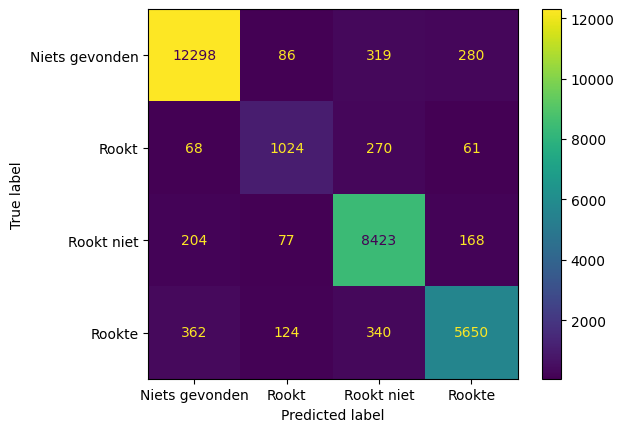

                precision    recall  f1-score   support

Niets gevonden       0.95      0.95      0.95     12983
         Rookt       0.78      0.72      0.75      1423
    Rookt niet       0.90      0.95      0.92      8872
        Rookte       0.92      0.87      0.89      6476

      accuracy                           0.92     29754
     macro avg       0.89      0.87      0.88     29754
  weighted avg       0.92      0.92      0.92     29754



In [18]:
# Ngram 3 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# No stopwords

In [19]:
Corpus["text"] = Corpus["text"].apply(no_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114.68, NNZs: 276, Bias: 0.000000, T: 71408, Avg. loss: 0.223137
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 158.12, NNZs: 188, Bias: 0.000000, T: 142816, Avg. loss: 0.164019
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 190.20, NNZs: 148, Bias: 0.000000, T: 214224, Avg. loss: 0.148340
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 216.33, NNZs: 124, Bias: 0.000000, T: 285632, Avg. loss: 0.139359
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 238.75, NNZs: 117, Bias: 0.000000, T: 357040, Avg. loss: 0.133836
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 258.61, NNZs: 106, Bias: 0.000000, T: 428448, Avg. loss: 0.130065
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 262.07, NNZs: 105, Bias: 0.000000, T: 499856, Avg. loss: 0.127721
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 265.48, NNZs: 105, Bias: 0.000000, T: 571264, Avg. loss: 0.127233
Total training time: 1.28 seconds.
-- Epoch 9
Norm: 268.82, NNZs: 103, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 104.22, NNZs: 130, Bias: 0.000000, T: 142816, Avg. loss: 0.162849
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 125.06, NNZs: 116, Bias: 0.000000, T: 214224, Avg. loss: 0.161258
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 142.51, NNZs: 111, Bias: 0.000000, T: 285632, Avg. loss: 0.159802
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 158.04, NNZs: 108, Bias: 0.000000, T: 357040, Avg. loss: 0.159599
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 172.18, NNZs: 105, Bias: 0.000000, T: 428448, Avg. loss: 0.159072
Total training time: 0.92 seconds.
-- Epoch 7
Norm: 174.28, NNZs: 105, Bias: 0.000000, T: 499856, Avg. loss: 0.158119
Total training time: 1.08 seconds.
-- Epoch 8
Norm: 176.49, NNZs: 104, Bias: 0.000000, T: 571264, Avg. loss: 0.157924
Total training time: 1.23 seconds.
-- Epoch 9
Norm: 178.65, NNZs: 106, Bias: 0.000000, T: 642672, Avg. loss: 0.157838
Total training time: 1.39 seconds.
-- Epoch 10
Norm: 180.75, NNZs: 105, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 150.82, NNZs: 226, Bias: 0.000000, T: 142816, Avg. loss: 0.307078
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.60, NNZs: 193, Bias: 0.000000, T: 214224, Avg. loss: 0.298560
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 207.23, NNZs: 189, Bias: 0.000000, T: 285632, Avg. loss: 0.294085
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 229.53, NNZs: 179, Bias: 0.000000, T: 357040, Avg. loss: 0.291736
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 249.93, NNZs: 174, Bias: 0.000000, T: 428448, Avg. loss: 0.289710
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 252.97, NNZs: 176, Bias: 0.000000, T: 499856, Avg. loss: 0.286908
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 256.00, NNZs: 174, Bias: 0.000000, T: 571264, Avg. loss: 0.286916
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 258.99, NNZs: 174, Bias: 0.000000, T: 642672, Avg. loss: 0.286823
Total training time: 1.45 seconds.
-- Epoch 10
Norm: 261.92, NNZs: 174, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.090 total time=  34.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114.30, NNZs: 284, Bias: 0.000000, T: 71408, Avg. loss: 0.224107
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 158.00, NNZs: 186, Bias: 0.000000, T: 142816, Avg. loss: 0.164739
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 190.26, NNZs: 153, Bias: 0.000000, T: 214224, Avg. loss: 0.148965
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 216.36, NNZs: 129, Bias: 0.000000, T: 285632, Avg. loss: 0.139914
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 238.86, NNZs: 117, Bias: 0.000000, T: 357040, Avg. loss: 0.134473
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 258.70, NNZs: 112, Bias: 0.000000, T: 428448, Avg. loss: 0.130511
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 262.20, NNZs: 112, Bias: 0.000000, T: 499856, Avg. loss: 0.128236
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 265.63, NNZs: 110, Bias: 0.000000, T: 571264, Avg. loss: 0.127612
Total training time: 1.26 seconds.
-- Epoch 9
Norm: 268.99, NNZs: 108, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 104.52, NNZs: 127, Bias: 0.000000, T: 142816, Avg. loss: 0.163306
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 124.99, NNZs: 113, Bias: 0.000000, T: 214224, Avg. loss: 0.161311
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 142.51, NNZs: 110, Bias: 0.000000, T: 285632, Avg. loss: 0.160448
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 158.01, NNZs: 104, Bias: 0.000000, T: 357040, Avg. loss: 0.159581
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 172.10, NNZs: 101, Bias: 0.000000, T: 428448, Avg. loss: 0.159324
Total training time: 0.92 seconds.
-- Epoch 7
Norm: 174.32, NNZs: 102, Bias: 0.000000, T: 499856, Avg. loss: 0.158422
Total training time: 1.08 seconds.
-- Epoch 8
Norm: 176.50, NNZs: 104, Bias: 0.000000, T: 571264, Avg. loss: 0.158188
Total training time: 1.24 seconds.
-- Epoch 9
Norm: 178.64, NNZs: 104, Bias: 0.000000, T: 642672, Avg. loss: 0.157928
Total training time: 1.39 seconds.
-- Epoch 10
Norm: 180.73, NNZs: 104, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 150.83, NNZs: 214, Bias: 0.000000, T: 142816, Avg. loss: 0.307357
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.54, NNZs: 190, Bias: 0.000000, T: 214224, Avg. loss: 0.298143
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 207.15, NNZs: 181, Bias: 0.000000, T: 285632, Avg. loss: 0.293952
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 229.62, NNZs: 176, Bias: 0.000000, T: 357040, Avg. loss: 0.290914
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 249.81, NNZs: 169, Bias: 0.000000, T: 428448, Avg. loss: 0.289075
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 252.92, NNZs: 172, Bias: 0.000000, T: 499856, Avg. loss: 0.287279
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 255.97, NNZs: 172, Bias: 0.000000, T: 571264, Avg. loss: 0.286578
Total training time: 1.28 seconds.
-- Epoch 9
Norm: 258.97, NNZs: 172, Bias: 0.000000, T: 642672, Avg. loss: 0.286340
Total training time: 1.44 seconds.
-- Epoch 10
Norm: 261.94, NNZs: 171, Bias: 0.000000, T: 714080, Avg

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time=  34.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114.32, NNZs: 279, Bias: 0.000000, T: 71408, Avg. loss: 0.222277
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 158.10, NNZs: 191, Bias: 0.000000, T: 142816, Avg. loss: 0.163119
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 190.27, NNZs: 152, Bias: 0.000000, T: 214224, Avg. loss: 0.146977
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 216.44, NNZs: 129, Bias: 0.000000, T: 285632, Avg. loss: 0.138394
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 239.01, NNZs: 118, Bias: 0.000000, T: 357040, Avg. loss: 0.132650
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 258.98, NNZs: 112, Bias: 0.000000, T: 428448, Avg. loss: 0.128703
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 262.45, NNZs: 110, Bias: 0.000000, T: 499856, Avg. loss: 0.126381
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 265.89, NNZs: 110, Bias: 0.000000, T: 571264, Avg. loss: 0.125748
Total training time: 1.26 seconds.
-- Epoch 9
Norm: 269.24, NNZs: 110, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 104.65, NNZs: 124, Bias: 0.000000, T: 142816, Avg. loss: 0.163892
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 124.68, NNZs: 107, Bias: 0.000000, T: 214224, Avg. loss: 0.161639
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 142.34, NNZs: 104, Bias: 0.000000, T: 285632, Avg. loss: 0.160901
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 157.96, NNZs: 100, Bias: 0.000000, T: 357040, Avg. loss: 0.160280
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 171.89, NNZs: 99, Bias: 0.000000, T: 428448, Avg. loss: 0.159926
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 174.10, NNZs: 100, Bias: 0.000000, T: 499856, Avg. loss: 0.158600
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 176.20, NNZs: 100, Bias: 0.000000, T: 571264, Avg. loss: 0.158377
Total training time: 1.25 seconds.
-- Epoch 9
Norm: 178.34, NNZs: 100, Bias: 0.000000, T: 642672, Avg. loss: 0.158410
Total training time: 1.41 seconds.
-- Epoch 10
Norm: 180.44, NNZs: 100, Bias: 0.000000, T: 714080, Avg.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 109.19, NNZs: 298, Bias: 0.000000, T: 71408, Avg. loss: 0.350586
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 150.60, NNZs: 217, Bias: 0.000000, T: 142816, Avg. loss: 0.306902
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.24, NNZs: 197, Bias: 0.000000, T: 214224, Avg. loss: 0.298150
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 206.75, NNZs: 184, Bias: 0.000000, T: 285632, Avg. loss: 0.293487
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 229.17, NNZs: 174, Bias: 0.000000, T: 357040, Avg. loss: 0.291198
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 249.49, NNZs: 177, Bias: 0.000000, T: 428448, Avg. loss: 0.289059
Total training time: 0.96 seconds.
-- Epoch 7
Norm: 252.52, NNZs: 178, Bias: 0.000000, T: 499856, Avg. loss: 0.286390
Total training time: 1.12 seconds.
-- Epoch 8
Norm: 255.55, NNZs: 178, Bias: 0.000000, T: 571264, Avg. loss: 0.286207
Total training time: 1.28 seconds.
-- Epoch 9
Norm: 258.54, NNZs: 176, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time=  34.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114.22, NNZs: 286, Bias: 0.000000, T: 71408, Avg. loss: 0.222800
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 157.85, NNZs: 186, Bias: 0.000000, T: 142816, Avg. loss: 0.164129
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 189.87, NNZs: 154, Bias: 0.000000, T: 214224, Avg. loss: 0.147898
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 216.07, NNZs: 131, Bias: 0.000000, T: 285632, Avg. loss: 0.139464
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 238.60, NNZs: 124, Bias: 0.000000, T: 357040, Avg. loss: 0.133480
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 258.56, NNZs: 112, Bias: 0.000000, T: 428448, Avg. loss: 0.129810
Total training time: 0.94 seconds.
-- Epoch 7
Norm: 262.04, NNZs: 112, Bias: 0.000000, T: 499856, Avg. loss: 0.127461
Total training time: 1.10 seconds.
-- Epoch 8
Norm: 265.49, NNZs: 114, Bias: 0.000000, T: 571264, Avg. loss: 0.126933
Total training time: 1.26 seconds.
-- Epoch 9
Norm: 268.86, NNZs: 113, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 77.83, NNZs: 177, Bias: 0.000000, T: 71408, Avg. loss: 0.174304
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 104.59, NNZs: 126, Bias: 0.000000, T: 142816, Avg. loss: 0.162531
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 124.84, NNZs: 114, Bias: 0.000000, T: 214224, Avg. loss: 0.160968
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 142.36, NNZs: 114, Bias: 0.000000, T: 285632, Avg. loss: 0.160050
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 157.95, NNZs: 108, Bias: 0.000000, T: 357040, Avg. loss: 0.159229
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 172.09, NNZs: 109, Bias: 0.000000, T: 428448, Avg. loss: 0.158756
Total training time: 0.98 seconds.
-- Epoch 7
Norm: 174.24, NNZs: 107, Bias: 0.000000, T: 499856, Avg. loss: 0.157531
Total training time: 1.14 seconds.
-- Epoch 8
Norm: 176.37, NNZs: 106, Bias: 0.000000, T: 571264, Avg. loss: 0.157470
Total training time: 1.29 seconds.
-- Epoch 9
Norm: 178.51, NNZs: 106, Bias: 0.000000, T: 642672, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


-- Epoch 1
Norm: 109.02, NNZs: 301, Bias: 0.000000, T: 71408, Avg. loss: 0.352662
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 150.72, NNZs: 221, Bias: 0.000000, T: 142816, Avg. loss: 0.308426
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.49, NNZs: 203, Bias: 0.000000, T: 214224, Avg. loss: 0.299472
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 206.99, NNZs: 193, Bias: 0.000000, T: 285632, Avg. loss: 0.295043
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 229.59, NNZs: 187, Bias: 0.000000, T: 357040, Avg. loss: 0.292132
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 249.87, NNZs: 180, Bias: 0.000000, T: 428448, Avg. loss: 0.290638
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 252.93, NNZs: 184, Bias: 0.000000, T: 499856, Avg. loss: 0.287647
Total training time: 1.13 seconds.
-- Epoch 8
Norm: 255.97, NNZs: 183, Bias: 0.000000, T: 571264, Avg. loss: 0.287440
Total training time: 1.29 seconds.
-- Epoch 9
Norm: 258.97, NNZs: 187, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.089 total time=  34.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 114.38, NNZs: 281, Bias: 0.000000, T: 71409, Avg. loss: 0.224243
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 157.82, NNZs: 192, Bias: 0.000000, T: 142818, Avg. loss: 0.165557
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 189.82, NNZs: 150, Bias: 0.000000, T: 214227, Avg. loss: 0.149793
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 215.88, NNZs: 132, Bias: 0.000000, T: 285636, Avg. loss: 0.141039
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 238.43, NNZs: 123, Bias: 0.000000, T: 357045, Avg. loss: 0.135380
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 258.38, NNZs: 118, Bias: 0.000000, T: 428454, Avg. loss: 0.131526
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 261.83, NNZs: 118, Bias: 0.000000, T: 499863, Avg. loss: 0.129113
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 265.24, NNZs: 116, Bias: 0.000000, T: 571272, Avg. loss: 0.128749
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 268.58, NNZs: 114, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


Norm: 104.34, NNZs: 120, Bias: 0.000000, T: 142818, Avg. loss: 0.163414
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 124.76, NNZs: 112, Bias: 0.000000, T: 214227, Avg. loss: 0.161404
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 142.35, NNZs: 110, Bias: 0.000000, T: 285636, Avg. loss: 0.160666
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 157.70, NNZs: 105, Bias: 0.000000, T: 357045, Avg. loss: 0.160107
Total training time: 0.84 seconds.
-- Epoch 6
Norm: 171.83, NNZs: 105, Bias: 0.000000, T: 428454, Avg. loss: 0.159503
Total training time: 1.00 seconds.
-- Epoch 7
Norm: 174.05, NNZs: 107, Bias: 0.000000, T: 499863, Avg. loss: 0.158654
Total training time: 1.16 seconds.
-- Epoch 8
Norm: 176.16, NNZs: 107, Bias: 0.000000, T: 571272, Avg. loss: 0.158349
Total training time: 1.32 seconds.
-- Epoch 9
Norm: 178.31, NNZs: 107, Bias: 0.000000, T: 642681, Avg. loss: 0.158478
Total training time: 1.48 seconds.
-- Epoch 10
Norm: 180.41, NNZs: 107, Bias: 0.000000, T: 714090, Avg

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


Norm: 150.83, NNZs: 222, Bias: 0.000000, T: 142818, Avg. loss: 0.308369
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 181.42, NNZs: 194, Bias: 0.000000, T: 214227, Avg. loss: 0.299272
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 207.11, NNZs: 189, Bias: 0.000000, T: 285636, Avg. loss: 0.295422
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 229.46, NNZs: 187, Bias: 0.000000, T: 357045, Avg. loss: 0.292500
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 249.65, NNZs: 174, Bias: 0.000000, T: 428454, Avg. loss: 0.290349
Total training time: 0.95 seconds.
-- Epoch 7
Norm: 252.71, NNZs: 179, Bias: 0.000000, T: 499863, Avg. loss: 0.288767
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 255.78, NNZs: 180, Bias: 0.000000, T: 571272, Avg. loss: 0.288352
Total training time: 1.27 seconds.
-- Epoch 9
Norm: 258.79, NNZs: 181, Bias: 0.000000, T: 642681, Avg. loss: 0.288063
Total training time: 1.43 seconds.
-- Epoch 10
Norm: 261.74, NNZs: 181, Bias: 0.000000, T: 714090, Avg

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.087 total time=  34.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 96249596312973.48, NNZs: 59055, Bias: 0.000000, T: 71408, Avg. loss: 358853149485061199888384.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 87200340203688.19, NNZs: 59055, Bias: 0.000000, T: 142816, Avg. loss: 89402685451376252682240.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 82930482260219.38, NNZs: 59055, Bias: 0.000000, T: 214224, Avg. loss: 63559044686702425669632.000000
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 80239025327981.91, NNZs: 59055, Bias: 0.000000, T: 285632, Avg. loss: 52787877399863830249472.000000
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 78314628660158.19, NNZs: 59055, Bias: 0.000000, T: 357040, Avg. loss: 46602695192458687414272.000000
Total training time: 0.86 seconds.
-- Epoch 6
Norm: 76832959076370.78, NNZs: 59055, Bias: 0.000000, T: 428448, Avg. loss: 42507581210545843339264.000000
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.05 seconds
-- Epoch 1
Norm: 94196000793160.66, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 85313839961193.00, NNZs: 59055, Bias: 0.000000, T: 142816, Avg. loss: 85100191912330254090240.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 81123297767524.34, NNZs: 59055, Bias: 0.000000, T: 214224, Avg. loss: 60527201447307233984512.000000
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 78485031857896.11, NNZs: 59055, Bias: 0.000000, T: 285632, Avg. loss: 50340889022211098148864.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 76597271789278.33, NNZs: 59055, Bias: 0.000000, T: 357040, Avg. loss: 44493635400954072268800.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 75145233242017.39, NNZs: 59055, Bias: 0.000000, T: 428448, Avg. loss: 40573141107673032294400.000000
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


-- Epoch 1
Norm: 94445281083823.30, NNZs: 59055, Bias: 0.000000, T: 71408, Avg. loss: 342938668355078366167040.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 85500981615175.47, NNZs: 59055, Bias: 0.000000, T: 142816, Avg. loss: 85964959830623014354944.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 81280717587031.80, NNZs: 59055, Bias: 0.000000, T: 214224, Avg. loss: 61135429230408646000640.000000
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 78625069363808.44, NNZs: 59055, Bias: 0.000000, T: 285632, Avg. loss: 50820024327265499217920.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 76725595674178.91, NNZs: 59055, Bias: 0.000000, T: 357040, Avg. loss: 44914592886411505958912.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 75263023992753.42, NNZs: 59055, Bias: 0.000000, T: 428448, Avg. loss: 41009589967405952532480.000000
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 92155071685816.38, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.223 total time=  26.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 90195002675992.16, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 316913205104440248369152.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 81573107372394.19, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 77520810469660523757568.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 77519881463728.78, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 55017071639761466163200.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 74964218980895.59, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 45679073594765268221952.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 73141032607282.14, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 40307177441452665864192.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 71738277219740.08, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 36759629211592797716480.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 93064154603932.72, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 84185446486120.78, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 82734712299049059352576.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 80011670501874.52, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 58333401262249742434304.000000
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 77390832952248.39, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 48306873367783570145280.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 75515611893531.03, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 42638699739186378833920.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 74075987918091.11, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 38818372460965867290624.000000
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 94616943468677.45, NNZs: 59193, Bias: 0.000000, T: 71408, Avg. loss: 347764884226868850458624.000000
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 85786216411450.31, NNZs: 59193, Bias: 0.000000, T: 142816, Avg. loss: 84736763846426223443968.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 81605471820201.94, NNZs: 59193, Bias: 0.000000, T: 214224, Avg. loss: 60341172902927592849408.000000
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 78970807697919.81, NNZs: 59193, Bias: 0.000000, T: 285632, Avg. loss: 50169853730832185819136.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 77087965005246.94, NNZs: 59193, Bias: 0.000000, T: 357040, Avg. loss: 44327224659822254227456.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 75640628735739.19, NNZs: 59193, Bias: 0.000000, T: 428448, Avg. loss: 40422409511726638694400.000000
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.05 seconds
-- Epoch 1
Norm: 94699760512015.36, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.227 total time=  26.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 96990207366099.73, NNZs: 59417, Bias: 0.000000, T: 71408, Avg. loss: 359630715645033944449024.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 87872793165159.98, NNZs: 59417, Bias: 0.000000, T: 142816, Avg. loss: 91233436011932912975872.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 83546043931192.67, NNZs: 59417, Bias: 0.000000, T: 214224, Avg. loss: 65149238823727552004096.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 80820642521640.42, NNZs: 59417, Bias: 0.000000, T: 285632, Avg. loss: 54207824832629431074816.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 78871035356071.02, NNZs: 59417, Bias: 0.000000, T: 357040, Avg. loss: 47926087826952893235200.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 77371364969964.66, NNZs: 59417, Bias: 0.000000, T: 428448, Avg. loss: 43703995734935660920832.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 98190952771708.94, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 89023851859876.75, NNZs: 59417, Bias: 0.000000, T: 142816, Avg. loss: 94336476917029706661888.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 84693677027614.89, NNZs: 59417, Bias: 0.000000, T: 214224, Avg. loss: 67062742715230528208896.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 81969643865721.89, NNZs: 59417, Bias: 0.000000, T: 285632, Avg. loss: 55716277094901138587648.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 80021285991007.64, NNZs: 59417, Bias: 0.000000, T: 357040, Avg. loss: 49195869861956590501888.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 78525226226775.81, NNZs: 59417, Bias: 0.000000, T: 428448, Avg. loss: 44877605125908489830400.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 93631280477965.58, NNZs: 59417, Bias: 0.000000, T: 71408, Avg. loss: 338918731452932643880960.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 84782934093060.20, NNZs: 59417, Bias: 0.000000, T: 142816, Avg. loss: 84629742639599423848448.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 80602320660795.92, NNZs: 59417, Bias: 0.000000, T: 214224, Avg. loss: 60187189927549960454144.000000
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 77967027322658.83, NNZs: 59417, Bias: 0.000000, T: 285632, Avg. loss: 50015133242850919055360.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 76081783513921.80, NNZs: 59417, Bias: 0.000000, T: 357040, Avg. loss: 44197989789736200306688.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 74631397262832.55, NNZs: 59417, Bias: 0.000000, T: 428448, Avg. loss: 40272264712391680327680.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 90065065283958.16, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.225 total time=  26.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 94376537349395.81, NNZs: 59227, Bias: 0.000000, T: 71408, Avg. loss: 343434536608454133415936.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 85610798526503.67, NNZs: 59227, Bias: 0.000000, T: 142816, Avg. loss: 84255914646930676776960.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 81471146419104.05, NNZs: 59227, Bias: 0.000000, T: 214224, Avg. loss: 59978637118118255656960.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 78868167139382.03, NNZs: 59227, Bias: 0.000000, T: 285632, Avg. loss: 49907585690407008206848.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 77005269898306.33, NNZs: 59227, Bias: 0.000000, T: 357040, Avg. loss: 44151442206973530996736.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 75572364628389.97, NNZs: 59227, Bias: 0.000000, T: 428448, Avg. loss: 40319009004516701896704.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 91564903615239.66, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 82875381378155.34, NNZs: 59227, Bias: 0.000000, T: 142816, Avg. loss: 80838983007540292354048.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 78764482529457.30, NNZs: 59227, Bias: 0.000000, T: 214224, Avg. loss: 57593842735696043835392.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 76176526362689.30, NNZs: 59227, Bias: 0.000000, T: 285632, Avg. loss: 47844703937156903600128.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 74323733864444.53, NNZs: 59227, Bias: 0.000000, T: 357040, Avg. loss: 42260563188483736207360.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 72899248283511.72, NNZs: 59227, Bias: 0.000000, T: 428448, Avg. loss: 38562804438731803590656.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 97092444707825.14, NNZs: 59227, Bias: 0.000000, T: 71408, Avg. loss: 362164415968290107555840.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 88008302322997.83, NNZs: 59227, Bias: 0.000000, T: 142816, Avg. loss: 90911613492157342547968.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 83731108773590.00, NNZs: 59227, Bias: 0.000000, T: 214224, Avg. loss: 64521109597021676765184.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 81031326522288.59, NNZs: 59227, Bias: 0.000000, T: 285632, Avg. loss: 53696413291275333140480.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 79101699837086.78, NNZs: 59227, Bias: 0.000000, T: 357040, Avg. loss: 47445134663527373471744.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 77616629134393.61, NNZs: 59227, Bias: 0.000000, T: 428448, Avg. loss: 43267640119122521489408.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 94683108969752.53, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.228 total time=  26.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 96913562120501.00, NNZs: 59119, Bias: 0.000000, T: 71409, Avg. loss: 351800688836881166630912.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 87922062034000.17, NNZs: 59119, Bias: 0.000000, T: 142818, Avg. loss: 91189128029312498270208.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 83655465703656.88, NNZs: 59119, Bias: 0.000000, T: 214227, Avg. loss: 65341071632046340702208.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 80960626478529.88, NNZs: 59119, Bias: 0.000000, T: 285636, Avg. loss: 54477953608570416136192.000000
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 79032121000138.14, NNZs: 59119, Bias: 0.000000, T: 357045, Avg. loss: 48216788631502448492544.000000
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 77546725397682.25, NNZs: 59119, Bias: 0.000000, T: 428454, Avg. loss: 44030136004842270752768.000000
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.08 seconds
-- Epoch 1
Norm: 95483532823080.95, N

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 86543838917193.91, NNZs: 59119, Bias: 0.000000, T: 142818, Avg. loss: 87193974351371308105728.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 82311562666679.03, NNZs: 59119, Bias: 0.000000, T: 214227, Avg. loss: 62237538764126775410688.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 79646006021580.92, NNZs: 59119, Bias: 0.000000, T: 285636, Avg. loss: 51796618996971120623616.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 77738725550733.38, NNZs: 59119, Bias: 0.000000, T: 357045, Avg. loss: 45818612336776552906752.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 76271509262970.83, NNZs: 59119, Bias: 0.000000, T: 428454, Avg. loss: 41794162047839411109888.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 93623617474914.98, NNZs: 59119, Bias: 0.000000, T: 71409, Avg. loss: 329563524058054488227840.000000
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 84886000310710.80, NNZs: 59119, Bias: 0.000000, T: 142818, Avg. loss: 83006837046224145612800.000000
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 80762700551174.39, NNZs: 59119, Bias: 0.000000, T: 214227, Avg. loss: 59424277266887333642240.000000
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 78163705790354.94, NNZs: 59119, Bias: 0.000000, T: 285636, Avg. loss: 49580431974355687178240.000000
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 76302300116714.52, NNZs: 59119, Bias: 0.000000, T: 357045, Avg. loss: 43921613546895911682048.000000
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 74870454163758.56, NNZs: 59119, Bias: 0.000000, T: 428454, Avg. loss: 40122296969935582134272.000000
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.06 seconds
-- Epoch 1
Norm: 94730710289053.31, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.223 total time=  26.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 167.09, NNZs: 329, Bias: 0.000000, T: 71408, Avg. loss: 0.146670
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 222.21, NNZs: 241, Bias: 0.000000, T: 142816, Avg. loss: 0.115445
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 263.99, NNZs: 223, Bias: 0.000000, T: 214224, Avg. loss: 0.112304
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 299.37, NNZs: 229, Bias: 0.000000, T: 285632, Avg. loss: 0.111248
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 330.86, NNZs: 215, Bias: 0.000000, T: 357040, Avg. loss: 0.111889
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 359.42, NNZs: 232, Bias: 0.000000, T: 428448, Avg. loss: 0.112046
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 163.28, NNZs: 309, Bias: 0.000000, T: 71408, Avg. loss: 0.177715
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 229.70, NNZs: 237, Bias: 0.000000, T: 142816, Avg. loss: 0.169665
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 280.82, NNZs: 252, Bias: 0.000000, T: 214224, Avg. loss: 0.169595
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 323.84, NNZs: 236, Bias: 0.000000, T: 285632, Avg. loss: 0.169189
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 361.80, NNZs: 235, Bias: 0.000000, T: 357040, Avg. loss: 0.169348
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 396.32, NNZs: 249, Bias: 0.000000, T: 428448, Avg. loss: 0.169911
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 236.21, NNZs: 590, Bias: 0.000000, T: 71408, Avg. loss: 0.382622
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 328.14, NNZs: 472, Bias: 0.000000, T: 142816, Avg. loss: 0.339694
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 399.02, NNZs: 431, Bias: 0.000000, T: 214224, Avg. loss: 0.336190
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 459.32, NNZs: 421, Bias: 0.000000, T: 285632, Avg. loss: 0.335935
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 512.43, NNZs: 435, Bias: 0.000000, T: 357040, Avg. loss: 0.335928
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 560.19, NNZs: 397, Bias: 0.000000, T: 428448, Avg. loss: 0.332647
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 188.64, NNZs: 414, Bias: 0.000000, T: 71408, Avg. loss: 0.225765
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 260.50, NNZs: 334, Bias: 0.000000, T: 142816, Avg. loss: 0.200574
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 316.05, NNZs: 306, Bias: 0.000000, T: 214224, Avg. loss: 0.197171
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 363.01

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.706 total time=  25.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 166.61, NNZs: 323, Bias: 0.000000, T: 71408, Avg. loss: 0.141831
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 220.18, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.107851
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 260.84, NNZs: 228, Bias: 0.000000, T: 214224, Avg. loss: 0.104662
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 295.10, NNZs: 224, Bias: 0.000000, T: 285632, Avg. loss: 0.104296
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 325.69, NNZs: 218, Bias: 0.000000, T: 357040, Avg. loss: 0.104542
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 353.36, NNZs: 211, Bias: 0.000000, T: 428448, Avg. loss: 0.103940
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 163.63, NNZs: 310, Bias: 0.000000, T: 71408, Avg. loss: 0.181122
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 229.92, NNZs: 269, Bias: 0.000000, T: 142816, Avg. loss: 0.170607
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 281.10, NNZs: 256, Bias: 0.000000, T: 214224, Avg. loss: 0.170105
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 324.06, NNZs: 256, Bias: 0.000000, T: 285632, Avg. loss: 0.169449
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 362.06, NNZs: 266, Bias: 0.000000, T: 357040, Avg. loss: 0.169024
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 396.32, NNZs: 257, Bias: 0.000000, T: 428448, Avg. loss: 0.168330
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 236.14, NNZs: 555, Bias: 0.000000, T: 71408, Avg. loss: 0.379280
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 327.75, NNZs: 428, Bias: 0.000000, T: 142816, Avg. loss: 0.336237
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 398.88, NNZs: 435, Bias: 0.000000, T: 214224, Avg. loss: 0.335761
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 459.40, NNZs: 414, Bias: 0.000000, T: 285632, Avg. loss: 0.334071
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 512.27, NNZs: 411, Bias: 0.000000, T: 357040, Avg. loss: 0.332371
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 560.26, NNZs: 409, Bias: 0.000000, T: 428448, Avg. loss: 0.333135
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 187.79, NNZs: 409, Bias: 0.000000, T: 71408, Avg. loss: 0.222320
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 259.32, NNZs: 351, Bias: 0.000000, T: 142816, Avg. loss: 0.195999
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 314.32, NNZs: 310, Bias: 0.000000, T: 214224, Avg. loss: 0.191255
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 360.86

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.717 total time=  25.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 166.50, NNZs: 349, Bias: 0.000000, T: 71408, Avg. loss: 0.143038
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 220.47, NNZs: 250, Bias: 0.000000, T: 142816, Avg. loss: 0.110864
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 261.47, NNZs: 240, Bias: 0.000000, T: 214224, Avg. loss: 0.108206
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 296.43, NNZs: 222, Bias: 0.000000, T: 285632, Avg. loss: 0.106621
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 327.39, NNZs: 214, Bias: 0.000000, T: 357040, Avg. loss: 0.106630
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 355.21, NNZs: 231, Bias: 0.000000, T: 428448, Avg. loss: 0.107482
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 163.61, NNZs: 330, Bias: 0.000000, T: 71408, Avg. loss: 0.182367
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 230.44, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.171084
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 281.66, NNZs: 246, Bias: 0.000000, T: 214224, Avg. loss: 0.171677
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 324.98, NNZs: 244, Bias: 0.000000, T: 285632, Avg. loss: 0.171002
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 363.02, NNZs: 255, Bias: 0.000000, T: 357040, Avg. loss: 0.170116
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 397.63, NNZs: 249, Bias: 0.000000, T: 428448, Avg. loss: 0.172171
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 235.75, NNZs: 616, Bias: 0.000000, T: 71408, Avg. loss: 0.376928
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 327.74, NNZs: 481, Bias: 0.000000, T: 142816, Avg. loss: 0.334319
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 398.76, NNZs: 448, Bias: 0.000000, T: 214224, Avg. loss: 0.333096
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 458.66, NNZs: 443, Bias: 0.000000, T: 285632, Avg. loss: 0.333059
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 511.41, NNZs: 439, Bias: 0.000000, T: 357040, Avg. loss: 0.332596
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 559.41, NNZs: 451, Bias: 0.000000, T: 428448, Avg. loss: 0.331586
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 188.91, NNZs: 401, Bias: 0.000000, T: 71408, Avg. loss: 0.227258
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 260.89, NNZs: 325, Bias: 0.000000, T: 142816, Avg. loss: 0.201631
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 316.60, NNZs: 339, Bias: 0.000000, T: 214224, Avg. loss: 0.197403
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 363.22

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.753 total time=  25.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 166.35, NNZs: 319, Bias: 0.000000, T: 71408, Avg. loss: 0.140866
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 219.40, NNZs: 217, Bias: 0.000000, T: 142816, Avg. loss: 0.105653
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 260.11, NNZs: 222, Bias: 0.000000, T: 214224, Avg. loss: 0.103929
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 294.24, NNZs: 203, Bias: 0.000000, T: 285632, Avg. loss: 0.102751
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 324.41, NNZs: 212, Bias: 0.000000, T: 357040, Avg. loss: 0.102892
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 351.83, NNZs: 213, Bias: 0.000000, T: 428448, Avg. loss: 0.102591
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 162.86, NNZs: 312, Bias: 0.000000, T: 71408, Avg. loss: 0.180295
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 229.12, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.170835
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 280.11, NNZs: 235, Bias: 0.000000, T: 214224, Avg. loss: 0.170076
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 322.97, NNZs: 254, Bias: 0.000000, T: 285632, Avg. loss: 0.170289
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 360.74, NNZs: 249, Bias: 0.000000, T: 357040, Avg. loss: 0.168775
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 395.10, NNZs: 250, Bias: 0.000000, T: 428448, Avg. loss: 0.171021
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 235.50, NNZs: 611, Bias: 0.000000, T: 71408, Avg. loss: 0.377698
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 327.32, NNZs: 453, Bias: 0.000000, T: 142816, Avg. loss: 0.335734
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 398.20, NNZs: 450, Bias: 0.000000, T: 214224, Avg. loss: 0.333634
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 458.04, NNZs: 436, Bias: 0.000000, T: 285632, Avg. loss: 0.333073
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 511.06, NNZs: 415, Bias: 0.000000, T: 357040, Avg. loss: 0.333895
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 558.94, NNZs: 428, Bias: 0.000000, T: 428448, Avg. loss: 0.330928
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 188.58, NNZs: 412, Bias: 0.000000, T: 71408, Avg. loss: 0.225269
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 259.76, NNZs: 343, Bias: 0.000000, T: 142816, Avg. loss: 0.198314
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 315.37, NNZs: 322, Bias: 0.000000, T: 214224, Avg. loss: 0.198488
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 361.91

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.730 total time=  24.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 167.21, NNZs: 325, Bias: 0.000000, T: 71409, Avg. loss: 0.144989
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 221.69, NNZs: 222, Bias: 0.000000, T: 142818, Avg. loss: 0.112810
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 263.47, NNZs: 221, Bias: 0.000000, T: 214227, Avg. loss: 0.110922
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 298.74, NNZs: 212, Bias: 0.000000, T: 285636, Avg. loss: 0.110623
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 330.10, NNZs: 229, Bias: 0.000000, T: 357045, Avg. loss: 0.109641
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 358.13, NNZs: 211, Bias: 0.000000, T: 428454, Avg. loss: 0.109243
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 163.48, NNZs: 312, Bias: 0.000000, T: 71409, Avg. loss: 0.179008
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 230.04, NNZs: 257, Bias: 0.000000, T: 142818, Avg. loss: 0.169548
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 281.25, NNZs: 259, Bias: 0.000000, T: 214227, Avg. loss: 0.168537
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 324.30, NNZs: 256, Bias: 0.000000, T: 285636, Avg. loss: 0.167941
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 362.35, NNZs: 251, Bias: 0.000000, T: 357045, Avg. loss: 0.168076
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 396.74, NNZs: 256, Bias: 0.000000, T: 428454, Avg. loss: 0.168583
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 235.79, NNZs: 583, Bias: 0.000000, T: 71409, Avg. loss: 0.378788
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 327.75, NNZs: 447, Bias: 0.000000, T: 142818, Avg. loss: 0.336106
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 398.60, NNZs: 442, Bias: 0.000000, T: 214227, Avg. loss: 0.333029
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 458.50, NNZs: 444, Bias: 0.000000, T: 285636, Avg. loss: 0.334633
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 511.39, NNZs: 430, Bias: 0.000000, T: 357045, Avg. loss: 0.332422
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 559.38, NNZs: 418, Bias: 0.000000, T: 428454, Avg. loss: 0.333234
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1
Norm: 188.41, NNZs: 421, Bias: 0.000000, T: 71409, Avg. loss: 0.224401
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 259.80, NNZs: 329, Bias: 0.000000, T: 142818, Avg. loss: 0.198634
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 314.84, NNZs: 302, Bias: 0.000000, T: 214227, Avg. loss: 0.194086
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 361.26

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.720 total time=  25.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.99, NNZs: 381, Bias: 0.000000, T: 71408, Avg. loss: 0.149860
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 67.79, NNZs: 346, Bias: 0.000000, T: 142816, Avg. loss: 0.137164
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 81.06, NNZs: 342, Bias: 0.000000, T: 214224, Avg. loss: 0.135954
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 92.45, NNZs: 325, Bias: 0.000000, T: 285632, Avg. loss: 0.135832
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 102.52, NNZs: 327, Bias: 0.000000, T: 357040, Avg. loss: 0.135641
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 111.67, NNZs: 313, Bias: 0.000000, T: 428448, Avg. loss: 0.135769
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 114.04, NNZs: 621, Bias: 0.000000, T: 71408, Avg. loss: 0.160426
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 161.09, NNZs: 530, Bias: 0.000000, T: 142816, Avg. loss: 0.148500
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 196.91, NNZs: 513, Bias: 0.000000, T: 214224, Avg. loss: 0.147648
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 227.20, NNZs: 511, Bias: 0.000000, T: 285632, Avg. loss: 0.147228
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 253.64, NNZs: 494, Bias: 0.000000, T: 357040, Avg. loss: 0.146995
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 278.01, NNZs: 485, Bias: 0.000000, T: 428448, Avg. loss: 0.146302
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 64.41, NNZs: 450, Bias: 0.000000, T: 71408, Avg. loss: 0.224849
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 88.67, NNZs: 426, Bias: 0.000000, T: 142816, Avg. loss: 0.212360
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 107.55, NNZs: 391, Bias: 0.000000, T: 214224, Avg. loss: 0.211440
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 123.34, NNZs: 399, Bias: 0.000000, T: 285632, Avg. loss: 0.211470
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 137.45, NNZs: 403, Bias: 0.000000, T: 357040, Avg. loss: 0.211494
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 150.27, NNZs: 391, Bias: 0.000000, T: 428448, Avg. loss: 0.211813
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 62.28, NNZs: 460, Bias: 0.000000, T: 71408, Avg. loss: 0.150600
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 85.19, NNZs: 421, Bias: 0.000000, T: 142816, Avg. loss: 0.142483
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 103.01, NNZs: 409, Bias: 0.000000, T: 214224, Avg. loss: 0.142062
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 118.04, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.032 total time=  25.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 50.32, NNZs: 383, Bias: 0.000000, T: 71408, Avg. loss: 0.149721
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 67.83, NNZs: 347, Bias: 0.000000, T: 142816, Avg. loss: 0.135705
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 81.37, NNZs: 325, Bias: 0.000000, T: 214224, Avg. loss: 0.134785
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 92.61, NNZs: 325, Bias: 0.000000, T: 285632, Avg. loss: 0.134799
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 102.73, NNZs: 322, Bias: 0.000000, T: 357040, Avg. loss: 0.134630
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 111.99, NNZs: 307, Bias: 0.000000, T: 428448, Avg. loss: 0.134652
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 113.72, NNZs: 609, Bias: 0.000000, T: 71408, Avg. loss: 0.159226
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 160.30, NNZs: 543, Bias: 0.000000, T: 142816, Avg. loss: 0.146645
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 196.26, NNZs: 520, Bias: 0.000000, T: 214224, Avg. loss: 0.145617
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 226.72, NNZs: 513, Bias: 0.000000, T: 285632, Avg. loss: 0.145809
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 253.42, NNZs: 520, Bias: 0.000000, T: 357040, Avg. loss: 0.145345
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 277.70, NNZs: 508, Bias: 0.000000, T: 428448, Avg. loss: 0.145542
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 64.37, NNZs: 443, Bias: 0.000000, T: 71408, Avg. loss: 0.224512
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 88.94, NNZs: 404, Bias: 0.000000, T: 142816, Avg. loss: 0.212263
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 107.65, NNZs: 398, Bias: 0.000000, T: 214224, Avg. loss: 0.211292
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 123.79, NNZs: 396, Bias: 0.000000, T: 285632, Avg. loss: 0.211320
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 137.88, NNZs: 383, Bias: 0.000000, T: 357040, Avg. loss: 0.210949
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 150.62, NNZs: 387, Bias: 0.000000, T: 428448, Avg. loss: 0.211082
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 62.15, NNZs: 476, Bias: 0.000000, T: 71408, Avg. loss: 0.150008
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 85.15, NNZs: 422, Bias: 0.000000, T: 142816, Avg. loss: 0.142232
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 103.04, NNZs: 411, Bias: 0.000000, T: 214224, Avg. loss: 0.141992
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 118.26, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.034 total time=  25.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 50.04, NNZs: 381, Bias: 0.000000, T: 71408, Avg. loss: 0.150304
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 67.68, NNZs: 327, Bias: 0.000000, T: 142816, Avg. loss: 0.137185
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 81.07, NNZs: 325, Bias: 0.000000, T: 214224, Avg. loss: 0.136686
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 92.41, NNZs: 330, Bias: 0.000000, T: 285632, Avg. loss: 0.136354
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 102.44, NNZs: 327, Bias: 0.000000, T: 357040, Avg. loss: 0.136459
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 111.74, NNZs: 316, Bias: 0.000000, T: 428448, Avg. loss: 0.136310
Total training time: 0.94 seconds.
Convergence after 6 epochs took 0.96 seconds
-- Epoch 1
Norm: 113.61, NNZs: 599, Bias: 0.000000, T: 71408, Avg. loss: 0.160255
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


Norm: 160.54, NNZs: 533, Bias: 0.000000, T: 142816, Avg. loss: 0.147332
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 196.61, NNZs: 517, Bias: 0.000000, T: 214224, Avg. loss: 0.146284
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 226.86, NNZs: 489, Bias: 0.000000, T: 285632, Avg. loss: 0.146498
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 253.58, NNZs: 501, Bias: 0.000000, T: 357040, Avg. loss: 0.145907
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 277.63, NNZs: 490, Bias: 0.000000, T: 428448, Avg. loss: 0.146089
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 64.35, NNZs: 474, Bias: 0.000000, T: 71408, Avg. loss: 0.225123
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 88.73, NNZs: 434, Bias: 0.000000, T: 142816, Avg. loss: 0.213673
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 107.49, NNZs: 393, Bias: 0.000000, T: 214224, Avg. loss: 0.212568
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 123.46, NNZs: 391, Bias: 0.000000, T: 285632, Avg. loss: 0.211988
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 137.50, NNZs: 417, Bias: 0.000000, T: 357040, Avg. loss: 0.212476
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 150.30, NNZs: 408, Bias: 0.000000, T: 428448, Avg. loss: 0.212493
Total training time: 0.93 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 62.36, NNZs: 473, Bias: 0.000000, T: 71408, Avg. loss: 0.151648
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 85.16, NNZs: 431, Bias: 0.000000, T: 142816, Avg. loss: 0.143974
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 102.94, NNZs: 418, Bias: 0.000000, T: 214224, Avg. loss: 0.143325
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 118.17, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.033 total time=  25.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 50.09, NNZs: 372, Bias: 0.000000, T: 71408, Avg. loss: 0.150385
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 67.64, NNZs: 335, Bias: 0.000000, T: 142816, Avg. loss: 0.136761
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 81.13, NNZs: 330, Bias: 0.000000, T: 214224, Avg. loss: 0.135849
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 92.58, NNZs: 325, Bias: 0.000000, T: 285632, Avg. loss: 0.135895
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 102.70, NNZs: 317, Bias: 0.000000, T: 357040, Avg. loss: 0.135428
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 111.90, NNZs: 320, Bias: 0.000000, T: 428448, Avg. loss: 0.135542
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 114.42, NNZs: 590, Bias: 0.000000, T: 71408, Avg. loss: 0.159434
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 161.32, NNZs: 517, Bias: 0.000000, T: 142816, Avg. loss: 0.147307
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 197.30, NNZs: 524, Bias: 0.000000, T: 214224, Avg. loss: 0.146212
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 227.85, NNZs: 517, Bias: 0.000000, T: 285632, Avg. loss: 0.145444
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 254.67, NNZs: 504, Bias: 0.000000, T: 357040, Avg. loss: 0.146301
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 278.79, NNZs: 512, Bias: 0.000000, T: 428448, Avg. loss: 0.146137
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 64.23, NNZs: 457, Bias: 0.000000, T: 71408, Avg. loss: 0.225116
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 88.90, NNZs: 417, Bias: 0.000000, T: 142816, Avg. loss: 0.212957
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 107.77, NNZs: 410, Bias: 0.000000, T: 214224, Avg. loss: 0.211319
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 123.71, NNZs: 380, Bias: 0.000000, T: 285632, Avg. loss: 0.211686
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 137.79, NNZs: 395, Bias: 0.000000, T: 357040, Avg. loss: 0.211800
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 150.61, NNZs: 388, Bias: 0.000000, T: 428448, Avg. loss: 0.211465
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.94 seconds
-- Epoch 1
Norm: 62.61, NNZs: 465, Bias: 0.000000, T: 71408, Avg. loss: 0.152116
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 85.45, NNZs: 435, Bias: 0.000000, T: 142816, Avg. loss: 0.144611
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 103.31, NNZs: 422, Bias: 0.000000, T: 214224, Avg. loss: 0.143827
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 118.64, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.034 total time=  25.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 49.96, NNZs: 361, Bias: 0.000000, T: 71409, Avg. loss: 0.150851
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 67.88, NNZs: 344, Bias: 0.000000, T: 142818, Avg. loss: 0.137651
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 81.27, NNZs: 332, Bias: 0.000000, T: 214227, Avg. loss: 0.136450
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 92.70, NNZs: 330, Bias: 0.000000, T: 285636, Avg. loss: 0.136461
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 102.77, NNZs: 320, Bias: 0.000000, T: 357045, Avg. loss: 0.136092
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 112.20, NNZs: 323, Bias: 0.000000, T: 428454, Avg. loss: 0.136294
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 113.92, NNZs: 598, Bias: 0.000000, T: 71409, Avg. loss: 0.161028
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 160.92, NNZs: 524, Bias: 0.000000, T: 142818, Avg. loss: 0.146693
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 197.23, NNZs: 521, Bias: 0.000000, T: 214227, Avg. loss: 0.145383
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 227.68, NNZs: 510, Bias: 0.000000, T: 285636, Avg. loss: 0.144550
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 254.59, NNZs: 485, Bias: 0.000000, T: 357045, Avg. loss: 0.145217
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 279.04, NNZs: 513, Bias: 0.000000, T: 428454, Avg. loss: 0.144390
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 64.44, NNZs: 450, Bias: 0.000000, T: 71409, Avg. loss: 0.223973
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 88.84, NNZs: 398, Bias: 0.000000, T: 142818, Avg. loss: 0.211182
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 107.78, NNZs: 386, Bias: 0.000000, T: 214227, Avg. loss: 0.209969
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 123.83, NNZs: 394, Bias: 0.000000, T: 285636, Avg. loss: 0.210162
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 137.85, NNZs: 393, Bias: 0.000000, T: 357045, Avg. loss: 0.210312
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 150.61, NNZs: 398, Bias: 0.000000, T: 428454, Avg. loss: 0.209888
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1
Norm: 62.21, NNZs: 474, Bias: 0.000000, T: 71409, Avg. loss: 0.150386
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 85.32, NNZs: 429, Bias: 0.000000, T: 142818, Avg. loss: 0.142485
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 103.09, NNZs: 413, Bias: 0.000000, T: 214227, Avg. loss: 0.141818
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 118.19, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.028 total time=  25.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.18, NNZs: 79825, Bias: 0.046325, T: 71408, Avg. loss: 0.143189
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.29, NNZs: 79825, Bias: 0.084923, T: 142816, Avg. loss: 0.119076
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 6.01, NNZs: 79825, Bias: 0.113346, T: 214224, Avg. loss: 0.108995
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.52, NNZs: 79825, Bias: 0.135525, T: 285632, Avg. loss: 0.103010
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.92, NNZs: 79825, Bias: 0.153794, T: 357040, Avg. loss: 0.098882
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.24, NNZs: 79825, Bias: 0.169340, T: 428448, Avg. loss: 0.095767
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.88, NNZs: 79825, Bias: -0.320400, T: 71408, Avg. loss: 0.047905
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.00, NNZs: 79825, Bias: -0.368078, T: 142816, Avg. loss: 0.032065
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 4.00, NNZs: 79825, Bias: -0.395619, T: 214224, Avg. loss: 0.029996
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 3.98, NNZs: 79825, Bias: -0.415734, T: 285632, Avg. loss: 0.028901
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 3.95, NNZs: 79825, Bias: -0.431919, T: 357040, Avg. loss: 0.028153
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 3.92, NNZs: 79825, Bias: -0.445609, T: 428448, Avg. loss: 0.027590
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 3.70, NNZs: 79825, Bias: -0.253804, T: 71408, Avg. loss: 0.156734
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.28, NNZs: 79825, Bias: -0.305893, T: 142816, Avg. loss: 0.136845
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.64, NNZs: 79825, Bias: -0.335774, T: 214224, Avg. loss: 0.131236
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 4.91, NNZs: 79825, Bias: -0.356983, T: 285632, Avg. loss: 0.127825
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 5.15, NNZs: 79825, Bias: -0.373611, T: 357040, Avg. loss: 0.125272
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 5.36, NNZs: 79825, Bias: -0.387403, T: 428448, Avg. loss: 0.123190
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 4.11, NNZs: 79825, Bias: -0.274880, T: 71408, Avg. loss: 0.115987
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.80, NNZs: 79825, Bias: -0.324151, T: 142816, Avg. loss: 0.091941
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.21, NNZs: 79825, Bias: -0.352232, T: 214224, Avg. loss: 0.084911
Total training time: 0.25 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.518 total time=  24.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 80029, Bias: 0.034050, T: 71408, Avg. loss: 0.142239
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.20, NNZs: 80029, Bias: 0.074866, T: 142816, Avg. loss: 0.120090
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 80029, Bias: 0.105169, T: 214224, Avg. loss: 0.109778
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.45, NNZs: 80029, Bias: 0.128749, T: 285632, Avg. loss: 0.103454
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.86, NNZs: 80029, Bias: 0.148012, T: 357040, Avg. loss: 0.099106
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.20, NNZs: 80029, Bias: 0.164293, T: 428448, Avg. loss: 0.095855
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.87, NNZs: 80029, Bias: -0.318921, T: 71408, Avg. loss: 0.048510
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.00, NNZs: 80029, Bias: -0.367319, T: 142816, Avg. loss: 0.032165
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 4.00, NNZs: 80029, Bias: -0.395122, T: 214224, Avg. loss: 0.030056
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 3.98, NNZs: 80029, Bias: -0.415387, T: 285632, Avg. loss: 0.028947
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3.95, NNZs: 80029, Bias: -0.431673, T: 357040, Avg. loss: 0.028191
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 3.93, NNZs: 80029, Bias: -0.445439, T: 428448, Avg. loss: 0.027622
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 3.66, NNZs: 80029, Bias: -0.247521, T: 71408, Avg. loss: 0.158833
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.28, NNZs: 80029, Bias: -0.302170, T: 142816, Avg. loss: 0.137127
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.65, NNZs: 80029, Bias: -0.333044, T: 214224, Avg. loss: 0.131276
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 4.93, NNZs: 80029, Bias: -0.354777, T: 285632, Avg. loss: 0.127800
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 5.17, NNZs: 80029, Bias: -0.371746, T: 357040, Avg. loss: 0.125214
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 5.38, NNZs: 80029, Bias: -0.385783, T: 428448, Avg. loss: 0.123108
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 4.12, NNZs: 80029, Bias: -0.270515, T: 71408, Avg. loss: 0.116979
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.85, NNZs: 80029, Bias: -0.321928, T: 142816, Avg. loss: 0.091363
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.25, NNZs: 80029, Bias: -0.350854, T: 214224, Avg. loss: 0.084334
Total training time: 0.25 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.523 total time=  24.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.10, NNZs: 80057, Bias: 0.033022, T: 71408, Avg. loss: 0.142588
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.19, NNZs: 80057, Bias: 0.073733, T: 142816, Avg. loss: 0.120316
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 80057, Bias: 0.104118, T: 214224, Avg. loss: 0.109987
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.45, NNZs: 80057, Bias: 0.127849, T: 285632, Avg. loss: 0.103591
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.86, NNZs: 80057, Bias: 0.147276, T: 357040, Avg. loss: 0.099178
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.20, NNZs: 80057, Bias: 0.163717, T: 428448, Avg. loss: 0.095869
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 3.87, NNZs: 80057, Bias: -0.318233, T: 71408, Avg. loss: 0.048654
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.00, NNZs: 80057, Bias: -0.366876, T: 142816, Avg. loss: 0.032223
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 4.00, NNZs: 80057, Bias: -0.394788, T: 214224, Avg. loss: 0.030091
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 3.98, NNZs: 80057, Bias: -0.415109, T: 285632, Avg. loss: 0.028978
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3.95, NNZs: 80057, Bias: -0.431433, T: 357040, Avg. loss: 0.028220
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 3.93, NNZs: 80057, Bias: -0.445231, T: 428448, Avg. loss: 0.027651
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 3.66, NNZs: 80057, Bias: -0.246257, T: 71408, Avg. loss: 0.159006
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 80057, Bias: -0.301073, T: 142816, Avg. loss: 0.137141
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4.65, NNZs: 80057, Bias: -0.332133, T: 214224, Avg. loss: 0.131248
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 4.94, NNZs: 80057, Bias: -0.353995, T: 285632, Avg. loss: 0.127752
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 5.18, NNZs: 80057, Bias: -0.371044, T: 357040, Avg. loss: 0.125159
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 5.39, NNZs: 80057, Bias: -0.385133, T: 428448, Avg. loss: 0.123049
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 4.09, NNZs: 80057, Bias: -0.270373, T: 71408, Avg. loss: 0.117116
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.81, NNZs: 80057, Bias: -0.321540, T: 142816, Avg. loss: 0.092035
Total training time: 0.16 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.522 total time=  24.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.11, NNZs: 80101, Bias: 0.033417, T: 71408, Avg. loss: 0.141945
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.20, NNZs: 80101, Bias: 0.074378, T: 142816, Avg. loss: 0.119705
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 80101, Bias: 0.104666, T: 214224, Avg. loss: 0.109456
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.45, NNZs: 80101, Bias: 0.128225, T: 285632, Avg. loss: 0.103159
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.85, NNZs: 80101, Bias: 0.147471, T: 357040, Avg. loss: 0.098840
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.18, NNZs: 80101, Bias: 0.163737, T: 428448, Avg. loss: 0.095616
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 3.87, NNZs: 80101, Bias: -0.318465, T: 71408, Avg. loss: 0.048553
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.00, NNZs: 80101, Bias: -0.366906, T: 142816, Avg. loss: 0.032256
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 4.00, NNZs: 80101, Bias: -0.394825, T: 214224, Avg. loss: 0.030109
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 3.98, NNZs: 80101, Bias: -0.415185, T: 285632, Avg. loss: 0.028982
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 3.95, NNZs: 80101, Bias: -0.431544, T: 357040, Avg. loss: 0.028215
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 3.93, NNZs: 80101, Bias: -0.445369, T: 428448, Avg. loss: 0.027640
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 3.66, NNZs: 80101, Bias: -0.246129, T: 71408, Avg. loss: 0.158889
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.28, NNZs: 80101, Bias: -0.300782, T: 142816, Avg. loss: 0.137208
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.65, NNZs: 80101, Bias: -0.331710, T: 214224, Avg. loss: 0.131353
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 4.93, NNZs: 80101, Bias: -0.353497, T: 285632, Avg. loss: 0.127880
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 5.17, NNZs: 80101, Bias: -0.370506, T: 357040, Avg. loss: 0.125303
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 5.38, NNZs: 80101, Bias: -0.384571, T: 428448, Avg. loss: 0.123207
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 4.14, NNZs: 80101, Bias: -0.270458, T: 71408, Avg. loss: 0.116825
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.87, NNZs: 80101, Bias: -0.321934, T: 142816, Avg. loss: 0.091156
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.27, NNZs: 80101, Bias: -0.351019, T: 214224, Avg. loss: 0.084106
Total training time: 0.25 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.523 total time=  24.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.11, NNZs: 79876, Bias: 0.033320, T: 71409, Avg. loss: 0.142245
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 5.20, NNZs: 79876, Bias: 0.073972, T: 142818, Avg. loss: 0.119938
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 79876, Bias: 0.104087, T: 214227, Avg. loss: 0.109744
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.44, NNZs: 79876, Bias: 0.127597, T: 285636, Avg. loss: 0.103487
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.85, NNZs: 79876, Bias: 0.146893, T: 357045, Avg. loss: 0.099154
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 7.18, NNZs: 79876, Bias: 0.163280, T: 428454, Avg. loss: 0.095888
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 3.87, NNZs: 79876, Bias: -0.318715, T: 71409, Avg. loss: 0.048662
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.00, NNZs: 79876, Bias: -0.367268, T: 142818, Avg. loss: 0.032216
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 4.00, NNZs: 79876, Bias: -0.395143, T: 214227, Avg. loss: 0.030080
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 3.98, NNZs: 79876, Bias: -0.415447, T: 285636, Avg. loss: 0.028966
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3.95, NNZs: 79876, Bias: -0.431763, T: 357045, Avg. loss: 0.028209
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 3.92, NNZs: 79876, Bias: -0.445555, T: 428454, Avg. loss: 0.027640
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 3.66, NNZs: 79876, Bias: -0.246039, T: 71409, Avg. loss: 0.158710
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 4.29, NNZs: 79876, Bias: -0.300742, T: 142818, Avg. loss: 0.136894
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 79876, Bias: -0.331737, T: 214227, Avg. loss: 0.130922
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 4.96, NNZs: 79876, Bias: -0.353554, T: 285636, Avg. loss: 0.127365
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 5.20, NNZs: 79876, Bias: -0.370570, T: 357045, Avg. loss: 0.124723
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 5.42, NNZs: 79876, Bias: -0.384629, T: 428454, Avg. loss: 0.122574
Total training time: 0.50 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 4.11, NNZs: 79876, Bias: -0.270417, T: 71409, Avg. loss: 0.117038
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4.83, NNZs: 79876, Bias: -0.321477, T: 142818, Avg. loss: 0.091624
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5.24, NNZs: 79876, Bias: -0.350285, T: 214227, Avg. loss: 0.084444
Total training time: 0.24 seconds.
-- E

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.520 total time=  23.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 26.15, NNZs: 73245, Bias: 0.939340, T: 71408, Avg. loss: 0.178272
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.97, NNZs: 75108, Bias: 0.933556, T: 142816, Avg. loss: 0.105367
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.63, NNZs: 75551, Bias: 0.947911, T: 214224, Avg. loss: 0.100456
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 24.52, NNZs: 75723, Bias: 0.954465, T: 285632, Avg. loss: 0.098304
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 24.51, NNZs: 75815, Bias: 0.945860, T: 357040, Avg. loss: 0.097095
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 24.53, NNZs: 75855, Bias: 0.940286, T: 428448, Avg. loss: 0.096353
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 9.48, NNZs: 58913, Bias: -0.919983, T: 71408, Avg. loss: 0.115824
Total training time: 0.07 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 7.55, NNZs: 61661, Bias: -0.874622, T: 142816, Avg. loss: 0.063342
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 7.01, NNZs: 63096, Bias: -0.842724, T: 214224, Avg. loss: 0.061962
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.75, NNZs: 64015, Bias: -0.829698, T: 285632, Avg. loss: 0.061354
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.60, NNZs: 64493, Bias: -0.815228, T: 357040, Avg. loss: 0.061061
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 6.50, NNZs: 64949, Bias: -0.807563, T: 428448, Avg. loss: 0.060844
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 27.15, NNZs: 76545, Bias: -1.010810, T: 71408, Avg. loss: 0.283135
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 26.18, NNZs: 77567, Bias: -0.985241, T: 142816, Avg. loss: 0.204907
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 26.10, NNZs: 77826, Bias: -0.985845, T: 214224, Avg. loss: 0.197945
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 26.10, NNZs: 77925, Bias: -0.969899, T: 285632, Avg. loss: 0.194795
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 26.07, NNZs: 77971, Bias: -0.978075, T: 357040, Avg. loss: 0.192985
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 26.04, NNZs: 77994, Bias: -0.973318, T: 428448, Avg. loss: 0.191918
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 23.32, NNZs: 72383, Bias: -1.017968, T: 71408, Avg. loss: 0.187397
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.37, NNZs: 74278, Bias: -0.984003, T: 142816, Avg. loss: 0.120870
Total training time: 0.17 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.653 total time=  23.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 26.09, NNZs: 73380, Bias: 0.970322, T: 71408, Avg. loss: 0.176329
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.84, NNZs: 75137, Bias: 0.964729, T: 142816, Avg. loss: 0.103164
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.70, NNZs: 75555, Bias: 0.958919, T: 214224, Avg. loss: 0.098248
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 24.67, NNZs: 75735, Bias: 0.962292, T: 285632, Avg. loss: 0.096152
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 24.71, NNZs: 75815, Bias: 0.957261, T: 357040, Avg. loss: 0.095098
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 24.64, NNZs: 75880, Bias: 0.958956, T: 428448, Avg. loss: 0.094148
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 9.57, NNZs: 58895, Bias: -0.921840, T: 71408, Avg. loss: 0.115286
Total training time: 0.07 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 7.62, NNZs: 61739, Bias: -0.862494, T: 142816, Avg. loss: 0.063355
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 7.04, NNZs: 63282, Bias: -0.840390, T: 214224, Avg. loss: 0.061915
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 64241, Bias: -0.819826, T: 285632, Avg. loss: 0.061348
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.61, NNZs: 64775, Bias: -0.811970, T: 357040, Avg. loss: 0.061044
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 6.50, NNZs: 65215, Bias: -0.803737, T: 428448, Avg. loss: 0.060864
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 27.26, NNZs: 76516, Bias: -1.007928, T: 71408, Avg. loss: 0.281468
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 26.27, NNZs: 77589, Bias: -0.986679, T: 142816, Avg. loss: 0.202730
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 26.18, NNZs: 77864, Bias: -0.987959, T: 214224, Avg. loss: 0.195861
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 26.14, NNZs: 77986, Bias: -0.972255, T: 285632, Avg. loss: 0.192835
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 26.13, NNZs: 78024, Bias: -0.983880, T: 357040, Avg. loss: 0.191105
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 26.18, NNZs: 78036, Bias: -0.978123, T: 428448, Avg. loss: 0.190073
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 23.62, NNZs: 72704, Bias: -0.993895, T: 71408, Avg. loss: 0.186933
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.48, NNZs: 74572, Bias: -0.983793, T: 142816, Avg. loss: 0.120742
Total training time: 0.17 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.650 total time=  24.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.96, NNZs: 73208, Bias: 0.991687, T: 71408, Avg. loss: 0.174229
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 25.01, NNZs: 74958, Bias: 0.964951, T: 142816, Avg. loss: 0.102505
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.68, NNZs: 75445, Bias: 0.978685, T: 214224, Avg. loss: 0.097680
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 24.62, NNZs: 75603, Bias: 0.963240, T: 285632, Avg. loss: 0.095676
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 24.55, NNZs: 75714, Bias: 0.965845, T: 357040, Avg. loss: 0.094539
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 24.55, NNZs: 75764, Bias: 0.962707, T: 428448, Avg. loss: 0.093693
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 9.48, NNZs: 58995, Bias: -0.925395, T: 71408, Avg. loss: 0.113766
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 7.54, NNZs: 61876, Bias: -0.864540, T: 142816, Avg. loss: 0.063389
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 6.96, NNZs: 63412, Bias: -0.843571, T: 214224, Avg. loss: 0.061991
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 6.70, NNZs: 64315, Bias: -0.823601, T: 285632, Avg. loss: 0.061422
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 6.54, NNZs: 64866, Bias: -0.812686, T: 357040, Avg. loss: 0.061119
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 6.45, NNZs: 65254, Bias: -0.803665, T: 428448, Avg. loss: 0.060894
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 27.08, NNZs: 76665, Bias: -1.015823, T: 71408, Avg. loss: 0.281876
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 26.17, NNZs: 77767, Bias: -0.996689, T: 142816, Avg. loss: 0.202954
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 3
Norm: 26.05, NNZs: 78027, Bias: -0.989133, T: 214224, Avg. loss: 0.196185
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 25.97, NNZs: 78110, Bias: -0.975464, T: 285632, Avg. loss: 0.193315
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 26.04, NNZs: 78155, Bias: -0.974403, T: 357040, Avg. loss: 0.191647
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 26.09, NNZs: 78179, Bias: -0.961141, T: 428448, Avg. loss: 0.190401
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.59 seconds
-- Epoch 1
Norm: 23.74, NNZs: 72457, Bias: -0.995135, T: 71408, Avg. loss: 0.187143
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.71, NNZs: 74424, Bias: -0.984737, T: 142816, Avg. loss: 0.120850
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 22.44, NNZs: 74919, Bias: -0.981905, T: 214224, Avg. loss: 0.116359
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 22.40, NNZs: 75136, Bias: -0.976146, T: 285632, Avg. loss: 0.114620
Total training time: 0.37 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.651 total time=  24.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.86, NNZs: 73452, Bias: 0.985125, T: 71408, Avg. loss: 0.176570
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 24.76, NNZs: 75304, Bias: 0.988575, T: 142816, Avg. loss: 0.104306
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.68, NNZs: 75706, Bias: 0.971858, T: 214224, Avg. loss: 0.099479
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 75845, Bias: 0.967468, T: 285632, Avg. loss: 0.097195
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 24.50, NNZs: 75916, Bias: 0.962869, T: 357040, Avg. loss: 0.096233
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 24.46, NNZs: 75954, Bias: 0.964013, T: 428448, Avg. loss: 0.095293
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 9.52, NNZs: 58876, Bias: -0.918567, T: 71408, Avg. loss: 0.115971
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.55, NNZs: 61711, Bias: -0.867682, T: 142816, Avg. loss: 0.063412
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.98, NNZs: 63146, Bias: -0.838157, T: 214224, Avg. loss: 0.062005
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 6.72, NNZs: 64107, Bias: -0.820980, T: 285632, Avg. loss: 0.061410
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 6.56, NNZs: 64692, Bias: -0.811351, T: 357040, Avg. loss: 0.061087
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 6.46, NNZs: 65073, Bias: -0.803057, T: 428448, Avg. loss: 0.060879
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 27.30, NNZs: 76752, Bias: -1.012920, T: 71408, Avg. loss: 0.279716
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 26.41, NNZs: 77815, Bias: -0.990454, T: 142816, Avg. loss: 0.203333
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 26.16, NNZs: 78046, Bias: -0.982894, T: 214224, Avg. loss: 0.196715
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 26.13, NNZs: 78146, Bias: -0.981996, T: 285632, Avg. loss: 0.193678
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 26.13, NNZs: 78191, Bias: -0.975876, T: 357040, Avg. loss: 0.191809
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 26.16, NNZs: 78216, Bias: -0.977870, T: 428448, Avg. loss: 0.190816
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 23.51, NNZs: 72623, Bias: -1.018975, T: 71408, Avg. loss: 0.188792
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.45, NNZs: 74470, Bias: -1.009159, T: 142816, Avg. loss: 0.121375
Total training time: 0.17 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.653 total time=  24.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 25.91, NNZs: 73207, Bias: 0.971057, T: 71409, Avg. loss: 0.174931
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 25.00, NNZs: 74989, Bias: 0.959015, T: 142818, Avg. loss: 0.103970
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 24.64, NNZs: 75432, Bias: 0.968448, T: 214227, Avg. loss: 0.099030
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 24.61, NNZs: 75617, Bias: 0.958330, T: 285636, Avg. loss: 0.097091
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 24.59, NNZs: 75702, Bias: 0.956710, T: 357045, Avg. loss: 0.095714
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 24.61, NNZs: 75747, Bias: 0.953057, T: 428454, Avg. loss: 0.094968
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 9.58, NNZs: 59250, Bias: -0.916610, T: 71409, Avg. loss: 0.114478
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.54, NNZs: 62033, Bias: -0.859639, T: 142818, Avg. loss: 0.063482
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 6.94, NNZs: 63424, Bias: -0.832496, T: 214227, Avg. loss: 0.062073
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 6.66, NNZs: 64361, Bias: -0.814897, T: 285636, Avg. loss: 0.061493
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 6.50, NNZs: 64976, Bias: -0.803226, T: 357045, Avg. loss: 0.061176
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 6.39, NNZs: 65373, Bias: -0.797086, T: 428454, Avg. loss: 0.060973
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.52 seconds
-- Epoch 1
Norm: 27.32, NNZs: 76517, Bias: -1.043761, T: 71409, Avg. loss: 0.280367
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 26.13, NNZs: 77631, Bias: -1.005530, T: 142818, Avg. loss: 0.202784
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 26.13, NNZs: 77871, Bias: -0.990926, T: 214227, Avg. loss: 0.196271
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 26.03, NNZs: 77985, Bias: -0.993906, T: 285636, Avg. loss: 0.192969
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 26.01, NNZs: 78028, Bias: -0.987916, T: 357045, Avg. loss: 0.191452
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 26.03, NNZs: 78052, Bias: -0.986738, T: 428454, Avg. loss: 0.190244
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 23.42, NNZs: 72288, Bias: -1.008298, T: 71409, Avg. loss: 0.187059
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 22.46, NNZs: 74263, Bias: -0.998693, T: 142818, Avg. loss: 0.119448
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 22.37, NNZs: 74799, Bias: -0.979509, T: 214227, Avg. loss: 0.115512
Total training time: 0.26 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.650 total time=  24.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.66, NNZs: 203, Bias: 0.000000, T: 71408, Avg. loss: 0.147622
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 187.67, NNZs: 151, Bias: 0.000000, T: 142816, Avg. loss: 0.094314
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 219.62, NNZs: 135, Bias: 0.000000, T: 214224, Avg. loss: 0.085103
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 245.06, NNZs: 127, Bias: 0.000000, T: 285632, Avg. loss: 0.081333
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 266.60, NNZs: 117, Bias: 0.000000, T: 357040, Avg. loss: 0.079416
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 285.66, NNZs: 116, Bias: 0.000000, T: 428448, Avg. loss: 0.078032
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 285.34, NNZs: 373, Bias: 0.000000, T: 71408, Avg. loss: 0.221018
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 406.91, NNZs: 333, Bias: 0.000000, T: 142816, Avg. loss: 0.200257
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 499.56, NNZs: 323, Bias: 0.000000, T: 214224, Avg. loss: 0.197899
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 577.39, NNZs: 314, Bias: 0.000000, T: 285632, Avg. loss: 0.196651
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 645.74, NNZs: 317, Bias: 0.000000, T: 357040, Avg. loss: 0.196944
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 707.46, NNZs: 307, Bias: 0.000000, T: 428448, Avg. loss: 0.197230
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 179.49, NNZs: 292, Bias: 0.000000, T: 71408, Avg. loss: 0.326009
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 246.26, NNZs: 253, Bias: 0.000000, T: 142816, Avg. loss: 0.285802
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 296.59, NNZs: 244, Bias: 0.000000, T: 214224, Avg. loss: 0.279347
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 338.72, NNZs: 241, Bias: 0.000000, T: 285632, Avg. loss: 0.277165
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 375.79, NNZs: 238, Bias: 0.000000, T: 357040, Avg. loss: 0.275864
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 409.33, NNZs: 229, Bias: 0.000000, T: 428448, Avg. loss: 0.275301
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 165.48, NNZs: 239, Bias: 0.000000, T: 71408, Avg. loss: 0.180034
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 220.69, NNZs: 193, Bias: 0.000000, T: 142816, Avg. loss: 0.158541
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 263.23, NNZs: 183, Bias: 0.000000, T: 214224, Avg. loss: 0.156634
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 299.55

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.799 total time=  24.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.46, NNZs: 205, Bias: 0.000000, T: 71408, Avg. loss: 0.147874
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 187.41, NNZs: 145, Bias: 0.000000, T: 142816, Avg. loss: 0.092653
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 219.33, NNZs: 126, Bias: 0.000000, T: 214224, Avg. loss: 0.083120
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 244.85, NNZs: 119, Bias: 0.000000, T: 285632, Avg. loss: 0.079167
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 266.56, NNZs: 114, Bias: 0.000000, T: 357040, Avg. loss: 0.076958
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 285.65, NNZs: 112, Bias: 0.000000, T: 428448, Avg. loss: 0.075716
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 285.86, NNZs: 395, Bias: 0.000000, T: 71408, Avg. loss: 0.222902
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 408.76, NNZs: 349, Bias: 0.000000, T: 142816, Avg. loss: 0.198078
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 502.54, NNZs: 324, Bias: 0.000000, T: 214224, Avg. loss: 0.196222
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 581.27, NNZs: 334, Bias: 0.000000, T: 285632, Avg. loss: 0.194718
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 650.83, NNZs: 311, Bias: 0.000000, T: 357040, Avg. loss: 0.194518
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 713.51, NNZs: 322, Bias: 0.000000, T: 428448, Avg. loss: 0.193450
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 179.99, NNZs: 293, Bias: 0.000000, T: 71408, Avg. loss: 0.323339
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 246.29, NNZs: 249, Bias: 0.000000, T: 142816, Avg. loss: 0.282630
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 296.38, NNZs: 241, Bias: 0.000000, T: 214224, Avg. loss: 0.276366
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 338.42, NNZs: 232, Bias: 0.000000, T: 285632, Avg. loss: 0.274104
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 375.36, NNZs: 226, Bias: 0.000000, T: 357040, Avg. loss: 0.272961
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 408.77, NNZs: 231, Bias: 0.000000, T: 428448, Avg. loss: 0.272424
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 165.10, NNZs: 246, Bias: 0.000000, T: 71408, Avg. loss: 0.179091
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 220.56, NNZs: 207, Bias: 0.000000, T: 142816, Avg. loss: 0.157437
Total training time: 0.19 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.795 total time=  23.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.28, NNZs: 201, Bias: 0.000000, T: 71408, Avg. loss: 0.148754
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 187.25, NNZs: 156, Bias: 0.000000, T: 142816, Avg. loss: 0.093853
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 219.20, NNZs: 142, Bias: 0.000000, T: 214224, Avg. loss: 0.084305
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 244.72, NNZs: 125, Bias: 0.000000, T: 285632, Avg. loss: 0.080565
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 266.32, NNZs: 116, Bias: 0.000000, T: 357040, Avg. loss: 0.078493
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 285.35, NNZs: 113, Bias: 0.000000, T: 428448, Avg. loss: 0.077252
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 284.28, NNZs: 393, Bias: 0.000000, T: 71408, Avg. loss: 0.221015
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 405.54, NNZs: 330, Bias: 0.000000, T: 142816, Avg. loss: 0.198612
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 498.88, NNZs: 329, Bias: 0.000000, T: 214224, Avg. loss: 0.194709
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 577.03, NNZs: 322, Bias: 0.000000, T: 285632, Avg. loss: 0.195168
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 645.90, NNZs: 320, Bias: 0.000000, T: 357040, Avg. loss: 0.194154
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 708.20, NNZs: 320, Bias: 0.000000, T: 428448, Avg. loss: 0.194397
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 179.53, NNZs: 279, Bias: 0.000000, T: 71408, Avg. loss: 0.323795
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 245.98, NNZs: 251, Bias: 0.000000, T: 142816, Avg. loss: 0.281742
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 296.09, NNZs: 236, Bias: 0.000000, T: 214224, Avg. loss: 0.275541
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 338.09, NNZs: 232, Bias: 0.000000, T: 285632, Avg. loss: 0.272838
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 375.05, NNZs: 228, Bias: 0.000000, T: 357040, Avg. loss: 0.271940
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 408.50, NNZs: 226, Bias: 0.000000, T: 428448, Avg. loss: 0.271351
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 165.68, NNZs: 240, Bias: 0.000000, T: 71408, Avg. loss: 0.181007
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 221.38, NNZs: 206, Bias: 0.000000, T: 142816, Avg. loss: 0.160022
Total training time: 0.19 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.801 total time=  24.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 141.52, NNZs: 201, Bias: 0.000000, T: 71408, Avg. loss: 0.149420
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 187.53, NNZs: 150, Bias: 0.000000, T: 142816, Avg. loss: 0.093793
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 219.60, NNZs: 127, Bias: 0.000000, T: 214224, Avg. loss: 0.084248
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 245.22, NNZs: 118, Bias: 0.000000, T: 285632, Avg. loss: 0.080374
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 266.83, NNZs: 114, Bias: 0.000000, T: 357040, Avg. loss: 0.078207
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 285.94, NNZs: 110, Bias: 0.000000, T: 428448, Avg. loss: 0.077020
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 284.74, NNZs: 396, Bias: 0.000000, T: 71408, Avg. loss: 0.220091
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 406.34, NNZs: 372, Bias: 0.000000, T: 142816, Avg. loss: 0.200326
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 498.13, NNZs: 350, Bias: 0.000000, T: 214224, Avg. loss: 0.197531
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 575.68, NNZs: 339, Bias: 0.000000, T: 285632, Avg. loss: 0.197546
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 643.78, NNZs: 332, Bias: 0.000000, T: 357040, Avg. loss: 0.196693
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 705.45, NNZs: 336, Bias: 0.000000, T: 428448, Avg. loss: 0.196262
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.61 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 180.48, NNZs: 296, Bias: 0.000000, T: 71408, Avg. loss: 0.327346
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 247.21, NNZs: 251, Bias: 0.000000, T: 142816, Avg. loss: 0.284860
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 297.57, NNZs: 245, Bias: 0.000000, T: 214224, Avg. loss: 0.278555
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 339.74, NNZs: 242, Bias: 0.000000, T: 285632, Avg. loss: 0.275703
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 376.91, NNZs: 242, Bias: 0.000000, T: 357040, Avg. loss: 0.274526
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 410.40, NNZs: 244, Bias: 0.000000, T: 428448, Avg. loss: 0.274096
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 165.67, NNZs: 242, Bias: 0.000000, T: 71408, Avg. loss: 0.183612
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 221.65, NNZs: 203, Bias: 0.000000, T: 142816, Avg. loss: 0.161697
Total training time: 0.19 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.805 total time=  24.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 142.41, NNZs: 198, Bias: 0.000000, T: 71409, Avg. loss: 0.149492
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 188.25, NNZs: 150, Bias: 0.000000, T: 142818, Avg. loss: 0.093639
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 220.37, NNZs: 135, Bias: 0.000000, T: 214227, Avg. loss: 0.084057
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 246.08, NNZs: 118, Bias: 0.000000, T: 285636, Avg. loss: 0.079981
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 267.90, NNZs: 111, Bias: 0.000000, T: 357045, Avg. loss: 0.077892
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 287.02, NNZs: 108, Bias: 0.000000, T: 428454, Avg. loss: 0.076550
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 286.36, NNZs: 394, Bias: 0.000000, T: 71409, Avg. loss: 0.223009
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 409.91, NNZs: 347, Bias: 0.000000, T: 142818, Avg. loss: 0.200653
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 504.65, NNZs: 338, Bias: 0.000000, T: 214227, Avg. loss: 0.197551
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 583.81, NNZs: 340, Bias: 0.000000, T: 285636, Avg. loss: 0.195210
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 653.61, NNZs: 329, Bias: 0.000000, T: 357045, Avg. loss: 0.194990
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 716.58, NNZs: 333, Bias: 0.000000, T: 428454, Avg. loss: 0.195383
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


Norm: 179.60, NNZs: 292, Bias: 0.000000, T: 71409, Avg. loss: 0.324758
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 246.02, NNZs: 265, Bias: 0.000000, T: 142818, Avg. loss: 0.283618
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 296.13, NNZs: 261, Bias: 0.000000, T: 214227, Avg. loss: 0.277479
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 337.97, NNZs: 251, Bias: 0.000000, T: 285636, Avg. loss: 0.274913
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 374.76, NNZs: 244, Bias: 0.000000, T: 357045, Avg. loss: 0.273994
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 408.16, NNZs: 240, Bias: 0.000000, T: 428454, Avg. loss: 0.273342
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 165.73, NNZs: 240, Bias: 0.000000, T: 71409, Avg. loss: 0.179383
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 221.03, NNZs: 213, Bias: 0.000000, T: 142818, Avg. loss: 0.158534
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 263.57,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.765 total time=  24.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.59, NNZs: 59042, Bias: 0.000000, T: 71408, Avg. loss: 0.577525
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 59042, Bias: 0.000000, T: 142816, Avg. loss: 0.518462
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 59045, Bias: 0.000000, T: 214224, Avg. loss: 0.504765
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59048, Bias: 0.000000, T: 285632, Avg. loss: 0.498245
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.30, NNZs: 59049, Bias: 0.000000, T: 357040, Avg. loss: 0.494106
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 2.36, NNZs: 59049, Bias: 0.000000, T: 428448, Avg. loss: 0.490963
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 1.62, NNZs: 59054, Bias: 0.000000, T: 71408, Avg. loss: 0.491858
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 59054, Bias: 0.000000, T: 142816, Avg. loss: 0.357647
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.29, NNZs: 59054, Bias: 0.000000, T: 214224, Avg. loss: 0.312108
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.47, NNZs: 59054, Bias: 0.000000, T: 285632, Avg. loss: 0.286138
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.60, NNZs: 59054, Bias: 0.000000, T: 357040, Avg. loss: 0.268683
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 2.72, NNZs: 59054, Bias: 0.000000, T: 428448, Avg. loss: 0.255794
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.95, NNZs: 59056, Bias: 0.000000, T: 71408, Avg. loss: 0.667789
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.31, NNZs: 59056, Bias: 0.000000, T: 142816, Avg. loss: 0.633237
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.56, NNZs: 59056, Bias: 0.000000, T: 214224, Avg. loss: 0.612092
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 59056, Bias: 0.000000, T: 285632, Avg. loss: 0.598156
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.90, NNZs: 59056, Bias: 0.000000, T: 357040, Avg. loss: 0.588429
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2.02, NNZs: 59056, Bias: 0.000000, T: 428448, Avg. loss: 0.580643
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.34, NNZs: 59055, Bias: 0.000000, T: 71408, Avg. loss: 0.602108
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 59055, Bias: 0.000000, T: 142816, Avg. loss: 0.529192
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 59055, Bias: 0.000000, T: 214224, Avg. loss: 0.497198
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59055, Bias: 0.000000, T: 285632, Avg. loss: 0.477215
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.37, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.496 total time=  24.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.60, NNZs: 59181, Bias: 0.000000, T: 71408, Avg. loss: 0.575781
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.93, NNZs: 59182, Bias: 0.000000, T: 142816, Avg. loss: 0.517728
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59187, Bias: 0.000000, T: 214224, Avg. loss: 0.504303
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59188, Bias: 0.000000, T: 285632, Avg. loss: 0.497925
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.30, NNZs: 59188, Bias: 0.000000, T: 357040, Avg. loss: 0.493865
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.36, NNZs: 59189, Bias: 0.000000, T: 428448, Avg. loss: 0.490809
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 1.59, NNZs: 59192, Bias: 0.000000, T: 71408, Avg. loss: 0.498617
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.03, NNZs: 59192, Bias: 0.000000, T: 142816, Avg. loss: 0.360418
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.29, NNZs: 59192, Bias: 0.000000, T: 214224, Avg. loss: 0.313176
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.47, NNZs: 59192, Bias: 0.000000, T: 285632, Avg. loss: 0.286759
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.61, NNZs: 59192, Bias: 0.000000, T: 357040, Avg. loss: 0.268751
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.72, NNZs: 59192, Bias: 0.000000, T: 428448, Avg. loss: 0.255550
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.97, NNZs: 59192, Bias: 0.000000, T: 71408, Avg. loss: 0.666639
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.33, NNZs: 59192, Bias: 0.000000, T: 142816, Avg. loss: 0.631971
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.58, NNZs: 59192, Bias: 0.000000, T: 214224, Avg. loss: 0.610968
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.76, NNZs: 59192, Bias: 0.000000, T: 285632, Avg. loss: 0.597518
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.91, NNZs: 59192, Bias: 0.000000, T: 357040, Avg. loss: 0.588020
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.03, NNZs: 59192, Bias: 0.000000, T: 428448, Avg. loss: 0.580363
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 1.33, NNZs: 59191, Bias: 0.000000, T: 71408, Avg. loss: 0.603047
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 59191, Bias: 0.000000, T: 142816, Avg. loss: 0.529875
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.01, NNZs: 59191, Bias: 0.000000, T: 214224, Avg. loss: 0.498128
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.21, NNZs: 59191, Bias: 0.000000, T: 285632, Avg. loss: 0.478171
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.36, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.498 total time=  24.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.59, NNZs: 59399, Bias: 0.000000, T: 71408, Avg. loss: 0.577838
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 1.93, NNZs: 59400, Bias: 0.000000, T: 142816, Avg. loss: 0.518541
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59408, Bias: 0.000000, T: 214224, Avg. loss: 0.504714
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59411, Bias: 0.000000, T: 285632, Avg. loss: 0.498218
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.31, NNZs: 59411, Bias: 0.000000, T: 357040, Avg. loss: 0.494070
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.37, NNZs: 59412, Bias: 0.000000, T: 428448, Avg. loss: 0.490948
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.62, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.490428
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.358566
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.29, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.312843
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.46, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.286748
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.60, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.269174
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.71, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.256310
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.95, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.667516
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.31, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.633246
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.56, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.612260
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.598500
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1.90, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.588766
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 2.02, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.580949
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.38, NNZs: 59415, Bias: 0.000000, T: 71408, Avg. loss: 0.595824
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 59415, Bias: 0.000000, T: 142816, Avg. loss: 0.526256
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 59415, Bias: 0.000000, T: 214224, Avg. loss: 0.496233
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59415, Bias: 0.000000, T: 285632, Avg. loss: 0.477273
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.37, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.495 total time=  24.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.59, NNZs: 59220, Bias: 0.000000, T: 71408, Avg. loss: 0.577219
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.93, NNZs: 59222, Bias: 0.000000, T: 142816, Avg. loss: 0.517609
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 59223, Bias: 0.000000, T: 214224, Avg. loss: 0.503757
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59225, Bias: 0.000000, T: 285632, Avg. loss: 0.497210
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.30, NNZs: 59226, Bias: 0.000000, T: 357040, Avg. loss: 0.493028
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 2.37, NNZs: 59226, Bias: 0.000000, T: 428448, Avg. loss: 0.489883
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 1.65, NNZs: 59229, Bias: 0.000000, T: 71408, Avg. loss: 0.481888
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.06, NNZs: 59229, Bias: 0.000000, T: 142816, Avg. loss: 0.353654
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.30, NNZs: 59229, Bias: 0.000000, T: 214224, Avg. loss: 0.309262
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.47, NNZs: 59229, Bias: 0.000000, T: 285632, Avg. loss: 0.283987
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.61, NNZs: 59229, Bias: 0.000000, T: 357040, Avg. loss: 0.267259
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 2.72, NNZs: 59229, Bias: 0.000000, T: 428448, Avg. loss: 0.254541
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.96, NNZs: 59231, Bias: 0.000000, T: 71408, Avg. loss: 0.667034
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.31, NNZs: 59231, Bias: 0.000000, T: 142816, Avg. loss: 0.632420
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 3
Norm: 1.57, NNZs: 59231, Bias: 0.000000, T: 214224, Avg. loss: 0.611414
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 59231, Bias: 0.000000, T: 285632, Avg. loss: 0.597834
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 1.90, NNZs: 59231, Bias: 0.000000, T: 357040, Avg. loss: 0.588180
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 2.02, NNZs: 59231, Bias: 0.000000, T: 428448, Avg. loss: 0.580464
Total training time: 0.49 seconds.
Convergence after 6 epochs took 0.51 seconds
-- Epoch 1
Norm: 1.35, NNZs: 59230, Bias: 0.000000, T: 71408, Avg. loss: 0.601138
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 59230, Bias: 0.000000, T: 142816, Avg. loss: 0.528800
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 59230, Bias: 0.000000, T: 214224, Avg. loss: 0.497352
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59230, Bias: 0.000000, T: 285632, Avg. loss: 0.477672
Total training time: 0.31 seconds.
-- Epoch 5
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.496 total time=  24.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1.57, NNZs: 59104, Bias: 0.000000, T: 71409, Avg. loss: 0.579125
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 59105, Bias: 0.000000, T: 142818, Avg. loss: 0.518447
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 59109, Bias: 0.000000, T: 214227, Avg. loss: 0.504455
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.21, NNZs: 59112, Bias: 0.000000, T: 285636, Avg. loss: 0.497874
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2.30, NNZs: 59115, Bias: 0.000000, T: 357045, Avg. loss: 0.493745
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 2.36, NNZs: 59115, Bias: 0.000000, T: 428454, Avg. loss: 0.490590
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 1.64, NNZs: 59116, Bias: 0.000000, T: 71409, Avg. loss: 0.486322
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.05, NNZs: 59116, Bias: 0.000000, T: 142818, Avg. loss: 0.355319
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 2.30, NNZs: 59116, Bias: 0.000000, T: 214227, Avg. loss: 0.310262
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.47, NNZs: 59116, Bias: 0.000000, T: 285636, Avg. loss: 0.284796
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.61, NNZs: 59116, Bias: 0.000000, T: 357045, Avg. loss: 0.267735
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 2.72, NNZs: 59116, Bias: 0.000000, T: 428454, Avg. loss: 0.254907
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.96, NNZs: 59120, Bias: 0.000000, T: 71409, Avg. loss: 0.666868
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.32, NNZs: 59120, Bias: 0.000000, T: 142818, Avg. loss: 0.631960
Total training time: 0.15 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 1.57, NNZs: 59120, Bias: 0.000000, T: 214227, Avg. loss: 0.610823
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 59120, Bias: 0.000000, T: 285636, Avg. loss: 0.597228
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.90, NNZs: 59120, Bias: 0.000000, T: 357045, Avg. loss: 0.587582
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2.03, NNZs: 59120, Bias: 0.000000, T: 428454, Avg. loss: 0.579794
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.34, NNZs: 59118, Bias: 0.000000, T: 71409, Avg. loss: 0.601359
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 59118, Bias: 0.000000, T: 142818, Avg. loss: 0.528696
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 59118, Bias: 0.000000, T: 214227, Avg. loss: 0.497040
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 59118, Bias: 0.000000, T: 285636, Avg. loss: 0.477220
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 2.37, 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.497 total time=  24.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 33.00, NNZs: 59053, Bias: 0.000000, T: 71408, Avg. loss: 0.279052
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 33.02, NNZs: 59053, Bias: 0.000000, T: 142816, Avg. loss: 0.263579
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 33.02, NNZs: 59053, Bias: 0.000000, T: 214224, Avg. loss: 0.263574
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 33.02, NNZs: 59053, Bias: 0.000000, T: 285632, Avg. loss: 0.263574
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 33.02, NNZs: 59053, Bias: 0.000000, T: 357040, Avg. loss: 0.263574
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 33.02, NNZs: 59053, Bias: 0.000000, T: 428448, Avg. loss: 0.263574
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 32.01, NNZs: 59053, Bias: 0.000000, T: 499856, Avg. loss: 0.260287
Total training time: 0.60 seconds.
-- Epoch 8
Norm: 31.88, NNZs: 59053, Bias: 0.000000, T: 571264, Avg. loss: 0.260267
Total training time: 0.69 seconds.
-- Epoch 9
Norm: 31.85, NNZs: 59053, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 47.54, NNZs: 59053, Bias: 0.000000, T: 214224, Avg. loss: 0.238248
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 47.54, NNZs: 59053, Bias: 0.000000, T: 285632, Avg. loss: 0.238248
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 47.54, NNZs: 59053, Bias: 0.000000, T: 357040, Avg. loss: 0.238248
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 47.54, NNZs: 59053, Bias: 0.000000, T: 428448, Avg. loss: 0.238248
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 39.53, NNZs: 59053, Bias: 0.000000, T: 499856, Avg. loss: 0.221562
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 38.25, NNZs: 59053, Bias: 0.000000, T: 571264, Avg. loss: 0.220012
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 37.98, NNZs: 59053, Bias: 0.000000, T: 642672, Avg. loss: 0.219821
Total training time: 0.73 seconds.
-- Epoch 10
Norm: 37.91, NNZs: 59053, Bias: 0.000000, T: 714080, Avg. loss: 0.219749
Total training time: 0.81 seconds.
-- Epoch 11
Norm: 37.89, NNZs: 59053, Bias: 0.000000, T: 7

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 35.45, NNZs: 59053, Bias: 0.000000, T: 71408, Avg. loss: 0.367248
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 35.49, NNZs: 59053, Bias: 0.000000, T: 142816, Avg. loss: 0.354201
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.49, NNZs: 59053, Bias: 0.000000, T: 214224, Avg. loss: 0.354194
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 35.49, NNZs: 59053, Bias: 0.000000, T: 285632, Avg. loss: 0.354194
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 35.49, NNZs: 59053, Bias: 0.000000, T: 357040, Avg. loss: 0.354194
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 35.49, NNZs: 59053, Bias: 0.000000, T: 428448, Avg. loss: 0.354194
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 33.71, NNZs: 59053, Bias: 0.000000, T: 499856, Avg. loss: 0.347067
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 33.41, NNZs: 59053, Bias: 0.000000, T: 571264, Avg. loss: 0.346396
Total training time: 0.67 seconds.
-- Epoch 9
Norm: 33.35, NNZs: 59053, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.740 total time=  29.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 33.02, NNZs: 59191, Bias: 0.000000, T: 71408, Avg. loss: 0.278390
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 33.04, NNZs: 59191, Bias: 0.000000, T: 142816, Avg. loss: 0.262499
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 33.04, NNZs: 59191, Bias: 0.000000, T: 214224, Avg. loss: 0.262493
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 33.04, NNZs: 59191, Bias: 0.000000, T: 285632, Avg. loss: 0.262493
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 33.04, NNZs: 59191, Bias: 0.000000, T: 357040, Avg. loss: 0.262493
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 33.04, NNZs: 59191, Bias: 0.000000, T: 428448, Avg. loss: 0.262493
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 32.06, NNZs: 59191, Bias: 0.000000, T: 499856, Avg. loss: 0.259313
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 31.93, NNZs: 59191, Bias: 0.000000, T: 571264, Avg. loss: 0.259238
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 31.90, NNZs: 59191, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


-- Epoch 1
Norm: 46.47, NNZs: 59191, Bias: 0.000000, T: 71408, Avg. loss: 0.244743
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.53, NNZs: 59191, Bias: 0.000000, T: 142816, Avg. loss: 0.237270
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.53, NNZs: 59191, Bias: 0.000000, T: 214224, Avg. loss: 0.237271
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.53, NNZs: 59191, Bias: 0.000000, T: 285632, Avg. loss: 0.237271
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 46.53, NNZs: 59191, Bias: 0.000000, T: 357040, Avg. loss: 0.237271
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 46.53, NNZs: 59191, Bias: 0.000000, T: 428448, Avg. loss: 0.237271
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 39.33, NNZs: 59191, Bias: 0.000000, T: 499856, Avg. loss: 0.220869
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 38.22, NNZs: 59191, Bias: 0.000000, T: 571264, Avg. loss: 0.219335
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 37.99, NNZs: 59191, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 35.27, NNZs: 59191, Bias: 0.000000, T: 71408, Avg. loss: 0.366832
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 35.30, NNZs: 59191, Bias: 0.000000, T: 142816, Avg. loss: 0.353808
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.30, NNZs: 59191, Bias: 0.000000, T: 214224, Avg. loss: 0.353801
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 35.30, NNZs: 59191, Bias: 0.000000, T: 285632, Avg. loss: 0.353801
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 35.30, NNZs: 59191, Bias: 0.000000, T: 357040, Avg. loss: 0.353801
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 35.30, NNZs: 59191, Bias: 0.000000, T: 428448, Avg. loss: 0.353801
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 33.72, NNZs: 59191, Bias: 0.000000, T: 499856, Avg. loss: 0.346811
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 33.43, NNZs: 59191, Bias: 0.000000, T: 571264, Avg. loss: 0.346100
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 33.36, NNZs: 59191, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.739 total time=  29.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.96, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.276513
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.98, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.260798
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.98, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.260793
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 32.98, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.260793
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 32.98, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.260793
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 32.98, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.260793
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 32.00, NNZs: 59416, Bias: 0.000000, T: 499856, Avg. loss: 0.257695
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 31.87, NNZs: 59416, Bias: 0.000000, T: 571264, Avg. loss: 0.257503
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 31.84, NNZs: 59416, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 46.69, NNZs: 59416, Bias: 0.000000, T: 71408, Avg. loss: 0.244615
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.76, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.237473
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.76, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.237473
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.76, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.237473
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 46.76, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.237473
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 46.76, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.237473
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 39.26, NNZs: 59416, Bias: 0.000000, T: 499856, Avg. loss: 0.221970
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 38.03, NNZs: 59416, Bias: 0.000000, T: 571264, Avg. loss: 0.219878
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 37.76, NNZs: 59416, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.51, NNZs: 59416, Bias: 0.000000, T: 142816, Avg. loss: 0.352876
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.51, NNZs: 59416, Bias: 0.000000, T: 214224, Avg. loss: 0.352869
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 35.51, NNZs: 59416, Bias: 0.000000, T: 285632, Avg. loss: 0.352869
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 35.51, NNZs: 59416, Bias: 0.000000, T: 357040, Avg. loss: 0.352869
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 35.51, NNZs: 59416, Bias: 0.000000, T: 428448, Avg. loss: 0.352869
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 33.73, NNZs: 59416, Bias: 0.000000, T: 499856, Avg. loss: 0.345631
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 33.43, NNZs: 59416, Bias: 0.000000, T: 571264, Avg. loss: 0.345070
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 33.37, NNZs: 59416, Bias: 0.000000, T: 642672, Avg. loss: 0.344925
Total training time: 0.74 seconds.
-- Epoch 10
Norm: 33.35, NNZs: 59416, Bias: 0.000000, T: 71

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.734 total time=  29.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.92, NNZs: 59234, Bias: 0.000000, T: 71408, Avg. loss: 0.278419
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.94, NNZs: 59234, Bias: 0.000000, T: 142816, Avg. loss: 0.262659
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.94, NNZs: 59234, Bias: 0.000000, T: 214224, Avg. loss: 0.262653
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 32.94, NNZs: 59234, Bias: 0.000000, T: 285632, Avg. loss: 0.262653
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 32.94, NNZs: 59234, Bias: 0.000000, T: 357040, Avg. loss: 0.262653
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 32.94, NNZs: 59234, Bias: 0.000000, T: 428448, Avg. loss: 0.262653
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 31.88, NNZs: 59234, Bias: 0.000000, T: 499856, Avg. loss: 0.259159
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 31.73, NNZs: 59234, Bias: 0.000000, T: 571264, Avg. loss: 0.259210
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 31.69, NNZs: 59234, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 46.47, NNZs: 59234, Bias: 0.000000, T: 71408, Avg. loss: 0.247419
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.54, NNZs: 59234, Bias: 0.000000, T: 142816, Avg. loss: 0.240102
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.54, NNZs: 59234, Bias: 0.000000, T: 214224, Avg. loss: 0.240103
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.54, NNZs: 59234, Bias: 0.000000, T: 285632, Avg. loss: 0.240103
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 46.54, NNZs: 59234, Bias: 0.000000, T: 357040, Avg. loss: 0.240103
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 46.54, NNZs: 59234, Bias: 0.000000, T: 428448, Avg. loss: 0.240103
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 39.16, NNZs: 59234, Bias: 0.000000, T: 499856, Avg. loss: 0.223240
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 38.03, NNZs: 59234, Bias: 0.000000, T: 571264, Avg. loss: 0.221761
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 37.79, NNZs: 59234, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.47, NNZs: 59234, Bias: 0.000000, T: 142816, Avg. loss: 0.355027
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.47, NNZs: 59234, Bias: 0.000000, T: 214224, Avg. loss: 0.355020
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 35.47, NNZs: 59234, Bias: 0.000000, T: 285632, Avg. loss: 0.355020
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 35.47, NNZs: 59234, Bias: 0.000000, T: 357040, Avg. loss: 0.355020
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 35.47, NNZs: 59234, Bias: 0.000000, T: 428448, Avg. loss: 0.355020
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 33.73, NNZs: 59234, Bias: 0.000000, T: 499856, Avg. loss: 0.347678
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 33.44, NNZs: 59234, Bias: 0.000000, T: 571264, Avg. loss: 0.347091
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 33.38, NNZs: 59234, Bias: 0.000000, T: 642672, Avg. loss: 0.346944
Total training time: 0.74 seconds.
-- Epoch 10
Norm: 33.36, NNZs: 59234, Bias: 0.000000, T: 71

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.743 total time=  28.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 32.87, NNZs: 59124, Bias: 0.000000, T: 71409, Avg. loss: 0.279212
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 32.89, NNZs: 59124, Bias: 0.000000, T: 142818, Avg. loss: 0.263391
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 32.89, NNZs: 59124, Bias: 0.000000, T: 214227, Avg. loss: 0.263385
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 32.89, NNZs: 59124, Bias: 0.000000, T: 285636, Avg. loss: 0.263385
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 32.89, NNZs: 59124, Bias: 0.000000, T: 357045, Avg. loss: 0.263385
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 32.89, NNZs: 59124, Bias: 0.000000, T: 428454, Avg. loss: 0.263385
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 31.98, NNZs: 59124, Bias: 0.000000, T: 499863, Avg. loss: 0.260151
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 31.83, NNZs: 59124, Bias: 0.000000, T: 571272, Avg. loss: 0.259871
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 31.79, NNZs: 59124, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 46.56, NNZs: 59124, Bias: 0.000000, T: 71409, Avg. loss: 0.248089
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 46.62, NNZs: 59124, Bias: 0.000000, T: 142818, Avg. loss: 0.240730
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 46.62, NNZs: 59124, Bias: 0.000000, T: 214227, Avg. loss: 0.240731
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 46.62, NNZs: 59124, Bias: 0.000000, T: 285636, Avg. loss: 0.240731
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 46.62, NNZs: 59124, Bias: 0.000000, T: 357045, Avg. loss: 0.240731
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 46.62, NNZs: 59124, Bias: 0.000000, T: 428454, Avg. loss: 0.240731
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 39.17, NNZs: 59124, Bias: 0.000000, T: 499863, Avg. loss: 0.223585
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 38.09, NNZs: 59124, Bias: 0.000000, T: 571272, Avg. loss: 0.222290
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 37.87, NNZs: 59124, Bias: 0.000000, T: 6426

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


Norm: 35.35, NNZs: 59124, Bias: 0.000000, T: 142818, Avg. loss: 0.353931
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 35.35, NNZs: 59124, Bias: 0.000000, T: 214227, Avg. loss: 0.353924
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 35.35, NNZs: 59124, Bias: 0.000000, T: 285636, Avg. loss: 0.353924
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 35.35, NNZs: 59124, Bias: 0.000000, T: 357045, Avg. loss: 0.353924
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 35.35, NNZs: 59124, Bias: 0.000000, T: 428454, Avg. loss: 0.353924
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 33.70, NNZs: 59124, Bias: 0.000000, T: 499863, Avg. loss: 0.347491
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 33.45, NNZs: 59124, Bias: 0.000000, T: 571272, Avg. loss: 0.346255
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 33.39, NNZs: 59124, Bias: 0.000000, T: 642681, Avg. loss: 0.346011
Total training time: 0.72 seconds.
-- Epoch 10
Norm: 33.38, NNZs: 59124, Bias: 0.000000, T: 71

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.736 total time=  28.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.35, NNZs: 37268, Bias: 0.136080, T: 71408, Avg. loss: 0.007274
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.30, NNZs: 40539, Bias: 0.082239, T: 142816, Avg. loss: 0.000593
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.47, NNZs: 42026, Bias: 0.061067, T: 214224, Avg. loss: 0.000229
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.00, NNZs: 43071, Bias: 0.049753, T: 285632, Avg. loss: 0.000112
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.70, NNZs: 43680, Bias: 0.041956, T: 357040, Avg. loss: 0.000058
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.48, NNZs: 44173, Bias: 0.036274, T: 428448, Avg. loss: 0.000039
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.65, NNZs: 46359, Bias: -0.622138, T: 71408, Avg. loss: 0.052131
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.31, NNZs: 48792, Bias: -0.416581, T: 142816, Avg. loss: 0.006465
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.51, NNZs: 50069, Bias: -0.260306, T: 285632, Avg. loss: 0.001446
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.33, NNZs: 50376, Bias: -0.224974, T: 357040, Avg. loss: 0.000902
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 6.47, NNZs: 50549, Bias: -0.199239, T: 428448, Avg. loss: 0.000563
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.40, NNZs: 49601, Bias: -0.162837, T: 71408, Avg. loss: 0.022674
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.46, NNZs: 52027, Bias: -0.086817, T: 142816, Avg. loss: 0.002750
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.26, NNZs: 52962, Bias: -0.060991, T: 214224, Avg. loss: 0.001169
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.58, NNZs: 53498, Bias: -0.049148, T: 285632, Avg. loss: 0.000654
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.11, NNZs: 53855, Bias: -0.040126, T: 357040, Avg. loss: 0.000410
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.77, NNZs: 54087, Bias: -0.034360, T: 428448, Avg. loss: 0.000266
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.55, NNZs: 44654, Bias: -0.265725, T: 71408, Avg. loss: 0.015361
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.45, NNZs: 47535, Bias: -0.159305, T: 142816, Avg. loss: 0.001468
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.17, NNZs: 48798, Bias: -0.120920, T: 214224, Avg. loss: 0.000540
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.45, NNZs: 49544, Bias: -0.093702, T: 285632, Avg. loss: 0.000272
Total training time: 0.15 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.766 total time=  22.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.37, NNZs: 37293, Bias: 0.145341, T: 71408, Avg. loss: 0.007492
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.33, NNZs: 40415, Bias: 0.088015, T: 142816, Avg. loss: 0.000580
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.48, NNZs: 41941, Bias: 0.066573, T: 214224, Avg. loss: 0.000207
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.02, NNZs: 42880, Bias: 0.053801, T: 285632, Avg. loss: 0.000106
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 43560, Bias: 0.044860, T: 357040, Avg. loss: 0.000055
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.49, NNZs: 44045, Bias: 0.039912, T: 428448, Avg. loss: 0.000033
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.40, NNZs: 46352, Bias: -0.628982, T: 71408, Avg. loss: 0.055493
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.20, NNZs: 48919, Bias: -0.416197, T: 142816, Avg. loss: 0.006525
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.42, NNZs: 50308, Bias: -0.264465, T: 285632, Avg. loss: 0.001435
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.29, NNZs: 50615, Bias: -0.224792, T: 357040, Avg. loss: 0.000883
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 6.46, NNZs: 50791, Bias: -0.194380, T: 428448, Avg. loss: 0.000591
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.45, NNZs: 49870, Bias: -0.162179, T: 71408, Avg. loss: 0.023924
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.47, NNZs: 52230, Bias: -0.086922, T: 142816, Avg. loss: 0.002785
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.26, NNZs: 53259, Bias: -0.060983, T: 214224, Avg. loss: 0.001210
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.58, NNZs: 53751, Bias: -0.046358, T: 285632, Avg. loss: 0.000675
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.11, NNZs: 54057, Bias: -0.039038, T: 357040, Avg. loss: 0.000412
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.78, NNZs: 54304, Bias: -0.033477, T: 428448, Avg. loss: 0.000271
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.52, NNZs: 44606, Bias: -0.280384, T: 71408, Avg. loss: 0.015426
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.44, NNZs: 47581, Bias: -0.166585, T: 142816, Avg. loss: 0.001489
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.17, NNZs: 48775, Bias: -0.123828, T: 214224, Avg. loss: 0.000547
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.44, NNZs: 49508, Bias: -0.097155, T: 285632, Avg. loss: 0.000277
Total training time: 0.15 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.756 total time=  22.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.35, NNZs: 37170, Bias: 0.145854, T: 71408, Avg. loss: 0.007441
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.29, NNZs: 40354, Bias: 0.090968, T: 142816, Avg. loss: 0.000542
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.47, NNZs: 41944, Bias: 0.067591, T: 214224, Avg. loss: 0.000212
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.00, NNZs: 42942, Bias: 0.054293, T: 285632, Avg. loss: 0.000109
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.70, NNZs: 43570, Bias: 0.045346, T: 357040, Avg. loss: 0.000059
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.48, NNZs: 44036, Bias: 0.039223, T: 428448, Avg. loss: 0.000036
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.72, NNZs: 46259, Bias: -0.617798, T: 71408, Avg. loss: 0.055692
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.31, NNZs: 48764, Bias: -0.440580, T: 142816, Avg. loss: 0.006430
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.57, NNZs: 50176, Bias: -0.275221, T: 285632, Avg. loss: 0.001406
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.39, NNZs: 50492, Bias: -0.240426, T: 357040, Avg. loss: 0.000921
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 6.54, NNZs: 50692, Bias: -0.211403, T: 428448, Avg. loss: 0.000572
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.43, NNZs: 49890, Bias: -0.167360, T: 71408, Avg. loss: 0.024108
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.50, NNZs: 52312, Bias: -0.086702, T: 142816, Avg. loss: 0.002772
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.28, NNZs: 53243, Bias: -0.062388, T: 214224, Avg. loss: 0.001156
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.60, NNZs: 53788, Bias: -0.049195, T: 285632, Avg. loss: 0.000644
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.13, NNZs: 54104, Bias: -0.040815, T: 357040, Avg. loss: 0.000390
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.79, NNZs: 54353, Bias: -0.035595, T: 428448, Avg. loss: 0.000269
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.26 seconds
-- Epoch 1
Norm: 8.54, NNZs: 44673, Bias: -0.276696, T: 71408, Avg. loss: 0.015773
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.46, NNZs: 47702, Bias: -0.168888, T: 142816, Avg. loss: 0.001452
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.19, NNZs: 48937, Bias: -0.121039, T: 214224, Avg. loss: 0.000547
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.45, NNZs: 49659, Bias: -0.096600, T: 285632, Avg. loss: 0.000274
Total training time: 0.15 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.760 total time=  22.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.38, NNZs: 37392, Bias: 0.139348, T: 71408, Avg. loss: 0.007788
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.34, NNZs: 40722, Bias: 0.086831, T: 142816, Avg. loss: 0.000585
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.51, NNZs: 42211, Bias: 0.063005, T: 214224, Avg. loss: 0.000221
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.03, NNZs: 43086, Bias: 0.051317, T: 285632, Avg. loss: 0.000106
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 43725, Bias: 0.042806, T: 357040, Avg. loss: 0.000061
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.49, NNZs: 44208, Bias: 0.037410, T: 428448, Avg. loss: 0.000038
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 20.94, NNZs: 46836, Bias: -0.611256, T: 71408, Avg. loss: 0.060370
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.51, NNZs: 49415, Bias: -0.419880, T: 142816, Avg. loss: 0.006710
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.63, NNZs: 50606, Bias: -0.265879, T: 285632, Avg. loss: 0.001409
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.44, NNZs: 50881, Bias: -0.226734, T: 357040, Avg. loss: 0.000860
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 6.57, NNZs: 51042, Bias: -0.196930, T: 428448, Avg. loss: 0.000606
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.24 seconds
-- Epoch 1
Norm: 8.43, NNZs: 49725, Bias: -0.160209, T: 71408, Avg. loss: 0.024314
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.47, NNZs: 52108, Bias: -0.086154, T: 142816, Avg. loss: 0.002761
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.29, NNZs: 52996, Bias: -0.059798, T: 214224, Avg. loss: 0.001203
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.60, NNZs: 53491, Bias: -0.046462, T: 285632, Avg. loss: 0.000673
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 3.13, NNZs: 53867, Bias: -0.036711, T: 357040, Avg. loss: 0.000403
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 2.79, NNZs: 54106, Bias: -0.031941, T: 428448, Avg. loss: 0.000269
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.51, NNZs: 44406, Bias: -0.268031, T: 71408, Avg. loss: 0.015031
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.46, NNZs: 47506, Bias: -0.166505, T: 142816, Avg. loss: 0.001464
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.19, NNZs: 48736, Bias: -0.120155, T: 214224, Avg. loss: 0.000546
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.46, NNZs: 49436, Bias: -0.096221, T: 285632, Avg. loss: 0.000279
Total training time: 0.15 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.764 total time=  23.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.39, NNZs: 37293, Bias: 0.135066, T: 71409, Avg. loss: 0.007370
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.32, NNZs: 40443, Bias: 0.083266, T: 142818, Avg. loss: 0.000572
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 2.48, NNZs: 42025, Bias: 0.061822, T: 214227, Avg. loss: 0.000219
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 2.01, NNZs: 42960, Bias: 0.050190, T: 285636, Avg. loss: 0.000110
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 43640, Bias: 0.041778, T: 357045, Avg. loss: 0.000056
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.49, NNZs: 44061, Bias: 0.037069, T: 428454, Avg. loss: 0.000034
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.24 seconds
-- Epoch 1
Norm: 20.44, NNZs: 46469, Bias: -0.613694, T: 71409, Avg. loss: 0.057377
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.21, NNZs: 48862, Bias: -0.409069, T: 142818, Avg. loss: 0.006484
Total training time: 0.07 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 8.47, NNZs: 50204, Bias: -0.254845, T: 285636, Avg. loss: 0.001491
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 7.32, NNZs: 50450, Bias: -0.215695, T: 357045, Avg. loss: 0.000915
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 6.47, NNZs: 50653, Bias: -0.192643, T: 428454, Avg. loss: 0.000625
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.25 seconds
-- Epoch 1
Norm: 8.44, NNZs: 49840, Bias: -0.166633, T: 71409, Avg. loss: 0.024413
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.51, NNZs: 52290, Bias: -0.090824, T: 142818, Avg. loss: 0.002803
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 4.29, NNZs: 53162, Bias: -0.062012, T: 214227, Avg. loss: 0.001228
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.61, NNZs: 53693, Bias: -0.047043, T: 285636, Avg. loss: 0.000665
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.14, NNZs: 53989, Bias: -0.038885, T: 357045, Avg. loss: 0.000426
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.81, NNZs: 54269, Bias: -0.033421, T: 428454, Avg. loss: 0.000283
Total training time: 0.24 seconds.
Convergence after 6 epochs took 0.26 seconds
-- Epoch 1
Norm: 8.51, NNZs: 44592, Bias: -0.262166, T: 71409, Avg. loss: 0.015663
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.43, NNZs: 47654, Bias: -0.161225, T: 142818, Avg. loss: 0.001462
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 4.16, NNZs: 48921, Bias: -0.115757, T: 214227, Avg. loss: 0.000568
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.42, NNZs: 49651, Bias: -0.093701, T: 285636, Avg. loss: 0.000285
Total training time: 0.15 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.764 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 155.59, NNZs: 186, Bias: 0.000000, T: 89260, Avg. loss: 0.139979
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 204.80, NNZs: 133, Bias: 0.000000, T: 178520, Avg. loss: 0.089861
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 239.61, NNZs: 120, Bias: 0.000000, T: 267780, Avg. loss: 0.081966
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 267.50, NNZs: 112, Bias: 0.000000, T: 357040, Avg. loss: 0.078727
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 291.30, NNZs: 110, Bias: 0.000000, T: 446300, Avg. loss: 0.077004
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 312.39, NNZs: 104, Bias: 0.000000, T: 535560, Avg. loss: 0.075995
Total training time: 0.68 seconds.
Convergence after 6 epochs took 0.70 seconds
-- Epoch 1
Norm: 321.87, NNZs: 358, Bias: 0.000000, T: 89260, Avg. loss: 0.218500
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 460.05, NNZs: 309, Bias: 0.000000, T: 178520, Avg. loss: 0.201094
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 565.64, NNZs: 304, Bias: 0.000000, T: 267780, Avg. loss: 0.198345
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 654.40, NNZs: 307, Bias: 0.000000, T: 357040, Avg. loss: 0.197547
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 732.63, NNZs: 295, Bias: 0.000000, T: 446300, Avg. loss: 0.197130
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 803.32, NNZs: 296, Bias: 0.000000, T: 535560, Avg. loss: 0.196350
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 199.30, NNZs: 278, Bias: 0.000000, T: 89260, Avg. loss: 0.317701
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


Norm: 272.89, NNZs: 251, Bias: 0.000000, T: 178520, Avg. loss: 0.280799
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 328.58, NNZs: 244, Bias: 0.000000, T: 267780, Avg. loss: 0.276028
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 375.41, NNZs: 233, Bias: 0.000000, T: 357040, Avg. loss: 0.274384
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 416.77, NNZs: 234, Bias: 0.000000, T: 446300, Avg. loss: 0.273693
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 454.29, NNZs: 238, Bias: 0.000000, T: 535560, Avg. loss: 0.273105
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 181.11, NNZs: 214, Bias: 0.000000, T: 89260, Avg. loss: 0.175570
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 242.86, NNZs: 184, Bias: 0.000000, T: 178520, Avg. loss: 0.157127
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 290.85, NNZs: 171, Bias: 0.000000, T: 267780, Avg. loss: 0.155004
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 331.67

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s finished


0.9020971970155274


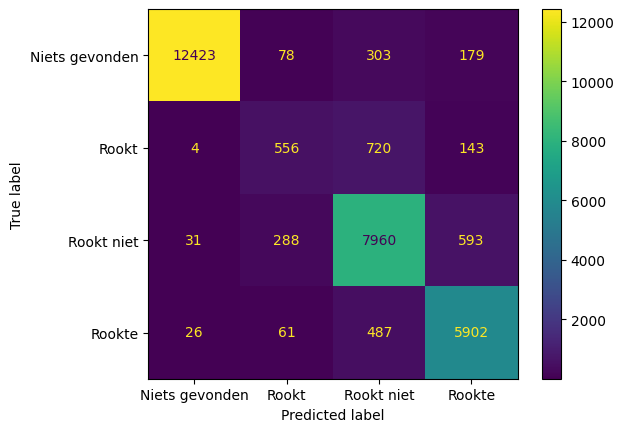

                precision    recall  f1-score   support

Niets gevonden       1.00      0.96      0.98     12983
         Rookt       0.57      0.39      0.46      1423
    Rookt niet       0.84      0.90      0.87      8872
        Rookte       0.87      0.91      0.89      6476

      accuracy                           0.90     29754
     macro avg       0.82      0.79      0.80     29754
  weighted avg       0.90      0.90      0.90     29754



In [20]:
# Ngram 1 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 128.67, NNZs: 554, Bias: 0.000000, T: 71408, Avg. loss: 0.335352
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 181.58, NNZs: 224, Bias: 0.000000, T: 142816, Avg. loss: 0.252652
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 221.63, NNZs: 184, Bias: 0.000000, T: 214224, Avg. loss: 0.226705
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 254.84, NNZs: 154, Bias: 0.000000, T: 285632, Avg. loss: 0.211695
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 283.67, NNZs: 141, Bias: 0.000000, T: 357040, Avg. loss: 0.201747
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 309.27, NNZs: 128, Bias: 0.000000, T: 428448, Avg. loss: 0.194204
Total training time: 1.69 seconds.
-- Epoch 7
Norm: 313.72, NNZs: 129, Bias: 0.000000, T: 499856, Avg. loss: 0.191009
Total training time: 1.96 seconds.
-- Epoch 8
Norm: 318.08, NNZs: 128, Bias: 0.000000, T: 571264, Avg. loss: 0.189830
Total training time: 2.23 seconds.
-- Epoch 9
Norm: 322.38, NNZs: 125, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


Norm: 116.56, NNZs: 379, Bias: 0.000000, T: 71408, Avg. loss: 0.204253
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 160.51, NNZs: 130, Bias: 0.000000, T: 142816, Avg. loss: 0.139331
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 193.00, NNZs: 117, Bias: 0.000000, T: 214224, Avg. loss: 0.120915
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 219.30, NNZs: 104, Bias: 0.000000, T: 285632, Avg. loss: 0.111460
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 241.84, NNZs: 95, Bias: 0.000000, T: 357040, Avg. loss: 0.105565
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 261.81, NNZs: 84, Bias: 0.000000, T: 428448, Avg. loss: 0.101836
Total training time: 1.52 seconds.
-- Epoch 7
Norm: 265.36, NNZs: 83, Bias: 0.000000, T: 499856, Avg. loss: 0.099884
Total training time: 1.79 seconds.
-- Epoch 8
Norm: 268.84, NNZs: 83, Bias: 0.000000, T: 571264, Avg. loss: 0.099397
Total training time: 2.03 seconds.
-- Epoch 9
Norm: 272.25, NNZs: 82, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


Norm: 134.96, NNZs: 463, Bias: 0.000000, T: 71408, Avg. loss: 0.357006
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 191.05, NNZs: 156, Bias: 0.000000, T: 142816, Avg. loss: 0.246840
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 231.95, NNZs: 132, Bias: 0.000000, T: 214224, Avg. loss: 0.213603
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 265.05, NNZs: 123, Bias: 0.000000, T: 285632, Avg. loss: 0.196560
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 293.27, NNZs: 108, Bias: 0.000000, T: 357040, Avg. loss: 0.186077
Total training time: 1.19 seconds.
-- Epoch 6
Norm: 318.14, NNZs: 104, Bias: 0.000000, T: 428448, Avg. loss: 0.178967
Total training time: 1.43 seconds.
-- Epoch 7
Norm: 322.47, NNZs: 102, Bias: 0.000000, T: 499856, Avg. loss: 0.175468
Total training time: 1.69 seconds.
-- Epoch 8
Norm: 326.72, NNZs: 100, Bias: 0.000000, T: 571264, Avg. loss: 0.174492
Total training time: 2.00 seconds.
-- Epoch 9
Norm: 330.89, NNZs: 99, Bias: 0.000000, T: 642672, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.310 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 128.87, NNZs: 596, Bias: 0.000000, T: 71408, Avg. loss: 0.336295
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 181.91, NNZs: 231, Bias: 0.000000, T: 142816, Avg. loss: 0.253318
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 222.08, NNZs: 171, Bias: 0.000000, T: 214224, Avg. loss: 0.227131
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 255.23, NNZs: 155, Bias: 0.000000, T: 285632, Avg. loss: 0.212126
Total training time: 1.00 seconds.
-- Epoch 5
Norm: 284.01, NNZs: 139, Bias: 0.000000, T: 357040, Avg. loss: 0.202046
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 309.75, NNZs: 129, Bias: 0.000000, T: 428448, Avg. loss: 0.194890
Total training time: 1.52 seconds.
-- Epoch 7
Norm: 314.19, NNZs: 128, Bias: 0.000000, T: 499856, Avg. loss: 0.190773
Total training time: 1.79 seconds.
-- Epoch 8
Norm: 318.56, NNZs: 124, Bias: 0.000000, T: 571264, Avg. loss: 0.189773
Total training time: 2.07 seconds.
-- Epoch 9
Norm: 322.86, NNZs: 122, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


Norm: 116.34, NNZs: 395, Bias: 0.000000, T: 71408, Avg. loss: 0.205678
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 160.24, NNZs: 133, Bias: 0.000000, T: 142816, Avg. loss: 0.140819
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 192.73, NNZs: 112, Bias: 0.000000, T: 214224, Avg. loss: 0.122264
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 219.04, NNZs: 102, Bias: 0.000000, T: 285632, Avg. loss: 0.112516
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 241.61, NNZs: 92, Bias: 0.000000, T: 357040, Avg. loss: 0.106748
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 261.76, NNZs: 87, Bias: 0.000000, T: 428448, Avg. loss: 0.102921
Total training time: 1.58 seconds.
-- Epoch 7
Norm: 265.27, NNZs: 85, Bias: 0.000000, T: 499856, Avg. loss: 0.100431
Total training time: 1.83 seconds.
-- Epoch 8
Norm: 268.73, NNZs: 85, Bias: 0.000000, T: 571264, Avg. loss: 0.100031
Total training time: 2.07 seconds.
-- Epoch 9
Norm: 272.14, NNZs: 85, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


Norm: 135.17, NNZs: 452, Bias: 0.000000, T: 71408, Avg. loss: 0.357113
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 191.17, NNZs: 160, Bias: 0.000000, T: 142816, Avg. loss: 0.247240
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 232.01, NNZs: 132, Bias: 0.000000, T: 214224, Avg. loss: 0.214323
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 265.03, NNZs: 121, Bias: 0.000000, T: 285632, Avg. loss: 0.197224
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 293.20, NNZs: 114, Bias: 0.000000, T: 357040, Avg. loss: 0.187020
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 318.06, NNZs: 105, Bias: 0.000000, T: 428448, Avg. loss: 0.180006
Total training time: 1.52 seconds.
-- Epoch 7
Norm: 322.39, NNZs: 101, Bias: 0.000000, T: 499856, Avg. loss: 0.176506
Total training time: 1.77 seconds.
-- Epoch 8
Norm: 326.63, NNZs: 99, Bias: 0.000000, T: 571264, Avg. loss: 0.175518
Total training time: 2.01 seconds.
-- Epoch 9
Norm: 330.80, NNZs: 98, Bias: 0.000000, T: 642672, Avg. lo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.306 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 128.66, NNZs: 532, Bias: 0.000000, T: 71408, Avg. loss: 0.335005
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 181.73, NNZs: 227, Bias: 0.000000, T: 142816, Avg. loss: 0.252694
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 221.78, NNZs: 176, Bias: 0.000000, T: 214224, Avg. loss: 0.226211
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 254.95, NNZs: 151, Bias: 0.000000, T: 285632, Avg. loss: 0.211146
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 283.72, NNZs: 135, Bias: 0.000000, T: 357040, Avg. loss: 0.201100
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 309.40, NNZs: 126, Bias: 0.000000, T: 428448, Avg. loss: 0.193870
Total training time: 1.46 seconds.
-- Epoch 7
Norm: 313.85, NNZs: 124, Bias: 0.000000, T: 499856, Avg. loss: 0.190167
Total training time: 1.73 seconds.
-- Epoch 8
Norm: 318.21, NNZs: 122, Bias: 0.000000, T: 571264, Avg. loss: 0.189199
Total training time: 1.99 seconds.
-- Epoch 9
Norm: 322.51, NNZs: 121, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


Norm: 116.69, NNZs: 374, Bias: 0.000000, T: 71408, Avg. loss: 0.204223
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 160.44, NNZs: 132, Bias: 0.000000, T: 142816, Avg. loss: 0.139506
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 192.98, NNZs: 112, Bias: 0.000000, T: 214224, Avg. loss: 0.121040
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 219.30, NNZs: 101, Bias: 0.000000, T: 285632, Avg. loss: 0.111456
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 241.87, NNZs: 92, Bias: 0.000000, T: 357040, Avg. loss: 0.105848
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 261.92, NNZs: 89, Bias: 0.000000, T: 428448, Avg. loss: 0.101863
Total training time: 1.57 seconds.
-- Epoch 7
Norm: 265.46, NNZs: 87, Bias: 0.000000, T: 499856, Avg. loss: 0.099915
Total training time: 1.83 seconds.
-- Epoch 8
Norm: 268.92, NNZs: 87, Bias: 0.000000, T: 571264, Avg. loss: 0.099344
Total training time: 2.09 seconds.
-- Epoch 9
Norm: 272.35, NNZs: 87, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


Norm: 135.28, NNZs: 462, Bias: 0.000000, T: 71408, Avg. loss: 0.357359
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 191.39, NNZs: 157, Bias: 0.000000, T: 142816, Avg. loss: 0.246441
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 232.35, NNZs: 128, Bias: 0.000000, T: 214224, Avg. loss: 0.213803
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 265.50, NNZs: 120, Bias: 0.000000, T: 285632, Avg. loss: 0.196610
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 293.77, NNZs: 110, Bias: 0.000000, T: 357040, Avg. loss: 0.186325
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 318.64, NNZs: 99, Bias: 0.000000, T: 428448, Avg. loss: 0.179255
Total training time: 1.55 seconds.
-- Epoch 7
Norm: 322.97, NNZs: 99, Bias: 0.000000, T: 499856, Avg. loss: 0.175581
Total training time: 1.84 seconds.
-- Epoch 8
Norm: 327.22, NNZs: 98, Bias: 0.000000, T: 571264, Avg. loss: 0.174659
Total training time: 2.11 seconds.
-- Epoch 9
Norm: 331.39, NNZs: 98, Bias: 0.000000, T: 642672, Avg. loss

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.314 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 128.53, NNZs: 564, Bias: 0.000000, T: 71408, Avg. loss: 0.334663
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 181.30, NNZs: 225, Bias: 0.000000, T: 142816, Avg. loss: 0.253019
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 221.31, NNZs: 179, Bias: 0.000000, T: 214224, Avg. loss: 0.227191
Total training time: 0.77 seconds.
-- Epoch 4
Norm: 254.48, NNZs: 156, Bias: 0.000000, T: 285632, Avg. loss: 0.212126
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 283.30, NNZs: 137, Bias: 0.000000, T: 357040, Avg. loss: 0.202332
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 308.98, NNZs: 124, Bias: 0.000000, T: 428448, Avg. loss: 0.194575
Total training time: 1.53 seconds.
-- Epoch 7
Norm: 313.44, NNZs: 124, Bias: 0.000000, T: 499856, Avg. loss: 0.190941
Total training time: 1.79 seconds.
-- Epoch 8
Norm: 317.81, NNZs: 121, Bias: 0.000000, T: 571264, Avg. loss: 0.189783
Total training time: 2.05 seconds.
-- Epoch 9
Norm: 322.10, NNZs: 120, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


Norm: 116.27, NNZs: 400, Bias: 0.000000, T: 71408, Avg. loss: 0.205189
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 160.02, NNZs: 133, Bias: 0.000000, T: 142816, Avg. loss: 0.140851
Total training time: 0.49 seconds.
-- Epoch 3
Norm: 192.49, NNZs: 116, Bias: 0.000000, T: 214224, Avg. loss: 0.122426
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 218.87, NNZs: 100, Bias: 0.000000, T: 285632, Avg. loss: 0.112792
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 241.46, NNZs: 89, Bias: 0.000000, T: 357040, Avg. loss: 0.106877
Total training time: 1.29 seconds.
-- Epoch 6
Norm: 261.42, NNZs: 85, Bias: 0.000000, T: 428448, Avg. loss: 0.102965
Total training time: 1.56 seconds.
-- Epoch 7
Norm: 264.95, NNZs: 85, Bias: 0.000000, T: 499856, Avg. loss: 0.101089
Total training time: 1.85 seconds.
-- Epoch 8
Norm: 268.42, NNZs: 83, Bias: 0.000000, T: 571264, Avg. loss: 0.100596
Total training time: 2.13 seconds.
-- Epoch 9
Norm: 271.82, NNZs: 83, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


Norm: 134.94, NNZs: 491, Bias: 0.000000, T: 71408, Avg. loss: 0.357704
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 191.06, NNZs: 153, Bias: 0.000000, T: 142816, Avg. loss: 0.247034
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 231.88, NNZs: 131, Bias: 0.000000, T: 214224, Avg. loss: 0.214311
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 264.91, NNZs: 122, Bias: 0.000000, T: 285632, Avg. loss: 0.197603
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 293.06, NNZs: 112, Bias: 0.000000, T: 357040, Avg. loss: 0.187216
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 317.93, NNZs: 102, Bias: 0.000000, T: 428448, Avg. loss: 0.180397
Total training time: 1.62 seconds.
-- Epoch 7
Norm: 322.23, NNZs: 101, Bias: 0.000000, T: 499856, Avg. loss: 0.176614
Total training time: 1.88 seconds.
-- Epoch 8
Norm: 326.46, NNZs: 101, Bias: 0.000000, T: 571264, Avg. loss: 0.175712
Total training time: 2.12 seconds.
-- Epoch 9
Norm: 330.62, NNZs: 99, Bias: 0.000000, T: 642672, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.308 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 128.50, NNZs: 558, Bias: 0.000000, T: 71409, Avg. loss: 0.335650
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 181.66, NNZs: 229, Bias: 0.000000, T: 142818, Avg. loss: 0.253326
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 221.68, NNZs: 182, Bias: 0.000000, T: 214227, Avg. loss: 0.227497
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 254.89, NNZs: 163, Bias: 0.000000, T: 285636, Avg. loss: 0.212304
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 283.69, NNZs: 140, Bias: 0.000000, T: 357045, Avg. loss: 0.202346
Total training time: 1.26 seconds.
-- Epoch 6
Norm: 309.38, NNZs: 126, Bias: 0.000000, T: 428454, Avg. loss: 0.195141
Total training time: 1.53 seconds.
-- Epoch 7
Norm: 313.82, NNZs: 124, Bias: 0.000000, T: 499863, Avg. loss: 0.191426
Total training time: 1.79 seconds.
-- Epoch 8
Norm: 318.19, NNZs: 124, Bias: 0.000000, T: 571272, Avg. loss: 0.190341
Total training time: 2.04 seconds.
-- Epoch 9
Norm: 322.49, NNZs: 121, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


Norm: 116.48, NNZs: 407, Bias: 0.000000, T: 71409, Avg. loss: 0.205211
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 160.33, NNZs: 132, Bias: 0.000000, T: 142818, Avg. loss: 0.140810
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 192.63, NNZs: 114, Bias: 0.000000, T: 214227, Avg. loss: 0.122417
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 218.91, NNZs: 102, Bias: 0.000000, T: 285636, Avg. loss: 0.113093
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 241.44, NNZs: 94, Bias: 0.000000, T: 357045, Avg. loss: 0.107426
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 261.34, NNZs: 85, Bias: 0.000000, T: 428454, Avg. loss: 0.103542
Total training time: 1.54 seconds.
-- Epoch 7
Norm: 264.91, NNZs: 85, Bias: 0.000000, T: 499863, Avg. loss: 0.101788
Total training time: 1.80 seconds.
-- Epoch 8
Norm: 268.39, NNZs: 83, Bias: 0.000000, T: 571272, Avg. loss: 0.101147
Total training time: 2.06 seconds.
-- Epoch 9
Norm: 271.81, NNZs: 83, Bias: 0.000000, T: 642681, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


Norm: 134.91, NNZs: 458, Bias: 0.000000, T: 71409, Avg. loss: 0.357555
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 191.12, NNZs: 167, Bias: 0.000000, T: 142818, Avg. loss: 0.247717
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 232.13, NNZs: 139, Bias: 0.000000, T: 214227, Avg. loss: 0.214373
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 265.24, NNZs: 121, Bias: 0.000000, T: 285636, Avg. loss: 0.197763
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 293.48, NNZs: 111, Bias: 0.000000, T: 357045, Avg. loss: 0.187314
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 318.35, NNZs: 102, Bias: 0.000000, T: 428454, Avg. loss: 0.180135
Total training time: 1.63 seconds.
-- Epoch 7
Norm: 322.67, NNZs: 97, Bias: 0.000000, T: 499863, Avg. loss: 0.176682
Total training time: 1.89 seconds.
-- Epoch 8
Norm: 326.91, NNZs: 97, Bias: 0.000000, T: 571272, Avg. loss: 0.175674
Total training time: 2.14 seconds.
-- Epoch 9
Norm: 331.08, NNZs: 96, Bias: 0.000000, T: 642681, Avg. los

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.312 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 47387205001705.74, NNZs: 439903, Bias: 0.000000, T: 71408, Avg. loss: 18270425426643115835392.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 43515856116310.26, NNZs: 439906, Bias: 0.000000, T: 142816, Avg. loss: 18661323528583818248192.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 41565517036257.24, NNZs: 439906, Bias: 0.000000, T: 214224, Avg. loss: 14470929682233091424256.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 40291519479999.09, NNZs: 439906, Bias: 0.000000, T: 285632, Avg. loss: 12599499125525156200448.000000
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 39356801879824.34, NNZs: 439906, Bias: 0.000000, T: 357040, Avg. loss: 11472022765705594142720.000000
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 38622548315043.16, NNZs: 439906, Bias: 0.000000, T: 428448, Avg. loss: 10694715527336220950528.000000
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1
Norm: 89448636511696.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 2
Norm: 83893753801863.27, NNZs: 439906, Bias: 0.000000, T: 142816, Avg. loss: 71042059638870965747712.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 81032624439748.27, NNZs: 439906, Bias: 0.000000, T: 214224, Avg. loss: 58712297969123774693376.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 79135300147509.69, NNZs: 439906, Bias: 0.000000, T: 285632, Avg. loss: 52870205661833374728192.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 77727208127109.61, NNZs: 439906, Bias: 0.000000, T: 357040, Avg. loss: 49281625301254013976576.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 76613854739886.69, NNZs: 439906, Bias: 0.000000, T: 428448, Avg. loss: 46731387782885399330816.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 98566571017279.69, NNZs: 439906, Bias: 0.000000, T: 71408, Avg. loss: 66366097611884748341248.000000
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 92815179575470.41, NNZs: 439906, Bias: 0.000000, T: 142816, Avg. loss: 86152757993194609704960.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 89847523562754.67, NNZs: 439906, Bias: 0.000000, T: 214224, Avg. loss: 71994656391231728254976.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 87876033583563.83, NNZs: 439906, Bias: 0.000000, T: 285632, Avg. loss: 65371415902630027722752.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 86417015562803.31, NNZs: 439906, Bias: 0.000000, T: 357040, Avg. loss: 61236417401720779309056.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 85264504960916.75, NNZs: 439906, Bias: 0.000000, T: 428448, Avg. loss: 58330903268605672030208.000000
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 73645919870095.44, NNZs: 439906, Bias: 0.000000, T: 71408, Avg. loss: 40501310449292735938560.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 68600629289571.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.213 total time=  46.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 86962291501315.06, NNZs: 439698, Bias: 0.000000, T: 71408, Avg. loss: 54977515114331916730368.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 81498777255349.34, NNZs: 439698, Bias: 0.000000, T: 142816, Avg. loss: 66145105789258880253952.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 78679350291202.88, NNZs: 439698, Bias: 0.000000, T: 214224, Avg. loss: 54589323015563740446720.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 76812046501477.70, NNZs: 439698, Bias: 0.000000, T: 285632, Avg. loss: 49157800822636179095552.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 75429164834196.73, NNZs: 439698, Bias: 0.000000, T: 357040, Avg. loss: 45806123935625107210240.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 74335717921581.91, NNZs: 439698, Bias: 0.000000, T: 428448, Avg. loss: 43443149706542933082112.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 77394491071662.95, NNZs: 439696, Bias: 0.000000, T: 71408, Avg. loss: 43053826236338040471552.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 72287202260125.67, NNZs: 439698, Bias: 0.000000, T: 142816, Avg. loss: 51611759926796085100544.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 69653743264331.95, NNZs: 439698, Bias: 0.000000, T: 214224, Avg. loss: 42137502374176258785280.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 67911151501325.35, NNZs: 439698, Bias: 0.000000, T: 285632, Avg. loss: 37734407839872144375808.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 66619434944407.22, NNZs: 439698, Bias: 0.000000, T: 357040, Avg. loss: 35032382289574210043904.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 65600976908148.57, NNZs: 439698, Bias: 0.000000, T: 428448, Avg. loss: 33103435035703842439168.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 87602955245981.50, NNZs: 4

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 82144423911854.92, NNZs: 439698, Bias: 0.000000, T: 142816, Avg. loss: 66917040327165317480448.000000
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 79306597417738.53, NNZs: 439698, Bias: 0.000000, T: 214224, Avg. loss: 55310632402661018697728.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 77428551199886.27, NNZs: 439698, Bias: 0.000000, T: 285632, Avg. loss: 49813300226023504216064.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 76031978997597.34, NNZs: 439698, Bias: 0.000000, T: 357040, Avg. loss: 46396601958211180822528.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 74930446565564.75, NNZs: 439698, Bias: 0.000000, T: 428448, Avg. loss: 44007914014876282912768.000000
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 78663189844669.70, NNZs: 439698, Bias: 0.000000, T: 71408, Avg. loss: 47443656251116493996032.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 73437115331166.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.227 total time=  46.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 68479685893607.78, NNZs: 440767, Bias: 0.000000, T: 71408, Avg. loss: 35113618752364508872704.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 63612759319236.35, NNZs: 440769, Bias: 0.000000, T: 142816, Avg. loss: 40239030176623842295808.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 61117699186766.19, NNZs: 440769, Bias: 0.000000, T: 214224, Avg. loss: 32351097581066434641920.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 59470931656662.42, NNZs: 440769, Bias: 0.000000, T: 285632, Avg. loss: 28743796413344742637568.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 58251670958268.00, NNZs: 440769, Bias: 0.000000, T: 357040, Avg. loss: 26525079515381884780544.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 57290761424192.94, NNZs: 440769, Bias: 0.000000, T: 428448, Avg. loss: 24962627833859995074560.000000
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 57749256654766.64, NNZs: 440763, Bias: 0.000000, T: 71408, Avg. loss: 25614378898222791786496.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 53349840194907.77, NNZs: 440769, Bias: 0.000000, T: 142816, Avg. loss: 28320655936359562739712.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 51106807189835.81, NNZs: 440769, Bias: 0.000000, T: 214224, Avg. loss: 22402697626820123033600.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 49630952573745.94, NNZs: 440769, Bias: 0.000000, T: 285632, Avg. loss: 19698053630927531147264.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 48544683451769.11, NNZs: 440769, Bias: 0.000000, T: 357040, Avg. loss: 18063372103852360728576.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 47689742231270.78, NNZs: 440769, Bias: 0.000000, T: 428448, Avg. loss: 16921224285699153330176.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 87451912440307.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 81965711285765.61, NNZs: 440769, Bias: 0.000000, T: 142816, Avg. loss: 67540736761824001654784.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 79138008136920.27, NNZs: 440769, Bias: 0.000000, T: 214224, Avg. loss: 55725494380430022934528.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 77263762128503.92, NNZs: 440769, Bias: 0.000000, T: 285632, Avg. loss: 50224971856388097572864.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 75872239705746.41, NNZs: 440769, Bias: 0.000000, T: 357040, Avg. loss: 46816209786062464090112.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 74772705620983.23, NNZs: 440769, Bias: 0.000000, T: 428448, Avg. loss: 44398266257357624311808.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 74947600889717.42, NNZs: 440769, Bias: 0.000000, T: 71408, Avg. loss: 42010544647400218165248.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 69880113876284.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.231 total time=  46.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 91594060938307.78, NNZs: 439874, Bias: 0.000000, T: 71408, Avg. loss: 60136399400726463250432.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 86024485297305.75, NNZs: 439877, Bias: 0.000000, T: 142816, Avg. loss: 74451173484144004956160.000000
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 83132312627820.61, NNZs: 439877, Bias: 0.000000, T: 214224, Avg. loss: 61804795083347395084288.000000
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 81212646571034.91, NNZs: 439877, Bias: 0.000000, T: 285632, Avg. loss: 55847590622329483296768.000000
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 79791338293858.98, NNZs: 439877, Bias: 0.000000, T: 357040, Avg. loss: 52134885774106147422208.000000
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 78665020940590.83, NNZs: 439877, Bias: 0.000000, T: 428448, Avg. loss: 49508183080862448877568.000000
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 88032772803075.89, NNZs: 439877, Bias: 0.000000, T: 71408, Avg. loss: 56213131168184883216384.000000
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 82533901057484.05, NNZs: 439877, Bias: 0.000000, T: 142816, Avg. loss: 67649380684695179624448.000000
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 79713451596782.92, NNZs: 439877, Bias: 0.000000, T: 214224, Avg. loss: 55757074031144503083008.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 77840672069571.25, NNZs: 439877, Bias: 0.000000, T: 285632, Avg. loss: 50279674897961674866688.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 76452374711666.98, NNZs: 439877, Bias: 0.000000, T: 357040, Avg. loss: 46870114753506411806720.000000
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 75355406292061.09, NNZs: 439877, Bias: 0.000000, T: 428448, Avg. loss: 44441381743441832050688.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 82998470229504.61, NNZs: 439877, Bias: 0.000000, T: 71408, Avg. loss: 50783149995574557671424.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 77665163888289.56, NNZs: 439877, Bias: 0.000000, T: 142816, Avg. loss: 60039651675006102929408.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 74917388912193.88, NNZs: 439877, Bias: 0.000000, T: 214224, Avg. loss: 49292664454121823141888.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 73094655009391.67, NNZs: 439877, Bias: 0.000000, T: 285632, Avg. loss: 44294009019534202109952.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 71744286778432.20, NNZs: 439877, Bias: 0.000000, T: 357040, Avg. loss: 41185436139513129730048.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 70676351428791.16, NNZs: 439877, Bias: 0.000000, T: 428448, Avg. loss: 38987250304282282426368.000000
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1
Norm: 81136238117804.88, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.224 total time=  46.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 89482098006551.38, NNZs: 439574, Bias: 0.000000, T: 71409, Avg. loss: 57144837641595487518720.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 83962994629831.42, NNZs: 439574, Bias: 0.000000, T: 142818, Avg. loss: 70382584897770054746112.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 81109735638147.80, NNZs: 439574, Bias: 0.000000, T: 214227, Avg. loss: 58243173759839922814976.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 79215811082701.09, NNZs: 439574, Bias: 0.000000, T: 285636, Avg. loss: 52561939473383993376768.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 77814692061853.09, NNZs: 439574, Bias: 0.000000, T: 357045, Avg. loss: 49047325566906834878464.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 76706724006287.06, NNZs: 439574, Bias: 0.000000, T: 428454, Avg. loss: 46539368984950461169664.000000
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1
Norm: 55130189276945.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 50898872900273.09, NNZs: 439574, Bias: 0.000000, T: 142818, Avg. loss: 25792853598801875697664.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 48737653621801.38, NNZs: 439574, Bias: 0.000000, T: 214227, Avg. loss: 20394508944947313377280.000000
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 47312540154680.80, NNZs: 439574, Bias: 0.000000, T: 285636, Avg. loss: 17926760481609907961856.000000
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 46267699964605.52, NNZs: 439574, Bias: 0.000000, T: 357045, Avg. loss: 16410085351408466395136.000000
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 45446344748152.89, NNZs: 439574, Bias: 0.000000, T: 428454, Avg. loss: 15368368531639615094784.000000
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 96096198253119.44, NNZs: 439573, Bias: 0.000000, T: 71409, Avg. loss: 66694058182865709957120.000000
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 90380453392453.36, NNZs: 439574, Bias: 0.000000, T: 142818, Avg. loss: 81746435365144339939328.000000
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 87425249125831.58, NNZs: 439574, Bias: 0.000000, T: 214227, Avg. loss: 68018201576072892383232.000000
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 85469354997726.98, NNZs: 439574, Bias: 0.000000, T: 285636, Avg. loss: 61594508202455370563584.000000
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 84021989523760.20, NNZs: 439574, Bias: 0.000000, T: 357045, Avg. loss: 57589823651801118801920.000000
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 82876823435449.89, NNZs: 439574, Bias: 0.000000, T: 428454, Avg. loss: 54773629055939500834816.000000
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 85223293152942.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.235 total time=  46.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.90, NNZs: 1049, Bias: 0.000000, T: 71408, Avg. loss: 0.174269
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 270.52, NNZs: 304, Bias: 0.000000, T: 142816, Avg. loss: 0.116138
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 316.98, NNZs: 268, Bias: 0.000000, T: 214224, Avg. loss: 0.106588
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 355.69, NNZs: 250, Bias: 0.000000, T: 285632, Avg. loss: 0.102772
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 389.68, NNZs: 240, Bias: 0.000000, T: 357040, Avg. loss: 0.101143
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 420.31, NNZs: 244, Bias: 0.000000, T: 428448, Avg. loss: 0.099793
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 149.14, NNZs: 640, Bias: 0.000000, T: 71408, Avg. loss: 0.088555
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 193.50, NNZs: 176, Bias: 0.000000, T: 142816, Avg. loss: 0.058113
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 226.82, NNZs: 160, Bias: 0.000000, T: 214224, Avg. loss: 0.053007
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 254.75, NNZs: 159, Bias: 0.000000, T: 285632, Avg. loss: 0.050781
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 279.14, NNZs: 162, Bias: 0.000000, T: 357040, Avg. loss: 0.049488
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 301.24, NNZs: 154, Bias: 0.000000, T: 428448, Avg. loss: 0.048855
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


Norm: 206.22, NNZs: 1092, Bias: 0.000000, T: 71408, Avg. loss: 0.170532
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 266.20, NNZs: 241, Bias: 0.000000, T: 142816, Avg. loss: 0.112501
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 311.38, NNZs: 217, Bias: 0.000000, T: 214224, Avg. loss: 0.107053
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 349.41, NNZs: 202, Bias: 0.000000, T: 285632, Avg. loss: 0.104537
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 382.96, NNZs: 203, Bias: 0.000000, T: 357040, Avg. loss: 0.102680
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 413.44, NNZs: 192, Bias: 0.000000, T: 428448, Avg. loss: 0.102425
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.13 seconds
-- Epoch 1
Norm: 186.70, NNZs: 910, Bias: 0.000000, T: 71408, Avg. loss: 0.128863
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 237.47, NNZs: 213, Bias: 0.000000, T: 142816, Avg. loss: 0.075836
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 274.83

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.975 total time=  47.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.99, NNZs: 1055, Bias: 0.000000, T: 71408, Avg. loss: 0.174249
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 270.78, NNZs: 310, Bias: 0.000000, T: 142816, Avg. loss: 0.116026
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 317.58, NNZs: 256, Bias: 0.000000, T: 214224, Avg. loss: 0.106304
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 356.29, NNZs: 250, Bias: 0.000000, T: 285632, Avg. loss: 0.102502
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 390.13, NNZs: 246, Bias: 0.000000, T: 357040, Avg. loss: 0.100049
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 420.65, NNZs: 234, Bias: 0.000000, T: 428448, Avg. loss: 0.098334
Total training time: 1.07 seconds.
Convergence after 6 epochs took 1.10 seconds
-- Epoch 1
Norm: 148.99, NNZs: 595, Bias: 0.000000, T: 71408, Avg. loss: 0.088667
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 193.55, NNZs: 176, Bias: 0.000000, T: 142816, Avg. loss: 0.058489
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 226.84, NNZs: 170, Bias: 0.000000, T: 214224, Avg. loss: 0.052903
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 254.73, NNZs: 164, Bias: 0.000000, T: 285632, Avg. loss: 0.051063
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 279.21, NNZs: 162, Bias: 0.000000, T: 357040, Avg. loss: 0.049806
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 301.52, NNZs: 153, Bias: 0.000000, T: 428448, Avg. loss: 0.049130
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 205.98, NNZs: 1106, Bias: 0.000000, T: 71408, Avg. loss: 0.169122
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 2
Norm: 265.57, NNZs: 234, Bias: 0.000000, T: 142816, Avg. loss: 0.110403
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 310.41, NNZs: 214, Bias: 0.000000, T: 214224, Avg. loss: 0.104306
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 347.87, NNZs: 200, Bias: 0.000000, T: 285632, Avg. loss: 0.101213
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 381.08, NNZs: 196, Bias: 0.000000, T: 357040, Avg. loss: 0.100373
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 411.14, NNZs: 198, Bias: 0.000000, T: 428448, Avg. loss: 0.099147
Total training time: 1.04 seconds.
Convergence after 6 epochs took 1.07 seconds
-- Epoch 1
Norm: 187.13, NNZs: 893, Bias: 0.000000, T: 71408, Avg. loss: 0.130047
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 238.18, NNZs: 218, Bias: 0.000000, T: 142816, Avg. loss: 0.077648
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 275.83, NNZs: 192, Bias: 0.000000, T: 214224, Avg. loss: 0.071017
Total training time: 0.53 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.982 total time=  48.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 206.82, NNZs: 1086, Bias: 0.000000, T: 71408, Avg. loss: 0.173546
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 270.51, NNZs: 292, Bias: 0.000000, T: 142816, Avg. loss: 0.116822
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 317.39, NNZs: 251, Bias: 0.000000, T: 214224, Avg. loss: 0.107480
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 356.26, NNZs: 243, Bias: 0.000000, T: 285632, Avg. loss: 0.104029
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 390.15, NNZs: 236, Bias: 0.000000, T: 357040, Avg. loss: 0.101625
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 420.87, NNZs: 232, Bias: 0.000000, T: 428448, Avg. loss: 0.100597
Total training time: 1.00 seconds.
Convergence after 6 epochs took 1.03 seconds
-- Epoch 1
Norm: 150.26, NNZs: 675, Bias: 0.000000, T: 71408, Avg. loss: 0.089615
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 194.88, NNZs: 171, Bias: 0.000000, T: 142816, Avg. loss: 0.058953
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 228.38, NNZs: 165, Bias: 0.000000, T: 214224, Avg. loss: 0.053936
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 256.26, NNZs: 156, Bias: 0.000000, T: 285632, Avg. loss: 0.051537
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 280.89, NNZs: 156, Bias: 0.000000, T: 357040, Avg. loss: 0.050557
Total training time: 0.80 seconds.
-- Epoch 6
Norm: 303.22, NNZs: 153, Bias: 0.000000, T: 428448, Avg. loss: 0.049668
Total training time: 0.96 seconds.
Convergence after 6 epochs took 0.99 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


-- Epoch 1
Norm: 206.45, NNZs: 1073, Bias: 0.000000, T: 71408, Avg. loss: 0.169838
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 266.41, NNZs: 240, Bias: 0.000000, T: 142816, Avg. loss: 0.112660
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 311.53, NNZs: 214, Bias: 0.000000, T: 214224, Avg. loss: 0.106539
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 349.47, NNZs: 208, Bias: 0.000000, T: 285632, Avg. loss: 0.104560
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 383.01, NNZs: 196, Bias: 0.000000, T: 357040, Avg. loss: 0.102536
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 413.19, NNZs: 201, Bias: 0.000000, T: 428448, Avg. loss: 0.101453
Total training time: 1.02 seconds.
Convergence after 6 epochs took 1.05 seconds
-- Epoch 1
Norm: 187.50, NNZs: 910, Bias: 0.000000, T: 71408, Avg. loss: 0.130775
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 238.47, NNZs: 213, Bias: 0.000000, T: 142816, Avg. loss: 0.077710
Total training time: 0.33 seconds.
-- Epoch 3
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.977 total time=  47.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 207.18, NNZs: 1002, Bias: 0.000000, T: 71408, Avg. loss: 0.174311
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 271.00, NNZs: 298, Bias: 0.000000, T: 142816, Avg. loss: 0.116594
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 317.93, NNZs: 267, Bias: 0.000000, T: 214224, Avg. loss: 0.106775
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 356.57, NNZs: 251, Bias: 0.000000, T: 285632, Avg. loss: 0.102667
Total training time: 0.70 seconds.
-- Epoch 5
Norm: 390.43, NNZs: 238, Bias: 0.000000, T: 357040, Avg. loss: 0.100592
Total training time: 0.88 seconds.
-- Epoch 6
Norm: 420.95, NNZs: 231, Bias: 0.000000, T: 428448, Avg. loss: 0.099543
Total training time: 1.05 seconds.
Convergence after 6 epochs took 1.07 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


-- Epoch 1
Norm: 149.09, NNZs: 653, Bias: 0.000000, T: 71408, Avg. loss: 0.088413
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 193.56, NNZs: 174, Bias: 0.000000, T: 142816, Avg. loss: 0.058345
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 226.76, NNZs: 162, Bias: 0.000000, T: 214224, Avg. loss: 0.053307
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 254.92, NNZs: 158, Bias: 0.000000, T: 285632, Avg. loss: 0.051529
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 279.44, NNZs: 150, Bias: 0.000000, T: 357040, Avg. loss: 0.049990
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 301.77, NNZs: 152, Bias: 0.000000, T: 428448, Avg. loss: 0.049598
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.04 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 1
Norm: 206.22, NNZs: 1117, Bias: 0.000000, T: 71408, Avg. loss: 0.169247
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 265.88, NNZs: 249, Bias: 0.000000, T: 142816, Avg. loss: 0.111251
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 310.79, NNZs: 218, Bias: 0.000000, T: 214224, Avg. loss: 0.105399
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 348.45, NNZs: 210, Bias: 0.000000, T: 285632, Avg. loss: 0.102523
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 381.79, NNZs: 196, Bias: 0.000000, T: 357040, Avg. loss: 0.101454
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 412.03, NNZs: 198, Bias: 0.000000, T: 428448, Avg. loss: 0.100363
Total training time: 1.02 seconds.
Convergence after 6 epochs took 1.04 seconds
-- Epoch 1
Norm: 187.63, NNZs: 877, Bias: 0.000000, T: 71408, Avg. loss: 0.131515
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 238.85, NNZs: 216, Bias: 0.000000, T: 142816, Avg. loss: 0.078125
Total training time: 0.34 seconds.
-- Epoch 3
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.975 total time=  47.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 207.02, NNZs: 1059, Bias: 0.000000, T: 71409, Avg. loss: 0.174031
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 270.70, NNZs: 312, Bias: 0.000000, T: 142818, Avg. loss: 0.116991
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 317.65, NNZs: 265, Bias: 0.000000, T: 214227, Avg. loss: 0.107409
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 356.40, NNZs: 254, Bias: 0.000000, T: 285636, Avg. loss: 0.103797
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 390.35, NNZs: 236, Bias: 0.000000, T: 357045, Avg. loss: 0.101234
Total training time: 0.89 seconds.
-- Epoch 6
Norm: 420.93, NNZs: 229, Bias: 0.000000, T: 428454, Avg. loss: 0.100255
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 149.53, NNZs: 614, Bias: 0.000000, T: 71409, Avg. loss: 0.088911
Total training time: 0.14 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 194.23, NNZs: 181, Bias: 0.000000, T: 142818, Avg. loss: 0.059106
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 227.83, NNZs: 173, Bias: 0.000000, T: 214227, Avg. loss: 0.053936
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 255.68, NNZs: 169, Bias: 0.000000, T: 285636, Avg. loss: 0.051186
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 280.18, NNZs: 161, Bias: 0.000000, T: 357045, Avg. loss: 0.050300
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 302.44, NNZs: 170, Bias: 0.000000, T: 428454, Avg. loss: 0.049744
Total training time: 0.98 seconds.
Convergence after 6 epochs took 1.01 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


-- Epoch 1
Norm: 206.01, NNZs: 1021, Bias: 0.000000, T: 71409, Avg. loss: 0.168940
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 265.61, NNZs: 254, Bias: 0.000000, T: 142818, Avg. loss: 0.111037
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 310.74, NNZs: 232, Bias: 0.000000, T: 214227, Avg. loss: 0.106123
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 348.54, NNZs: 211, Bias: 0.000000, T: 285636, Avg. loss: 0.103499
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 381.92, NNZs: 207, Bias: 0.000000, T: 357045, Avg. loss: 0.102455
Total training time: 0.85 seconds.
-- Epoch 6
Norm: 412.28, NNZs: 207, Bias: 0.000000, T: 428454, Avg. loss: 0.101616
Total training time: 1.03 seconds.
Convergence after 6 epochs took 1.05 seconds
-- Epoch 1
Norm: 187.03, NNZs: 930, Bias: 0.000000, T: 71409, Avg. loss: 0.129369
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 237.74, NNZs: 215, Bias: 0.000000, T: 142818, Avg. loss: 0.076553
Total training time: 0.35 seconds.
-- Epoch 3
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.980 total time=  47.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.67, NNZs: 421, Bias: 0.000000, T: 71408, Avg. loss: 0.187561
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 87.15, NNZs: 323, Bias: 0.000000, T: 142816, Avg. loss: 0.150884
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 103.55, NNZs: 266, Bias: 0.000000, T: 214224, Avg. loss: 0.145574
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 117.04, NNZs: 260, Bias: 0.000000, T: 285632, Avg. loss: 0.142871
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 129.11, NNZs: 246, Bias: 0.000000, T: 357040, Avg. loss: 0.141750
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 140.00, NNZs: 239, Bias: 0.000000, T: 428448, Avg. loss: 0.141030
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 1
Norm: 95.34, NNZs: 408, Bias: 0.000000, T: 71408, Avg. loss: 0.098171
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 124.53, NNZs: 314, Bias: 0.000000, T: 142816, Avg. loss: 0.085728
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 148.22, NNZs: 292, Bias: 0.000000, T: 214224, Avg. loss: 0.084766
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 167.92, NNZs: 289, Bias: 0.000000, T: 285632, Avg. loss: 0.084903
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 185.59, NNZs: 286, Bias: 0.000000, T: 357040, Avg. loss: 0.085042
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 201.32, NNZs: 275, Bias: 0.000000, T: 428448, Avg. loss: 0.084204
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 77.67, NNZs: 417, Bias: 0.000000, T: 71408, Avg. loss: 0.179206
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 101.45, NNZs: 313, Bias: 0.000000, T: 142816, Avg. loss: 0.141454
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 119.47, NNZs: 283, Bias: 0.000000, T: 214224, Avg. loss: 0.137901
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 134.33, NNZs: 277, Bias: 0.000000, T: 285632, Avg. loss: 0.136523
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 147.43, NNZs: 271, Bias: 0.000000, T: 357040, Avg. loss: 0.135995
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 159.44, NNZs: 260, Bias: 0.000000, T: 428448, Avg. loss: 0.135668
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 77.12, NNZs: 449, Bias: 0.000000, T: 71408, Avg. loss: 0.143571
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 100.85, NNZs: 341, Bias: 0.000000, T: 142816, Avg. loss: 0.117604
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 118.16, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.056 total time=  46.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.58, NNZs: 431, Bias: 0.000000, T: 71408, Avg. loss: 0.188187
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 86.86, NNZs: 315, Bias: 0.000000, T: 142816, Avg. loss: 0.153005
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 103.30, NNZs: 289, Bias: 0.000000, T: 214224, Avg. loss: 0.147558
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 116.82, NNZs: 255, Bias: 0.000000, T: 285632, Avg. loss: 0.144789
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 128.64, NNZs: 248, Bias: 0.000000, T: 357040, Avg. loss: 0.144069
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 139.59, NNZs: 248, Bias: 0.000000, T: 428448, Avg. loss: 0.143379
Total training time: 1.15 seconds.
Convergence after 6 epochs took 1.17 seconds
-- Epoch 1
Norm: 95.90, NNZs: 424, Bias: 0.000000, T: 71408, Avg. loss: 0.101248
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 125.45, NNZs: 332, Bias: 0.000000, T: 142816, Avg. loss: 0.087038
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 148.34, NNZs: 307, Bias: 0.000000, T: 214224, Avg. loss: 0.086257
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 168.12, NNZs: 297, Bias: 0.000000, T: 285632, Avg. loss: 0.086433
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 185.44, NNZs: 281, Bias: 0.000000, T: 357040, Avg. loss: 0.085877
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 201.53, NNZs: 284, Bias: 0.000000, T: 428448, Avg. loss: 0.086621
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 1
Norm: 77.85, NNZs: 441, Bias: 0.000000, T: 71408, Avg. loss: 0.180654
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 101.79, NNZs: 316, Bias: 0.000000, T: 142816, Avg. loss: 0.143463
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 119.52, NNZs: 283, Bias: 0.000000, T: 214224, Avg. loss: 0.139449
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 134.30, NNZs: 263, Bias: 0.000000, T: 285632, Avg. loss: 0.137976
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 147.47, NNZs: 266, Bias: 0.000000, T: 357040, Avg. loss: 0.137424
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 159.45, NNZs: 261, Bias: 0.000000, T: 428448, Avg. loss: 0.137290
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 77.03, NNZs: 443, Bias: 0.000000, T: 71408, Avg. loss: 0.145193
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 100.59, NNZs: 333, Bias: 0.000000, T: 142816, Avg. loss: 0.120073
Total training time: 0.37 seconds.
-- Epoch 3
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.058 total time=  46.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.48, NNZs: 429, Bias: 0.000000, T: 71408, Avg. loss: 0.187522
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 87.02, NNZs: 325, Bias: 0.000000, T: 142816, Avg. loss: 0.151928
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 103.38, NNZs: 281, Bias: 0.000000, T: 214224, Avg. loss: 0.145699
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 116.88, NNZs: 248, Bias: 0.000000, T: 285632, Avg. loss: 0.143049
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 128.92, NNZs: 241, Bias: 0.000000, T: 357040, Avg. loss: 0.142284
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 139.77, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.141429
Total training time: 1.31 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 95.49, NNZs: 407, Bias: 0.000000, T: 71408, Avg. loss: 0.099887
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 125.47, NNZs: 318, Bias: 0.000000, T: 142816, Avg. loss: 0.085492
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 148.98, NNZs: 296, Bias: 0.000000, T: 214224, Avg. loss: 0.085848
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 168.84, NNZs: 281, Bias: 0.000000, T: 285632, Avg. loss: 0.084941
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 186.72, NNZs: 289, Bias: 0.000000, T: 357040, Avg. loss: 0.085646
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 203.02, NNZs: 277, Bias: 0.000000, T: 428448, Avg. loss: 0.085126
Total training time: 1.25 seconds.
Convergence after 6 epochs took 1.28 seconds
-- Epoch 1
Norm: 77.73, NNZs: 418, Bias: 0.000000, T: 71408, Avg. loss: 0.179348
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


-- Epoch 2
Norm: 101.70, NNZs: 315, Bias: 0.000000, T: 142816, Avg. loss: 0.141382
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 119.70, NNZs: 279, Bias: 0.000000, T: 214224, Avg. loss: 0.137468
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 134.31, NNZs: 271, Bias: 0.000000, T: 285632, Avg. loss: 0.136195
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 147.59, NNZs: 271, Bias: 0.000000, T: 357040, Avg. loss: 0.135424
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 159.39, NNZs: 268, Bias: 0.000000, T: 428448, Avg. loss: 0.135089
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 77.37, NNZs: 432, Bias: 0.000000, T: 71408, Avg. loss: 0.144876
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 100.81, NNZs: 336, Bias: 0.000000, T: 142816, Avg. loss: 0.118644
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 118.44, NNZs: 317, Bias: 0.000000, T: 214224, Avg. loss: 0.116813
Total training time: 0.60 seconds.
-- Epoch 4
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.063 total time=  46.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.56, NNZs: 427, Bias: 0.000000, T: 71408, Avg. loss: 0.188321
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 86.94, NNZs: 318, Bias: 0.000000, T: 142816, Avg. loss: 0.152460
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 103.44, NNZs: 277, Bias: 0.000000, T: 214224, Avg. loss: 0.146450
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 117.08, NNZs: 263, Bias: 0.000000, T: 285632, Avg. loss: 0.143987
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 129.09, NNZs: 244, Bias: 0.000000, T: 357040, Avg. loss: 0.143000
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 139.88, NNZs: 243, Bias: 0.000000, T: 428448, Avg. loss: 0.142191
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 95.46, NNZs: 415, Bias: 0.000000, T: 71408, Avg. loss: 0.100230
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 124.64, NNZs: 306, Bias: 0.000000, T: 142816, Avg. loss: 0.085520
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 147.90, NNZs: 294, Bias: 0.000000, T: 214224, Avg. loss: 0.086222
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 167.12, NNZs: 293, Bias: 0.000000, T: 285632, Avg. loss: 0.085350
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 184.26, NNZs: 282, Bias: 0.000000, T: 357040, Avg. loss: 0.085084
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 200.35, NNZs: 285, Bias: 0.000000, T: 428448, Avg. loss: 0.084571
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 77.31, NNZs: 417, Bias: 0.000000, T: 71408, Avg. loss: 0.181189
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 101.30, NNZs: 310, Bias: 0.000000, T: 142816, Avg. loss: 0.143702
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 119.59, NNZs: 281, Bias: 0.000000, T: 214224, Avg. loss: 0.138984
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 134.22, NNZs: 270, Bias: 0.000000, T: 285632, Avg. loss: 0.137953
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 147.43, NNZs: 277, Bias: 0.000000, T: 357040, Avg. loss: 0.137231
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 159.46, NNZs: 268, Bias: 0.000000, T: 428448, Avg. loss: 0.136461
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 78.11, NNZs: 450, Bias: 0.000000, T: 71408, Avg. loss: 0.144049
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 101.11, NNZs: 342, Bias: 0.000000, T: 142816, Avg. loss: 0.118618
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 118.83, NNZs: 314, Bias: 0.000000, T: 214224, Avg. loss: 0.116348
Total training time: 0.66 seconds.
-- Epoch 4
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.061 total time=  46.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.49, NNZs: 416, Bias: 0.000000, T: 71409, Avg. loss: 0.188448
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 87.01, NNZs: 324, Bias: 0.000000, T: 142818, Avg. loss: 0.153524
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 103.58, NNZs: 277, Bias: 0.000000, T: 214227, Avg. loss: 0.146901
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 117.08, NNZs: 265, Bias: 0.000000, T: 285636, Avg. loss: 0.144505
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 129.02, NNZs: 255, Bias: 0.000000, T: 357045, Avg. loss: 0.143522
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 139.81, NNZs: 238, Bias: 0.000000, T: 428454, Avg. loss: 0.142175
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.17 seconds
-- Epoch 1
Norm: 95.34, NNZs: 416, Bias: 0.000000, T: 71409, Avg. loss: 0.102248
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 125.11, NNZs: 324, Bias: 0.000000, T: 142818, Avg. loss: 0.086837
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 148.15, NNZs: 306, Bias: 0.000000, T: 214227, Avg. loss: 0.087157
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 167.93, NNZs: 302, Bias: 0.000000, T: 285636, Avg. loss: 0.086487
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 185.45, NNZs: 296, Bias: 0.000000, T: 357045, Avg. loss: 0.086901
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 201.74, NNZs: 277, Bias: 0.000000, T: 428454, Avg. loss: 0.086809
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1
Norm: 77.89, NNZs: 426, Bias: 0.000000, T: 71409, Avg. loss: 0.181053
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


-- Epoch 2
Norm: 101.87, NNZs: 315, Bias: 0.000000, T: 142818, Avg. loss: 0.143116
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 119.62, NNZs: 294, Bias: 0.000000, T: 214227, Avg. loss: 0.139442
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 134.58, NNZs: 275, Bias: 0.000000, T: 285636, Avg. loss: 0.137864
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 147.68, NNZs: 282, Bias: 0.000000, T: 357045, Avg. loss: 0.137806
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 159.71, NNZs: 271, Bias: 0.000000, T: 428454, Avg. loss: 0.137189
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 77.67, NNZs: 460, Bias: 0.000000, T: 71409, Avg. loss: 0.144956
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 101.07, NNZs: 333, Bias: 0.000000, T: 142818, Avg. loss: 0.118558
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 118.60, NNZs: 309, Bias: 0.000000, T: 214227, Avg. loss: 0.116822
Total training time: 0.58 seconds.
-- Epoch 4
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.060 total time=  46.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.36, NNZs: 768057, Bias: -0.058793, T: 71408, Avg. loss: 0.192035
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.42, NNZs: 768057, Bias: -0.079515, T: 142816, Avg. loss: 0.172312
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 5.11, NNZs: 768057, Bias: -0.087243, T: 214224, Avg. loss: 0.163846
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 5.64, NNZs: 768057, Bias: -0.089232, T: 285632, Avg. loss: 0.158398
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 6.09, NNZs: 768057, Bias: -0.088476, T: 357040, Avg. loss: 0.154296
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 6.47, NNZs: 768057, Bias: -0.086249, T: 428448, Avg. loss: 0.150933
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 3.66, NNZs: 768057, Bias: -0.605170, T: 71408, Avg. loss: 0.082343
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.71, NNZs: 768057, Bias: -0.698384, T: 142816, Avg. loss: 0.032840
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 3.63, NNZs: 768057, Bias: -0.733844, T: 214224, Avg. loss: 0.027500
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 3.56, NNZs: 768057, Bias: -0.754122, T: 285632, Avg. loss: 0.025738
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 3.49, NNZs: 768057, Bias: -0.767939, T: 357040, Avg. loss: 0.024869
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 3.44, NNZs: 768057, Bias: -0.778275, T: 428448, Avg. loss: 0.024351
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 2.62, NNZs: 768057, Bias: -0.318062, T: 71408, Avg. loss: 0.183047
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.32, NNZs: 768057, Bias: -0.431982, T: 142816, Avg. loss: 0.158223
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 3.75, NNZs: 768057, Bias: -0.508303, T: 214224, Avg. loss: 0.146308
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 768057, Bias: -0.560814, T: 285632, Avg. loss: 0.139425
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 4.22, NNZs: 768057, Bias: -0.597195, T: 357040, Avg. loss: 0.135401
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 768057, Bias: -0.622839, T: 428448, Avg. loss: 0.132914
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 3.28, NNZs: 768057, Bias: -0.424979, T: 71408, Avg. loss: 0.154436
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.24, NNZs: 768057, Bias: -0.570611, T: 142816, Avg. loss: 0.107932
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 4.70, NNZs: 768057, Bias: -0.636042, T: 214224, Avg. loss: 0.092175
Total training time: 0.40 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.384 total time=  46.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.41, NNZs: 768558, Bias: -0.079588, T: 71408, Avg. loss: 0.190289
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.43, NNZs: 768558, Bias: -0.098174, T: 142816, Avg. loss: 0.171339
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 5.10, NNZs: 768558, Bias: -0.103891, T: 214224, Avg. loss: 0.163358
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 5.62, NNZs: 768558, Bias: -0.104316, T: 285632, Avg. loss: 0.158218
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 6.05, NNZs: 768558, Bias: -0.102279, T: 357040, Avg. loss: 0.154296
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 6.43, NNZs: 768558, Bias: -0.098944, T: 428448, Avg. loss: 0.151049
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 3.64, NNZs: 768558, Bias: -0.601631, T: 71408, Avg. loss: 0.083256
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.70, NNZs: 768558, Bias: -0.697086, T: 142816, Avg. loss: 0.033233
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 768558, Bias: -0.733502, T: 214224, Avg. loss: 0.027636
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 3.55, NNZs: 768558, Bias: -0.754268, T: 285632, Avg. loss: 0.025802
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 3.48, NNZs: 768558, Bias: -0.768366, T: 357040, Avg. loss: 0.024906
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 3.43, NNZs: 768558, Bias: -0.778881, T: 428448, Avg. loss: 0.024375
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 2.59, NNZs: 768558, Bias: -0.306258, T: 71408, Avg. loss: 0.184275
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.29, NNZs: 768558, Bias: -0.420172, T: 142816, Avg. loss: 0.159553
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 768558, Bias: -0.497915, T: 214224, Avg. loss: 0.147423
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 768558, Bias: -0.552513, T: 285632, Avg. loss: 0.140162
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 4.21, NNZs: 768558, Bias: -0.590978, T: 357040, Avg. loss: 0.135825
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 768558, Bias: -0.618318, T: 428448, Avg. loss: 0.133138
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 3.27, NNZs: 768558, Bias: -0.416598, T: 71408, Avg. loss: 0.155419
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.25, NNZs: 768558, Bias: -0.563709, T: 142816, Avg. loss: 0.108652
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 4.73, NNZs: 768558, Bias: -0.631894, T: 214224, Avg. loss: 0.092169
Total training time: 0.41 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.395 total time=  46.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.42, NNZs: 770050, Bias: -0.082437, T: 71408, Avg. loss: 0.189874
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.45, NNZs: 770050, Bias: -0.100721, T: 142816, Avg. loss: 0.171008
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 5.11, NNZs: 770050, Bias: -0.105925, T: 214224, Avg. loss: 0.163120
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 5.63, NNZs: 770050, Bias: -0.105976, T: 285632, Avg. loss: 0.158042
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 6.05, NNZs: 770050, Bias: -0.103687, T: 357040, Avg. loss: 0.154143
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 6.43, NNZs: 770050, Bias: -0.100167, T: 428448, Avg. loss: 0.150902
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 3.65, NNZs: 770050, Bias: -0.601841, T: 71408, Avg. loss: 0.083260
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.70, NNZs: 770050, Bias: -0.697119, T: 142816, Avg. loss: 0.033213
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 3.63, NNZs: 770050, Bias: -0.733436, T: 214224, Avg. loss: 0.027622
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 3.55, NNZs: 770050, Bias: -0.754134, T: 285632, Avg. loss: 0.025790
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 3.49, NNZs: 770050, Bias: -0.768183, T: 357040, Avg. loss: 0.024897
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 3.43, NNZs: 770050, Bias: -0.778660, T: 428448, Avg. loss: 0.024369
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 2.58, NNZs: 770050, Bias: -0.301912, T: 71408, Avg. loss: 0.184934
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.29, NNZs: 770050, Bias: -0.416632, T: 142816, Avg. loss: 0.160066
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 770050, Bias: -0.495215, T: 214224, Avg. loss: 0.147693
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 770050, Bias: -0.550304, T: 285632, Avg. loss: 0.140274
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 4.23, NNZs: 770050, Bias: -0.589056, T: 357040, Avg. loss: 0.135857
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 4.38, NNZs: 770050, Bias: -0.616581, T: 428448, Avg. loss: 0.133122
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 3.26, NNZs: 770050, Bias: -0.417807, T: 71408, Avg. loss: 0.155439
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.23, NNZs: 770050, Bias: -0.565271, T: 142816, Avg. loss: 0.108896
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 4.70, NNZs: 770050, Bias: -0.633196, T: 214224, Avg. loss: 0.092549
Total training time: 0.40 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.401 total time=  46.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.42, NNZs: 768469, Bias: -0.080974, T: 71408, Avg. loss: 0.190222
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.44, NNZs: 768469, Bias: -0.099660, T: 142816, Avg. loss: 0.171381
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 5.11, NNZs: 768469, Bias: -0.105445, T: 214224, Avg. loss: 0.163443
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 5.62, NNZs: 768469, Bias: -0.106032, T: 285632, Avg. loss: 0.158309
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 6.05, NNZs: 768469, Bias: -0.104228, T: 357040, Avg. loss: 0.154371
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 6.43, NNZs: 768469, Bias: -0.101150, T: 428448, Avg. loss: 0.151104
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 3.65, NNZs: 768469, Bias: -0.601955, T: 71408, Avg. loss: 0.083274
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.70, NNZs: 768469, Bias: -0.697124, T: 142816, Avg. loss: 0.033178
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 3.63, NNZs: 768469, Bias: -0.733321, T: 214224, Avg. loss: 0.027611
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 3.55, NNZs: 768469, Bias: -0.753962, T: 285632, Avg. loss: 0.025789
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 3.49, NNZs: 768469, Bias: -0.767988, T: 357040, Avg. loss: 0.024898
Total training time: 0.65 seconds.
-- Epoch 6
Norm: 3.43, NNZs: 768469, Bias: -0.778460, T: 428448, Avg. loss: 0.024369
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 2.57, NNZs: 768469, Bias: -0.301287, T: 71408, Avg. loss: 0.184992
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.27, NNZs: 768469, Bias: -0.415888, T: 142816, Avg. loss: 0.160225
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 3.72, NNZs: 768469, Bias: -0.494526, T: 214224, Avg. loss: 0.147879
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 4.01, NNZs: 768469, Bias: -0.549879, T: 285632, Avg. loss: 0.140454
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 4.21, NNZs: 768469, Bias: -0.588835, T: 357040, Avg. loss: 0.136033
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 768469, Bias: -0.616479, T: 428448, Avg. loss: 0.133313
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 3.28, NNZs: 768469, Bias: -0.420489, T: 71408, Avg. loss: 0.154967
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.24, NNZs: 768469, Bias: -0.567167, T: 142816, Avg. loss: 0.108477
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 4.71, NNZs: 768469, Bias: -0.634172, T: 214224, Avg. loss: 0.092316
Total training time: 0.40 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.405 total time=  46.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.41, NNZs: 767771, Bias: -0.083140, T: 71409, Avg. loss: 0.189941
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.43, NNZs: 767771, Bias: -0.101426, T: 142818, Avg. loss: 0.171294
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 5.10, NNZs: 767771, Bias: -0.107194, T: 214227, Avg. loss: 0.163327
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 5.62, NNZs: 767771, Bias: -0.107764, T: 285636, Avg. loss: 0.158149
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 6.06, NNZs: 767771, Bias: -0.105876, T: 357045, Avg. loss: 0.154187
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 6.44, NNZs: 767771, Bias: -0.102664, T: 428454, Avg. loss: 0.150909
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 3.65, NNZs: 767771, Bias: -0.601012, T: 71409, Avg. loss: 0.083218
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 3.70, NNZs: 767771, Bias: -0.696414, T: 142818, Avg. loss: 0.033270
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 767771, Bias: -0.732849, T: 214227, Avg. loss: 0.027673
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 3.55, NNZs: 767771, Bias: -0.753644, T: 285636, Avg. loss: 0.025827
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 3.49, NNZs: 767771, Bias: -0.767777, T: 357045, Avg. loss: 0.024922
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 3.43, NNZs: 767771, Bias: -0.778330, T: 428454, Avg. loss: 0.024386
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 2.58, NNZs: 767771, Bias: -0.300334, T: 71409, Avg. loss: 0.184963
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 3.28, NNZs: 767771, Bias: -0.414645, T: 142818, Avg. loss: 0.160013
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 767771, Bias: -0.492756, T: 214227, Avg. loss: 0.147731
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 767771, Bias: -0.547669, T: 285636, Avg. loss: 0.140379
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 4.22, NNZs: 767771, Bias: -0.586506, T: 357045, Avg. loss: 0.135979
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 4.37, NNZs: 767771, Bias: -0.614203, T: 428454, Avg. loss: 0.133240
Total training time: 0.79 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 3.29, NNZs: 767771, Bias: -0.418204, T: 71409, Avg. loss: 0.154908
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.26, NNZs: 767771, Bias: -0.564858, T: 142818, Avg. loss: 0.108366
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 4.73, NNZs: 767771, Bias: -0.632444, T: 214227, Avg. loss: 0.092057
Total training time: 0.38 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.398 total time=  46.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.93, NNZs: 640062, Bias: 0.593988, T: 71408, Avg. loss: 0.137638
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 37.38, NNZs: 668704, Bias: 0.569311, T: 142816, Avg. loss: 0.094655
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 36.95, NNZs: 675002, Bias: 0.573704, T: 214224, Avg. loss: 0.090020
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 36.85, NNZs: 677761, Bias: 0.563510, T: 285632, Avg. loss: 0.087692
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 36.81, NNZs: 679337, Bias: 0.565632, T: 357040, Avg. loss: 0.086370
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 36.77, NNZs: 680184, Bias: 0.564086, T: 428448, Avg. loss: 0.085382
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 17.37, NNZs: 392862, Bias: -0.731324, T: 71408, Avg. loss: 0.056208
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 16.46, NNZs: 448615, Bias: -0.710877, T: 142816, Avg. loss: 0.040938
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 16.24, NNZs: 483787, Bias: -0.707873, T: 214224, Avg. loss: 0.039299
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 16.16, NNZs: 505810, Bias: -0.698947, T: 285632, Avg. loss: 0.038602
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 16.11, NNZs: 521212, Bias: -0.698284, T: 357040, Avg. loss: 0.038274
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 16.09, NNZs: 531725, Bias: -0.692843, T: 428448, Avg. loss: 0.038082
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 41.08, NNZs: 702868, Bias: -0.738624, T: 71408, Avg. loss: 0.158631
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 39.82, NNZs: 720256, Bias: -0.687809, T: 142816, Avg. loss: 0.112265
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 39.52, NNZs: 724541, Bias: -0.699672, T: 214224, Avg. loss: 0.106152
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 39.36, NNZs: 726235, Bias: -0.691631, T: 285632, Avg. loss: 0.103407
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 39.36, NNZs: 727354, Bias: -0.678493, T: 357040, Avg. loss: 0.101985
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 39.32, NNZs: 727834, Bias: -0.687416, T: 428448, Avg. loss: 0.100888
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 33.38, NNZs: 628330, Bias: -0.733424, T: 71408, Avg. loss: 0.118240
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 32.04, NNZs: 669933, Bias: -0.690044, T: 142816, Avg. loss: 0.083936
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 31.76, NNZs: 682887, Bias: -0.679009, T: 214224, Avg. loss: 0.080054
Total training time: 0.41 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.863 total time=  46.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.02, NNZs: 642249, Bias: 0.610356, T: 71408, Avg. loss: 0.137692
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 37.39, NNZs: 670076, Bias: 0.579882, T: 142816, Avg. loss: 0.094849
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 37.10, NNZs: 676599, Bias: 0.575428, T: 214224, Avg. loss: 0.089975
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 36.93, NNZs: 679392, Bias: 0.576840, T: 285632, Avg. loss: 0.087444
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 36.88, NNZs: 680614, Bias: 0.577283, T: 357040, Avg. loss: 0.086141
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 36.87, NNZs: 681685, Bias: 0.564028, T: 428448, Avg. loss: 0.085228
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 17.15, NNZs: 393402, Bias: -0.728118, T: 71408, Avg. loss: 0.056663
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 16.28, NNZs: 448798, Bias: -0.714913, T: 142816, Avg. loss: 0.041246
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 16.07, NNZs: 483582, Bias: -0.706214, T: 214224, Avg. loss: 0.039661
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 16.00, NNZs: 507516, Bias: -0.702239, T: 285632, Avg. loss: 0.039042
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 15.95, NNZs: 521974, Bias: -0.696095, T: 357040, Avg. loss: 0.038666
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 15.92, NNZs: 533227, Bias: -0.695759, T: 428448, Avg. loss: 0.038474
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 40.99, NNZs: 704511, Bias: -0.726364, T: 71408, Avg. loss: 0.157899
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 39.71, NNZs: 721665, Bias: -0.707193, T: 142816, Avg. loss: 0.112256
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 39.51, NNZs: 725970, Bias: -0.679547, T: 214224, Avg. loss: 0.106508
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 39.40, NNZs: 727655, Bias: -0.694509, T: 285632, Avg. loss: 0.103650
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 39.36, NNZs: 728555, Bias: -0.678927, T: 357040, Avg. loss: 0.102038
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 39.30, NNZs: 729160, Bias: -0.684205, T: 428448, Avg. loss: 0.100932
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 33.36, NNZs: 626383, Bias: -0.717421, T: 71408, Avg. loss: 0.117407
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 32.22, NNZs: 671444, Bias: -0.699281, T: 142816, Avg. loss: 0.084179
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 31.83, NNZs: 684641, Bias: -0.678870, T: 214224, Avg. loss: 0.080001
Total training time: 0.40 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.870 total time=  46.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.03, NNZs: 641058, Bias: 0.600879, T: 71408, Avg. loss: 0.136549
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 37.43, NNZs: 668856, Bias: 0.579276, T: 142816, Avg. loss: 0.093699
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 37.05, NNZs: 675959, Bias: 0.580328, T: 214224, Avg. loss: 0.088970
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 36.89, NNZs: 678338, Bias: 0.574162, T: 285632, Avg. loss: 0.086726
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 36.85, NNZs: 679670, Bias: 0.571333, T: 357040, Avg. loss: 0.085418
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 36.84, NNZs: 680497, Bias: 0.567040, T: 428448, Avg. loss: 0.084420
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 17.37, NNZs: 392254, Bias: -0.719171, T: 71408, Avg. loss: 0.056730
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 16.40, NNZs: 448106, Bias: -0.719379, T: 142816, Avg. loss: 0.040499
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 16.19, NNZs: 483220, Bias: -0.704948, T: 214224, Avg. loss: 0.039147
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 16.10, NNZs: 506171, Bias: -0.699323, T: 285632, Avg. loss: 0.038588
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 16.05, NNZs: 521138, Bias: -0.695993, T: 357040, Avg. loss: 0.038176
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 16.02, NNZs: 531747, Bias: -0.695282, T: 428448, Avg. loss: 0.037942
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 41.05, NNZs: 704621, Bias: -0.717447, T: 71408, Avg. loss: 0.157312
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 39.69, NNZs: 722038, Bias: -0.703389, T: 142816, Avg. loss: 0.111602
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 39.38, NNZs: 726105, Bias: -0.689328, T: 214224, Avg. loss: 0.105709
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 39.29, NNZs: 728004, Bias: -0.692902, T: 285632, Avg. loss: 0.103131
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 39.28, NNZs: 728967, Bias: -0.687924, T: 357040, Avg. loss: 0.101484
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 39.28, NNZs: 729631, Bias: -0.680037, T: 428448, Avg. loss: 0.100403
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 33.57, NNZs: 627674, Bias: -0.711462, T: 71408, Avg. loss: 0.116672
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 32.03, NNZs: 670010, Bias: -0.687314, T: 142816, Avg. loss: 0.083163
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 31.80, NNZs: 683660, Bias: -0.685730, T: 214224, Avg. loss: 0.079400
Total training time: 0.44 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.865 total time=  46.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.17, NNZs: 641386, Bias: 0.598499, T: 71408, Avg. loss: 0.138020
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 37.47, NNZs: 669230, Bias: 0.575839, T: 142816, Avg. loss: 0.094709
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 37.12, NNZs: 676003, Bias: 0.587503, T: 214224, Avg. loss: 0.090074
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 37.00, NNZs: 678673, Bias: 0.574847, T: 285632, Avg. loss: 0.087631
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 36.91, NNZs: 680096, Bias: 0.578747, T: 357040, Avg. loss: 0.086286
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 36.89, NNZs: 680764, Bias: 0.578983, T: 428448, Avg. loss: 0.085475
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 17.39, NNZs: 396898, Bias: -0.725996, T: 71408, Avg. loss: 0.057233
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 16.45, NNZs: 451590, Bias: -0.714433, T: 142816, Avg. loss: 0.040741
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 16.22, NNZs: 485409, Bias: -0.706481, T: 214224, Avg. loss: 0.039290
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 16.13, NNZs: 507763, Bias: -0.702508, T: 285632, Avg. loss: 0.038660
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 16.09, NNZs: 522755, Bias: -0.699883, T: 357040, Avg. loss: 0.038207
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 16.07, NNZs: 533244, Bias: -0.694624, T: 428448, Avg. loss: 0.038037
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 41.22, NNZs: 704141, Bias: -0.720084, T: 71408, Avg. loss: 0.157148
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 39.92, NNZs: 721752, Bias: -0.710176, T: 142816, Avg. loss: 0.111502
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 39.59, NNZs: 725778, Bias: -0.697054, T: 214224, Avg. loss: 0.105743
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 39.55, NNZs: 727579, Bias: -0.683649, T: 285632, Avg. loss: 0.102860
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 39.51, NNZs: 728612, Bias: -0.686345, T: 357040, Avg. loss: 0.101200
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 39.50, NNZs: 729291, Bias: -0.683698, T: 428448, Avg. loss: 0.100095
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 33.51, NNZs: 626202, Bias: -0.731259, T: 71408, Avg. loss: 0.117043
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 32.10, NNZs: 669744, Bias: -0.691818, T: 142816, Avg. loss: 0.082854
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 31.88, NNZs: 683525, Bias: -0.680047, T: 214224, Avg. loss: 0.079349
Total training time: 0.41 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.865 total time=  46.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 39.01, NNZs: 641814, Bias: 0.601836, T: 71409, Avg. loss: 0.138428
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 37.47, NNZs: 669559, Bias: 0.589898, T: 142818, Avg. loss: 0.095212
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 37.13, NNZs: 676044, Bias: 0.566723, T: 214227, Avg. loss: 0.090330
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 36.99, NNZs: 678746, Bias: 0.565855, T: 285636, Avg. loss: 0.087981
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 36.92, NNZs: 680193, Bias: 0.570004, T: 357045, Avg. loss: 0.086513
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 36.90, NNZs: 681038, Bias: 0.568475, T: 428454, Avg. loss: 0.085662
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 17.33, NNZs: 396047, Bias: -0.725614, T: 71409, Avg. loss: 0.057241
Total training time: 0.13 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 2
Norm: 16.34, NNZs: 449827, Bias: -0.712762, T: 142818, Avg. loss: 0.040904
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 16.13, NNZs: 485247, Bias: -0.705915, T: 214227, Avg. loss: 0.039461
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 16.02, NNZs: 507622, Bias: -0.698115, T: 285636, Avg. loss: 0.038890
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 15.97, NNZs: 523263, Bias: -0.698419, T: 357045, Avg. loss: 0.038471
Total training time: 0.76 seconds.
-- Epoch 6
Norm: 15.95, NNZs: 533659, Bias: -0.697895, T: 428454, Avg. loss: 0.038289
Total training time: 0.91 seconds.
Convergence after 6 epochs took 0.93 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Norm: 41.31, NNZs: 703437, Bias: -0.699813, T: 71409, Avg. loss: 0.158373
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 39.80, NNZs: 720779, Bias: -0.702945, T: 142818, Avg. loss: 0.112517
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 39.49, NNZs: 725053, Bias: -0.694492, T: 214227, Avg. loss: 0.106541
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 39.41, NNZs: 726971, Bias: -0.691096, T: 285636, Avg. loss: 0.103773
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 39.40, NNZs: 727981, Bias: -0.687376, T: 357045, Avg. loss: 0.102247
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 39.41, NNZs: 728642, Bias: -0.682844, T: 428454, Avg. loss: 0.101182
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 33.41, NNZs: 624339, Bias: -0.699602, T: 71409, Avg. loss: 0.116424
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 32.12, NNZs: 668602, Bias: -0.690736, T: 142818, Avg. loss: 0.083497
Total training time: 0.26 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.863 total time=  48.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 175.32, NNZs: 283, Bias: 0.000000, T: 71408, Avg. loss: 0.239800
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 236.37, NNZs: 198, Bias: 0.000000, T: 142816, Avg. loss: 0.158190
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 280.69, NNZs: 162, Bias: 0.000000, T: 214224, Avg. loss: 0.140238
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 316.83, NNZs: 149, Bias: 0.000000, T: 285632, Avg. loss: 0.131705
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 348.09, NNZs: 147, Bias: 0.000000, T: 357040, Avg. loss: 0.126848
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 376.02, NNZs: 137, Bias: 0.000000, T: 428448, Avg. loss: 0.123935
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 238.45, NNZs: 225, Bias: 0.000000, T: 71408, Avg. loss: 0.090697
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 298.28, NNZs: 159, Bias: 0.000000, T: 142816, Avg. loss: 0.061279
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 342.61, NNZs: 139, Bias: 0.000000, T: 214224, Avg. loss: 0.057474
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 380.26, NNZs: 137, Bias: 0.000000, T: 285632, Avg. loss: 0.055217
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 413.85, NNZs: 135, Bias: 0.000000, T: 357040, Avg. loss: 0.053236
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 444.60, NNZs: 130, Bias: 0.000000, T: 428448, Avg. loss: 0.051437
Total training time: 0.71 seconds.
Convergence after 6 epochs took 0.73 seconds
-- Epoch 1
Norm: 212.97, NNZs: 275, Bias: 0.000000, T: 71408, Avg. loss: 0.202014
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


Norm: 275.15, NNZs: 188, Bias: 0.000000, T: 142816, Avg. loss: 0.120593
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 320.50, NNZs: 167, Bias: 0.000000, T: 214224, Avg. loss: 0.110944
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 358.12, NNZs: 161, Bias: 0.000000, T: 285632, Avg. loss: 0.106262
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 390.95, NNZs: 155, Bias: 0.000000, T: 357040, Avg. loss: 0.103089
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 420.72, NNZs: 150, Bias: 0.000000, T: 428448, Avg. loss: 0.101134
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 211.29, NNZs: 272, Bias: 0.000000, T: 71408, Avg. loss: 0.137198
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 270.71, NNZs: 192, Bias: 0.000000, T: 142816, Avg. loss: 0.074457
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 312.64, NNZs: 173, Bias: 0.000000, T: 214224, Avg. loss: 0.066450
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 346.93

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.972 total time=  44.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 175.11, NNZs: 283, Bias: 0.000000, T: 71408, Avg. loss: 0.244203
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 236.68, NNZs: 194, Bias: 0.000000, T: 142816, Avg. loss: 0.160775
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 281.21, NNZs: 163, Bias: 0.000000, T: 214224, Avg. loss: 0.142137
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 317.61, NNZs: 151, Bias: 0.000000, T: 285632, Avg. loss: 0.133285
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 349.02, NNZs: 142, Bias: 0.000000, T: 357040, Avg. loss: 0.128112
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 377.02, NNZs: 138, Bias: 0.000000, T: 428448, Avg. loss: 0.125268
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 236.77, NNZs: 228, Bias: 0.000000, T: 71408, Avg. loss: 0.092765
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 295.95, NNZs: 153, Bias: 0.000000, T: 142816, Avg. loss: 0.062097
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 339.86, NNZs: 140, Bias: 0.000000, T: 214224, Avg. loss: 0.057907
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 376.86, NNZs: 131, Bias: 0.000000, T: 285632, Avg. loss: 0.055184
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 410.55, NNZs: 133, Bias: 0.000000, T: 357040, Avg. loss: 0.052798
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 441.13, NNZs: 136, Bias: 0.000000, T: 428448, Avg. loss: 0.050714
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 212.83, NNZs: 287, Bias: 0.000000, T: 71408, Avg. loss: 0.201272
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 275.23, NNZs: 187, Bias: 0.000000, T: 142816, Avg. loss: 0.120996
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 320.59, NNZs: 168, Bias: 0.000000, T: 214224, Avg. loss: 0.111167
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 358.13, NNZs: 161, Bias: 0.000000, T: 285632, Avg. loss: 0.106347
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 391.03, NNZs: 154, Bias: 0.000000, T: 357040, Avg. loss: 0.103422
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 420.77, NNZs: 153, Bias: 0.000000, T: 428448, Avg. loss: 0.101613
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 211.82, NNZs: 272, Bias: 0.000000, T: 71408, Avg. loss: 0.139067
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 271.49, NNZs: 189, Bias: 0.000000, T: 142816, Avg. loss: 0.075337
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 313.58, NNZs: 169, Bias: 0.000000, T: 214224, Avg. loss: 0.067260
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 347.78

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.974 total time=  45.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 175.01, NNZs: 280, Bias: 0.000000, T: 71408, Avg. loss: 0.243007
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 236.25, NNZs: 188, Bias: 0.000000, T: 142816, Avg. loss: 0.159221
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 280.71, NNZs: 166, Bias: 0.000000, T: 214224, Avg. loss: 0.140609
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 316.89, NNZs: 157, Bias: 0.000000, T: 285632, Avg. loss: 0.132196
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 348.09, NNZs: 148, Bias: 0.000000, T: 357040, Avg. loss: 0.127568
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 376.01, NNZs: 143, Bias: 0.000000, T: 428448, Avg. loss: 0.124657
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 238.68, NNZs: 227, Bias: 0.000000, T: 71408, Avg. loss: 0.091267
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 298.26, NNZs: 157, Bias: 0.000000, T: 142816, Avg. loss: 0.060879
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 342.22, NNZs: 155, Bias: 0.000000, T: 214224, Avg. loss: 0.057202
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 379.06, NNZs: 147, Bias: 0.000000, T: 285632, Avg. loss: 0.054526
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 412.56, NNZs: 147, Bias: 0.000000, T: 357040, Avg. loss: 0.052977
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 443.59, NNZs: 143, Bias: 0.000000, T: 428448, Avg. loss: 0.051720
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 212.64, NNZs: 271, Bias: 0.000000, T: 71408, Avg. loss: 0.201655
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 275.36, NNZs: 186, Bias: 0.000000, T: 142816, Avg. loss: 0.119796
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 320.60, NNZs: 168, Bias: 0.000000, T: 214224, Avg. loss: 0.110232
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 358.14, NNZs: 162, Bias: 0.000000, T: 285632, Avg. loss: 0.105334
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 390.99, NNZs: 160, Bias: 0.000000, T: 357040, Avg. loss: 0.102646
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 420.74, NNZs: 155, Bias: 0.000000, T: 428448, Avg. loss: 0.100702
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.80 seconds
-- Epoch 1
Norm: 211.32, NNZs: 275, Bias: 0.000000, T: 71408, Avg. loss: 0.139918
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 270.85, NNZs: 184, Bias: 0.000000, T: 142816, Avg. loss: 0.075889
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 312.91, NNZs: 169, Bias: 0.000000, T: 214224, Avg. loss: 0.067929
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 347.32

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.971 total time=  45.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 175.45, NNZs: 295, Bias: 0.000000, T: 71408, Avg. loss: 0.242808
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 236.97, NNZs: 200, Bias: 0.000000, T: 142816, Avg. loss: 0.159395
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 281.52, NNZs: 169, Bias: 0.000000, T: 214224, Avg. loss: 0.140720
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 317.93, NNZs: 156, Bias: 0.000000, T: 285632, Avg. loss: 0.131824
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 349.51, NNZs: 147, Bias: 0.000000, T: 357040, Avg. loss: 0.126760
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 377.70, NNZs: 145, Bias: 0.000000, T: 428448, Avg. loss: 0.123344
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1
Norm: 235.87, NNZs: 217, Bias: 0.000000, T: 71408, Avg. loss: 0.087840
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 294.65, NNZs: 151, Bias: 0.000000, T: 142816, Avg. loss: 0.060057
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 337.02, NNZs: 143, Bias: 0.000000, T: 214224, Avg. loss: 0.056182
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 373.82, NNZs: 142, Bias: 0.000000, T: 285632, Avg. loss: 0.054403
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 406.29, NNZs: 136, Bias: 0.000000, T: 357040, Avg. loss: 0.053075
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 436.22, NNZs: 132, Bias: 0.000000, T: 428448, Avg. loss: 0.051590
Total training time: 0.70 seconds.
Convergence after 6 epochs took 0.72 seconds
-- Epoch 1
Norm: 212.80, NNZs: 255, Bias: 0.000000, T: 71408, Avg. loss: 0.201979
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


Norm: 275.02, NNZs: 177, Bias: 0.000000, T: 142816, Avg. loss: 0.120884
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 320.69, NNZs: 165, Bias: 0.000000, T: 214224, Avg. loss: 0.110806
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 358.35, NNZs: 157, Bias: 0.000000, T: 285632, Avg. loss: 0.106059
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 391.31, NNZs: 149, Bias: 0.000000, T: 357040, Avg. loss: 0.103114
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 421.14, NNZs: 148, Bias: 0.000000, T: 428448, Avg. loss: 0.101132
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 211.88, NNZs: 269, Bias: 0.000000, T: 71408, Avg. loss: 0.139101
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 271.81, NNZs: 186, Bias: 0.000000, T: 142816, Avg. loss: 0.075394
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 314.14, NNZs: 170, Bias: 0.000000, T: 214224, Avg. loss: 0.067058
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 348.62

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.973 total time=  44.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 175.78, NNZs: 293, Bias: 0.000000, T: 71409, Avg. loss: 0.243271
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 237.37, NNZs: 199, Bias: 0.000000, T: 142818, Avg. loss: 0.158943
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 282.07, NNZs: 167, Bias: 0.000000, T: 214227, Avg. loss: 0.140170
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 318.49, NNZs: 152, Bias: 0.000000, T: 285636, Avg. loss: 0.131405
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 349.94, NNZs: 151, Bias: 0.000000, T: 357045, Avg. loss: 0.126254
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 378.03, NNZs: 144, Bias: 0.000000, T: 428454, Avg. loss: 0.123136
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 237.82, NNZs: 230, Bias: 0.000000, T: 71409, Avg. loss: 0.091698
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 297.76, NNZs: 160, Bias: 0.000000, T: 142818, Avg. loss: 0.061026
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 342.16, NNZs: 135, Bias: 0.000000, T: 214227, Avg. loss: 0.056943
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 379.56, NNZs: 130, Bias: 0.000000, T: 285636, Avg. loss: 0.054492
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 413.08, NNZs: 131, Bias: 0.000000, T: 357045, Avg. loss: 0.052614
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 444.07, NNZs: 126, Bias: 0.000000, T: 428454, Avg. loss: 0.050637
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 212.79, NNZs: 268, Bias: 0.000000, T: 71409, Avg. loss: 0.200533
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 275.55, NNZs: 192, Bias: 0.000000, T: 142818, Avg. loss: 0.119664
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 321.08, NNZs: 169, Bias: 0.000000, T: 214227, Avg. loss: 0.109533
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 358.79, NNZs: 154, Bias: 0.000000, T: 285636, Avg. loss: 0.104780
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 391.68, NNZs: 150, Bias: 0.000000, T: 357045, Avg. loss: 0.101726
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 421.40, NNZs: 148, Bias: 0.000000, T: 428454, Avg. loss: 0.099625
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 211.69, NNZs: 271, Bias: 0.000000, T: 71409, Avg. loss: 0.137770
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 271.23, NNZs: 184, Bias: 0.000000, T: 142818, Avg. loss: 0.074175
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 313.14, NNZs: 172, Bias: 0.000000, T: 214227, Avg. loss: 0.066116
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 347.36

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.975 total time=  44.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.66, NNZs: 439903, Bias: 0.000000, T: 71408, Avg. loss: 0.690122
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 439903, Bias: 0.000000, T: 142816, Avg. loss: 0.672583
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 439903, Bias: 0.000000, T: 214224, Avg. loss: 0.661674
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 439903, Bias: 0.000000, T: 285632, Avg. loss: 0.653048
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.37, NNZs: 439903, Bias: 0.000000, T: 357040, Avg. loss: 0.645706
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.48, NNZs: 439903, Bias: 0.000000, T: 428448, Avg. loss: 0.639228
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.69, NNZs: 439903, Bias: 0.000000, T: 71408, Avg. loss: 0.686376
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.94, NNZs: 439903, Bias: 0.000000, T: 142816, Avg. loss: 0.665769
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 439903, Bias: 0.000000, T: 214224, Avg. loss: 0.653015
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 439903, Bias: 0.000000, T: 285632, Avg. loss: 0.643002
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 439903, Bias: 0.000000, T: 357040, Avg. loss: 0.634488
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.54, NNZs: 439903, Bias: 0.000000, T: 428448, Avg. loss: 0.626896
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.48, NNZs: 439903, Bias: 0.000000, T: 71408, Avg. loss: 0.701085
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.65, NNZs: 439903, Bias: 0.000000, T: 142816, Avg. loss: 0.691899
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 439903, Bias: 0.000000, T: 214224, Avg. loss: 0.686203
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 439903, Bias: 0.000000, T: 285632, Avg. loss: 0.681699
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 439903, Bias: 0.000000, T: 357040, Avg. loss: 0.677863
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 439903, Bias: 0.000000, T: 428448, Avg. loss: 0.674476
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.62, NNZs: 439903, Bias: 0.000000, T: 71408, Avg. loss: 0.691916
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.84, NNZs: 439903, Bias: 0.000000, T: 142816, Avg. loss: 0.675972
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 439903, Bias: 0.000000, T: 214224, Avg. loss: 0.666073
Total training time: 0.30 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.584 total time=  44.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.65, NNZs: 439697, Bias: 0.000000, T: 71408, Avg. loss: 0.690578
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 439697, Bias: 0.000000, T: 142816, Avg. loss: 0.673096
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 439697, Bias: 0.000000, T: 214224, Avg. loss: 0.662268
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 439697, Bias: 0.000000, T: 285632, Avg. loss: 0.653676
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 439697, Bias: 0.000000, T: 357040, Avg. loss: 0.646373
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.47, NNZs: 439697, Bias: 0.000000, T: 428448, Avg. loss: 0.639924
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.71, NNZs: 439697, Bias: 0.000000, T: 71408, Avg. loss: 0.686736
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.96, NNZs: 439697, Bias: 0.000000, T: 142816, Avg. loss: 0.666208
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 439697, Bias: 0.000000, T: 214224, Avg. loss: 0.653624
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.31, NNZs: 439697, Bias: 0.000000, T: 285632, Avg. loss: 0.643524
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 439697, Bias: 0.000000, T: 357040, Avg. loss: 0.635009
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.57, NNZs: 439697, Bias: 0.000000, T: 428448, Avg. loss: 0.627448
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.47, NNZs: 439697, Bias: 0.000000, T: 71408, Avg. loss: 0.701415
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.64, NNZs: 439697, Bias: 0.000000, T: 142816, Avg. loss: 0.692253
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 439697, Bias: 0.000000, T: 214224, Avg. loss: 0.686593
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 439697, Bias: 0.000000, T: 285632, Avg. loss: 0.682112
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 439697, Bias: 0.000000, T: 357040, Avg. loss: 0.678298
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 439697, Bias: 0.000000, T: 428448, Avg. loss: 0.674926
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 0.62, NNZs: 439697, Bias: 0.000000, T: 71408, Avg. loss: 0.691946
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.84, NNZs: 439697, Bias: 0.000000, T: 142816, Avg. loss: 0.675958
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 439697, Bias: 0.000000, T: 214224, Avg. loss: 0.666054
Total training time: 0.30 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.584 total time=  44.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.66, NNZs: 440803, Bias: 0.000000, T: 71408, Avg. loss: 0.690146
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 440803, Bias: 0.000000, T: 142816, Avg. loss: 0.672824
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 440803, Bias: 0.000000, T: 214224, Avg. loss: 0.662067
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 440803, Bias: 0.000000, T: 285632, Avg. loss: 0.653555
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 440803, Bias: 0.000000, T: 357040, Avg. loss: 0.646310
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.48, NNZs: 440803, Bias: 0.000000, T: 428448, Avg. loss: 0.639902
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.71, NNZs: 440803, Bias: 0.000000, T: 71408, Avg. loss: 0.685217
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.96, NNZs: 440803, Bias: 0.000000, T: 142816, Avg. loss: 0.664676
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 440803, Bias: 0.000000, T: 214224, Avg. loss: 0.651928
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.31, NNZs: 440803, Bias: 0.000000, T: 285632, Avg. loss: 0.641938
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 440803, Bias: 0.000000, T: 357040, Avg. loss: 0.633371
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 440803, Bias: 0.000000, T: 428448, Avg. loss: 0.625823
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 0.47, NNZs: 440803, Bias: 0.000000, T: 71408, Avg. loss: 0.701332
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.64, NNZs: 440803, Bias: 0.000000, T: 142816, Avg. loss: 0.692197
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 440803, Bias: 0.000000, T: 214224, Avg. loss: 0.686549
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 440803, Bias: 0.000000, T: 285632, Avg. loss: 0.682071
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 440803, Bias: 0.000000, T: 357040, Avg. loss: 0.678265
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 440803, Bias: 0.000000, T: 428448, Avg. loss: 0.674902
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 0.61, NNZs: 440803, Bias: 0.000000, T: 71408, Avg. loss: 0.692429
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 440803, Bias: 0.000000, T: 142816, Avg. loss: 0.676679
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 440803, Bias: 0.000000, T: 214224, Avg. loss: 0.666919
Total training time: 0.29 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.583 total time=  44.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.65, NNZs: 439876, Bias: 0.000000, T: 71408, Avg. loss: 0.690701
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 439876, Bias: 0.000000, T: 142816, Avg. loss: 0.673357
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 439876, Bias: 0.000000, T: 214224, Avg. loss: 0.662569
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.22, NNZs: 439876, Bias: 0.000000, T: 285632, Avg. loss: 0.654040
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1.35, NNZs: 439876, Bias: 0.000000, T: 357040, Avg. loss: 0.646775
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.47, NNZs: 439876, Bias: 0.000000, T: 428448, Avg. loss: 0.640356
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 0.70, NNZs: 439876, Bias: 0.000000, T: 71408, Avg. loss: 0.685173
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 0.95, NNZs: 439876, Bias: 0.000000, T: 142816, Avg. loss: 0.664589
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 439876, Bias: 0.000000, T: 214224, Avg. loss: 0.651884
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.29, NNZs: 439876, Bias: 0.000000, T: 285632, Avg. loss: 0.641820
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.43, NNZs: 439876, Bias: 0.000000, T: 357040, Avg. loss: 0.633201
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 439876, Bias: 0.000000, T: 428448, Avg. loss: 0.625594
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 0.48, NNZs: 439876, Bias: 0.000000, T: 71408, Avg. loss: 0.701142
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.65, NNZs: 439876, Bias: 0.000000, T: 142816, Avg. loss: 0.692036
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 439876, Bias: 0.000000, T: 214224, Avg. loss: 0.686392
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 0.89, NNZs: 439876, Bias: 0.000000, T: 285632, Avg. loss: 0.681931
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 439876, Bias: 0.000000, T: 357040, Avg. loss: 0.678132
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 439876, Bias: 0.000000, T: 428448, Avg. loss: 0.674780
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 0.61, NNZs: 439876, Bias: 0.000000, T: 71408, Avg. loss: 0.692654
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 439876, Bias: 0.000000, T: 142816, Avg. loss: 0.676960
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 439876, Bias: 0.000000, T: 214224, Avg. loss: 0.667247
Total training time: 0.29 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.585 total time=  44.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.67, NNZs: 439595, Bias: 0.000000, T: 71409, Avg. loss: 0.689436
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 439595, Bias: 0.000000, T: 142818, Avg. loss: 0.671898
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 439595, Bias: 0.000000, T: 214227, Avg. loss: 0.661055
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 439595, Bias: 0.000000, T: 285636, Avg. loss: 0.652451
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 439595, Bias: 0.000000, T: 357045, Avg. loss: 0.645147
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.50, NNZs: 439595, Bias: 0.000000, T: 428454, Avg. loss: 0.638687
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.70, NNZs: 439595, Bias: 0.000000, T: 71409, Avg. loss: 0.685457
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 0.95, NNZs: 439595, Bias: 0.000000, T: 142818, Avg. loss: 0.664932
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 439595, Bias: 0.000000, T: 214227, Avg. loss: 0.652303
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1.30, NNZs: 439595, Bias: 0.000000, T: 285636, Avg. loss: 0.642234
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 1.43, NNZs: 439595, Bias: 0.000000, T: 357045, Avg. loss: 0.633730
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 439595, Bias: 0.000000, T: 428454, Avg. loss: 0.626138
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.48, NNZs: 439595, Bias: 0.000000, T: 71409, Avg. loss: 0.701138
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 0.65, NNZs: 439595, Bias: 0.000000, T: 142818, Avg. loss: 0.691983
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 439595, Bias: 0.000000, T: 214227, Avg. loss: 0.686334
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 439595, Bias: 0.000000, T: 285636, Avg. loss: 0.681857
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 439595, Bias: 0.000000, T: 357045, Avg. loss: 0.678048
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 439595, Bias: 0.000000, T: 428454, Avg. loss: 0.674677
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 0.61, NNZs: 439595, Bias: 0.000000, T: 71409, Avg. loss: 0.692351
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 439595, Bias: 0.000000, T: 142818, Avg. loss: 0.676491
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 439595, Bias: 0.000000, T: 214227, Avg. loss: 0.666654
Total training time: 0.30 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.582 total time=  44.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.33, NNZs: 439896, Bias: 0.000000, T: 71408, Avg. loss: 0.361277
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.36, NNZs: 439896, Bias: 0.000000, T: 142816, Avg. loss: 0.341537
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 37.36, NNZs: 439896, Bias: 0.000000, T: 214224, Avg. loss: 0.341528
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 37.36, NNZs: 439896, Bias: 0.000000, T: 285632, Avg. loss: 0.341528
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 37.36, NNZs: 439896, Bias: 0.000000, T: 357040, Avg. loss: 0.341528
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 37.36, NNZs: 439896, Bias: 0.000000, T: 428448, Avg. loss: 0.341528
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 36.11, NNZs: 439896, Bias: 0.000000, T: 499856, Avg. loss: 0.337353
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 35.91, NNZs: 439896, Bias: 0.000000, T: 571264, Avg. loss: 0.337208
Total training time: 0.96 seconds.
-- Epoch 9
Norm: 35.86, NNZs: 439896, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.54, NNZs: 439896, Bias: 0.000000, T: 142816, Avg. loss: 0.227285
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 55.54, NNZs: 439896, Bias: 0.000000, T: 214224, Avg. loss: 0.227308
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 55.54, NNZs: 439896, Bias: 0.000000, T: 285632, Avg. loss: 0.227309
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 55.54, NNZs: 439896, Bias: 0.000000, T: 357040, Avg. loss: 0.227309
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 55.54, NNZs: 439896, Bias: 0.000000, T: 428448, Avg. loss: 0.227309
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 51.14, NNZs: 439896, Bias: 0.000000, T: 499856, Avg. loss: 0.219188
Total training time: 0.85 seconds.
-- Epoch 8
Norm: 50.32, NNZs: 439896, Bias: 0.000000, T: 571264, Avg. loss: 0.217867
Total training time: 0.97 seconds.
-- Epoch 9
Norm: 50.15, NNZs: 439896, Bias: 0.000000, T: 642672, Avg. loss: 0.217841
Total training time: 1.09 seconds.
-- Epoch 10
Norm: 50.11, NNZs: 439896, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


Norm: 43.29, NNZs: 439896, Bias: 0.000000, T: 142816, Avg. loss: 0.362906
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 43.29, NNZs: 439896, Bias: 0.000000, T: 214224, Avg. loss: 0.362900
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 43.29, NNZs: 439896, Bias: 0.000000, T: 285632, Avg. loss: 0.362900
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 43.29, NNZs: 439896, Bias: 0.000000, T: 357040, Avg. loss: 0.362900
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 43.29, NNZs: 439896, Bias: 0.000000, T: 428448, Avg. loss: 0.362900
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 41.51, NNZs: 439896, Bias: 0.000000, T: 499856, Avg. loss: 0.356691
Total training time: 0.85 seconds.
-- Epoch 8
Norm: 41.18, NNZs: 439896, Bias: 0.000000, T: 571264, Avg. loss: 0.356525
Total training time: 0.97 seconds.
-- Epoch 9
Norm: 41.10, NNZs: 439896, Bias: 0.000000, T: 642672, Avg. loss: 0.356399
Total training time: 1.10 seconds.
-- Epoch 10
Norm: 41.07, NNZs: 439896, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.838 total time=  51.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.35, NNZs: 439707, Bias: 0.000000, T: 71408, Avg. loss: 0.361648
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.38, NNZs: 439707, Bias: 0.000000, T: 142816, Avg. loss: 0.341638
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.38, NNZs: 439707, Bias: 0.000000, T: 214224, Avg. loss: 0.341629
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 37.38, NNZs: 439707, Bias: 0.000000, T: 285632, Avg. loss: 0.341629
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 37.38, NNZs: 439707, Bias: 0.000000, T: 357040, Avg. loss: 0.341629
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 37.38, NNZs: 439707, Bias: 0.000000, T: 428448, Avg. loss: 0.341629
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 36.13, NNZs: 439707, Bias: 0.000000, T: 499856, Avg. loss: 0.337206
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 35.91, NNZs: 439707, Bias: 0.000000, T: 571264, Avg. loss: 0.337357
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 35.87, NNZs: 439707, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 56.05, NNZs: 439707, Bias: 0.000000, T: 142816, Avg. loss: 0.228814
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 56.05, NNZs: 439707, Bias: 0.000000, T: 214224, Avg. loss: 0.228837
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 56.05, NNZs: 439707, Bias: 0.000000, T: 285632, Avg. loss: 0.228837
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 56.05, NNZs: 439707, Bias: 0.000000, T: 357040, Avg. loss: 0.228837
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 56.05, NNZs: 439707, Bias: 0.000000, T: 428448, Avg. loss: 0.228837
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 51.24, NNZs: 439707, Bias: 0.000000, T: 499856, Avg. loss: 0.220061
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 50.34, NNZs: 439707, Bias: 0.000000, T: 571264, Avg. loss: 0.219054
Total training time: 0.96 seconds.
-- Epoch 9
Norm: 50.16, NNZs: 439707, Bias: 0.000000, T: 642672, Avg. loss: 0.219143
Total training time: 1.08 seconds.
-- Epoch 10
Norm: 50.11, NNZs: 439707, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 43.23, NNZs: 439707, Bias: 0.000000, T: 142816, Avg. loss: 0.364067
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 43.23, NNZs: 439707, Bias: 0.000000, T: 214224, Avg. loss: 0.364061
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 43.23, NNZs: 439707, Bias: 0.000000, T: 285632, Avg. loss: 0.364061
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 43.23, NNZs: 439707, Bias: 0.000000, T: 357040, Avg. loss: 0.364061
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 43.23, NNZs: 439707, Bias: 0.000000, T: 428448, Avg. loss: 0.364061
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 41.48, NNZs: 439707, Bias: 0.000000, T: 499856, Avg. loss: 0.358075
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 41.17, NNZs: 439707, Bias: 0.000000, T: 571264, Avg. loss: 0.357750
Total training time: 0.96 seconds.
-- Epoch 9
Norm: 41.10, NNZs: 439707, Bias: 0.000000, T: 642672, Avg. loss: 0.357575
Total training time: 1.09 seconds.
-- Epoch 10
Norm: 41.08, NNZs: 439707, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.841 total time=  51.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.24, NNZs: 440801, Bias: 0.000000, T: 71408, Avg. loss: 0.359378
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.27, NNZs: 440801, Bias: 0.000000, T: 142816, Avg. loss: 0.339506
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.27, NNZs: 440801, Bias: 0.000000, T: 214224, Avg. loss: 0.339498
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 37.27, NNZs: 440801, Bias: 0.000000, T: 285632, Avg. loss: 0.339498
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 37.27, NNZs: 440801, Bias: 0.000000, T: 357040, Avg. loss: 0.339498
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 37.27, NNZs: 440801, Bias: 0.000000, T: 428448, Avg. loss: 0.339498
Total training time: 0.72 seconds.
-- Epoch 7
Norm: 36.15, NNZs: 440801, Bias: 0.000000, T: 499856, Avg. loss: 0.335518
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 35.95, NNZs: 440801, Bias: 0.000000, T: 571264, Avg. loss: 0.335375
Total training time: 0.96 seconds.
-- Epoch 9
Norm: 35.91, NNZs: 440801, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.92, NNZs: 440801, Bias: 0.000000, T: 142816, Avg. loss: 0.228632
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 55.92, NNZs: 440801, Bias: 0.000000, T: 214224, Avg. loss: 0.228656
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 55.92, NNZs: 440801, Bias: 0.000000, T: 285632, Avg. loss: 0.228656
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 55.92, NNZs: 440801, Bias: 0.000000, T: 357040, Avg. loss: 0.228656
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 55.92, NNZs: 440801, Bias: 0.000000, T: 428448, Avg. loss: 0.228656
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 51.24, NNZs: 440801, Bias: 0.000000, T: 499856, Avg. loss: 0.220093
Total training time: 0.82 seconds.
-- Epoch 8
Norm: 50.42, NNZs: 440801, Bias: 0.000000, T: 571264, Avg. loss: 0.219261
Total training time: 0.94 seconds.
-- Epoch 9
Norm: 50.25, NNZs: 440801, Bias: 0.000000, T: 642672, Avg. loss: 0.219272
Total training time: 1.06 seconds.
-- Epoch 10
Norm: 50.21, NNZs: 440801, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 43.18, NNZs: 440801, Bias: 0.000000, T: 142816, Avg. loss: 0.363901
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 43.18, NNZs: 440801, Bias: 0.000000, T: 214224, Avg. loss: 0.363894
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 43.18, NNZs: 440801, Bias: 0.000000, T: 285632, Avg. loss: 0.363894
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 43.18, NNZs: 440801, Bias: 0.000000, T: 357040, Avg. loss: 0.363894
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 43.18, NNZs: 440801, Bias: 0.000000, T: 428448, Avg. loss: 0.363894
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 41.47, NNZs: 440801, Bias: 0.000000, T: 499856, Avg. loss: 0.358064
Total training time: 0.82 seconds.
-- Epoch 8
Norm: 41.15, NNZs: 440801, Bias: 0.000000, T: 571264, Avg. loss: 0.357569
Total training time: 0.94 seconds.
-- Epoch 9
Norm: 41.07, NNZs: 440801, Bias: 0.000000, T: 642672, Avg. loss: 0.357390
Total training time: 1.07 seconds.
-- Epoch 10
Norm: 41.05, NNZs: 440801, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.836 total time=  51.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.24, NNZs: 439884, Bias: 0.000000, T: 71408, Avg. loss: 0.360730
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.28, NNZs: 439884, Bias: 0.000000, T: 142816, Avg. loss: 0.340818
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.28, NNZs: 439884, Bias: 0.000000, T: 214224, Avg. loss: 0.340809
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 37.28, NNZs: 439884, Bias: 0.000000, T: 285632, Avg. loss: 0.340809
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 37.28, NNZs: 439884, Bias: 0.000000, T: 357040, Avg. loss: 0.340809
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 37.28, NNZs: 439884, Bias: 0.000000, T: 428448, Avg. loss: 0.340809
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 36.06, NNZs: 439884, Bias: 0.000000, T: 499856, Avg. loss: 0.336674
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 35.86, NNZs: 439884, Bias: 0.000000, T: 571264, Avg. loss: 0.336538
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 35.81, NNZs: 439884, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.86, NNZs: 439884, Bias: 0.000000, T: 142816, Avg. loss: 0.227846
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 55.86, NNZs: 439884, Bias: 0.000000, T: 214224, Avg. loss: 0.227869
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 55.86, NNZs: 439884, Bias: 0.000000, T: 285632, Avg. loss: 0.227869
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 55.86, NNZs: 439884, Bias: 0.000000, T: 357040, Avg. loss: 0.227869
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 55.86, NNZs: 439884, Bias: 0.000000, T: 428448, Avg. loss: 0.227869
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 51.18, NNZs: 439884, Bias: 0.000000, T: 499856, Avg. loss: 0.219835
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 50.31, NNZs: 439884, Bias: 0.000000, T: 571264, Avg. loss: 0.218222
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 50.14, NNZs: 439884, Bias: 0.000000, T: 642672, Avg. loss: 0.218232
Total training time: 1.07 seconds.
-- Epoch 10
Norm: 50.09, NNZs: 439884, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 43.17, NNZs: 439884, Bias: 0.000000, T: 142816, Avg. loss: 0.364325
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 43.17, NNZs: 439884, Bias: 0.000000, T: 214224, Avg. loss: 0.364319
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 43.17, NNZs: 439884, Bias: 0.000000, T: 285632, Avg. loss: 0.364319
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 43.17, NNZs: 439884, Bias: 0.000000, T: 357040, Avg. loss: 0.364319
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 43.17, NNZs: 439884, Bias: 0.000000, T: 428448, Avg. loss: 0.364319
Total training time: 0.69 seconds.
-- Epoch 7
Norm: 41.43, NNZs: 439884, Bias: 0.000000, T: 499856, Avg. loss: 0.358270
Total training time: 0.81 seconds.
-- Epoch 8
Norm: 41.11, NNZs: 439884, Bias: 0.000000, T: 571264, Avg. loss: 0.357846
Total training time: 0.93 seconds.
-- Epoch 9
Norm: 41.03, NNZs: 439884, Bias: 0.000000, T: 642672, Avg. loss: 0.357667
Total training time: 1.05 seconds.
-- Epoch 10
Norm: 41.01, NNZs: 439884, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.837 total time=  51.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.12, NNZs: 439587, Bias: 0.000000, T: 71409, Avg. loss: 0.360488
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 37.16, NNZs: 439587, Bias: 0.000000, T: 142818, Avg. loss: 0.340645
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 37.16, NNZs: 439587, Bias: 0.000000, T: 214227, Avg. loss: 0.340636
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 37.16, NNZs: 439587, Bias: 0.000000, T: 285636, Avg. loss: 0.340636
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 37.16, NNZs: 439587, Bias: 0.000000, T: 357045, Avg. loss: 0.340636
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 37.16, NNZs: 439587, Bias: 0.000000, T: 428454, Avg. loss: 0.340636
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 36.05, NNZs: 439587, Bias: 0.000000, T: 499863, Avg. loss: 0.336419
Total training time: 0.82 seconds.
-- Epoch 8
Norm: 35.85, NNZs: 439587, Bias: 0.000000, T: 571272, Avg. loss: 0.336336
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 35.80, NNZs: 439587, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 55.78, NNZs: 439587, Bias: 0.000000, T: 142818, Avg. loss: 0.229043
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 55.78, NNZs: 439587, Bias: 0.000000, T: 214227, Avg. loss: 0.229065
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 55.78, NNZs: 439587, Bias: 0.000000, T: 285636, Avg. loss: 0.229065
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 55.78, NNZs: 439587, Bias: 0.000000, T: 357045, Avg. loss: 0.229065
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 55.78, NNZs: 439587, Bias: 0.000000, T: 428454, Avg. loss: 0.229065
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 51.10, NNZs: 439587, Bias: 0.000000, T: 499863, Avg. loss: 0.220095
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 50.28, NNZs: 439587, Bias: 0.000000, T: 571272, Avg. loss: 0.219539
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 50.11, NNZs: 439587, Bias: 0.000000, T: 642681, Avg. loss: 0.219487
Total training time: 1.07 seconds.
-- Epoch 10
Norm: 50.07, NNZs: 439587, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


Norm: 43.13, NNZs: 439587, Bias: 0.000000, T: 142818, Avg. loss: 0.364531
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 43.13, NNZs: 439587, Bias: 0.000000, T: 214227, Avg. loss: 0.364525
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 43.13, NNZs: 439587, Bias: 0.000000, T: 285636, Avg. loss: 0.364525
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 43.13, NNZs: 439587, Bias: 0.000000, T: 357045, Avg. loss: 0.364525
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 43.13, NNZs: 439587, Bias: 0.000000, T: 428454, Avg. loss: 0.364525
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 41.41, NNZs: 439587, Bias: 0.000000, T: 499863, Avg. loss: 0.358381
Total training time: 0.82 seconds.
-- Epoch 8
Norm: 41.11, NNZs: 439587, Bias: 0.000000, T: 571272, Avg. loss: 0.358097
Total training time: 0.94 seconds.
-- Epoch 9
Norm: 41.04, NNZs: 439587, Bias: 0.000000, T: 642681, Avg. loss: 0.357892
Total training time: 1.06 seconds.
-- Epoch 10
Norm: 41.02, NNZs: 439587, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.835 total time=  51.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.97, NNZs: 192964, Bias: 0.029856, T: 71408, Avg. loss: 0.003392
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.37, NNZs: 217022, Bias: 0.020641, T: 142816, Avg. loss: 0.000100
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.35, NNZs: 225447, Bias: 0.015227, T: 214224, Avg. loss: 0.000021
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.80, NNZs: 230164, Bias: 0.011436, T: 285632, Avg. loss: 0.000006
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.46, NNZs: 231988, Bias: 0.010677, T: 357040, Avg. loss: 0.000002
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 233870, Bias: 0.008641, T: 428448, Avg. loss: 0.000001
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 14.56, NNZs: 181637, Bias: -0.171996, T: 71408, Avg. loss: 0.014013
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.28, NNZs: 200703, Bias: -0.119689, T: 142816, Avg. loss: 0.000577
Total training time: 0.14 seconds.
--

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 5.88, NNZs: 209039, Bias: -0.092883, T: 214224, Avg. loss: 0.000147
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 4.57, NNZs: 212697, Bias: -0.077656, T: 285632, Avg. loss: 0.000057
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 3.76, NNZs: 215474, Bias: -0.065867, T: 357040, Avg. loss: 0.000031
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 3.19, NNZs: 217348, Bias: -0.060626, T: 428448, Avg. loss: 0.000020
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 7.32, NNZs: 241151, Bias: -0.045023, T: 71408, Avg. loss: 0.005401
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.12, NNZs: 265660, Bias: -0.031054, T: 142816, Avg. loss: 0.000145
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 3
Norm: 2.89, NNZs: 276478, Bias: -0.022066, T: 214224, Avg. loss: 0.000036
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.24, NNZs: 281598, Bias: -0.017780, T: 285632, Avg. loss: 0.000014
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 283910, Bias: -0.015066, T: 357040, Avg. loss: 0.000004
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.53, NNZs: 285531, Bias: -0.013613, T: 428448, Avg. loss: 0.000002
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 7.56, NNZs: 207585, Bias: -0.049080, T: 71408, Avg. loss: 0.004660
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.23, NNZs: 231486, Bias: -0.032938, T: 142816, Avg. loss: 0.000103
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.96, NNZs: 241454, Bias: -0.025106, T: 214224, Avg. loss: 0.000025
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 244980, Bias: -0.020745, T: 285632, Avg. loss: 0.000005
Total training time: 0.30 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.968 total time=  43.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.00, NNZs: 190731, Bias: 0.030479, T: 71408, Avg. loss: 0.003299
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.37, NNZs: 214932, Bias: 0.019117, T: 142816, Avg. loss: 0.000094
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.34, NNZs: 223555, Bias: 0.013178, T: 214224, Avg. loss: 0.000019
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.80, NNZs: 227575, Bias: 0.011182, T: 285632, Avg. loss: 0.000006
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.46, NNZs: 229976, Bias: 0.009558, T: 357040, Avg. loss: 0.000004
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 231668, Bias: 0.008768, T: 428448, Avg. loss: 0.000002
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 14.57, NNZs: 181387, Bias: -0.188063, T: 71408, Avg. loss: 0.014880
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.40, NNZs: 204551, Bias: -0.118308, T: 142816, Avg. loss: 0.000637
Total training time: 0.14 seconds.
--

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 5.94, NNZs: 212369, Bias: -0.095865, T: 214224, Avg. loss: 0.000156
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 4.64, NNZs: 216726, Bias: -0.079484, T: 285632, Avg. loss: 0.000084
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 3.80, NNZs: 219447, Bias: -0.069928, T: 357040, Avg. loss: 0.000040
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 3.25, NNZs: 221933, Bias: -0.060721, T: 428448, Avg. loss: 0.000027
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 7.42, NNZs: 245323, Bias: -0.047683, T: 71408, Avg. loss: 0.005745
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.20, NNZs: 271744, Bias: -0.028711, T: 142816, Avg. loss: 0.000151
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 2.94, NNZs: 281550, Bias: -0.020585, T: 214224, Avg. loss: 0.000033
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 286733, Bias: -0.018301, T: 285632, Avg. loss: 0.000014
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.84, NNZs: 289333, Bias: -0.015246, T: 357040, Avg. loss: 0.000004
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 291220, Bias: -0.013617, T: 428448, Avg. loss: 0.000002
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 7.49, NNZs: 207136, Bias: -0.052471, T: 71408, Avg. loss: 0.004449
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 230377, Bias: -0.034238, T: 142816, Avg. loss: 0.000105
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 239246, Bias: -0.024198, T: 214224, Avg. loss: 0.000021
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.24, NNZs: 243787, Bias: -0.020914, T: 285632, Avg. loss: 0.000009
Total training time: 0.30 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.964 total time=  44.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.99, NNZs: 193185, Bias: 0.032412, T: 71408, Avg. loss: 0.003291
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.36, NNZs: 216855, Bias: 0.019744, T: 142816, Avg. loss: 0.000102
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.34, NNZs: 225225, Bias: 0.014485, T: 214224, Avg. loss: 0.000020
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.80, NNZs: 229380, Bias: 0.011849, T: 285632, Avg. loss: 0.000006
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.45, NNZs: 231167, Bias: 0.009807, T: 357040, Avg. loss: 0.000002
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.22, NNZs: 232904, Bias: 0.008933, T: 428448, Avg. loss: 0.000002
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 14.80, NNZs: 186319, Bias: -0.174996, T: 71408, Avg. loss: 0.017722
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.48, NNZs: 206274, Bias: -0.129439, T: 142816, Avg. loss: 0.000614
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 5.97, NNZs: 212426, Bias: -0.099987, T: 214224, Avg. loss: 0.000157
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 4.67, NNZs: 216401, Bias: -0.082164, T: 285632, Avg. loss: 0.000086
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 3.83, NNZs: 218747, Bias: -0.071271, T: 357040, Avg. loss: 0.000031
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 3.25, NNZs: 219756, Bias: -0.063875, T: 428448, Avg. loss: 0.000014
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 7.34, NNZs: 243223, Bias: -0.049322, T: 71408, Avg. loss: 0.005399
Total training time: 0.06 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 4.14, NNZs: 269648, Bias: -0.029555, T: 142816, Avg. loss: 0.000151
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.91, NNZs: 279445, Bias: -0.022387, T: 214224, Avg. loss: 0.000038
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.24, NNZs: 284676, Bias: -0.019221, T: 285632, Avg. loss: 0.000013
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 287163, Bias: -0.016643, T: 357040, Avg. loss: 0.000005
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.53, NNZs: 288822, Bias: -0.013727, T: 428448, Avg. loss: 0.000002
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 7.48, NNZs: 208692, Bias: -0.056649, T: 71408, Avg. loss: 0.004344
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.21, NNZs: 234560, Bias: -0.037567, T: 142816, Avg. loss: 0.000112
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.93, NNZs: 243102, Bias: -0.027871, T: 214224, Avg. loss: 0.000023
Total training time: 0.22 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.968 total time=  44.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.06, NNZs: 196444, Bias: 0.029292, T: 71408, Avg. loss: 0.003431
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.37, NNZs: 216435, Bias: 0.020966, T: 142816, Avg. loss: 0.000089
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.35, NNZs: 224891, Bias: 0.014355, T: 214224, Avg. loss: 0.000020
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.80, NNZs: 229083, Bias: 0.012286, T: 285632, Avg. loss: 0.000006
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.46, NNZs: 231081, Bias: 0.009983, T: 357040, Avg. loss: 0.000002
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 232344, Bias: 0.008737, T: 428448, Avg. loss: 0.000001
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 14.68, NNZs: 183106, Bias: -0.196580, T: 71408, Avg. loss: 0.015749
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.45, NNZs: 203685, Bias: -0.129747, T: 142816, Avg. loss: 0.000564
Total training time: 0.14 seconds.
--

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 5.99, NNZs: 211812, Bias: -0.097101, T: 214224, Avg. loss: 0.000171
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 4.67, NNZs: 216823, Bias: -0.080498, T: 285632, Avg. loss: 0.000059
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 3.86, NNZs: 220692, Bias: -0.071372, T: 357040, Avg. loss: 0.000058
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 3.30, NNZs: 223229, Bias: -0.062927, T: 428448, Avg. loss: 0.000024
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 7.36, NNZs: 242750, Bias: -0.042854, T: 71408, Avg. loss: 0.005319
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.16, NNZs: 269648, Bias: -0.028814, T: 142816, Avg. loss: 0.000147
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


-- Epoch 3
Norm: 2.92, NNZs: 279462, Bias: -0.022742, T: 214224, Avg. loss: 0.000036
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.24, NNZs: 284175, Bias: -0.018265, T: 285632, Avg. loss: 0.000012
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 286836, Bias: -0.015651, T: 357040, Avg. loss: 0.000005
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.53, NNZs: 288181, Bias: -0.013163, T: 428448, Avg. loss: 0.000003
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 7.49, NNZs: 204724, Bias: -0.053121, T: 71408, Avg. loss: 0.004682
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 228083, Bias: -0.035874, T: 142816, Avg. loss: 0.000100
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.89, NNZs: 234743, Bias: -0.027401, T: 214224, Avg. loss: 0.000016
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 2.23, NNZs: 240192, Bias: -0.021632, T: 285632, Avg. loss: 0.000007
Total training time: 0.30 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.959 total time=  44.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.97, NNZs: 192174, Bias: 0.029486, T: 71409, Avg. loss: 0.003208
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3.34, NNZs: 213640, Bias: 0.021074, T: 142818, Avg. loss: 0.000090
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.32, NNZs: 221488, Bias: 0.014586, T: 214227, Avg. loss: 0.000018
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 225300, Bias: 0.012433, T: 285636, Avg. loss: 0.000006
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 227632, Bias: 0.010176, T: 357045, Avg. loss: 0.000002
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.21, NNZs: 229162, Bias: 0.008605, T: 428454, Avg. loss: 0.000001
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 14.69, NNZs: 180290, Bias: -0.187461, T: 71409, Avg. loss: 0.017000
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 8.43, NNZs: 202198, Bias: -0.123576, T: 142818, Avg. loss: 0.000589
Total training time: 0.14 seconds.
--

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 6.00, NNZs: 209789, Bias: -0.093017, T: 214227, Avg. loss: 0.000149
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 4.68, NNZs: 214166, Bias: -0.078050, T: 285636, Avg. loss: 0.000081
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 3.82, NNZs: 216831, Bias: -0.069375, T: 357045, Avg. loss: 0.000027
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 3.24, NNZs: 218046, Bias: -0.062899, T: 428454, Avg. loss: 0.000019
Total training time: 0.47 seconds.
Convergence after 6 epochs took 0.49 seconds
-- Epoch 1
Norm: 7.41, NNZs: 241798, Bias: -0.040612, T: 71409, Avg. loss: 0.005288
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 267558, Bias: -0.028349, T: 142818, Avg. loss: 0.000145
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 2.91, NNZs: 275854, Bias: -0.020669, T: 214227, Avg. loss: 0.000029
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.24, NNZs: 280701, Bias: -0.018468, T: 285636, Avg. loss: 0.000014
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 283492, Bias: -0.015265, T: 357045, Avg. loss: 0.000007
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.54, NNZs: 286109, Bias: -0.013659, T: 428454, Avg. loss: 0.000005
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 7.49, NNZs: 206407, Bias: -0.058359, T: 71409, Avg. loss: 0.004426
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4.18, NNZs: 230183, Bias: -0.035162, T: 142818, Avg. loss: 0.000105
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.91, NNZs: 238570, Bias: -0.026420, T: 214227, Avg. loss: 0.000021
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.23, NNZs: 242401, Bias: -0.021508, T: 285636, Avg. loss: 0.000006
Total training time: 0.29 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.968 total time=  43.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 227.76, NNZs: 949, Bias: 0.000000, T: 89260, Avg. loss: 0.167679
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 298.52, NNZs: 270, Bias: 0.000000, T: 178520, Avg. loss: 0.115281
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 350.87, NNZs: 249, Bias: 0.000000, T: 267780, Avg. loss: 0.107790
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 394.38, NNZs: 227, Bias: 0.000000, T: 357040, Avg. loss: 0.104082
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 432.60, NNZs: 224, Bias: 0.000000, T: 446300, Avg. loss: 0.102331
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 467.29, NNZs: 221, Bias: 0.000000, T: 535560, Avg. loss: 0.101687
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.44 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 163.79, NNZs: 578, Bias: 0.000000, T: 89260, Avg. loss: 0.084945
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 213.63, NNZs: 161, Bias: 0.000000, T: 178520, Avg. loss: 0.057182
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 251.18, NNZs: 164, Bias: 0.000000, T: 267780, Avg. loss: 0.053373
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 282.73, NNZs: 149, Bias: 0.000000, T: 357040, Avg. loss: 0.050966
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 310.31, NNZs: 147, Bias: 0.000000, T: 446300, Avg. loss: 0.049659
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 335.38, NNZs: 150, Bias: 0.000000, T: 535560, Avg. loss: 0.049282
Total training time: 1.32 seconds.
Convergence after 6 epochs took 1.35 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 225.62, NNZs: 961, Bias: 0.000000, T: 89260, Avg. loss: 0.162956
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 292.57, NNZs: 225, Bias: 0.000000, T: 178520, Avg. loss: 0.112102
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 343.38, NNZs: 204, Bias: 0.000000, T: 267780, Avg. loss: 0.107055
Total training time: 0.73 seconds.
-- Epoch 4
Norm: 386.39, NNZs: 198, Bias: 0.000000, T: 357040, Avg. loss: 0.105062
Total training time: 0.98 seconds.
-- Epoch 5
Norm: 424.22, NNZs: 195, Bias: 0.000000, T: 446300, Avg. loss: 0.103681
Total training time: 1.21 seconds.
-- Epoch 6
Norm: 458.60, NNZs: 195, Bias: 0.000000, T: 535560, Avg. loss: 0.102722
Total training time: 1.45 seconds.
Convergence after 6 epochs took 1.49 seconds
-- Epoch 1
Norm: 204.46, NNZs: 854, Bias: 0.000000, T: 89260, Avg. loss: 0.123543
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 261.09, NNZs: 201, Bias: 0.000000, T: 178520, Avg. loss: 0.076191
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 303.43,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s finished


0.9797338173018754


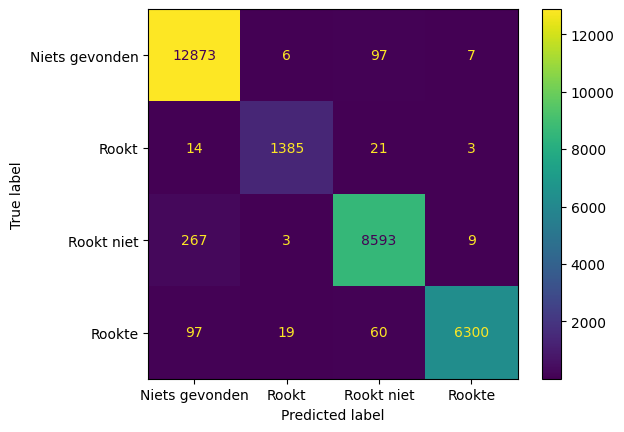

                precision    recall  f1-score   support

Niets gevonden       0.97      0.99      0.98     12983
         Rookt       0.98      0.97      0.98      1423
    Rookt niet       0.98      0.97      0.97      8872
        Rookte       1.00      0.97      0.98      6476

      accuracy                           0.98     29754
     macro avg       0.98      0.98      0.98     29754
  weighted avg       0.98      0.98      0.98     29754



In [21]:
# Ngram 2 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 119.62, NNZs: 694, Bias: 0.000000, T: 71408, Avg. loss: 0.439386
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 167.95, NNZs: 327, Bias: 0.000000, T: 142816, Avg. loss: 0.390950
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 204.56, NNZs: 282, Bias: 0.000000, T: 214224, Avg. loss: 0.379785
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 235.32, NNZs: 261, Bias: 0.000000, T: 285632, Avg. loss: 0.373944
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 262.27, NNZs: 247, Bias: 0.000000, T: 357040, Avg. loss: 0.370502
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 286.45, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.368262
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 290.06, NNZs: 235, Bias: 0.000000, T: 499856, Avg. loss: 0.366796
Total training time: 1.48 seconds.
-- Epoch 8
Norm: 293.63, NNZs: 233, Bias: 0.000000, T: 571264, Avg. loss: 0.366625
Total training time: 1.67 seconds.
-- Epoch 9
Norm: 297.15, NNZs: 232, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


-- Epoch 1
Norm: 123.61, NNZs: 613, Bias: 0.000000, T: 71408, Avg. loss: 0.318342
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 168.80, NNZs: 270, Bias: 0.000000, T: 142816, Avg. loss: 0.264620
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 203.71, NNZs: 237, Bias: 0.000000, T: 214224, Avg. loss: 0.254111
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 232.97, NNZs: 228, Bias: 0.000000, T: 285632, Avg. loss: 0.248869
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 258.97, NNZs: 215, Bias: 0.000000, T: 357040, Avg. loss: 0.245374
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 282.26, NNZs: 210, Bias: 0.000000, T: 428448, Avg. loss: 0.243566
Total training time: 1.07 seconds.
-- Epoch 7
Norm: 286.14, NNZs: 210, Bias: 0.000000, T: 499856, Avg. loss: 0.241600
Total training time: 1.25 seconds.
-- Epoch 8
Norm: 289.98, NNZs: 210, Bias: 0.000000, T: 571264, Avg. loss: 0.241489
Total training time: 1.43 seconds.
-- Epoch 9
Norm: 293.76, NNZs: 209, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


Norm: 125.80, NNZs: 636, Bias: 0.000000, T: 71408, Avg. loss: 0.466291
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 178.57, NNZs: 284, Bias: 0.000000, T: 142816, Avg. loss: 0.394793
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 218.07, NNZs: 252, Bias: 0.000000, T: 214224, Avg. loss: 0.375324
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 251.02, NNZs: 246, Bias: 0.000000, T: 285632, Avg. loss: 0.365284
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 279.77, NNZs: 241, Bias: 0.000000, T: 357040, Avg. loss: 0.359526
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 305.51, NNZs: 238, Bias: 0.000000, T: 428448, Avg. loss: 0.355585
Total training time: 1.13 seconds.
-- Epoch 7
Norm: 309.53, NNZs: 239, Bias: 0.000000, T: 499856, Avg. loss: 0.353839
Total training time: 1.32 seconds.
-- Epoch 8
Norm: 313.49, NNZs: 238, Bias: 0.000000, T: 571264, Avg. loss: 0.353227
Total training time: 1.51 seconds.
-- Epoch 9
Norm: 317.39, NNZs: 236, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.132 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 119.79, NNZs: 705, Bias: 0.000000, T: 71408, Avg. loss: 0.439978
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 168.13, NNZs: 326, Bias: 0.000000, T: 142816, Avg. loss: 0.391202
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 204.80, NNZs: 294, Bias: 0.000000, T: 214224, Avg. loss: 0.380224
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 235.52, NNZs: 272, Bias: 0.000000, T: 285632, Avg. loss: 0.374659
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 262.43, NNZs: 251, Bias: 0.000000, T: 357040, Avg. loss: 0.370922
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 286.69, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.369073
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 290.29, NNZs: 239, Bias: 0.000000, T: 499856, Avg. loss: 0.367177
Total training time: 1.50 seconds.
-- Epoch 8
Norm: 293.86, NNZs: 239, Bias: 0.000000, T: 571264, Avg. loss: 0.366981
Total training time: 1.72 seconds.
-- Epoch 9
Norm: 297.38, NNZs: 237, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


Norm: 123.60, NNZs: 615, Bias: 0.000000, T: 71408, Avg. loss: 0.318934
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 169.12, NNZs: 265, Bias: 0.000000, T: 142816, Avg. loss: 0.265902
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 203.91, NNZs: 245, Bias: 0.000000, T: 214224, Avg. loss: 0.255190
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 233.13, NNZs: 230, Bias: 0.000000, T: 285632, Avg. loss: 0.250021
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 259.01, NNZs: 220, Bias: 0.000000, T: 357040, Avg. loss: 0.246929
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 282.26, NNZs: 209, Bias: 0.000000, T: 428448, Avg. loss: 0.244619
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 286.13, NNZs: 209, Bias: 0.000000, T: 499856, Avg. loss: 0.243246
Total training time: 1.48 seconds.
-- Epoch 8
Norm: 289.92, NNZs: 209, Bias: 0.000000, T: 571264, Avg. loss: 0.242927
Total training time: 1.68 seconds.
-- Epoch 9
Norm: 293.68, NNZs: 209, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


-- Epoch 1
Norm: 125.74, NNZs: 693, Bias: 0.000000, T: 71408, Avg. loss: 0.466556
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 178.58, NNZs: 280, Bias: 0.000000, T: 142816, Avg. loss: 0.393864
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 218.31, NNZs: 262, Bias: 0.000000, T: 214224, Avg. loss: 0.374930
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 251.21, NNZs: 256, Bias: 0.000000, T: 285632, Avg. loss: 0.365214
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 279.91, NNZs: 240, Bias: 0.000000, T: 357040, Avg. loss: 0.358940
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 305.66, NNZs: 236, Bias: 0.000000, T: 428448, Avg. loss: 0.355409
Total training time: 1.16 seconds.
-- Epoch 7
Norm: 309.67, NNZs: 237, Bias: 0.000000, T: 499856, Avg. loss: 0.353796
Total training time: 1.36 seconds.
-- Epoch 8
Norm: 313.62, NNZs: 237, Bias: 0.000000, T: 571264, Avg. loss: 0.353127
Total training time: 1.55 seconds.
-- Epoch 9
Norm: 317.52, NNZs: 235, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.136 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120.05, NNZs: 744, Bias: 0.000000, T: 71408, Avg. loss: 0.436700
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 168.47, NNZs: 328, Bias: 0.000000, T: 142816, Avg. loss: 0.388488
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 205.17, NNZs: 297, Bias: 0.000000, T: 214224, Avg. loss: 0.376869
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 235.93, NNZs: 280, Bias: 0.000000, T: 285632, Avg. loss: 0.371293
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 262.94, NNZs: 252, Bias: 0.000000, T: 357040, Avg. loss: 0.367641
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 287.27, NNZs: 247, Bias: 0.000000, T: 428448, Avg. loss: 0.366106
Total training time: 1.26 seconds.
-- Epoch 7
Norm: 290.90, NNZs: 246, Bias: 0.000000, T: 499856, Avg. loss: 0.364430
Total training time: 1.46 seconds.
-- Epoch 8
Norm: 294.48, NNZs: 242, Bias: 0.000000, T: 571264, Avg. loss: 0.364099
Total training time: 1.65 seconds.
-- Epoch 9
Norm: 298.01, NNZs: 239, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


Norm: 123.62, NNZs: 653, Bias: 0.000000, T: 71408, Avg. loss: 0.316810
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 169.19, NNZs: 257, Bias: 0.000000, T: 142816, Avg. loss: 0.263940
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 203.92, NNZs: 238, Bias: 0.000000, T: 214224, Avg. loss: 0.253193
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 233.21, NNZs: 225, Bias: 0.000000, T: 285632, Avg. loss: 0.247743
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 259.01, NNZs: 213, Bias: 0.000000, T: 357040, Avg. loss: 0.244797
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 282.43, NNZs: 208, Bias: 0.000000, T: 428448, Avg. loss: 0.242729
Total training time: 1.17 seconds.
-- Epoch 7
Norm: 286.30, NNZs: 208, Bias: 0.000000, T: 499856, Avg. loss: 0.240988
Total training time: 1.35 seconds.
-- Epoch 8
Norm: 290.11, NNZs: 208, Bias: 0.000000, T: 571264, Avg. loss: 0.240781
Total training time: 1.53 seconds.
-- Epoch 9
Norm: 293.88, NNZs: 207, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


-- Epoch 1
Norm: 125.92, NNZs: 673, Bias: 0.000000, T: 71408, Avg. loss: 0.464978
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 178.70, NNZs: 286, Bias: 0.000000, T: 142816, Avg. loss: 0.392898
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 218.32, NNZs: 261, Bias: 0.000000, T: 214224, Avg. loss: 0.373385
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 251.30, NNZs: 244, Bias: 0.000000, T: 285632, Avg. loss: 0.363662
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 280.06, NNZs: 239, Bias: 0.000000, T: 357040, Avg. loss: 0.357366
Total training time: 0.90 seconds.
-- Epoch 6
Norm: 305.86, NNZs: 231, Bias: 0.000000, T: 428448, Avg. loss: 0.353444
Total training time: 1.08 seconds.
-- Epoch 7
Norm: 309.87, NNZs: 229, Bias: 0.000000, T: 499856, Avg. loss: 0.351759
Total training time: 1.27 seconds.
-- Epoch 8
Norm: 313.83, NNZs: 229, Bias: 0.000000, T: 571264, Avg. loss: 0.351137
Total training time: 1.46 seconds.
-- Epoch 9
Norm: 317.74, NNZs: 228, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.135 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 120.03, NNZs: 744, Bias: 0.000000, T: 71408, Avg. loss: 0.437448
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 168.30, NNZs: 337, Bias: 0.000000, T: 142816, Avg. loss: 0.388625
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 205.02, NNZs: 295, Bias: 0.000000, T: 214224, Avg. loss: 0.377546
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 235.83, NNZs: 273, Bias: 0.000000, T: 285632, Avg. loss: 0.372000
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 262.84, NNZs: 257, Bias: 0.000000, T: 357040, Avg. loss: 0.368239
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 287.17, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.365958
Total training time: 1.28 seconds.
-- Epoch 7
Norm: 290.75, NNZs: 244, Bias: 0.000000, T: 499856, Avg. loss: 0.364505
Total training time: 1.50 seconds.
-- Epoch 8
Norm: 294.31, NNZs: 245, Bias: 0.000000, T: 571264, Avg. loss: 0.364120
Total training time: 1.70 seconds.
-- Epoch 9
Norm: 297.83, NNZs: 245, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


Norm: 123.52, NNZs: 675, Bias: 0.000000, T: 71408, Avg. loss: 0.317788
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 169.33, NNZs: 258, Bias: 0.000000, T: 142816, Avg. loss: 0.263938
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 203.85, NNZs: 232, Bias: 0.000000, T: 214224, Avg. loss: 0.253845
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 233.24, NNZs: 219, Bias: 0.000000, T: 285632, Avg. loss: 0.248269
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 258.95, NNZs: 214, Bias: 0.000000, T: 357040, Avg. loss: 0.244914
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 282.38, NNZs: 211, Bias: 0.000000, T: 428448, Avg. loss: 0.243330
Total training time: 1.20 seconds.
-- Epoch 7
Norm: 286.28, NNZs: 211, Bias: 0.000000, T: 499856, Avg. loss: 0.241755
Total training time: 1.40 seconds.
-- Epoch 8
Norm: 290.09, NNZs: 211, Bias: 0.000000, T: 571264, Avg. loss: 0.241363
Total training time: 1.61 seconds.
-- Epoch 9
Norm: 293.87, NNZs: 210, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


-- Epoch 1
Norm: 125.71, NNZs: 679, Bias: 0.000000, T: 71408, Avg. loss: 0.466228
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 178.64, NNZs: 281, Bias: 0.000000, T: 142816, Avg. loss: 0.393564
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 218.27, NNZs: 253, Bias: 0.000000, T: 214224, Avg. loss: 0.374245
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 251.22, NNZs: 239, Bias: 0.000000, T: 285632, Avg. loss: 0.364164
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 279.94, NNZs: 234, Bias: 0.000000, T: 357040, Avg. loss: 0.358185
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 305.72, NNZs: 226, Bias: 0.000000, T: 428448, Avg. loss: 0.354316
Total training time: 1.14 seconds.
-- Epoch 7
Norm: 309.74, NNZs: 230, Bias: 0.000000, T: 499856, Avg. loss: 0.352815
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 313.71, NNZs: 229, Bias: 0.000000, T: 571264, Avg. loss: 0.351974
Total training time: 1.52 seconds.
-- Epoch 9
Norm: 317.62, NNZs: 228, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.130 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 119.83, NNZs: 717, Bias: 0.000000, T: 71409, Avg. loss: 0.438459
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 168.14, NNZs: 337, Bias: 0.000000, T: 142818, Avg. loss: 0.390276
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 204.92, NNZs: 291, Bias: 0.000000, T: 214227, Avg. loss: 0.378180
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 235.66, NNZs: 265, Bias: 0.000000, T: 285636, Avg. loss: 0.372918
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 262.57, NNZs: 248, Bias: 0.000000, T: 357045, Avg. loss: 0.369490
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 286.85, NNZs: 227, Bias: 0.000000, T: 428454, Avg. loss: 0.366935
Total training time: 1.24 seconds.
-- Epoch 7
Norm: 290.49, NNZs: 233, Bias: 0.000000, T: 499863, Avg. loss: 0.365840
Total training time: 1.47 seconds.
-- Epoch 8
Norm: 294.05, NNZs: 233, Bias: 0.000000, T: 571272, Avg. loss: 0.365351
Total training time: 1.67 seconds.
-- Epoch 9
Norm: 297.57, NNZs: 232, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


-- Epoch 1
Norm: 123.44, NNZs: 653, Bias: 0.000000, T: 71409, Avg. loss: 0.318626
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 169.33, NNZs: 270, Bias: 0.000000, T: 142818, Avg. loss: 0.264723
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 204.13, NNZs: 241, Bias: 0.000000, T: 214227, Avg. loss: 0.254147
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 233.43, NNZs: 232, Bias: 0.000000, T: 285636, Avg. loss: 0.248792
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 259.23, NNZs: 223, Bias: 0.000000, T: 357045, Avg. loss: 0.245695
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 282.64, NNZs: 217, Bias: 0.000000, T: 428454, Avg. loss: 0.243873
Total training time: 1.12 seconds.
-- Epoch 7
Norm: 286.51, NNZs: 212, Bias: 0.000000, T: 499863, Avg. loss: 0.242243
Total training time: 1.32 seconds.
-- Epoch 8
Norm: 290.33, NNZs: 212, Bias: 0.000000, T: 571272, Avg. loss: 0.242056
Total training time: 1.49 seconds.
-- Epoch 9
Norm: 294.09, NNZs: 212, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


Norm: 125.78, NNZs: 721, Bias: 0.000000, T: 71409, Avg. loss: 0.465917
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 178.66, NNZs: 292, Bias: 0.000000, T: 142818, Avg. loss: 0.393495
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 218.27, NNZs: 261, Bias: 0.000000, T: 214227, Avg. loss: 0.374533
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 251.22, NNZs: 244, Bias: 0.000000, T: 285636, Avg. loss: 0.364614
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 279.94, NNZs: 235, Bias: 0.000000, T: 357045, Avg. loss: 0.358614
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 305.76, NNZs: 232, Bias: 0.000000, T: 428454, Avg. loss: 0.354825
Total training time: 1.14 seconds.
-- Epoch 7
Norm: 309.76, NNZs: 231, Bias: 0.000000, T: 499863, Avg. loss: 0.352958
Total training time: 1.34 seconds.
-- Epoch 8
Norm: 313.71, NNZs: 230, Bias: 0.000000, T: 571272, Avg. loss: 0.352407
Total training time: 1.53 seconds.
-- Epoch 9
Norm: 317.61, NNZs: 228, Bias: 0.000000, T: 642681, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.131 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 78883565814627.52, NNZs: 358765, Bias: 0.000000, T: 71408, Avg. loss: 59963502453438013243392.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 73561328007213.97, NNZs: 358766, Bias: 0.000000, T: 142816, Avg. loss: 52945288210788414128128.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 70848236674830.88, NNZs: 358766, Bias: 0.000000, T: 214224, Avg. loss: 42576463594379404115968.000000
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 69058227827350.10, NNZs: 358766, Bias: 0.000000, T: 285632, Avg. loss: 37824960845407045287936.000000
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 67739014989445.02, NNZs: 358766, Bias: 0.000000, T: 357040, Avg. loss: 34900833788741178884096.000000
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 66699659585121.30, NNZs: 358766, Bias: 0.000000, T: 428448, Avg. loss: 32878526009777646993408.000000
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 71463919467236.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 66414049585070.15, NNZs: 358766, Bias: 0.000000, T: 142816, Avg. loss: 42887548179606210084864.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 63853142845675.70, NNZs: 358766, Bias: 0.000000, T: 214224, Avg. loss: 34053176672112978427904.000000
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 62168484835781.89, NNZs: 358766, Bias: 0.000000, T: 285632, Avg. loss: 30090790053651142410240.000000
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 60928049087793.70, NNZs: 358766, Bias: 0.000000, T: 357040, Avg. loss: 27654080770376533540864.000000
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 59952684921042.38, NNZs: 358766, Bias: 0.000000, T: 428448, Avg. loss: 25965691168063695618048.000000
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 72272013800432.38, NNZs: 358765, Bias: 0.000000, T: 71408, Avg. loss: 52316714073785716703232.000000
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 67126110683369.27, NNZs: 358766, Bias: 0.000000, T: 142816, Avg. loss: 44741527030515229523968.000000
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 64520708872904.50, NNZs: 358766, Bias: 0.000000, T: 214224, Avg. loss: 35527731037171619987456.000000
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 62805509602936.13, NNZs: 358766, Bias: 0.000000, T: 285632, Avg. loss: 31382786413496121688064.000000
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 61544588169773.88, NNZs: 358766, Bias: 0.000000, T: 357040, Avg. loss: 28837524471873804435456.000000
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 60553153738437.00, NNZs: 358766, Bias: 0.000000, T: 428448, Avg. loss: 27049207452973918060544.000000
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 67818916112046.30, NNZs: 358763, Bias: 0.000000, T: 71408, Avg. loss: 45446898470363752038400.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 62910713077143.52, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.239 total time=  51.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 61299957843077.94, NNZs: 358206, Bias: 0.000000, T: 71408, Avg. loss: 38386266256356686168064.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 56742896586744.70, NNZs: 358226, Bias: 0.000000, T: 142816, Avg. loss: 31266018120526769160192.000000
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 54442890426008.04, NNZs: 358226, Bias: 0.000000, T: 214224, Avg. loss: 24518192296583485194240.000000
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 52936369719241.78, NNZs: 358226, Bias: 0.000000, T: 285632, Avg. loss: 21517655552254671847424.000000
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 51829953660602.20, NNZs: 358226, Bias: 0.000000, T: 357040, Avg. loss: 19686649982974513119232.000000
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 50961797988220.84, NNZs: 358226, Bias: 0.000000, T: 428448, Avg. loss: 18417941927143965458432.000000
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 71165413674232.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 66162742014025.54, NNZs: 358226, Bias: 0.000000, T: 142816, Avg. loss: 42797334850009988857856.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 63636946510138.31, NNZs: 358226, Bias: 0.000000, T: 214224, Avg. loss: 34115890857706361192448.000000
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 61974387437492.48, NNZs: 358226, Bias: 0.000000, T: 285632, Avg. loss: 30208580537350363283456.000000
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 60750074931238.46, NNZs: 358226, Bias: 0.000000, T: 357040, Avg. loss: 27809309866248460304384.000000
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 59789469955315.70, NNZs: 358226, Bias: 0.000000, T: 428448, Avg. loss: 26136815016882789679104.000000
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 81558268782707.16, NNZs: 358224, Bias: 0.000000, T: 71408, Avg. loss: 62953577734620418408448.000000
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 76134462281713.72, NNZs: 358226, Bias: 0.000000, T: 142816, Avg. loss: 56862943987062649389056.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 73385795929988.70, NNZs: 358226, Bias: 0.000000, T: 214224, Avg. loss: 45901139392771833987072.000000
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 71574462974778.23, NNZs: 358226, Bias: 0.000000, T: 285632, Avg. loss: 40917593321369140985856.000000
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 70237838910745.81, NNZs: 358226, Bias: 0.000000, T: 357040, Avg. loss: 37825465239072090882048.000000
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 69187645901913.26, NNZs: 358226, Bias: 0.000000, T: 428448, Avg. loss: 35674014236059270905856.000000
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 61118228758435.08, NNZs: 358220, Bias: 0.000000, T: 71408, Avg. loss: 38024444000756779974656.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 56576564661496.87, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.231 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 68481710805797.86, NNZs: 358543, Bias: 0.000000, T: 71408, Avg. loss: 46823003924235252924416.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 63543995950088.76, NNZs: 358546, Bias: 0.000000, T: 142816, Avg. loss: 39688470650806654205952.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 61033041284111.27, NNZs: 358546, Bias: 0.000000, T: 214224, Avg. loss: 31394080808817498521600.000000
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 59380739393910.38, NNZs: 358546, Bias: 0.000000, T: 285632, Avg. loss: 27684658351215099248640.000000
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 58165549062053.23, NNZs: 358546, Bias: 0.000000, T: 357040, Avg. loss: 25397982208708023681024.000000
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 57211135527676.59, NNZs: 358546, Bias: 0.000000, T: 428448, Avg. loss: 23814886300221807001600.000000
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 74935321730131.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 69753053898371.23, NNZs: 358546, Bias: 0.000000, T: 142816, Avg. loss: 48088486935998284955648.000000
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 67119793700134.56, NNZs: 358546, Bias: 0.000000, T: 214224, Avg. loss: 38419314741881388138496.000000
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 65385489666177.42, NNZs: 358546, Bias: 0.000000, T: 285632, Avg. loss: 34060324630593911390208.000000
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 64108852682237.93, NNZs: 358546, Bias: 0.000000, T: 357040, Avg. loss: 31368211237134883880960.000000
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 63105956204022.20, NNZs: 358546, Bias: 0.000000, T: 428448, Avg. loss: 29486328873117772939264.000000
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 64897779812834.77, NNZs: 358546, Bias: 0.000000, T: 71408, Avg. loss: 42756142485559807311872.000000
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 60109531603396.27, NNZs: 358546, Bias: 0.000000, T: 142816, Avg. loss: 35854739293301467250688.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 57701289350466.34, NNZs: 358546, Bias: 0.000000, T: 214224, Avg. loss: 28227986589545842868224.000000
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 56123290011403.31, NNZs: 358546, Bias: 0.000000, T: 285632, Avg. loss: 24806069574810231373824.000000
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 54959747022051.29, NNZs: 358546, Bias: 0.000000, T: 357040, Avg. loss: 22750469763074287992832.000000
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 54045743949100.70, NNZs: 358546, Bias: 0.000000, T: 428448, Avg. loss: 21299667250012028403712.000000
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 70321917329534.84, NNZs: 358544, Bias: 0.000000, T: 71408, Avg. loss: 50935196812094639964160.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 65222944192935.81, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.231 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67264620318665.84, NNZs: 358989, Bias: 0.000000, T: 71408, Avg. loss: 44635270359158714531840.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 62388736434206.37, NNZs: 358989, Bias: 0.000000, T: 142816, Avg. loss: 37901450698227917520896.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 59924749805759.21, NNZs: 358989, Bias: 0.000000, T: 214224, Avg. loss: 29939308577543627472896.000000
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 58304799264093.79, NNZs: 358989, Bias: 0.000000, T: 285632, Avg. loss: 26396043022175683215360.000000
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 57115487869197.36, NNZs: 358989, Bias: 0.000000, T: 357040, Avg. loss: 24214839047159149494272.000000
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 56181063111449.35, NNZs: 358989, Bias: 0.000000, T: 428448, Avg. loss: 22698430637976378671104.000000
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 86732590491603.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 81099130384653.83, NNZs: 358989, Bias: 0.000000, T: 142816, Avg. loss: 65083105218015937953792.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 78246580462062.20, NNZs: 358989, Bias: 0.000000, T: 214224, Avg. loss: 52692009989836998967296.000000
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 76373121096440.05, NNZs: 358989, Bias: 0.000000, T: 285632, Avg. loss: 47079058744834516844544.000000
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 74990935755632.48, NNZs: 358989, Bias: 0.000000, T: 357040, Avg. loss: 43595811596508778725376.000000
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 73903034125968.67, NNZs: 358989, Bias: 0.000000, T: 428448, Avg. loss: 41153060295907687268352.000000
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 76629155400014.86, NNZs: 358976, Bias: 0.000000, T: 71408, Avg. loss: 58415412845620653719552.000000
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 71302902297708.02, NNZs: 358989, Bias: 0.000000, T: 142816, Avg. loss: 50298997527825841389568.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 68605964392779.34, NNZs: 358989, Bias: 0.000000, T: 214224, Avg. loss: 40200786571737186697216.000000
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 66828485016609.20, NNZs: 358989, Bias: 0.000000, T: 285632, Avg. loss: 35619535788076389367808.000000
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 65519927433530.20, NNZs: 358989, Bias: 0.000000, T: 357040, Avg. loss: 32804749169776369074176.000000
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 64489273736324.87, NNZs: 358989, Bias: 0.000000, T: 428448, Avg. loss: 30832440112054192308224.000000
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 57506451606351.83, NNZs: 358989, Bias: 0.000000, T: 71408, Avg. loss: 34260738483800244224000.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 53078281658823.00, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.233 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 50982626141003.95, NNZs: 357428, Bias: 0.000000, T: 71409, Avg. loss: 27359627217260341362688.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 46922906686684.08, NNZs: 357429, Bias: 0.000000, T: 142818, Avg. loss: 21305726647778033008640.000000
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 44882307686215.11, NNZs: 357429, Bias: 0.000000, T: 214227, Avg. loss: 16429188665138516852736.000000
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 43556024114025.07, NNZs: 357429, Bias: 0.000000, T: 285636, Avg. loss: 14265983144978854969344.000000
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 42581481026752.65, NNZs: 357429, Bias: 0.000000, T: 357045, Avg. loss: 12976646324050854936576.000000
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 41820704928743.42, NNZs: 357429, Bias: 0.000000, T: 428454, Avg. loss: 12088551851691467603968.000000
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 48421015736721.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 44492436996624.89, NNZs: 357429, Bias: 0.000000, T: 142818, Avg. loss: 18834750241719254515712.000000
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 42535833339618.27, NNZs: 357429, Bias: 0.000000, T: 214227, Avg. loss: 14379064200708906549248.000000
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 41264154916020.54, NNZs: 357429, Bias: 0.000000, T: 285636, Avg. loss: 12447087446406408962048.000000
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 40333245469247.48, NNZs: 357429, Bias: 0.000000, T: 357045, Avg. loss: 11287833123674998702080.000000
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 39606355999962.99, NNZs: 357429, Bias: 0.000000, T: 428454, Avg. loss: 10490459718469747212288.000000
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 84982584347062.25, NNZs: 357429, Bias: 0.000000, T: 71409, Avg. loss: 69172116603592905850880.000000
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 79458203788240.17, NNZs: 357429, Bias: 0.000000, T: 142818, Avg. loss: 63466860424002128576512.000000
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 76644408096029.03, NNZs: 357429, Bias: 0.000000, T: 214227, Avg. loss: 51475123834837769650176.000000
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 74795397151863.62, NNZs: 357429, Bias: 0.000000, T: 285636, Avg. loss: 45942236617262757838848.000000
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 73431334116955.75, NNZs: 357429, Bias: 0.000000, T: 357045, Avg. loss: 42557862907742819188736.000000
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 72357420904895.66, NNZs: 357429, Bias: 0.000000, T: 428454, Avg. loss: 40175306532780532301824.000000
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 81802198148338.31, NNZs: 357426, Bias: 0.000000, T: 71409, Avg. loss: 66118360727991831494656.000000
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 76294049797980.72, NNZs: 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.231 total time=  51.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 260.98, NNZs: 1871, Bias: 0.000000, T: 71408, Avg. loss: 0.351291
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 360.64, NNZs: 809, Bias: 0.000000, T: 142816, Avg. loss: 0.319039
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 437.35, NNZs: 758, Bias: 0.000000, T: 214224, Avg. loss: 0.316132
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 501.89, NNZs: 697, Bias: 0.000000, T: 285632, Avg. loss: 0.314114
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 558.95, NNZs: 707, Bias: 0.000000, T: 357040, Avg. loss: 0.313252
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 610.54, NNZs: 685, Bias: 0.000000, T: 428448, Avg. loss: 0.312285
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 207.78, NNZs: 1438, Bias: 0.000000, T: 71408, Avg. loss: 0.214281
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 284.25, NNZs: 568, Bias: 0.000000, T: 142816, Avg. loss: 0.187128
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 343.53, NNZs: 565, Bias: 0.000000, T: 214224, Avg. loss: 0.186971
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 393.62, NNZs: 531, Bias: 0.000000, T: 285632, Avg. loss: 0.185729
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 437.77, NNZs: 549, Bias: 0.000000, T: 357040, Avg. loss: 0.184691
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 477.98, NNZs: 550, Bias: 0.000000, T: 428448, Avg. loss: 0.185076
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 262.23, NNZs: 1950, Bias: 0.000000, T: 71408, Avg. loss: 0.341799
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 356.71, NNZs: 723, Bias: 0.000000, T: 142816, Avg. loss: 0.285025
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 428.98, NNZs: 683, Bias: 0.000000, T: 214224, Avg. loss: 0.279424
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 490.19, NNZs: 650, Bias: 0.000000, T: 285632, Avg. loss: 0.277012
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 544.26, NNZs: 636, Bias: 0.000000, T: 357040, Avg. loss: 0.276300
Total training time: 0.63 seconds.
-- Epoch 6
Norm: 593.26, NNZs: 627, Bias: 0.000000, T: 428448, Avg. loss: 0.275603
Total training time: 0.76 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 256.64, NNZs: 1836, Bias: 0.000000, T: 71408, Avg. loss: 0.336722
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 351.69, NNZs: 719, Bias: 0.000000, T: 142816, Avg. loss: 0.291480
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 424.64, NNZs: 689, Bias: 0.000000, T: 214224, Avg. loss: 0.286838
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 486.1

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.847 total time=  52.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 261.42, NNZs: 1859, Bias: 0.000000, T: 71408, Avg. loss: 0.352201
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 361.46, NNZs: 822, Bias: 0.000000, T: 142816, Avg. loss: 0.320582
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 438.00, NNZs: 746, Bias: 0.000000, T: 214224, Avg. loss: 0.315660
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 502.76, NNZs: 706, Bias: 0.000000, T: 285632, Avg. loss: 0.314726
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 559.84, NNZs: 694, Bias: 0.000000, T: 357040, Avg. loss: 0.314285
Total training time: 0.64 seconds.
-- Epoch 6
Norm: 611.59, NNZs: 670, Bias: 0.000000, T: 428448, Avg. loss: 0.312259
Total training time: 0.77 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1
Norm: 207.92, NNZs: 1463, Bias: 0.000000, T: 71408, Avg. loss: 0.213700
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 284.80, NNZs: 587, Bias: 0.000000, T: 142816, Avg. loss: 0.188655
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 344.21, NNZs: 551, Bias: 0.000000, T: 214224, Avg. loss: 0.188020
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 394.54, NNZs: 526, Bias: 0.000000, T: 285632, Avg. loss: 0.187973
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 439.02, NNZs: 527, Bias: 0.000000, T: 357040, Avg. loss: 0.187794
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 479.29, NNZs: 508, Bias: 0.000000, T: 428448, Avg. loss: 0.187077
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 262.69, NNZs: 1963, Bias: 0.000000, T: 71408, Avg. loss: 0.342239
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 357.15, NNZs: 720, Bias: 0.000000, T: 142816, Avg. loss: 0.286097
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 429.44, NNZs: 657, Bias: 0.000000, T: 214224, Avg. loss: 0.279383
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 490.42, NNZs: 621, Bias: 0.000000, T: 285632, Avg. loss: 0.276910
Total training time: 0.52 seconds.
-- Epoch 5
Norm: 544.49, NNZs: 596, Bias: 0.000000, T: 357040, Avg. loss: 0.277047
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 593.60, NNZs: 585, Bias: 0.000000, T: 428448, Avg. loss: 0.276353
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 257.31, NNZs: 1762, Bias: 0.000000, T: 71408, Avg. loss: 0.337115
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 352.65, NNZs: 716, Bias: 0.000000, T: 142816, Avg. loss: 0.293948
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 425.90, NNZs: 672, Bias: 0.000000, T: 214224, Avg. loss: 0.288918
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 487.6

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.869 total time=  53.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 260.62, NNZs: 1882, Bias: 0.000000, T: 71408, Avg. loss: 0.350155
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 359.92, NNZs: 800, Bias: 0.000000, T: 142816, Avg. loss: 0.317447
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 436.11, NNZs: 728, Bias: 0.000000, T: 214224, Avg. loss: 0.313461
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 500.54, NNZs: 704, Bias: 0.000000, T: 285632, Avg. loss: 0.312061
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 557.59, NNZs: 708, Bias: 0.000000, T: 357040, Avg. loss: 0.312204
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 609.04, NNZs: 679, Bias: 0.000000, T: 428448, Avg. loss: 0.310253
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 207.41, NNZs: 1326, Bias: 0.000000, T: 71408, Avg. loss: 0.213384
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 284.50, NNZs: 580, Bias: 0.000000, T: 142816, Avg. loss: 0.189637
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 343.90, NNZs: 557, Bias: 0.000000, T: 214224, Avg. loss: 0.189089
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 394.34, NNZs: 529, Bias: 0.000000, T: 285632, Avg. loss: 0.187584
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 438.72, NNZs: 529, Bias: 0.000000, T: 357040, Avg. loss: 0.187494
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 478.83, NNZs: 529, Bias: 0.000000, T: 428448, Avg. loss: 0.186866
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 261.60, NNZs: 2002, Bias: 0.000000, T: 71408, Avg. loss: 0.339267
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 355.55, NNZs: 722, Bias: 0.000000, T: 142816, Avg. loss: 0.283136
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 427.74, NNZs: 662, Bias: 0.000000, T: 214224, Avg. loss: 0.277633
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 488.57, NNZs: 622, Bias: 0.000000, T: 285632, Avg. loss: 0.274445
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 542.41, NNZs: 611, Bias: 0.000000, T: 357040, Avg. loss: 0.273796
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 591.17, NNZs: 601, Bias: 0.000000, T: 428448, Avg. loss: 0.273444
Total training time: 0.87 seconds.
Convergence after 6 epochs took 0.89 seconds
-- Epoch 1
Norm: 256.48, NNZs: 1810, Bias: 0.000000, T: 71408, Avg. loss: 0.335919
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 351.55, NNZs: 717, Bias: 0.000000, T: 142816, Avg. loss: 0.292708
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 424.63, NNZs: 673, Bias: 0.000000, T: 214224, Avg. loss: 0.289083
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 486.1

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.851 total time=  54.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 260.80, NNZs: 1997, Bias: 0.000000, T: 71408, Avg. loss: 0.350955
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 360.24, NNZs: 790, Bias: 0.000000, T: 142816, Avg. loss: 0.318066
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 436.58, NNZs: 722, Bias: 0.000000, T: 214224, Avg. loss: 0.314248
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 501.14, NNZs: 687, Bias: 0.000000, T: 285632, Avg. loss: 0.313196
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 558.03, NNZs: 677, Bias: 0.000000, T: 357040, Avg. loss: 0.311241
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 609.57, NNZs: 668, Bias: 0.000000, T: 428448, Avg. loss: 0.312371
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 207.95, NNZs: 1440, Bias: 0.000000, T: 71408, Avg. loss: 0.215802
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 285.06, NNZs: 578, Bias: 0.000000, T: 142816, Avg. loss: 0.189268
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 344.50, NNZs: 553, Bias: 0.000000, T: 214224, Avg. loss: 0.187826
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 394.49, NNZs: 532, Bias: 0.000000, T: 285632, Avg. loss: 0.186326
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 438.97, NNZs: 526, Bias: 0.000000, T: 357040, Avg. loss: 0.186649
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 479.25, NNZs: 528, Bias: 0.000000, T: 428448, Avg. loss: 0.186715
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.82 seconds
-- Epoch 1
Norm: 261.96, NNZs: 1910, Bias: 0.000000, T: 71408, Avg. loss: 0.342394
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 356.30, NNZs: 702, Bias: 0.000000, T: 142816, Avg. loss: 0.284264
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 428.48, NNZs: 652, Bias: 0.000000, T: 214224, Avg. loss: 0.278971
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 489.41, NNZs: 624, Bias: 0.000000, T: 285632, Avg. loss: 0.276172
Total training time: 0.61 seconds.
-- Epoch 5
Norm: 543.44, NNZs: 626, Bias: 0.000000, T: 357040, Avg. loss: 0.275596
Total training time: 0.75 seconds.
-- Epoch 6
Norm: 592.37, NNZs: 604, Bias: 0.000000, T: 428448, Avg. loss: 0.274947
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 256.91, NNZs: 1780, Bias: 0.000000, T: 71408, Avg. loss: 0.337540
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 352.22, NNZs: 728, Bias: 0.000000, T: 142816, Avg. loss: 0.293785
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 425.17, NNZs: 660, Bias: 0.000000, T: 214224, Avg. loss: 0.287914
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 486.6

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.871 total time=  53.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 261.19, NNZs: 1952, Bias: 0.000000, T: 71409, Avg. loss: 0.352655
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 360.97, NNZs: 796, Bias: 0.000000, T: 142818, Avg. loss: 0.320669
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 437.62, NNZs: 762, Bias: 0.000000, T: 214227, Avg. loss: 0.316877
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 502.36, NNZs: 716, Bias: 0.000000, T: 285636, Avg. loss: 0.315413
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 559.38, NNZs: 712, Bias: 0.000000, T: 357045, Avg. loss: 0.314315
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 611.02, NNZs: 687, Bias: 0.000000, T: 428454, Avg. loss: 0.313985
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 207.67, NNZs: 1503, Bias: 0.000000, T: 71409, Avg. loss: 0.214348
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 284.96, NNZs: 611, Bias: 0.000000, T: 142818, Avg. loss: 0.189532
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 344.13, NNZs: 571, Bias: 0.000000, T: 214227, Avg. loss: 0.187961
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 394.49, NNZs: 542, Bias: 0.000000, T: 285636, Avg. loss: 0.187384
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 439.01, NNZs: 543, Bias: 0.000000, T: 357045, Avg. loss: 0.188045
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 479.19, NNZs: 528, Bias: 0.000000, T: 428454, Avg. loss: 0.186679
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 262.36, NNZs: 1960, Bias: 0.000000, T: 71409, Avg. loss: 0.341909
Total training time: 0.11 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 356.37, NNZs: 715, Bias: 0.000000, T: 142818, Avg. loss: 0.283561
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 428.78, NNZs: 661, Bias: 0.000000, T: 214227, Avg. loss: 0.280044
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 489.94, NNZs: 617, Bias: 0.000000, T: 285636, Avg. loss: 0.277211
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 543.91, NNZs: 617, Bias: 0.000000, T: 357045, Avg. loss: 0.275593
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 592.93, NNZs: 605, Bias: 0.000000, T: 428454, Avg. loss: 0.275337
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.77 seconds
-- Epoch 1
Norm: 257.11, NNZs: 1761, Bias: 0.000000, T: 71409, Avg. loss: 0.339350
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 352.38, NNZs: 724, Bias: 0.000000, T: 142818, Avg. loss: 0.294118
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 425.33, NNZs: 695, Bias: 0.000000, T: 214227, Avg. loss: 0.289050
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 487.0

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.842 total time=  53.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.47, NNZs: 615, Bias: 0.000000, T: 71408, Avg. loss: 0.256269
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 92.69, NNZs: 471, Bias: 0.000000, T: 142816, Avg. loss: 0.235056
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 112.05, NNZs: 427, Bias: 0.000000, T: 214224, Avg. loss: 0.231727
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 128.45, NNZs: 417, Bias: 0.000000, T: 285632, Avg. loss: 0.230860
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 142.93, NNZs: 385, Bias: 0.000000, T: 357040, Avg. loss: 0.230653
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 156.12, NNZs: 398, Bias: 0.000000, T: 428448, Avg. loss: 0.229897
Total training time: 0.83 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 115.66, NNZs: 841, Bias: 0.000000, T: 71408, Avg. loss: 0.167895
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 157.56, NNZs: 679, Bias: 0.000000, T: 142816, Avg. loss: 0.148021
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 189.78, NNZs: 621, Bias: 0.000000, T: 214224, Avg. loss: 0.146565
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 217.26, NNZs: 587, Bias: 0.000000, T: 285632, Avg. loss: 0.145366
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 241.37, NNZs: 577, Bias: 0.000000, T: 357040, Avg. loss: 0.145602
Total training time: 0.66 seconds.
-- Epoch 6
Norm: 263.21, NNZs: 560, Bias: 0.000000, T: 428448, Avg. loss: 0.145166
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.81 seconds
-- Epoch 1
Norm: 83.20, NNZs: 750, Bias: 0.000000, T: 71408, Avg. loss: 0.246528
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 113.50, NNZs: 608, Bias: 0.000000, T: 142816, Avg. loss: 0.212944
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 136.66, NNZs: 552, Bias: 0.000000, T: 214224, Avg. loss: 0.208671
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 156.04, NNZs: 517, Bias: 0.000000, T: 285632, Avg. loss: 0.207220
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 173.21, NNZs: 500, Bias: 0.000000, T: 357040, Avg. loss: 0.206034
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 188.79, NNZs: 487, Bias: 0.000000, T: 428448, Avg. loss: 0.205489
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 85.60, NNZs: 768, Bias: 0.000000, T: 71408, Avg. loss: 0.225514
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 117.52, NNZs: 634, Bias: 0.000000, T: 142816, Avg. loss: 0.201415
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 142.04, NNZs: 561, Bias: 0.000000, T: 214224, Avg. loss: 0.197539
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 162.77,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.032 total time=  51.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.06, NNZs: 629, Bias: 0.000000, T: 71408, Avg. loss: 0.258237
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 92.47, NNZs: 494, Bias: 0.000000, T: 142816, Avg. loss: 0.236624
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 111.76, NNZs: 441, Bias: 0.000000, T: 214224, Avg. loss: 0.233839
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 128.16, NNZs: 417, Bias: 0.000000, T: 285632, Avg. loss: 0.233456
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 142.63, NNZs: 404, Bias: 0.000000, T: 357040, Avg. loss: 0.232225
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 155.81, NNZs: 395, Bias: 0.000000, T: 428448, Avg. loss: 0.232166
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.87 seconds
-- Epoch 1
Norm: 116.08, NNZs: 844, Bias: 0.000000, T: 71408, Avg. loss: 0.171635
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 158.15, NNZs: 648, Bias: 0.000000, T: 142816, Avg. loss: 0.148248
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 190.79, NNZs: 597, Bias: 0.000000, T: 214224, Avg. loss: 0.146925
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 218.30, NNZs: 568, Bias: 0.000000, T: 285632, Avg. loss: 0.146870
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 242.66, NNZs: 555, Bias: 0.000000, T: 357040, Avg. loss: 0.146197
Total training time: 0.71 seconds.
-- Epoch 6
Norm: 264.89, NNZs: 551, Bias: 0.000000, T: 428448, Avg. loss: 0.146583
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 83.10, NNZs: 720, Bias: 0.000000, T: 71408, Avg. loss: 0.248336
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 113.49, NNZs: 591, Bias: 0.000000, T: 142816, Avg. loss: 0.215506
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 136.79, NNZs: 547, Bias: 0.000000, T: 214224, Avg. loss: 0.210271
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 156.31, NNZs: 515, Bias: 0.000000, T: 285632, Avg. loss: 0.208554
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 173.56, NNZs: 488, Bias: 0.000000, T: 357040, Avg. loss: 0.207282
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 189.17, NNZs: 476, Bias: 0.000000, T: 428448, Avg. loss: 0.207243
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.84 seconds
-- Epoch 1
Norm: 85.65, NNZs: 778, Bias: 0.000000, T: 71408, Avg. loss: 0.226924
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 117.49, NNZs: 628, Bias: 0.000000, T: 142816, Avg. loss: 0.202812
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 141.92, NNZs: 577, Bias: 0.000000, T: 214224, Avg. loss: 0.199276
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 162.73,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.046 total time=  51.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.31, NNZs: 630, Bias: 0.000000, T: 71408, Avg. loss: 0.255394
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 92.52, NNZs: 479, Bias: 0.000000, T: 142816, Avg. loss: 0.234202
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 111.92, NNZs: 448, Bias: 0.000000, T: 214224, Avg. loss: 0.231417
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 128.28, NNZs: 407, Bias: 0.000000, T: 285632, Avg. loss: 0.229924
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 142.76, NNZs: 401, Bias: 0.000000, T: 357040, Avg. loss: 0.229884
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 155.87, NNZs: 392, Bias: 0.000000, T: 428448, Avg. loss: 0.229000
Total training time: 0.82 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 115.52, NNZs: 880, Bias: 0.000000, T: 71408, Avg. loss: 0.169233
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 157.60, NNZs: 677, Bias: 0.000000, T: 142816, Avg. loss: 0.146864
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 189.81, NNZs: 611, Bias: 0.000000, T: 214224, Avg. loss: 0.146159
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 217.18, NNZs: 589, Bias: 0.000000, T: 285632, Avg. loss: 0.145324
Total training time: 0.54 seconds.
-- Epoch 5
Norm: 241.49, NNZs: 557, Bias: 0.000000, T: 357040, Avg. loss: 0.145116
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 263.32, NNZs: 551, Bias: 0.000000, T: 428448, Avg. loss: 0.144745
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 83.14, NNZs: 741, Bias: 0.000000, T: 71408, Avg. loss: 0.246333
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 113.26, NNZs: 593, Bias: 0.000000, T: 142816, Avg. loss: 0.213522
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 136.44, NNZs: 550, Bias: 0.000000, T: 214224, Avg. loss: 0.208425
Total training time: 0.45 seconds.
-- Epoch 4
Norm: 155.84, NNZs: 508, Bias: 0.000000, T: 285632, Avg. loss: 0.206652
Total training time: 0.59 seconds.
-- Epoch 5
Norm: 173.00, NNZs: 483, Bias: 0.000000, T: 357040, Avg. loss: 0.206093
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 188.51, NNZs: 473, Bias: 0.000000, T: 428448, Avg. loss: 0.205542
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 85.52, NNZs: 758, Bias: 0.000000, T: 71408, Avg. loss: 0.224956
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 117.34, NNZs: 629, Bias: 0.000000, T: 142816, Avg. loss: 0.201011
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 141.77, NNZs: 587, Bias: 0.000000, T: 214224, Avg. loss: 0.196947
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 162.52,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.046 total time=  52.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.24, NNZs: 626, Bias: 0.000000, T: 71408, Avg. loss: 0.255688
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 92.45, NNZs: 505, Bias: 0.000000, T: 142816, Avg. loss: 0.234127
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 111.91, NNZs: 451, Bias: 0.000000, T: 214224, Avg. loss: 0.231150
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 128.23, NNZs: 420, Bias: 0.000000, T: 285632, Avg. loss: 0.230280
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 142.70, NNZs: 416, Bias: 0.000000, T: 357040, Avg. loss: 0.229876
Total training time: 0.74 seconds.
-- Epoch 6
Norm: 155.82, NNZs: 406, Bias: 0.000000, T: 428448, Avg. loss: 0.229534
Total training time: 0.90 seconds.
Convergence after 6 epochs took 0.91 seconds
-- Epoch 1
Norm: 115.69, NNZs: 826, Bias: 0.000000, T: 71408, Avg. loss: 0.170133
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 157.48, NNZs: 650, Bias: 0.000000, T: 142816, Avg. loss: 0.148817
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 189.98, NNZs: 598, Bias: 0.000000, T: 214224, Avg. loss: 0.149084
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 217.33, NNZs: 563, Bias: 0.000000, T: 285632, Avg. loss: 0.146646
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 241.75, NNZs: 543, Bias: 0.000000, T: 357040, Avg. loss: 0.147205
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 263.84, NNZs: 536, Bias: 0.000000, T: 428448, Avg. loss: 0.146716
Total training time: 0.86 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1
Norm: 83.16, NNZs: 738, Bias: 0.000000, T: 71408, Avg. loss: 0.247538
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 113.58, NNZs: 577, Bias: 0.000000, T: 142816, Avg. loss: 0.213897
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 136.59, NNZs: 543, Bias: 0.000000, T: 214224, Avg. loss: 0.209385
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 156.02, NNZs: 515, Bias: 0.000000, T: 285632, Avg. loss: 0.207417
Total training time: 0.58 seconds.
-- Epoch 5
Norm: 173.19, NNZs: 483, Bias: 0.000000, T: 357040, Avg. loss: 0.206637
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 188.73, NNZs: 468, Bias: 0.000000, T: 428448, Avg. loss: 0.206015
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.90 seconds
-- Epoch 1
Norm: 85.69, NNZs: 743, Bias: 0.000000, T: 71408, Avg. loss: 0.225762
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 117.48, NNZs: 633, Bias: 0.000000, T: 142816, Avg. loss: 0.201437
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 142.01, NNZs: 575, Bias: 0.000000, T: 214224, Avg. loss: 0.197850
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 162.74,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.036 total time=  52.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 67.33, NNZs: 621, Bias: 0.000000, T: 71409, Avg. loss: 0.256414
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 92.52, NNZs: 479, Bias: 0.000000, T: 142818, Avg. loss: 0.235020
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 111.90, NNZs: 435, Bias: 0.000000, T: 214227, Avg. loss: 0.231813
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 128.30, NNZs: 405, Bias: 0.000000, T: 285636, Avg. loss: 0.230758
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 142.80, NNZs: 402, Bias: 0.000000, T: 357045, Avg. loss: 0.230504
Total training time: 0.69 seconds.
-- Epoch 6
Norm: 155.93, NNZs: 400, Bias: 0.000000, T: 428454, Avg. loss: 0.229850
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.85 seconds
-- Epoch 1
Norm: 115.93, NNZs: 858, Bias: 0.000000, T: 71409, Avg. loss: 0.169269
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


Norm: 157.88, NNZs: 660, Bias: 0.000000, T: 142818, Avg. loss: 0.149748
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 190.15, NNZs: 588, Bias: 0.000000, T: 214227, Avg. loss: 0.148301
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 217.53, NNZs: 586, Bias: 0.000000, T: 285636, Avg. loss: 0.148133
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 241.92, NNZs: 553, Bias: 0.000000, T: 357045, Avg. loss: 0.146798
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 263.89, NNZs: 545, Bias: 0.000000, T: 428454, Avg. loss: 0.147210
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 83.24, NNZs: 729, Bias: 0.000000, T: 71409, Avg. loss: 0.246117
Total training time: 0.13 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 113.40, NNZs: 595, Bias: 0.000000, T: 142818, Avg. loss: 0.213285
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 136.45, NNZs: 531, Bias: 0.000000, T: 214227, Avg. loss: 0.208663
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 155.88, NNZs: 511, Bias: 0.000000, T: 285636, Avg. loss: 0.206669
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 172.95, NNZs: 491, Bias: 0.000000, T: 357045, Avg. loss: 0.205890
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 188.58, NNZs: 470, Bias: 0.000000, T: 428454, Avg. loss: 0.205341
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.86 seconds
-- Epoch 1
Norm: 85.35, NNZs: 748, Bias: 0.000000, T: 71409, Avg. loss: 0.225905
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 117.28, NNZs: 613, Bias: 0.000000, T: 142818, Avg. loss: 0.201497
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 141.79, NNZs: 578, Bias: 0.000000, T: 214227, Avg. loss: 0.198145
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 162.38,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.041 total time=  51.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.76, NNZs: 696321, Bias: -0.055216, T: 71408, Avg. loss: 0.200030
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.67, NNZs: 696321, Bias: -0.082364, T: 142816, Avg. loss: 0.186094
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 4.29, NNZs: 696321, Bias: -0.099103, T: 214224, Avg. loss: 0.179606
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 4.78, NNZs: 696321, Bias: -0.110924, T: 285632, Avg. loss: 0.174968
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 5.20, NNZs: 696321, Bias: -0.119328, T: 357040, Avg. loss: 0.171375
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 5.56, NNZs: 696321, Bias: -0.125314, T: 428448, Avg. loss: 0.168502
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 2.89, NNZs: 696321, Bias: -0.656743, T: 71408, Avg. loss: 0.096953
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.01, NNZs: 696321, Bias: -0.791437, T: 142816, Avg. loss: 0.033644
Total training time: 0.18 second

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


-- Epoch 3
Norm: 2.91, NNZs: 696321, Bias: -0.831710, T: 214224, Avg. loss: 0.026348
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.82, NNZs: 696321, Bias: -0.850782, T: 285632, Avg. loss: 0.024703
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 696321, Bias: -0.862345, T: 357040, Avg. loss: 0.023977
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 2.68, NNZs: 696321, Bias: -0.870394, T: 428448, Avg. loss: 0.023564
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.14, NNZs: 696321, Bias: -0.322785, T: 71408, Avg. loss: 0.188357
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 2.69, NNZs: 696321, Bias: -0.442046, T: 142816, Avg. loss: 0.165874
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 3.03, NNZs: 696321, Bias: -0.528454, T: 214224, Avg. loss: 0.154282
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 3.29, NNZs: 696321, Bias: -0.595572, T: 285632, Avg. loss: 0.146022
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 3.48, NNZs: 696321, Bias: -0.647316, T: 357040, Avg. loss: 0.140260
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 3.62, NNZs: 696321, Bias: -0.686230, T: 428448, Avg. loss: 0.136414
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 2.59, NNZs: 696321, Bias: -0.428207, T: 71408, Avg. loss: 0.163590
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.56, NNZs: 696321, Bias: -0.602786, T: 142816, Avg. loss: 0.118804
Total training time: 0.18 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.334 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.78, NNZs: 697309, Bias: -0.082097, T: 71408, Avg. loss: 0.198769
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.67, NNZs: 697309, Bias: -0.108436, T: 142816, Avg. loss: 0.185301
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.29, NNZs: 697309, Bias: -0.124569, T: 214224, Avg. loss: 0.178989
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 4.78, NNZs: 697309, Bias: -0.135710, T: 285632, Avg. loss: 0.174485
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 5.18, NNZs: 697309, Bias: -0.143430, T: 357040, Avg. loss: 0.171027
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 5.54, NNZs: 697309, Bias: -0.148771, T: 428448, Avg. loss: 0.168265
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 2.89, NNZs: 697309, Bias: -0.651903, T: 71408, Avg. loss: 0.097662
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.01, NNZs: 697309, Bias: -0.788799, T: 142816, Avg. loss: 0.034129
Total training time: 0.18 second

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 2.91, NNZs: 697309, Bias: -0.830069, T: 214224, Avg. loss: 0.026535
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 2.82, NNZs: 697309, Bias: -0.849650, T: 285632, Avg. loss: 0.024812
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 2.74, NNZs: 697309, Bias: -0.861529, T: 357040, Avg. loss: 0.024051
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 2.68, NNZs: 697309, Bias: -0.869798, T: 428448, Avg. loss: 0.023619
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1
Norm: 2.14, NNZs: 697309, Bias: -0.303942, T: 71408, Avg. loss: 0.190033
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 2.68, NNZs: 697309, Bias: -0.423055, T: 142816, Avg. loss: 0.167578
Total training time: 0.18 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


-- Epoch 3
Norm: 3.03, NNZs: 697309, Bias: -0.509791, T: 214224, Avg. loss: 0.155909
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 3.30, NNZs: 697309, Bias: -0.578175, T: 285632, Avg. loss: 0.147441
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 3.50, NNZs: 697309, Bias: -0.632006, T: 357040, Avg. loss: 0.141327
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 3.65, NNZs: 697309, Bias: -0.673498, T: 428448, Avg. loss: 0.137099
Total training time: 0.58 seconds.
Convergence after 6 epochs took 0.60 seconds
-- Epoch 1
Norm: 2.61, NNZs: 697309, Bias: -0.421243, T: 71408, Avg. loss: 0.164211
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.57, NNZs: 697309, Bias: -0.595608, T: 142816, Avg. loss: 0.119401
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4.13, NNZs: 697309, Bias: -0.695511, T: 214224, Avg. loss: 0.096895
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 4.48, NNZs: 697309, Bias: -0.744194, T: 285632, Avg. loss: 0.087750
Total training time: 0.39 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.354 total time=  52.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.81, NNZs: 697139, Bias: -0.083552, T: 71408, Avg. loss: 0.198414
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.70, NNZs: 697139, Bias: -0.109756, T: 142816, Avg. loss: 0.184943
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.31, NNZs: 697139, Bias: -0.125761, T: 214224, Avg. loss: 0.178567
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 4.80, NNZs: 697139, Bias: -0.136505, T: 285632, Avg. loss: 0.174065
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 5.21, NNZs: 697139, Bias: -0.143756, T: 357040, Avg. loss: 0.170652
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 5.56, NNZs: 697139, Bias: -0.148662, T: 428448, Avg. loss: 0.167929
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 2.90, NNZs: 697139, Bias: -0.652319, T: 71408, Avg. loss: 0.097650
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.01, NNZs: 697139, Bias: -0.788813, T: 142816, Avg. loss: 0.034069
Total training time: 0.18 second

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 2.92, NNZs: 697139, Bias: -0.829885, T: 214224, Avg. loss: 0.026498
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 697139, Bias: -0.849372, T: 285632, Avg. loss: 0.024775
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 697139, Bias: -0.861196, T: 357040, Avg. loss: 0.024016
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 697139, Bias: -0.869427, T: 428448, Avg. loss: 0.023586
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 2.13, NNZs: 697139, Bias: -0.304535, T: 71408, Avg. loss: 0.190143
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.68, NNZs: 697139, Bias: -0.424137, T: 142816, Avg. loss: 0.167586
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 3.04, NNZs: 697139, Bias: -0.511249, T: 214224, Avg. loss: 0.155830
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 3.31, NNZs: 697139, Bias: -0.579943, T: 285632, Avg. loss: 0.147280
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 3.51, NNZs: 697139, Bias: -0.633758, T: 357040, Avg. loss: 0.141132
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 3.66, NNZs: 697139, Bias: -0.674964, T: 428448, Avg. loss: 0.136924
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 2.61, NNZs: 697139, Bias: -0.418049, T: 71408, Avg. loss: 0.164544
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.57, NNZs: 697139, Bias: -0.592838, T: 142816, Avg. loss: 0.119986
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.13, NNZs: 697139, Bias: -0.693823, T: 214224, Avg. loss: 0.097312
Total training time: 0.29 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.354 total time=  52.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.81, NNZs: 697365, Bias: -0.084428, T: 71408, Avg. loss: 0.198320
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.69, NNZs: 697365, Bias: -0.110120, T: 142816, Avg. loss: 0.185001
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 4.30, NNZs: 697365, Bias: -0.125838, T: 214224, Avg. loss: 0.178760
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 4.78, NNZs: 697365, Bias: -0.136542, T: 285632, Avg. loss: 0.174310
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 5.19, NNZs: 697365, Bias: -0.143833, T: 357040, Avg. loss: 0.170912
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 5.53, NNZs: 697365, Bias: -0.148785, T: 428448, Avg. loss: 0.168200
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 2.89, NNZs: 697365, Bias: -0.651784, T: 71408, Avg. loss: 0.097801
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.01, NNZs: 697365, Bias: -0.788958, T: 142816, Avg. loss: 0.034140
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 697365, Bias: -0.830243, T: 214224, Avg. loss: 0.026518
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 2.82, NNZs: 697365, Bias: -0.849789, T: 285632, Avg. loss: 0.024795
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 697365, Bias: -0.861626, T: 357040, Avg. loss: 0.024036
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 2.68, NNZs: 697365, Bias: -0.869857, T: 428448, Avg. loss: 0.023605
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 2.13, NNZs: 697365, Bias: -0.303795, T: 71408, Avg. loss: 0.190210
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 2.67, NNZs: 697365, Bias: -0.423101, T: 142816, Avg. loss: 0.167726
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 697365, Bias: -0.509945, T: 214224, Avg. loss: 0.156071
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 3.28, NNZs: 697365, Bias: -0.578614, T: 285632, Avg. loss: 0.147580
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 3.48, NNZs: 697365, Bias: -0.632604, T: 357040, Avg. loss: 0.141430
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 3.64, NNZs: 697365, Bias: -0.674114, T: 428448, Avg. loss: 0.137195
Total training time: 0.61 seconds.
Convergence after 6 epochs took 0.63 seconds
-- Epoch 1
Norm: 2.62, NNZs: 697365, Bias: -0.419045, T: 71408, Avg. loss: 0.164432
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.58, NNZs: 697365, Bias: -0.594158, T: 142816, Avg. loss: 0.119724
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 4.15, NNZs: 697365, Bias: -0.695418, T: 214224, Avg. loss: 0.096891
Total training time: 0.29 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.356 total time=  53.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.79, NNZs: 695819, Bias: -0.079994, T: 71409, Avg. loss: 0.198563
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.68, NNZs: 695819, Bias: -0.106135, T: 142818, Avg. loss: 0.185130
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 4.30, NNZs: 695819, Bias: -0.122129, T: 214227, Avg. loss: 0.178806
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 4.79, NNZs: 695819, Bias: -0.133121, T: 285636, Avg. loss: 0.174300
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 5.20, NNZs: 695819, Bias: -0.140746, T: 357045, Avg. loss: 0.170832
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 5.55, NNZs: 695819, Bias: -0.146054, T: 428454, Avg. loss: 0.168047
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 2.89, NNZs: 695819, Bias: -0.652363, T: 71409, Avg. loss: 0.097865
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 3.01, NNZs: 695819, Bias: -0.789294, T: 142818, Avg. loss: 0.034047
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 695819, Bias: -0.830331, T: 214227, Avg. loss: 0.026499
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 2.82, NNZs: 695819, Bias: -0.849737, T: 285636, Avg. loss: 0.024797
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 2.74, NNZs: 695819, Bias: -0.861504, T: 357045, Avg. loss: 0.024042
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 2.68, NNZs: 695819, Bias: -0.869704, T: 428454, Avg. loss: 0.023611
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 2.14, NNZs: 695819, Bias: -0.307348, T: 71409, Avg. loss: 0.189865
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 2.68, NNZs: 695819, Bias: -0.426806, T: 142818, Avg. loss: 0.167283
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 3.03, NNZs: 695819, Bias: -0.513618, T: 214227, Avg. loss: 0.155591
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 3.30, NNZs: 695819, Bias: -0.581866, T: 285636, Avg. loss: 0.147130
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 3.50, NNZs: 695819, Bias: -0.635215, T: 357045, Avg. loss: 0.141071
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 3.64, NNZs: 695819, Bias: -0.676005, T: 428454, Avg. loss: 0.136935
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 2.60, NNZs: 695819, Bias: -0.419749, T: 71409, Avg. loss: 0.164243
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.57, NNZs: 695819, Bias: -0.594297, T: 142818, Avg. loss: 0.119686
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 4.13, NNZs: 695819, Bias: -0.694986, T: 214227, Avg. loss: 0.097035
Total training time: 0.36 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.349 total time=  53.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.31, NNZs: 570938, Bias: 0.525295, T: 71408, Avg. loss: 0.184943
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 39.72, NNZs: 598099, Bias: 0.483247, T: 142816, Avg. loss: 0.134717
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 39.48, NNZs: 604772, Bias: 0.488408, T: 214224, Avg. loss: 0.128753
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 39.33, NNZs: 607721, Bias: 0.486419, T: 285632, Avg. loss: 0.125850
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 39.27, NNZs: 609369, Bias: 0.489576, T: 357040, Avg. loss: 0.124128
Total training time: 0.56 seconds.
-- Epoch 6
Norm: 39.23, NNZs: 610464, Bias: 0.487781, T: 428448, Avg. loss: 0.123196
Total training time: 0.68 seconds.
Convergence after 6 epochs took 0.70 seconds
-- Epoch 1
Norm: 14.03, NNZs: 322051, Bias: -0.715407, T: 71408, Avg. loss: 0.066120
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 13.03, NNZs: 373794, Bias: -0.715708, T: 142816, Avg. loss: 0.051582
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 12.80, NNZs: 407157, Bias: -0.697306, T: 214224, Avg. loss: 0.050044
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 12.71, NNZs: 429821, Bias: -0.694984, T: 285632, Avg. loss: 0.049502
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 12.66, NNZs: 443987, Bias: -0.692667, T: 357040, Avg. loss: 0.049038
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 12.64, NNZs: 454793, Bias: -0.687267, T: 428448, Avg. loss: 0.048837
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 39.83, NNZs: 614809, Bias: -0.704172, T: 71408, Avg. loss: 0.192114
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 38.62, NNZs: 632243, Bias: -0.675381, T: 142816, Avg. loss: 0.144917
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 38.27, NNZs: 637045, Bias: -0.677161, T: 214224, Avg. loss: 0.138707
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 38.18, NNZs: 639365, Bias: -0.675129, T: 285632, Avg. loss: 0.135949
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 38.13, NNZs: 640935, Bias: -0.664880, T: 357040, Avg. loss: 0.134273
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 38.12, NNZs: 641649, Bias: -0.662870, T: 428448, Avg. loss: 0.133224
Total training time: 0.66 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 30.70, NNZs: 538504, Bias: -0.674679, T: 71408, Avg. loss: 0.161341
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.37, NNZs: 581720, Bias: -0.675056, T: 142816, Avg. loss: 0.126230
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 29.11, NNZs: 597232, Bias: -0.669076, T: 214224, Avg. loss: 0.121850
Total training time: 0.31 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.734 total time=  53.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.36, NNZs: 572535, Bias: 0.493878, T: 71408, Avg. loss: 0.183968
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 39.80, NNZs: 599873, Bias: 0.502284, T: 142816, Avg. loss: 0.134982
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 39.47, NNZs: 606622, Bias: 0.490872, T: 214224, Avg. loss: 0.129006
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 39.31, NNZs: 609411, Bias: 0.485871, T: 285632, Avg. loss: 0.126235
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 39.26, NNZs: 610814, Bias: 0.498661, T: 357040, Avg. loss: 0.124651
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 39.21, NNZs: 611522, Bias: 0.490553, T: 428448, Avg. loss: 0.123551
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1
Norm: 14.02, NNZs: 318058, Bias: -0.723792, T: 71408, Avg. loss: 0.066582
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 13.02, NNZs: 369441, Bias: -0.699403, T: 142816, Avg. loss: 0.051780
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 12.79, NNZs: 401810, Bias: -0.696237, T: 214224, Avg. loss: 0.050195
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 12.69, NNZs: 424247, Bias: -0.695164, T: 285632, Avg. loss: 0.049496
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 12.65, NNZs: 439615, Bias: -0.688541, T: 357040, Avg. loss: 0.049128
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 12.62, NNZs: 450731, Bias: -0.691420, T: 428448, Avg. loss: 0.048876
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 39.93, NNZs: 614831, Bias: -0.708520, T: 71408, Avg. loss: 0.190400
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


Norm: 38.55, NNZs: 632574, Bias: -0.683801, T: 142816, Avg. loss: 0.145279
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 38.33, NNZs: 637781, Bias: -0.668511, T: 214224, Avg. loss: 0.138907
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 38.23, NNZs: 640154, Bias: -0.672609, T: 285632, Avg. loss: 0.135988
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 38.19, NNZs: 641485, Bias: -0.669489, T: 357040, Avg. loss: 0.134286
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 38.17, NNZs: 642320, Bias: -0.665025, T: 428448, Avg. loss: 0.133237
Total training time: 0.65 seconds.
Convergence after 6 epochs took 0.67 seconds
-- Epoch 1
Norm: 30.74, NNZs: 540358, Bias: -0.681737, T: 71408, Avg. loss: 0.163082
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.45, NNZs: 582961, Bias: -0.675396, T: 142816, Avg. loss: 0.127589
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 29.16, NNZs: 598810, Bias: -0.667157, T: 214224, Avg. loss: 0.122919
Total training time: 0.33 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.738 total time=  52.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.19, NNZs: 572713, Bias: 0.526390, T: 71408, Avg. loss: 0.183988
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 39.86, NNZs: 599880, Bias: 0.510873, T: 142816, Avg. loss: 0.134010
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 39.49, NNZs: 606546, Bias: 0.490202, T: 214224, Avg. loss: 0.128200
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 39.32, NNZs: 609522, Bias: 0.486699, T: 285632, Avg. loss: 0.125423
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 39.29, NNZs: 610763, Bias: 0.489756, T: 357040, Avg. loss: 0.123748
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 39.27, NNZs: 611632, Bias: 0.487863, T: 428448, Avg. loss: 0.122731
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 13.99, NNZs: 327049, Bias: -0.717031, T: 71408, Avg. loss: 0.067325
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 12.94, NNZs: 378697, Bias: -0.708585, T: 142816, Avg. loss: 0.051910
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 12.69, NNZs: 412246, Bias: -0.697281, T: 214224, Avg. loss: 0.050379
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 12.59, NNZs: 433916, Bias: -0.692912, T: 285632, Avg. loss: 0.049713
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 12.54, NNZs: 447927, Bias: -0.690784, T: 357040, Avg. loss: 0.049325
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 12.51, NNZs: 458989, Bias: -0.689943, T: 428448, Avg. loss: 0.049060
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 40.01, NNZs: 616132, Bias: -0.701366, T: 71408, Avg. loss: 0.189998
Total training time: 0.10 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 38.56, NNZs: 633450, Bias: -0.676570, T: 142816, Avg. loss: 0.144194
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 38.26, NNZs: 639201, Bias: -0.675114, T: 214224, Avg. loss: 0.138126
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 38.18, NNZs: 641887, Bias: -0.675394, T: 285632, Avg. loss: 0.135435
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 38.13, NNZs: 643073, Bias: -0.667113, T: 357040, Avg. loss: 0.133680
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 38.13, NNZs: 643980, Bias: -0.670017, T: 428448, Avg. loss: 0.132631
Total training time: 0.69 seconds.
Convergence after 6 epochs took 0.71 seconds
-- Epoch 1
Norm: 30.47, NNZs: 542874, Bias: -0.686530, T: 71408, Avg. loss: 0.162730
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.24, NNZs: 584743, Bias: -0.673859, T: 142816, Avg. loss: 0.127348
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 28.98, NNZs: 599774, Bias: -0.672119, T: 214224, Avg. loss: 0.122905
Total training time: 0.31 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.738 total time=  52.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.26, NNZs: 573822, Bias: 0.544641, T: 71408, Avg. loss: 0.183552
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 39.80, NNZs: 600199, Bias: 0.501581, T: 142816, Avg. loss: 0.133981
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 39.40, NNZs: 606476, Bias: 0.490894, T: 214224, Avg. loss: 0.128037
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 39.35, NNZs: 609345, Bias: 0.492819, T: 285632, Avg. loss: 0.125456
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 39.25, NNZs: 610790, Bias: 0.484881, T: 357040, Avg. loss: 0.123675
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 39.22, NNZs: 611789, Bias: 0.483728, T: 428448, Avg. loss: 0.122585
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 14.09, NNZs: 324625, Bias: -0.719916, T: 71408, Avg. loss: 0.066541
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 13.02, NNZs: 375718, Bias: -0.705986, T: 142816, Avg. loss: 0.051615
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 12.79, NNZs: 409836, Bias: -0.698239, T: 214224, Avg. loss: 0.050135
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 12.69, NNZs: 432475, Bias: -0.693692, T: 285632, Avg. loss: 0.049490
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 12.65, NNZs: 447266, Bias: -0.689497, T: 357040, Avg. loss: 0.049105
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 12.62, NNZs: 457844, Bias: -0.690070, T: 428448, Avg. loss: 0.048824
Total training time: 0.59 seconds.
Convergence after 6 epochs took 0.61 seconds
-- Epoch 1
Norm: 39.91, NNZs: 616736, Bias: -0.712660, T: 71408, Avg. loss: 0.191212
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 38.62, NNZs: 634326, Bias: -0.686854, T: 142816, Avg. loss: 0.144801
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 38.32, NNZs: 639464, Bias: -0.669298, T: 214224, Avg. loss: 0.138806
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 38.28, NNZs: 642299, Bias: -0.670867, T: 285632, Avg. loss: 0.136192
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 38.19, NNZs: 643457, Bias: -0.676359, T: 357040, Avg. loss: 0.134361
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 38.19, NNZs: 644168, Bias: -0.671302, T: 428448, Avg. loss: 0.133302
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.66 seconds
-- Epoch 1
Norm: 30.69, NNZs: 541151, Bias: -0.680004, T: 71408, Avg. loss: 0.162449
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.46, NNZs: 585163, Bias: -0.673408, T: 142816, Avg. loss: 0.126962
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 29.10, NNZs: 600540, Bias: -0.677127, T: 214224, Avg. loss: 0.122619
Total training time: 0.31 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.736 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 41.41, NNZs: 571682, Bias: 0.513657, T: 71409, Avg. loss: 0.183058
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 39.86, NNZs: 597528, Bias: 0.505066, T: 142818, Avg. loss: 0.134061
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 39.53, NNZs: 603768, Bias: 0.494936, T: 214227, Avg. loss: 0.128120
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 39.35, NNZs: 606596, Bias: 0.496463, T: 285636, Avg. loss: 0.125357
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 39.30, NNZs: 608100, Bias: 0.491280, T: 357045, Avg. loss: 0.123758
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 39.28, NNZs: 609167, Bias: 0.489668, T: 428454, Avg. loss: 0.122688
Total training time: 0.63 seconds.
Convergence after 6 epochs took 0.65 seconds
-- Epoch 1
Norm: 13.82, NNZs: 323440, Bias: -0.728946, T: 71409, Avg. loss: 0.065463
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


Norm: 12.85, NNZs: 372170, Bias: -0.707552, T: 142818, Avg. loss: 0.052314
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 12.62, NNZs: 405932, Bias: -0.695601, T: 214227, Avg. loss: 0.050553
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 12.53, NNZs: 428400, Bias: -0.692207, T: 285636, Avg. loss: 0.049942
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 12.48, NNZs: 443005, Bias: -0.690915, T: 357045, Avg. loss: 0.049545
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 12.45, NNZs: 453936, Bias: -0.687388, T: 428454, Avg. loss: 0.049292
Total training time: 0.60 seconds.
Convergence after 6 epochs took 0.62 seconds
-- Epoch 1
Norm: 39.88, NNZs: 614938, Bias: -0.688073, T: 71409, Avg. loss: 0.189837
Total training time: 0.09 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


Norm: 38.46, NNZs: 632594, Bias: -0.673002, T: 142818, Avg. loss: 0.143290
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 38.23, NNZs: 637773, Bias: -0.671809, T: 214227, Avg. loss: 0.137044
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 38.13, NNZs: 640334, Bias: -0.675510, T: 285636, Avg. loss: 0.134572
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 38.08, NNZs: 641583, Bias: -0.676195, T: 357045, Avg. loss: 0.132798
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 38.08, NNZs: 642477, Bias: -0.673949, T: 428454, Avg. loss: 0.131777
Total training time: 0.62 seconds.
Convergence after 6 epochs took 0.64 seconds
-- Epoch 1
Norm: 30.57, NNZs: 539061, Bias: -0.696641, T: 71409, Avg. loss: 0.161674
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 29.38, NNZs: 581763, Bias: -0.669984, T: 142818, Avg. loss: 0.126453
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 28.96, NNZs: 597373, Bias: -0.668923, T: 214227, Avg. loss: 0.121713
Total training time: 0.30 seconds.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.727 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 183.14, NNZs: 523, Bias: 0.000000, T: 71408, Avg. loss: 0.422682
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 253.45, NNZs: 427, Bias: 0.000000, T: 142816, Avg. loss: 0.388562
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 307.76, NNZs: 399, Bias: 0.000000, T: 214224, Avg. loss: 0.382138
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 353.84, NNZs: 380, Bias: 0.000000, T: 285632, Avg. loss: 0.378820
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 394.52, NNZs: 377, Bias: 0.000000, T: 357040, Avg. loss: 0.377277
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 431.42, NNZs: 366, Bias: 0.000000, T: 428448, Avg. loss: 0.376035
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 304.66, NNZs: 651, Bias: 0.000000, T: 71408, Avg. loss: 0.237833
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 408.56, NNZs: 528, Bias: 0.000000, T: 142816, Avg. loss: 0.202757
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 3
Norm: 487.09, NNZs: 483, Bias: 0.000000, T: 214224, Avg. loss: 0.202507
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 553.30, NNZs: 475, Bias: 0.000000, T: 285632, Avg. loss: 0.200927
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 612.08, NNZs: 471, Bias: 0.000000, T: 357040, Avg. loss: 0.200264
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 665.29, NNZs: 467, Bias: 0.000000, T: 428448, Avg. loss: 0.200117
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 235.98, NNZs: 636, Bias: 0.000000, T: 71408, Avg. loss: 0.371021
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 321.84, NNZs: 488, Bias: 0.000000, T: 142816, Avg. loss: 0.302197
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 386.33, NNZs: 453, Bias: 0.000000, T: 214224, Avg. loss: 0.291672
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 440.38, NNZs: 433, Bias: 0.000000, T: 285632, Avg. loss: 0.287992
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 487.88, NNZs: 428, Bias: 0.000000, T: 357040, Avg. loss: 0.286170
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 530.83, NNZs: 419, Bias: 0.000000, T: 428448, Avg. loss: 0.285004
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 237.01, NNZs: 628, Bias: 0.000000, T: 71408, Avg. loss: 0.331217
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 325.69, NNZs: 516, Bias: 0.000000, T: 142816, Avg. loss: 0.286542
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 393.12, NNZs: 482, Bias: 0.000000, T: 214224, Avg. loss: 0.279082
Total training time: 0.26 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.856 total time=  50.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 182.67, NNZs: 508, Bias: 0.000000, T: 71408, Avg. loss: 0.426169
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 252.90, NNZs: 419, Bias: 0.000000, T: 142816, Avg. loss: 0.391602
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 307.09, NNZs: 391, Bias: 0.000000, T: 214224, Avg. loss: 0.385287
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 353.04, NNZs: 372, Bias: 0.000000, T: 285632, Avg. loss: 0.382463
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 393.67, NNZs: 362, Bias: 0.000000, T: 357040, Avg. loss: 0.380503
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 430.51, NNZs: 353, Bias: 0.000000, T: 428448, Avg. loss: 0.379361
Total training time: 0.55 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 305.85, NNZs: 674, Bias: 0.000000, T: 71408, Avg. loss: 0.240968
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 410.59, NNZs: 539, Bias: 0.000000, T: 142816, Avg. loss: 0.204025
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 490.68, NNZs: 513, Bias: 0.000000, T: 214224, Avg. loss: 0.200405
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 557.78, NNZs: 499, Bias: 0.000000, T: 285632, Avg. loss: 0.199492
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 617.15, NNZs: 488, Bias: 0.000000, T: 357040, Avg. loss: 0.198300
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 670.90, NNZs: 475, Bias: 0.000000, T: 428448, Avg. loss: 0.197677
Total training time: 0.53 seconds.
Convergence after 6 epochs took 0.55 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 1
Norm: 236.53, NNZs: 648, Bias: 0.000000, T: 71408, Avg. loss: 0.367347
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 322.19, NNZs: 507, Bias: 0.000000, T: 142816, Avg. loss: 0.299003
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 386.76, NNZs: 473, Bias: 0.000000, T: 214224, Avg. loss: 0.288719
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 440.81, NNZs: 457, Bias: 0.000000, T: 285632, Avg. loss: 0.284975
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 488.37, NNZs: 449, Bias: 0.000000, T: 357040, Avg. loss: 0.283310
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 531.41, NNZs: 444, Bias: 0.000000, T: 428448, Avg. loss: 0.282269
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 236.70, NNZs: 636, Bias: 0.000000, T: 71408, Avg. loss: 0.333256
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 325.75, NNZs: 529, Bias: 0.000000, T: 142816, Avg. loss: 0.288191
Total training time: 0.17 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.863 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 183.29, NNZs: 546, Bias: 0.000000, T: 71408, Avg. loss: 0.421024
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 253.56, NNZs: 425, Bias: 0.000000, T: 142816, Avg. loss: 0.386091
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 307.80, NNZs: 381, Bias: 0.000000, T: 214224, Avg. loss: 0.380155
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 353.68, NNZs: 366, Bias: 0.000000, T: 285632, Avg. loss: 0.377782
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 394.20, NNZs: 360, Bias: 0.000000, T: 357040, Avg. loss: 0.376482
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 431.03, NNZs: 349, Bias: 0.000000, T: 428448, Avg. loss: 0.375517
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.56 seconds
-- Epoch 1
Norm: 305.79, NNZs: 668, Bias: 0.000000, T: 71408, Avg. loss: 0.238943
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


Norm: 410.18, NNZs: 540, Bias: 0.000000, T: 142816, Avg. loss: 0.205624
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 489.19, NNZs: 503, Bias: 0.000000, T: 214224, Avg. loss: 0.203346
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 555.97, NNZs: 488, Bias: 0.000000, T: 285632, Avg. loss: 0.202142
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 615.36, NNZs: 468, Bias: 0.000000, T: 357040, Avg. loss: 0.199152
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 668.76, NNZs: 459, Bias: 0.000000, T: 428448, Avg. loss: 0.201195
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


Norm: 236.02, NNZs: 632, Bias: 0.000000, T: 71408, Avg. loss: 0.366171
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 321.65, NNZs: 492, Bias: 0.000000, T: 142816, Avg. loss: 0.297802
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 386.00, NNZs: 467, Bias: 0.000000, T: 214224, Avg. loss: 0.287306
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 440.01, NNZs: 452, Bias: 0.000000, T: 285632, Avg. loss: 0.283063
Total training time: 0.37 seconds.
-- Epoch 5
Norm: 487.46, NNZs: 447, Bias: 0.000000, T: 357040, Avg. loss: 0.281512
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 530.36, NNZs: 441, Bias: 0.000000, T: 428448, Avg. loss: 0.280302
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.57 seconds
-- Epoch 1
Norm: 236.51, NNZs: 633, Bias: 0.000000, T: 71408, Avg. loss: 0.331760
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 325.50, NNZs: 510, Bias: 0.000000, T: 142816, Avg. loss: 0.287392
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 393.20,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.861 total time=  51.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 182.44, NNZs: 519, Bias: 0.000000, T: 71408, Avg. loss: 0.421930
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 252.70, NNZs: 406, Bias: 0.000000, T: 142816, Avg. loss: 0.387734
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 306.86, NNZs: 390, Bias: 0.000000, T: 214224, Avg. loss: 0.381499
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 352.76, NNZs: 371, Bias: 0.000000, T: 285632, Avg. loss: 0.378666
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 393.39, NNZs: 348, Bias: 0.000000, T: 357040, Avg. loss: 0.376893
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 430.21, NNZs: 344, Bias: 0.000000, T: 428448, Avg. loss: 0.375472
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 303.74, NNZs: 644, Bias: 0.000000, T: 71408, Avg. loss: 0.238436
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 406.32, NNZs: 522, Bias: 0.000000, T: 142816, Avg. loss: 0.207186
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


-- Epoch 3
Norm: 484.71, NNZs: 483, Bias: 0.000000, T: 214224, Avg. loss: 0.202185
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 550.81, NNZs: 464, Bias: 0.000000, T: 285632, Avg. loss: 0.200772
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 609.54, NNZs: 458, Bias: 0.000000, T: 357040, Avg. loss: 0.199090
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 662.69, NNZs: 450, Bias: 0.000000, T: 428448, Avg. loss: 0.198747
Total training time: 0.52 seconds.
Convergence after 6 epochs took 0.54 seconds
-- Epoch 1
Norm: 236.06, NNZs: 625, Bias: 0.000000, T: 71408, Avg. loss: 0.367643
Total training time: 0.08 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 2
Norm: 321.29, NNZs: 488, Bias: 0.000000, T: 142816, Avg. loss: 0.299540
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 385.51, NNZs: 459, Bias: 0.000000, T: 214224, Avg. loss: 0.288914
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 439.22, NNZs: 434, Bias: 0.000000, T: 285632, Avg. loss: 0.285256
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 486.48, NNZs: 427, Bias: 0.000000, T: 357040, Avg. loss: 0.283552
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 529.28, NNZs: 418, Bias: 0.000000, T: 428448, Avg. loss: 0.282385
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 236.50, NNZs: 641, Bias: 0.000000, T: 71408, Avg. loss: 0.331764
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 325.37, NNZs: 529, Bias: 0.000000, T: 142816, Avg. loss: 0.286626
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 393.13, NNZs: 489, Bias: 0.000000, T: 214224, Avg. loss: 0.278527
Total training time: 0.26 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.862 total time=  50.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 182.90, NNZs: 537, Bias: 0.000000, T: 71409, Avg. loss: 0.424981
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 253.33, NNZs: 418, Bias: 0.000000, T: 142818, Avg. loss: 0.389400
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 307.71, NNZs: 394, Bias: 0.000000, T: 214227, Avg. loss: 0.383453
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 353.82, NNZs: 373, Bias: 0.000000, T: 285636, Avg. loss: 0.380191
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 394.58, NNZs: 370, Bias: 0.000000, T: 357045, Avg. loss: 0.378227
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 431.55, NNZs: 363, Bias: 0.000000, T: 428454, Avg. loss: 0.377179
Total training time: 0.56 seconds.
Convergence after 6 epochs took 0.58 seconds
-- Epoch 1
Norm: 303.47, NNZs: 669, Bias: 0.000000, T: 71409, Avg. loss: 0.240191
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


-- Epoch 2
Norm: 406.41, NNZs: 544, Bias: 0.000000, T: 142818, Avg. loss: 0.208896
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 485.33, NNZs: 502, Bias: 0.000000, T: 214227, Avg. loss: 0.205306
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 551.73, NNZs: 477, Bias: 0.000000, T: 285636, Avg. loss: 0.204815
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 610.49, NNZs: 463, Bias: 0.000000, T: 357045, Avg. loss: 0.200520
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 664.09, NNZs: 458, Bias: 0.000000, T: 428454, Avg. loss: 0.199997
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


-- Epoch 1
Norm: 236.19, NNZs: 648, Bias: 0.000000, T: 71409, Avg. loss: 0.371551
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 321.89, NNZs: 502, Bias: 0.000000, T: 142818, Avg. loss: 0.303544
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 386.36, NNZs: 459, Bias: 0.000000, T: 214227, Avg. loss: 0.293595
Total training time: 0.26 seconds.
-- Epoch 4
Norm: 440.42, NNZs: 440, Bias: 0.000000, T: 285636, Avg. loss: 0.289604
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 487.98, NNZs: 434, Bias: 0.000000, T: 357045, Avg. loss: 0.287736
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 530.99, NNZs: 427, Bias: 0.000000, T: 428454, Avg. loss: 0.286604
Total training time: 0.54 seconds.
Convergence after 6 epochs took 0.55 seconds
-- Epoch 1
Norm: 236.76, NNZs: 655, Bias: 0.000000, T: 71409, Avg. loss: 0.332707
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 325.54, NNZs: 555, Bias: 0.000000, T: 142818, Avg. loss: 0.288032
Total training time: 0.16 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.855 total time=  50.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.55, NNZs: 358751, Bias: 0.000000, T: 71408, Avg. loss: 0.696130
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 358751, Bias: 0.000000, T: 142816, Avg. loss: 0.683016
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 358751, Bias: 0.000000, T: 214224, Avg. loss: 0.674866
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 358751, Bias: 0.000000, T: 285632, Avg. loss: 0.668407
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 358751, Bias: 0.000000, T: 357040, Avg. loss: 0.662902
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 358751, Bias: 0.000000, T: 428448, Avg. loss: 0.658072
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.58, NNZs: 358751, Bias: 0.000000, T: 71408, Avg. loss: 0.700173
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 358751, Bias: 0.000000, T: 142816, Avg. loss: 0.690470
Total training time: 0.13 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.94, NNZs: 358751, Bias: 0.000000, T: 214224, Avg. loss: 0.684262
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 358751, Bias: 0.000000, T: 285632, Avg. loss: 0.679457
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 358751, Bias: 0.000000, T: 357040, Avg. loss: 0.675329
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 1.29, NNZs: 358751, Bias: 0.000000, T: 428448, Avg. loss: 0.671691
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 0.38, NNZs: 358751, Bias: 0.000000, T: 71408, Avg. loss: 0.705512
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 358751, Bias: 0.000000, T: 142816, Avg. loss: 0.699424
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


Norm: 0.62, NNZs: 358751, Bias: 0.000000, T: 214224, Avg. loss: 0.695681
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 358751, Bias: 0.000000, T: 285632, Avg. loss: 0.692718
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 0.78, NNZs: 358751, Bias: 0.000000, T: 357040, Avg. loss: 0.690195
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 358751, Bias: 0.000000, T: 428448, Avg. loss: 0.687969
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.52, NNZs: 358751, Bias: 0.000000, T: 71408, Avg. loss: 0.698420
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 358751, Bias: 0.000000, T: 142816, Avg. loss: 0.687193
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 358751, Bias: 0.000000, T: 214224, Avg. loss: 0.680228
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 358751, Bias: 0.000000, T: 285632, Avg. loss: 0.674714
Total training time: 0.30 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.610 total time=  50.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.57, NNZs: 358319, Bias: 0.000000, T: 71408, Avg. loss: 0.695607
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.78, NNZs: 358319, Bias: 0.000000, T: 142816, Avg. loss: 0.682495
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 358319, Bias: 0.000000, T: 214224, Avg. loss: 0.674398
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 358319, Bias: 0.000000, T: 285632, Avg. loss: 0.667991
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 358319, Bias: 0.000000, T: 357040, Avg. loss: 0.662536
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 358319, Bias: 0.000000, T: 428448, Avg. loss: 0.657769
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.59, NNZs: 358319, Bias: 0.000000, T: 71408, Avg. loss: 0.700570
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.79, NNZs: 358319, Bias: 0.000000, T: 142816, Avg. loss: 0.690448
Total training time: 0.13 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.94, NNZs: 358319, Bias: 0.000000, T: 214224, Avg. loss: 0.684135
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 358319, Bias: 0.000000, T: 285632, Avg. loss: 0.679338
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 358319, Bias: 0.000000, T: 357040, Avg. loss: 0.675049
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 358319, Bias: 0.000000, T: 428448, Avg. loss: 0.671367
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 0.38, NNZs: 358319, Bias: 0.000000, T: 71408, Avg. loss: 0.705612
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 358319, Bias: 0.000000, T: 142816, Avg. loss: 0.699528
Total training time: 0.13 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


Norm: 0.62, NNZs: 358319, Bias: 0.000000, T: 214224, Avg. loss: 0.695764
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 358319, Bias: 0.000000, T: 285632, Avg. loss: 0.692787
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 0.78, NNZs: 358319, Bias: 0.000000, T: 357040, Avg. loss: 0.690257
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 358319, Bias: 0.000000, T: 428448, Avg. loss: 0.688020
Total training time: 0.43 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 0.52, NNZs: 358319, Bias: 0.000000, T: 71408, Avg. loss: 0.698489
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 358319, Bias: 0.000000, T: 142816, Avg. loss: 0.687318
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 358319, Bias: 0.000000, T: 214224, Avg. loss: 0.680427
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 358319, Bias: 0.000000, T: 285632, Avg. loss: 0.674972
Total training time: 0.29 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.612 total time=  50.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.56, NNZs: 358526, Bias: 0.000000, T: 71408, Avg. loss: 0.695851
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 358526, Bias: 0.000000, T: 142816, Avg. loss: 0.682674
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.92, NNZs: 358526, Bias: 0.000000, T: 214224, Avg. loss: 0.674524
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 358526, Bias: 0.000000, T: 285632, Avg. loss: 0.668065
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 358526, Bias: 0.000000, T: 357040, Avg. loss: 0.662572
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 358526, Bias: 0.000000, T: 428448, Avg. loss: 0.657712
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.58, NNZs: 358526, Bias: 0.000000, T: 71408, Avg. loss: 0.700043
Total training time: 0.08 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.79, NNZs: 358526, Bias: 0.000000, T: 142816, Avg. loss: 0.689933
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 358526, Bias: 0.000000, T: 214224, Avg. loss: 0.683758
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 358526, Bias: 0.000000, T: 285632, Avg. loss: 0.678884
Total training time: 0.35 seconds.
-- Epoch 5
Norm: 1.19, NNZs: 358526, Bias: 0.000000, T: 357040, Avg. loss: 0.674704
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 1.29, NNZs: 358526, Bias: 0.000000, T: 428448, Avg. loss: 0.671033
Total training time: 0.51 seconds.
Convergence after 6 epochs took 0.53 seconds
-- Epoch 1
Norm: 0.37, NNZs: 358526, Bias: 0.000000, T: 71408, Avg. loss: 0.705680
Total training time: 0.06 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 0.51, NNZs: 358526, Bias: 0.000000, T: 142816, Avg. loss: 0.699644
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 358526, Bias: 0.000000, T: 214224, Avg. loss: 0.695921
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 358526, Bias: 0.000000, T: 285632, Avg. loss: 0.692969
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 358526, Bias: 0.000000, T: 357040, Avg. loss: 0.690458
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 358526, Bias: 0.000000, T: 428448, Avg. loss: 0.688240
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.52, NNZs: 358526, Bias: 0.000000, T: 71408, Avg. loss: 0.698404
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 358526, Bias: 0.000000, T: 142816, Avg. loss: 0.687074
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 358526, Bias: 0.000000, T: 214224, Avg. loss: 0.680096
Total training time: 0.22 seconds.
-- Epoch 4
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.613 total time=  50.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.55, NNZs: 358986, Bias: 0.000000, T: 71408, Avg. loss: 0.696443
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.75, NNZs: 358986, Bias: 0.000000, T: 142816, Avg. loss: 0.683229
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 358986, Bias: 0.000000, T: 214224, Avg. loss: 0.675060
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 358986, Bias: 0.000000, T: 285632, Avg. loss: 0.668593
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 358986, Bias: 0.000000, T: 357040, Avg. loss: 0.663090
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 358986, Bias: 0.000000, T: 428448, Avg. loss: 0.658255
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 0.59, NNZs: 358986, Bias: 0.000000, T: 71408, Avg. loss: 0.699952
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.81, NNZs: 358986, Bias: 0.000000, T: 142816, Avg. loss: 0.689995
Total training time: 0.14 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.97, NNZs: 358986, Bias: 0.000000, T: 214224, Avg. loss: 0.683778
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.10, NNZs: 358986, Bias: 0.000000, T: 285632, Avg. loss: 0.678866
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.21, NNZs: 358986, Bias: 0.000000, T: 357040, Avg. loss: 0.674726
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 1.32, NNZs: 358986, Bias: 0.000000, T: 428448, Avg. loss: 0.671041
Total training time: 0.46 seconds.
Convergence after 6 epochs took 0.48 seconds
-- Epoch 1
Norm: 0.37, NNZs: 358986, Bias: 0.000000, T: 71408, Avg. loss: 0.705697
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 358986, Bias: 0.000000, T: 142816, Avg. loss: 0.699651
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


Norm: 0.61, NNZs: 358986, Bias: 0.000000, T: 214224, Avg. loss: 0.695922
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 358986, Bias: 0.000000, T: 285632, Avg. loss: 0.692967
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 358986, Bias: 0.000000, T: 357040, Avg. loss: 0.690458
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 358986, Bias: 0.000000, T: 428448, Avg. loss: 0.688240
Total training time: 0.45 seconds.
Convergence after 6 epochs took 0.47 seconds
-- Epoch 1
Norm: 0.52, NNZs: 358986, Bias: 0.000000, T: 71408, Avg. loss: 0.698878
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.70, NNZs: 358986, Bias: 0.000000, T: 142816, Avg. loss: 0.687883
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 358986, Bias: 0.000000, T: 214224, Avg. loss: 0.681081
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 358986, Bias: 0.000000, T: 285632, Avg. loss: 0.675700
Total training time: 0.29 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.609 total time=  50.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.57, NNZs: 357404, Bias: 0.000000, T: 71409, Avg. loss: 0.695595
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 357404, Bias: 0.000000, T: 142818, Avg. loss: 0.682439
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 357404, Bias: 0.000000, T: 214227, Avg. loss: 0.674292
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 357404, Bias: 0.000000, T: 285636, Avg. loss: 0.667838
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 357404, Bias: 0.000000, T: 357045, Avg. loss: 0.662354
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 357404, Bias: 0.000000, T: 428454, Avg. loss: 0.657626
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.60, NNZs: 357404, Bias: 0.000000, T: 71409, Avg. loss: 0.700769
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 357404, Bias: 0.000000, T: 142818, Avg. loss: 0.690725
Total training time: 0.13 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 0.96, NNZs: 357404, Bias: 0.000000, T: 214227, Avg. loss: 0.684480
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 1.09, NNZs: 357404, Bias: 0.000000, T: 285636, Avg. loss: 0.679640
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 357404, Bias: 0.000000, T: 357045, Avg. loss: 0.675436
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 1.31, NNZs: 357404, Bias: 0.000000, T: 428454, Avg. loss: 0.671774
Total training time: 0.43 seconds.
Convergence after 6 epochs took 0.45 seconds
-- Epoch 1
Norm: 0.39, NNZs: 357404, Bias: 0.000000, T: 71409, Avg. loss: 0.705255
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 357404, Bias: 0.000000, T: 142818, Avg. loss: 0.699096
Total training time: 0.14 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


Norm: 0.63, NNZs: 357404, Bias: 0.000000, T: 214227, Avg. loss: 0.695288
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 357404, Bias: 0.000000, T: 285636, Avg. loss: 0.692278
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 357404, Bias: 0.000000, T: 357045, Avg. loss: 0.689718
Total training time: 0.37 seconds.
-- Epoch 6
Norm: 0.86, NNZs: 357404, Bias: 0.000000, T: 428454, Avg. loss: 0.687455
Total training time: 0.44 seconds.
Convergence after 6 epochs took 0.46 seconds
-- Epoch 1
Norm: 0.54, NNZs: 357404, Bias: 0.000000, T: 71409, Avg. loss: 0.697681
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.73, NNZs: 357404, Bias: 0.000000, T: 142818, Avg. loss: 0.686367
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 357404, Bias: 0.000000, T: 214227, Avg. loss: 0.679395
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 357404, Bias: 0.000000, T: 285636, Avg. loss: 0.673877
Total training time: 0.29 seconds.
-- Epoch 5
Norm

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.612 total time=  50.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.84, NNZs: 358758, Bias: 0.000000, T: 71408, Avg. loss: 0.408226
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 36.88, NNZs: 358758, Bias: 0.000000, T: 142816, Avg. loss: 0.390522
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 36.88, NNZs: 358758, Bias: 0.000000, T: 214224, Avg. loss: 0.390512
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 36.88, NNZs: 358758, Bias: 0.000000, T: 285632, Avg. loss: 0.390512
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 36.88, NNZs: 358758, Bias: 0.000000, T: 357040, Avg. loss: 0.390512
Total training time: 0.43 seconds.
-- Epoch 6
Norm: 36.88, NNZs: 358758, Bias: 0.000000, T: 428448, Avg. loss: 0.390512
Total training time: 0.52 seconds.
-- Epoch 7
Norm: 35.57, NNZs: 358758, Bias: 0.000000, T: 499856, Avg. loss: 0.385731
Total training time: 0.61 seconds.
-- Epoch 8
Norm: 35.33, NNZs: 358758, Bias: 0.000000, T: 571264, Avg. loss: 0.385380
Total training time: 0.69 seconds.
-- Epoch 9
Norm: 35.28, NNZs: 358758, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 55.01, NNZs: 358758, Bias: 0.000000, T: 71408, Avg. loss: 0.333392
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 55.06, NNZs: 358758, Bias: 0.000000, T: 142816, Avg. loss: 0.313405
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 55.06, NNZs: 358758, Bias: 0.000000, T: 214224, Avg. loss: 0.313412
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 55.06, NNZs: 358758, Bias: 0.000000, T: 285632, Avg. loss: 0.313412
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 55.06, NNZs: 358758, Bias: 0.000000, T: 357040, Avg. loss: 0.313412
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 55.06, NNZs: 358758, Bias: 0.000000, T: 428448, Avg. loss: 0.313412
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 49.47, NNZs: 358758, Bias: 0.000000, T: 499856, Avg. loss: 0.301562
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 48.38, NNZs: 358758, Bias: 0.000000, T: 571264, Avg. loss: 0.298937
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 48.14, NNZs: 358758, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


-- Epoch 1
Norm: 42.32, NNZs: 358758, Bias: 0.000000, T: 71408, Avg. loss: 0.441611
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.37, NNZs: 358758, Bias: 0.000000, T: 142816, Avg. loss: 0.420805
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.37, NNZs: 358758, Bias: 0.000000, T: 214224, Avg. loss: 0.420798
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 42.37, NNZs: 358758, Bias: 0.000000, T: 285632, Avg. loss: 0.420798
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 42.37, NNZs: 358758, Bias: 0.000000, T: 357040, Avg. loss: 0.420798
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 42.37, NNZs: 358758, Bias: 0.000000, T: 428448, Avg. loss: 0.420798
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 40.20, NNZs: 358758, Bias: 0.000000, T: 499856, Avg. loss: 0.413419
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 39.80, NNZs: 358758, Bias: 0.000000, T: 571264, Avg. loss: 0.412851
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 39.70, NNZs: 358758, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.765 total time=  55.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.98, NNZs: 358326, Bias: 0.000000, T: 71408, Avg. loss: 0.408567
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 37.02, NNZs: 358326, Bias: 0.000000, T: 142816, Avg. loss: 0.390737
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 37.02, NNZs: 358326, Bias: 0.000000, T: 214224, Avg. loss: 0.390727
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 37.02, NNZs: 358326, Bias: 0.000000, T: 285632, Avg. loss: 0.390727
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 37.02, NNZs: 358326, Bias: 0.000000, T: 357040, Avg. loss: 0.390727
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 37.02, NNZs: 358326, Bias: 0.000000, T: 428448, Avg. loss: 0.390727
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 35.56, NNZs: 358326, Bias: 0.000000, T: 499856, Avg. loss: 0.385962
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 35.32, NNZs: 358326, Bias: 0.000000, T: 571264, Avg. loss: 0.385677
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 35.27, NNZs: 358326, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


-- Epoch 1
Norm: 54.91, NNZs: 358326, Bias: 0.000000, T: 71408, Avg. loss: 0.333566
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 54.96, NNZs: 358326, Bias: 0.000000, T: 142816, Avg. loss: 0.313155
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 54.96, NNZs: 358326, Bias: 0.000000, T: 214224, Avg. loss: 0.313162
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 54.96, NNZs: 358326, Bias: 0.000000, T: 285632, Avg. loss: 0.313162
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 54.96, NNZs: 358326, Bias: 0.000000, T: 357040, Avg. loss: 0.313162
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 54.96, NNZs: 358326, Bias: 0.000000, T: 428448, Avg. loss: 0.313162
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 49.47, NNZs: 358326, Bias: 0.000000, T: 499856, Avg. loss: 0.301314
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 48.43, NNZs: 358326, Bias: 0.000000, T: 571264, Avg. loss: 0.299104
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 48.20, NNZs: 358326, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


-- Epoch 1
Norm: 42.37, NNZs: 358326, Bias: 0.000000, T: 71408, Avg. loss: 0.440095
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.43, NNZs: 358326, Bias: 0.000000, T: 142816, Avg. loss: 0.419273
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.43, NNZs: 358326, Bias: 0.000000, T: 214224, Avg. loss: 0.419266
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 42.43, NNZs: 358326, Bias: 0.000000, T: 285632, Avg. loss: 0.419266
Total training time: 0.34 seconds.
-- Epoch 5
Norm: 42.43, NNZs: 358326, Bias: 0.000000, T: 357040, Avg. loss: 0.419266
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 42.43, NNZs: 358326, Bias: 0.000000, T: 428448, Avg. loss: 0.419266
Total training time: 0.51 seconds.
-- Epoch 7
Norm: 40.24, NNZs: 358326, Bias: 0.000000, T: 499856, Avg. loss: 0.411842
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 39.84, NNZs: 358326, Bias: 0.000000, T: 571264, Avg. loss: 0.411465
Total training time: 0.67 seconds.
-- Epoch 9
Norm: 39.75, NNZs: 358326, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.765 total time=  55.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.95, NNZs: 358545, Bias: 0.000000, T: 71408, Avg. loss: 0.407790
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 36.99, NNZs: 358545, Bias: 0.000000, T: 142816, Avg. loss: 0.389993
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 36.99, NNZs: 358545, Bias: 0.000000, T: 214224, Avg. loss: 0.389983
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 36.99, NNZs: 358545, Bias: 0.000000, T: 285632, Avg. loss: 0.389983
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 36.99, NNZs: 358545, Bias: 0.000000, T: 357040, Avg. loss: 0.389983
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 36.99, NNZs: 358545, Bias: 0.000000, T: 428448, Avg. loss: 0.389983
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 35.62, NNZs: 358545, Bias: 0.000000, T: 499856, Avg. loss: 0.385096
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 35.38, NNZs: 358545, Bias: 0.000000, T: 571264, Avg. loss: 0.384722
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 35.32, NNZs: 358545, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


-- Epoch 1
Norm: 55.16, NNZs: 358545, Bias: 0.000000, T: 71408, Avg. loss: 0.333655
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 55.20, NNZs: 358545, Bias: 0.000000, T: 142816, Avg. loss: 0.313325
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 55.20, NNZs: 358545, Bias: 0.000000, T: 214224, Avg. loss: 0.313332
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 55.20, NNZs: 358545, Bias: 0.000000, T: 285632, Avg. loss: 0.313332
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 55.20, NNZs: 358545, Bias: 0.000000, T: 357040, Avg. loss: 0.313332
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 55.20, NNZs: 358545, Bias: 0.000000, T: 428448, Avg. loss: 0.313332
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 49.45, NNZs: 358545, Bias: 0.000000, T: 499856, Avg. loss: 0.300918
Total training time: 0.58 seconds.
-- Epoch 8
Norm: 48.40, NNZs: 358545, Bias: 0.000000, T: 571264, Avg. loss: 0.299418
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 48.18, NNZs: 358545, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


-- Epoch 1
Norm: 42.34, NNZs: 358545, Bias: 0.000000, T: 71408, Avg. loss: 0.439628
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.39, NNZs: 358545, Bias: 0.000000, T: 142816, Avg. loss: 0.418767
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 42.40, NNZs: 358545, Bias: 0.000000, T: 214224, Avg. loss: 0.418760
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 42.40, NNZs: 358545, Bias: 0.000000, T: 285632, Avg. loss: 0.418760
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 42.40, NNZs: 358545, Bias: 0.000000, T: 357040, Avg. loss: 0.418760
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 42.40, NNZs: 358545, Bias: 0.000000, T: 428448, Avg. loss: 0.418760
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 40.31, NNZs: 358545, Bias: 0.000000, T: 499856, Avg. loss: 0.411476
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 39.92, NNZs: 358545, Bias: 0.000000, T: 571264, Avg. loss: 0.410933
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 39.83, NNZs: 358545, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.763 total time=  55.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.97, NNZs: 358986, Bias: 0.000000, T: 71408, Avg. loss: 0.407288
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 37.00, NNZs: 358986, Bias: 0.000000, T: 142816, Avg. loss: 0.389408
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 37.00, NNZs: 358986, Bias: 0.000000, T: 214224, Avg. loss: 0.389398
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 37.00, NNZs: 358986, Bias: 0.000000, T: 285632, Avg. loss: 0.389398
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 37.00, NNZs: 358986, Bias: 0.000000, T: 357040, Avg. loss: 0.389398
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 37.00, NNZs: 358986, Bias: 0.000000, T: 428448, Avg. loss: 0.389398
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 35.58, NNZs: 358986, Bias: 0.000000, T: 499856, Avg. loss: 0.384656
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 35.34, NNZs: 358986, Bias: 0.000000, T: 571264, Avg. loss: 0.384320
Total training time: 0.67 seconds.
-- Epoch 9
Norm: 35.29, NNZs: 358986, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


-- Epoch 1
Norm: 55.08, NNZs: 358986, Bias: 0.000000, T: 71408, Avg. loss: 0.334273
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 55.13, NNZs: 358986, Bias: 0.000000, T: 142816, Avg. loss: 0.313912
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 55.13, NNZs: 358986, Bias: 0.000000, T: 214224, Avg. loss: 0.313920
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 55.13, NNZs: 358986, Bias: 0.000000, T: 285632, Avg. loss: 0.313920
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 55.13, NNZs: 358986, Bias: 0.000000, T: 357040, Avg. loss: 0.313920
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 55.13, NNZs: 358986, Bias: 0.000000, T: 428448, Avg. loss: 0.313920
Total training time: 0.50 seconds.
-- Epoch 7
Norm: 49.41, NNZs: 358986, Bias: 0.000000, T: 499856, Avg. loss: 0.302160
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 48.33, NNZs: 358986, Bias: 0.000000, T: 571264, Avg. loss: 0.299826
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 48.09, NNZs: 358986, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


Norm: 42.21, NNZs: 358986, Bias: 0.000000, T: 71408, Avg. loss: 0.440867
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 42.27, NNZs: 358986, Bias: 0.000000, T: 142816, Avg. loss: 0.420025
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 42.27, NNZs: 358986, Bias: 0.000000, T: 214224, Avg. loss: 0.420018
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 42.27, NNZs: 358986, Bias: 0.000000, T: 285632, Avg. loss: 0.420018
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 42.27, NNZs: 358986, Bias: 0.000000, T: 357040, Avg. loss: 0.420018
Total training time: 0.42 seconds.
-- Epoch 6
Norm: 42.27, NNZs: 358986, Bias: 0.000000, T: 428448, Avg. loss: 0.420018
Total training time: 0.51 seconds.
-- Epoch 7
Norm: 40.19, NNZs: 358986, Bias: 0.000000, T: 499856, Avg. loss: 0.412701
Total training time: 0.59 seconds.
-- Epoch 8
Norm: 39.81, NNZs: 358986, Bias: 0.000000, T: 571264, Avg. loss: 0.412052
Total training time: 0.68 seconds.
-- Epoch 9
Norm: 39.73, NNZs: 358986, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.760 total time=  55.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.91, NNZs: 357416, Bias: 0.000000, T: 71409, Avg. loss: 0.407847
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 36.95, NNZs: 357416, Bias: 0.000000, T: 142818, Avg. loss: 0.390063
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 36.95, NNZs: 357416, Bias: 0.000000, T: 214227, Avg. loss: 0.390053
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 36.95, NNZs: 357416, Bias: 0.000000, T: 285636, Avg. loss: 0.390053
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 36.95, NNZs: 357416, Bias: 0.000000, T: 357045, Avg. loss: 0.390053
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 36.95, NNZs: 357416, Bias: 0.000000, T: 428454, Avg. loss: 0.390053
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 35.49, NNZs: 357416, Bias: 0.000000, T: 499863, Avg. loss: 0.385195
Total training time: 0.58 seconds.
-- Epoch 8
Norm: 35.24, NNZs: 357416, Bias: 0.000000, T: 571272, Avg. loss: 0.384954
Total training time: 0.66 seconds.
-- Epoch 9
Norm: 35.18, NNZs: 357416, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 54.84, NNZs: 357416, Bias: 0.000000, T: 71409, Avg. loss: 0.334413
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 54.88, NNZs: 357416, Bias: 0.000000, T: 142818, Avg. loss: 0.314027
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 54.88, NNZs: 357416, Bias: 0.000000, T: 214227, Avg. loss: 0.314034
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 54.88, NNZs: 357416, Bias: 0.000000, T: 285636, Avg. loss: 0.314034
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 54.88, NNZs: 357416, Bias: 0.000000, T: 357045, Avg. loss: 0.314034
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 54.88, NNZs: 357416, Bias: 0.000000, T: 428454, Avg. loss: 0.314034
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 49.31, NNZs: 357416, Bias: 0.000000, T: 499863, Avg. loss: 0.300829
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 48.35, NNZs: 357416, Bias: 0.000000, T: 571272, Avg. loss: 0.299787
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 48.14, NNZs: 357416, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Norm: 42.41, NNZs: 357416, Bias: 0.000000, T: 142818, Avg. loss: 0.419080
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 42.41, NNZs: 357416, Bias: 0.000000, T: 214227, Avg. loss: 0.419072
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 42.41, NNZs: 357416, Bias: 0.000000, T: 285636, Avg. loss: 0.419072
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 42.41, NNZs: 357416, Bias: 0.000000, T: 357045, Avg. loss: 0.419072
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 42.41, NNZs: 357416, Bias: 0.000000, T: 428454, Avg. loss: 0.419072
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 40.23, NNZs: 357416, Bias: 0.000000, T: 499863, Avg. loss: 0.411594
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 39.83, NNZs: 357416, Bias: 0.000000, T: 571272, Avg. loss: 0.411274
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 39.74, NNZs: 357416, Bias: 0.000000, T: 642681, Avg. loss: 0.411053
Total training time: 0.73 seconds.
-- Epoch 10
Norm: 39.72, NNZs: 357416, Bias: 0.0000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.761 total time=  55.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.68, NNZs: 176252, Bias: 0.027696, T: 71408, Avg. loss: 0.006775
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.45, NNZs: 196650, Bias: 0.014958, T: 142816, Avg. loss: 0.000381
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.14, NNZs: 204230, Bias: 0.009171, T: 214224, Avg. loss: 0.000086
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 2.42, NNZs: 207733, Bias: 0.008222, T: 285632, Avg. loss: 0.000034
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 1.97, NNZs: 209272, Bias: 0.005913, T: 357040, Avg. loss: 0.000016
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.66, NNZs: 210834, Bias: 0.004657, T: 428448, Avg. loss: 0.000010
Total training time: 0.32 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 19.38, NNZs: 184813, Bias: -0.103020, T: 71408, Avg. loss: 0.031075
Total training time: 0.04 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 11.18, NNZs: 202153, Bias: -0.073566, T: 142816, Avg. loss: 0.002433
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 7.93, NNZs: 207788, Bias: -0.059578, T: 214224, Avg. loss: 0.000860
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 6.17, NNZs: 210434, Bias: -0.048876, T: 285632, Avg. loss: 0.000436
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 5.07, NNZs: 211958, Bias: -0.040850, T: 357040, Avg. loss: 0.000275
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 4.31, NNZs: 212663, Bias: -0.036047, T: 428448, Avg. loss: 0.000174
Total training time: 0.32 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 8.68, NNZs: 216024, Bias: -0.040709, T: 71408, Avg. loss: 0.009212
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.05, NNZs: 237337, Bias: -0.027693, T: 142816, Avg. loss: 0.000508
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 3.59, NNZs: 244402, Bias: -0.021173, T: 214224, Avg. loss: 0.000146
Total training time: 0.15 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


Norm: 2.79, NNZs: 247897, Bias: -0.017445, T: 285632, Avg. loss: 0.000064
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 2.29, NNZs: 249540, Bias: -0.013954, T: 357040, Avg. loss: 0.000030
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.94, NNZs: 250749, Bias: -0.011653, T: 428448, Avg. loss: 0.000023
Total training time: 0.31 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 10.37, NNZs: 211349, Bias: -0.051337, T: 71408, Avg. loss: 0.009423
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.98, NNZs: 232258, Bias: -0.030870, T: 142816, Avg. loss: 0.000521
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4.21, NNZs: 238788, Bias: -0.021204, T: 214224, Avg. loss: 0.000125
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 3.25, NNZs: 241892, Bias: -0.015863, T: 285632, Avg. loss: 0.000046
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2.66, NNZs: 243880, Bias: -0.014592, T: 357040, Avg. loss: 0.000028
Total training time: 0.26 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.875 total time=  49.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.69, NNZs: 177978, Bias: 0.019913, T: 71408, Avg. loss: 0.006694
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.43, NNZs: 198271, Bias: 0.013136, T: 142816, Avg. loss: 0.000389
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.13, NNZs: 205488, Bias: 0.008554, T: 214224, Avg. loss: 0.000085
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 208842, Bias: 0.007932, T: 285632, Avg. loss: 0.000033
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 1.96, NNZs: 210685, Bias: 0.006234, T: 357040, Avg. loss: 0.000017
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 212169, Bias: 0.005463, T: 428448, Avg. loss: 0.000010
Total training time: 0.31 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 19.11, NNZs: 181264, Bias: -0.111300, T: 71408, Avg. loss: 0.030095
Total training time: 0.04 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 11.04, NNZs: 198435, Bias: -0.070645, T: 142816, Avg. loss: 0.002362
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 7.85, NNZs: 204097, Bias: -0.057121, T: 214224, Avg. loss: 0.000894
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 6.09, NNZs: 206708, Bias: -0.052653, T: 285632, Avg. loss: 0.000421
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 5.01, NNZs: 208213, Bias: -0.044814, T: 357040, Avg. loss: 0.000291
Total training time: 0.25 seconds.
-- Epoch 6
Norm: 4.26, NNZs: 209077, Bias: -0.038349, T: 428448, Avg. loss: 0.000180
Total training time: 0.31 seconds.
Convergence after 6 epochs took 0.32 seconds
-- Epoch 1
Norm: 8.68, NNZs: 218361, Bias: -0.036119, T: 71408, Avg. loss: 0.009313
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.02, NNZs: 237566, Bias: -0.027194, T: 142816, Avg. loss: 0.000484
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 3.58, NNZs: 245085, Bias: -0.021263, T: 214224, Avg. loss: 0.000142
Total training time: 0.15 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


Norm: 2.79, NNZs: 248390, Bias: -0.016858, T: 285632, Avg. loss: 0.000070
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 2.29, NNZs: 249960, Bias: -0.014337, T: 357040, Avg. loss: 0.000038
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 251152, Bias: -0.012744, T: 428448, Avg. loss: 0.000028
Total training time: 0.31 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 10.47, NNZs: 209921, Bias: -0.048216, T: 71408, Avg. loss: 0.009515
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.96, NNZs: 231155, Bias: -0.028921, T: 142816, Avg. loss: 0.000481
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4.21, NNZs: 239218, Bias: -0.021483, T: 214224, Avg. loss: 0.000129
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 3.26, NNZs: 243063, Bias: -0.017188, T: 285632, Avg. loss: 0.000057
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 2.67, NNZs: 245341, Bias: -0.014180, T: 357040, Avg. loss: 0.000029
Total training time: 0.26 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.888 total time=  50.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.68, NNZs: 174277, Bias: 0.024184, T: 71408, Avg. loss: 0.006905
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.43, NNZs: 195285, Bias: 0.013769, T: 142816, Avg. loss: 0.000391
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.13, NNZs: 202917, Bias: 0.009114, T: 214224, Avg. loss: 0.000088
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 206979, Bias: 0.008494, T: 285632, Avg. loss: 0.000035
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 1.96, NNZs: 208935, Bias: 0.006198, T: 357040, Avg. loss: 0.000020
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 210222, Bias: 0.005825, T: 428448, Avg. loss: 0.000012
Total training time: 0.32 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 19.17, NNZs: 182004, Bias: -0.095297, T: 71408, Avg. loss: 0.031814
Total training time: 0.04 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 10.99, NNZs: 198736, Bias: -0.071953, T: 142816, Avg. loss: 0.002495
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 7.84, NNZs: 205280, Bias: -0.051999, T: 214224, Avg. loss: 0.000930
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 6.09, NNZs: 208103, Bias: -0.046991, T: 285632, Avg. loss: 0.000452
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 5.01, NNZs: 209590, Bias: -0.039212, T: 357040, Avg. loss: 0.000280
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 4.26, NNZs: 210240, Bias: -0.033555, T: 428448, Avg. loss: 0.000182
Total training time: 0.32 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 8.64, NNZs: 216375, Bias: -0.046774, T: 71408, Avg. loss: 0.009676
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.99, NNZs: 236689, Bias: -0.031530, T: 142816, Avg. loss: 0.000496
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.55, NNZs: 243675, Bias: -0.022419, T: 214224, Avg. loss: 0.000144
Total training time: 0.15 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


Norm: 2.77, NNZs: 247314, Bias: -0.017446, T: 285632, Avg. loss: 0.000067
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2.27, NNZs: 249287, Bias: -0.014198, T: 357040, Avg. loss: 0.000039
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.93, NNZs: 250404, Bias: -0.012578, T: 428448, Avg. loss: 0.000022
Total training time: 0.32 seconds.
Convergence after 6 epochs took 0.34 seconds
-- Epoch 1
Norm: 10.44, NNZs: 212324, Bias: -0.039415, T: 71408, Avg. loss: 0.009702
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.99, NNZs: 233024, Bias: -0.030235, T: 142816, Avg. loss: 0.000497
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4.22, NNZs: 239573, Bias: -0.020836, T: 214224, Avg. loss: 0.000119
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 3.26, NNZs: 242969, Bias: -0.016760, T: 285632, Avg. loss: 0.000051
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 2.66, NNZs: 245633, Bias: -0.013820, T: 357040, Avg. loss: 0.000031
Total training time: 0.26 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.872 total time=  50.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.66, NNZs: 176737, Bias: 0.027786, T: 71408, Avg. loss: 0.006679
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.45, NNZs: 198414, Bias: 0.012969, T: 142816, Avg. loss: 0.000406
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.14, NNZs: 205157, Bias: 0.009781, T: 214224, Avg. loss: 0.000083
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 2.42, NNZs: 208024, Bias: 0.007060, T: 285632, Avg. loss: 0.000029
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 1.96, NNZs: 210200, Bias: 0.006755, T: 357040, Avg. loss: 0.000016
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 211472, Bias: 0.005332, T: 428448, Avg. loss: 0.000010
Total training time: 0.31 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 18.93, NNZs: 181289, Bias: -0.116035, T: 71408, Avg. loss: 0.031726
Total training time: 0.04 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 10.92, NNZs: 198061, Bias: -0.079990, T: 142816, Avg. loss: 0.002377
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 7.75, NNZs: 203628, Bias: -0.058147, T: 214224, Avg. loss: 0.000938
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 6.06, NNZs: 206510, Bias: -0.050116, T: 285632, Avg. loss: 0.000503
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 4.99, NNZs: 208527, Bias: -0.042806, T: 357040, Avg. loss: 0.000294
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 4.22, NNZs: 209286, Bias: -0.039032, T: 428448, Avg. loss: 0.000137
Total training time: 0.31 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 8.71, NNZs: 217147, Bias: -0.038840, T: 71408, Avg. loss: 0.009412
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.07, NNZs: 238938, Bias: -0.026659, T: 142816, Avg. loss: 0.000534
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 3.60, NNZs: 245534, Bias: -0.021905, T: 214224, Avg. loss: 0.000147
Total training time: 0.15 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


Norm: 2.80, NNZs: 248709, Bias: -0.017103, T: 285632, Avg. loss: 0.000064
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 2.29, NNZs: 250856, Bias: -0.014845, T: 357040, Avg. loss: 0.000039
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.95, NNZs: 251759, Bias: -0.012156, T: 428448, Avg. loss: 0.000024
Total training time: 0.31 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 10.38, NNZs: 210701, Bias: -0.050777, T: 71408, Avg. loss: 0.010102
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.95, NNZs: 231778, Bias: -0.026844, T: 142816, Avg. loss: 0.000493
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4.21, NNZs: 238747, Bias: -0.020910, T: 214224, Avg. loss: 0.000133
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 3.26, NNZs: 242875, Bias: -0.016591, T: 285632, Avg. loss: 0.000053
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 2.67, NNZs: 245364, Bias: -0.014273, T: 357040, Avg. loss: 0.000029
Total training time: 0.26 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.866 total time=  49.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7.68, NNZs: 174812, Bias: 0.017848, T: 71409, Avg. loss: 0.006875
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.43, NNZs: 195008, Bias: 0.016070, T: 142818, Avg. loss: 0.000386
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.12, NNZs: 202759, Bias: 0.011913, T: 214227, Avg. loss: 0.000084
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 206092, Bias: 0.008697, T: 285636, Avg. loss: 0.000033
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 1.96, NNZs: 208251, Bias: 0.007831, T: 357045, Avg. loss: 0.000019
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 1.66, NNZs: 209531, Bias: 0.005920, T: 428454, Avg. loss: 0.000012
Total training time: 0.33 seconds.
Convergence after 6 epochs took 0.34 seconds
-- Epoch 1
Norm: 18.80, NNZs: 181012, Bias: -0.136582, T: 71409, Avg. loss: 0.031780
Total training time: 0.04 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


Norm: 10.89, NNZs: 197506, Bias: -0.084865, T: 142818, Avg. loss: 0.002304
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 7.74, NNZs: 203536, Bias: -0.065402, T: 214227, Avg. loss: 0.000807
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 6.04, NNZs: 206396, Bias: -0.053467, T: 285636, Avg. loss: 0.000490
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 4.96, NNZs: 207578, Bias: -0.044591, T: 357045, Avg. loss: 0.000280
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 4.23, NNZs: 208516, Bias: -0.038675, T: 428454, Avg. loss: 0.000193
Total training time: 0.32 seconds.
Convergence after 6 epochs took 0.34 seconds
-- Epoch 1
Norm: 8.70, NNZs: 216860, Bias: -0.039508, T: 71409, Avg. loss: 0.009810
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.06, NNZs: 237584, Bias: -0.027761, T: 142818, Avg. loss: 0.000519
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.58, NNZs: 243825, Bias: -0.022079, T: 214227, Avg. loss: 0.000142
Total training time: 0.15 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


Norm: 2.78, NNZs: 246847, Bias: -0.017012, T: 285636, Avg. loss: 0.000060
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2.28, NNZs: 248608, Bias: -0.014598, T: 357045, Avg. loss: 0.000038
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.94, NNZs: 249982, Bias: -0.012781, T: 428454, Avg. loss: 0.000026
Total training time: 0.32 seconds.
Convergence after 6 epochs took 0.33 seconds
-- Epoch 1
Norm: 10.40, NNZs: 208852, Bias: -0.039421, T: 71409, Avg. loss: 0.009721
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.98, NNZs: 231143, Bias: -0.028894, T: 142818, Avg. loss: 0.000522
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4.22, NNZs: 239011, Bias: -0.020218, T: 214227, Avg. loss: 0.000130
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 3.27, NNZs: 243039, Bias: -0.016452, T: 285636, Avg. loss: 0.000053
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2.68, NNZs: 245204, Bias: -0.014303, T: 357045, Avg. loss: 0.000030
Total training time: 0.27 seconds.
-- Epo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.875 total time=  50.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6.73, NNZs: 214259, Bias: 0.017819, T: 89260, Avg. loss: 0.005492
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 3.88, NNZs: 240682, Bias: 0.008992, T: 178520, Avg. loss: 0.000280
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 2.73, NNZs: 249260, Bias: 0.007362, T: 267780, Avg. loss: 0.000061
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 2.11, NNZs: 253907, Bias: 0.005419, T: 357040, Avg. loss: 0.000025
Total training time: 0.27 seconds.
-- Epoch 5
Norm: 1.71, NNZs: 256452, Bias: 0.004971, T: 446300, Avg. loss: 0.000012
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 1.44, NNZs: 257836, Bias: 0.004487, T: 535560, Avg. loss: 0.000006
Total training time: 0.42 seconds.
Convergence after 6 epochs took 0.44 seconds
-- Epoch 1
Norm: 16.69, NNZs: 225508, Bias: -0.085946, T: 89260, Avg. loss: 0.026296
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 9.63, NNZs: 247868, Bias: -0.063554, T: 178520, Avg. loss: 0.001800
Total training time: 0.13 seconds.
--

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


Norm: 6.79, NNZs: 254005, Bias: -0.043872, T: 267780, Avg. loss: 0.000542
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 5.27, NNZs: 257310, Bias: -0.035395, T: 357040, Avg. loss: 0.000312
Total training time: 0.28 seconds.
-- Epoch 5
Norm: 4.32, NNZs: 259041, Bias: -0.032205, T: 446300, Avg. loss: 0.000193
Total training time: 0.35 seconds.
-- Epoch 6
Norm: 3.69, NNZs: 260265, Bias: -0.026385, T: 535560, Avg. loss: 0.000125
Total training time: 0.42 seconds.
Convergence after 6 epochs took 0.44 seconds
-- Epoch 1
Norm: 7.54, NNZs: 264081, Bias: -0.026088, T: 89260, Avg. loss: 0.007913
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 4.38, NNZs: 289678, Bias: -0.021425, T: 178520, Avg. loss: 0.000380
Total training time: 0.13 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


Norm: 3.09, NNZs: 298178, Bias: -0.016925, T: 267780, Avg. loss: 0.000093
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 2.40, NNZs: 302063, Bias: -0.011995, T: 357040, Avg. loss: 0.000046
Total training time: 0.27 seconds.
-- Epoch 5
Norm: 1.97, NNZs: 304304, Bias: -0.010393, T: 446300, Avg. loss: 0.000029
Total training time: 0.34 seconds.
-- Epoch 6
Norm: 1.67, NNZs: 305737, Bias: -0.008945, T: 535560, Avg. loss: 0.000015
Total training time: 0.42 seconds.
Convergence after 6 epochs took 0.44 seconds
-- Epoch 1
Norm: 9.10, NNZs: 256619, Bias: -0.031609, T: 89260, Avg. loss: 0.008010
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 5.21, NNZs: 283315, Bias: -0.023856, T: 178520, Avg. loss: 0.000356
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 3.67, NNZs: 291688, Bias: -0.015676, T: 267780, Avg. loss: 0.000091
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 2.84, NNZs: 296860, Bias: -0.012511, T: 357040, Avg. loss: 0.000038
Total training time: 0.27 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s finished


0.9207501512401693


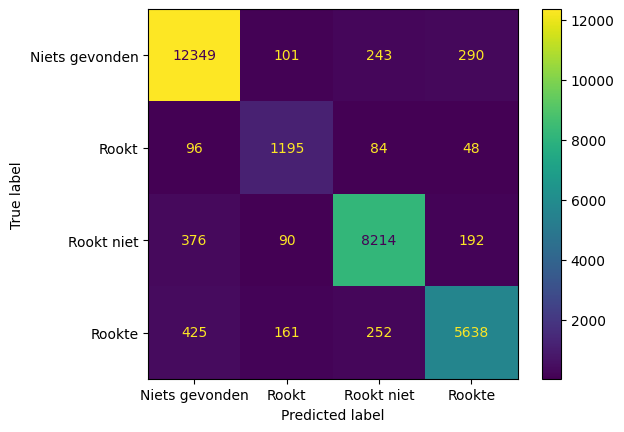

                precision    recall  f1-score   support

Niets gevonden       0.93      0.95      0.94     12983
         Rookt       0.77      0.84      0.80      1423
    Rookt niet       0.93      0.93      0.93      8872
        Rookte       0.91      0.87      0.89      6476

      accuracy                           0.92     29754
     macro avg       0.89      0.90      0.89     29754
  weighted avg       0.92      0.92      0.92     29754



In [22]:
# Ngram 3 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Random Forest

In [6]:
parameter_grid = {
                 'clf__n_estimators':        [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)],
                 'clf__criterion':           ['gini', 'entropy', 'log_loss'],
                 'clf__max_features':        ['sqrt', 'log2', None],
                 'clf__max_depth':           [2,3,4,5],
                 'clf__min_samples_split':   [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
                 'clf__min_samples_leaf':    [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
                 'clf__class_weight':        ['balanced', 'balanced_subsample'],
                 'clf__ccp_alpha':           sp_randFloat(),
                 'clf__max_samples':         [0.1, 0.2, 0.3],
                 'clf__max_leaf_nodes':      [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                 'tfidf__max_df':            [0.90, 0.95],
                 'tfidf__min_df':            [3, 5]
                 }

In [7]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

## Stopwords kept

0.5571687840290381


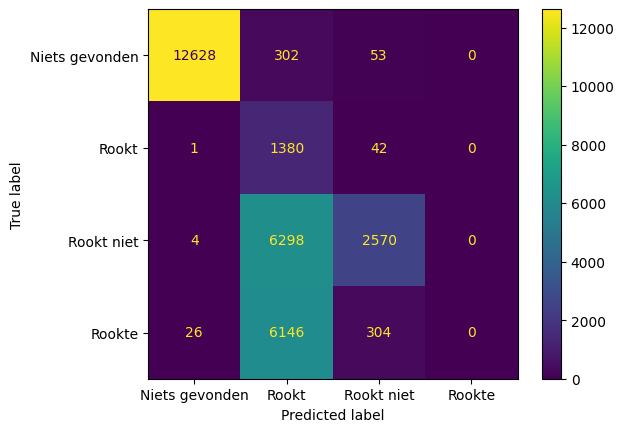

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Niets gevonden       1.00      0.97      0.98     12983
         Rookt       0.10      0.97      0.18      1423
    Rookt niet       0.87      0.29      0.43      8872
        Rookte       0.00      0.00      0.00      6476

      accuracy                           0.56     29754
     macro avg       0.49      0.56      0.40     29754
  weighted avg       0.70      0.56      0.57     29754



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# # Ngram 1 stopwords kept
# # pipeline = Pipeline([
# #     ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(1,1))),
# #     ('clf', RandomForestClassifier(verbose=3)),
# # ])
# # random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
# # random_search.fit(X_train, y_train)
# predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.6s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  57.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.2s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  54.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.2s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  54.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.3s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  54.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.2s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  54.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.5s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.542 total time=  52.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  51.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.403 total time=  52.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  52.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  51.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  53.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  51.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  52.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  52.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  50.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  51.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  51.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  51.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   32.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.626 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   33.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.667 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   32.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.627 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   32.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.5s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.668 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   32.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.629 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  51.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  52.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.4s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.5s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.3s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.8s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.900 total time= 4.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.1s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.902 total time= 4.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.5s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.8s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.900 total time= 4.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.8s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.900 total time= 4.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.7s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.902 total time= 4.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  51.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  51.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  52.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  51.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  51.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  51.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  51.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  52.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  52.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.9s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.3s finished


0.8785709484439067


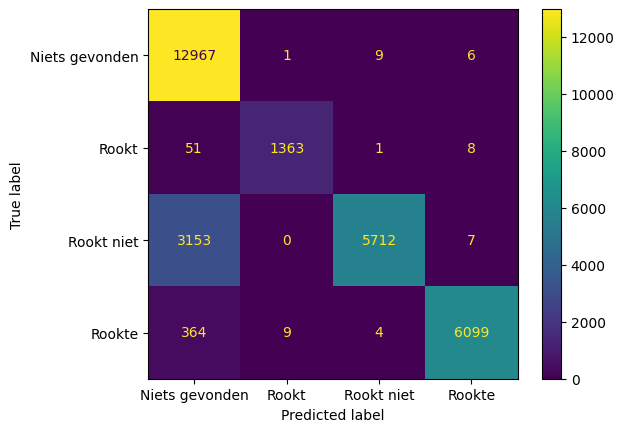

                precision    recall  f1-score   support

Niets gevonden       0.78      1.00      0.88     12983
         Rookt       0.99      0.96      0.97      1423
    Rookt niet       1.00      0.64      0.78      8872
        Rookte       1.00      0.94      0.97      6476

      accuracy                           0.88     29754
     macro avg       0.94      0.89      0.90     29754
  weighted avg       0.90      0.88      0.87     29754



In [8]:
# Ngram 2 stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(2,2))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.1s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  59.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.370 total time=  59.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  58.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  58.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  59.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   20.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   21.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   27.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time=  59.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  59.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  59.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.330 total time= 3.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.227 total time= 3.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.330 total time= 3.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.329 total time= 3.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.370 total time= 3.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  59.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  60.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  60.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time= 1.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   52.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   43.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.2s finished


0.5809639040129059


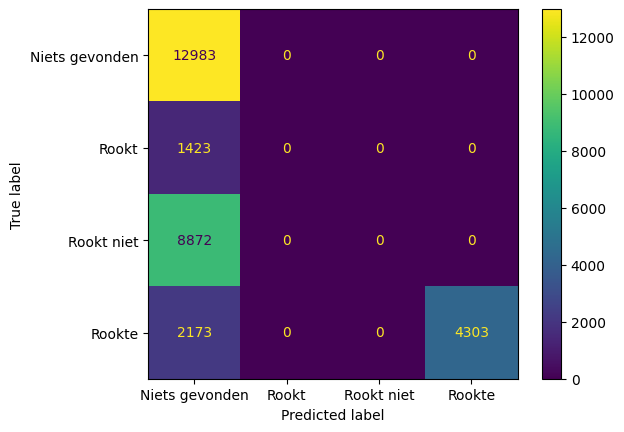

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Niets gevonden       0.51      1.00      0.68     12983
         Rookt       0.00      0.00      0.00      1423
    Rookt niet       0.00      0.00      0.00      8872
        Rookte       1.00      0.66      0.80      6476

      accuracy                           0.58     29754
     macro avg       0.38      0.42      0.37     29754
  weighted avg       0.44      0.58      0.47     29754



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Ngram 3 stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(3,3))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Only negation stopwords kept

In [8]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  23.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  23.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  23.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  23.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  23.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  23.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.211 total time=  23.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.210 total time=  23.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.463 total time=  23.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  22.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  22.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  22.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.210 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  40.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  39.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  40.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  39.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  40.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  23.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  23.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  23.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  23.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  24.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.397 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.7s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.395 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.7s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.398 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.7s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.397 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.7s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.604 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  23.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  23.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  23.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  23.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  23.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  22.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


0.5571687840290381


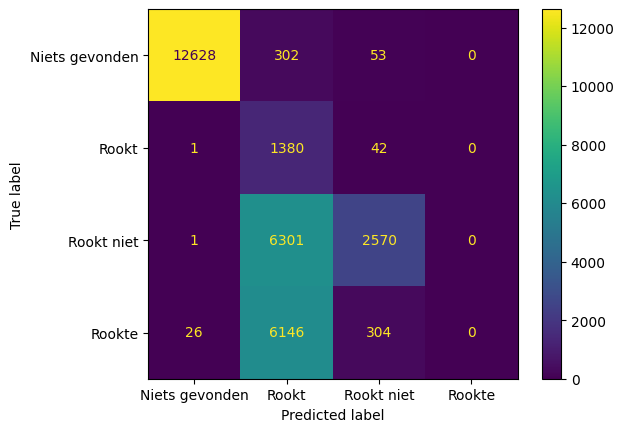

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Niets gevonden       1.00      0.97      0.99     12983
         Rookt       0.10      0.97      0.18      1423
    Rookt niet       0.87      0.29      0.43      8872
        Rookte       0.00      0.00      0.00      6476

      accuracy                           0.56     29754
     macro avg       0.49      0.56      0.40     29754
  weighted avg       0.70      0.56      0.57     29754



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Ngram 1 less stopwords 
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(1,1))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  44.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  44.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  44.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  44.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  44.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  43.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  43.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.686 total time=  43.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  43.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.369 total time=  43.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  44.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  44.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  43.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  43.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  43.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  42.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.370 total time=  42.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  43.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  43.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  42.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   22.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.346 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   22.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.347 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.385 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.383 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   24.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.384 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time=  43.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  43.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  43.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  43.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  43.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.829 total time= 3.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.5s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.833 total time= 3.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.830 total time= 3.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.826 total time= 3.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.832 total time= 3.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  43.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  48.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  43.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  43.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  43.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  44.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  44.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  44.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  43.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  43.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   56.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   58.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   57.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   59.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   57.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.2s finished


0.8174027021576931


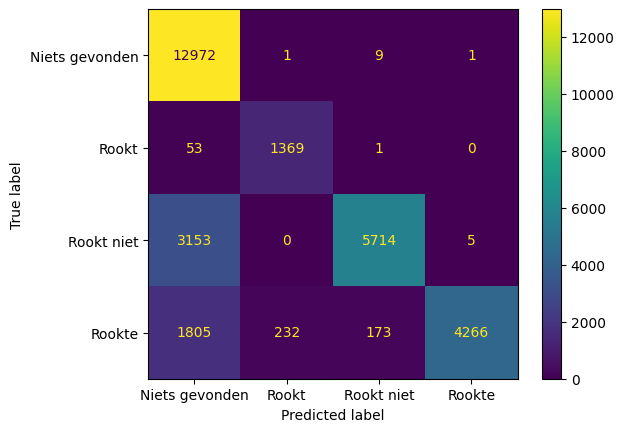

                precision    recall  f1-score   support

Niets gevonden       0.72      1.00      0.84     12983
         Rookt       0.85      0.96      0.91      1423
    Rookt niet       0.97      0.64      0.77      8872
        Rookte       1.00      0.66      0.79      6476

      accuracy                           0.82     29754
     macro avg       0.89      0.82      0.83     29754
  weighted avg       0.86      0.82      0.81     29754



In [12]:
# Ngram 2 less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(2,2))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  54.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  54.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  55.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  54.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  52.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  50.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  49.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  50.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  51.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  50.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  50.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  50.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  50.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  50.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  50.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  48.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  48.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  49.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  48.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  48.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   19.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   20.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   19.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  49.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  49.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  49.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  49.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  49.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 3.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time= 3.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 3.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time= 3.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 3.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  49.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  49.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  49.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  49.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  49.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  50.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  50.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   38.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   36.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   36.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   37.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


0.4363446931505008


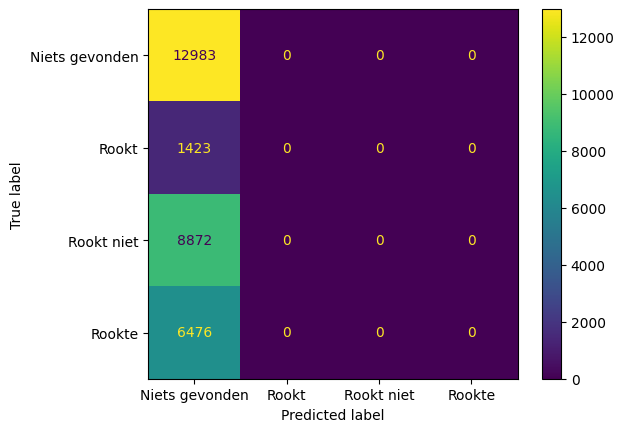

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Niets gevonden       0.44      1.00      0.61     12983
         Rookt       0.00      0.00      0.00      1423
    Rookt niet       0.00      0.00      0.00      8872
        Rookte       0.00      0.00      0.00      6476

      accuracy                           0.44     29754
     macro avg       0.11      0.25      0.15     29754
  weighted avg       0.19      0.44      0.27     29754



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Ngram 3 less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(3,3))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

## No stopwords

In [10]:
Corpus["text"] = Corpus["text"].apply(no_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  22.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  22.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  22.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.210 total time=  22.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  22.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  23.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  23.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  22.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  21.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  22.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  22.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.369 total time=  22.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.355 total time=  22.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  22.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  39.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time=  39.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  40.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  39.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  39.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  23.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  23.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.397 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.395 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.398 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.397 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.398 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  22.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  22.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  23.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  23.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  22.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  22.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  22.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  22.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   50.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   50.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   50.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   50.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.8s finished


0.5571687840290381


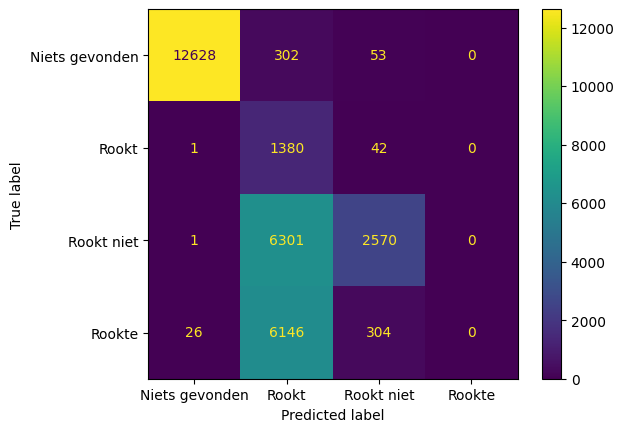

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Niets gevonden       1.00      0.97      0.99     12983
         Rookt       0.10      0.97      0.18      1423
    Rookt niet       0.87      0.29      0.43      8872
        Rookte       0.00      0.00      0.00      6476

      accuracy                           0.56     29754
     macro avg       0.49      0.56      0.40     29754
  weighted avg       0.70      0.56      0.57     29754



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Ngram 1 no stopwords 
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(1,1))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  46.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.1s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  46.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  45.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  45.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  45.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  43.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  42.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  43.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  43.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  42.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  43.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  43.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  42.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  43.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  43.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.369 total time=  42.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  42.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  41.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  41.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  41.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   23.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.346 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   23.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.384 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.385 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.346 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.384 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  42.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time=  42.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  42.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time=  43.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  42.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.829 total time= 3.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.833 total time= 3.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.830 total time= 3.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.826 total time= 3.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.832 total time= 3.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  43.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  43.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  43.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  43.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  43.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  44.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  43.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  43.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  43.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  43.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   57.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   55.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   59.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.9s finished


0.8174027021576931


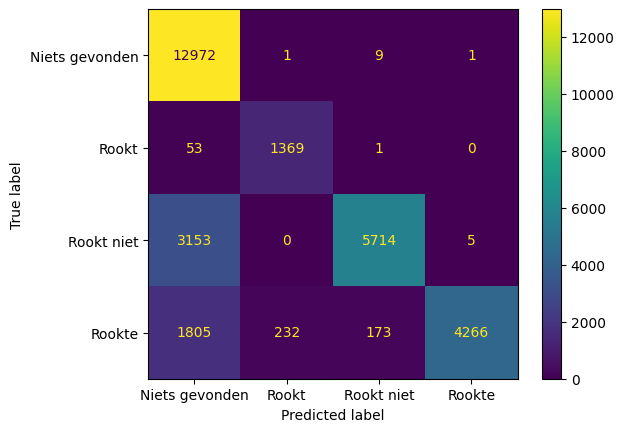

                precision    recall  f1-score   support

Niets gevonden       0.72      1.00      0.84     12983
         Rookt       0.85      0.96      0.91      1423
    Rookt niet       0.97      0.64      0.77      8872
        Rookte       1.00      0.66      0.79      6476

      accuracy                           0.82     29754
     macro avg       0.89      0.82      0.83     29754
  weighted avg       0.86      0.82      0.81     29754



In [12]:
# Ngram 2 no stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(2,2))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.7s finished


[CV 1/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  51.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished


[CV 2/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished


[CV 3/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished


[CV 4/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.6936795270051179, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=144, clf__min_samples_split=200, clf__n_estimators=32, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.152 total time=  51.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  49.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 2/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  49.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 3/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  49.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 4/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  48.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.2909355563345315, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__max_leaf_nodes=80, clf__max_samples=0.1, clf__min_samples_leaf=188, clf__min_samples_split=1000, clf__n_estimators=41, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time=  48.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  49.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  51.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  50.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  49.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.9652280483381238, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=3, clf__max_features=log2, clf__max_leaf_nodes=60, clf__max_samples=0.1, clf__min_samples_leaf=144, clf__min_samples_split=700, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time=  50.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 1/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  48.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 2/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time=  48.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 3/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  48.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 4/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  48.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


[CV 5/5] END clf__ccp_alpha=0.19738801741720557, clf__class_weight=balanced_subsample, clf__criterion=entropy, clf__max_depth=2, clf__max_features=sqrt, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=277, clf__min_samples_split=900, clf__n_estimators=23, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  48.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished


[CV 1/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.116 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 2/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 3/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.152 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 4/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 41


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished


[CV 5/5] END clf__ccp_alpha=0.661248096814272, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=None, clf__max_leaf_nodes=100, clf__max_samples=0.1, clf__min_samples_leaf=455, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 1/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  49.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 2/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.089 total time=  49.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 3/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  49.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 4/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  49.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s finished


[CV 5/5] END clf__ccp_alpha=0.2527955528897454, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=70, clf__max_samples=0.3, clf__min_samples_leaf=144, clf__min_samples_split=400, clf__n_estimators=41, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.022 total time=  49.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 1/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time= 2.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 2/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time= 2.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 3/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 3.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 4/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 3.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 45


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


building tree 2 of 45


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


[CV 5/5] END clf__ccp_alpha=0.10314551375085124, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=90, clf__max_samples=0.2, clf__min_samples_leaf=233, clf__min_samples_split=700, clf__n_estimators=45, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.116 total time= 2.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


[CV 1/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  49.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


[CV 2/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  50.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


[CV 3/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  49.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


[CV 4/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.116 total time=  49.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


[CV 5/5] END clf__ccp_alpha=0.6710686638981408, clf__class_weight=balanced, clf__criterion=entropy, clf__max_depth=2, clf__max_features=log2, clf__max_leaf_nodes=90, clf__max_samples=0.3, clf__min_samples_leaf=366, clf__min_samples_split=600, clf__n_estimators=50, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time=  48.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  49.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  49.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.022 total time=  50.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.5204998682261415, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__max_leaf_nodes=20, clf__max_samples=0.2, clf__min_samples_leaf=277, clf__min_samples_split=400, clf__n_estimators=14, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.089 total time=  50.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   34.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 1/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   34.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 2/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.089 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   35.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 3/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   37.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 4/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.022 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   32.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


[CV 5/5] END clf__ccp_alpha=0.28658617296069355, clf__class_weight=balanced, clf__criterion=gini, clf__max_depth=5, clf__max_features=None, clf__max_leaf_nodes=40, clf__max_samples=0.3, clf__min_samples_leaf=455, clf__min_samples_split=600, clf__n_estimators=18, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.152 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 18


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 18


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


0.047825502453451636


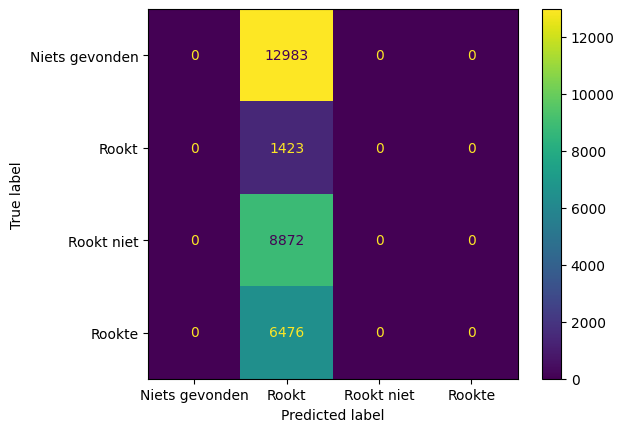

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Niets gevonden       0.00      0.00      0.00     12983
         Rookt       0.05      1.00      0.09      1423
    Rookt niet       0.00      0.00      0.00      8872
        Rookte       0.00      0.00      0.00      6476

      accuracy                           0.05     29754
     macro avg       0.01      0.25      0.02     29754
  weighted avg       0.00      0.05      0.00     29754



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Ngram 3 no stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-",  ngram_range=(3,3))),
    ('clf', RandomForestClassifier(verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Best model

In [8]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [9]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.92, NNZs: 535, Bias: 0.000000, T: 71408, Avg. loss: 0.327348
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 185.64, NNZs: 220, Bias: 0.000000, T: 142816, Avg. loss: 0.238536
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 226.74, NNZs: 170, Bias: 0.000000, T: 214224, Avg. loss: 0.208578
Total training time: 1.54 seconds.
-- Epoch 4
Norm: 260.87, NNZs: 148, Bias: 0.000000, T: 285632, Avg. loss: 0.191731
Total training time: 2.03 seconds.
-- Epoch 5
Norm: 290.53, NNZs: 135, Bias: 0.000000, T: 357040, Avg. loss: 0.179687
Total training time: 2.51 seconds.
-- Epoch 6
Norm: 316.95, NNZs: 125, Bias: 0.000000, T: 428448, Avg. loss: 0.171177
Total training time: 3.03 seconds.
-- Epoch 7
Norm: 321.63, NNZs: 123, Bias: 0.000000, T: 499856, Avg. loss: 0.167219
Total training time: 3.52 seconds.
-- Epoch 8
Norm: 326.22, NNZs: 120, Bias: 0.000000, T: 571264, Avg. loss: 0.165946
Total training time: 4.00 seconds.
-- Epoch 9
Norm: 330.75, NNZs: 117, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


Norm: 115.31, NNZs: 358, Bias: 0.000000, T: 71408, Avg. loss: 0.201948
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 159.17, NNZs: 150, Bias: 0.000000, T: 142816, Avg. loss: 0.141234
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 192.53, NNZs: 127, Bias: 0.000000, T: 214224, Avg. loss: 0.121987
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 219.67, NNZs: 107, Bias: 0.000000, T: 285632, Avg. loss: 0.111538
Total training time: 1.98 seconds.
-- Epoch 5
Norm: 242.87, NNZs: 96, Bias: 0.000000, T: 357040, Avg. loss: 0.105029
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 263.48, NNZs: 94, Bias: 0.000000, T: 428448, Avg. loss: 0.100877
Total training time: 2.96 seconds.
-- Epoch 7
Norm: 267.11, NNZs: 92, Bias: 0.000000, T: 499856, Avg. loss: 0.098468
Total training time: 3.44 seconds.
-- Epoch 8
Norm: 270.68, NNZs: 92, Bias: 0.000000, T: 571264, Avg. loss: 0.097986
Total training time: 3.90 seconds.
-- Epoch 9
Norm: 274.21, NNZs: 92, Bias: 0.000000, T: 642672, Avg. loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.8s remaining:    0.0s


Norm: 135.79, NNZs: 442, Bias: 0.000000, T: 71408, Avg. loss: 0.361295
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 192.70, NNZs: 167, Bias: 0.000000, T: 142816, Avg. loss: 0.250279
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 234.41, NNZs: 134, Bias: 0.000000, T: 214224, Avg. loss: 0.215673
Total training time: 1.58 seconds.
-- Epoch 4
Norm: 268.27, NNZs: 117, Bias: 0.000000, T: 285632, Avg. loss: 0.197005
Total training time: 2.11 seconds.
-- Epoch 5
Norm: 297.24, NNZs: 104, Bias: 0.000000, T: 357040, Avg. loss: 0.185397
Total training time: 2.65 seconds.
-- Epoch 6
Norm: 322.82, NNZs: 99, Bias: 0.000000, T: 428448, Avg. loss: 0.177514
Total training time: 3.19 seconds.
-- Epoch 7
Norm: 327.30, NNZs: 99, Bias: 0.000000, T: 499856, Avg. loss: 0.173547
Total training time: 3.72 seconds.
-- Epoch 8
Norm: 331.69, NNZs: 99, Bias: 0.000000, T: 571264, Avg. loss: 0.172489
Total training time: 4.25 seconds.
-- Epoch 9
Norm: 336.00, NNZs: 100, Bias: 0.000000, T: 642672, Avg. los

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   39.9s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.257 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.93, NNZs: 560, Bias: 0.000000, T: 71408, Avg. loss: 0.327734
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 185.56, NNZs: 224, Bias: 0.000000, T: 142816, Avg. loss: 0.238097
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 226.69, NNZs: 176, Bias: 0.000000, T: 214224, Avg. loss: 0.208591
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 260.93, NNZs: 154, Bias: 0.000000, T: 285632, Avg. loss: 0.191488
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 290.52, NNZs: 137, Bias: 0.000000, T: 357040, Avg. loss: 0.179832
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 316.97, NNZs: 130, Bias: 0.000000, T: 428448, Avg. loss: 0.171127
Total training time: 2.24 seconds.
-- Epoch 7
Norm: 321.64, NNZs: 127, Bias: 0.000000, T: 499856, Avg. loss: 0.167046
Total training time: 2.61 seconds.
-- Epoch 8
Norm: 326.23, NNZs: 124, Bias: 0.000000, T: 571264, Avg. loss: 0.165756
Total training time: 2.98 seconds.
-- Epoch 9
Norm: 330.74, NNZs: 120, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


Norm: 115.37, NNZs: 376, Bias: 0.000000, T: 71408, Avg. loss: 0.202956
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 159.03, NNZs: 150, Bias: 0.000000, T: 142816, Avg. loss: 0.142543
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 192.11, NNZs: 126, Bias: 0.000000, T: 214224, Avg. loss: 0.123660
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 219.08, NNZs: 106, Bias: 0.000000, T: 285632, Avg. loss: 0.113487
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 242.23, NNZs: 100, Bias: 0.000000, T: 357040, Avg. loss: 0.107158
Total training time: 1.93 seconds.
-- Epoch 6
Norm: 262.78, NNZs: 93, Bias: 0.000000, T: 428448, Avg. loss: 0.102962
Total training time: 2.33 seconds.
-- Epoch 7
Norm: 266.44, NNZs: 92, Bias: 0.000000, T: 499856, Avg. loss: 0.100841
Total training time: 2.78 seconds.
-- Epoch 8
Norm: 270.02, NNZs: 91, Bias: 0.000000, T: 571264, Avg. loss: 0.100233
Total training time: 3.23 seconds.
-- Epoch 9
Norm: 273.53, NNZs: 88, Bias: 0.000000, T: 642672, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s


Norm: 135.79, NNZs: 482, Bias: 0.000000, T: 71408, Avg. loss: 0.361539
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 192.68, NNZs: 161, Bias: 0.000000, T: 142816, Avg. loss: 0.250629
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 234.41, NNZs: 135, Bias: 0.000000, T: 214224, Avg. loss: 0.216063
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 268.31, NNZs: 121, Bias: 0.000000, T: 285632, Avg. loss: 0.197499
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 297.27, NNZs: 108, Bias: 0.000000, T: 357040, Avg. loss: 0.185902
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 322.85, NNZs: 104, Bias: 0.000000, T: 428448, Avg. loss: 0.177840
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 327.33, NNZs: 104, Bias: 0.000000, T: 499856, Avg. loss: 0.173998
Total training time: 2.53 seconds.
-- Epoch 8
Norm: 331.73, NNZs: 102, Bias: 0.000000, T: 571264, Avg. loss: 0.172930
Total training time: 2.88 seconds.
-- Epoch 9
Norm: 336.04, NNZs: 103, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.254 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.87, NNZs: 529, Bias: 0.000000, T: 71408, Avg. loss: 0.327576
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 185.44, NNZs: 223, Bias: 0.000000, T: 142816, Avg. loss: 0.239117
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 226.51, NNZs: 177, Bias: 0.000000, T: 214224, Avg. loss: 0.209857
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 260.67, NNZs: 150, Bias: 0.000000, T: 285632, Avg. loss: 0.192775
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 290.25, NNZs: 135, Bias: 0.000000, T: 357040, Avg. loss: 0.181060
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 316.68, NNZs: 124, Bias: 0.000000, T: 428448, Avg. loss: 0.172654
Total training time: 2.45 seconds.
-- Epoch 7
Norm: 321.34, NNZs: 123, Bias: 0.000000, T: 499856, Avg. loss: 0.168322
Total training time: 2.87 seconds.
-- Epoch 8
Norm: 325.94, NNZs: 121, Bias: 0.000000, T: 571264, Avg. loss: 0.167060
Total training time: 3.40 seconds.
-- Epoch 9
Norm: 330.44, NNZs: 118, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


Norm: 115.17, NNZs: 382, Bias: 0.000000, T: 71408, Avg. loss: 0.203439
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 159.52, NNZs: 146, Bias: 0.000000, T: 142816, Avg. loss: 0.143090
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 192.67, NNZs: 127, Bias: 0.000000, T: 214224, Avg. loss: 0.123722
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 219.77, NNZs: 110, Bias: 0.000000, T: 285632, Avg. loss: 0.113335
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 243.21, NNZs: 100, Bias: 0.000000, T: 357040, Avg. loss: 0.107085
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 263.88, NNZs: 96, Bias: 0.000000, T: 428448, Avg. loss: 0.102710
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 267.52, NNZs: 96, Bias: 0.000000, T: 499856, Avg. loss: 0.100320
Total training time: 2.84 seconds.
-- Epoch 8
Norm: 271.12, NNZs: 96, Bias: 0.000000, T: 571264, Avg. loss: 0.099925
Total training time: 3.25 seconds.
-- Epoch 9
Norm: 274.66, NNZs: 93, Bias: 0.000000, T: 642672, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.1s remaining:    0.0s


Norm: 135.84, NNZs: 473, Bias: 0.000000, T: 71408, Avg. loss: 0.362021
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 192.71, NNZs: 166, Bias: 0.000000, T: 142816, Avg. loss: 0.251278
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 234.44, NNZs: 136, Bias: 0.000000, T: 214224, Avg. loss: 0.216886
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 268.35, NNZs: 115, Bias: 0.000000, T: 285632, Avg. loss: 0.198311
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 297.37, NNZs: 106, Bias: 0.000000, T: 357040, Avg. loss: 0.186483
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 322.98, NNZs: 100, Bias: 0.000000, T: 428448, Avg. loss: 0.178394
Total training time: 2.47 seconds.
-- Epoch 7
Norm: 327.45, NNZs: 100, Bias: 0.000000, T: 499856, Avg. loss: 0.174430
Total training time: 2.89 seconds.
-- Epoch 8
Norm: 331.85, NNZs: 98, Bias: 0.000000, T: 571264, Avg. loss: 0.173299
Total training time: 3.33 seconds.
-- Epoch 9
Norm: 336.17, NNZs: 97, Bias: 0.000000, T: 642672, Avg. lo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.267 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 131.05, NNZs: 545, Bias: 0.000000, T: 71408, Avg. loss: 0.326190
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 185.54, NNZs: 227, Bias: 0.000000, T: 142816, Avg. loss: 0.237586
Total training time: 1.56 seconds.
-- Epoch 3
Norm: 226.70, NNZs: 179, Bias: 0.000000, T: 214224, Avg. loss: 0.208056
Total training time: 2.39 seconds.
-- Epoch 4
Norm: 260.85, NNZs: 153, Bias: 0.000000, T: 285632, Avg. loss: 0.191151
Total training time: 3.18 seconds.
-- Epoch 5
Norm: 290.49, NNZs: 141, Bias: 0.000000, T: 357040, Avg. loss: 0.179432
Total training time: 3.78 seconds.
-- Epoch 6
Norm: 316.97, NNZs: 129, Bias: 0.000000, T: 428448, Avg. loss: 0.171144
Total training time: 4.19 seconds.
-- Epoch 7
Norm: 321.62, NNZs: 125, Bias: 0.000000, T: 499856, Avg. loss: 0.166707
Total training time: 4.72 seconds.
-- Epoch 8
Norm: 326.21, NNZs: 123, Bias: 0.000000, T: 571264, Avg. loss: 0.165469
Total training time: 5.15 seconds.
-- Epoch 9
Norm: 330.72, NNZs: 122, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


Norm: 115.43, NNZs: 384, Bias: 0.000000, T: 71408, Avg. loss: 0.202474
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 159.47, NNZs: 145, Bias: 0.000000, T: 142816, Avg. loss: 0.141661
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 192.60, NNZs: 128, Bias: 0.000000, T: 214224, Avg. loss: 0.122361
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 219.74, NNZs: 112, Bias: 0.000000, T: 285632, Avg. loss: 0.111867
Total training time: 1.97 seconds.
-- Epoch 5
Norm: 243.02, NNZs: 101, Bias: 0.000000, T: 357040, Avg. loss: 0.105654
Total training time: 2.39 seconds.
-- Epoch 6
Norm: 263.58, NNZs: 92, Bias: 0.000000, T: 428448, Avg. loss: 0.101310
Total training time: 2.88 seconds.
-- Epoch 7
Norm: 267.24, NNZs: 92, Bias: 0.000000, T: 499856, Avg. loss: 0.099209
Total training time: 3.38 seconds.
-- Epoch 8
Norm: 270.85, NNZs: 92, Bias: 0.000000, T: 571264, Avg. loss: 0.098672
Total training time: 3.82 seconds.
-- Epoch 9
Norm: 274.38, NNZs: 92, Bias: 0.000000, T: 642672, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.8s remaining:    0.0s


Norm: 135.90, NNZs: 424, Bias: 0.000000, T: 71408, Avg. loss: 0.361997
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 192.96, NNZs: 171, Bias: 0.000000, T: 142816, Avg. loss: 0.250222
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 234.73, NNZs: 139, Bias: 0.000000, T: 214224, Avg. loss: 0.215625
Total training time: 1.61 seconds.
-- Epoch 4
Norm: 268.53, NNZs: 118, Bias: 0.000000, T: 285632, Avg. loss: 0.196882
Total training time: 2.05 seconds.
-- Epoch 5
Norm: 297.50, NNZs: 109, Bias: 0.000000, T: 357040, Avg. loss: 0.185219
Total training time: 2.47 seconds.
-- Epoch 6
Norm: 323.10, NNZs: 102, Bias: 0.000000, T: 428448, Avg. loss: 0.177215
Total training time: 2.98 seconds.
-- Epoch 7
Norm: 327.57, NNZs: 103, Bias: 0.000000, T: 499856, Avg. loss: 0.173469
Total training time: 3.44 seconds.
-- Epoch 8
Norm: 331.96, NNZs: 103, Bias: 0.000000, T: 571264, Avg. loss: 0.172367
Total training time: 3.87 seconds.
-- Epoch 9
Norm: 336.26, NNZs: 101, Bias: 0.000000, T: 642672, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   48.1s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.261 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 130.73, NNZs: 546, Bias: 0.000000, T: 71409, Avg. loss: 0.328224
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 185.11, NNZs: 214, Bias: 0.000000, T: 142818, Avg. loss: 0.239665
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 226.36, NNZs: 175, Bias: 0.000000, T: 214227, Avg. loss: 0.210372
Total training time: 2.22 seconds.
-- Epoch 4
Norm: 260.45, NNZs: 144, Bias: 0.000000, T: 285636, Avg. loss: 0.192719
Total training time: 3.17 seconds.
-- Epoch 5
Norm: 290.01, NNZs: 136, Bias: 0.000000, T: 357045, Avg. loss: 0.181145
Total training time: 4.10 seconds.
-- Epoch 6
Norm: 316.47, NNZs: 121, Bias: 0.000000, T: 428454, Avg. loss: 0.172871
Total training time: 5.01 seconds.
-- Epoch 7
Norm: 321.12, NNZs: 117, Bias: 0.000000, T: 499863, Avg. loss: 0.168448
Total training time: 5.91 seconds.
-- Epoch 8
Norm: 325.71, NNZs: 117, Bias: 0.000000, T: 571272, Avg. loss: 0.167155
Total training time: 6.76 seconds.
-- Epoch 9
Norm: 330.22, NNZs: 116, Bias: 0.000000, T: 64

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s


Norm: 115.39, NNZs: 373, Bias: 0.000000, T: 71409, Avg. loss: 0.203258
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 159.39, NNZs: 144, Bias: 0.000000, T: 142818, Avg. loss: 0.142522
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 192.43, NNZs: 124, Bias: 0.000000, T: 214227, Avg. loss: 0.123340
Total training time: 1.56 seconds.
-- Epoch 4
Norm: 219.46, NNZs: 109, Bias: 0.000000, T: 285636, Avg. loss: 0.112940
Total training time: 2.08 seconds.
-- Epoch 5
Norm: 242.76, NNZs: 101, Bias: 0.000000, T: 357045, Avg. loss: 0.106586
Total training time: 2.58 seconds.
-- Epoch 6
Norm: 263.35, NNZs: 93, Bias: 0.000000, T: 428454, Avg. loss: 0.102397
Total training time: 3.14 seconds.
-- Epoch 7
Norm: 267.02, NNZs: 93, Bias: 0.000000, T: 499863, Avg. loss: 0.100302
Total training time: 3.65 seconds.
-- Epoch 8
Norm: 270.62, NNZs: 93, Bias: 0.000000, T: 571272, Avg. loss: 0.099659
Total training time: 4.31 seconds.
-- Epoch 9
Norm: 274.15, NNZs: 93, Bias: 0.000000, T: 642681, Avg. loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.0s remaining:    0.0s


Norm: 135.75, NNZs: 453, Bias: 0.000000, T: 71409, Avg. loss: 0.361795
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 192.58, NNZs: 163, Bias: 0.000000, T: 142818, Avg. loss: 0.250785
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 234.32, NNZs: 134, Bias: 0.000000, T: 214227, Avg. loss: 0.216537
Total training time: 1.66 seconds.
-- Epoch 4
Norm: 268.17, NNZs: 114, Bias: 0.000000, T: 285636, Avg. loss: 0.198193
Total training time: 2.13 seconds.
-- Epoch 5
Norm: 297.08, NNZs: 108, Bias: 0.000000, T: 357045, Avg. loss: 0.186422
Total training time: 2.56 seconds.
-- Epoch 6
Norm: 322.58, NNZs: 99, Bias: 0.000000, T: 428454, Avg. loss: 0.178404
Total training time: 3.22 seconds.
-- Epoch 7
Norm: 327.05, NNZs: 99, Bias: 0.000000, T: 499863, Avg. loss: 0.174546
Total training time: 3.71 seconds.
-- Epoch 8
Norm: 331.43, NNZs: 99, Bias: 0.000000, T: 571272, Avg. loss: 0.173495
Total training time: 4.29 seconds.
-- Epoch 9
Norm: 335.74, NNZs: 97, Bias: 0.000000, T: 642681, Avg. loss

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   50.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.264 total time= 2.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 82819635871245.58, NNZs: 489282, Bias: 0.000000, T: 71408, Avg. loss: 50436174712755225362432.000000
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 77427777616864.78, NNZs: 489283, Bias: 0.000000, T: 142816, Avg. loss: 59691887762314381754368.000000
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 74644745981929.55, NNZs: 489283, Bias: 0.000000, T: 214224, Avg. loss: 48819939449504423477248.000000
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 72803099642660.19, NNZs: 489283, Bias: 0.000000, T: 285632, Avg. loss: 43799711522406279413760.000000
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 71437462755078.00, NNZs: 489283, Bias: 0.000000, T: 357040, Avg. loss: 40696191484266790518784.000000
Total training time: 1.96 seconds.
-- Epoch 6
Norm: 70359564127220.39, NNZs: 489283, Bias: 0.000000, T: 428448, Avg. loss: 38475039295156476968960.000000
Total training time: 2.37 seconds.
Convergence after 6 epochs took 2.40 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 79829980463190.62, NNZs: 489281, Bias: 0.000000, T: 71408, Avg. loss: 45302242770425131040768.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 74642905214887.70, NNZs: 489283, Bias: 0.000000, T: 142816, Avg. loss: 54908081707035868004352.000000
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 71974481109526.56, NNZs: 489283, Bias: 0.000000, T: 214224, Avg. loss: 44930568682112869728256.000000
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 70198824461403.19, NNZs: 489283, Bias: 0.000000, T: 285632, Avg. loss: 40307379966408765997056.000000
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 68885472772171.01, NNZs: 489283, Bias: 0.000000, T: 357040, Avg. loss: 37436337670868313309184.000000
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 67849527415185.43, NNZs: 489283, Bias: 0.000000, T: 428448, Avg. loss: 35416397040908243042304.000000
Total training time: 2.30 seconds.
Convergence after 6 epochs took 2.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


Norm: 77557905002336.61, NNZs: 489282, Bias: 0.000000, T: 71408, Avg. loss: 44104675744130363555840.000000
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 72396600068804.56, NNZs: 489283, Bias: 0.000000, T: 142816, Avg. loss: 52307525642365047930880.000000
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 69746283804790.46, NNZs: 489283, Bias: 0.000000, T: 214224, Avg. loss: 42676633843294781046784.000000
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 67975917822598.55, NNZs: 489283, Bias: 0.000000, T: 285632, Avg. loss: 38222970623505207394304.000000
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 66665016249246.79, NNZs: 489283, Bias: 0.000000, T: 357040, Avg. loss: 35458561954250334666752.000000
Total training time: 1.60 seconds.
-- Epoch 6
Norm: 65629647015984.30, NNZs: 489283, Bias: 0.000000, T: 428448, Avg. loss: 33525354694490047119360.000000
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.00 seconds
-- Epoch 1
Norm: 96400119535349.94, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.229 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 77687466535948.61, NNZs: 489125, Bias: 0.000000, T: 71408, Avg. loss: 43072175895179469783040.000000
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 72561605750065.39, NNZs: 489126, Bias: 0.000000, T: 142816, Avg. loss: 52396718288446028775424.000000
Total training time: 0.65 seconds.
-- Epoch 3
Norm: 69909030427659.35, NNZs: 489126, Bias: 0.000000, T: 214224, Avg. loss: 42814622848858317651968.000000
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 68151515646520.70, NNZs: 489126, Bias: 0.000000, T: 285632, Avg. loss: 38386362570955877777408.000000
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 66847678901284.34, NNZs: 489126, Bias: 0.000000, T: 357040, Avg. loss: 35641332074729521020928.000000
Total training time: 1.72 seconds.
-- Epoch 6
Norm: 65820220994269.99, NNZs: 489126, Bias: 0.000000, T: 428448, Avg. loss: 33687287037749113126912.000000
Total training time: 2.07 seconds.
Convergence after 6 epochs took 2.10 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


Norm: 94155756927143.22, NNZs: 489126, Bias: 0.000000, T: 71408, Avg. loss: 60849126033153719271424.000000
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 88529137761817.56, NNZs: 489126, Bias: 0.000000, T: 142816, Avg. loss: 77481389672781215432704.000000
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 85628587551674.70, NNZs: 489126, Bias: 0.000000, T: 214224, Avg. loss: 64461715406000742203392.000000
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 83698357221800.52, NNZs: 489126, Bias: 0.000000, T: 285632, Avg. loss: 58404552428025592938496.000000
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 82267375169367.38, NNZs: 489126, Bias: 0.000000, T: 357040, Avg. loss: 54598609316605652369408.000000
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 81133092830178.94, NNZs: 489126, Bias: 0.000000, T: 428448, Avg. loss: 51901236109309705715712.000000
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.63 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


Norm: 94743747860218.72, NNZs: 489125, Bias: 0.000000, T: 71408, Avg. loss: 61305468287997083385856.000000
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 89101720161737.70, NNZs: 489126, Bias: 0.000000, T: 142816, Avg. loss: 79587203414509842595840.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 86175690612739.62, NNZs: 489126, Bias: 0.000000, T: 214224, Avg. loss: 66345683994235023392768.000000
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 84233932480097.78, NNZs: 489126, Bias: 0.000000, T: 285632, Avg. loss: 60066050091337402810368.000000
Total training time: 1.20 seconds.
-- Epoch 5
Norm: 82789855550575.84, NNZs: 489126, Bias: 0.000000, T: 357040, Avg. loss: 56216001076958949539840.000000
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 81649812881328.64, NNZs: 489126, Bias: 0.000000, T: 428448, Avg. loss: 53468800717529513197568.000000
Total training time: 2.01 seconds.
Convergence after 6 epochs took 2.04 seconds
-- Epoch 1
Norm: 78608417540555.75, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.228 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 89146983857298.44, NNZs: 490443, Bias: 0.000000, T: 71408, Avg. loss: 55421019535225233866752.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 83651549346048.59, NNZs: 490445, Bias: 0.000000, T: 142816, Avg. loss: 70220287845111458430976.000000
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 80820115805509.27, NNZs: 490445, Bias: 0.000000, T: 214224, Avg. loss: 58104446795032618336256.000000
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 78937711376293.62, NNZs: 490445, Bias: 0.000000, T: 285632, Avg. loss: 52494932113471028854784.000000
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 77538754701125.05, NNZs: 490445, Bias: 0.000000, T: 357040, Avg. loss: 48975996102014840864768.000000
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 76431224184689.70, NNZs: 490445, Bias: 0.000000, T: 428448, Avg. loss: 46481450607174123257856.000000
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.82 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 87892690100765.73, NNZs: 490445, Bias: 0.000000, T: 71408, Avg. loss: 53905318354677791719424.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 82493001367703.08, NNZs: 490445, Bias: 0.000000, T: 142816, Avg. loss: 67606965489309637935104.000000
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 79708552944707.44, NNZs: 490445, Bias: 0.000000, T: 214224, Avg. loss: 55986127062992573956096.000000
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 77861770803004.33, NNZs: 490445, Bias: 0.000000, T: 285632, Avg. loss: 50565714451157749858304.000000
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 76490834907366.73, NNZs: 490445, Bias: 0.000000, T: 357040, Avg. loss: 47208624515648053051392.000000
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 75407409028310.77, NNZs: 490445, Bias: 0.000000, T: 428448, Avg. loss: 44816166505182920704000.000000
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.73 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 93454655561533.12, NNZs: 490445, Bias: 0.000000, T: 71408, Avg. loss: 58035389688107933630464.000000
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 87888471881806.52, NNZs: 490445, Bias: 0.000000, T: 142816, Avg. loss: 76348647088070366068736.000000
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 85018844612080.88, NNZs: 490445, Bias: 0.000000, T: 214224, Avg. loss: 63631465974391522721792.000000
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 83113614468107.23, NNZs: 490445, Bias: 0.000000, T: 285632, Avg. loss: 57719268979021868695552.000000
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 81694589410213.05, NNZs: 490445, Bias: 0.000000, T: 357040, Avg. loss: 54006883007076256186368.000000
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 80573381098509.83, NNZs: 490445, Bias: 0.000000, T: 428448, Avg. loss: 51389868696444501753856.000000
Total training time: 1.70 seconds.
Convergence after 6 epochs took 1.73 seconds
-- Epoch 1
Norm: 58501686329864.53, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.230 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 71139136347118.33, NNZs: 489644, Bias: 0.000000, T: 71408, Avg. loss: 37426967098734711668736.000000
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 66177147899278.09, NNZs: 489646, Bias: 0.000000, T: 142816, Avg. loss: 43561239556247148036096.000000
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 63621928626728.07, NNZs: 489646, Bias: 0.000000, T: 214224, Avg. loss: 35206664187829460926464.000000
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 61931282773599.29, NNZs: 489646, Bias: 0.000000, T: 285632, Avg. loss: 31349651272575586664448.000000
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 60681549779652.88, NNZs: 489646, Bias: 0.000000, T: 357040, Avg. loss: 28943450725941428355072.000000
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 59691754622807.13, NNZs: 489646, Bias: 0.000000, T: 428448, Avg. loss: 27281434039869172088832.000000
Total training time: 1.76 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


Norm: 85087700160699.30, NNZs: 489645, Bias: 0.000000, T: 71408, Avg. loss: 49032419338311872544768.000000
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 79741559297367.08, NNZs: 489646, Bias: 0.000000, T: 142816, Avg. loss: 62698266770565792530432.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 76972958657179.03, NNZs: 489646, Bias: 0.000000, T: 214224, Avg. loss: 51787131106128056811520.000000
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 75143011353004.52, NNZs: 489646, Bias: 0.000000, T: 285632, Avg. loss: 46629124311356589211648.000000
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 73782686833046.94, NNZs: 489646, Bias: 0.000000, T: 357040, Avg. loss: 43458974875115910594560.000000
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 72708453898424.78, NNZs: 489646, Bias: 0.000000, T: 428448, Avg. loss: 41223433309173917417472.000000
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


Norm: 75418189095927.66, NNZs: 489645, Bias: 0.000000, T: 71408, Avg. loss: 40973772362234242007040.000000
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 70314044011886.96, NNZs: 489646, Bias: 0.000000, T: 142816, Avg. loss: 49218820495093679521792.000000
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 67688394755499.33, NNZs: 489646, Bias: 0.000000, T: 214224, Avg. loss: 40022162247649924743168.000000
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 65952525013504.83, NNZs: 489646, Bias: 0.000000, T: 285632, Avg. loss: 35745484423014077431808.000000
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 64665133619411.16, NNZs: 489646, Bias: 0.000000, T: 357040, Avg. loss: 33112466217905359421440.000000
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 63647858095369.08, NNZs: 489646, Bias: 0.000000, T: 428448, Avg. loss: 31252178367790064861184.000000
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1
Norm: 76180847385842.33, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.2s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.227 total time=  56.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 95510698570427.77, NNZs: 489177, Bias: 0.000000, T: 71409, Avg. loss: 64059136676404266008576.000000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 89839506688805.39, NNZs: 489177, Bias: 0.000000, T: 142818, Avg. loss: 80789442394828912459776.000000
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 86905138429648.80, NNZs: 489177, Bias: 0.000000, T: 214227, Avg. loss: 67353122452480922222592.000000
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 84953966060185.66, NNZs: 489177, Bias: 0.000000, T: 285636, Avg. loss: 61085996457395241353216.000000
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 83505369954699.48, NNZs: 489177, Bias: 0.000000, T: 357045, Avg. loss: 57136896444149790670848.000000
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 82362982455509.92, NNZs: 489177, Bias: 0.000000, T: 428454, Avg. loss: 54334807832255837241344.000000
Total training time: 2.60 seconds.
Convergence after 6 epochs took 2.64 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 86749597788290.88, NNZs: 489171, Bias: 0.000000, T: 71409, Avg. loss: 53989020152404927053824.000000
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 81307092549761.88, NNZs: 489177, Bias: 0.000000, T: 142818, Avg. loss: 65243965260665142116352.000000
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 78511760552509.67, NNZs: 489177, Bias: 0.000000, T: 214227, Avg. loss: 53783672374011304607744.000000
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 76656813530199.14, NNZs: 489177, Bias: 0.000000, T: 285636, Avg. loss: 48504192694896050569216.000000
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 75276717488828.05, NNZs: 489177, Bias: 0.000000, T: 357045, Avg. loss: 45193973679045839159296.000000
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 74187580193013.27, NNZs: 489177, Bias: 0.000000, T: 428454, Avg. loss: 42861397007587942072320.000000
Total training time: 2.29 seconds.
Convergence after 6 epochs took 2.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


Norm: 84347663494919.70, NNZs: 489177, Bias: 0.000000, T: 71409, Avg. loss: 49981216626057068675072.000000
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 79018139568968.39, NNZs: 489177, Bias: 0.000000, T: 142818, Avg. loss: 61974660838632238088192.000000
Total training time: 1.23 seconds.
-- Epoch 3
Norm: 76255813626865.20, NNZs: 489177, Bias: 0.000000, T: 214227, Avg. loss: 51070452752055556636672.000000
Total training time: 1.91 seconds.
-- Epoch 4
Norm: 74422426223176.72, NNZs: 489177, Bias: 0.000000, T: 285636, Avg. loss: 46002389272486253428736.000000
Total training time: 2.55 seconds.
-- Epoch 5
Norm: 73061229623804.66, NNZs: 489177, Bias: 0.000000, T: 357045, Avg. loss: 42840522062425929809920.000000
Total training time: 3.18 seconds.
-- Epoch 6
Norm: 71986183462177.09, NNZs: 489177, Bias: 0.000000, T: 428454, Avg. loss: 40611282630839103389696.000000
Total training time: 3.79 seconds.
Convergence after 6 epochs took 3.85 seconds
-- Epoch 1
Norm: 80207920223625.67, NNZs: 4

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.231 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.65, NNZs: 982, Bias: 0.000000, T: 71408, Avg. loss: 0.149634
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 257.39, NNZs: 277, Bias: 0.000000, T: 142816, Avg. loss: 0.088446
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 299.01, NNZs: 242, Bias: 0.000000, T: 214224, Avg. loss: 0.077180
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 333.15, NNZs: 217, Bias: 0.000000, T: 285632, Avg. loss: 0.071810
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 362.58, NNZs: 202, Bias: 0.000000, T: 357040, Avg. loss: 0.068387
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 389.00, NNZs: 192, Bias: 0.000000, T: 428448, Avg. loss: 0.066260
Total training time: 2.13 seconds.
Convergence after 6 epochs took 2.17 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


Norm: 148.22, NNZs: 600, Bias: 0.000000, T: 71408, Avg. loss: 0.084566
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 191.61, NNZs: 198, Bias: 0.000000, T: 142816, Avg. loss: 0.052652
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 224.24, NNZs: 183, Bias: 0.000000, T: 214224, Avg. loss: 0.047425
Total training time: 0.98 seconds.
-- Epoch 4
Norm: 251.43, NNZs: 183, Bias: 0.000000, T: 285632, Avg. loss: 0.045144
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 275.24, NNZs: 179, Bias: 0.000000, T: 357040, Avg. loss: 0.043486
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 296.77, NNZs: 179, Bias: 0.000000, T: 428448, Avg. loss: 0.042836
Total training time: 2.07 seconds.
Convergence after 6 epochs took 2.14 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


Norm: 208.26, NNZs: 941, Bias: 0.000000, T: 71408, Avg. loss: 0.168686
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 267.46, NNZs: 251, Bias: 0.000000, T: 142816, Avg. loss: 0.106221
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 311.83, NNZs: 222, Bias: 0.000000, T: 214224, Avg. loss: 0.099684
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 348.90, NNZs: 212, Bias: 0.000000, T: 285632, Avg. loss: 0.096827
Total training time: 1.25 seconds.
-- Epoch 5
Norm: 381.68, NNZs: 205, Bias: 0.000000, T: 357040, Avg. loss: 0.095281
Total training time: 1.52 seconds.
-- Epoch 6
Norm: 411.36, NNZs: 198, Bias: 0.000000, T: 428448, Avg. loss: 0.094322
Total training time: 1.79 seconds.
Convergence after 6 epochs took 1.82 seconds
-- Epoch 1
Norm: 180.24, NNZs: 797, Bias: 0.000000, T: 71408, Avg. loss: 0.126024
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 233.16, NNZs: 273, Bias: 0.000000, T: 142816, Avg. loss: 0.086710
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 273.31,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.978 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.93, NNZs: 912, Bias: 0.000000, T: 71408, Avg. loss: 0.149805
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 257.93, NNZs: 267, Bias: 0.000000, T: 142816, Avg. loss: 0.088911
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 299.67, NNZs: 230, Bias: 0.000000, T: 214224, Avg. loss: 0.077351
Total training time: 1.74 seconds.
-- Epoch 4
Norm: 333.76, NNZs: 208, Bias: 0.000000, T: 285632, Avg. loss: 0.071919
Total training time: 2.31 seconds.
-- Epoch 5
Norm: 363.38, NNZs: 208, Bias: 0.000000, T: 357040, Avg. loss: 0.068566
Total training time: 2.91 seconds.
-- Epoch 6
Norm: 389.85, NNZs: 198, Bias: 0.000000, T: 428448, Avg. loss: 0.066581
Total training time: 3.50 seconds.
Convergence after 6 epochs took 3.58 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Norm: 148.44, NNZs: 586, Bias: 0.000000, T: 71408, Avg. loss: 0.085148
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 192.18, NNZs: 196, Bias: 0.000000, T: 142816, Avg. loss: 0.053755
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 224.96, NNZs: 179, Bias: 0.000000, T: 214224, Avg. loss: 0.048242
Total training time: 1.75 seconds.
-- Epoch 4
Norm: 252.14, NNZs: 171, Bias: 0.000000, T: 285632, Avg. loss: 0.045623
Total training time: 2.39 seconds.
-- Epoch 5
Norm: 275.96, NNZs: 168, Bias: 0.000000, T: 357040, Avg. loss: 0.044168
Total training time: 3.00 seconds.
-- Epoch 6
Norm: 297.67, NNZs: 164, Bias: 0.000000, T: 428448, Avg. loss: 0.043601
Total training time: 3.66 seconds.
Convergence after 6 epochs took 3.74 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


Norm: 208.34, NNZs: 1034, Bias: 0.000000, T: 71408, Avg. loss: 0.169080
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 267.97, NNZs: 243, Bias: 0.000000, T: 142816, Avg. loss: 0.107906
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 312.57, NNZs: 219, Bias: 0.000000, T: 214224, Avg. loss: 0.101974
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 349.87, NNZs: 209, Bias: 0.000000, T: 285632, Avg. loss: 0.098852
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 382.84, NNZs: 206, Bias: 0.000000, T: 357040, Avg. loss: 0.097687
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 412.72, NNZs: 200, Bias: 0.000000, T: 428448, Avg. loss: 0.096334
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.51 seconds
-- Epoch 1
Norm: 180.32, NNZs: 835, Bias: 0.000000, T: 71408, Avg. loss: 0.126751
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 233.51, NNZs: 265, Bias: 0.000000, T: 142816, Avg. loss: 0.087193
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 273.70

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s finished


[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.981 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.70, NNZs: 940, Bias: 0.000000, T: 71408, Avg. loss: 0.149936
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 257.46, NNZs: 279, Bias: 0.000000, T: 142816, Avg. loss: 0.088475
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 299.12, NNZs: 231, Bias: 0.000000, T: 214224, Avg. loss: 0.077328
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 333.34, NNZs: 210, Bias: 0.000000, T: 285632, Avg. loss: 0.072207
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 362.94, NNZs: 192, Bias: 0.000000, T: 357040, Avg. loss: 0.069292
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 389.49, NNZs: 196, Bias: 0.000000, T: 428448, Avg. loss: 0.067344
Total training time: 2.44 seconds.
Convergence after 6 epochs took 2.51 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


Norm: 148.73, NNZs: 536, Bias: 0.000000, T: 71408, Avg. loss: 0.085086
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 192.60, NNZs: 202, Bias: 0.000000, T: 142816, Avg. loss: 0.053396
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 225.10, NNZs: 188, Bias: 0.000000, T: 214224, Avg. loss: 0.047669
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 252.32, NNZs: 181, Bias: 0.000000, T: 285632, Avg. loss: 0.045278
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 276.21, NNZs: 169, Bias: 0.000000, T: 357040, Avg. loss: 0.044113
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 297.76, NNZs: 171, Bias: 0.000000, T: 428448, Avg. loss: 0.043236
Total training time: 1.97 seconds.
Convergence after 6 epochs took 2.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


Norm: 208.41, NNZs: 970, Bias: 0.000000, T: 71408, Avg. loss: 0.169326
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 267.86, NNZs: 257, Bias: 0.000000, T: 142816, Avg. loss: 0.107082
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 312.37, NNZs: 225, Bias: 0.000000, T: 214224, Avg. loss: 0.100907
Total training time: 1.72 seconds.
-- Epoch 4
Norm: 349.51, NNZs: 214, Bias: 0.000000, T: 285632, Avg. loss: 0.097954
Total training time: 2.31 seconds.
-- Epoch 5
Norm: 382.28, NNZs: 209, Bias: 0.000000, T: 357040, Avg. loss: 0.096166
Total training time: 2.92 seconds.
-- Epoch 6
Norm: 411.97, NNZs: 199, Bias: 0.000000, T: 428448, Avg. loss: 0.095504
Total training time: 3.51 seconds.
Convergence after 6 epochs took 3.55 seconds
-- Epoch 1
Norm: 179.66, NNZs: 820, Bias: 0.000000, T: 71408, Avg. loss: 0.125192
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 232.56, NNZs: 257, Bias: 0.000000, T: 142816, Avg. loss: 0.087022
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 272.74,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.979 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.98, NNZs: 962, Bias: 0.000000, T: 71408, Avg. loss: 0.150393
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 257.75, NNZs: 265, Bias: 0.000000, T: 142816, Avg. loss: 0.088041
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 299.47, NNZs: 231, Bias: 0.000000, T: 214224, Avg. loss: 0.076562
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 333.45, NNZs: 207, Bias: 0.000000, T: 285632, Avg. loss: 0.071105
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 362.80, NNZs: 203, Bias: 0.000000, T: 357040, Avg. loss: 0.067628
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 389.13, NNZs: 191, Bias: 0.000000, T: 428448, Avg. loss: 0.065458
Total training time: 2.20 seconds.
Convergence after 6 epochs took 2.24 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 147.88, NNZs: 620, Bias: 0.000000, T: 71408, Avg. loss: 0.084384
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 191.39, NNZs: 197, Bias: 0.000000, T: 142816, Avg. loss: 0.053410
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 224.11, NNZs: 182, Bias: 0.000000, T: 214224, Avg. loss: 0.048277
Total training time: 1.68 seconds.
-- Epoch 4
Norm: 251.38, NNZs: 174, Bias: 0.000000, T: 285632, Avg. loss: 0.046036
Total training time: 2.29 seconds.
-- Epoch 5
Norm: 275.43, NNZs: 167, Bias: 0.000000, T: 357040, Avg. loss: 0.044959
Total training time: 2.98 seconds.
-- Epoch 6
Norm: 296.99, NNZs: 166, Bias: 0.000000, T: 428448, Avg. loss: 0.043592
Total training time: 3.59 seconds.
Convergence after 6 epochs took 3.67 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


Norm: 208.22, NNZs: 968, Bias: 0.000000, T: 71408, Avg. loss: 0.168592
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 267.57, NNZs: 245, Bias: 0.000000, T: 142816, Avg. loss: 0.106336
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 311.92, NNZs: 225, Bias: 0.000000, T: 214224, Avg. loss: 0.099563
Total training time: 1.99 seconds.
-- Epoch 4
Norm: 349.04, NNZs: 208, Bias: 0.000000, T: 285632, Avg. loss: 0.096538
Total training time: 2.60 seconds.
-- Epoch 5
Norm: 381.74, NNZs: 204, Bias: 0.000000, T: 357040, Avg. loss: 0.094517
Total training time: 3.23 seconds.
-- Epoch 6
Norm: 411.26, NNZs: 204, Bias: 0.000000, T: 428448, Avg. loss: 0.093774
Total training time: 3.88 seconds.
Convergence after 6 epochs took 3.95 seconds
-- Epoch 1
Norm: 179.76, NNZs: 833, Bias: 0.000000, T: 71408, Avg. loss: 0.125492
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 232.79, NNZs: 262, Bias: 0.000000, T: 142816, Avg. loss: 0.086025
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 272.95,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s finished


[CV 4/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.980 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 199.83, NNZs: 907, Bias: 0.000000, T: 71409, Avg. loss: 0.149745
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 257.39, NNZs: 267, Bias: 0.000000, T: 142818, Avg. loss: 0.087455
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 299.07, NNZs: 230, Bias: 0.000000, T: 214227, Avg. loss: 0.076435
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 332.95, NNZs: 220, Bias: 0.000000, T: 285636, Avg. loss: 0.070651
Total training time: 1.49 seconds.
-- Epoch 5
Norm: 362.37, NNZs: 206, Bias: 0.000000, T: 357045, Avg. loss: 0.067551
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 388.64, NNZs: 192, Bias: 0.000000, T: 428454, Avg. loss: 0.064862
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.37 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 148.43, NNZs: 613, Bias: 0.000000, T: 71409, Avg. loss: 0.084628
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 192.49, NNZs: 206, Bias: 0.000000, T: 142818, Avg. loss: 0.053809
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 225.35, NNZs: 183, Bias: 0.000000, T: 214227, Avg. loss: 0.048684
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 252.68, NNZs: 179, Bias: 0.000000, T: 285636, Avg. loss: 0.046093
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 276.75, NNZs: 173, Bias: 0.000000, T: 357045, Avg. loss: 0.044930
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 298.47, NNZs: 170, Bias: 0.000000, T: 428454, Avg. loss: 0.044038
Total training time: 2.09 seconds.
Convergence after 6 epochs took 2.13 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


Norm: 208.66, NNZs: 976, Bias: 0.000000, T: 71409, Avg. loss: 0.169286
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 268.29, NNZs: 252, Bias: 0.000000, T: 142818, Avg. loss: 0.107915
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 313.06, NNZs: 230, Bias: 0.000000, T: 214227, Avg. loss: 0.101519
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 350.30, NNZs: 217, Bias: 0.000000, T: 285636, Avg. loss: 0.098466
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 383.30, NNZs: 211, Bias: 0.000000, T: 357045, Avg. loss: 0.097272
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 413.11, NNZs: 206, Bias: 0.000000, T: 428454, Avg. loss: 0.095886
Total training time: 2.34 seconds.
Convergence after 6 epochs took 2.38 seconds
-- Epoch 1
Norm: 180.30, NNZs: 836, Bias: 0.000000, T: 71409, Avg. loss: 0.126500
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 233.65, NNZs: 264, Bias: 0.000000, T: 142818, Avg. loss: 0.087196
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 273.78,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.3s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.979 total time= 1.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.84, NNZs: 430, Bias: 0.000000, T: 71408, Avg. loss: 0.183200
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 87.75, NNZs: 320, Bias: 0.000000, T: 142816, Avg. loss: 0.143443
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 104.10, NNZs: 283, Bias: 0.000000, T: 214224, Avg. loss: 0.136762
Total training time: 1.58 seconds.
-- Epoch 4
Norm: 117.74, NNZs: 256, Bias: 0.000000, T: 285632, Avg. loss: 0.134147
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 129.38, NNZs: 251, Bias: 0.000000, T: 357040, Avg. loss: 0.133371
Total training time: 2.59 seconds.
-- Epoch 6
Norm: 140.14, NNZs: 242, Bias: 0.000000, T: 428448, Avg. loss: 0.132771
Total training time: 3.05 seconds.
Convergence after 6 epochs took 3.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


Norm: 98.78, NNZs: 425, Bias: 0.000000, T: 71408, Avg. loss: 0.094051
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 129.01, NNZs: 333, Bias: 0.000000, T: 142816, Avg. loss: 0.079943
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 151.80, NNZs: 316, Bias: 0.000000, T: 214224, Avg. loss: 0.079326
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 172.57, NNZs: 306, Bias: 0.000000, T: 285632, Avg. loss: 0.079309
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 190.21, NNZs: 294, Bias: 0.000000, T: 357040, Avg. loss: 0.078929
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 206.68, NNZs: 290, Bias: 0.000000, T: 428448, Avg. loss: 0.079016
Total training time: 2.29 seconds.
Convergence after 6 epochs took 2.32 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


Norm: 79.10, NNZs: 427, Bias: 0.000000, T: 71408, Avg. loss: 0.185950
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 104.69, NNZs: 336, Bias: 0.000000, T: 142816, Avg. loss: 0.144081
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 123.29, NNZs: 316, Bias: 0.000000, T: 214224, Avg. loss: 0.139109
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 138.50, NNZs: 288, Bias: 0.000000, T: 285632, Avg. loss: 0.137542
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 152.34, NNZs: 289, Bias: 0.000000, T: 357040, Avg. loss: 0.137254
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 164.42, NNZs: 291, Bias: 0.000000, T: 428448, Avg. loss: 0.136631
Total training time: 2.34 seconds.
Convergence after 6 epochs took 2.39 seconds
-- Epoch 1
Norm: 74.12, NNZs: 469, Bias: 0.000000, T: 71408, Avg. loss: 0.140986
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 98.30, NNZs: 356, Bias: 0.000000, T: 142816, Avg. loss: 0.120798
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 116.50, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.052 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.90, NNZs: 412, Bias: 0.000000, T: 71408, Avg. loss: 0.182835
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 87.76, NNZs: 310, Bias: 0.000000, T: 142816, Avg. loss: 0.143508
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 104.08, NNZs: 284, Bias: 0.000000, T: 214224, Avg. loss: 0.136390
Total training time: 1.98 seconds.
-- Epoch 4
Norm: 117.62, NNZs: 257, Bias: 0.000000, T: 285632, Avg. loss: 0.134193
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 129.37, NNZs: 247, Bias: 0.000000, T: 357040, Avg. loss: 0.132923
Total training time: 3.38 seconds.
-- Epoch 6
Norm: 139.79, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.132056
Total training time: 4.01 seconds.
Convergence after 6 epochs took 4.08 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


Norm: 99.15, NNZs: 474, Bias: 0.000000, T: 71408, Avg. loss: 0.093727
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 128.70, NNZs: 363, Bias: 0.000000, T: 142816, Avg. loss: 0.078685
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 152.03, NNZs: 320, Bias: 0.000000, T: 214224, Avg. loss: 0.078218
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 171.44, NNZs: 314, Bias: 0.000000, T: 285632, Avg. loss: 0.077861
Total training time: 2.41 seconds.
-- Epoch 5
Norm: 188.92, NNZs: 300, Bias: 0.000000, T: 357040, Avg. loss: 0.077532
Total training time: 2.93 seconds.
-- Epoch 6
Norm: 204.92, NNZs: 288, Bias: 0.000000, T: 428448, Avg. loss: 0.077975
Total training time: 3.35 seconds.
Convergence after 6 epochs took 3.38 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


Norm: 79.20, NNZs: 417, Bias: 0.000000, T: 71408, Avg. loss: 0.184028
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 104.43, NNZs: 339, Bias: 0.000000, T: 142816, Avg. loss: 0.142897
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 122.77, NNZs: 302, Bias: 0.000000, T: 214224, Avg. loss: 0.137707
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 138.42, NNZs: 294, Bias: 0.000000, T: 285632, Avg. loss: 0.136084
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 151.51, NNZs: 284, Bias: 0.000000, T: 357040, Avg. loss: 0.135620
Total training time: 1.93 seconds.
-- Epoch 6
Norm: 163.69, NNZs: 284, Bias: 0.000000, T: 428448, Avg. loss: 0.135464
Total training time: 2.23 seconds.
Convergence after 6 epochs took 2.26 seconds
-- Epoch 1
Norm: 74.53, NNZs: 497, Bias: 0.000000, T: 71408, Avg. loss: 0.140220
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 97.95, NNZs: 366, Bias: 0.000000, T: 142816, Avg. loss: 0.119905
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 116.34, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.2s finished


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.053 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.77, NNZs: 428, Bias: 0.000000, T: 71408, Avg. loss: 0.184343
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 87.77, NNZs: 313, Bias: 0.000000, T: 142816, Avg. loss: 0.144071
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 104.15, NNZs: 284, Bias: 0.000000, T: 214224, Avg. loss: 0.137511
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 117.62, NNZs: 263, Bias: 0.000000, T: 285632, Avg. loss: 0.134400
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 129.41, NNZs: 246, Bias: 0.000000, T: 357040, Avg. loss: 0.133453
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 140.02, NNZs: 240, Bias: 0.000000, T: 428448, Avg. loss: 0.132643
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.62 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Norm: 98.79, NNZs: 429, Bias: 0.000000, T: 71408, Avg. loss: 0.093913
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 129.13, NNZs: 336, Bias: 0.000000, T: 142816, Avg. loss: 0.079635
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 152.20, NNZs: 319, Bias: 0.000000, T: 214224, Avg. loss: 0.079180
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 172.92, NNZs: 307, Bias: 0.000000, T: 285632, Avg. loss: 0.079244
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 190.69, NNZs: 299, Bias: 0.000000, T: 357040, Avg. loss: 0.078805
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 207.22, NNZs: 296, Bias: 0.000000, T: 428448, Avg. loss: 0.079360
Total training time: 2.38 seconds.
Convergence after 6 epochs took 2.43 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


Norm: 79.29, NNZs: 446, Bias: 0.000000, T: 71408, Avg. loss: 0.185325
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 104.69, NNZs: 338, Bias: 0.000000, T: 142816, Avg. loss: 0.142990
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 123.30, NNZs: 318, Bias: 0.000000, T: 214224, Avg. loss: 0.137576
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 138.84, NNZs: 294, Bias: 0.000000, T: 285632, Avg. loss: 0.135983
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 152.44, NNZs: 290, Bias: 0.000000, T: 357040, Avg. loss: 0.135382
Total training time: 3.38 seconds.
-- Epoch 6
Norm: 164.46, NNZs: 283, Bias: 0.000000, T: 428448, Avg. loss: 0.135055
Total training time: 4.12 seconds.
Convergence after 6 epochs took 4.19 seconds
-- Epoch 1
Norm: 74.40, NNZs: 478, Bias: 0.000000, T: 71408, Avg. loss: 0.141532
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 98.46, NNZs: 366, Bias: 0.000000, T: 142816, Avg. loss: 0.121680
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 116.71, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.7s finished


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.059 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.71, NNZs: 409, Bias: 0.000000, T: 71408, Avg. loss: 0.183590
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 87.56, NNZs: 305, Bias: 0.000000, T: 142816, Avg. loss: 0.143905
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 103.97, NNZs: 282, Bias: 0.000000, T: 214224, Avg. loss: 0.137613
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 117.49, NNZs: 268, Bias: 0.000000, T: 285632, Avg. loss: 0.134380
Total training time: 1.28 seconds.
-- Epoch 5
Norm: 129.29, NNZs: 260, Bias: 0.000000, T: 357040, Avg. loss: 0.133410
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 139.89, NNZs: 250, Bias: 0.000000, T: 428448, Avg. loss: 0.132901
Total training time: 2.18 seconds.
Convergence after 6 epochs took 2.21 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


Norm: 98.07, NNZs: 430, Bias: 0.000000, T: 71408, Avg. loss: 0.093894
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 127.76, NNZs: 335, Bias: 0.000000, T: 142816, Avg. loss: 0.079268
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 150.72, NNZs: 325, Bias: 0.000000, T: 214224, Avg. loss: 0.077920
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 170.66, NNZs: 308, Bias: 0.000000, T: 285632, Avg. loss: 0.077945
Total training time: 2.58 seconds.
-- Epoch 5
Norm: 188.15, NNZs: 292, Bias: 0.000000, T: 357040, Avg. loss: 0.077821
Total training time: 3.31 seconds.
-- Epoch 6
Norm: 204.02, NNZs: 293, Bias: 0.000000, T: 428448, Avg. loss: 0.077694
Total training time: 3.99 seconds.
Convergence after 6 epochs took 4.05 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Norm: 79.02, NNZs: 440, Bias: 0.000000, T: 71408, Avg. loss: 0.186049
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 104.71, NNZs: 323, Bias: 0.000000, T: 142816, Avg. loss: 0.143035
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 123.34, NNZs: 297, Bias: 0.000000, T: 214224, Avg. loss: 0.137978
Total training time: 2.11 seconds.
-- Epoch 4
Norm: 138.66, NNZs: 280, Bias: 0.000000, T: 285632, Avg. loss: 0.136262
Total training time: 2.78 seconds.
-- Epoch 5
Norm: 152.27, NNZs: 283, Bias: 0.000000, T: 357040, Avg. loss: 0.135769
Total training time: 3.48 seconds.
-- Epoch 6
Norm: 164.44, NNZs: 277, Bias: 0.000000, T: 428448, Avg. loss: 0.135462
Total training time: 4.17 seconds.
Convergence after 6 epochs took 4.23 seconds
-- Epoch 1
Norm: 74.73, NNZs: 480, Bias: 0.000000, T: 71408, Avg. loss: 0.141136
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 97.94, NNZs: 359, Bias: 0.000000, T: 142816, Avg. loss: 0.120781
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 116.57, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.5s finished


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.057 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 64.83, NNZs: 428, Bias: 0.000000, T: 71409, Avg. loss: 0.184265
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 87.85, NNZs: 316, Bias: 0.000000, T: 142818, Avg. loss: 0.144059
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 104.27, NNZs: 283, Bias: 0.000000, T: 214227, Avg. loss: 0.136630
Total training time: 1.99 seconds.
-- Epoch 4
Norm: 117.83, NNZs: 263, Bias: 0.000000, T: 285636, Avg. loss: 0.133919
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 129.56, NNZs: 256, Bias: 0.000000, T: 357045, Avg. loss: 0.132829
Total training time: 3.38 seconds.
-- Epoch 6
Norm: 140.12, NNZs: 249, Bias: 0.000000, T: 428454, Avg. loss: 0.132312
Total training time: 4.05 seconds.
Convergence after 6 epochs took 4.11 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


Norm: 99.36, NNZs: 434, Bias: 0.000000, T: 71409, Avg. loss: 0.094731
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 128.86, NNZs: 349, Bias: 0.000000, T: 142818, Avg. loss: 0.079013
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 152.02, NNZs: 317, Bias: 0.000000, T: 214227, Avg. loss: 0.080013
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 171.74, NNZs: 313, Bias: 0.000000, T: 285636, Avg. loss: 0.079044
Total training time: 1.86 seconds.
-- Epoch 5
Norm: 189.58, NNZs: 297, Bias: 0.000000, T: 357045, Avg. loss: 0.079559
Total training time: 2.22 seconds.
-- Epoch 6
Norm: 205.92, NNZs: 293, Bias: 0.000000, T: 428454, Avg. loss: 0.078985
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.62 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


Norm: 79.15, NNZs: 444, Bias: 0.000000, T: 71409, Avg. loss: 0.185215
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 104.68, NNZs: 349, Bias: 0.000000, T: 142818, Avg. loss: 0.142770
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 123.41, NNZs: 314, Bias: 0.000000, T: 214227, Avg. loss: 0.137544
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 138.54, NNZs: 299, Bias: 0.000000, T: 285636, Avg. loss: 0.135999
Total training time: 1.86 seconds.
-- Epoch 5
Norm: 152.07, NNZs: 295, Bias: 0.000000, T: 357045, Avg. loss: 0.135362
Total training time: 2.28 seconds.
-- Epoch 6
Norm: 164.51, NNZs: 289, Bias: 0.000000, T: 428454, Avg. loss: 0.134903
Total training time: 2.65 seconds.
Convergence after 6 epochs took 2.68 seconds
-- Epoch 1
Norm: 74.44, NNZs: 470, Bias: 0.000000, T: 71409, Avg. loss: 0.139884
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 98.14, NNZs: 373, Bias: 0.000000, T: 142818, Avg. loss: 0.120120
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 116.38, NN

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.9s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.058 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.48, NNZs: 807434, Bias: -0.056211, T: 71408, Avg. loss: 0.190027
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 4.55, NNZs: 807434, Bias: -0.074113, T: 142816, Avg. loss: 0.169028
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 5.26, NNZs: 807434, Bias: -0.079349, T: 214224, Avg. loss: 0.160214
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 5.81, NNZs: 807434, Bias: -0.079071, T: 285632, Avg. loss: 0.154458
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 6.26, NNZs: 807434, Bias: -0.075877, T: 357040, Avg. loss: 0.150141
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 6.65, NNZs: 807434, Bias: -0.070998, T: 428448, Avg. loss: 0.146643
Total training time: 2.43 seconds.
Convergence after 6 epochs took 2.47 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Norm: 3.83, NNZs: 807434, Bias: -0.587887, T: 71408, Avg. loss: 0.078273
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 3.86, NNZs: 807434, Bias: -0.670505, T: 142816, Avg. loss: 0.032537
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 3.77, NNZs: 807434, Bias: -0.704082, T: 214224, Avg. loss: 0.027851
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 3.70, NNZs: 807434, Bias: -0.724295, T: 285632, Avg. loss: 0.026141
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 3.64, NNZs: 807434, Bias: -0.738555, T: 357040, Avg. loss: 0.025241
Total training time: 1.27 seconds.
-- Epoch 6
Norm: 3.58, NNZs: 807434, Bias: -0.749479, T: 428448, Avg. loss: 0.024681
Total training time: 1.48 seconds.
Convergence after 6 epochs took 1.52 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


Norm: 2.63, NNZs: 807434, Bias: -0.318314, T: 71408, Avg. loss: 0.182612
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 3.31, NNZs: 807434, Bias: -0.430880, T: 142816, Avg. loss: 0.158159
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 3.74, NNZs: 807434, Bias: -0.506968, T: 214224, Avg. loss: 0.146384
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 807434, Bias: -0.559437, T: 285632, Avg. loss: 0.139459
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 4.20, NNZs: 807434, Bias: -0.595688, T: 357040, Avg. loss: 0.135390
Total training time: 1.40 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 807434, Bias: -0.621076, T: 428448, Avg. loss: 0.132869
Total training time: 1.63 seconds.
Convergence after 6 epochs took 1.67 seconds
-- Epoch 1
Norm: 3.44, NNZs: 807434, Bias: -0.425285, T: 71408, Avg. loss: 0.151771
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 4.39, NNZs: 807434, Bias: -0.561087, T: 142816, Avg. loss: 0.105027
Total training time: 0.52 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.6s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.400 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.52, NNZs: 807714, Bias: -0.080654, T: 71408, Avg. loss: 0.188143
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 4.56, NNZs: 807714, Bias: -0.096594, T: 142816, Avg. loss: 0.168264
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 5.25, NNZs: 807714, Bias: -0.100243, T: 214224, Avg. loss: 0.159910
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 5.78, NNZs: 807714, Bias: -0.098649, T: 285632, Avg. loss: 0.154459
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 6.22, NNZs: 807714, Bias: -0.094332, T: 357040, Avg. loss: 0.150345
Total training time: 1.53 seconds.
-- Epoch 6
Norm: 6.60, NNZs: 807714, Bias: -0.088500, T: 428448, Avg. loss: 0.146986
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.94 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


Norm: 3.83, NNZs: 807714, Bias: -0.584546, T: 71408, Avg. loss: 0.079042
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 3.86, NNZs: 807714, Bias: -0.668604, T: 142816, Avg. loss: 0.032891
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 3.77, NNZs: 807714, Bias: -0.702809, T: 214224, Avg. loss: 0.028034
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 3.70, NNZs: 807714, Bias: -0.723381, T: 285632, Avg. loss: 0.026255
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 3.63, NNZs: 807714, Bias: -0.737889, T: 357040, Avg. loss: 0.025319
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 3.58, NNZs: 807714, Bias: -0.748999, T: 428448, Avg. loss: 0.024738
Total training time: 1.57 seconds.
Convergence after 6 epochs took 1.60 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 2.58, NNZs: 807714, Bias: -0.300977, T: 71408, Avg. loss: 0.184430
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 3.26, NNZs: 807714, Bias: -0.413832, T: 142816, Avg. loss: 0.160063
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 3.70, NNZs: 807714, Bias: -0.491745, T: 214224, Avg. loss: 0.147961
Total training time: 0.94 seconds.
-- Epoch 4
Norm: 4.00, NNZs: 807714, Bias: -0.546909, T: 285632, Avg. loss: 0.140548
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 4.20, NNZs: 807714, Bias: -0.585859, T: 357040, Avg. loss: 0.136077
Total training time: 1.46 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 807714, Bias: -0.613459, T: 428448, Avg. loss: 0.133295
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1
Norm: 3.45, NNZs: 807714, Bias: -0.418481, T: 71408, Avg. loss: 0.152461
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 4.41, NNZs: 807714, Bias: -0.555390, T: 142816, Avg. loss: 0.105463
Total training time: 0.58 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.424 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.54, NNZs: 809025, Bias: -0.080933, T: 71408, Avg. loss: 0.187983
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 4.57, NNZs: 809025, Bias: -0.096413, T: 142816, Avg. loss: 0.167986
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 5.26, NNZs: 809025, Bias: -0.099631, T: 214224, Avg. loss: 0.159685
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 5.79, NNZs: 809025, Bias: -0.097830, T: 285632, Avg. loss: 0.154229
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 6.23, NNZs: 809025, Bias: -0.093435, T: 357040, Avg. loss: 0.150080
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 6.62, NNZs: 809025, Bias: -0.087584, T: 428448, Avg. loss: 0.146678
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 3.83, NNZs: 809025, Bias: -0.584186, T: 71408, Avg. loss: 0.078868
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 3.86, NNZs: 809025, Bias: -0.668273, T: 142816, Avg. loss: 0.032890
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 3.78, NNZs: 809025, Bias: -0.702532, T: 214224, Avg. loss: 0.028003
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 3.70, NNZs: 809025, Bias: -0.723123, T: 285632, Avg. loss: 0.026220
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 3.64, NNZs: 809025, Bias: -0.737627, T: 357040, Avg. loss: 0.025286
Total training time: 1.05 seconds.
-- Epoch 6
Norm: 3.58, NNZs: 809025, Bias: -0.748722, T: 428448, Avg. loss: 0.024706
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.29 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


Norm: 2.59, NNZs: 809025, Bias: -0.302966, T: 71408, Avg. loss: 0.184321
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 3.27, NNZs: 809025, Bias: -0.416115, T: 142816, Avg. loss: 0.159899
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 3.71, NNZs: 809025, Bias: -0.493932, T: 214224, Avg. loss: 0.147775
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 4.00, NNZs: 809025, Bias: -0.548747, T: 285632, Avg. loss: 0.140418
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 4.20, NNZs: 809025, Bias: -0.587337, T: 357040, Avg. loss: 0.136003
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 809025, Bias: -0.614644, T: 428448, Avg. loss: 0.133256
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1
Norm: 3.44, NNZs: 809025, Bias: -0.416266, T: 71408, Avg. loss: 0.152898
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 4.41, NNZs: 809025, Bias: -0.554045, T: 142816, Avg. loss: 0.105797
Total training time: 0.42 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.425 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.54, NNZs: 807719, Bias: -0.080605, T: 71408, Avg. loss: 0.187870
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 4.58, NNZs: 807719, Bias: -0.096165, T: 142816, Avg. loss: 0.167841
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 5.27, NNZs: 807719, Bias: -0.099512, T: 214224, Avg. loss: 0.159473
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 5.81, NNZs: 807719, Bias: -0.097781, T: 285632, Avg. loss: 0.153969
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 6.25, NNZs: 807719, Bias: -0.093410, T: 357040, Avg. loss: 0.149789
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 6.64, NNZs: 807719, Bias: -0.087566, T: 428448, Avg. loss: 0.146368
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


-- Epoch 1
Norm: 3.84, NNZs: 807719, Bias: -0.584287, T: 71408, Avg. loss: 0.078765
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 3.86, NNZs: 807719, Bias: -0.668036, T: 142816, Avg. loss: 0.032879
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 3.78, NNZs: 807719, Bias: -0.702196, T: 214224, Avg. loss: 0.028039
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 3.70, NNZs: 807719, Bias: -0.722758, T: 285632, Avg. loss: 0.026267
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 3.64, NNZs: 807719, Bias: -0.737268, T: 357040, Avg. loss: 0.025333
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 3.58, NNZs: 807719, Bias: -0.748385, T: 428448, Avg. loss: 0.024751
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.23 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 1
Norm: 2.59, NNZs: 807719, Bias: -0.300373, T: 71408, Avg. loss: 0.184510
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 3.27, NNZs: 807719, Bias: -0.413465, T: 142816, Avg. loss: 0.160062
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 3.71, NNZs: 807719, Bias: -0.491109, T: 214224, Avg. loss: 0.147982
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 4.00, NNZs: 807719, Bias: -0.545829, T: 285632, Avg. loss: 0.140682
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 4.20, NNZs: 807719, Bias: -0.584543, T: 357040, Avg. loss: 0.136289
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 807719, Bias: -0.612105, T: 428448, Avg. loss: 0.133539
Total training time: 1.17 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1
Norm: 3.45, NNZs: 807719, Bias: -0.419437, T: 71408, Avg. loss: 0.152570
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 4.41, NNZs: 807719, Bias: -0.556548, T: 142816, Avg. loss: 0.105487
Total training time: 0.38 second

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.433 total time=  57.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.52, NNZs: 806410, Bias: -0.082505, T: 71409, Avg. loss: 0.188084
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 4.56, NNZs: 806410, Bias: -0.098513, T: 142818, Avg. loss: 0.168235
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 5.25, NNZs: 806410, Bias: -0.102290, T: 214227, Avg. loss: 0.159871
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 5.78, NNZs: 806410, Bias: -0.100812, T: 285636, Avg. loss: 0.154373
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 6.23, NNZs: 806410, Bias: -0.096574, T: 357045, Avg. loss: 0.150218
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 6.61, NNZs: 806410, Bias: -0.090781, T: 428454, Avg. loss: 0.146826
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds
-- Epoch 1
Norm: 3.84, NNZs: 806410, Bias: -0.584174, T: 71409, Avg. loss: 0.079093
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 3.86, NNZs: 806410, Bias: -0.668293, T: 142818, Avg. loss: 0.032940
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 3.77, NNZs: 806410, Bias: -0.702528, T: 214227, Avg. loss: 0.028057
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 3.70, NNZs: 806410, Bias: -0.723129, T: 285636, Avg. loss: 0.026265
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 3.63, NNZs: 806410, Bias: -0.737664, T: 357045, Avg. loss: 0.025322
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 3.58, NNZs: 806410, Bias: -0.748798, T: 428454, Avg. loss: 0.024735
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.13 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


Norm: 2.59, NNZs: 806410, Bias: -0.301828, T: 71409, Avg. loss: 0.184442
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 3.27, NNZs: 806410, Bias: -0.414921, T: 142818, Avg. loss: 0.159939
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 3.71, NNZs: 806410, Bias: -0.492660, T: 214227, Avg. loss: 0.147818
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 4.00, NNZs: 806410, Bias: -0.547444, T: 285636, Avg. loss: 0.140453
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 4.21, NNZs: 806410, Bias: -0.586049, T: 357045, Avg. loss: 0.136025
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 4.35, NNZs: 806410, Bias: -0.613438, T: 428454, Avg. loss: 0.133261
Total training time: 1.10 seconds.
Convergence after 6 epochs took 1.13 seconds
-- Epoch 1
Norm: 3.42, NNZs: 806410, Bias: -0.416291, T: 71409, Avg. loss: 0.153130
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 4.39, NNZs: 806410, Bias: -0.554564, T: 142818, Avg. loss: 0.106113
Total training time: 0.35 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.7s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.425 total time=  56.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.22, NNZs: 680786, Bias: 0.696680, T: 71408, Avg. loss: 0.129532
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 36.63, NNZs: 708222, Bias: 0.665056, T: 142816, Avg. loss: 0.087271
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 36.30, NNZs: 714676, Bias: 0.668241, T: 214224, Avg. loss: 0.082638
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 36.16, NNZs: 717202, Bias: 0.663820, T: 285632, Avg. loss: 0.080185
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 36.12, NNZs: 718552, Bias: 0.661691, T: 357040, Avg. loss: 0.078984
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 36.11, NNZs: 719236, Bias: 0.652801, T: 428448, Avg. loss: 0.078115
Total training time: 1.27 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 16.90, NNZs: 434773, Bias: -0.723326, T: 71408, Avg. loss: 0.059375
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 15.88, NNZs: 489597, Bias: -0.718442, T: 142816, Avg. loss: 0.042849
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 15.65, NNZs: 527453, Bias: -0.706829, T: 214224, Avg. loss: 0.041404
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 15.56, NNZs: 550560, Bias: -0.702396, T: 285632, Avg. loss: 0.040740
Total training time: 0.83 seconds.
-- Epoch 5
Norm: 15.52, NNZs: 565694, Bias: -0.697572, T: 357040, Avg. loss: 0.040391
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 15.50, NNZs: 575629, Bias: -0.695987, T: 428448, Avg. loss: 0.040156
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


Norm: 41.00, NNZs: 748825, Bias: -0.756536, T: 71408, Avg. loss: 0.168427
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 39.42, NNZs: 764711, Bias: -0.741874, T: 142816, Avg. loss: 0.119080
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 39.18, NNZs: 768381, Bias: -0.718982, T: 214224, Avg. loss: 0.113054
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 39.08, NNZs: 770094, Bias: -0.725421, T: 285632, Avg. loss: 0.110305
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 39.02, NNZs: 770840, Bias: -0.724179, T: 357040, Avg. loss: 0.108535
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 39.02, NNZs: 771348, Bias: -0.729967, T: 428448, Avg. loss: 0.107546
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.33 seconds
-- Epoch 1
Norm: 31.79, NNZs: 669509, Bias: -0.763653, T: 71408, Avg. loss: 0.107222
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 30.50, NNZs: 711035, Bias: -0.747282, T: 142816, Avg. loss: 0.076572
Total training time: 0.40 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.3s finished


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.838 total time=  58.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.24, NNZs: 682560, Bias: 0.702173, T: 71408, Avg. loss: 0.129656
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 36.68, NNZs: 709983, Bias: 0.668506, T: 142816, Avg. loss: 0.086751
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 36.43, NNZs: 716580, Bias: 0.660662, T: 214224, Avg. loss: 0.082400
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 36.27, NNZs: 718945, Bias: 0.661971, T: 285632, Avg. loss: 0.080026
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 36.21, NNZs: 720209, Bias: 0.658510, T: 357040, Avg. loss: 0.078743
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 36.15, NNZs: 720971, Bias: 0.656283, T: 428448, Avg. loss: 0.077859
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 16.69, NNZs: 435533, Bias: -0.731798, T: 71408, Avg. loss: 0.060224
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 15.67, NNZs: 491843, Bias: -0.714434, T: 142816, Avg. loss: 0.043556
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 15.44, NNZs: 527632, Bias: -0.707847, T: 214224, Avg. loss: 0.042030
Total training time: 0.59 seconds.
-- Epoch 4
Norm: 15.35, NNZs: 551242, Bias: -0.702969, T: 285632, Avg. loss: 0.041470
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 15.30, NNZs: 565798, Bias: -0.700555, T: 357040, Avg. loss: 0.041013
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 15.28, NNZs: 575822, Bias: -0.696131, T: 428448, Avg. loss: 0.040850
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.20 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 40.75, NNZs: 748588, Bias: -0.760344, T: 71408, Avg. loss: 0.166673
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 39.50, NNZs: 764616, Bias: -0.739660, T: 142816, Avg. loss: 0.118822
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 39.31, NNZs: 768338, Bias: -0.730478, T: 214224, Avg. loss: 0.112653
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 39.21, NNZs: 769812, Bias: -0.728119, T: 285632, Avg. loss: 0.109384
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 39.18, NNZs: 770538, Bias: -0.728488, T: 357040, Avg. loss: 0.107686
Total training time: 1.01 seconds.
-- Epoch 6
Norm: 39.18, NNZs: 771107, Bias: -0.722220, T: 428448, Avg. loss: 0.106581
Total training time: 1.20 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1
Norm: 31.75, NNZs: 669440, Bias: -0.764624, T: 71408, Avg. loss: 0.108469
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 30.47, NNZs: 710975, Bias: -0.733799, T: 142816, Avg. loss: 0.077224
Total training time: 0.36 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.841 total time=  58.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.20, NNZs: 681395, Bias: 0.710469, T: 71408, Avg. loss: 0.128323
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 36.46, NNZs: 709247, Bias: 0.681014, T: 142816, Avg. loss: 0.086050
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 36.18, NNZs: 715676, Bias: 0.671980, T: 214224, Avg. loss: 0.081353
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 36.08, NNZs: 718521, Bias: 0.671741, T: 285632, Avg. loss: 0.079203
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 35.99, NNZs: 719726, Bias: 0.665932, T: 357040, Avg. loss: 0.077764
Total training time: 0.97 seconds.
-- Epoch 6
Norm: 35.99, NNZs: 720524, Bias: 0.663163, T: 428448, Avg. loss: 0.077023
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
-- Epoch 1
Norm: 16.79, NNZs: 438222, Bias: -0.736316, T: 71408, Avg. loss: 0.059972
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


-- Epoch 2
Norm: 15.78, NNZs: 493076, Bias: -0.724523, T: 142816, Avg. loss: 0.043553
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 15.55, NNZs: 529125, Bias: -0.713526, T: 214224, Avg. loss: 0.041895
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 15.47, NNZs: 551661, Bias: -0.701508, T: 285632, Avg. loss: 0.041224
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 15.43, NNZs: 566653, Bias: -0.699855, T: 357040, Avg. loss: 0.040917
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 15.40, NNZs: 576511, Bias: -0.693844, T: 428448, Avg. loss: 0.040652
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


Norm: 40.59, NNZs: 749118, Bias: -0.787257, T: 71408, Avg. loss: 0.166179
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 39.41, NNZs: 765831, Bias: -0.743983, T: 142816, Avg. loss: 0.118112
Total training time: 0.38 seconds.
-- Epoch 3
Norm: 39.23, NNZs: 769674, Bias: -0.729614, T: 214224, Avg. loss: 0.111698
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 39.13, NNZs: 770968, Bias: -0.733957, T: 285632, Avg. loss: 0.108834
Total training time: 0.79 seconds.
-- Epoch 5
Norm: 39.09, NNZs: 771718, Bias: -0.733122, T: 357040, Avg. loss: 0.107248
Total training time: 1.00 seconds.
-- Epoch 6
Norm: 39.08, NNZs: 772111, Bias: -0.726440, T: 428448, Avg. loss: 0.106105
Total training time: 1.21 seconds.
Convergence after 6 epochs took 1.24 seconds
-- Epoch 1
Norm: 31.75, NNZs: 669902, Bias: -0.760879, T: 71408, Avg. loss: 0.108278
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 30.51, NNZs: 711301, Bias: -0.748499, T: 142816, Avg. loss: 0.076917
Total training time: 0.36 seconds.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s finished


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.845 total time=  58.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.13, NNZs: 682218, Bias: 0.703625, T: 71408, Avg. loss: 0.129129
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 36.60, NNZs: 709273, Bias: 0.686995, T: 142816, Avg. loss: 0.087095
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 36.29, NNZs: 715668, Bias: 0.660224, T: 214224, Avg. loss: 0.082270
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 36.10, NNZs: 718350, Bias: 0.665687, T: 285632, Avg. loss: 0.080042
Total training time: 0.74 seconds.
-- Epoch 5
Norm: 36.05, NNZs: 719690, Bias: 0.662754, T: 357040, Avg. loss: 0.078615
Total training time: 0.93 seconds.
-- Epoch 6
Norm: 36.04, NNZs: 720472, Bias: 0.657890, T: 428448, Avg. loss: 0.077776
Total training time: 1.12 seconds.
Convergence after 6 epochs took 1.15 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 16.75, NNZs: 432742, Bias: -0.733297, T: 71408, Avg. loss: 0.059510
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 15.78, NNZs: 490665, Bias: -0.716397, T: 142816, Avg. loss: 0.043232
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 15.59, NNZs: 527442, Bias: -0.707186, T: 214224, Avg. loss: 0.041555
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 15.51, NNZs: 549869, Bias: -0.704281, T: 285632, Avg. loss: 0.040998
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 15.47, NNZs: 566000, Bias: -0.702429, T: 357040, Avg. loss: 0.040527
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 15.45, NNZs: 575860, Bias: -0.697984, T: 428448, Avg. loss: 0.040308
Total training time: 1.11 seconds.
Convergence after 6 epochs took 1.14 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


-- Epoch 1
Norm: 40.80, NNZs: 748178, Bias: -0.795150, T: 71408, Avg. loss: 0.165857
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 39.52, NNZs: 764203, Bias: -0.740829, T: 142816, Avg. loss: 0.118030
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 39.25, NNZs: 767916, Bias: -0.746853, T: 214224, Avg. loss: 0.111877
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 39.23, NNZs: 769547, Bias: -0.735875, T: 285632, Avg. loss: 0.109125
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 39.14, NNZs: 770522, Bias: -0.725255, T: 357040, Avg. loss: 0.107320
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 39.15, NNZs: 770957, Bias: -0.728109, T: 428448, Avg. loss: 0.106170
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.22 seconds
-- Epoch 1
Norm: 31.96, NNZs: 668704, Bias: -0.751639, T: 71408, Avg. loss: 0.107694
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 30.65, NNZs: 710391, Bias: -0.736189, T: 142816, Avg. loss: 0.076699
Total training time: 0.3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.7s finished


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.847 total time=  57.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 38.26, NNZs: 680402, Bias: 0.699873, T: 71409, Avg. loss: 0.129191
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 36.65, NNZs: 707725, Bias: 0.686586, T: 142818, Avg. loss: 0.086971
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 36.31, NNZs: 714276, Bias: 0.660910, T: 214227, Avg. loss: 0.082191
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 36.19, NNZs: 717276, Bias: 0.664544, T: 285636, Avg. loss: 0.079982
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 36.12, NNZs: 718720, Bias: 0.664547, T: 357045, Avg. loss: 0.078735
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 36.09, NNZs: 719350, Bias: 0.657689, T: 428454, Avg. loss: 0.077864
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 16.76, NNZs: 432329, Bias: -0.743896, T: 71409, Avg. loss: 0.058289
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 15.86, NNZs: 488341, Bias: -0.714850, T: 142818, Avg. loss: 0.043084
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 15.65, NNZs: 524142, Bias: -0.708204, T: 214227, Avg. loss: 0.041426
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 15.57, NNZs: 547262, Bias: -0.703261, T: 285636, Avg. loss: 0.040767
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 15.53, NNZs: 562402, Bias: -0.700898, T: 357045, Avg. loss: 0.040457
Total training time: 0.96 seconds.
-- Epoch 6
Norm: 15.51, NNZs: 572837, Bias: -0.695215, T: 428454, Avg. loss: 0.040203
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1
Norm: 40.82, NNZs: 746867, Bias: -0.778256, T: 71409, Avg. loss: 0.165950
Total training time: 0.17 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


-- Epoch 2
Norm: 39.46, NNZs: 763049, Bias: -0.746770, T: 142818, Avg. loss: 0.118002
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 39.21, NNZs: 766832, Bias: -0.751750, T: 214227, Avg. loss: 0.111756
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 39.14, NNZs: 768441, Bias: -0.732340, T: 285636, Avg. loss: 0.108839
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 39.12, NNZs: 769224, Bias: -0.729439, T: 357045, Avg. loss: 0.107487
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 39.09, NNZs: 769622, Bias: -0.725711, T: 428454, Avg. loss: 0.106239
Total training time: 1.19 seconds.
Convergence after 6 epochs took 1.23 seconds
-- Epoch 1
Norm: 31.74, NNZs: 666410, Bias: -0.757549, T: 71409, Avg. loss: 0.108399
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 30.35, NNZs: 708082, Bias: -0.740682, T: 142818, Avg. loss: 0.076522
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 30.10, NNZs: 721120, Bias: -0.730061, T: 214227, Avg. loss: 0.072829
Total training time: 0.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s finished


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.3241670976844645, clf__eta0=0.9631840511405841, clf__fit_intercept=True, clf__l1_ratio=0.5912641309775509, clf__learning_rate=optimal, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.6710686638981408, clf__shuffle=True, clf__tol=0.09654933943827881, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.839 total time=  57.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.85, NNZs: 267, Bias: 0.000000, T: 71408, Avg. loss: 0.221810
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 238.48, NNZs: 174, Bias: 0.000000, T: 142816, Avg. loss: 0.131456
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 281.40, NNZs: 142, Bias: 0.000000, T: 214224, Avg. loss: 0.113374
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 315.98, NNZs: 125, Bias: 0.000000, T: 285632, Avg. loss: 0.105100
Total training time: 0.69 seconds.
-- Epoch 5
Norm: 345.81, NNZs: 123, Bias: 0.000000, T: 357040, Avg. loss: 0.100035
Total training time: 0.87 seconds.
-- Epoch 6
Norm: 372.41, NNZs: 119, Bias: 0.000000, T: 428448, Avg. loss: 0.096464
Total training time: 1.06 seconds.
Convergence after 6 epochs took 1.09 seconds
-- Epoch 1
Norm: 247.29, NNZs: 240, Bias: 0.000000, T: 71408, Avg. loss: 0.086047
Total training time: 0.15 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 308.16, NNZs: 164, Bias: 0.000000, T: 142816, Avg. loss: 0.056513
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 352.86, NNZs: 159, Bias: 0.000000, T: 214224, Avg. loss: 0.052396
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 390.95, NNZs: 141, Bias: 0.000000, T: 285632, Avg. loss: 0.050187
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 424.60, NNZs: 142, Bias: 0.000000, T: 357040, Avg. loss: 0.048469
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 455.05, NNZs: 139, Bias: 0.000000, T: 428448, Avg. loss: 0.047135
Total training time: 1.01 seconds.
Convergence after 6 epochs took 1.04 seconds
-- Epoch 1
Norm: 220.18, NNZs: 288, Bias: 0.000000, T: 71408, Avg. loss: 0.205881
Total training time: 0.16 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


-- Epoch 2
Norm: 285.36, NNZs: 194, Bias: 0.000000, T: 142816, Avg. loss: 0.115231
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 332.14, NNZs: 176, Bias: 0.000000, T: 214224, Avg. loss: 0.104913
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 370.66, NNZs: 166, Bias: 0.000000, T: 285632, Avg. loss: 0.100644
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 404.23, NNZs: 162, Bias: 0.000000, T: 357040, Avg. loss: 0.098143
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 434.38, NNZs: 157, Bias: 0.000000, T: 428448, Avg. loss: 0.096545
Total training time: 1.24 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1
Norm: 198.87, NNZs: 284, Bias: 0.000000, T: 71408, Avg. loss: 0.126903
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 253.54, NNZs: 210, Bias: 0.000000, T: 142816, Avg. loss: 0.084330
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 294.45, NNZs: 197, Bias: 0.000000, T: 214224, Avg. loss: 0.079140
Total training time: 0.66 seconds.
-- Epoch 4
N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.974 total time=  57.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.64, NNZs: 271, Bias: 0.000000, T: 71408, Avg. loss: 0.225034
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 238.25, NNZs: 173, Bias: 0.000000, T: 142816, Avg. loss: 0.132081
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 281.07, NNZs: 146, Bias: 0.000000, T: 214224, Avg. loss: 0.114141
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 315.70, NNZs: 128, Bias: 0.000000, T: 285632, Avg. loss: 0.105940
Total training time: 0.92 seconds.
-- Epoch 5
Norm: 345.51, NNZs: 123, Bias: 0.000000, T: 357040, Avg. loss: 0.100777
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 372.08, NNZs: 119, Bias: 0.000000, T: 428448, Avg. loss: 0.097206
Total training time: 1.30 seconds.
Convergence after 6 epochs took 1.34 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 247.99, NNZs: 228, Bias: 0.000000, T: 71408, Avg. loss: 0.087003
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 308.41, NNZs: 165, Bias: 0.000000, T: 142816, Avg. loss: 0.056464
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 353.02, NNZs: 159, Bias: 0.000000, T: 214224, Avg. loss: 0.052525
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 390.99, NNZs: 151, Bias: 0.000000, T: 285632, Avg. loss: 0.050398
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 424.22, NNZs: 149, Bias: 0.000000, T: 357040, Avg. loss: 0.048750
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 455.02, NNZs: 143, Bias: 0.000000, T: 428448, Avg. loss: 0.047560
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.54 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


Norm: 220.07, NNZs: 292, Bias: 0.000000, T: 71408, Avg. loss: 0.204870
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 285.28, NNZs: 199, Bias: 0.000000, T: 142816, Avg. loss: 0.114418
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 332.11, NNZs: 172, Bias: 0.000000, T: 214224, Avg. loss: 0.104280
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 370.65, NNZs: 165, Bias: 0.000000, T: 285632, Avg. loss: 0.100077
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 404.19, NNZs: 161, Bias: 0.000000, T: 357040, Avg. loss: 0.097434
Total training time: 1.36 seconds.
-- Epoch 6
Norm: 434.41, NNZs: 159, Bias: 0.000000, T: 428448, Avg. loss: 0.095991
Total training time: 1.67 seconds.
Convergence after 6 epochs took 1.71 seconds
-- Epoch 1
Norm: 199.22, NNZs: 288, Bias: 0.000000, T: 71408, Avg. loss: 0.126865
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 253.72, NNZs: 214, Bias: 0.000000, T: 142816, Avg. loss: 0.082816
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 294.53,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.9s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.978 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.46, NNZs: 274, Bias: 0.000000, T: 71408, Avg. loss: 0.225015
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 238.29, NNZs: 175, Bias: 0.000000, T: 142816, Avg. loss: 0.131938
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 281.20, NNZs: 145, Bias: 0.000000, T: 214224, Avg. loss: 0.113810
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 315.91, NNZs: 128, Bias: 0.000000, T: 285632, Avg. loss: 0.105384
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 345.67, NNZs: 124, Bias: 0.000000, T: 357040, Avg. loss: 0.100134
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 372.19, NNZs: 117, Bias: 0.000000, T: 428448, Avg. loss: 0.096878
Total training time: 1.46 seconds.
Convergence after 6 epochs took 1.50 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 246.92, NNZs: 251, Bias: 0.000000, T: 71408, Avg. loss: 0.086485
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 308.13, NNZs: 173, Bias: 0.000000, T: 142816, Avg. loss: 0.056547
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 352.39, NNZs: 160, Bias: 0.000000, T: 214224, Avg. loss: 0.052783
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 390.09, NNZs: 153, Bias: 0.000000, T: 285632, Avg. loss: 0.050774
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 423.47, NNZs: 151, Bias: 0.000000, T: 357040, Avg. loss: 0.048968
Total training time: 1.11 seconds.
-- Epoch 6
Norm: 453.99, NNZs: 149, Bias: 0.000000, T: 428448, Avg. loss: 0.047599
Total training time: 1.38 seconds.
Convergence after 6 epochs took 1.41 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


Norm: 220.01, NNZs: 292, Bias: 0.000000, T: 71408, Avg. loss: 0.203931
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 285.44, NNZs: 196, Bias: 0.000000, T: 142816, Avg. loss: 0.113328
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 332.33, NNZs: 175, Bias: 0.000000, T: 214224, Avg. loss: 0.103047
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 370.67, NNZs: 162, Bias: 0.000000, T: 285632, Avg. loss: 0.099001
Total training time: 0.99 seconds.
-- Epoch 5
Norm: 404.18, NNZs: 154, Bias: 0.000000, T: 357040, Avg. loss: 0.096527
Total training time: 1.21 seconds.
-- Epoch 6
Norm: 434.27, NNZs: 148, Bias: 0.000000, T: 428448, Avg. loss: 0.094952
Total training time: 1.42 seconds.
Convergence after 6 epochs took 1.48 seconds
-- Epoch 1
Norm: 198.58, NNZs: 286, Bias: 0.000000, T: 71408, Avg. loss: 0.125828
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 253.08, NNZs: 219, Bias: 0.000000, T: 142816, Avg. loss: 0.082415
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 293.77,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.978 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.80, NNZs: 281, Bias: 0.000000, T: 71408, Avg. loss: 0.223662
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 238.62, NNZs: 170, Bias: 0.000000, T: 142816, Avg. loss: 0.131186
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 281.61, NNZs: 142, Bias: 0.000000, T: 214224, Avg. loss: 0.113033
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 316.39, NNZs: 128, Bias: 0.000000, T: 285632, Avg. loss: 0.104386
Total training time: 0.86 seconds.
-- Epoch 5
Norm: 346.11, NNZs: 120, Bias: 0.000000, T: 357040, Avg. loss: 0.099336
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 372.56, NNZs: 117, Bias: 0.000000, T: 428448, Avg. loss: 0.095968
Total training time: 1.26 seconds.
Convergence after 6 epochs took 1.30 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


Norm: 247.12, NNZs: 247, Bias: 0.000000, T: 71408, Avg. loss: 0.086837
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 308.39, NNZs: 172, Bias: 0.000000, T: 142816, Avg. loss: 0.056587
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 353.26, NNZs: 161, Bias: 0.000000, T: 214224, Avg. loss: 0.052575
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 390.69, NNZs: 151, Bias: 0.000000, T: 285632, Avg. loss: 0.050283
Total training time: 1.02 seconds.
-- Epoch 5
Norm: 424.35, NNZs: 150, Bias: 0.000000, T: 357040, Avg. loss: 0.048737
Total training time: 1.32 seconds.
-- Epoch 6
Norm: 454.84, NNZs: 148, Bias: 0.000000, T: 428448, Avg. loss: 0.047473
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.52 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


-- Epoch 1
Norm: 220.17, NNZs: 297, Bias: 0.000000, T: 71408, Avg. loss: 0.204386
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 285.47, NNZs: 199, Bias: 0.000000, T: 142816, Avg. loss: 0.113706
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 332.22, NNZs: 178, Bias: 0.000000, T: 214224, Avg. loss: 0.103172
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 370.76, NNZs: 167, Bias: 0.000000, T: 285632, Avg. loss: 0.098822
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 404.39, NNZs: 160, Bias: 0.000000, T: 357040, Avg. loss: 0.095939
Total training time: 1.10 seconds.
-- Epoch 6
Norm: 434.57, NNZs: 159, Bias: 0.000000, T: 428448, Avg. loss: 0.094437
Total training time: 1.33 seconds.
Convergence after 6 epochs took 1.40 seconds
-- Epoch 1
Norm: 199.01, NNZs: 294, Bias: 0.000000, T: 71408, Avg. loss: 0.126430
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 253.54, NNZs: 215, Bias: 0.000000, T: 142816, Avg. loss: 0.082998
Total training time: 0.77 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.978 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 177.74, NNZs: 280, Bias: 0.000000, T: 71409, Avg. loss: 0.226126
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 238.51, NNZs: 177, Bias: 0.000000, T: 142818, Avg. loss: 0.133177
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 281.54, NNZs: 145, Bias: 0.000000, T: 214227, Avg. loss: 0.114887
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 316.16, NNZs: 131, Bias: 0.000000, T: 285636, Avg. loss: 0.106189
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 346.05, NNZs: 124, Bias: 0.000000, T: 357045, Avg. loss: 0.101042
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 372.59, NNZs: 118, Bias: 0.000000, T: 428454, Avg. loss: 0.097511
Total training time: 2.27 seconds.
Convergence after 6 epochs took 2.33 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


Norm: 246.20, NNZs: 240, Bias: 0.000000, T: 71409, Avg. loss: 0.086764
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 307.63, NNZs: 177, Bias: 0.000000, T: 142818, Avg. loss: 0.058086
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 352.90, NNZs: 159, Bias: 0.000000, T: 214227, Avg. loss: 0.054249
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 390.75, NNZs: 153, Bias: 0.000000, T: 285636, Avg. loss: 0.051851
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 424.18, NNZs: 146, Bias: 0.000000, T: 357045, Avg. loss: 0.050195
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 454.61, NNZs: 144, Bias: 0.000000, T: 428454, Avg. loss: 0.049271
Total training time: 1.50 seconds.
Convergence after 6 epochs took 1.53 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


-- Epoch 1
Norm: 220.14, NNZs: 296, Bias: 0.000000, T: 71409, Avg. loss: 0.206273
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 285.69, NNZs: 192, Bias: 0.000000, T: 142818, Avg. loss: 0.115693
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 332.84, NNZs: 175, Bias: 0.000000, T: 214227, Avg. loss: 0.105057
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 371.39, NNZs: 166, Bias: 0.000000, T: 285636, Avg. loss: 0.100633
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 404.94, NNZs: 161, Bias: 0.000000, T: 357045, Avg. loss: 0.098259
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 435.10, NNZs: 158, Bias: 0.000000, T: 428454, Avg. loss: 0.096689
Total training time: 1.29 seconds.
Convergence after 6 epochs took 1.36 seconds
-- Epoch 1
Norm: 199.15, NNZs: 292, Bias: 0.000000, T: 71409, Avg. loss: 0.128199
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 253.74, NNZs: 206, Bias: 0.000000, T: 142818, Avg. loss: 0.084308
Total training time: 0.80 seconds.
-- Epoch 3
No

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.8s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.978 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.70, NNZs: 489304, Bias: 0.000000, T: 71408, Avg. loss: 0.687730
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 489304, Bias: 0.000000, T: 142816, Avg. loss: 0.669100
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 489304, Bias: 0.000000, T: 214224, Avg. loss: 0.657557
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 1.30, NNZs: 489304, Bias: 0.000000, T: 285632, Avg. loss: 0.648417
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 489304, Bias: 0.000000, T: 357040, Avg. loss: 0.640633
Total training time: 1.18 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 489304, Bias: 0.000000, T: 428448, Avg. loss: 0.633762
Total training time: 1.40 seconds.
Convergence after 6 epochs took 1.43 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Norm: 0.71, NNZs: 489304, Bias: 0.000000, T: 71408, Avg. loss: 0.682147
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 0.98, NNZs: 489304, Bias: 0.000000, T: 142816, Avg. loss: 0.658576
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 489304, Bias: 0.000000, T: 214224, Avg. loss: 0.644149
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 1.34, NNZs: 489304, Bias: 0.000000, T: 285632, Avg. loss: 0.632543
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 1.48, NNZs: 489304, Bias: 0.000000, T: 357040, Avg. loss: 0.622748
Total training time: 1.09 seconds.
-- Epoch 6
Norm: 1.60, NNZs: 489304, Bias: 0.000000, T: 428448, Avg. loss: 0.614098
Total training time: 1.23 seconds.
Convergence after 6 epochs took 1.26 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 0.48, NNZs: 489304, Bias: 0.000000, T: 71408, Avg. loss: 0.701118
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.65, NNZs: 489304, Bias: 0.000000, T: 142816, Avg. loss: 0.691784
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 489304, Bias: 0.000000, T: 214224, Avg. loss: 0.686019
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 0.89, NNZs: 489304, Bias: 0.000000, T: 285632, Avg. loss: 0.681448
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 489304, Bias: 0.000000, T: 357040, Avg. loss: 0.677558
Total training time: 0.78 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 489304, Bias: 0.000000, T: 428448, Avg. loss: 0.674127
Total training time: 0.92 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 0.62, NNZs: 489304, Bias: 0.000000, T: 71408, Avg. loss: 0.691244
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.85, NNZs: 489304, Bias: 0.000000, T: 142816, Avg. loss: 0.674514
Total training time: 0.29 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.572 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.68, NNZs: 489119, Bias: 0.000000, T: 71408, Avg. loss: 0.688623
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.94, NNZs: 489119, Bias: 0.000000, T: 142816, Avg. loss: 0.670136
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 489119, Bias: 0.000000, T: 214224, Avg. loss: 0.658640
Total training time: 0.89 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 489119, Bias: 0.000000, T: 285632, Avg. loss: 0.649524
Total training time: 1.19 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 489119, Bias: 0.000000, T: 357040, Avg. loss: 0.641765
Total training time: 1.49 seconds.
-- Epoch 6
Norm: 1.54, NNZs: 489119, Bias: 0.000000, T: 428448, Avg. loss: 0.634916
Total training time: 1.81 seconds.
Convergence after 6 epochs took 1.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 0.72, NNZs: 489119, Bias: 0.000000, T: 71408, Avg. loss: 0.681332
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.98, NNZs: 489119, Bias: 0.000000, T: 142816, Avg. loss: 0.657951
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 489119, Bias: 0.000000, T: 214224, Avg. loss: 0.643191
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 1.35, NNZs: 489119, Bias: 0.000000, T: 285632, Avg. loss: 0.631653
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 1.49, NNZs: 489119, Bias: 0.000000, T: 357040, Avg. loss: 0.621880
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 1.62, NNZs: 489119, Bias: 0.000000, T: 428448, Avg. loss: 0.613133
Total training time: 1.74 seconds.
Convergence after 6 epochs took 1.80 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


Norm: 0.48, NNZs: 489119, Bias: 0.000000, T: 71408, Avg. loss: 0.701181
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 0.65, NNZs: 489119, Bias: 0.000000, T: 142816, Avg. loss: 0.691822
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 489119, Bias: 0.000000, T: 214224, Avg. loss: 0.686025
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 0.89, NNZs: 489119, Bias: 0.000000, T: 285632, Avg. loss: 0.681435
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 489119, Bias: 0.000000, T: 357040, Avg. loss: 0.677530
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 489119, Bias: 0.000000, T: 428448, Avg. loss: 0.674074
Total training time: 1.73 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1
Norm: 0.63, NNZs: 489119, Bias: 0.000000, T: 71408, Avg. loss: 0.691225
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 0.86, NNZs: 489119, Bias: 0.000000, T: 142816, Avg. loss: 0.674422
Total training time: 0.51 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.571 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.67, NNZs: 490438, Bias: 0.000000, T: 71408, Avg. loss: 0.689328
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 490438, Bias: 0.000000, T: 142816, Avg. loss: 0.670730
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 490438, Bias: 0.000000, T: 214224, Avg. loss: 0.659173
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 490438, Bias: 0.000000, T: 285632, Avg. loss: 0.650025
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 490438, Bias: 0.000000, T: 357040, Avg. loss: 0.642242
Total training time: 1.45 seconds.
-- Epoch 6
Norm: 1.53, NNZs: 490438, Bias: 0.000000, T: 428448, Avg. loss: 0.635358
Total training time: 1.75 seconds.
Convergence after 6 epochs took 1.81 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 0.73, NNZs: 490438, Bias: 0.000000, T: 71408, Avg. loss: 0.680497
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 490438, Bias: 0.000000, T: 142816, Avg. loss: 0.657018
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 1.19, NNZs: 490438, Bias: 0.000000, T: 214224, Avg. loss: 0.642416
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 1.36, NNZs: 490438, Bias: 0.000000, T: 285632, Avg. loss: 0.630778
Total training time: 1.14 seconds.
-- Epoch 5
Norm: 1.50, NNZs: 490438, Bias: 0.000000, T: 357040, Avg. loss: 0.620986
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 1.63, NNZs: 490438, Bias: 0.000000, T: 428448, Avg. loss: 0.612260
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 0.48, NNZs: 490438, Bias: 0.000000, T: 71408, Avg. loss: 0.701201
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.65, NNZs: 490438, Bias: 0.000000, T: 142816, Avg. loss: 0.691911
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 0.78, NNZs: 490438, Bias: 0.000000, T: 214224, Avg. loss: 0.686188
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 0.89, NNZs: 490438, Bias: 0.000000, T: 285632, Avg. loss: 0.681649
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 490438, Bias: 0.000000, T: 357040, Avg. loss: 0.677784
Total training time: 1.41 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 490438, Bias: 0.000000, T: 428448, Avg. loss: 0.674375
Total training time: 1.71 seconds.
Convergence after 6 epochs took 1.77 seconds
-- Epoch 1
Norm: 0.63, NNZs: 490438, Bias: 0.000000, T: 71408, Avg. loss: 0.690859
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.86, NNZs: 490438, Bias: 0.000000, T: 142816, Avg. loss: 0.674209
Total training time: 0.32 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.571 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.68, NNZs: 489632, Bias: 0.000000, T: 71408, Avg. loss: 0.688659
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 0.93, NNZs: 489632, Bias: 0.000000, T: 142816, Avg. loss: 0.670097
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 489632, Bias: 0.000000, T: 214224, Avg. loss: 0.658518
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 489632, Bias: 0.000000, T: 285632, Avg. loss: 0.649333
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 489632, Bias: 0.000000, T: 357040, Avg. loss: 0.641529
Total training time: 1.48 seconds.
-- Epoch 6
Norm: 1.54, NNZs: 489632, Bias: 0.000000, T: 428448, Avg. loss: 0.634624
Total training time: 1.80 seconds.
Convergence after 6 epochs took 1.86 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


Norm: 0.72, NNZs: 489632, Bias: 0.000000, T: 71408, Avg. loss: 0.682260
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 489632, Bias: 0.000000, T: 142816, Avg. loss: 0.658617
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 489632, Bias: 0.000000, T: 214224, Avg. loss: 0.643979
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 1.35, NNZs: 489632, Bias: 0.000000, T: 285632, Avg. loss: 0.632428
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 1.49, NNZs: 489632, Bias: 0.000000, T: 357040, Avg. loss: 0.622545
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 1.62, NNZs: 489632, Bias: 0.000000, T: 428448, Avg. loss: 0.613884
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.78 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


Norm: 0.50, NNZs: 489632, Bias: 0.000000, T: 71408, Avg. loss: 0.700602
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.67, NNZs: 489632, Bias: 0.000000, T: 142816, Avg. loss: 0.691295
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 0.80, NNZs: 489632, Bias: 0.000000, T: 214224, Avg. loss: 0.685558
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 0.91, NNZs: 489632, Bias: 0.000000, T: 285632, Avg. loss: 0.681011
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 489632, Bias: 0.000000, T: 357040, Avg. loss: 0.677146
Total training time: 1.39 seconds.
-- Epoch 6
Norm: 1.09, NNZs: 489632, Bias: 0.000000, T: 428448, Avg. loss: 0.673735
Total training time: 1.68 seconds.
Convergence after 6 epochs took 1.74 seconds
-- Epoch 1
Norm: 0.62, NNZs: 489632, Bias: 0.000000, T: 71408, Avg. loss: 0.691516
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 0.85, NNZs: 489632, Bias: 0.000000, T: 142816, Avg. loss: 0.675106
Total training time: 0.46 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.9s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.576 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.69, NNZs: 489186, Bias: 0.000000, T: 71409, Avg. loss: 0.688457
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.94, NNZs: 489186, Bias: 0.000000, T: 142818, Avg. loss: 0.669663
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 489186, Bias: 0.000000, T: 214227, Avg. loss: 0.658034
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 1.29, NNZs: 489186, Bias: 0.000000, T: 285636, Avg. loss: 0.648828
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 489186, Bias: 0.000000, T: 357045, Avg. loss: 0.640998
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 489186, Bias: 0.000000, T: 428454, Avg. loss: 0.634078
Total training time: 1.16 seconds.
Convergence after 6 epochs took 1.19 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


Norm: 0.71, NNZs: 489186, Bias: 0.000000, T: 71409, Avg. loss: 0.684457
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 0.98, NNZs: 489186, Bias: 0.000000, T: 142818, Avg. loss: 0.660814
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 489186, Bias: 0.000000, T: 214227, Avg. loss: 0.646261
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 1.34, NNZs: 489186, Bias: 0.000000, T: 285636, Avg. loss: 0.634788
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 1.48, NNZs: 489186, Bias: 0.000000, T: 357045, Avg. loss: 0.624871
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 489186, Bias: 0.000000, T: 428454, Avg. loss: 0.616200
Total training time: 1.22 seconds.
Convergence after 6 epochs took 1.25 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Norm: 0.49, NNZs: 489186, Bias: 0.000000, T: 71409, Avg. loss: 0.700714
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.66, NNZs: 489186, Bias: 0.000000, T: 142818, Avg. loss: 0.691302
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 0.79, NNZs: 489186, Bias: 0.000000, T: 214227, Avg. loss: 0.685494
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 0.90, NNZs: 489186, Bias: 0.000000, T: 285636, Avg. loss: 0.680904
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 489186, Bias: 0.000000, T: 357045, Avg. loss: 0.676987
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 489186, Bias: 0.000000, T: 428454, Avg. loss: 0.673531
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds
-- Epoch 1
Norm: 0.64, NNZs: 489186, Bias: 0.000000, T: 71409, Avg. loss: 0.690332
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 0.87, NNZs: 489186, Bias: 0.000000, T: 142818, Avg. loss: 0.673458
Total training time: 0.34 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.572 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.97, NNZs: 489290, Bias: 0.000000, T: 71408, Avg. loss: 0.358896
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 37.01, NNZs: 489290, Bias: 0.000000, T: 142816, Avg. loss: 0.338960
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 37.01, NNZs: 489290, Bias: 0.000000, T: 214224, Avg. loss: 0.338951
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 37.01, NNZs: 489290, Bias: 0.000000, T: 285632, Avg. loss: 0.338951
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 37.01, NNZs: 489290, Bias: 0.000000, T: 357040, Avg. loss: 0.338951
Total training time: 1.22 seconds.
-- Epoch 6
Norm: 37.01, NNZs: 489290, Bias: 0.000000, T: 428448, Avg. loss: 0.338951
Total training time: 1.49 seconds.
-- Epoch 7
Norm: 35.85, NNZs: 489290, Bias: 0.000000, T: 499856, Avg. loss: 0.334984
Total training time: 1.76 seconds.
-- Epoch 8
Norm: 35.64, NNZs: 489290, Bias: 0.000000, T: 571264, Avg. loss: 0.334811
Total training time: 1.99 seconds.
-- Epoch 9
Norm: 35.60, NNZs: 489290, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


Norm: 55.66, NNZs: 489290, Bias: 0.000000, T: 71408, Avg. loss: 0.246648
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 55.69, NNZs: 489290, Bias: 0.000000, T: 142816, Avg. loss: 0.227743
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 55.69, NNZs: 489290, Bias: 0.000000, T: 214224, Avg. loss: 0.227766
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 55.69, NNZs: 489290, Bias: 0.000000, T: 285632, Avg. loss: 0.227766
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 55.69, NNZs: 489290, Bias: 0.000000, T: 357040, Avg. loss: 0.227766
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 55.69, NNZs: 489290, Bias: 0.000000, T: 428448, Avg. loss: 0.227766
Total training time: 2.30 seconds.
-- Epoch 7
Norm: 50.71, NNZs: 489290, Bias: 0.000000, T: 499856, Avg. loss: 0.218875
Total training time: 2.69 seconds.
-- Epoch 8
Norm: 49.79, NNZs: 489290, Bias: 0.000000, T: 571264, Avg. loss: 0.217633
Total training time: 3.01 seconds.
-- Epoch 9
Norm: 49.60, NNZs: 489290, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


-- Epoch 1
Norm: 42.87, NNZs: 489290, Bias: 0.000000, T: 71408, Avg. loss: 0.389421
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 42.92, NNZs: 489290, Bias: 0.000000, T: 142816, Avg. loss: 0.367617
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 42.92, NNZs: 489290, Bias: 0.000000, T: 214224, Avg. loss: 0.367610
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 42.92, NNZs: 489290, Bias: 0.000000, T: 285632, Avg. loss: 0.367610
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 42.92, NNZs: 489290, Bias: 0.000000, T: 357040, Avg. loss: 0.367610
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 42.92, NNZs: 489290, Bias: 0.000000, T: 428448, Avg. loss: 0.367610
Total training time: 1.35 seconds.
-- Epoch 7
Norm: 41.27, NNZs: 489290, Bias: 0.000000, T: 499856, Avg. loss: 0.361655
Total training time: 1.73 seconds.
-- Epoch 8
Norm: 40.96, NNZs: 489290, Bias: 0.000000, T: 571264, Avg. loss: 0.361112
Total training time: 1.92 seconds.
-- Epoch 9
Norm: 40.88, NNZs: 489290, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.0s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.836 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 37.00, NNZs: 489131, Bias: 0.000000, T: 71408, Avg. loss: 0.360720
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 37.03, NNZs: 489131, Bias: 0.000000, T: 142816, Avg. loss: 0.340487
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 37.03, NNZs: 489131, Bias: 0.000000, T: 214224, Avg. loss: 0.340478
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 37.03, NNZs: 489131, Bias: 0.000000, T: 285632, Avg. loss: 0.340478
Total training time: 1.47 seconds.
-- Epoch 5
Norm: 37.03, NNZs: 489131, Bias: 0.000000, T: 357040, Avg. loss: 0.340478
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 37.03, NNZs: 489131, Bias: 0.000000, T: 428448, Avg. loss: 0.340478
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 35.89, NNZs: 489131, Bias: 0.000000, T: 499856, Avg. loss: 0.336952
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 35.71, NNZs: 489131, Bias: 0.000000, T: 571264, Avg. loss: 0.336409
Total training time: 2.45 seconds.
-- Epoch 9
Norm: 35.67, NNZs: 489131, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


Norm: 55.62, NNZs: 489131, Bias: 0.000000, T: 71408, Avg. loss: 0.247633
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 55.64, NNZs: 489131, Bias: 0.000000, T: 142816, Avg. loss: 0.228521
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 55.64, NNZs: 489131, Bias: 0.000000, T: 214224, Avg. loss: 0.228546
Total training time: 0.84 seconds.
-- Epoch 4
Norm: 55.64, NNZs: 489131, Bias: 0.000000, T: 285632, Avg. loss: 0.228546
Total training time: 1.16 seconds.
-- Epoch 5
Norm: 55.64, NNZs: 489131, Bias: 0.000000, T: 357040, Avg. loss: 0.228546
Total training time: 1.53 seconds.
-- Epoch 6
Norm: 55.64, NNZs: 489131, Bias: 0.000000, T: 428448, Avg. loss: 0.228546
Total training time: 1.88 seconds.
-- Epoch 7
Norm: 50.70, NNZs: 489131, Bias: 0.000000, T: 499856, Avg. loss: 0.219351
Total training time: 2.09 seconds.
-- Epoch 8
Norm: 49.79, NNZs: 489131, Bias: 0.000000, T: 571264, Avg. loss: 0.218265
Total training time: 2.25 seconds.
-- Epoch 9
Norm: 49.59, NNZs: 489131, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s


Norm: 42.93, NNZs: 489131, Bias: 0.000000, T: 71408, Avg. loss: 0.389611
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 42.98, NNZs: 489131, Bias: 0.000000, T: 142816, Avg. loss: 0.367868
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 42.98, NNZs: 489131, Bias: 0.000000, T: 214224, Avg. loss: 0.367861
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 42.98, NNZs: 489131, Bias: 0.000000, T: 285632, Avg. loss: 0.367861
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 42.98, NNZs: 489131, Bias: 0.000000, T: 357040, Avg. loss: 0.367861
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 42.98, NNZs: 489131, Bias: 0.000000, T: 428448, Avg. loss: 0.367861
Total training time: 1.23 seconds.
-- Epoch 7
Norm: 41.29, NNZs: 489131, Bias: 0.000000, T: 499856, Avg. loss: 0.361978
Total training time: 1.41 seconds.
-- Epoch 8
Norm: 40.96, NNZs: 489131, Bias: 0.000000, T: 571264, Avg. loss: 0.361496
Total training time: 1.79 seconds.
-- Epoch 9
Norm: 40.89, NNZs: 489131, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.840 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.97, NNZs: 490443, Bias: 0.000000, T: 71408, Avg. loss: 0.358501
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 37.01, NNZs: 490443, Bias: 0.000000, T: 142816, Avg. loss: 0.338246
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 37.01, NNZs: 490443, Bias: 0.000000, T: 214224, Avg. loss: 0.338237
Total training time: 0.63 seconds.
-- Epoch 4
Norm: 37.01, NNZs: 490443, Bias: 0.000000, T: 285632, Avg. loss: 0.338237
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 37.01, NNZs: 490443, Bias: 0.000000, T: 357040, Avg. loss: 0.338237
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 37.01, NNZs: 490443, Bias: 0.000000, T: 428448, Avg. loss: 0.338237
Total training time: 1.35 seconds.
-- Epoch 7
Norm: 35.90, NNZs: 490443, Bias: 0.000000, T: 499856, Avg. loss: 0.334388
Total training time: 1.61 seconds.
-- Epoch 8
Norm: 35.70, NNZs: 490443, Bias: 0.000000, T: 571264, Avg. loss: 0.334126
Total training time: 1.85 seconds.
-- Epoch 9
Norm: 35.65, NNZs: 490443, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


-- Epoch 1
Norm: 55.88, NNZs: 490443, Bias: 0.000000, T: 71408, Avg. loss: 0.246843
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 55.91, NNZs: 490443, Bias: 0.000000, T: 142816, Avg. loss: 0.227818
Total training time: 0.47 seconds.
-- Epoch 3
Norm: 55.91, NNZs: 490443, Bias: 0.000000, T: 214224, Avg. loss: 0.227843
Total training time: 0.68 seconds.
-- Epoch 4
Norm: 55.91, NNZs: 490443, Bias: 0.000000, T: 285632, Avg. loss: 0.227843
Total training time: 0.94 seconds.
-- Epoch 5
Norm: 55.91, NNZs: 490443, Bias: 0.000000, T: 357040, Avg. loss: 0.227843
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 55.91, NNZs: 490443, Bias: 0.000000, T: 428448, Avg. loss: 0.227843
Total training time: 1.41 seconds.
-- Epoch 7
Norm: 50.82, NNZs: 490443, Bias: 0.000000, T: 499856, Avg. loss: 0.219256
Total training time: 1.70 seconds.
-- Epoch 8
Norm: 49.83, NNZs: 490443, Bias: 0.000000, T: 571264, Avg. loss: 0.217963
Total training time: 2.10 seconds.
-- Epoch 9
Norm: 49.62, NNZs: 490443, Bia

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


-- Epoch 1
Norm: 42.96, NNZs: 490443, Bias: 0.000000, T: 71408, Avg. loss: 0.389396
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 43.01, NNZs: 490443, Bias: 0.000000, T: 142816, Avg. loss: 0.367624
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 43.01, NNZs: 490443, Bias: 0.000000, T: 214224, Avg. loss: 0.367618
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 43.01, NNZs: 490443, Bias: 0.000000, T: 285632, Avg. loss: 0.367618
Total training time: 0.89 seconds.
-- Epoch 5
Norm: 43.01, NNZs: 490443, Bias: 0.000000, T: 357040, Avg. loss: 0.367618
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 43.01, NNZs: 490443, Bias: 0.000000, T: 428448, Avg. loss: 0.367618
Total training time: 1.38 seconds.
-- Epoch 7
Norm: 41.30, NNZs: 490443, Bias: 0.000000, T: 499856, Avg. loss: 0.361720
Total training time: 1.57 seconds.
-- Epoch 8
Norm: 40.98, NNZs: 490443, Bias: 0.000000, T: 571264, Avg. loss: 0.361201
Total training time: 1.82 seconds.
-- Epoch 9
Norm: 40.91, NNZs: 490443, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.838 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.95, NNZs: 489641, Bias: 0.000000, T: 71408, Avg. loss: 0.359249
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 36.99, NNZs: 489641, Bias: 0.000000, T: 142816, Avg. loss: 0.338917
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 36.99, NNZs: 489641, Bias: 0.000000, T: 214224, Avg. loss: 0.338908
Total training time: 0.71 seconds.
-- Epoch 4
Norm: 36.99, NNZs: 489641, Bias: 0.000000, T: 285632, Avg. loss: 0.338908
Total training time: 0.96 seconds.
-- Epoch 5
Norm: 36.99, NNZs: 489641, Bias: 0.000000, T: 357040, Avg. loss: 0.338908
Total training time: 1.33 seconds.
-- Epoch 6
Norm: 36.99, NNZs: 489641, Bias: 0.000000, T: 428448, Avg. loss: 0.338908
Total training time: 1.70 seconds.
-- Epoch 7
Norm: 35.83, NNZs: 489641, Bias: 0.000000, T: 499856, Avg. loss: 0.334884
Total training time: 2.05 seconds.
-- Epoch 8
Norm: 35.63, NNZs: 489641, Bias: 0.000000, T: 571264, Avg. loss: 0.334719
Total training time: 2.41 seconds.
-- Epoch 9
Norm: 35.58, NNZs: 489641, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


Norm: 55.85, NNZs: 489641, Bias: 0.000000, T: 71408, Avg. loss: 0.247588
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 55.87, NNZs: 489641, Bias: 0.000000, T: 142816, Avg. loss: 0.228419
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 55.87, NNZs: 489641, Bias: 0.000000, T: 214224, Avg. loss: 0.228444
Total training time: 0.69 seconds.
-- Epoch 4
Norm: 55.87, NNZs: 489641, Bias: 0.000000, T: 285632, Avg. loss: 0.228444
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 55.87, NNZs: 489641, Bias: 0.000000, T: 357040, Avg. loss: 0.228444
Total training time: 1.07 seconds.
-- Epoch 6
Norm: 55.87, NNZs: 489641, Bias: 0.000000, T: 428448, Avg. loss: 0.228444
Total training time: 1.24 seconds.
-- Epoch 7
Norm: 50.81, NNZs: 489641, Bias: 0.000000, T: 499856, Avg. loss: 0.219507
Total training time: 1.41 seconds.
-- Epoch 8
Norm: 49.84, NNZs: 489641, Bias: 0.000000, T: 571264, Avg. loss: 0.218344
Total training time: 1.57 seconds.
-- Epoch 9
Norm: 49.64, NNZs: 489641, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


Norm: 42.99, NNZs: 489641, Bias: 0.000000, T: 71408, Avg. loss: 0.391069
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 43.04, NNZs: 489641, Bias: 0.000000, T: 142816, Avg. loss: 0.369242
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 43.04, NNZs: 489641, Bias: 0.000000, T: 214224, Avg. loss: 0.369235
Total training time: 0.90 seconds.
-- Epoch 4
Norm: 43.04, NNZs: 489641, Bias: 0.000000, T: 285632, Avg. loss: 0.369235
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 43.04, NNZs: 489641, Bias: 0.000000, T: 357040, Avg. loss: 0.369235
Total training time: 1.43 seconds.
-- Epoch 6
Norm: 43.04, NNZs: 489641, Bias: 0.000000, T: 428448, Avg. loss: 0.369235
Total training time: 1.76 seconds.
-- Epoch 7
Norm: 41.27, NNZs: 489641, Bias: 0.000000, T: 499856, Avg. loss: 0.362949
Total training time: 2.01 seconds.
-- Epoch 8
Norm: 40.92, NNZs: 489641, Bias: 0.000000, T: 571264, Avg. loss: 0.362699
Total training time: 2.34 seconds.
-- Epoch 9
Norm: 40.84, NNZs: 489641, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.842 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 36.98, NNZs: 489166, Bias: 0.000000, T: 71409, Avg. loss: 0.359753
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 37.01, NNZs: 489166, Bias: 0.000000, T: 142818, Avg. loss: 0.339270
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 37.01, NNZs: 489166, Bias: 0.000000, T: 214227, Avg. loss: 0.339261
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 37.01, NNZs: 489166, Bias: 0.000000, T: 285636, Avg. loss: 0.339261
Total training time: 0.93 seconds.
-- Epoch 5
Norm: 37.01, NNZs: 489166, Bias: 0.000000, T: 357045, Avg. loss: 0.339261
Total training time: 1.16 seconds.
-- Epoch 6
Norm: 37.01, NNZs: 489166, Bias: 0.000000, T: 428454, Avg. loss: 0.339261
Total training time: 1.40 seconds.
-- Epoch 7
Norm: 35.82, NNZs: 489166, Bias: 0.000000, T: 499863, Avg. loss: 0.334956
Total training time: 1.57 seconds.
-- Epoch 8
Norm: 35.61, NNZs: 489166, Bias: 0.000000, T: 571272, Avg. loss: 0.335105
Total training time: 1.75 seconds.
-- Epoch 9
Norm: 35.56, NNZs: 489166, Bia

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


Norm: 55.53, NNZs: 489166, Bias: 0.000000, T: 71409, Avg. loss: 0.246792
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 55.56, NNZs: 489166, Bias: 0.000000, T: 142818, Avg. loss: 0.227792
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 55.56, NNZs: 489166, Bias: 0.000000, T: 214227, Avg. loss: 0.227815
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 55.56, NNZs: 489166, Bias: 0.000000, T: 285636, Avg. loss: 0.227815
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 55.56, NNZs: 489166, Bias: 0.000000, T: 357045, Avg. loss: 0.227815
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 55.56, NNZs: 489166, Bias: 0.000000, T: 428454, Avg. loss: 0.227815
Total training time: 2.20 seconds.
-- Epoch 7
Norm: 50.47, NNZs: 489166, Bias: 0.000000, T: 499863, Avg. loss: 0.218472
Total training time: 2.58 seconds.
-- Epoch 8
Norm: 49.58, NNZs: 489166, Bias: 0.000000, T: 571272, Avg. loss: 0.217985
Total training time: 2.96 seconds.
-- Epoch 9
Norm: 49.40, NNZs: 489166, Bias: 0.000000

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.4s remaining:    0.0s


-- Epoch 1
Norm: 43.06, NNZs: 489166, Bias: 0.000000, T: 71409, Avg. loss: 0.389532
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 43.11, NNZs: 489166, Bias: 0.000000, T: 142818, Avg. loss: 0.367753
Total training time: 0.43 seconds.
-- Epoch 3
Norm: 43.11, NNZs: 489166, Bias: 0.000000, T: 214227, Avg. loss: 0.367746
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 43.11, NNZs: 489166, Bias: 0.000000, T: 285636, Avg. loss: 0.367746
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 43.11, NNZs: 489166, Bias: 0.000000, T: 357045, Avg. loss: 0.367746
Total training time: 1.24 seconds.
-- Epoch 6
Norm: 43.11, NNZs: 489166, Bias: 0.000000, T: 428454, Avg. loss: 0.367746
Total training time: 1.54 seconds.
-- Epoch 7
Norm: 41.30, NNZs: 489166, Bias: 0.000000, T: 499863, Avg. loss: 0.361823
Total training time: 1.73 seconds.
-- Epoch 8
Norm: 41.01, NNZs: 489166, Bias: 0.000000, T: 571272, Avg. loss: 0.361473
Total training time: 2.05 seconds.
-- Epoch 9
Norm: 40.95, NNZs: 489166, Bia

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.833 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.64, NNZs: 219102, Bias: 0.038052, T: 71408, Avg. loss: 0.002796
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.14, NNZs: 243372, Bias: 0.024467, T: 142816, Avg. loss: 0.000070
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 2.19, NNZs: 252428, Bias: 0.018260, T: 214224, Avg. loss: 0.000013
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 256922, Bias: 0.014848, T: 285632, Avg. loss: 0.000005
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 259165, Bias: 0.012744, T: 357040, Avg. loss: 0.000002
Total training time: 0.81 seconds.
-- Epoch 6
Norm: 1.15, NNZs: 260802, Bias: 0.011428, T: 428448, Avg. loss: 0.000001
Total training time: 0.96 seconds.
Convergence after 6 epochs took 1.01 seconds
-- Epoch 1
Norm: 15.19, NNZs: 221572, Bias: -0.178561, T: 71408, Avg. loss: 0.013889
Total training time: 0.12 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 8.65, NNZs: 244844, Bias: -0.114793, T: 142816, Avg. loss: 0.000488
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 6.13, NNZs: 254164, Bias: -0.087069, T: 214224, Avg. loss: 0.000146
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 4.76, NNZs: 258724, Bias: -0.075689, T: 285632, Avg. loss: 0.000068
Total training time: 0.57 seconds.
-- Epoch 5
Norm: 3.90, NNZs: 261893, Bias: -0.065751, T: 357040, Avg. loss: 0.000023
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 3.31, NNZs: 263742, Bias: -0.059354, T: 428448, Avg. loss: 0.000028
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1
Norm: 7.68, NNZs: 293242, Bias: -0.053426, T: 71408, Avg. loss: 0.005481
Total training time: 0.12 seconds.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


-- Epoch 2
Norm: 4.33, NNZs: 320964, Bias: -0.033664, T: 142816, Avg. loss: 0.000159
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 330599, Bias: -0.026970, T: 214224, Avg. loss: 0.000031
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 2.32, NNZs: 335242, Bias: -0.021767, T: 285632, Avg. loss: 0.000010
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.88, NNZs: 337890, Bias: -0.018668, T: 357040, Avg. loss: 0.000007
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 1.59, NNZs: 340128, Bias: -0.016240, T: 428448, Avg. loss: 0.000003
Total training time: 0.64 seconds.
Convergence after 6 epochs took 0.68 seconds
-- Epoch 1
Norm: 7.22, NNZs: 235533, Bias: -0.079175, T: 71408, Avg. loss: 0.004004
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.10, NNZs: 264596, Bias: -0.051276, T: 142816, Avg. loss: 0.000102
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.86, NNZs: 274186, Bias: -0.039420, T: 214224, Avg. loss: 0.000017
Total training time: 0.33 secon

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.968 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.64, NNZs: 221249, Bias: 0.040255, T: 71408, Avg. loss: 0.002915
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.15, NNZs: 245566, Bias: 0.024203, T: 142816, Avg. loss: 0.000069
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 2.18, NNZs: 253538, Bias: 0.018709, T: 214224, Avg. loss: 0.000013
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 1.67, NNZs: 256953, Bias: 0.015146, T: 285632, Avg. loss: 0.000004
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 1.35, NNZs: 258926, Bias: 0.013014, T: 357040, Avg. loss: 0.000002
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 1.14, NNZs: 260428, Bias: 0.011069, T: 428448, Avg. loss: 0.000001
Total training time: 0.69 seconds.
Convergence after 6 epochs took 0.74 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 15.23, NNZs: 219834, Bias: -0.168453, T: 71408, Avg. loss: 0.016078
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 8.71, NNZs: 243326, Bias: -0.115620, T: 142816, Avg. loss: 0.000558
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 6.13, NNZs: 252310, Bias: -0.093011, T: 214224, Avg. loss: 0.000141
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 4.76, NNZs: 256708, Bias: -0.077867, T: 285632, Avg. loss: 0.000054
Total training time: 0.60 seconds.
-- Epoch 5
Norm: 3.92, NNZs: 259544, Bias: -0.065746, T: 357040, Avg. loss: 0.000037
Total training time: 0.70 seconds.
-- Epoch 6
Norm: 3.32, NNZs: 261702, Bias: -0.060844, T: 428448, Avg. loss: 0.000018
Total training time: 0.80 seconds.
Convergence after 6 epochs took 0.83 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


Norm: 7.57, NNZs: 290975, Bias: -0.054918, T: 71408, Avg. loss: 0.005503
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.30, NNZs: 320543, Bias: -0.034672, T: 142816, Avg. loss: 0.000159
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 3.00, NNZs: 330611, Bias: -0.027094, T: 214224, Avg. loss: 0.000032
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 2.32, NNZs: 335927, Bias: -0.021851, T: 285632, Avg. loss: 0.000012
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 1.88, NNZs: 338121, Bias: -0.018961, T: 357040, Avg. loss: 0.000004
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 1.58, NNZs: 340020, Bias: -0.016621, T: 428448, Avg. loss: 0.000002
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.75 seconds
-- Epoch 1
Norm: 7.26, NNZs: 238916, Bias: -0.083268, T: 71408, Avg. loss: 0.003815
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 4.11, NNZs: 266217, Bias: -0.050175, T: 142816, Avg. loss: 0.000095
Total training time: 0.23 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s finished


[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.964 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.57, NNZs: 215006, Bias: 0.040351, T: 71408, Avg. loss: 0.002790
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.11, NNZs: 239084, Bias: 0.024778, T: 142816, Avg. loss: 0.000065
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 247676, Bias: 0.018320, T: 214224, Avg. loss: 0.000011
Total training time: 0.40 seconds.
-- Epoch 4
Norm: 1.65, NNZs: 251835, Bias: 0.014730, T: 285632, Avg. loss: 0.000003
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 1.34, NNZs: 253703, Bias: 0.012225, T: 357040, Avg. loss: 0.000001
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 254856, Bias: 0.010874, T: 428448, Avg. loss: 0.000001
Total training time: 0.89 seconds.
Convergence after 6 epochs took 0.95 seconds
-- Epoch 1
Norm: 15.07, NNZs: 221478, Bias: -0.184701, T: 71408, Avg. loss: 0.014591
Total training time: 0.14 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


-- Epoch 2
Norm: 8.64, NNZs: 244946, Bias: -0.122109, T: 142816, Avg. loss: 0.000503
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 6.13, NNZs: 254553, Bias: -0.093159, T: 214224, Avg. loss: 0.000130
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 4.77, NNZs: 259886, Bias: -0.079119, T: 285632, Avg. loss: 0.000068
Total training time: 0.50 seconds.
-- Epoch 5
Norm: 3.91, NNZs: 263223, Bias: -0.069889, T: 357040, Avg. loss: 0.000031
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 3.33, NNZs: 265958, Bias: -0.059950, T: 428448, Avg. loss: 0.000023
Total training time: 0.71 seconds.
Convergence after 6 epochs took 0.76 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


Norm: 7.50, NNZs: 287872, Bias: -0.055038, T: 71408, Avg. loss: 0.005458
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.25, NNZs: 316801, Bias: -0.033539, T: 142816, Avg. loss: 0.000150
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 2.97, NNZs: 326503, Bias: -0.026936, T: 214224, Avg. loss: 0.000029
Total training time: 0.42 seconds.
-- Epoch 4
Norm: 2.30, NNZs: 332183, Bias: -0.021715, T: 285632, Avg. loss: 0.000013
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.86, NNZs: 334522, Bias: -0.018519, T: 357040, Avg. loss: 0.000004
Total training time: 0.68 seconds.
-- Epoch 6
Norm: 1.56, NNZs: 336119, Bias: -0.016096, T: 428448, Avg. loss: 0.000001
Total training time: 0.85 seconds.
Convergence after 6 epochs took 0.92 seconds
-- Epoch 1
Norm: 7.24, NNZs: 238284, Bias: -0.077454, T: 71408, Avg. loss: 0.003956
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 4.08, NNZs: 266299, Bias: -0.053530, T: 142816, Avg. loss: 0.000108
Total training time: 0.25 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s finished


[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.965 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.58, NNZs: 217897, Bias: 0.039744, T: 71408, Avg. loss: 0.002828
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.11, NNZs: 241104, Bias: 0.022178, T: 142816, Avg. loss: 0.000063
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 249880, Bias: 0.016655, T: 214224, Avg. loss: 0.000014
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.65, NNZs: 252755, Bias: 0.014035, T: 285632, Avg. loss: 0.000003
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.34, NNZs: 254734, Bias: 0.011759, T: 357040, Avg. loss: 0.000001
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 256602, Bias: 0.010549, T: 428448, Avg. loss: 0.000001
Total training time: 0.74 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 15.23, NNZs: 221054, Bias: -0.174642, T: 71408, Avg. loss: 0.015526
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 8.67, NNZs: 245138, Bias: -0.122692, T: 142816, Avg. loss: 0.000453
Total training time: 0.29 seconds.
-- Epoch 3
Norm: 6.11, NNZs: 252737, Bias: -0.092714, T: 214224, Avg. loss: 0.000121
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 4.73, NNZs: 257467, Bias: -0.079551, T: 285632, Avg. loss: 0.000054
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 3.89, NNZs: 260945, Bias: -0.067855, T: 357040, Avg. loss: 0.000036
Total training time: 0.73 seconds.
-- Epoch 6
Norm: 3.29, NNZs: 262856, Bias: -0.060928, T: 428448, Avg. loss: 0.000012
Total training time: 0.84 seconds.
Convergence after 6 epochs took 0.88 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 7.57, NNZs: 287223, Bias: -0.049487, T: 71408, Avg. loss: 0.005419
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.27, NNZs: 317106, Bias: -0.036329, T: 142816, Avg. loss: 0.000144
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 3.00, NNZs: 328262, Bias: -0.026819, T: 214224, Avg. loss: 0.000031
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 2.30, NNZs: 333203, Bias: -0.021440, T: 285632, Avg. loss: 0.000011
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 1.88, NNZs: 336488, Bias: -0.018155, T: 357040, Avg. loss: 0.000006
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 1.58, NNZs: 337905, Bias: -0.016183, T: 428448, Avg. loss: 0.000001
Total training time: 0.71 seconds.
Convergence after 6 epochs took 0.75 seconds
-- Epoch 1
Norm: 7.24, NNZs: 237329, Bias: -0.084223, T: 71408, Avg. loss: 0.004062
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4.07, NNZs: 264455, Bias: -0.047292, T: 142816, Avg. loss: 0.000090
Total training time: 0.26 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.969 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.61, NNZs: 217843, Bias: 0.037439, T: 71409, Avg. loss: 0.002756
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 3.11, NNZs: 241589, Bias: 0.025855, T: 142818, Avg. loss: 0.000063
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 249729, Bias: 0.019178, T: 214227, Avg. loss: 0.000012
Total training time: 0.41 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 254466, Bias: 0.015590, T: 285636, Avg. loss: 0.000005
Total training time: 0.55 seconds.
-- Epoch 5
Norm: 1.34, NNZs: 256771, Bias: 0.013075, T: 357045, Avg. loss: 0.000001
Total training time: 0.72 seconds.
-- Epoch 6
Norm: 1.13, NNZs: 258677, Bias: 0.011059, T: 428454, Avg. loss: 0.000001
Total training time: 0.88 seconds.
Convergence after 6 epochs took 0.91 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


-- Epoch 1
Norm: 15.33, NNZs: 222900, Bias: -0.182576, T: 71409, Avg. loss: 0.016681
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 8.71, NNZs: 246861, Bias: -0.123551, T: 142818, Avg. loss: 0.000536
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 6.10, NNZs: 253849, Bias: -0.098970, T: 214227, Avg. loss: 0.000117
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 4.78, NNZs: 257879, Bias: -0.077244, T: 285636, Avg. loss: 0.000067
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 3.90, NNZs: 260560, Bias: -0.070097, T: 357045, Avg. loss: 0.000028
Total training time: 0.62 seconds.
-- Epoch 6
Norm: 3.31, NNZs: 262649, Bias: -0.061556, T: 428454, Avg. loss: 0.000010
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.79 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


Norm: 7.62, NNZs: 291547, Bias: -0.052883, T: 71409, Avg. loss: 0.005467
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 4.30, NNZs: 319050, Bias: -0.036494, T: 142818, Avg. loss: 0.000135
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 3.01, NNZs: 329270, Bias: -0.026556, T: 214227, Avg. loss: 0.000038
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 2.31, NNZs: 334383, Bias: -0.021923, T: 285636, Avg. loss: 0.000011
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 1.88, NNZs: 337225, Bias: -0.018751, T: 357045, Avg. loss: 0.000005
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 1.59, NNZs: 339180, Bias: -0.016651, T: 428454, Avg. loss: 0.000003
Total training time: 0.75 seconds.
Convergence after 6 epochs took 0.78 seconds
-- Epoch 1
Norm: 7.24, NNZs: 239457, Bias: -0.079632, T: 71409, Avg. loss: 0.003948
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4.05, NNZs: 263513, Bias: -0.050175, T: 142818, Avg. loss: 0.000093
Total training time: 0.24 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished


[CV 5/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__max_iter=30, clf__penalty=l2, clf__power_t=0.6427671735097384, clf__shuffle=False, clf__tol=0.2651165400908262, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.967 total time= 1.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 217.95, NNZs: 831, Bias: 0.000000, T: 89260, Avg. loss: 0.140001
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 280.95, NNZs: 236, Bias: 0.000000, T: 178520, Avg. loss: 0.083240
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 326.77, NNZs: 209, Bias: 0.000000, T: 267780, Avg. loss: 0.073805
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 364.40, NNZs: 194, Bias: 0.000000, T: 357040, Avg. loss: 0.069006
Total training time: 2.34 seconds.
-- Epoch 5
Norm: 397.13, NNZs: 187, Bias: 0.000000, T: 446300, Avg. loss: 0.066195
Total training time: 2.96 seconds.
-- Epoch 6
Norm: 426.51, NNZs: 176, Bias: 0.000000, T: 535560, Avg. loss: 0.064361
Total training time: 3.54 seconds.
Convergence after 6 epochs took 3.65 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


-- Epoch 1
Norm: 162.02, NNZs: 527, Bias: 0.000000, T: 89260, Avg. loss: 0.080100
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 210.73, NNZs: 186, Bias: 0.000000, T: 178520, Avg. loss: 0.051486
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 247.24, NNZs: 178, Bias: 0.000000, T: 267780, Avg. loss: 0.047245
Total training time: 1.58 seconds.
-- Epoch 4
Norm: 277.75, NNZs: 164, Bias: 0.000000, T: 357040, Avg. loss: 0.045100
Total training time: 2.10 seconds.
-- Epoch 5
Norm: 304.65, NNZs: 165, Bias: 0.000000, T: 446300, Avg. loss: 0.043753
Total training time: 2.60 seconds.
-- Epoch 6
Norm: 329.09, NNZs: 163, Bias: 0.000000, T: 535560, Avg. loss: 0.043435
Total training time: 3.04 seconds.
Convergence after 6 epochs took 3.09 seconds
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


Norm: 226.97, NNZs: 902, Bias: 0.000000, T: 89260, Avg. loss: 0.159545
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 292.65, NNZs: 230, Bias: 0.000000, T: 178520, Avg. loss: 0.104744
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 342.32, NNZs: 211, Bias: 0.000000, T: 267780, Avg. loss: 0.099282
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 383.98, NNZs: 195, Bias: 0.000000, T: 357040, Avg. loss: 0.096803
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 420.90, NNZs: 192, Bias: 0.000000, T: 446300, Avg. loss: 0.095633
Total training time: 2.43 seconds.
-- Epoch 6
Norm: 454.54, NNZs: 182, Bias: 0.000000, T: 535560, Avg. loss: 0.094866
Total training time: 2.94 seconds.
Convergence after 6 epochs took 2.99 seconds
-- Epoch 1
Norm: 195.69, NNZs: 816, Bias: 0.000000, T: 89260, Avg. loss: 0.118561
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 255.07, NNZs: 263, Bias: 0.000000, T: 178520, Avg. loss: 0.084953
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 299.86,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.7s finished


0.98369967063252


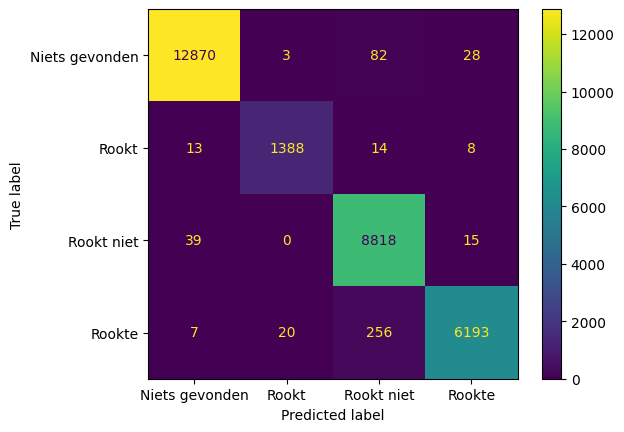

                precision    recall  f1-score   support

Niets gevonden       1.00      0.99      0.99     12983
         Rookt       0.98      0.98      0.98      1423
    Rookt niet       0.96      0.99      0.98      8872
        Rookte       0.99      0.96      0.97      6476

      accuracy                           0.98     29754
     macro avg       0.98      0.98      0.98     29754
  weighted avg       0.98      0.98      0.98     29754



In [10]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

In [11]:
from pickle import dump
dump(random_search, open('best_models/best_smoking_ex1.pkl', 'wb'))